# **Advanced Computer Architectures project**
Nadav Yosef Zada and Chen Kruphman


# Installing and Preparation of the data

In [ ]:
!pip install google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install biopython scikit-learn
!pip install phylopandas
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline
import torch
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
root_notebook_folder = os.path.abspath('.')
ViralSequenceData_folder = '/content/drive/MyDrive/ACA_Project/'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from Bio import SeqIO

folder_path = '/content/drive/MyDrive/ACA_Project/data'
file_list=os.listdir(folder_path)
all_data = []

for file_name in file_list:
  label = os.path.splitext(file_name)[0]  # Use the file name as the label

  with open(f'/content/drive/MyDrive/ACA_Project/data/{label}.fasta') as fasta_file:  # Will close handle cleanly
      identifiers = []
      lengths = []
  #read Sequence from FASTA file
      for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
          identifiers.append(str(seq_record.seq))
          lengths.append(len(seq_record.seq))
  #store sequence in DataFrame
  d = {'Sequence':identifiers,'Len':lengths}
  data= pd.DataFrame(d)
  data['label']=label
  all_data.append(data)

# Concatenate all the individual DataFrame into a single DataFrame
final_data = pd.concat(all_data, ignore_index=True)

In [ ]:
final_data

,Sequence,Len,label
0,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,29819,Beta
1,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,29852,Beta
2,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,29803,Beta
3,GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTG...,29855,Beta
4,CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAA...,29821,Beta
...,...,...,...
17764,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,29836,Zeta
17765,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,29836,Zeta
17766,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,29836,Zeta
17767,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACTTTCGA...,29903,Zeta


In [ ]:
def pad_sequences(sequences, max_length, padding_value):
    padded_sequences = [seq + padding_value * (max_length - len(seq)) for seq in sequences]
    return padded_sequences

In [ ]:
import pandas as pd

sequences = final_data['Sequence']
lengths = final_data['Len']
variants = final_data['label']
max_length = max(lengths)

#print(max_length)
#print(lengths)
sequences=pad_sequences(sequences,max_length,'N')
final_data.Sequence.update(sequences)
final_data = final_data.drop('Len',axis=1) #dropping Len column because after padding it is irrelevant
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17769 entries, 0 to 17768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sequence  17769 non-null  object
 1   label     17769 non-null  object
dtypes: object(2)
memory usage: 277.8+ KB


In [ ]:
# Define the constant number of rows you want to select for each label
rows_per_label = 1181

# Group by 'label' and apply a function to each group to select the desired number of rows
selected_rows = final_data.groupby('label').apply(lambda group: group.sample(n=rows_per_label))

# Reset index of the resulting dataframe
selected_rows = selected_rows.reset_index(drop=True)

print(type(selected_rows))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
final_data = selected_rows
final_data

,Sequence,label
0,AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,Beta
1,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,Beta
2,AACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...,Beta
3,ACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATC...,Beta
4,CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAA...,Beta
...,...,...
5900,TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...,Zeta
5901,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTT...,Zeta
5902,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,Zeta
5903,TTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA...,Zeta


In [ ]:
from sklearn.preprocessing import LabelEncoder

nucleotide_mapping = {'A': 0, 'T': 1, 'C': 2, 'G': 3, 'N': 4,'M':4,'R':4, 'Y':4,'W':4,'S':4,'K':4,'B':4,'D':4,'H':4,'V':4,'F':4}
final_data['Sequence'] = final_data['Sequence'].apply(lambda sequence: [nucleotide_mapping[nucleotide] for nucleotide in sequence])

le = LabelEncoder()
final_data['label'] = le.fit_transform(final_data['label'])

In [ ]:
final_data

,Sequence,label
0,"[0, 0, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 1, 1, ...",0
1,"[0, 3, 0, 1, 2, 1, 3, 1, 1, 2, 1, 2, 1, 0, 0, ...",0
2,"[0, 0, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 1, 1, ...",0
3,"[0, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 1, 1, 3, ...",0
4,"[2, 0, 0, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 1, ...",0
...,...,...
5900,"[1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 3, ...",4
5901,"[0, 3, 0, 1, 2, 1, 3, 1, 1, 2, 1, 2, 1, 0, 0, ...",4
5902,"[0, 1, 1, 0, 0, 0, 3, 3, 1, 1, 1, 0, 1, 0, 2, ...",4
5903,"[1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 3, 3, ...",4


# First model - CNN with 1D convolution layer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DNA_CNN(nn.Module):
    def __init__(self, n_classes, sequence_length):
        super(DNA_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=5, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)

        # calculate size of convolutional output
        conv_output_size = (((sequence_length - 2) // 2) - 2) // 2
        self.fc1 = nn.Linear(in_features=64 * conv_output_size, out_features=128)

        self.fc2 = nn.Linear(in_features=128, out_features=n_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool1d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool1d(x, 2)
        x = x.view(-1, self.fc1.in_features)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(final_data, test_size=0.2)

In [ ]:
train_data

,Sequence,label
4984,"[0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 3, ...",4
2413,"[0, 0, 3, 3, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, ...",2
4394,"[0, 0, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 1, 1, ...",3
1305,"[2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 3, 0, ...",1
4760,"[0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 3, 0, 1, 2, ...",4
...,...,...
4604,"[0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 3, 1, ...",3
470,"[0, 2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 1, 1, 3, ...",0
1765,"[0, 3, 0, 1, 2, 1, 3, 1, 1, 2, 1, 2, 1, 0, 0, ...",1
2023,"[1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 3, 3, 1, 0, 0, ...",1


In [ ]:
test_data

,Sequence,label
1443,"[1, 2, 1, 2, 1, 1, 3, 1, 0, 3, 0, 1, 2, 1, 3, ...",1
3668,"[1, 2, 3, 1, 2, 2, 3, 1, 3, 1, 1, 3, 2, 0, 3, ...",3
1902,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",1
1506,"[0, 3, 0, 1, 2, 1, 3, 1, 1, 2, 1, 2, 1, 0, 0, ...",1
3823,"[0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 3, ...",3
...,...,...
748,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0
941,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0
1803,"[2, 1, 1, 1, 2, 3, 0, 1, 2, 1, 2, 1, 1, 3, 1, ...",1
3077,"[1, 2, 3, 0, 1, 2, 1, 2, 1, 1, 3, 1, 0, 3, 0, ...",2


In [ ]:
import csv

file_name= '/content/drive/MyDrive/ACA_Project/final_data.csv'

final_data.to_csv(file_name, index=False)

file_name= '/content/drive/MyDrive/ACA_Project/final_data_train.csv'

train_data.to_csv(file_name, index=False)

file_name= '/content/drive/MyDrive/ACA_Project/final_data_test.csv'

test_data.to_csv(file_name, index=False)

In [ ]:
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

sequence_length = len(final_data.iloc[0]['Sequence'])
print(sequence_length)
DNA_CNN_Model = DNA_CNN(n_classes=5, sequence_length=sequence_length)

# create an optimizer
optimizer = optim.Adam(DNA_CNN_Model.parameters(), lr=0.001)

# create a learning rate scheduler
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
loss_fn = nn.CrossEntropyLoss()

30255


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd
import ast

class DNADataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sequence = self.data.iloc[idx]['Sequence']
        label = torch.tensor(self.data.iloc[idx]['label'])

        # one-hot encode the sequence
        one_hot_sequence = torch.zeros((5, len(sequence)))
        for i, nucleotide in enumerate(sequence):
            one_hot_sequence[nucleotide, i] = 1

        return one_hot_sequence, label


train_dataset = DNADataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=32)

test_dataset = DNADataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=32)


In [ ]:
import matplotlib.pyplot as plt

def train(model, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0.0
    losses = []
    for batch_idx, (data, target) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        losses.append(loss.item())
        if batch_idx % 10 == 9:
            print('[Epoch: %d, Batch: %5d] loss: %.3f' %
                  (epoch, batch_idx + 1, running_loss / 10))
            running_loss = 0.0
    plt.plot(losses)
    plt.title(f'Loss over time (Epoch {epoch})')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()


In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in tqdm(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

  0%|          | 0/12 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:15, 15.80s/it]
2it [00:26, 12.82s/it]
3it [00:37, 12.20s/it]
4it [00:49, 12.08s/it]
5it [01:01, 11.97s/it]
6it [01:13, 11.81s/it]
7it [01:23, 11.34s/it]
8it [01:36, 11.80s/it]
9it [01:48, 11.83s/it]
10it [02:01, 12.35s/it]

[Epoch: 1, Batch:    10] loss: 8.090



11it [02:13, 12.04s/it]
12it [02:23, 11.44s/it]
13it [02:35, 11.58s/it]
14it [02:46, 11.63s/it]
15it [02:59, 11.81s/it]
16it [03:09, 11.32s/it]
17it [03:20, 11.31s/it]
18it [03:37, 13.17s/it]
19it [03:49, 12.71s/it]
20it [04:01, 12.42s/it]

[Epoch: 1, Batch:    20] loss: 1.452



21it [04:12, 12.15s/it]
22it [04:22, 11.52s/it]
23it [04:34, 11.46s/it]
24it [04:47, 12.02s/it]
25it [05:01, 12.60s/it]
26it [05:13, 12.34s/it]
27it [05:23, 11.74s/it]
28it [05:34, 11.61s/it]
29it [05:46, 11.68s/it]
30it [05:58, 11.69s/it]

[Epoch: 1, Batch:    30] loss: 1.092



31it [06:09, 11.42s/it]
32it [06:20, 11.21s/it]
33it [06:31, 11.41s/it]
34it [06:43, 11.53s/it]
35it [06:54, 11.46s/it]
36it [07:05, 11.06s/it]
37it [07:17, 11.32s/it]
38it [07:28, 11.50s/it]
39it [07:40, 11.55s/it]
40it [07:50, 11.15s/it]

[Epoch: 1, Batch:    40] loss: 0.933



41it [08:02, 11.24s/it]
42it [08:24, 14.55s/it]
43it [08:34, 13.22s/it]
44it [08:46, 12.79s/it]
45it [08:58, 12.49s/it]
46it [09:09, 12.20s/it]
47it [09:19, 11.58s/it]
48it [09:33, 12.14s/it]
49it [09:45, 12.04s/it]
50it [09:56, 11.96s/it]

[Epoch: 1, Batch:    50] loss: 0.766



51it [10:08, 11.72s/it]
52it [10:18, 11.29s/it]
53it [10:30, 11.46s/it]
54it [10:42, 11.56s/it]
55it [10:53, 11.54s/it]
56it [11:03, 11.12s/it]
57it [11:15, 11.27s/it]
58it [11:27, 11.46s/it]
59it [11:38, 11.51s/it]
60it [11:49, 11.20s/it]

[Epoch: 1, Batch:    60] loss: 0.688



61it [12:00, 11.17s/it]
62it [12:12, 11.37s/it]
63it [12:23, 11.48s/it]
64it [12:34, 11.31s/it]
65it [12:45, 11.08s/it]
66it [12:57, 11.30s/it]
67it [13:09, 11.47s/it]
68it [13:20, 11.43s/it]
69it [13:30, 11.04s/it]
70it [13:42, 11.26s/it]

[Epoch: 1, Batch:    70] loss: 0.650



71it [13:54, 11.42s/it]
72it [14:05, 11.48s/it]
73it [14:16, 11.11s/it]
74it [14:27, 11.20s/it]
75it [14:39, 11.38s/it]
76it [14:50, 11.48s/it]
77it [15:08, 13.23s/it]
78it [15:19, 12.55s/it]
79it [15:30, 12.11s/it]
80it [15:42, 12.06s/it]

[Epoch: 1, Batch:    80] loss: 0.433



81it [15:54, 11.99s/it]
82it [16:05, 11.77s/it]
83it [16:15, 11.33s/it]
84it [16:27, 11.51s/it]
85it [16:39, 11.62s/it]
86it [16:51, 11.64s/it]
87it [17:01, 11.26s/it]
88it [17:12, 11.31s/it]
89it [17:24, 11.51s/it]
90it [17:36, 11.61s/it]

[Epoch: 1, Batch:    90] loss: 0.516



91it [17:47, 11.44s/it]
92it [17:58, 11.18s/it]
93it [18:10, 11.41s/it]
94it [18:22, 11.55s/it]
95it [18:33, 11.56s/it]
96it [18:43, 11.15s/it]
97it [18:55, 11.30s/it]
98it [19:07, 11.51s/it]
99it [19:19, 11.61s/it]
100it [19:30, 11.36s/it]

[Epoch: 1, Batch:   100] loss: 0.450



101it [19:41, 11.22s/it]
102it [19:53, 11.43s/it]
103it [20:04, 11.56s/it]
104it [20:16, 11.52s/it]
105it [20:26, 11.11s/it]
106it [20:38, 11.35s/it]
107it [20:50, 11.51s/it]
108it [21:02, 11.58s/it]
109it [21:12, 11.24s/it]
110it [21:23, 11.25s/it]

[Epoch: 1, Batch:   110] loss: 0.480



111it [21:35, 11.46s/it]
112it [21:47, 11.56s/it]
113it [21:58, 11.36s/it]
114it [22:08, 11.14s/it]
115it [22:20, 11.36s/it]
116it [22:32, 11.53s/it]
117it [22:44, 11.52s/it]
118it [22:54, 11.11s/it]
119it [23:06, 11.33s/it]
120it [23:18, 11.52s/it]

[Epoch: 1, Batch:   120] loss: 0.450



121it [23:30, 11.60s/it]
122it [23:40, 11.32s/it]
123it [23:51, 11.22s/it]
124it [24:03, 11.43s/it]
125it [24:15, 11.55s/it]
126it [24:26, 11.44s/it]
127it [24:36, 11.11s/it]
128it [24:48, 11.35s/it]
129it [25:00, 11.53s/it]
130it [25:17, 13.22s/it]

[Epoch: 1, Batch:   130] loss: 0.444



131it [25:32, 13.50s/it]
132it [25:43, 12.94s/it]
133it [25:53, 12.12s/it]
134it [26:05, 12.00s/it]
135it [26:19, 12.46s/it]
136it [26:32, 12.64s/it]
137it [26:44, 12.40s/it]
138it [26:54, 11.90s/it]
139it [27:05, 11.60s/it]
140it [27:18, 12.00s/it]

[Epoch: 1, Batch:   140] loss: 0.320



141it [27:30, 11.99s/it]
142it [27:42, 11.85s/it]
143it [27:52, 11.37s/it]
144it [28:04, 11.46s/it]
145it [28:16, 11.61s/it]
146it [28:27, 11.67s/it]
147it [28:38, 11.41s/it]
148it [28:46, 11.66s/it]


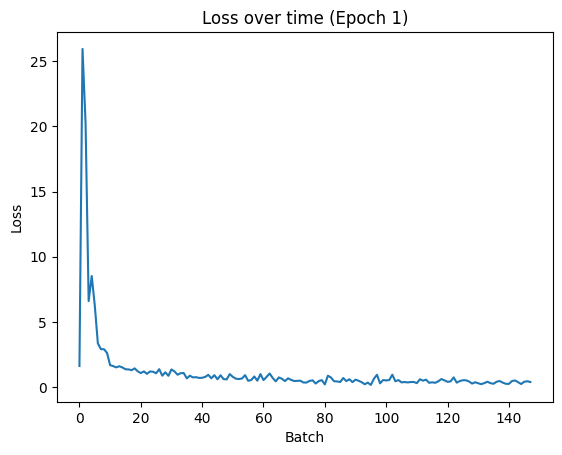

  8%|▊         | 1/12 [28:46<5:16:30, 1726.45s/it]
0it [00:00, ?it/s]
1it [00:11, 11.89s/it]
2it [00:23, 11.58s/it]
3it [00:33, 10.97s/it]
4it [00:45, 11.38s/it]
5it [00:57, 11.58s/it]
6it [01:09, 11.62s/it]
7it [01:19, 11.26s/it]
8it [01:30, 11.27s/it]
9it [01:42, 11.47s/it]
10it [01:54, 11.59s/it]

[Epoch: 2, Batch:    10] loss: 0.333



11it [02:05, 11.43s/it]
12it [02:16, 11.16s/it]
13it [02:28, 11.41s/it]
14it [02:40, 11.57s/it]
15it [02:51, 11.60s/it]
16it [03:02, 11.21s/it]
17it [03:13, 11.31s/it]
18it [03:25, 11.50s/it]
19it [03:37, 11.59s/it]
20it [03:48, 11.37s/it]

[Epoch: 2, Batch:    20] loss: 0.413



21it [03:59, 11.25s/it]
22it [04:11, 11.50s/it]
23it [04:23, 11.64s/it]
24it [04:35, 11.70s/it]
25it [04:45, 11.31s/it]
26it [04:57, 11.34s/it]
27it [05:09, 11.53s/it]
28it [05:20, 11.62s/it]
29it [05:31, 11.43s/it]
30it [05:42, 11.17s/it]

[Epoch: 2, Batch:    30] loss: 0.370



31it [05:54, 11.48s/it]
32it [06:06, 11.63s/it]
33it [06:18, 11.67s/it]
34it [06:28, 11.29s/it]
35it [06:46, 13.25s/it]
36it [06:56, 12.38s/it]
37it [07:08, 12.24s/it]
38it [07:20, 12.16s/it]
39it [07:32, 12.03s/it]
40it [07:43, 11.56s/it]

[Epoch: 2, Batch:    40] loss: 0.423



41it [07:54, 11.49s/it]
42it [08:06, 11.62s/it]
43it [08:18, 11.69s/it]
44it [08:29, 11.59s/it]
45it [08:39, 11.25s/it]
46it [08:51, 11.47s/it]
47it [09:03, 11.61s/it]
48it [09:15, 11.63s/it]
49it [09:25, 11.24s/it]
50it [09:37, 11.30s/it]

[Epoch: 2, Batch:    50] loss: 0.330



51it [09:49, 11.49s/it]
52it [10:01, 11.59s/it]
53it [10:11, 11.37s/it]
54it [10:22, 11.21s/it]
55it [10:34, 11.44s/it]
56it [10:46, 11.61s/it]
57it [10:58, 11.63s/it]
58it [11:08, 11.22s/it]
59it [11:20, 11.37s/it]
60it [11:32, 11.56s/it]

[Epoch: 2, Batch:    60] loss: 0.283



61it [11:44, 11.65s/it]
62it [11:55, 11.43s/it]
63it [12:05, 11.23s/it]
64it [12:17, 11.47s/it]
65it [12:29, 11.64s/it]
66it [12:41, 11.64s/it]
67it [12:51, 11.25s/it]
68it [13:03, 11.37s/it]
69it [13:15, 11.56s/it]
70it [13:27, 11.68s/it]

[Epoch: 2, Batch:    70] loss: 0.295



71it [13:38, 11.47s/it]
72it [13:49, 11.24s/it]
73it [14:01, 11.44s/it]
74it [14:13, 11.60s/it]
75it [14:24, 11.60s/it]
76it [14:34, 11.19s/it]
77it [14:46, 11.35s/it]
78it [14:58, 11.51s/it]
79it [15:10, 11.59s/it]
80it [15:21, 11.36s/it]

[Epoch: 2, Batch:    80] loss: 0.193



81it [15:32, 11.22s/it]
82it [15:44, 11.46s/it]
83it [15:56, 11.62s/it]
84it [16:07, 11.59s/it]
85it [16:17, 11.19s/it]
86it [16:29, 11.37s/it]
87it [16:41, 11.57s/it]
88it [16:53, 11.67s/it]
89it [17:04, 11.41s/it]
90it [17:15, 11.25s/it]

[Epoch: 2, Batch:    90] loss: 0.251



91it [17:27, 11.47s/it]
92it [17:39, 11.60s/it]
93it [17:50, 11.58s/it]
94it [18:00, 11.15s/it]
95it [18:12, 11.33s/it]
96it [18:24, 11.54s/it]
97it [18:36, 11.62s/it]
98it [18:47, 11.40s/it]
99it [18:58, 11.25s/it]
100it [19:10, 11.46s/it]

[Epoch: 2, Batch:   100] loss: 0.346



101it [19:22, 11.61s/it]
102it [19:33, 11.58s/it]
103it [19:43, 11.16s/it]
104it [19:55, 11.39s/it]
105it [20:07, 11.56s/it]
106it [20:19, 11.63s/it]
107it [20:30, 11.34s/it]
108it [20:41, 11.36s/it]
109it [20:53, 11.56s/it]
110it [21:05, 11.67s/it]

[Epoch: 2, Batch:   110] loss: 0.256



111it [21:16, 11.60s/it]
112it [21:27, 11.19s/it]
113it [21:39, 11.39s/it]
114it [21:51, 11.57s/it]
115it [22:02, 11.65s/it]
116it [22:13, 11.34s/it]
117it [22:24, 11.29s/it]
118it [22:36, 11.48s/it]
119it [22:48, 11.61s/it]
120it [22:59, 11.48s/it]

[Epoch: 2, Batch:   120] loss: 0.248



121it [23:10, 11.14s/it]
122it [23:21, 11.38s/it]
123it [23:34, 11.81s/it]
124it [23:46, 11.78s/it]
125it [23:56, 11.40s/it]
126it [24:08, 11.34s/it]
127it [24:20, 11.53s/it]
128it [24:32, 11.63s/it]
129it [24:43, 11.48s/it]
130it [24:53, 11.16s/it]

[Epoch: 2, Batch:   130] loss: 0.222



131it [25:05, 11.37s/it]
132it [25:17, 11.55s/it]
133it [25:29, 11.59s/it]
134it [25:39, 11.32s/it]
135it [25:51, 11.29s/it]
136it [26:02, 11.49s/it]
137it [26:14, 11.62s/it]
138it [26:26, 11.50s/it]
139it [26:36, 11.18s/it]
140it [26:48, 11.39s/it]

[Epoch: 2, Batch:   140] loss: 0.177



141it [27:00, 11.55s/it]
142it [27:12, 11.59s/it]
143it [27:22, 11.24s/it]
144it [27:34, 11.34s/it]
145it [27:49, 12.57s/it]
146it [28:01, 12.34s/it]
147it [28:12, 12.00s/it]
148it [28:19, 11.48s/it]


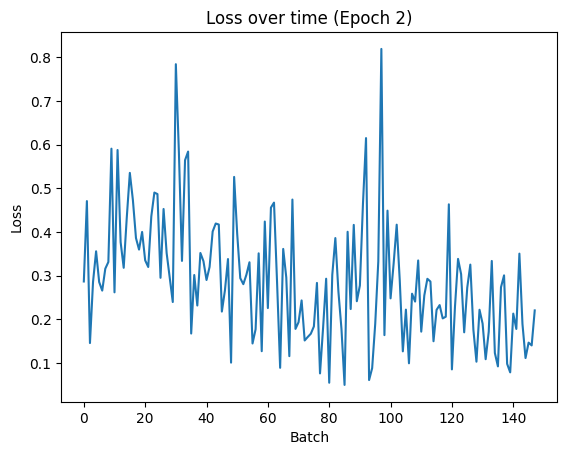

 17%|█▋        | 2/12 [57:06<4:45:07, 1710.77s/it]
0it [00:00, ?it/s]
1it [00:12, 12.01s/it]
2it [00:23, 11.81s/it]
3it [00:34, 11.15s/it]
4it [00:45, 11.27s/it]
5it [00:57, 11.50s/it]
6it [01:09, 11.61s/it]
7it [01:20, 11.37s/it]
8it [01:30, 11.17s/it]
9it [01:42, 11.40s/it]
10it [01:54, 11.56s/it]

[Epoch: 3, Batch:    10] loss: 0.150



11it [02:06, 11.55s/it]
12it [02:16, 11.14s/it]
13it [02:28, 11.40s/it]
14it [02:40, 11.63s/it]
15it [02:52, 11.67s/it]
16it [03:03, 11.48s/it]
17it [03:14, 11.24s/it]
18it [03:25, 11.45s/it]
19it [03:37, 11.61s/it]
20it [03:49, 11.62s/it]

[Epoch: 3, Batch:    20] loss: 0.219



21it [04:00, 11.25s/it]
22it [04:11, 11.34s/it]
23it [04:23, 11.53s/it]
24it [04:35, 11.63s/it]
25it [04:46, 11.46s/it]
26it [04:57, 11.20s/it]
27it [05:09, 11.43s/it]
28it [05:20, 11.58s/it]
29it [05:32, 11.59s/it]
30it [05:42, 11.18s/it]

[Epoch: 3, Batch:    30] loss: 0.205



31it [05:54, 11.33s/it]
32it [06:06, 11.57s/it]
33it [06:18, 11.64s/it]
34it [06:29, 11.42s/it]
35it [06:40, 11.22s/it]
36it [06:52, 11.44s/it]
37it [07:04, 11.62s/it]
38it [07:15, 11.59s/it]
39it [07:25, 11.18s/it]
40it [07:37, 11.36s/it]

[Epoch: 3, Batch:    40] loss: 0.263



41it [07:49, 11.54s/it]
42it [08:01, 11.62s/it]
43it [08:12, 11.35s/it]
44it [08:23, 11.24s/it]
45it [08:35, 11.47s/it]
46it [08:46, 11.59s/it]
47it [08:58, 11.51s/it]
48it [09:08, 11.15s/it]
49it [09:20, 11.39s/it]
50it [09:32, 11.57s/it]

[Epoch: 3, Batch:    50] loss: 0.197



51it [09:44, 11.67s/it]
52it [09:55, 11.36s/it]
53it [10:06, 11.38s/it]
54it [10:18, 11.56s/it]
55it [10:30, 11.69s/it]
56it [10:41, 11.64s/it]
57it [10:52, 11.19s/it]
58it [11:03, 11.38s/it]
59it [11:16, 11.59s/it]
60it [11:27, 11.67s/it]

[Epoch: 3, Batch:    60] loss: 0.169



61it [11:38, 11.40s/it]
62it [11:49, 11.24s/it]
63it [12:01, 11.46s/it]
64it [12:13, 11.67s/it]
65it [12:25, 11.64s/it]
66it [12:35, 11.22s/it]
67it [12:47, 11.43s/it]
68it [12:59, 11.59s/it]
69it [13:11, 11.66s/it]
70it [13:21, 11.40s/it]

[Epoch: 3, Batch:    70] loss: 0.169



71it [13:32, 11.22s/it]
72it [13:44, 11.44s/it]
73it [13:56, 11.59s/it]
74it [14:08, 11.56s/it]
75it [14:18, 11.13s/it]
76it [14:30, 11.33s/it]
77it [14:41, 11.50s/it]
78it [14:53, 11.57s/it]
79it [15:04, 11.29s/it]
80it [15:15, 11.24s/it]

[Epoch: 3, Batch:    80] loss: 0.123



81it [15:27, 11.44s/it]
82it [15:39, 11.55s/it]
83it [15:50, 11.42s/it]
84it [16:00, 11.13s/it]
85it [16:12, 11.37s/it]
86it [16:24, 11.54s/it]
87it [16:36, 11.57s/it]
88it [16:46, 11.21s/it]
89it [16:58, 11.27s/it]
90it [17:09, 11.47s/it]

[Epoch: 3, Batch:    90] loss: 0.165



91it [17:21, 11.56s/it]
92it [17:32, 11.35s/it]
93it [17:43, 11.15s/it]
94it [17:55, 11.39s/it]
95it [18:07, 11.55s/it]
96it [18:18, 11.53s/it]
97it [18:28, 11.11s/it]
98it [18:40, 11.33s/it]
99it [18:52, 11.50s/it]
100it [19:04, 11.58s/it]

[Epoch: 3, Batch:   100] loss: 0.152



101it [19:14, 11.30s/it]
102it [19:26, 11.23s/it]
103it [19:37, 11.44s/it]
104it [19:49, 11.55s/it]
105it [20:00, 11.46s/it]
106it [20:11, 11.12s/it]
107it [20:23, 11.36s/it]
108it [20:35, 11.54s/it]
109it [20:46, 11.58s/it]
110it [20:57, 11.21s/it]

[Epoch: 3, Batch:   110] loss: 0.154



111it [21:08, 11.26s/it]
112it [21:20, 11.46s/it]
113it [21:32, 11.55s/it]
114it [21:43, 11.38s/it]
115it [21:53, 11.14s/it]
116it [22:05, 11.44s/it]
117it [22:17, 11.58s/it]
118it [22:29, 11.61s/it]
119it [22:39, 11.23s/it]
120it [22:51, 11.29s/it]

[Epoch: 3, Batch:   120] loss: 0.131



121it [23:03, 11.49s/it]
122it [23:15, 11.58s/it]
123it [23:25, 11.35s/it]
124it [23:36, 11.17s/it]
125it [23:48, 11.39s/it]
126it [24:00, 11.55s/it]
127it [24:11, 11.54s/it]
128it [24:22, 11.13s/it]
129it [24:33, 11.34s/it]
130it [24:46, 11.58s/it]

[Epoch: 3, Batch:   130] loss: 0.136



131it [24:57, 11.64s/it]
132it [25:08, 11.36s/it]
133it [25:19, 11.26s/it]
134it [25:31, 11.46s/it]
135it [25:43, 11.60s/it]
136it [25:54, 11.55s/it]
137it [26:05, 11.13s/it]
138it [26:16, 11.36s/it]
139it [26:28, 11.52s/it]
140it [26:40, 11.58s/it]

[Epoch: 3, Batch:   140] loss: 0.099



141it [26:51, 11.35s/it]
142it [27:02, 11.25s/it]
143it [27:14, 11.45s/it]
144it [27:26, 11.58s/it]
145it [27:37, 11.49s/it]
146it [27:47, 11.12s/it]
147it [27:59, 11.38s/it]
148it [28:08, 11.41s/it]


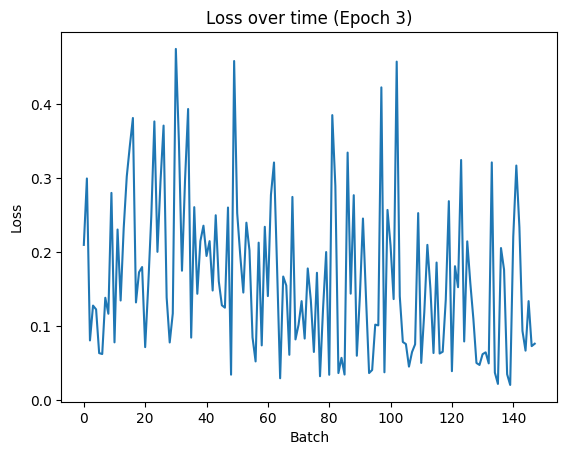

 25%|██▌       | 3/12 [1:25:14<4:15:04, 1700.51s/it]
0it [00:00, ?it/s]
1it [00:10, 10.42s/it]
2it [00:22, 11.18s/it]
3it [00:34, 11.77s/it]
4it [00:46, 11.83s/it]
5it [00:57, 11.63s/it]
6it [01:08, 11.15s/it]
7it [01:19, 11.39s/it]
8it [01:31, 11.56s/it]
9it [01:43, 11.59s/it]
10it [01:53, 11.24s/it]

[Epoch: 4, Batch:    10] loss: 0.103



11it [02:05, 11.28s/it]
12it [02:17, 11.48s/it]
13it [02:28, 11.54s/it]
14it [02:39, 11.38s/it]
15it [02:50, 11.13s/it]
16it [03:04, 12.13s/it]
17it [03:16, 12.05s/it]
18it [03:28, 11.98s/it]
19it [03:40, 11.80s/it]
20it [03:50, 11.52s/it]

[Epoch: 4, Batch:    20] loss: 0.103



21it [04:03, 11.79s/it]
22it [04:15, 11.86s/it]
23it [04:27, 11.83s/it]
24it [04:37, 11.56s/it]
25it [04:48, 11.27s/it]
26it [05:00, 11.47s/it]
27it [05:12, 11.60s/it]
28it [05:23, 11.56s/it]
29it [05:34, 11.13s/it]
30it [05:45, 11.32s/it]

[Epoch: 4, Batch:    30] loss: 0.146



31it [05:57, 11.50s/it]
32it [06:09, 11.56s/it]
33it [06:20, 11.27s/it]
34it [06:31, 11.19s/it]
35it [06:42, 11.39s/it]
36it [06:54, 11.52s/it]
37it [07:05, 11.43s/it]
38it [07:16, 11.09s/it]
39it [07:28, 11.33s/it]
40it [07:40, 11.51s/it]

[Epoch: 4, Batch:    40] loss: 0.206



41it [07:51, 11.54s/it]
42it [08:01, 11.17s/it]
43it [08:16, 12.30s/it]
44it [08:28, 12.18s/it]
45it [08:40, 12.06s/it]
46it [08:51, 11.71s/it]
47it [09:02, 11.40s/it]
48it [09:14, 11.55s/it]
49it [09:25, 11.65s/it]
50it [09:37, 11.61s/it]

[Epoch: 4, Batch:    50] loss: 0.142



51it [09:47, 11.19s/it]
52it [09:59, 11.35s/it]
53it [10:11, 11.52s/it]
54it [10:23, 11.59s/it]
55it [10:33, 11.34s/it]
56it [10:44, 11.19s/it]
57it [10:56, 11.41s/it]
58it [11:08, 11.54s/it]
59it [11:19, 11.47s/it]
60it [11:29, 11.08s/it]

[Epoch: 4, Batch:    60] loss: 0.112



61it [11:41, 11.34s/it]
62it [11:53, 11.51s/it]
63it [12:05, 11.58s/it]
64it [12:15, 11.24s/it]
65it [12:27, 11.24s/it]
66it [12:39, 11.44s/it]
67it [12:50, 11.53s/it]
68it [13:01, 11.39s/it]
69it [13:12, 11.11s/it]
70it [13:24, 11.36s/it]

[Epoch: 4, Batch:    70] loss: 0.117



71it [13:36, 11.53s/it]
72it [13:47, 11.54s/it]
73it [13:58, 11.16s/it]
74it [14:09, 11.29s/it]
75it [14:21, 11.48s/it]
76it [14:33, 11.57s/it]
77it [14:44, 11.31s/it]
78it [14:54, 11.19s/it]
79it [15:06, 11.40s/it]
80it [15:18, 11.54s/it]

[Epoch: 4, Batch:    80] loss: 0.098



81it [15:30, 11.48s/it]
82it [15:40, 11.10s/it]
83it [15:52, 11.35s/it]
84it [16:04, 11.53s/it]
85it [16:15, 11.58s/it]
86it [16:26, 11.21s/it]
87it [16:37, 11.24s/it]
88it [16:49, 11.45s/it]
89it [17:01, 11.56s/it]
90it [17:12, 11.36s/it]

[Epoch: 4, Batch:    90] loss: 0.128



91it [17:22, 11.15s/it]
92it [17:34, 11.39s/it]
93it [17:46, 11.55s/it]
94it [17:58, 11.53s/it]
95it [18:08, 11.14s/it]
96it [18:20, 11.31s/it]
97it [18:32, 11.50s/it]
98it [18:43, 11.56s/it]
99it [18:54, 11.27s/it]
100it [19:05, 11.19s/it]

[Epoch: 4, Batch:   100] loss: 0.159



101it [19:17, 11.40s/it]
102it [19:29, 11.54s/it]
103it [19:40, 11.46s/it]
104it [19:50, 11.10s/it]
105it [20:02, 11.34s/it]
106it [20:14, 11.51s/it]
107it [20:26, 11.56s/it]
108it [20:36, 11.21s/it]
109it [20:47, 11.24s/it]
110it [20:59, 11.44s/it]

[Epoch: 4, Batch:   110] loss: 0.108



111it [21:11, 11.55s/it]
112it [21:22, 11.37s/it]
113it [21:33, 11.15s/it]
114it [21:45, 11.39s/it]
115it [21:56, 11.55s/it]
116it [22:08, 11.57s/it]
117it [22:18, 11.15s/it]
118it [22:30, 11.31s/it]
119it [22:42, 11.48s/it]
120it [22:54, 11.58s/it]

[Epoch: 4, Batch:   120] loss: 0.113



121it [23:04, 11.32s/it]
122it [23:15, 11.18s/it]
123it [23:27, 11.40s/it]
124it [23:39, 11.55s/it]
125it [23:50, 11.47s/it]
126it [24:01, 11.12s/it]
127it [24:13, 11.37s/it]
128it [24:24, 11.53s/it]
129it [24:36, 11.58s/it]
130it [24:47, 11.26s/it]

[Epoch: 4, Batch:   130] loss: 0.089



131it [24:58, 11.24s/it]
132it [25:10, 11.44s/it]
133it [25:22, 11.57s/it]
134it [25:33, 11.44s/it]
135it [25:43, 11.14s/it]
136it [25:55, 11.37s/it]
137it [26:07, 11.55s/it]
138it [26:19, 11.57s/it]
139it [26:29, 11.19s/it]
140it [26:40, 11.27s/it]

[Epoch: 4, Batch:   140] loss: 0.081



141it [26:52, 11.46s/it]
142it [27:04, 11.57s/it]
143it [27:15, 11.33s/it]
144it [27:26, 11.15s/it]
145it [27:38, 11.37s/it]
146it [27:50, 11.54s/it]
147it [28:01, 11.52s/it]
148it [28:08, 11.41s/it]


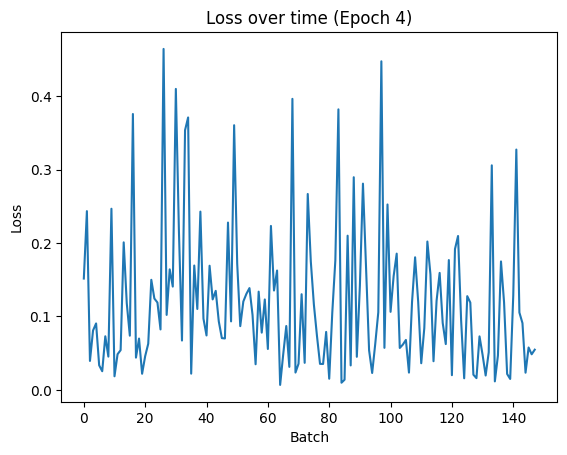

 33%|███▎      | 4/12 [1:53:23<3:46:06, 1695.76s/it]
0it [00:00, ?it/s]
1it [00:15, 15.49s/it]
2it [00:27, 13.30s/it]
3it [00:37, 12.10s/it]
4it [00:48, 11.69s/it]
5it [01:00, 11.77s/it]
6it [01:12, 11.79s/it]
7it [01:23, 11.57s/it]
8it [01:34, 11.17s/it]
9it [01:46, 11.41s/it]
10it [01:58, 11.58s/it]

[Epoch: 5, Batch:    10] loss: 0.101



11it [02:09, 11.61s/it]
12it [02:20, 11.22s/it]
13it [02:31, 11.26s/it]
14it [02:43, 11.46s/it]
15it [02:55, 11.54s/it]
16it [03:05, 11.34s/it]
17it [03:16, 11.15s/it]
18it [03:28, 11.39s/it]
19it [03:40, 11.55s/it]
20it [03:52, 11.56s/it]

[Epoch: 5, Batch:    20] loss: 0.127



21it [04:02, 11.16s/it]
22it [04:13, 11.30s/it]
23it [04:25, 11.50s/it]
24it [04:37, 11.63s/it]
25it [04:48, 11.38s/it]
26it [04:59, 11.21s/it]
27it [05:11, 11.43s/it]
28it [05:23, 11.58s/it]
29it [05:34, 11.52s/it]
30it [05:44, 11.11s/it]

[Epoch: 5, Batch:    30] loss: 0.093



31it [05:56, 11.37s/it]
32it [06:08, 11.54s/it]
33it [06:20, 11.60s/it]
34it [06:31, 11.33s/it]
35it [06:42, 11.26s/it]
36it [06:54, 11.47s/it]
37it [07:06, 11.59s/it]
38it [07:17, 11.55s/it]
39it [07:27, 11.15s/it]
40it [07:39, 11.39s/it]

[Epoch: 5, Batch:    40] loss: 0.150



41it [07:51, 11.56s/it]
42it [08:03, 11.65s/it]
43it [08:14, 11.38s/it]
44it [08:25, 11.27s/it]
45it [08:37, 11.51s/it]
46it [08:49, 11.66s/it]
47it [09:01, 11.64s/it]
48it [09:11, 11.22s/it]
49it [09:23, 11.41s/it]
50it [09:35, 11.60s/it]

[Epoch: 5, Batch:    50] loss: 0.112



51it [09:47, 11.72s/it]
52it [09:58, 11.54s/it]
53it [10:09, 11.29s/it]
54it [10:21, 11.53s/it]
55it [10:33, 11.70s/it]
56it [10:45, 11.78s/it]
57it [10:56, 11.50s/it]
58it [11:07, 11.41s/it]
59it [11:19, 11.63s/it]
60it [11:31, 11.80s/it]

[Epoch: 5, Batch:    60] loss: 0.118



61it [11:43, 11.80s/it]
62it [11:53, 11.44s/it]
63it [12:05, 11.49s/it]
64it [12:17, 11.69s/it]
65it [12:29, 11.82s/it]
66it [12:41, 11.78s/it]
67it [12:51, 11.37s/it]
68it [13:04, 11.57s/it]
69it [13:16, 11.76s/it]
70it [13:28, 11.86s/it]

[Epoch: 5, Batch:    70] loss: 0.100



71it [13:39, 11.75s/it]
72it [13:50, 11.40s/it]
73it [14:02, 11.68s/it]
74it [14:14, 11.85s/it]
75it [14:27, 11.95s/it]
76it [14:38, 11.81s/it]
77it [14:49, 11.47s/it]
78it [15:01, 11.73s/it]
79it [15:13, 11.90s/it]
80it [15:26, 12.00s/it]

[Epoch: 5, Batch:    80] loss: 0.079



81it [15:37, 11.89s/it]
82it [15:48, 11.54s/it]
83it [16:00, 11.75s/it]
84it [16:13, 11.91s/it]
85it [16:25, 12.00s/it]
86it [16:36, 11.90s/it]
87it [16:47, 11.52s/it]
88it [16:59, 11.72s/it]
89it [17:12, 11.90s/it]
90it [17:24, 12.05s/it]

[Epoch: 5, Batch:    90] loss: 0.107



91it [17:36, 12.17s/it]
92it [17:48, 12.01s/it]
93it [18:00, 11.96s/it]
94it [18:13, 12.39s/it]
95it [18:26, 12.53s/it]
96it [18:39, 12.77s/it]
97it [18:52, 12.73s/it]
98it [19:04, 12.57s/it]
99it [19:16, 12.15s/it]
100it [19:28, 12.18s/it]

[Epoch: 5, Batch:   100] loss: 0.117



101it [19:41, 12.43s/it]
102it [19:53, 12.49s/it]
103it [20:09, 13.29s/it]
104it [20:20, 12.79s/it]
105it [20:32, 12.64s/it]
106it [20:46, 12.83s/it]
107it [20:59, 12.87s/it]
108it [21:12, 12.89s/it]
109it [21:24, 12.84s/it]
110it [21:37, 12.67s/it]

[Epoch: 5, Batch:   110] loss: 0.098



111it [21:48, 12.33s/it]
112it [22:01, 12.46s/it]
113it [22:14, 12.67s/it]
114it [22:27, 12.76s/it]
115it [22:40, 12.90s/it]
116it [22:53, 12.93s/it]
117it [23:06, 12.78s/it]
118it [23:17, 12.42s/it]
119it [23:29, 12.32s/it]
120it [23:42, 12.48s/it]

[Epoch: 5, Batch:   120] loss: 0.075



121it [23:55, 12.68s/it]
122it [24:08, 12.74s/it]
123it [24:21, 12.64s/it]
124it [24:32, 12.35s/it]
125it [24:45, 12.34s/it]
126it [24:57, 12.35s/it]
127it [25:10, 12.59s/it]
128it [25:23, 12.75s/it]
129it [25:36, 12.78s/it]
130it [25:49, 12.73s/it]

[Epoch: 5, Batch:   130] loss: 0.062



131it [26:01, 12.51s/it]
132it [26:12, 12.15s/it]
133it [26:25, 12.35s/it]
134it [26:38, 12.64s/it]
135it [26:51, 12.83s/it]
136it [27:04, 12.85s/it]
137it [27:17, 12.81s/it]
138it [27:29, 12.54s/it]
139it [27:41, 12.32s/it]
140it [27:53, 12.30s/it]

[Epoch: 5, Batch:   140] loss: 0.042



141it [28:06, 12.55s/it]
142it [28:19, 12.70s/it]
143it [28:32, 12.85s/it]
144it [28:45, 12.77s/it]
145it [28:58, 12.79s/it]
146it [29:09, 12.40s/it]
147it [29:21, 12.30s/it]
148it [29:31, 11.97s/it]


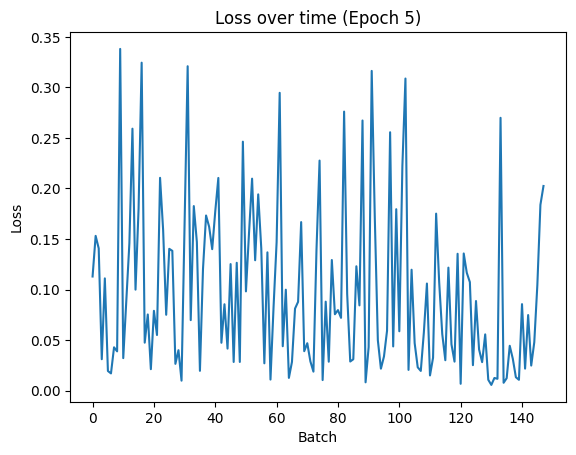

 42%|████▏     | 5/12 [2:22:54<3:21:02, 1723.20s/it]
0it [00:00, ?it/s]
1it [00:12, 12.71s/it]
2it [00:24, 12.26s/it]
3it [00:36, 11.89s/it]
4it [00:48, 12.18s/it]
5it [01:02, 12.64s/it]
6it [01:15, 12.76s/it]
7it [01:28, 12.82s/it]
8it [01:40, 12.82s/it]
9it [01:52, 12.55s/it]
10it [02:04, 12.34s/it]

[Epoch: 6, Batch:    10] loss: 0.070



11it [02:17, 12.46s/it]
12it [02:31, 12.80s/it]
13it [02:43, 12.84s/it]
14it [02:56, 12.83s/it]
15it [03:09, 12.81s/it]
16it [03:22, 12.74s/it]
17it [03:33, 12.30s/it]
18it [03:46, 12.41s/it]
19it [03:59, 12.60s/it]
20it [04:11, 12.67s/it]

[Epoch: 6, Batch:    20] loss: 0.115



21it [04:25, 12.83s/it]
22it [04:38, 12.83s/it]
23it [04:50, 12.74s/it]
24it [05:02, 12.55s/it]
25it [05:14, 12.38s/it]
26it [05:28, 12.82s/it]
27it [05:41, 12.89s/it]
28it [05:54, 13.03s/it]
29it [06:07, 13.00s/it]
30it [06:20, 12.99s/it]

[Epoch: 6, Batch:    30] loss: 0.071



31it [06:33, 12.83s/it]
32it [06:45, 12.55s/it]
33it [06:57, 12.45s/it]
34it [07:10, 12.56s/it]
35it [07:23, 12.80s/it]
36it [07:36, 12.85s/it]
37it [07:49, 12.79s/it]
38it [08:01, 12.62s/it]
39it [08:12, 12.26s/it]
40it [08:25, 12.39s/it]

[Epoch: 6, Batch:    40] loss: 0.175



41it [08:38, 12.57s/it]
42it [08:51, 12.83s/it]
43it [09:05, 13.01s/it]
44it [09:18, 13.05s/it]
45it [09:31, 12.95s/it]
46it [09:42, 12.59s/it]
47it [09:54, 12.32s/it]
48it [10:07, 12.40s/it]
49it [10:20, 12.59s/it]
50it [10:35, 13.38s/it]

[Epoch: 6, Batch:    50] loss: 0.091



51it [10:48, 13.31s/it]
52it [11:01, 13.25s/it]
53it [11:14, 13.03s/it]
54it [11:27, 13.08s/it]
55it [11:38, 12.53s/it]
56it [11:51, 12.48s/it]
57it [12:03, 12.57s/it]
58it [12:16, 12.68s/it]
59it [12:29, 12.72s/it]
60it [12:42, 12.72s/it]

[Epoch: 6, Batch:    60] loss: 0.097



61it [12:53, 12.39s/it]
62it [13:06, 12.29s/it]
63it [13:18, 12.44s/it]
64it [13:31, 12.54s/it]
65it [13:44, 12.66s/it]
66it [13:57, 12.68s/it]
67it [14:09, 12.68s/it]
68it [14:21, 12.44s/it]
69it [14:34, 12.39s/it]
70it [14:46, 12.48s/it]

[Epoch: 6, Batch:    70] loss: 0.099



71it [14:59, 12.60s/it]
72it [15:12, 12.66s/it]
73it [15:25, 12.72s/it]
74it [15:37, 12.56s/it]
75it [15:48, 12.14s/it]
76it [16:01, 12.22s/it]
77it [16:14, 12.55s/it]
78it [16:27, 12.61s/it]
79it [16:39, 12.66s/it]
80it [16:52, 12.61s/it]

[Epoch: 6, Batch:    80] loss: 0.078



81it [17:04, 12.36s/it]
82it [17:15, 12.00s/it]
83it [17:27, 12.14s/it]
84it [17:40, 12.40s/it]
85it [17:53, 12.57s/it]
86it [18:06, 12.58s/it]
87it [18:18, 12.45s/it]
88it [18:29, 12.02s/it]
89it [18:41, 12.06s/it]
90it [18:54, 12.24s/it]

[Epoch: 6, Batch:    90] loss: 0.140



91it [19:07, 12.39s/it]
92it [19:19, 12.43s/it]
93it [19:31, 12.34s/it]
94it [19:42, 11.92s/it]
95it [19:55, 12.08s/it]
96it [20:08, 12.37s/it]
97it [20:20, 12.43s/it]
98it [20:33, 12.44s/it]
99it [20:45, 12.28s/it]
100it [20:56, 11.87s/it]

[Epoch: 6, Batch:   100] loss: 0.077



101it [21:08, 12.03s/it]
102it [21:21, 12.27s/it]
103it [21:33, 12.35s/it]
104it [21:46, 12.41s/it]
105it [21:57, 12.14s/it]
106it [22:09, 11.85s/it]
107it [22:21, 12.18s/it]
108it [22:34, 12.36s/it]
109it [22:47, 12.42s/it]
110it [22:59, 12.40s/it]

[Epoch: 6, Batch:   110] loss: 0.073



111it [23:11, 12.10s/it]
112it [23:22, 11.84s/it]
113it [23:35, 12.23s/it]
114it [23:48, 12.32s/it]
115it [24:00, 12.42s/it]
116it [24:12, 12.37s/it]
117it [24:24, 12.06s/it]
118it [24:35, 11.95s/it]
119it [24:48, 12.11s/it]
120it [25:00, 12.21s/it]

[Epoch: 6, Batch:   120] loss: 0.058



121it [25:13, 12.35s/it]
122it [25:25, 12.27s/it]
123it [25:36, 11.91s/it]
124it [25:48, 11.92s/it]
125it [26:01, 12.11s/it]
126it [26:13, 12.28s/it]
127it [26:26, 12.38s/it]
128it [26:38, 12.24s/it]
129it [26:49, 11.88s/it]
130it [27:01, 11.93s/it]

[Epoch: 6, Batch:   130] loss: 0.059



131it [27:14, 12.10s/it]
132it [27:26, 12.22s/it]
133it [27:39, 12.38s/it]
134it [27:50, 12.11s/it]
135it [28:01, 11.79s/it]
136it [28:14, 11.99s/it]
137it [28:27, 12.27s/it]
138it [28:39, 12.32s/it]
139it [28:52, 12.45s/it]
140it [29:03, 12.10s/it]

[Epoch: 6, Batch:   140] loss: 0.034



141it [29:15, 11.89s/it]
142it [29:27, 12.08s/it]
143it [29:40, 12.21s/it]
144it [29:52, 12.33s/it]
145it [30:04, 12.21s/it]
146it [30:15, 11.84s/it]
147it [30:28, 12.04s/it]
148it [30:37, 12.41s/it]


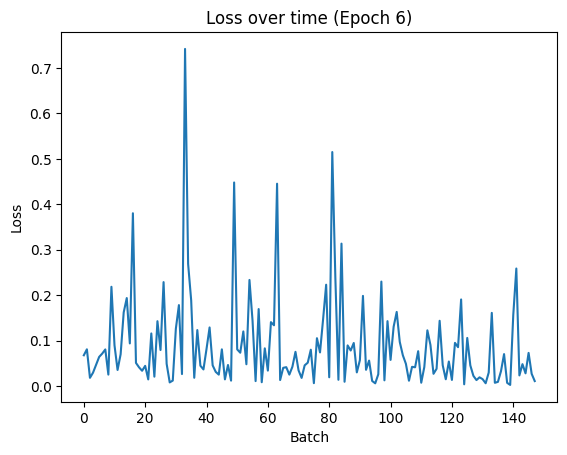

 50%|█████     | 6/12 [2:53:32<2:56:12, 1762.04s/it]
0it [00:00, ?it/s]
1it [00:12, 12.00s/it]
2it [00:22, 11.34s/it]
3it [00:34, 11.58s/it]
4it [00:47, 11.94s/it]
5it [00:59, 12.13s/it]
6it [01:11, 12.18s/it]
7it [01:23, 11.89s/it]
8it [01:34, 11.68s/it]
9it [01:47, 11.97s/it]
10it [01:59, 12.13s/it]

[Epoch: 7, Batch:    10] loss: 0.047



11it [02:12, 12.25s/it]
12it [02:24, 12.17s/it]
13it [02:34, 11.76s/it]
14it [02:47, 11.87s/it]
15it [02:59, 12.05s/it]
16it [03:12, 12.19s/it]
17it [03:24, 12.27s/it]
18it [03:35, 12.01s/it]
19it [03:46, 11.74s/it]
20it [03:59, 11.96s/it]

[Epoch: 7, Batch:    20] loss: 0.154



21it [04:11, 12.10s/it]
22it [04:24, 12.17s/it]
23it [04:38, 12.77s/it]
24it [04:50, 12.53s/it]
25it [05:02, 12.56s/it]
26it [05:15, 12.61s/it]
27it [05:28, 12.68s/it]
28it [05:40, 12.55s/it]
29it [05:52, 12.17s/it]
30it [06:03, 11.92s/it]

[Epoch: 7, Batch:    30] loss: 0.083



31it [06:15, 12.08s/it]
32it [06:28, 12.19s/it]
33it [06:40, 12.24s/it]
34it [06:52, 12.11s/it]
35it [07:03, 11.71s/it]
36it [07:15, 11.86s/it]
37it [07:27, 12.05s/it]
38it [07:40, 12.23s/it]
39it [07:52, 12.21s/it]
40it [08:04, 12.09s/it]

[Epoch: 7, Batch:    40] loss: 0.081



41it [08:15, 11.82s/it]
42it [08:28, 12.13s/it]
43it [08:41, 12.24s/it]
44it [08:53, 12.29s/it]
45it [09:06, 12.35s/it]
46it [09:17, 12.04s/it]
47it [09:28, 11.93s/it]
48it [09:41, 12.08s/it]
49it [09:53, 12.20s/it]
50it [10:06, 12.26s/it]

[Epoch: 7, Batch:    50] loss: 0.069



51it [10:17, 12.06s/it]
52it [10:28, 11.75s/it]
53it [10:41, 11.91s/it]
54it [10:53, 12.07s/it]
55it [11:06, 12.24s/it]
56it [11:18, 12.19s/it]
57it [11:29, 11.85s/it]
58it [11:41, 11.84s/it]
59it [11:53, 12.07s/it]
60it [12:06, 12.20s/it]

[Epoch: 7, Batch:    60] loss: 0.073



61it [12:18, 12.24s/it]
62it [12:30, 12.15s/it]
63it [12:41, 11.82s/it]
64it [12:53, 11.91s/it]
65it [13:07, 12.34s/it]
66it [13:19, 12.41s/it]
67it [13:32, 12.38s/it]
68it [13:43, 12.11s/it]
69it [13:54, 11.81s/it]
70it [14:07, 12.08s/it]

[Epoch: 7, Batch:    70] loss: 0.049



71it [14:19, 12.20s/it]
72it [14:32, 12.25s/it]
73it [14:44, 12.17s/it]
74it [14:54, 11.76s/it]
75it [15:06, 11.81s/it]
76it [15:19, 12.00s/it]
77it [15:32, 12.26s/it]
78it [15:44, 12.27s/it]
79it [15:55, 12.03s/it]
80it [16:07, 11.80s/it]

[Epoch: 7, Batch:    80] loss: 0.058



81it [16:19, 12.02s/it]
82it [16:32, 12.16s/it]
83it [16:44, 12.30s/it]
84it [16:57, 12.30s/it]
85it [17:08, 12.02s/it]
86it [17:20, 11.85s/it]
87it [17:32, 12.04s/it]
88it [17:45, 12.21s/it]
89it [17:57, 12.25s/it]
90it [18:09, 12.14s/it]

[Epoch: 7, Batch:    90] loss: 0.045



91it [18:20, 11.87s/it]
92it [18:32, 12.03s/it]
93it [18:45, 12.17s/it]
94it [18:57, 12.25s/it]
95it [19:10, 12.26s/it]
96it [19:21, 12.00s/it]
97it [19:32, 11.73s/it]
98it [19:45, 12.01s/it]
99it [19:57, 12.16s/it]
100it [20:10, 12.24s/it]

[Epoch: 7, Batch:   100] loss: 0.095



101it [20:22, 12.16s/it]
102it [20:33, 11.77s/it]
103it [20:45, 11.90s/it]
104it [20:57, 12.08s/it]
105it [21:10, 12.22s/it]
106it [21:22, 12.23s/it]
107it [21:34, 11.98s/it]
108it [21:45, 11.77s/it]
109it [21:57, 11.98s/it]
110it [22:10, 12.11s/it]

[Epoch: 7, Batch:   110] loss: 0.060



111it [22:22, 12.18s/it]
112it [22:34, 12.16s/it]
113it [22:45, 11.77s/it]
114it [22:57, 11.87s/it]
115it [23:10, 12.11s/it]
116it [23:22, 12.21s/it]
117it [23:35, 12.36s/it]
118it [23:47, 12.23s/it]
119it [23:58, 12.01s/it]
120it [24:11, 12.11s/it]

[Epoch: 7, Batch:   120] loss: 0.085



121it [24:23, 12.20s/it]
122it [24:36, 12.31s/it]
123it [24:48, 12.32s/it]
124it [25:00, 12.28s/it]
125it [25:12, 12.00s/it]
126it [25:24, 12.14s/it]
127it [25:37, 12.26s/it]
128it [25:49, 12.29s/it]
129it [26:01, 12.24s/it]
130it [26:12, 11.91s/it]

[Epoch: 7, Batch:   130] loss: 0.053



131it [26:24, 11.93s/it]
132it [26:37, 12.29s/it]
133it [26:50, 12.40s/it]
134it [27:02, 12.40s/it]
135it [27:14, 12.25s/it]
136it [27:25, 11.80s/it]
137it [27:37, 11.93s/it]
138it [27:50, 12.11s/it]
139it [28:02, 12.22s/it]
140it [28:14, 12.22s/it]

[Epoch: 7, Batch:   140] loss: 0.072



141it [28:26, 12.00s/it]
142it [28:37, 11.77s/it]
143it [28:50, 11.96s/it]
144it [29:02, 12.15s/it]
145it [29:15, 12.33s/it]
146it [29:27, 12.23s/it]
147it [29:38, 11.93s/it]
148it [29:46, 12.07s/it]


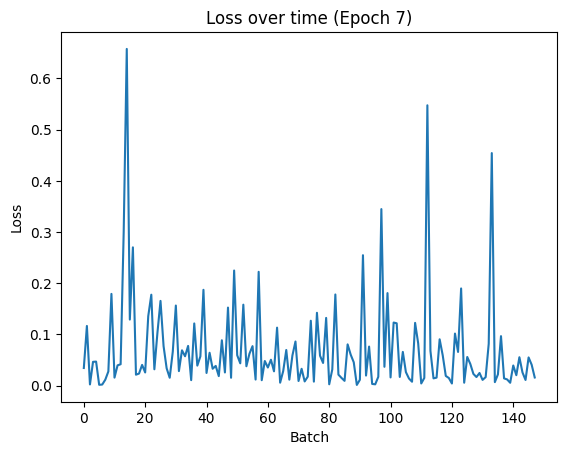

 58%|█████▊    | 7/12 [3:23:19<2:27:31, 1770.26s/it]
0it [00:00, ?it/s]
1it [00:12, 12.38s/it]
2it [00:24, 12.17s/it]
3it [00:35, 11.58s/it]
4it [00:47, 11.68s/it]
5it [00:59, 11.95s/it]
6it [01:12, 12.12s/it]
7it [01:24, 12.18s/it]
8it [01:35, 11.90s/it]
9it [01:46, 11.70s/it]
10it [01:59, 11.93s/it]

[Epoch: 8, Batch:    10] loss: 0.063



11it [02:11, 12.11s/it]
12it [02:24, 12.19s/it]
13it [02:36, 12.14s/it]
14it [02:50, 12.88s/it]
15it [03:01, 12.31s/it]
16it [03:14, 12.34s/it]
17it [03:26, 12.44s/it]
18it [03:39, 12.42s/it]
19it [03:51, 12.30s/it]
20it [04:02, 11.88s/it]

[Epoch: 8, Batch:    20] loss: 0.077



21it [04:13, 11.85s/it]
22it [04:26, 12.03s/it]
23it [04:38, 12.15s/it]
24it [04:51, 12.21s/it]
25it [05:02, 11.94s/it]
26it [05:13, 11.69s/it]
27it [05:26, 11.91s/it]
28it [05:38, 12.07s/it]
29it [05:50, 12.15s/it]
30it [06:02, 12.05s/it]

[Epoch: 8, Batch:    30] loss: 0.055



31it [06:13, 11.65s/it]
32it [06:25, 11.82s/it]
33it [06:38, 12.01s/it]
34it [06:50, 12.13s/it]
35it [07:02, 12.06s/it]
36it [07:13, 11.68s/it]
37it [07:25, 11.87s/it]
38it [07:37, 12.05s/it]
39it [07:50, 12.18s/it]
40it [08:02, 12.21s/it]

[Epoch: 8, Batch:    40] loss: 0.054



41it [08:14, 11.97s/it]
42it [08:25, 11.70s/it]
43it [08:37, 11.92s/it]
44it [08:50, 12.08s/it]
45it [09:02, 12.16s/it]
46it [09:14, 12.05s/it]
47it [09:24, 11.65s/it]
48it [09:37, 11.80s/it]
49it [09:49, 12.00s/it]
50it [10:01, 12.12s/it]

[Epoch: 8, Batch:    50] loss: 0.068



51it [10:13, 12.10s/it]
52it [10:24, 11.75s/it]
53it [10:36, 11.73s/it]
54it [10:49, 11.96s/it]
55it [11:01, 12.11s/it]
56it [11:13, 12.16s/it]
57it [11:25, 11.93s/it]
58it [11:36, 11.68s/it]
59it [11:48, 11.92s/it]
60it [12:01, 12.08s/it]

[Epoch: 8, Batch:    60] loss: 0.064



61it [12:13, 12.16s/it]
62it [12:25, 12.07s/it]
63it [12:36, 11.65s/it]
64it [12:48, 11.80s/it]
65it [13:00, 11.99s/it]
66it [13:13, 12.11s/it]
67it [13:25, 12.08s/it]
68it [13:36, 11.75s/it]
69it [13:47, 11.73s/it]
70it [14:00, 12.01s/it]

[Epoch: 8, Batch:    70] loss: 0.050



71it [14:12, 12.17s/it]
72it [14:25, 12.21s/it]
73it [14:36, 12.01s/it]
74it [14:47, 11.69s/it]
75it [15:00, 11.89s/it]
76it [15:12, 12.06s/it]
77it [15:24, 12.16s/it]
78it [15:37, 12.13s/it]
79it [15:47, 11.74s/it]
80it [15:59, 11.79s/it]

[Epoch: 8, Batch:    80] loss: 0.053



81it [16:12, 11.99s/it]
82it [16:24, 12.12s/it]
83it [16:36, 12.14s/it]
84it [16:47, 11.84s/it]
85it [16:59, 11.72s/it]
86it [17:11, 11.93s/it]
87it [17:24, 12.06s/it]
88it [17:36, 12.14s/it]
89it [17:48, 11.98s/it]
90it [17:59, 11.65s/it]

[Epoch: 8, Batch:    90] loss: 0.038



91it [18:11, 11.86s/it]
92it [18:23, 12.04s/it]
93it [18:36, 12.12s/it]
94it [18:48, 12.05s/it]
95it [18:58, 11.66s/it]
96it [19:10, 11.78s/it]
97it [19:23, 11.97s/it]
98it [19:35, 12.10s/it]
99it [19:47, 12.08s/it]
100it [19:58, 11.75s/it]

[Epoch: 8, Batch:   100] loss: 0.054



101it [20:10, 11.79s/it]
102it [20:23, 12.00s/it]
103it [20:35, 12.12s/it]
104it [20:47, 12.18s/it]
105it [20:59, 11.99s/it]
106it [21:10, 11.67s/it]
107it [21:22, 11.90s/it]
108it [21:35, 12.06s/it]
109it [21:47, 12.15s/it]
110it [21:59, 12.10s/it]

[Epoch: 8, Batch:   110] loss: 0.021



111it [22:10, 11.72s/it]
112it [22:22, 11.80s/it]
113it [22:34, 11.99s/it]
114it [22:47, 12.12s/it]
115it [22:59, 12.15s/it]
116it [23:10, 11.85s/it]
117it [23:21, 11.72s/it]
118it [23:34, 11.94s/it]
119it [23:46, 12.10s/it]
120it [23:59, 12.17s/it]

[Epoch: 8, Batch:   120] loss: 0.037



121it [24:10, 12.02s/it]
122it [24:21, 11.66s/it]
123it [24:33, 11.81s/it]
124it [24:46, 12.00s/it]
125it [24:58, 12.12s/it]
126it [25:10, 12.06s/it]
127it [25:21, 11.71s/it]
128it [25:33, 11.74s/it]
129it [25:45, 11.96s/it]
130it [25:58, 12.12s/it]

[Epoch: 8, Batch:   130] loss: 0.033



131it [26:10, 12.17s/it]
132it [26:21, 11.93s/it]
133it [26:33, 11.68s/it]
134it [26:45, 11.91s/it]
135it [26:57, 12.06s/it]
136it [27:10, 12.13s/it]
137it [27:21, 12.04s/it]
138it [27:32, 11.67s/it]
139it [27:44, 11.82s/it]
140it [27:57, 12.03s/it]

[Epoch: 8, Batch:   140] loss: 0.032



141it [28:09, 12.16s/it]
142it [28:22, 12.13s/it]
143it [28:32, 11.78s/it]
144it [28:44, 11.74s/it]
145it [28:57, 11.97s/it]
146it [29:09, 12.12s/it]
147it [29:21, 12.17s/it]
148it [29:29, 11.95s/it]


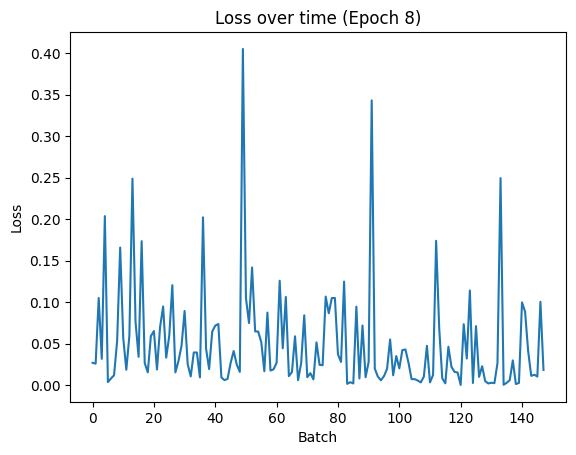

 67%|██████▋   | 8/12 [3:52:48<1:57:59, 1769.99s/it]
0it [00:00, ?it/s]
1it [00:12, 12.48s/it]
2it [00:24, 12.49s/it]
3it [00:37, 12.42s/it]
4it [00:49, 12.18s/it]
5it [00:59, 11.65s/it]
6it [01:12, 11.84s/it]
7it [01:24, 12.05s/it]
8it [01:36, 12.18s/it]
9it [01:49, 12.15s/it]
10it [02:00, 11.79s/it]

[Epoch: 9, Batch:    10] loss: 0.034



11it [02:11, 11.75s/it]
12it [02:24, 11.98s/it]
13it [02:36, 12.13s/it]
14it [02:48, 12.17s/it]
15it [03:00, 12.10s/it]
16it [03:11, 11.71s/it]
17it [03:24, 11.91s/it]
18it [03:36, 12.07s/it]
19it [03:48, 12.18s/it]
20it [04:05, 13.61s/it]

[Epoch: 9, Batch:    20] loss: 0.123



21it [04:18, 13.20s/it]
22it [04:29, 12.68s/it]
23it [04:40, 12.23s/it]
24it [04:53, 12.30s/it]
25it [05:05, 12.33s/it]
26it [05:18, 12.33s/it]
27it [05:29, 12.19s/it]
28it [05:40, 11.75s/it]
29it [05:52, 11.89s/it]
30it [06:05, 12.05s/it]

[Epoch: 9, Batch:    30] loss: 0.040



31it [06:18, 12.35s/it]
32it [06:30, 12.44s/it]
33it [06:42, 12.18s/it]
34it [06:53, 11.83s/it]
35it [07:05, 11.99s/it]
36it [07:18, 12.14s/it]
37it [07:30, 12.22s/it]
38it [07:42, 12.15s/it]
39it [07:53, 11.78s/it]
40it [08:05, 11.81s/it]

[Epoch: 9, Batch:    40] loss: 0.039



41it [08:18, 12.01s/it]
42it [08:30, 12.16s/it]
43it [08:42, 12.20s/it]
44it [08:54, 11.92s/it]
45it [09:05, 11.71s/it]
46it [09:17, 11.94s/it]
47it [09:30, 12.11s/it]
48it [09:42, 12.18s/it]
49it [09:54, 12.10s/it]
50it [10:05, 11.70s/it]

[Epoch: 9, Batch:    50] loss: 0.051



51it [10:17, 11.85s/it]
52it [10:30, 12.28s/it]
53it [10:43, 12.34s/it]
54it [10:55, 12.31s/it]
55it [11:06, 11.98s/it]
56it [11:18, 11.79s/it]
57it [11:30, 11.99s/it]
58it [11:43, 12.13s/it]
59it [11:55, 12.20s/it]
60it [12:07, 12.05s/it]

[Epoch: 9, Batch:    60] loss: 0.030



61it [12:17, 11.68s/it]
62it [12:30, 11.88s/it]
63it [12:42, 12.05s/it]
64it [12:55, 12.15s/it]
65it [13:07, 12.10s/it]
66it [13:17, 11.75s/it]
67it [13:29, 11.76s/it]
68it [13:42, 11.97s/it]
69it [13:54, 12.11s/it]
70it [14:06, 12.16s/it]

[Epoch: 9, Batch:    70] loss: 0.056



71it [14:18, 11.89s/it]
72it [14:29, 11.71s/it]
73it [14:41, 11.93s/it]
74it [14:54, 12.09s/it]
75it [15:06, 12.16s/it]
76it [15:18, 12.08s/it]
77it [15:29, 11.69s/it]
78it [15:41, 11.79s/it]
79it [15:53, 11.99s/it]
80it [16:06, 12.13s/it]

[Epoch: 9, Batch:    80] loss: 0.027



81it [16:18, 12.14s/it]
82it [16:29, 11.83s/it]
83it [16:41, 11.74s/it]
84it [16:53, 11.96s/it]
85it [17:06, 12.12s/it]
86it [17:18, 12.18s/it]
87it [17:30, 12.01s/it]
88it [17:40, 11.68s/it]
89it [17:53, 11.90s/it]
90it [18:05, 12.07s/it]

[Epoch: 9, Batch:    90] loss: 0.070



91it [18:18, 12.19s/it]
92it [18:30, 12.14s/it]
93it [18:41, 11.78s/it]
94it [18:52, 11.77s/it]
95it [19:05, 11.97s/it]
96it [19:17, 12.12s/it]
97it [19:30, 12.18s/it]
98it [19:41, 11.93s/it]
99it [19:52, 11.68s/it]
100it [20:05, 11.92s/it]

[Epoch: 9, Batch:   100] loss: 0.047



101it [20:17, 12.06s/it]
102it [20:29, 12.16s/it]
103it [20:41, 12.04s/it]
104it [20:52, 11.67s/it]
105it [21:04, 11.84s/it]
106it [21:17, 12.03s/it]
107it [21:29, 12.14s/it]
108it [21:41, 12.10s/it]
109it [21:52, 11.75s/it]
110it [22:04, 11.74s/it]

[Epoch: 9, Batch:   110] loss: 0.040



111it [22:16, 11.96s/it]
112it [22:29, 12.12s/it]
113it [22:41, 12.20s/it]
114it [22:53, 11.97s/it]
115it [23:04, 11.69s/it]
116it [23:16, 11.92s/it]
117it [23:29, 12.08s/it]
118it [23:41, 12.16s/it]
119it [23:53, 12.10s/it]
120it [24:04, 11.73s/it]

[Epoch: 9, Batch:   120] loss: 0.026



121it [24:16, 11.80s/it]
122it [24:28, 12.00s/it]
123it [24:41, 12.13s/it]
124it [24:53, 12.16s/it]
125it [25:04, 11.88s/it]
126it [25:15, 11.71s/it]
127it [25:28, 11.95s/it]
128it [25:40, 12.09s/it]
129it [25:53, 12.17s/it]
130it [26:04, 12.04s/it]

[Epoch: 9, Batch:   130] loss: 0.025



131it [26:15, 11.67s/it]
132it [26:27, 11.84s/it]
133it [26:40, 12.03s/it]
134it [26:52, 12.19s/it]
135it [27:05, 12.19s/it]
136it [27:16, 11.89s/it]
137it [27:27, 11.76s/it]
138it [27:40, 11.96s/it]
139it [27:52, 12.12s/it]
140it [28:05, 12.20s/it]

[Epoch: 9, Batch:   140] loss: 0.019



141it [28:16, 12.05s/it]
142it [28:27, 11.70s/it]
143it [28:39, 11.88s/it]
144it [28:55, 12.88s/it]
145it [29:07, 12.76s/it]
146it [29:20, 12.65s/it]
147it [29:32, 12.45s/it]
148it [29:39, 12.02s/it]


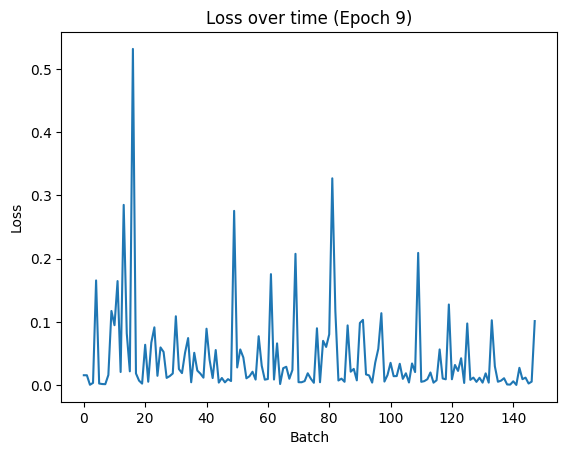

 75%|███████▌  | 9/12 [4:22:28<1:28:38, 1772.98s/it]
0it [00:00, ?it/s]
1it [00:12, 12.47s/it]
2it [00:24, 12.47s/it]
3it [00:37, 12.29s/it]
4it [00:48, 11.83s/it]
5it [00:59, 11.72s/it]
6it [01:12, 11.96s/it]
7it [01:24, 12.13s/it]
8it [01:36, 12.18s/it]
9it [01:48, 11.97s/it]
10it [01:59, 11.67s/it]

[Epoch: 10, Batch:    10] loss: 0.019



11it [02:11, 11.90s/it]
12it [02:24, 12.07s/it]
13it [02:36, 12.15s/it]
14it [02:48, 12.09s/it]
15it [02:59, 11.75s/it]
16it [03:11, 11.82s/it]
17it [03:24, 12.03s/it]
18it [03:36, 12.17s/it]
19it [03:48, 12.21s/it]
20it [04:00, 11.93s/it]

[Epoch: 10, Batch:    20] loss: 0.041



21it [04:11, 11.74s/it]
22it [04:23, 12.00s/it]
23it [04:36, 12.15s/it]
24it [04:48, 12.23s/it]
25it [05:00, 12.12s/it]
26it [05:11, 11.73s/it]
27it [05:23, 11.85s/it]
28it [05:36, 12.04s/it]
29it [05:48, 12.19s/it]
30it [06:00, 12.20s/it]

[Epoch: 10, Batch:    30] loss: 0.025



31it [06:12, 11.89s/it]
32it [06:23, 11.74s/it]
33it [06:35, 11.95s/it]
34it [06:48, 12.13s/it]
35it [07:00, 12.20s/it]
36it [07:12, 12.15s/it]
37it [07:23, 11.74s/it]
38it [07:35, 11.88s/it]
39it [07:48, 12.06s/it]
40it [08:00, 12.18s/it]

[Epoch: 10, Batch:    40] loss: 0.024



41it [08:13, 12.18s/it]
42it [08:24, 11.88s/it]
43it [08:35, 11.77s/it]
44it [08:48, 11.99s/it]
45it [09:00, 12.14s/it]
46it [09:13, 12.20s/it]
47it [09:24, 12.09s/it]
48it [09:35, 11.70s/it]
49it [09:47, 11.86s/it]
50it [10:00, 12.05s/it]

[Epoch: 10, Batch:    50] loss: 0.024



51it [10:12, 12.18s/it]
52it [10:24, 12.15s/it]
53it [10:35, 11.81s/it]
54it [10:47, 11.76s/it]
55it [11:00, 11.98s/it]
56it [11:12, 12.14s/it]
57it [11:24, 12.19s/it]
58it [11:36, 11.99s/it]
59it [11:47, 11.72s/it]
60it [12:00, 11.94s/it]

[Epoch: 10, Batch:    60] loss: 0.042



61it [12:12, 12.11s/it]
62it [12:24, 12.21s/it]
63it [12:36, 12.15s/it]
64it [12:47, 11.77s/it]
65it [12:59, 11.82s/it]
66it [13:12, 12.02s/it]
67it [13:24, 12.18s/it]
68it [13:37, 12.22s/it]
69it [13:48, 11.97s/it]
70it [13:59, 11.78s/it]

[Epoch: 10, Batch:    70] loss: 0.024



71it [14:12, 12.00s/it]
72it [14:25, 12.28s/it]
73it [14:37, 12.32s/it]
74it [14:49, 12.24s/it]
75it [15:00, 11.84s/it]
76it [15:12, 11.85s/it]
77it [15:25, 12.06s/it]
78it [15:37, 12.19s/it]
79it [15:49, 12.23s/it]
80it [16:01, 11.98s/it]

[Epoch: 10, Batch:    80] loss: 0.016



81it [16:12, 11.72s/it]
82it [16:24, 11.97s/it]
83it [16:37, 12.13s/it]
84it [16:49, 12.21s/it]
85it [17:01, 12.16s/it]
86it [17:12, 11.77s/it]
87it [17:24, 11.83s/it]
88it [17:37, 12.03s/it]
89it [17:49, 12.18s/it]
90it [18:02, 12.22s/it]

[Epoch: 10, Batch:    90] loss: 0.023



91it [18:13, 11.96s/it]
92it [18:24, 11.74s/it]
93it [18:37, 11.97s/it]
94it [18:49, 12.13s/it]
95it [19:02, 12.21s/it]
96it [19:14, 12.13s/it]
97it [19:25, 11.83s/it]
98it [19:37, 11.86s/it]
99it [19:49, 12.05s/it]
100it [20:02, 12.18s/it]

[Epoch: 10, Batch:   100] loss: 0.072



101it [20:14, 12.22s/it]
102it [20:25, 11.96s/it]
103it [20:36, 11.73s/it]
104it [20:49, 11.96s/it]
105it [21:01, 12.12s/it]
106it [21:14, 12.20s/it]
107it [21:27, 12.60s/it]
108it [21:38, 12.10s/it]
109it [21:50, 12.04s/it]
110it [22:03, 12.19s/it]

[Epoch: 10, Batch:   110] loss: 0.034



111it [22:15, 12.29s/it]
112it [22:28, 12.30s/it]
113it [22:39, 12.04s/it]
114it [22:50, 11.83s/it]
115it [23:03, 12.03s/it]
116it [23:15, 12.18s/it]
117it [23:28, 12.24s/it]
118it [23:40, 12.17s/it]
119it [23:51, 11.78s/it]
120it [24:03, 11.84s/it]

[Epoch: 10, Batch:   120] loss: 0.022



121it [24:15, 12.04s/it]
122it [24:28, 12.20s/it]
123it [24:40, 12.23s/it]
124it [24:51, 11.99s/it]
125it [25:03, 11.75s/it]
126it [25:15, 11.96s/it]
127it [25:28, 12.13s/it]
128it [25:40, 12.34s/it]
129it [25:52, 12.25s/it]
130it [26:03, 11.88s/it]

[Epoch: 10, Batch:   130] loss: 0.017



131it [26:15, 11.88s/it]
132it [26:28, 12.07s/it]
133it [26:40, 12.20s/it]
134it [26:53, 12.24s/it]
135it [27:04, 12.00s/it]
136it [27:15, 11.74s/it]
137it [27:28, 11.97s/it]
138it [27:40, 12.13s/it]
139it [27:53, 12.23s/it]
140it [28:05, 12.17s/it]

[Epoch: 10, Batch:   140] loss: 0.021



141it [28:16, 11.80s/it]
142it [28:28, 11.84s/it]
143it [28:40, 12.03s/it]
144it [28:53, 12.19s/it]
145it [29:05, 12.22s/it]
146it [29:16, 11.96s/it]
147it [29:28, 11.72s/it]
148it [29:37, 12.01s/it]


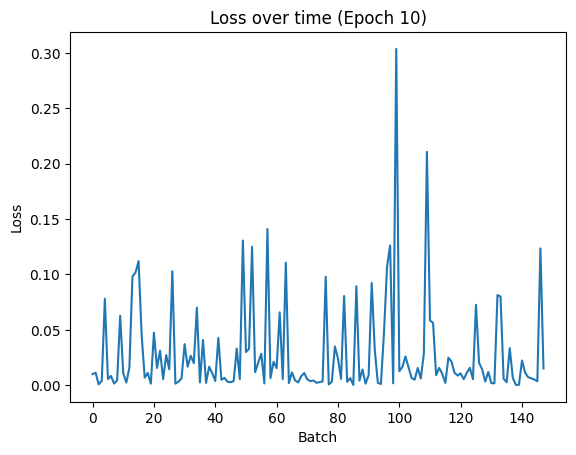

 83%|████████▎ | 10/12 [4:52:05<59:08, 1774.35s/it] 
0it [00:00, ?it/s]
1it [00:12, 12.38s/it]
2it [00:23, 11.91s/it]
3it [00:35, 11.51s/it]
4it [00:49, 12.62s/it]
5it [01:03, 13.01s/it]
6it [01:15, 12.85s/it]
7it [01:28, 12.74s/it]
8it [01:40, 12.57s/it]
9it [01:51, 12.13s/it]
10it [02:02, 11.93s/it]

[Epoch: 11, Batch:    10] loss: 0.055



11it [02:15, 12.10s/it]
12it [02:27, 12.22s/it]
13it [02:40, 12.26s/it]
14it [02:52, 12.13s/it]
15it [03:03, 11.79s/it]
16it [03:15, 11.91s/it]
17it [03:27, 12.08s/it]
18it [03:40, 12.21s/it]
19it [03:52, 12.19s/it]
20it [04:03, 11.92s/it]

[Epoch: 11, Batch:    20] loss: 0.035



21it [04:15, 11.80s/it]
22it [04:27, 12.02s/it]
23it [04:40, 12.15s/it]
24it [04:52, 12.24s/it]
25it [05:04, 12.10s/it]
26it [05:15, 11.73s/it]
27it [05:27, 11.93s/it]
28it [05:40, 12.10s/it]
29it [05:52, 12.22s/it]
30it [06:04, 12.19s/it]

[Epoch: 11, Batch:    30] loss: 0.087



31it [06:15, 11.86s/it]
32it [06:30, 12.71s/it]
33it [06:42, 12.51s/it]
34it [06:55, 12.53s/it]
35it [07:07, 12.54s/it]
36it [07:20, 12.46s/it]
37it [07:31, 12.08s/it]
38it [07:42, 11.86s/it]
39it [07:55, 12.06s/it]
40it [08:07, 12.19s/it]

[Epoch: 11, Batch:    40] loss: 0.038



41it [08:20, 12.25s/it]
42it [08:31, 12.14s/it]
43it [08:42, 11.74s/it]
44it [08:54, 11.89s/it]
45it [09:07, 12.10s/it]
46it [09:20, 12.23s/it]
47it [09:32, 12.25s/it]
48it [09:43, 11.97s/it]
49it [09:54, 11.74s/it]
50it [10:07, 11.97s/it]

[Epoch: 11, Batch:    50] loss: 0.033



51it [10:19, 12.14s/it]
52it [10:32, 12.21s/it]
53it [10:44, 12.12s/it]
54it [10:55, 11.75s/it]
55it [11:07, 11.88s/it]
56it [11:19, 12.08s/it]
57it [11:32, 12.21s/it]
58it [11:44, 12.23s/it]
59it [11:55, 11.96s/it]
60it [12:07, 11.77s/it]

[Epoch: 11, Batch:    60] loss: 0.029



61it [12:19, 12.00s/it]
62it [12:32, 12.16s/it]
63it [12:44, 12.24s/it]
64it [12:56, 12.18s/it]
65it [13:07, 11.80s/it]
66it [13:19, 11.87s/it]
67it [13:32, 12.06s/it]
68it [13:44, 12.19s/it]
69it [13:57, 12.23s/it]
70it [14:08, 11.96s/it]

[Epoch: 11, Batch:    70] loss: 0.025



71it [14:19, 11.74s/it]
72it [14:32, 11.97s/it]
73it [14:44, 12.13s/it]
74it [14:57, 12.22s/it]
75it [15:09, 12.17s/it]
76it [15:20, 11.81s/it]
77it [15:32, 11.86s/it]
78it [15:44, 12.05s/it]
79it [15:57, 12.19s/it]
80it [16:09, 12.23s/it]

[Epoch: 11, Batch:    80] loss: 0.041



81it [16:20, 12.02s/it]
82it [16:32, 11.76s/it]
83it [16:44, 12.02s/it]
84it [16:57, 12.18s/it]
85it [17:09, 12.26s/it]
86it [17:21, 12.18s/it]
87it [17:32, 11.78s/it]
88it [17:44, 11.85s/it]
89it [17:57, 12.05s/it]
90it [18:09, 12.19s/it]

[Epoch: 11, Batch:    90] loss: 0.007



91it [18:21, 12.22s/it]
92it [18:33, 11.96s/it]
93it [18:44, 11.75s/it]
94it [18:57, 12.00s/it]
95it [19:09, 12.17s/it]
96it [19:22, 12.30s/it]
97it [19:34, 12.21s/it]
98it [19:45, 11.83s/it]
99it [19:57, 11.86s/it]
100it [20:09, 12.07s/it]

[Epoch: 11, Batch:   100] loss: 0.017



101it [20:23, 12.50s/it]
102it [20:35, 12.45s/it]
103it [20:47, 12.17s/it]
104it [20:58, 11.86s/it]
105it [21:10, 12.08s/it]
106it [21:23, 12.22s/it]
107it [21:35, 12.30s/it]
108it [21:48, 12.25s/it]
109it [21:59, 11.89s/it]
110it [22:11, 11.94s/it]

[Epoch: 11, Batch:   110] loss: 0.005



111it [22:24, 12.34s/it]
112it [22:37, 12.47s/it]
113it [22:50, 12.65s/it]
114it [23:02, 12.64s/it]
115it [23:14, 12.45s/it]
116it [23:26, 12.14s/it]
117it [23:38, 12.23s/it]
118it [23:51, 12.39s/it]
119it [24:04, 12.56s/it]
120it [24:16, 12.52s/it]

[Epoch: 11, Batch:   120] loss: 0.012



121it [24:28, 12.38s/it]
122it [24:40, 12.06s/it]
123it [24:52, 12.24s/it]
124it [25:06, 12.64s/it]
125it [25:19, 12.90s/it]
126it [25:33, 12.96s/it]
127it [25:46, 12.99s/it]
128it [25:58, 12.80s/it]
129it [26:09, 12.35s/it]
130it [26:22, 12.35s/it]

[Epoch: 11, Batch:   130] loss: 0.011



131it [26:35, 12.52s/it]
132it [26:47, 12.54s/it]
133it [27:00, 12.57s/it]
134it [27:12, 12.55s/it]
135it [27:24, 12.39s/it]
136it [27:36, 12.10s/it]
137it [27:48, 12.25s/it]
138it [28:01, 12.38s/it]
139it [28:14, 12.55s/it]
140it [28:26, 12.51s/it]

[Epoch: 11, Batch:   140] loss: 0.002



141it [28:38, 12.39s/it]
142it [28:49, 11.98s/it]
143it [29:02, 12.18s/it]
144it [29:15, 12.35s/it]
145it [29:28, 12.53s/it]
146it [29:41, 12.61s/it]
147it [29:53, 12.40s/it]
148it [30:00, 12.17s/it]


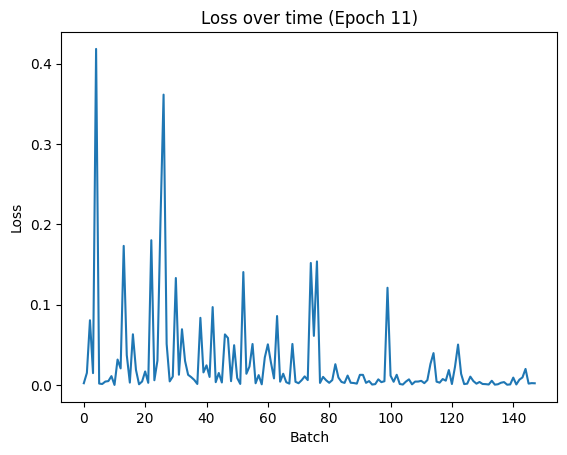

 92%|█████████▏| 11/12 [5:22:07<29:42, 1782.59s/it]
0it [00:00, ?it/s]
1it [00:13, 13.13s/it]
2it [00:26, 12.99s/it]
3it [00:38, 12.86s/it]
4it [00:52, 13.24s/it]
5it [01:05, 13.05s/it]
6it [01:17, 12.89s/it]
7it [01:30, 12.95s/it]
8it [01:43, 12.86s/it]
9it [01:56, 12.73s/it]
10it [02:07, 12.40s/it]

[Epoch: 12, Batch:    10] loss: 0.008



11it [02:19, 12.20s/it]
12it [02:32, 12.36s/it]
13it [02:45, 12.53s/it]
14it [02:58, 12.70s/it]
15it [03:11, 12.79s/it]
16it [03:23, 12.59s/it]
17it [03:34, 12.23s/it]
18it [03:47, 12.27s/it]
19it [04:00, 12.66s/it]
20it [04:13, 12.72s/it]

[Epoch: 12, Batch:    20] loss: 0.015



21it [04:26, 12.85s/it]
22it [04:39, 12.81s/it]
23it [04:51, 12.62s/it]
24it [05:03, 12.30s/it]
25it [05:15, 12.28s/it]
26it [05:28, 12.49s/it]
27it [05:41, 12.65s/it]
28it [05:54, 12.75s/it]
29it [06:06, 12.65s/it]
30it [06:18, 12.37s/it]

[Epoch: 12, Batch:    30] loss: 0.037



31it [06:30, 12.17s/it]
32it [06:43, 12.43s/it]
33it [06:56, 12.65s/it]
34it [07:10, 13.10s/it]
35it [07:23, 13.04s/it]
36it [07:35, 12.88s/it]
37it [07:47, 12.63s/it]
38it [07:59, 12.32s/it]
39it [08:10, 11.95s/it]
40it [08:22, 11.91s/it]

[Epoch: 12, Batch:    40] loss: 0.007



41it [08:35, 12.11s/it]
42it [08:47, 12.23s/it]
43it [09:00, 12.34s/it]
44it [09:13, 12.53s/it]
45it [09:25, 12.53s/it]
46it [09:37, 12.41s/it]
47it [09:49, 12.11s/it]
48it [09:59, 11.70s/it]
49it [10:11, 11.78s/it]
50it [10:24, 11.99s/it]

[Epoch: 12, Batch:    50] loss: 0.006



51it [10:37, 12.31s/it]
52it [10:49, 12.29s/it]
53it [11:01, 12.24s/it]
54it [11:13, 12.14s/it]
55it [11:25, 11.94s/it]
56it [11:36, 11.61s/it]
57it [11:48, 11.77s/it]
58it [12:00, 11.90s/it]
59it [12:12, 11.97s/it]
60it [12:24, 12.00s/it]

[Epoch: 12, Batch:    60] loss: 0.017



61it [12:36, 12.04s/it]
62it [12:48, 12.01s/it]
63it [12:59, 11.70s/it]
64it [13:11, 11.72s/it]
65it [13:23, 11.84s/it]
66it [13:35, 11.99s/it]
67it [13:47, 12.00s/it]
68it [13:59, 11.99s/it]
69it [14:11, 11.91s/it]
70it [14:22, 11.63s/it]

[Epoch: 12, Batch:    70] loss: 0.007



71it [14:33, 11.52s/it]
72it [14:46, 12.01s/it]
73it [14:59, 12.05s/it]
74it [15:11, 12.14s/it]
75it [15:23, 12.19s/it]
76it [15:35, 12.09s/it]
77it [15:46, 11.88s/it]
78it [15:57, 11.55s/it]
79it [16:10, 11.79s/it]
80it [16:22, 11.88s/it]

[Epoch: 12, Batch:    80] loss: 0.019



81it [16:34, 11.96s/it]
82it [16:46, 12.04s/it]
83it [17:07, 14.77s/it]
84it [17:20, 14.15s/it]
85it [17:32, 13.54s/it]
86it [17:44, 13.10s/it]
87it [17:56, 12.79s/it]
88it [18:08, 12.51s/it]
89it [18:19, 12.14s/it]
90it [18:30, 11.77s/it]

[Epoch: 12, Batch:    90] loss: 0.005



91it [18:42, 11.83s/it]
92it [18:54, 11.93s/it]
93it [19:06, 11.99s/it]
94it [19:19, 12.01s/it]
95it [19:30, 11.98s/it]
96it [19:42, 11.78s/it]
97it [19:53, 11.50s/it]
98it [20:05, 11.64s/it]
99it [20:17, 11.81s/it]
100it [20:29, 11.90s/it]

[Epoch: 12, Batch:   100] loss: 0.007



101it [20:41, 11.95s/it]
102it [20:53, 11.94s/it]
103it [21:04, 11.78s/it]
104it [21:15, 11.49s/it]
105it [21:27, 11.64s/it]
106it [21:39, 11.78s/it]
107it [21:51, 11.87s/it]
108it [22:03, 11.94s/it]
109it [22:15, 11.90s/it]
110it [22:26, 11.72s/it]

[Epoch: 12, Batch:   110] loss: 0.003



111it [22:37, 11.46s/it]
112it [22:49, 11.63s/it]
113it [23:02, 11.79s/it]
114it [23:14, 11.88s/it]
115it [23:26, 11.92s/it]
116it [23:37, 11.90s/it]
117it [23:49, 11.70s/it]
118it [24:00, 11.48s/it]
119it [24:12, 11.63s/it]
120it [24:24, 11.76s/it]

[Epoch: 12, Batch:   120] loss: 0.007



121it [24:36, 11.87s/it]
122it [24:48, 11.91s/it]
123it [25:00, 11.89s/it]
124it [25:11, 11.76s/it]
125it [25:22, 11.50s/it]
126it [25:34, 11.64s/it]
127it [25:46, 11.77s/it]
128it [25:58, 11.86s/it]
129it [26:10, 11.89s/it]
130it [26:22, 11.84s/it]

[Epoch: 12, Batch:   130] loss: 0.009



131it [26:33, 11.61s/it]
132it [26:44, 11.45s/it]
133it [26:56, 11.67s/it]
134it [27:09, 11.92s/it]
135it [27:21, 12.04s/it]
136it [27:33, 12.07s/it]
137it [27:45, 12.01s/it]
138it [27:57, 11.86s/it]
139it [28:07, 11.50s/it]
140it [28:19, 11.59s/it]

[Epoch: 12, Batch:   140] loss: 0.002



141it [28:31, 11.74s/it]
142it [28:43, 11.87s/it]
143it [28:55, 11.94s/it]
144it [29:07, 11.93s/it]
145it [29:19, 11.77s/it]
146it [29:29, 11.48s/it]
147it [29:41, 11.60s/it]
148it [29:50, 12.10s/it]


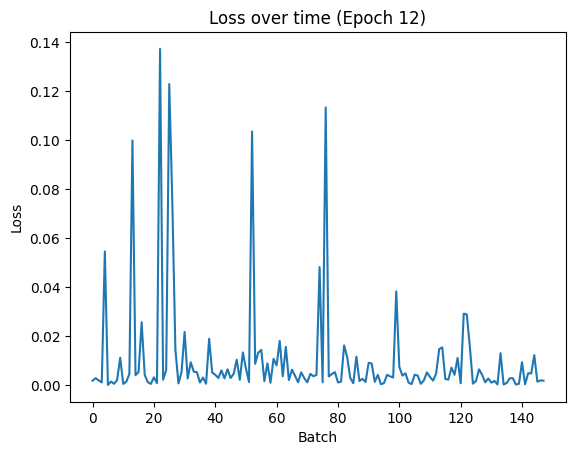

100%|██████████| 12/12 [5:51:57<00:00, 1759.83s/it]


In [ ]:
epochs = 12
save_model = True

for epoch in tqdm(range(1, epochs + 1)):
    train(DNA_CNN_Model, train_loader, optimizer, epoch)
    scheduler.step()

if save_model:
    torch.save(DNA_CNN_Model.state_dict(), "viral_sequence_model.pt")

In [ ]:
test(DNA_CNN_Model, device, test_loader)

100%|██████████| 37/37 [05:45<00:00,  9.33s/it]


Test set: Average loss: 0.0069, Accuracy: 1132/1181 (96%)



In [ ]:
import random

# get all the data from the test loader
data, target = next(iter(test_loader))

# pass the data through the trained model
output = DNA_CNN_Model(data)

# get the predicted labels
pred = output.argmax(dim=1)

# select 10 random indices
indices = random.sample(range(len(data)), 10)

# print the results for each selected sequence
for i in indices:
    # get the index of the sequence in the test_data DataFrame
    index = test_loader.dataset.data.index[i]

    # get the true label from the test_data DataFrame
    true_label = test_data.loc[index, 'label']

    # get the predicted label
    predicted_label = pred[i].item()

    print(f'Index: {index}, True label: {true_label}, Predicted label: {predicted_label}')


Index: 5662, True label: 4, Predicted label: 4
Index: 3823, True label: 3, Predicted label: 3
Index: 636, True label: 0, Predicted label: 0
Index: 360, True label: 0, Predicted label: 0
Index: 5010, True label: 4, Predicted label: 4
Index: 5529, True label: 4, Predicted label: 4
Index: 5237, True label: 4, Predicted label: 4
Index: 1151, True label: 0, Predicted label: 0
Index: 2530, True label: 2, Predicted label: 2
Index: 2515, True label: 2, Predicted label: 2


# Second model - CNN with Embedding layer

In [ ]:
#Assuming you run the first part of preparation of the data, and you have final_data data_frame
class DNASequenceClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv = nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=3)
        self.fc = nn.Linear(num_filters, output_dim)

    def forward(self, x):
        # (batch_size, seq_length) => (batch_size, seq_length, embedding_dim)
        x = self.embedding(x)
        # (batch_size, seq_length, embedding_dim) => (batch_size, embedding_dim, seq_length)
        x = x.transpose(1, 2)
        # (batch_size, embedding_dim, seq_length) => (batch_size, num_filters, L_out)
        x = F.relu(self.conv(x))
        # (batch_size, num_filters, L_out) => (batch_size, num_filters)
        x = F.max_pool1d(x, kernel_size=x.shape[2]).squeeze(2)
        # (batch_size, num_filters) => (batch_size, output_dim)
        x = self.fc(x)
        return x

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
train_data, test_data = train_test_split(final_data, test_size=0.2)

# # preprocess the data
# from sklearn.preprocessing import MinMaxScaler

# # create a MinMaxScaler to scale the nucleotide sequences
# scaler = MinMaxScaler()

# # fit the scaler on the training data
# scaler.fit(np.array(train_data['Sequence'].tolist()))

# # transform the training and test data
# train_data['Sequence'] = scaler.transform(np.array(train_data['Sequence'].tolist())).tolist()
# test_data['Sequence'] = scaler.transform(np.array(test_data['Sequence'].tolist())).tolist()

import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

# set the hyperparameters
vocab_size = len(nucleotide_mapping)+1
embedding_dim = 50 # increased from 10
num_filters = 32 # added a convolutional layer with 32 filters
output_dim = len(le.classes_)
learning_rate = 0.01 # increased from 0.001

model = DNASequenceClassifier(vocab_size, embedding_dim, num_filters, output_dim)

# create an optimizer using the Adagrad algorithm
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

# create a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

#define the loss function
loss_fn = nn.CrossEntropyLoss()

# define a custom DNADataset class for creating PyTorch datasets from the data
class DNADataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = torch.tensor(self.sequences[idx], dtype=torch.long)
        label = torch.tensor(self.labels[idx])
        return sequence, label

# create PyTorch datasets from the training and test data
train_dataset = DNADataset(train_data['Sequence'].tolist(), train_data['label'].tolist())
test_dataset = DNADataset(test_data['Sequence'].tolist(), test_data['label'].tolist())

# create data loaders for batching and shuffling the data during training
train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

import matplotlib.pyplot as plt

# define a function for training the model for one epoch
def train(model, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0.0
    losses = []
    for batch_idx, (data, target) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        losses.append(loss.item())
        if batch_idx % 10 == 9:
            print('[Epoch: %d, Batch: %5d] loss: %.3f' %
                  (epoch + 1 , batch_idx + 1 , running_loss / 10))
            running_loss = 0.0
    plt.plot(losses)
    plt.title(f'Loss over time (Epoch {epoch})')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()

# define a function for evaluating the model on the test data
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data,target in tqdm(test_loader):
            output=model(data)
            test_loss += loss_fn(output,target).item()
            pred=output.argmax(dim=1)
            correct += pred.eq(target).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


  0%|          | 0/20 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:03,  3.02s/it]
2it [00:06,  3.52s/it]
3it [00:09,  3.22s/it]
4it [00:12,  3.00s/it]
5it [00:15,  2.87s/it]
6it [00:17,  2.75s/it]
7it [00:21,  2.97s/it]
8it [00:24,  3.02s/it]
9it [00:26,  2.87s/it]
10it [00:29,  2.78s/it]

[Epoch: 1, Batch:    10] loss: 1.748



11it [00:31,  2.69s/it]
12it [00:35,  2.88s/it]
13it [00:37,  2.88s/it]
14it [00:40,  2.79s/it]
15it [00:43,  2.72s/it]
16it [00:45,  2.66s/it]
17it [00:48,  2.83s/it]
18it [00:51,  2.89s/it]
19it [00:54,  2.78s/it]
20it [00:56,  2.71s/it]

[Epoch: 1, Batch:    20] loss: 1.617



21it [00:59,  2.65s/it]
22it [01:02,  2.80s/it]
23it [01:05,  2.88s/it]
24it [01:08,  2.77s/it]
25it [01:10,  2.70s/it]
26it [01:13,  2.66s/it]
27it [01:16,  2.79s/it]
28it [01:19,  2.90s/it]
29it [01:22,  2.80s/it]
30it [01:24,  2.73s/it]

[Epoch: 1, Batch:    30] loss: 1.627



31it [01:27,  2.67s/it]
32it [01:30,  2.76s/it]
33it [01:33,  2.91s/it]
34it [01:35,  2.80s/it]
35it [01:38,  2.72s/it]
36it [01:40,  2.66s/it]
37it [01:43,  2.75s/it]
38it [01:47,  2.91s/it]
39it [01:49,  2.79s/it]
40it [01:52,  2.71s/it]

[Epoch: 1, Batch:    40] loss: 1.622



41it [01:54,  2.66s/it]
42it [01:57,  2.72s/it]
43it [02:01,  2.91s/it]
44it [02:03,  2.79s/it]
45it [02:06,  2.71s/it]
46it [02:08,  2.66s/it]
47it [02:11,  2.70s/it]
48it [02:14,  2.95s/it]
49it [02:17,  2.83s/it]
50it [02:19,  2.74s/it]

[Epoch: 1, Batch:    50] loss: 1.601



51it [02:22,  2.68s/it]
52it [02:25,  2.82s/it]
53it [02:29,  2.98s/it]
54it [02:31,  2.85s/it]
55it [02:34,  2.77s/it]
56it [02:36,  2.69s/it]
57it [02:39,  2.73s/it]
58it [02:43,  3.01s/it]
59it [02:46,  3.20s/it]
60it [02:49,  3.00s/it]

[Epoch: 1, Batch:    60] loss: 1.595



61it [02:51,  2.86s/it]
62it [02:54,  2.78s/it]
63it [02:57,  2.91s/it]
64it [03:00,  2.92s/it]
65it [03:03,  2.79s/it]
66it [03:05,  2.72s/it]
67it [03:08,  2.65s/it]
68it [03:11,  2.78s/it]
69it [03:14,  2.86s/it]
70it [03:16,  2.78s/it]

[Epoch: 1, Batch:    70] loss: 1.588



71it [03:19,  2.72s/it]
72it [03:21,  2.66s/it]
73it [03:25,  2.79s/it]
74it [03:28,  2.91s/it]
75it [03:30,  2.80s/it]
76it [03:33,  2.72s/it]
77it [03:35,  2.67s/it]
78it [03:38,  2.77s/it]
79it [03:42,  2.89s/it]
80it [03:44,  2.78s/it]

[Epoch: 1, Batch:    80] loss: 1.611



81it [03:47,  2.70s/it]
82it [03:49,  2.65s/it]
83it [03:52,  2.72s/it]
84it [03:55,  2.92s/it]
85it [03:58,  2.80s/it]
86it [04:00,  2.71s/it]
87it [04:03,  2.64s/it]
88it [04:06,  2.69s/it]
89it [04:09,  2.91s/it]
90it [04:12,  2.79s/it]

[Epoch: 1, Batch:    90] loss: 1.594



91it [04:14,  2.71s/it]
92it [04:17,  2.67s/it]
93it [04:19,  2.70s/it]
94it [04:23,  2.98s/it]
95it [04:26,  2.90s/it]
96it [04:28,  2.80s/it]
97it [04:31,  2.72s/it]
98it [04:34,  2.70s/it]
99it [04:37,  2.98s/it]
100it [04:40,  2.87s/it]

[Epoch: 1, Batch:   100] loss: 1.597



101it [04:42,  2.77s/it]
102it [04:45,  2.70s/it]
103it [04:47,  2.66s/it]
104it [04:51,  2.93s/it]
105it [04:54,  2.84s/it]
106it [04:56,  2.74s/it]
107it [04:59,  2.68s/it]
108it [05:01,  2.63s/it]
109it [05:05,  2.89s/it]
110it [05:07,  2.84s/it]

[Epoch: 1, Batch:   110] loss: 1.565



111it [05:10,  2.74s/it]
112it [05:12,  2.68s/it]
113it [05:15,  2.64s/it]
114it [05:19,  2.89s/it]
115it [05:21,  2.87s/it]
116it [05:24,  2.77s/it]
117it [05:27,  2.73s/it]
118it [05:29,  2.68s/it]
119it [05:33,  2.90s/it]
120it [05:35,  2.91s/it]

[Epoch: 1, Batch:   120] loss: 1.594



121it [05:38,  2.79s/it]
122it [05:40,  2.71s/it]
123it [05:43,  2.66s/it]
124it [05:46,  2.84s/it]
125it [05:49,  2.87s/it]
126it [05:52,  2.76s/it]
127it [05:54,  2.68s/it]
128it [05:57,  2.63s/it]
129it [06:00,  2.77s/it]
130it [06:03,  2.85s/it]

[Epoch: 1, Batch:   130] loss: 1.561



131it [06:05,  2.75s/it]
132it [06:08,  2.68s/it]
133it [06:10,  2.64s/it]
134it [06:14,  2.78s/it]
135it [06:17,  2.90s/it]
136it [06:19,  2.78s/it]
137it [06:22,  2.76s/it]
138it [06:25,  2.78s/it]
139it [06:28,  2.95s/it]
140it [06:31,  2.97s/it]

[Epoch: 1, Batch:   140] loss: 1.578



141it [06:34,  2.85s/it]
142it [06:36,  2.77s/it]
143it [06:39,  2.71s/it]
144it [06:42,  2.88s/it]
145it [06:46,  3.03s/it]
146it [06:49,  3.16s/it]
147it [06:52,  2.99s/it]
148it [06:53,  2.80s/it]


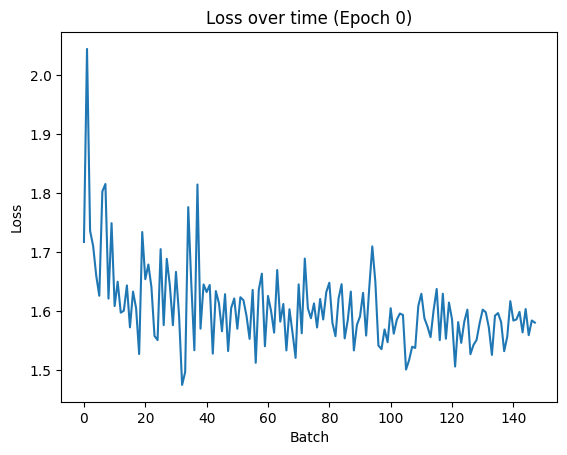

  5%|▌         | 1/20 [06:53<2:11:05, 413.97s/it]
0it [00:00, ?it/s]
1it [00:03,  3.46s/it]
2it [00:06,  3.10s/it]
3it [00:08,  2.84s/it]
4it [00:11,  2.72s/it]
5it [00:13,  2.66s/it]
6it [00:17,  2.87s/it]
7it [00:20,  2.88s/it]
8it [00:22,  2.77s/it]
9it [00:25,  2.69s/it]
10it [00:27,  2.65s/it]

[Epoch: 2, Batch:    10] loss: 1.575



11it [00:31,  2.85s/it]
12it [00:33,  2.88s/it]
13it [00:36,  2.77s/it]
14it [00:39,  2.71s/it]
15it [00:41,  2.66s/it]
16it [00:44,  2.81s/it]
17it [00:47,  2.88s/it]
18it [00:50,  2.78s/it]
19it [00:52,  2.71s/it]
20it [00:55,  2.66s/it]

[Epoch: 2, Batch:    20] loss: 1.539



21it [00:58,  2.82s/it]
22it [01:01,  2.92s/it]
23it [01:04,  2.81s/it]
24it [01:06,  2.72s/it]
25it [01:09,  2.66s/it]
26it [01:12,  2.78s/it]
27it [01:15,  2.92s/it]
28it [01:18,  2.81s/it]
29it [01:20,  2.73s/it]
30it [01:23,  2.68s/it]

[Epoch: 2, Batch:    30] loss: 1.561



31it [01:26,  2.76s/it]
32it [01:29,  2.92s/it]
33it [01:32,  2.89s/it]
34it [01:34,  2.77s/it]
35it [01:37,  2.70s/it]
36it [01:40,  2.78s/it]
37it [01:43,  2.93s/it]
38it [01:46,  2.82s/it]
39it [01:48,  2.73s/it]
40it [01:51,  2.67s/it]

[Epoch: 2, Batch:    40] loss: 1.552



41it [01:54,  2.73s/it]
42it [01:57,  2.90s/it]
43it [02:00,  2.80s/it]
44it [02:02,  2.72s/it]
45it [02:05,  2.66s/it]
46it [02:07,  2.71s/it]
47it [02:11,  2.92s/it]
48it [02:13,  2.81s/it]
49it [02:16,  2.72s/it]
50it [02:18,  2.65s/it]

[Epoch: 2, Batch:    50] loss: 1.543



51it [02:21,  2.68s/it]
52it [02:25,  2.92s/it]
53it [02:27,  2.80s/it]
54it [02:30,  2.73s/it]
55it [02:32,  2.67s/it]
56it [02:35,  2.71s/it]
57it [02:38,  2.93s/it]
58it [02:41,  2.81s/it]
59it [02:44,  2.74s/it]
60it [02:46,  2.67s/it]

[Epoch: 2, Batch:    60] loss: 1.551



61it [02:49,  2.69s/it]
62it [02:52,  2.92s/it]
63it [02:55,  2.81s/it]
64it [02:57,  2.72s/it]
65it [03:00,  2.67s/it]
66it [03:03,  2.70s/it]
67it [03:06,  2.95s/it]
68it [03:09,  2.83s/it]
69it [03:11,  2.74s/it]
70it [03:14,  2.68s/it]

[Epoch: 2, Batch:    70] loss: 1.546



71it [03:16,  2.68s/it]
72it [03:20,  2.95s/it]
73it [03:23,  2.83s/it]
74it [03:25,  2.75s/it]
75it [03:28,  2.69s/it]
76it [03:31,  2.72s/it]
77it [03:34,  3.05s/it]
78it [03:37,  2.92s/it]
79it [03:39,  2.80s/it]
80it [03:42,  2.71s/it]

[Epoch: 2, Batch:    80] loss: 1.574



81it [03:45,  2.70s/it]
82it [03:48,  2.96s/it]
83it [03:51,  2.85s/it]
84it [03:53,  2.76s/it]
85it [03:56,  2.70s/it]
86it [03:58,  2.66s/it]
87it [04:02,  2.94s/it]
88it [04:05,  3.09s/it]
89it [04:08,  3.03s/it]
90it [04:11,  2.87s/it]

[Epoch: 2, Batch:    90] loss: 1.566



91it [04:14,  2.92s/it]
92it [04:17,  3.01s/it]
93it [04:20,  2.87s/it]
94it [04:22,  2.76s/it]
95it [04:25,  2.69s/it]
96it [04:28,  2.76s/it]
97it [04:31,  2.94s/it]
98it [04:34,  2.82s/it]
99it [04:36,  2.74s/it]
100it [04:39,  2.68s/it]

[Epoch: 2, Batch:   100] loss: 1.559



101it [04:41,  2.74s/it]
102it [04:45,  2.92s/it]
103it [04:47,  2.80s/it]
104it [04:50,  2.72s/it]
105it [04:52,  2.65s/it]
106it [04:55,  2.68s/it]
107it [04:59,  2.93s/it]
108it [05:01,  2.82s/it]
109it [05:04,  2.73s/it]
110it [05:06,  2.67s/it]

[Epoch: 2, Batch:   110] loss: 1.527



111it [05:09,  2.70s/it]
112it [05:12,  2.92s/it]
113it [05:15,  2.81s/it]
114it [05:18,  2.74s/it]
115it [05:20,  2.69s/it]
116it [05:23,  2.72s/it]
117it [05:26,  2.95s/it]
118it [05:29,  2.83s/it]
119it [05:32,  2.83s/it]
120it [05:34,  2.74s/it]

[Epoch: 2, Batch:   120] loss: 1.568



121it [05:37,  2.78s/it]
122it [05:41,  2.96s/it]
123it [05:43,  2.83s/it]
124it [05:46,  2.74s/it]
125it [05:48,  2.68s/it]
126it [05:51,  2.70s/it]
127it [05:54,  2.94s/it]
128it [05:57,  2.82s/it]
129it [05:59,  2.73s/it]
130it [06:02,  2.68s/it]

[Epoch: 2, Batch:   130] loss: 1.530



131it [06:05,  2.70s/it]
132it [06:08,  2.93s/it]
133it [06:11,  2.81s/it]
134it [06:13,  2.72s/it]
135it [06:16,  2.67s/it]
136it [06:19,  2.68s/it]
137it [06:22,  2.93s/it]
138it [06:25,  2.82s/it]
139it [06:27,  2.74s/it]
140it [06:30,  2.67s/it]

[Epoch: 2, Batch:   140] loss: 1.552



141it [06:32,  2.70s/it]
142it [06:36,  2.95s/it]
143it [06:39,  2.82s/it]
144it [06:41,  2.73s/it]
145it [06:44,  2.67s/it]
146it [06:46,  2.70s/it]
147it [06:50,  2.92s/it]
148it [06:51,  2.78s/it]


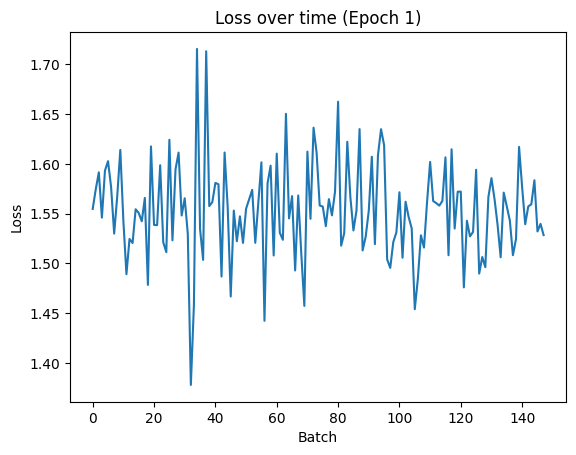

 10%|█         | 2/20 [13:46<2:04:00, 413.38s/it]
0it [00:00, ?it/s]
1it [00:02,  2.52s/it]
2it [00:05,  2.51s/it]
3it [00:07,  2.62s/it]
4it [00:11,  2.95s/it]
5it [00:13,  2.80s/it]
6it [00:16,  2.71s/it]
7it [00:18,  2.65s/it]
8it [00:21,  2.67s/it]
9it [00:25,  2.94s/it]
10it [00:27,  2.80s/it]

[Epoch: 3, Batch:    10] loss: 1.554



11it [00:30,  2.73s/it]
12it [00:32,  2.67s/it]
13it [00:35,  2.68s/it]
14it [00:39,  3.00s/it]
15it [00:41,  2.92s/it]
16it [00:44,  2.81s/it]
17it [00:46,  2.72s/it]
18it [00:49,  2.68s/it]
19it [00:53,  2.94s/it]
20it [00:55,  2.89s/it]

[Epoch: 3, Batch:    20] loss: 1.514



21it [00:58,  2.79s/it]
22it [01:00,  2.70s/it]
23it [01:03,  2.66s/it]
24it [01:06,  2.89s/it]
25it [01:09,  2.88s/it]
26it [01:12,  2.78s/it]
27it [01:14,  2.73s/it]
28it [01:17,  2.67s/it]
29it [01:20,  2.88s/it]
30it [01:23,  2.88s/it]

[Epoch: 3, Batch:    30] loss: 1.545



31it [01:26,  2.77s/it]
32it [01:28,  2.70s/it]
33it [01:31,  2.66s/it]
34it [01:34,  2.84s/it]
35it [01:37,  2.87s/it]
36it [01:40,  2.78s/it]
37it [01:42,  2.71s/it]
38it [01:45,  2.67s/it]
39it [01:48,  2.81s/it]
40it [01:51,  2.87s/it]

[Epoch: 3, Batch:    40] loss: 1.525



41it [01:53,  2.78s/it]
42it [01:56,  2.70s/it]
43it [01:58,  2.64s/it]
44it [02:01,  2.78s/it]
45it [02:05,  2.88s/it]
46it [02:07,  2.78s/it]
47it [02:10,  2.69s/it]
48it [02:12,  2.65s/it]
49it [02:15,  2.80s/it]
50it [02:19,  2.92s/it]

[Epoch: 3, Batch:    50] loss: 1.517



51it [02:21,  2.79s/it]
52it [02:24,  2.72s/it]
53it [02:26,  2.67s/it]
54it [02:30,  2.95s/it]
55it [02:34,  3.21s/it]
56it [02:36,  3.08s/it]
57it [02:39,  2.93s/it]
58it [02:41,  2.82s/it]
59it [02:44,  2.75s/it]
60it [02:48,  2.97s/it]

[Epoch: 3, Batch:    60] loss: 1.531



61it [02:50,  2.91s/it]
62it [02:53,  2.81s/it]
63it [02:55,  2.72s/it]
64it [02:58,  2.66s/it]
65it [03:01,  2.84s/it]
66it [03:04,  2.85s/it]
67it [03:07,  2.76s/it]
68it [03:09,  2.69s/it]
69it [03:12,  2.64s/it]
70it [03:15,  2.82s/it]

[Epoch: 3, Batch:    70] loss: 1.527



71it [03:18,  2.86s/it]
72it [03:20,  2.78s/it]
73it [03:23,  2.70s/it]
74it [03:25,  2.65s/it]
75it [03:29,  2.81s/it]
76it [03:32,  2.87s/it]
77it [03:34,  2.77s/it]
78it [03:37,  2.71s/it]
79it [03:39,  2.67s/it]
80it [03:43,  2.83s/it]

[Epoch: 3, Batch:    80] loss: 1.559



81it [03:46,  2.95s/it]
82it [03:48,  2.83s/it]
83it [03:51,  2.74s/it]
84it [03:53,  2.69s/it]
85it [03:57,  2.83s/it]
86it [04:00,  2.93s/it]
87it [04:02,  2.81s/it]
88it [04:05,  2.72s/it]
89it [04:07,  2.67s/it]
90it [04:10,  2.75s/it]

[Epoch: 3, Batch:    90] loss: 1.551



91it [04:13,  2.90s/it]
92it [04:16,  2.81s/it]
93it [04:19,  2.73s/it]
94it [04:21,  2.66s/it]
95it [04:24,  2.74s/it]
96it [04:27,  2.87s/it]
97it [04:30,  2.78s/it]
98it [04:32,  2.71s/it]
99it [04:35,  2.65s/it]
100it [04:38,  2.74s/it]

[Epoch: 3, Batch:   100] loss: 1.541



101it [04:41,  3.01s/it]
102it [04:44,  2.87s/it]
103it [04:47,  2.78s/it]
104it [04:49,  2.70s/it]
105it [04:52,  2.71s/it]
106it [04:55,  2.94s/it]
107it [04:58,  2.82s/it]
108it [05:00,  2.73s/it]
109it [05:03,  2.67s/it]
110it [05:06,  2.67s/it]

[Epoch: 3, Batch:   110] loss: 1.510



111it [05:09,  2.94s/it]
112it [05:12,  2.82s/it]
113it [05:14,  2.74s/it]
114it [05:17,  2.68s/it]
115it [05:19,  2.68s/it]
116it [05:23,  2.94s/it]
117it [05:26,  2.82s/it]
118it [05:28,  2.74s/it]
119it [05:31,  2.68s/it]
120it [05:33,  2.67s/it]

[Epoch: 3, Batch:   120] loss: 1.555



121it [05:37,  2.94s/it]
122it [05:39,  2.84s/it]
123it [05:42,  2.76s/it]
124it [05:45,  2.69s/it]
125it [05:47,  2.67s/it]
126it [05:51,  2.93s/it]
127it [05:53,  2.85s/it]
128it [05:56,  2.75s/it]
129it [05:58,  2.69s/it]
130it [06:01,  2.64s/it]

[Epoch: 3, Batch:   130] loss: 1.516



131it [06:04,  2.89s/it]
132it [06:07,  2.82s/it]
133it [06:10,  2.73s/it]
134it [06:12,  2.68s/it]
135it [06:15,  2.64s/it]
136it [06:18,  2.89s/it]
137it [06:21,  2.85s/it]
138it [06:23,  2.76s/it]
139it [06:26,  2.69s/it]
140it [06:29,  2.65s/it]

[Epoch: 3, Batch:   140] loss: 1.536



141it [06:32,  2.91s/it]
142it [06:35,  2.90s/it]
143it [06:37,  2.79s/it]
144it [06:40,  2.72s/it]
145it [06:43,  2.69s/it]
146it [06:47,  3.06s/it]
147it [06:51,  3.36s/it]
148it [06:53,  2.79s/it]


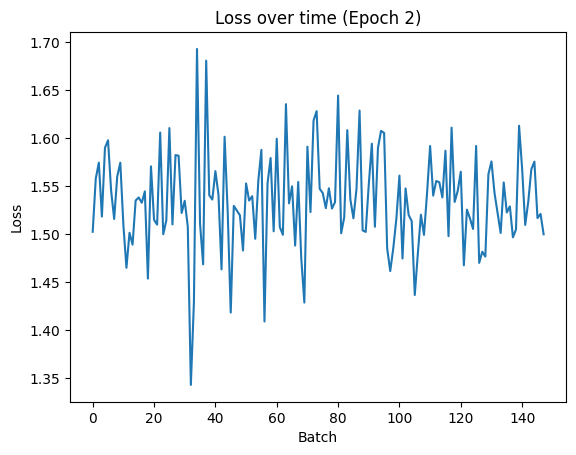

 15%|█▌        | 3/20 [20:40<1:57:07, 413.39s/it]
0it [00:00, ?it/s]
1it [00:02,  2.54s/it]
2it [00:05,  2.53s/it]
3it [00:07,  2.54s/it]
4it [00:10,  2.81s/it]
5it [00:13,  2.87s/it]
6it [00:16,  2.75s/it]
7it [00:18,  2.67s/it]
8it [00:21,  2.65s/it]
9it [00:24,  2.80s/it]
10it [00:27,  2.87s/it]

[Epoch: 4, Batch:    10] loss: 1.541



11it [00:30,  2.80s/it]
12it [00:32,  2.72s/it]
13it [00:35,  2.66s/it]
14it [00:38,  2.81s/it]
15it [00:41,  2.91s/it]
16it [00:44,  2.80s/it]
17it [00:46,  2.75s/it]
18it [00:49,  2.73s/it]
19it [00:52,  2.89s/it]
20it [00:55,  2.95s/it]

[Epoch: 4, Batch:    20] loss: 1.501



21it [00:58,  2.85s/it]
22it [01:01,  2.78s/it]
23it [01:03,  2.72s/it]
24it [01:06,  2.88s/it]
25it [01:09,  2.92s/it]
26it [01:12,  2.82s/it]
27it [01:15,  2.75s/it]
28it [01:17,  2.69s/it]
29it [01:20,  2.84s/it]
30it [01:23,  2.91s/it]

[Epoch: 4, Batch:    30] loss: 1.533



31it [01:26,  2.82s/it]
32it [01:29,  2.74s/it]
33it [01:31,  2.69s/it]
34it [01:34,  2.81s/it]
35it [01:37,  2.89s/it]
36it [01:40,  2.77s/it]
37it [01:42,  2.71s/it]
38it [01:45,  2.65s/it]
39it [01:48,  2.78s/it]
40it [01:51,  2.90s/it]

[Epoch: 4, Batch:    40] loss: 1.507



41it [01:54,  2.86s/it]
42it [01:56,  2.77s/it]
43it [01:59,  2.70s/it]
44it [02:02,  2.84s/it]
45it [02:05,  2.96s/it]
46it [02:08,  2.83s/it]
47it [02:10,  2.74s/it]
48it [02:13,  2.69s/it]
49it [02:16,  2.81s/it]
50it [02:19,  2.95s/it]

[Epoch: 4, Batch:    50] loss: 1.502



51it [02:22,  2.83s/it]
52it [02:25,  2.75s/it]
53it [02:27,  2.70s/it]
54it [02:30,  2.80s/it]
55it [02:33,  2.93s/it]
56it [02:36,  2.81s/it]
57it [02:38,  2.73s/it]
58it [02:41,  2.67s/it]
59it [02:44,  2.75s/it]
60it [02:47,  2.91s/it]

[Epoch: 4, Batch:    60] loss: 1.519



61it [02:50,  2.80s/it]
62it [02:52,  2.71s/it]
63it [02:55,  2.67s/it]
64it [02:58,  2.73s/it]
65it [03:01,  2.92s/it]
66it [03:04,  2.81s/it]
67it [03:06,  2.73s/it]
68it [03:09,  2.66s/it]
69it [03:11,  2.70s/it]
70it [03:15,  2.93s/it]

[Epoch: 4, Batch:    70] loss: 1.515



71it [03:17,  2.81s/it]
72it [03:20,  2.73s/it]
73it [03:22,  2.66s/it]
74it [03:25,  2.68s/it]
75it [03:29,  2.93s/it]
76it [03:31,  2.82s/it]
77it [03:34,  2.73s/it]
78it [03:36,  2.67s/it]
79it [03:39,  2.70s/it]
80it [03:43,  2.93s/it]

[Epoch: 4, Batch:    80] loss: 1.550



81it [03:45,  2.82s/it]
82it [03:48,  2.75s/it]
83it [03:50,  2.70s/it]
84it [03:53,  2.73s/it]
85it [03:57,  3.06s/it]
86it [04:00,  2.93s/it]
87it [04:02,  2.83s/it]
88it [04:05,  2.73s/it]
89it [04:07,  2.71s/it]
90it [04:11,  3.03s/it]

[Epoch: 4, Batch:    90] loss: 1.541



91it [04:15,  3.24s/it]
92it [04:17,  3.03s/it]
93it [04:20,  2.87s/it]
94it [04:22,  2.76s/it]
95it [04:25,  2.76s/it]
96it [04:29,  2.97s/it]
97it [04:31,  2.85s/it]
98it [04:34,  2.75s/it]
99it [04:36,  2.68s/it]
100it [04:39,  2.71s/it]

[Epoch: 4, Batch:   100] loss: 1.529



101it [04:42,  2.94s/it]
102it [04:45,  2.83s/it]
103it [04:48,  2.76s/it]
104it [04:50,  2.70s/it]
105it [04:53,  2.72s/it]
106it [04:56,  2.94s/it]
107it [04:59,  2.83s/it]
108it [05:02,  2.76s/it]
109it [05:04,  2.69s/it]
110it [05:07,  2.74s/it]

[Epoch: 4, Batch:   110] loss: 1.500



111it [05:10,  2.93s/it]
112it [05:13,  2.81s/it]
113it [05:15,  2.73s/it]
114it [05:18,  2.66s/it]
115it [05:21,  2.71s/it]
116it [05:24,  2.94s/it]
117it [05:27,  2.82s/it]
118it [05:29,  2.73s/it]
119it [05:32,  2.70s/it]
120it [05:35,  2.71s/it]

[Epoch: 4, Batch:   120] loss: 1.546



121it [05:38,  2.93s/it]
122it [05:41,  2.82s/it]
123it [05:43,  2.74s/it]
124it [05:46,  2.67s/it]
125it [05:48,  2.70s/it]
126it [05:52,  2.94s/it]
127it [05:54,  2.82s/it]
128it [05:57,  2.74s/it]
129it [06:00,  2.67s/it]
130it [06:02,  2.72s/it]

[Epoch: 4, Batch:   130] loss: 1.507



131it [06:06,  2.95s/it]
132it [06:08,  2.83s/it]
133it [06:11,  2.73s/it]
134it [06:13,  2.68s/it]
135it [06:16,  2.69s/it]
136it [06:20,  2.93s/it]
137it [06:22,  2.81s/it]
138it [06:25,  2.73s/it]
139it [06:27,  2.68s/it]
140it [06:30,  2.70s/it]

[Epoch: 4, Batch:   140] loss: 1.525



141it [06:34,  2.95s/it]
142it [06:36,  2.82s/it]
143it [06:39,  2.74s/it]
144it [06:41,  2.67s/it]
145it [06:44,  2.69s/it]
146it [06:47,  2.95s/it]
147it [06:50,  2.83s/it]
148it [06:52,  2.78s/it]


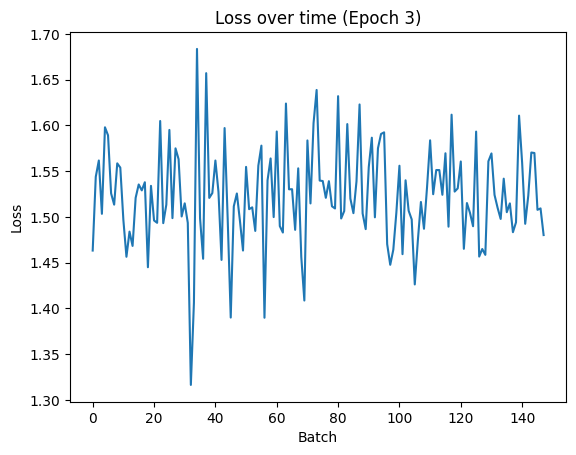

 20%|██        | 4/20 [27:32<1:50:07, 412.98s/it]
0it [00:00, ?it/s]
1it [00:02,  2.57s/it]
2it [00:05,  2.57s/it]
3it [00:08,  2.98s/it]
4it [00:11,  2.95s/it]
5it [00:14,  2.81s/it]
6it [00:16,  2.70s/it]
7it [00:19,  2.65s/it]
8it [00:22,  2.88s/it]
9it [00:25,  2.88s/it]
10it [00:27,  2.77s/it]

[Epoch: 5, Batch:    10] loss: 1.533



11it [00:30,  2.70s/it]
12it [00:32,  2.66s/it]
13it [00:36,  2.85s/it]
14it [00:39,  2.89s/it]
15it [00:41,  2.80s/it]
16it [00:44,  2.72s/it]
17it [00:46,  2.67s/it]
18it [00:50,  2.85s/it]
19it [00:53,  2.92s/it]
20it [00:55,  2.81s/it]

[Epoch: 5, Batch:    20] loss: 1.490



21it [00:58,  2.74s/it]
22it [01:00,  2.68s/it]
23it [01:04,  2.85s/it]
24it [01:07,  2.98s/it]
25it [01:10,  2.85s/it]
26it [01:12,  2.76s/it]
27it [01:15,  2.70s/it]
28it [01:18,  2.82s/it]
29it [01:21,  2.94s/it]
30it [01:24,  2.82s/it]

[Epoch: 5, Batch:    30] loss: 1.525



31it [01:26,  2.74s/it]
32it [01:29,  2.70s/it]
33it [01:32,  3.00s/it]
34it [01:36,  3.23s/it]
35it [01:39,  3.04s/it]
36it [01:41,  2.90s/it]
37it [01:44,  2.80s/it]
38it [01:47,  2.75s/it]
39it [01:50,  3.01s/it]
40it [01:53,  2.90s/it]

[Epoch: 5, Batch:    40] loss: 1.496



41it [01:55,  2.80s/it]
42it [01:58,  2.73s/it]
43it [02:01,  2.71s/it]
44it [02:04,  2.98s/it]
45it [02:07,  2.88s/it]
46it [02:09,  2.80s/it]
47it [02:12,  2.74s/it]
48it [02:15,  2.74s/it]
49it [02:18,  2.99s/it]
50it [02:21,  2.86s/it]

[Epoch: 5, Batch:    50] loss: 1.491



51it [02:23,  2.76s/it]
52it [02:26,  2.70s/it]
53it [02:29,  2.71s/it]
54it [02:32,  2.96s/it]
55it [02:35,  2.83s/it]
56it [02:37,  2.74s/it]
57it [02:40,  2.69s/it]
58it [02:43,  2.70s/it]
59it [02:46,  2.98s/it]
60it [02:49,  2.84s/it]

[Epoch: 5, Batch:    60] loss: 1.509



61it [02:51,  2.76s/it]
62it [02:54,  2.69s/it]
63it [02:57,  2.70s/it]
64it [03:00,  2.98s/it]
65it [03:03,  2.85s/it]
66it [03:05,  2.77s/it]
67it [03:08,  2.78s/it]
68it [03:11,  2.80s/it]
69it [03:14,  2.99s/it]
70it [03:17,  2.86s/it]

[Epoch: 5, Batch:    70] loss: 1.507



71it [03:20,  2.77s/it]
72it [03:22,  2.70s/it]
73it [03:25,  2.72s/it]
74it [03:28,  2.97s/it]
75it [03:31,  2.85s/it]
76it [03:34,  2.76s/it]
77it [03:36,  2.71s/it]
78it [03:39,  2.75s/it]
79it [03:42,  2.97s/it]
80it [03:45,  2.85s/it]

[Epoch: 5, Batch:    80] loss: 1.543



81it [03:48,  2.77s/it]
82it [03:50,  2.72s/it]
83it [03:53,  2.76s/it]
84it [03:57,  2.98s/it]
85it [03:59,  2.87s/it]
86it [04:02,  2.79s/it]
87it [04:04,  2.72s/it]
88it [04:07,  2.78s/it]
89it [04:11,  3.00s/it]
90it [04:13,  2.88s/it]

[Epoch: 5, Batch:    90] loss: 1.533



91it [04:16,  2.79s/it]
92it [04:19,  2.72s/it]
93it [04:21,  2.79s/it]
94it [04:25,  2.98s/it]
95it [04:27,  2.86s/it]
96it [04:30,  2.79s/it]
97it [04:33,  2.74s/it]
98it [04:36,  2.79s/it]
99it [04:39,  2.99s/it]
100it [04:42,  2.87s/it]

[Epoch: 5, Batch:   100] loss: 1.519



101it [04:44,  2.81s/it]
102it [04:47,  2.73s/it]
103it [04:50,  2.80s/it]
104it [04:53,  2.99s/it]
105it [04:56,  2.87s/it]
106it [04:58,  2.78s/it]
107it [05:01,  2.74s/it]
108it [05:04,  2.83s/it]
109it [05:08,  3.03s/it]
110it [05:10,  2.96s/it]

[Epoch: 5, Batch:   110] loss: 1.492



111it [05:13,  2.85s/it]
112it [05:16,  2.78s/it]
113it [05:19,  2.91s/it]
114it [05:22,  3.04s/it]
115it [05:25,  2.91s/it]
116it [05:27,  2.81s/it]
117it [05:30,  2.75s/it]
118it [05:33,  2.87s/it]
119it [05:36,  2.98s/it]
120it [05:40,  3.15s/it]

[Epoch: 5, Batch:   120] loss: 1.540



121it [05:43,  3.09s/it]
122it [05:45,  2.94s/it]
123it [05:49,  3.16s/it]
124it [05:52,  3.04s/it]
125it [05:55,  2.91s/it]
126it [05:57,  2.81s/it]
127it [06:00,  2.76s/it]
128it [06:03,  3.04s/it]
129it [06:06,  2.96s/it]
130it [06:09,  2.85s/it]

[Epoch: 5, Batch:   130] loss: 1.499



131it [06:11,  2.79s/it]
132it [06:14,  2.75s/it]
133it [06:18,  3.01s/it]
134it [06:20,  2.91s/it]
135it [06:23,  2.82s/it]
136it [06:26,  2.74s/it]
137it [06:28,  2.71s/it]
138it [06:32,  2.99s/it]
139it [06:34,  2.89s/it]
140it [06:37,  2.79s/it]

[Epoch: 5, Batch:   140] loss: 1.516



141it [06:40,  2.74s/it]
142it [06:42,  2.74s/it]
143it [06:46,  3.00s/it]
144it [06:49,  2.88s/it]
145it [06:51,  2.80s/it]
146it [06:54,  2.73s/it]
147it [06:57,  2.75s/it]
148it [06:59,  2.83s/it]


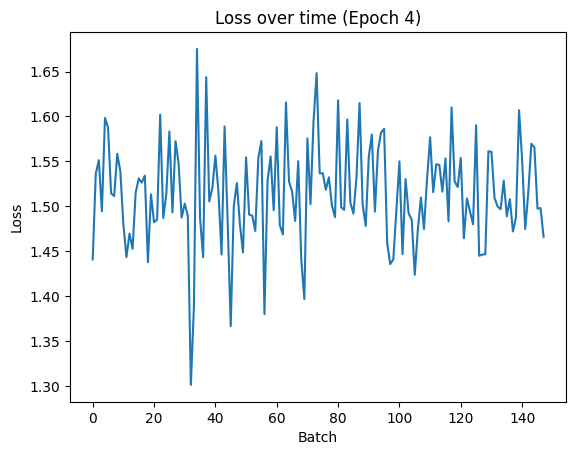

 25%|██▌       | 5/20 [34:32<1:43:51, 415.44s/it]
0it [00:00, ?it/s]
1it [00:02,  2.83s/it]
2it [00:05,  2.71s/it]
3it [00:08,  2.66s/it]
4it [00:10,  2.75s/it]
5it [00:14,  3.07s/it]
6it [00:17,  2.93s/it]
7it [00:19,  2.83s/it]
8it [00:22,  2.77s/it]
9it [00:25,  2.75s/it]
10it [00:28,  3.02s/it]

[Epoch: 6, Batch:    10] loss: 1.526



11it [00:31,  2.91s/it]
12it [00:34,  2.81s/it]
13it [00:36,  2.75s/it]
14it [00:39,  2.77s/it]
15it [00:43,  3.01s/it]
16it [00:45,  2.89s/it]
17it [00:48,  2.79s/it]
18it [00:50,  2.74s/it]
19it [00:53,  2.76s/it]
20it [00:57,  2.99s/it]

[Epoch: 6, Batch:    20] loss: 1.480



21it [00:59,  2.87s/it]
22it [01:02,  2.79s/it]
23it [01:04,  2.73s/it]
24it [01:07,  2.79s/it]
25it [01:11,  3.00s/it]
26it [01:13,  2.88s/it]
27it [01:16,  2.79s/it]
28it [01:19,  2.73s/it]
29it [01:22,  2.81s/it]
30it [01:25,  2.98s/it]

[Epoch: 6, Batch:    30] loss: 1.517



31it [01:28,  2.86s/it]
32it [01:30,  2.78s/it]
33it [01:33,  2.73s/it]
34it [01:36,  2.81s/it]
35it [01:39,  2.99s/it]
36it [01:42,  2.87s/it]
37it [01:44,  2.79s/it]
38it [01:47,  2.73s/it]
39it [01:50,  2.81s/it]
40it [01:53,  2.98s/it]

[Epoch: 6, Batch:    40] loss: 1.484



41it [01:56,  2.87s/it]
42it [01:59,  2.79s/it]
43it [02:01,  2.75s/it]
44it [02:04,  2.85s/it]
45it [02:08,  2.99s/it]
46it [02:11,  2.96s/it]
47it [02:13,  2.86s/it]
48it [02:16,  2.77s/it]
49it [02:19,  2.90s/it]
50it [02:22,  3.01s/it]

[Epoch: 6, Batch:    50] loss: 1.481



51it [02:25,  2.88s/it]
52it [02:27,  2.80s/it]
53it [02:30,  2.73s/it]
54it [02:33,  2.88s/it]
55it [02:36,  2.99s/it]
56it [02:39,  2.87s/it]
57it [02:42,  2.79s/it]
58it [02:44,  2.73s/it]
59it [02:47,  2.85s/it]
60it [02:51,  3.17s/it]

[Epoch: 6, Batch:    60] loss: 1.502



61it [02:55,  3.20s/it]
62it [02:57,  3.01s/it]
63it [03:00,  2.88s/it]
64it [03:03,  2.95s/it]
65it [03:06,  3.07s/it]
66it [03:09,  2.91s/it]
67it [03:11,  2.81s/it]
68it [03:14,  2.73s/it]
69it [03:17,  2.80s/it]
70it [03:20,  2.93s/it]

[Epoch: 6, Batch:    70] loss: 1.497



71it [03:23,  2.83s/it]
72it [03:25,  2.73s/it]
73it [03:28,  2.68s/it]
74it [03:31,  2.74s/it]
75it [03:34,  2.89s/it]
76it [03:36,  2.78s/it]
77it [03:39,  2.70s/it]
78it [03:41,  2.66s/it]
79it [03:44,  2.73s/it]
80it [03:48,  2.90s/it]

[Epoch: 6, Batch:    80] loss: 1.537



81it [03:50,  2.79s/it]
82it [03:53,  2.72s/it]
83it [03:55,  2.67s/it]
84it [03:58,  2.73s/it]
85it [04:02,  2.94s/it]
86it [04:04,  2.84s/it]
87it [04:07,  2.76s/it]
88it [04:09,  2.70s/it]
89it [04:12,  2.82s/it]
90it [04:16,  3.01s/it]

[Epoch: 6, Batch:    90] loss: 1.523



91it [04:18,  2.87s/it]
92it [04:21,  2.78s/it]
93it [04:24,  2.73s/it]
94it [04:26,  2.75s/it]
95it [04:30,  2.96s/it]
96it [04:32,  2.83s/it]
97it [04:35,  2.75s/it]
98it [04:37,  2.70s/it]
99it [04:40,  2.74s/it]
100it [04:44,  2.96s/it]

[Epoch: 6, Batch:   100] loss: 1.510



101it [04:46,  2.84s/it]
102it [04:49,  2.75s/it]
103it [04:51,  2.70s/it]
104it [04:54,  2.75s/it]
105it [04:58,  2.96s/it]
106it [05:00,  2.84s/it]
107it [05:03,  2.77s/it]
108it [05:05,  2.71s/it]
109it [05:08,  2.75s/it]
110it [05:12,  2.96s/it]

[Epoch: 6, Batch:   110] loss: 1.484



111it [05:14,  2.84s/it]
112it [05:17,  2.74s/it]
113it [05:19,  2.69s/it]
114it [05:22,  2.73s/it]
115it [05:26,  2.96s/it]
116it [05:28,  2.83s/it]
117it [05:31,  2.74s/it]
118it [05:33,  2.69s/it]
119it [05:36,  2.72s/it]
120it [05:40,  2.94s/it]

[Epoch: 6, Batch:   120] loss: 1.532



121it [05:42,  2.83s/it]
122it [05:45,  2.75s/it]
123it [05:47,  2.69s/it]
124it [05:50,  2.71s/it]
125it [05:54,  2.95s/it]
126it [05:56,  2.84s/it]
127it [05:59,  2.76s/it]
128it [06:01,  2.70s/it]
129it [06:04,  2.74s/it]
130it [06:08,  2.95s/it]

[Epoch: 6, Batch:   130] loss: 1.491



131it [06:10,  2.83s/it]
132it [06:13,  2.76s/it]
133it [06:16,  2.77s/it]
134it [06:18,  2.82s/it]
135it [06:22,  3.00s/it]
136it [06:24,  2.88s/it]
137it [06:27,  2.80s/it]
138it [06:30,  2.73s/it]
139it [06:33,  2.80s/it]
140it [06:36,  2.97s/it]

[Epoch: 6, Batch:   140] loss: 1.509



141it [06:39,  2.86s/it]
142it [06:41,  2.78s/it]
143it [06:44,  2.72s/it]
144it [06:47,  2.82s/it]
145it [06:50,  2.96s/it]
146it [06:53,  2.85s/it]
147it [06:55,  2.77s/it]
148it [06:57,  2.82s/it]


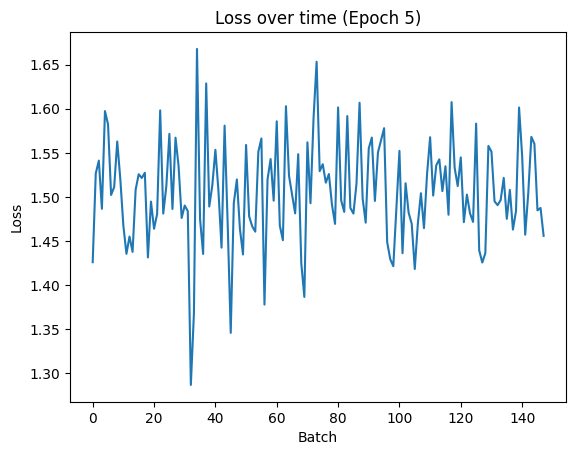

 30%|███       | 6/20 [41:30<1:37:06, 416.20s/it]
0it [00:00, ?it/s]
1it [00:02,  2.86s/it]
2it [00:06,  3.45s/it]
3it [00:10,  3.55s/it]
4it [00:12,  3.17s/it]
5it [00:15,  2.97s/it]
6it [00:18,  2.84s/it]
7it [00:21,  2.92s/it]
8it [00:24,  3.04s/it]
9it [00:27,  2.91s/it]
10it [00:29,  2.82s/it]

[Epoch: 7, Batch:    10] loss: 1.519



11it [00:32,  2.75s/it]
12it [00:35,  2.86s/it]
13it [00:38,  3.00s/it]
14it [00:41,  2.87s/it]
15it [00:44,  2.79s/it]
16it [00:46,  2.73s/it]
17it [00:49,  2.82s/it]
18it [00:52,  2.98s/it]
19it [00:55,  2.87s/it]
20it [00:58,  2.80s/it]

[Epoch: 7, Batch:    20] loss: 1.473



21it [01:00,  2.75s/it]
22it [01:04,  2.88s/it]
23it [01:07,  3.00s/it]
24it [01:09,  2.87s/it]
25it [01:12,  2.78s/it]
26it [01:15,  2.72s/it]
27it [01:18,  2.84s/it]
28it [01:21,  3.05s/it]
29it [01:24,  2.91s/it]
30it [01:26,  2.81s/it]

[Epoch: 7, Batch:    30] loss: 1.511



31it [01:29,  2.74s/it]
32it [01:32,  2.79s/it]
33it [01:35,  2.97s/it]
34it [01:38,  2.84s/it]
35it [01:40,  2.76s/it]
36it [01:43,  2.70s/it]
37it [01:46,  2.74s/it]
38it [01:49,  2.96s/it]
39it [01:52,  2.84s/it]
40it [01:54,  2.76s/it]

[Epoch: 7, Batch:    40] loss: 1.475



41it [01:57,  2.69s/it]
42it [02:00,  2.73s/it]
43it [02:03,  2.95s/it]
44it [02:06,  2.84s/it]
45it [02:08,  2.76s/it]
46it [02:11,  2.70s/it]
47it [02:14,  2.74s/it]
48it [02:17,  2.95s/it]
49it [02:20,  2.83s/it]
50it [02:22,  2.75s/it]

[Epoch: 7, Batch:    50] loss: 1.471



51it [02:25,  2.70s/it]
52it [02:28,  2.72s/it]
53it [02:31,  2.95s/it]
54it [02:34,  2.83s/it]
55it [02:36,  2.76s/it]
56it [02:39,  2.71s/it]
57it [02:42,  2.77s/it]
58it [02:45,  2.97s/it]
59it [02:48,  2.85s/it]
60it [02:50,  2.77s/it]

[Epoch: 7, Batch:    60] loss: 1.494



61it [02:53,  2.71s/it]
62it [02:56,  2.76s/it]
63it [02:59,  2.98s/it]
64it [03:02,  2.87s/it]
65it [03:04,  2.79s/it]
66it [03:07,  2.74s/it]
67it [03:10,  2.80s/it]
68it [03:13,  2.98s/it]
69it [03:16,  2.86s/it]
70it [03:19,  2.77s/it]

[Epoch: 7, Batch:    70] loss: 1.490



71it [03:21,  2.77s/it]
72it [03:24,  2.86s/it]
73it [03:28,  2.99s/it]
74it [03:30,  2.87s/it]
75it [03:33,  2.79s/it]
76it [03:36,  2.73s/it]
77it [03:38,  2.80s/it]
78it [03:42,  2.96s/it]
79it [03:44,  2.86s/it]
80it [03:47,  2.80s/it]

[Epoch: 7, Batch:    80] loss: 1.531



81it [03:50,  2.74s/it]
82it [03:53,  2.85s/it]
83it [03:56,  2.98s/it]
84it [03:59,  2.87s/it]
85it [04:01,  2.79s/it]
86it [04:04,  2.74s/it]
87it [04:07,  2.88s/it]
88it [04:11,  3.03s/it]
89it [04:13,  2.91s/it]
90it [04:16,  3.02s/it]

[Epoch: 7, Batch:    90] loss: 1.516



91it [04:20,  3.06s/it]
92it [04:23,  3.24s/it]
93it [04:26,  3.10s/it]
94it [04:29,  2.94s/it]
95it [04:31,  2.83s/it]
96it [04:34,  2.75s/it]
97it [04:37,  2.99s/it]
98it [04:40,  2.93s/it]
99it [04:43,  2.82s/it]
100it [04:45,  2.75s/it]

[Epoch: 7, Batch:   100] loss: 1.503



101it [04:48,  2.70s/it]
102it [04:51,  2.95s/it]
103it [04:54,  2.90s/it]
104it [04:57,  2.79s/it]
105it [04:59,  2.73s/it]
106it [05:02,  2.70s/it]
107it [05:05,  2.98s/it]
108it [05:08,  2.95s/it]
109it [05:11,  2.85s/it]
110it [05:14,  2.79s/it]

[Epoch: 7, Batch:   110] loss: 1.477



111it [05:16,  2.74s/it]
112it [05:20,  2.99s/it]
113it [05:23,  3.01s/it]
114it [05:26,  2.89s/it]
115it [05:28,  2.80s/it]
116it [05:31,  2.77s/it]
117it [05:34,  3.04s/it]
118it [05:37,  2.94s/it]
119it [05:40,  2.84s/it]
120it [05:42,  2.77s/it]

[Epoch: 7, Batch:   120] loss: 1.527



121it [05:45,  2.79s/it]
122it [05:49,  3.04s/it]
123it [05:51,  2.91s/it]
124it [05:54,  2.81s/it]
125it [05:57,  2.75s/it]
126it [06:00,  2.79s/it]
127it [06:03,  3.02s/it]
128it [06:06,  2.90s/it]
129it [06:08,  2.82s/it]
130it [06:11,  2.75s/it]

[Epoch: 7, Batch:   130] loss: 1.485



131it [06:14,  2.81s/it]
132it [06:17,  2.99s/it]
133it [06:20,  2.87s/it]
134it [06:22,  2.78s/it]
135it [06:25,  2.73s/it]
136it [06:28,  2.78s/it]
137it [06:31,  3.00s/it]
138it [06:34,  2.88s/it]
139it [06:37,  2.81s/it]
140it [06:39,  2.74s/it]

[Epoch: 7, Batch:   140] loss: 1.502



141it [06:42,  2.80s/it]
142it [06:46,  2.99s/it]
143it [06:48,  2.88s/it]
144it [06:51,  2.80s/it]
145it [06:54,  2.75s/it]
146it [06:57,  2.83s/it]
147it [07:00,  3.01s/it]
148it [07:02,  2.85s/it]


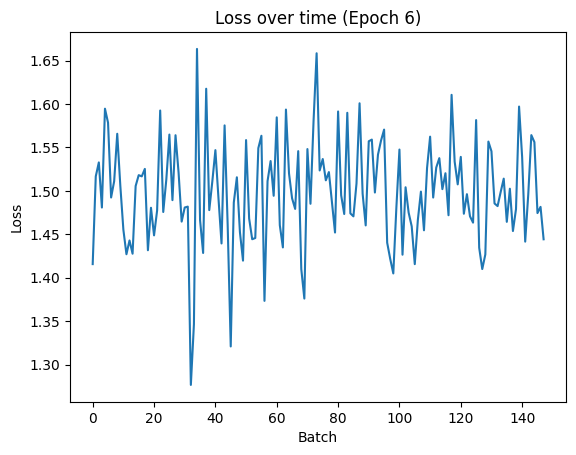

 35%|███▌      | 7/20 [48:32<1:30:36, 418.23s/it]
0it [00:00, ?it/s]
1it [00:02,  2.62s/it]
2it [00:05,  2.63s/it]
3it [00:08,  2.73s/it]
4it [00:11,  3.07s/it]
5it [00:14,  2.91s/it]
6it [00:16,  2.80s/it]
7it [00:19,  2.73s/it]
8it [00:22,  2.82s/it]
9it [00:26,  3.09s/it]
10it [00:28,  2.94s/it]

[Epoch: 8, Batch:    10] loss: 1.513



11it [00:31,  2.83s/it]
12it [00:34,  2.77s/it]
13it [00:36,  2.80s/it]
14it [00:40,  3.01s/it]
15it [00:42,  2.87s/it]
16it [00:45,  2.80s/it]
17it [00:48,  2.73s/it]
18it [00:51,  2.79s/it]
19it [00:54,  2.99s/it]
20it [00:57,  2.87s/it]

[Epoch: 8, Batch:    20] loss: 1.466



21it [00:59,  2.79s/it]
22it [01:02,  2.74s/it]
23it [01:05,  2.81s/it]
24it [01:08,  3.02s/it]
25it [01:11,  2.89s/it]
26it [01:13,  2.80s/it]
27it [01:16,  2.75s/it]
28it [01:19,  2.82s/it]
29it [01:23,  3.01s/it]
30it [01:25,  2.88s/it]

[Epoch: 8, Batch:    30] loss: 1.507



31it [01:28,  2.80s/it]
32it [01:31,  2.95s/it]
33it [01:35,  3.20s/it]
34it [01:38,  3.18s/it]
35it [01:41,  3.01s/it]
36it [01:43,  2.89s/it]
37it [01:46,  2.80s/it]
38it [01:49,  2.93s/it]
39it [01:52,  2.99s/it]
40it [01:55,  2.88s/it]

[Epoch: 8, Batch:    40] loss: 1.468



41it [01:57,  2.80s/it]
42it [02:00,  2.74s/it]
43it [02:03,  2.89s/it]
44it [02:06,  2.96s/it]
45it [02:09,  2.86s/it]
46it [02:12,  2.78s/it]
47it [02:14,  2.72s/it]
48it [02:17,  2.90s/it]
49it [02:21,  2.95s/it]
50it [02:23,  2.85s/it]

[Epoch: 8, Batch:    50] loss: 1.464



51it [02:26,  2.85s/it]
52it [02:29,  2.78s/it]
53it [02:32,  2.99s/it]
54it [02:35,  2.98s/it]
55it [02:38,  2.88s/it]
56it [02:40,  2.80s/it]
57it [02:43,  2.74s/it]
58it [02:47,  3.00s/it]
59it [02:49,  2.99s/it]
60it [02:52,  2.89s/it]

[Epoch: 8, Batch:    60] loss: 1.488



61it [02:55,  2.80s/it]
62it [02:57,  2.74s/it]
63it [03:01,  2.97s/it]
64it [03:04,  2.95s/it]
65it [03:06,  2.85s/it]
66it [03:09,  2.78s/it]
67it [03:12,  2.73s/it]
68it [03:15,  2.98s/it]
69it [03:18,  2.93s/it]
70it [03:21,  2.83s/it]

[Epoch: 8, Batch:    70] loss: 1.482



71it [03:23,  2.76s/it]
72it [03:26,  2.72s/it]
73it [03:29,  2.99s/it]
74it [03:32,  2.97s/it]
75it [03:35,  2.87s/it]
76it [03:38,  2.80s/it]
77it [03:40,  2.74s/it]
78it [03:44,  3.00s/it]
79it [03:47,  2.98s/it]
80it [03:49,  2.87s/it]

[Epoch: 8, Batch:    80] loss: 1.526



81it [03:52,  2.80s/it]
82it [03:55,  2.74s/it]
83it [03:58,  3.01s/it]
84it [04:01,  2.96s/it]
85it [04:04,  2.85s/it]
86it [04:06,  2.78s/it]
87it [04:09,  2.74s/it]
88it [04:13,  3.01s/it]
89it [04:15,  2.97s/it]
90it [04:18,  2.87s/it]

[Epoch: 8, Batch:    90] loss: 1.511



91it [04:21,  2.80s/it]
92it [04:23,  2.75s/it]
93it [04:27,  3.03s/it]
94it [04:30,  3.07s/it]
95it [04:33,  2.96s/it]
96it [04:36,  2.87s/it]
97it [04:39,  2.90s/it]
98it [04:42,  3.10s/it]
99it [04:45,  2.96s/it]
100it [04:47,  2.87s/it]

[Epoch: 8, Batch:   100] loss: 1.498



101it [04:50,  2.80s/it]
102it [04:53,  2.88s/it]
103it [04:57,  3.07s/it]
104it [04:59,  2.94s/it]
105it [05:02,  2.85s/it]
106it [05:05,  2.78s/it]
107it [05:08,  2.86s/it]
108it [05:11,  3.04s/it]
109it [05:14,  2.91s/it]
110it [05:16,  2.82s/it]

[Epoch: 8, Batch:   110] loss: 1.472



111it [05:19,  2.76s/it]
112it [05:22,  2.84s/it]
113it [05:25,  2.98s/it]
114it [05:28,  2.86s/it]
115it [05:30,  2.79s/it]
116it [05:33,  2.74s/it]
117it [05:36,  2.86s/it]
118it [05:39,  2.99s/it]
119it [05:42,  2.88s/it]
120it [05:45,  2.78s/it]

[Epoch: 8, Batch:   120] loss: 1.523



121it [05:47,  2.73s/it]
122it [05:50,  2.87s/it]
123it [05:54,  2.99s/it]
124it [05:56,  2.88s/it]
125it [05:59,  2.80s/it]
126it [06:02,  2.75s/it]
127it [06:05,  2.89s/it]
128it [06:08,  3.01s/it]
129it [06:12,  3.14s/it]
130it [06:15,  3.10s/it]

[Epoch: 8, Batch:   130] loss: 1.480



131it [06:17,  2.95s/it]
132it [06:21,  3.13s/it]
133it [06:24,  3.04s/it]
134it [06:26,  2.91s/it]
135it [06:29,  2.82s/it]
136it [06:32,  2.82s/it]
137it [06:35,  3.10s/it]
138it [06:38,  3.01s/it]
139it [06:41,  2.89s/it]
140it [06:43,  2.81s/it]

[Epoch: 8, Batch:   140] loss: 1.497



141it [06:46,  2.75s/it]
142it [06:50,  3.02s/it]
143it [06:52,  2.95s/it]
144it [06:55,  2.85s/it]
145it [06:58,  2.78s/it]
146it [07:00,  2.73s/it]
147it [07:04,  3.00s/it]
148it [07:06,  2.88s/it]


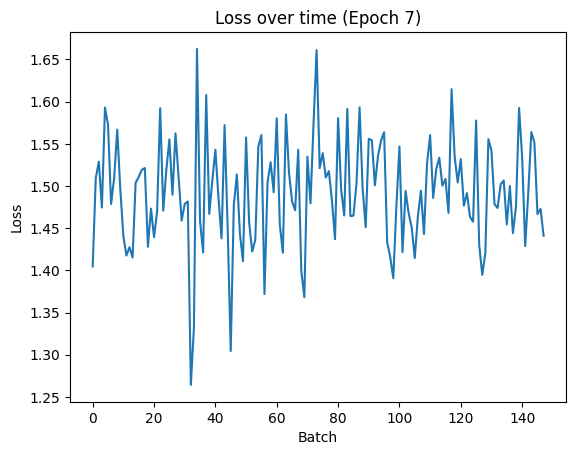

 40%|████      | 8/20 [55:39<1:24:10, 420.86s/it]
0it [00:00, ?it/s]
1it [00:02,  2.62s/it]
2it [00:05,  2.61s/it]
3it [00:07,  2.61s/it]
4it [00:11,  2.93s/it]
5it [00:14,  2.95s/it]
6it [00:16,  2.84s/it]
7it [00:19,  2.75s/it]
8it [00:22,  2.70s/it]
9it [00:25,  2.92s/it]
10it [00:28,  2.93s/it]

[Epoch: 9, Batch:    10] loss: 1.510



11it [00:30,  2.83s/it]
12it [00:33,  2.76s/it]
13it [00:36,  2.71s/it]
14it [00:39,  2.92s/it]
15it [00:42,  2.94s/it]
16it [00:45,  2.83s/it]
17it [00:47,  2.76s/it]
18it [00:50,  2.72s/it]
19it [00:53,  2.95s/it]
20it [00:56,  2.95s/it]

[Epoch: 9, Batch:    20] loss: 1.459



21it [00:59,  2.86s/it]
22it [01:02,  2.79s/it]
23it [01:04,  2.73s/it]
24it [01:08,  2.97s/it]
25it [01:11,  2.96s/it]
26it [01:13,  2.85s/it]
27it [01:16,  2.78s/it]
28it [01:18,  2.72s/it]
29it [01:22,  2.95s/it]
30it [01:25,  2.93s/it]

[Epoch: 9, Batch:    30] loss: 1.501



31it [01:27,  2.85s/it]
32it [01:30,  2.85s/it]
33it [01:33,  2.78s/it]
34it [01:37,  3.03s/it]
35it [01:39,  2.95s/it]
36it [01:42,  2.85s/it]
37it [01:45,  2.79s/it]
38it [01:47,  2.72s/it]
39it [01:51,  2.99s/it]
40it [01:53,  2.91s/it]

[Epoch: 9, Batch:    40] loss: 1.462



41it [01:56,  2.83s/it]
42it [01:59,  2.76s/it]
43it [02:01,  2.74s/it]
44it [02:05,  3.02s/it]
45it [02:08,  2.94s/it]
46it [02:10,  2.85s/it]
47it [02:13,  2.78s/it]
48it [02:16,  2.80s/it]
49it [02:20,  3.06s/it]
50it [02:22,  2.92s/it]

[Epoch: 9, Batch:    50] loss: 1.457



51it [02:25,  2.84s/it]
52it [02:27,  2.78s/it]
53it [02:30,  2.82s/it]
54it [02:34,  3.03s/it]
55it [02:37,  2.90s/it]
56it [02:39,  2.82s/it]
57it [02:42,  2.75s/it]
58it [02:45,  2.82s/it]
59it [02:48,  3.00s/it]
60it [02:51,  2.90s/it]

[Epoch: 9, Batch:    60] loss: 1.481



61it [02:53,  2.82s/it]
62it [02:56,  2.76s/it]
63it [02:59,  2.83s/it]
64it [03:02,  3.00s/it]
65it [03:05,  2.89s/it]
66it [03:08,  2.81s/it]
67it [03:10,  2.77s/it]
68it [03:13,  2.86s/it]
69it [03:17,  3.00s/it]
70it [03:19,  2.89s/it]

[Epoch: 9, Batch:    70] loss: 1.475



71it [03:22,  2.80s/it]
72it [03:25,  2.75s/it]
73it [03:28,  2.89s/it]
74it [03:31,  3.01s/it]
75it [03:34,  2.97s/it]
76it [03:37,  2.88s/it]
77it [03:39,  2.81s/it]
78it [03:43,  2.96s/it]
79it [03:46,  3.03s/it]
80it [03:48,  2.91s/it]

[Epoch: 9, Batch:    80] loss: 1.522



81it [03:51,  2.83s/it]
82it [03:54,  2.76s/it]
83it [03:57,  2.92s/it]
84it [04:00,  2.98s/it]
85it [04:04,  3.11s/it]
86it [04:07,  3.10s/it]
87it [04:10,  3.05s/it]
88it [04:13,  3.21s/it]
89it [04:16,  3.04s/it]
90it [04:18,  2.91s/it]

[Epoch: 9, Batch:    90] loss: 1.506



91it [04:21,  2.82s/it]
92it [04:24,  2.85s/it]
93it [04:27,  3.06s/it]
94it [04:30,  2.94s/it]
95it [04:33,  2.84s/it]
96it [04:35,  2.78s/it]
97it [04:38,  2.85s/it]
98it [04:42,  3.03s/it]
99it [04:44,  2.90s/it]
100it [04:47,  2.82s/it]

[Epoch: 9, Batch:   100] loss: 1.493



101it [04:50,  2.77s/it]
102it [04:53,  2.83s/it]
103it [04:56,  3.00s/it]
104it [04:59,  2.89s/it]
105it [05:01,  2.81s/it]
106it [05:04,  2.76s/it]
107it [05:07,  2.89s/it]
108it [05:11,  3.05s/it]
109it [05:13,  2.92s/it]
110it [05:16,  2.82s/it]

[Epoch: 9, Batch:   110] loss: 1.467



111it [05:18,  2.75s/it]
112it [05:22,  2.89s/it]
113it [05:25,  3.01s/it]
114it [05:28,  2.90s/it]
115it [05:30,  2.81s/it]
116it [05:33,  2.75s/it]
117it [05:36,  2.88s/it]
118it [05:40,  3.09s/it]
119it [05:42,  2.96s/it]
120it [05:45,  2.86s/it]

[Epoch: 9, Batch:   120] loss: 1.518



121it [05:47,  2.78s/it]
122it [05:50,  2.87s/it]
123it [05:54,  3.03s/it]
124it [05:56,  2.90s/it]
125it [05:59,  2.82s/it]
126it [06:02,  2.77s/it]
127it [06:05,  2.91s/it]
128it [06:08,  3.04s/it]
129it [06:11,  2.92s/it]
130it [06:14,  2.83s/it]

[Epoch: 9, Batch:   130] loss: 1.476



131it [06:16,  2.77s/it]
132it [06:19,  2.90s/it]
133it [06:23,  3.02s/it]
134it [06:25,  2.91s/it]
135it [06:28,  2.82s/it]
136it [06:31,  2.76s/it]
137it [06:34,  2.90s/it]
138it [06:37,  2.99s/it]
139it [06:40,  2.87s/it]
140it [06:42,  2.80s/it]

[Epoch: 9, Batch:   140] loss: 1.492



141it [06:45,  2.74s/it]
142it [06:48,  2.86s/it]
143it [06:51,  2.96s/it]
144it [06:54,  2.84s/it]
145it [06:56,  2.76s/it]
146it [06:59,  2.70s/it]
147it [07:02,  2.84s/it]
148it [07:04,  2.87s/it]


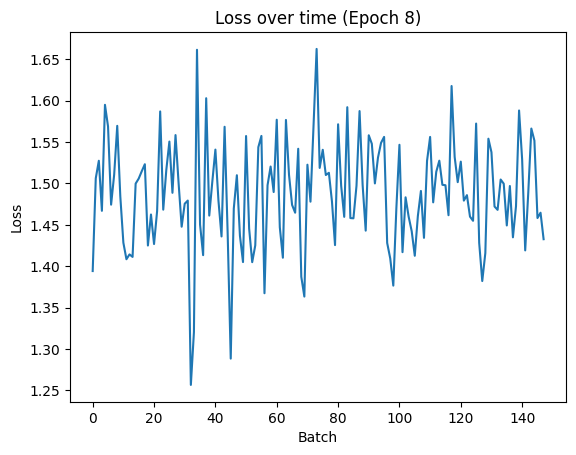

 45%|████▌     | 9/20 [1:02:44<1:17:24, 422.19s/it]
0it [00:00, ?it/s]
1it [00:02,  2.63s/it]
2it [00:05,  2.60s/it]
3it [00:07,  2.61s/it]
4it [00:10,  2.74s/it]
5it [00:14,  2.96s/it]
6it [00:16,  2.83s/it]
7it [00:19,  2.74s/it]
8it [00:21,  2.68s/it]
9it [00:24,  2.75s/it]
10it [00:28,  2.94s/it]

[Epoch: 10, Batch:    10] loss: 1.504



11it [00:30,  2.82s/it]
12it [00:33,  2.74s/it]
13it [00:35,  2.70s/it]
14it [00:39,  2.87s/it]
15it [00:42,  3.01s/it]
16it [00:44,  2.88s/it]
17it [00:47,  2.79s/it]
18it [00:50,  2.74s/it]
19it [00:53,  2.80s/it]
20it [00:56,  2.95s/it]

[Epoch: 10, Batch:    20] loss: 1.453



21it [00:58,  2.83s/it]
22it [01:01,  2.76s/it]
23it [01:04,  2.70s/it]
24it [01:07,  2.77s/it]
25it [01:10,  2.92s/it]
26it [01:12,  2.82s/it]
27it [01:15,  2.74s/it]
28it [01:18,  2.69s/it]
29it [01:21,  2.77s/it]
30it [01:24,  2.94s/it]

[Epoch: 10, Batch:    30] loss: 1.498



31it [01:26,  2.83s/it]
32it [01:29,  2.74s/it]
33it [01:32,  2.69s/it]
34it [01:34,  2.76s/it]
35it [01:38,  2.94s/it]
36it [01:40,  2.83s/it]
37it [01:43,  2.75s/it]
38it [01:46,  2.72s/it]
39it [01:49,  2.80s/it]
40it [01:52,  2.96s/it]

[Epoch: 10, Batch:    40] loss: 1.456



41it [01:55,  3.01s/it]
42it [01:58,  3.09s/it]
43it [02:01,  2.94s/it]
44it [02:04,  3.10s/it]
45it [02:07,  3.04s/it]
46it [02:10,  2.90s/it]
47it [02:12,  2.81s/it]
48it [02:15,  2.75s/it]
49it [02:19,  2.98s/it]
50it [02:21,  2.95s/it]

[Epoch: 10, Batch:    50] loss: 1.450



51it [02:24,  2.84s/it]
52it [02:27,  2.76s/it]
53it [02:29,  2.70s/it]
54it [02:33,  2.98s/it]
55it [02:36,  2.96s/it]
56it [02:38,  2.85s/it]
57it [02:41,  2.87s/it]
58it [02:44,  2.81s/it]
59it [02:48,  3.04s/it]
60it [02:50,  2.94s/it]

[Epoch: 10, Batch:    60] loss: 1.475



61it [02:53,  2.85s/it]
62it [02:56,  2.79s/it]
63it [02:58,  2.78s/it]
64it [03:02,  3.03s/it]
65it [03:05,  2.93s/it]
66it [03:07,  2.84s/it]
67it [03:10,  2.77s/it]
68it [03:13,  2.81s/it]
69it [03:16,  3.02s/it]
70it [03:19,  2.89s/it]

[Epoch: 10, Batch:    70] loss: 1.469



71it [03:21,  2.79s/it]
72it [03:24,  2.73s/it]
73it [03:27,  2.77s/it]
74it [03:30,  2.97s/it]
75it [03:33,  2.85s/it]
76it [03:35,  2.77s/it]
77it [03:38,  2.72s/it]
78it [03:41,  2.76s/it]
79it [03:44,  2.99s/it]
80it [03:47,  2.86s/it]

[Epoch: 10, Batch:    80] loss: 1.518



81it [03:50,  2.78s/it]
82it [03:52,  2.71s/it]
83it [03:55,  2.76s/it]
84it [03:58,  2.97s/it]
85it [04:01,  2.86s/it]
86it [04:04,  2.77s/it]
87it [04:06,  2.72s/it]
88it [04:09,  2.78s/it]
89it [04:13,  2.99s/it]
90it [04:15,  2.86s/it]

[Epoch: 10, Batch:    90] loss: 1.501



91it [04:18,  2.77s/it]
92it [04:20,  2.71s/it]
93it [04:23,  2.77s/it]
94it [04:27,  3.00s/it]
95it [04:29,  2.87s/it]
96it [04:32,  2.78s/it]
97it [04:34,  2.72s/it]
98it [04:37,  2.76s/it]
99it [04:41,  2.98s/it]
100it [04:43,  2.86s/it]

[Epoch: 10, Batch:   100] loss: 1.487



101it [04:46,  2.86s/it]
102it [04:49,  2.77s/it]
103it [04:52,  2.80s/it]
104it [04:55,  2.97s/it]
105it [04:58,  2.85s/it]
106it [05:00,  2.76s/it]
107it [05:03,  2.71s/it]
108it [05:06,  2.76s/it]
109it [05:09,  2.95s/it]
110it [05:12,  2.84s/it]

[Epoch: 10, Batch:   110] loss: 1.464



111it [05:14,  2.77s/it]
112it [05:17,  2.71s/it]
113it [05:20,  2.75s/it]
114it [05:23,  2.95s/it]
115it [05:26,  2.84s/it]
116it [05:28,  2.76s/it]
117it [05:31,  2.70s/it]
118it [05:34,  2.74s/it]
119it [05:37,  2.97s/it]
120it [05:40,  2.85s/it]

[Epoch: 10, Batch:   120] loss: 1.514



121it [05:42,  2.76s/it]
122it [05:45,  2.72s/it]
123it [05:48,  2.79s/it]
124it [05:51,  3.00s/it]
125it [05:54,  2.87s/it]
126it [05:56,  2.79s/it]
127it [05:59,  2.73s/it]
128it [06:02,  2.78s/it]
129it [06:05,  2.97s/it]
130it [06:08,  2.87s/it]

[Epoch: 10, Batch:   130] loss: 1.471



131it [06:11,  2.79s/it]
132it [06:13,  2.73s/it]
133it [06:16,  2.79s/it]
134it [06:20,  2.97s/it]
135it [06:22,  2.85s/it]
136it [06:25,  2.79s/it]
137it [06:27,  2.73s/it]
138it [06:30,  2.78s/it]
139it [06:34,  2.98s/it]
140it [06:36,  2.88s/it]

[Epoch: 10, Batch:   140] loss: 1.488



141it [06:39,  2.80s/it]
142it [06:42,  2.74s/it]
143it [06:45,  2.81s/it]
144it [06:48,  3.00s/it]
145it [06:51,  2.87s/it]
146it [06:53,  2.87s/it]
147it [06:56,  2.77s/it]
148it [06:58,  2.82s/it]


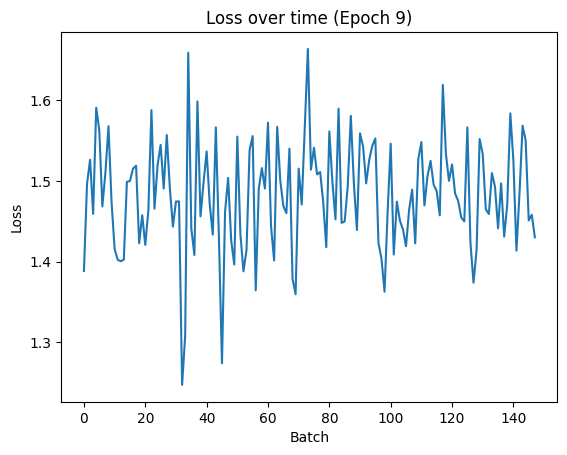

 50%|█████     | 10/20 [1:09:42<1:10:10, 421.04s/it]
0it [00:00, ?it/s]
1it [00:03,  3.73s/it]
2it [00:07,  3.78s/it]
3it [00:10,  3.26s/it]
4it [00:12,  2.98s/it]
5it [00:15,  2.83s/it]
6it [00:18,  2.81s/it]
7it [00:21,  3.05s/it]
8it [00:24,  2.89s/it]
9it [00:26,  2.80s/it]
10it [00:29,  2.73s/it]

[Epoch: 11, Batch:    10] loss: 1.503



11it [00:32,  2.75s/it]
12it [00:35,  2.96s/it]
13it [00:38,  2.85s/it]
14it [00:40,  2.79s/it]
15it [00:43,  2.72s/it]
16it [00:46,  2.75s/it]
17it [00:49,  2.95s/it]
18it [00:52,  2.84s/it]
19it [00:54,  2.77s/it]
20it [00:57,  2.71s/it]

[Epoch: 11, Batch:    20] loss: 1.445



21it [01:00,  2.75s/it]
22it [01:03,  2.95s/it]
23it [01:06,  2.84s/it]
24it [01:08,  2.77s/it]
25it [01:11,  2.72s/it]
26it [01:14,  2.76s/it]
27it [01:17,  2.96s/it]
28it [01:20,  2.85s/it]
29it [01:22,  2.76s/it]
30it [01:25,  2.69s/it]

[Epoch: 11, Batch:    30] loss: 1.496



31it [01:28,  2.75s/it]
32it [01:31,  2.96s/it]
33it [01:34,  2.84s/it]
34it [01:36,  2.76s/it]
35it [01:39,  2.71s/it]
36it [01:42,  2.76s/it]
37it [01:45,  2.97s/it]
38it [01:48,  2.86s/it]
39it [01:51,  2.79s/it]
40it [01:53,  2.73s/it]

[Epoch: 11, Batch:    40] loss: 1.450



41it [01:56,  2.80s/it]
42it [02:00,  3.08s/it]
43it [02:02,  2.92s/it]
44it [02:05,  2.81s/it]
45it [02:07,  2.74s/it]
46it [02:10,  2.79s/it]
47it [02:14,  2.99s/it]
48it [02:16,  2.87s/it]
49it [02:19,  2.79s/it]
50it [02:22,  2.73s/it]

[Epoch: 11, Batch:    50] loss: 1.448



51it [02:25,  2.78s/it]
52it [02:28,  2.97s/it]
53it [02:31,  2.85s/it]
54it [02:33,  2.76s/it]
55it [02:36,  2.70s/it]
56it [02:38,  2.74s/it]
57it [02:42,  2.97s/it]
58it [02:44,  2.84s/it]
59it [02:47,  2.75s/it]
60it [02:50,  2.70s/it]

[Epoch: 11, Batch:    60] loss: 1.469



61it [02:53,  2.76s/it]
62it [02:56,  2.96s/it]
63it [02:58,  2.83s/it]
64it [03:01,  2.76s/it]
65it [03:04,  2.70s/it]
66it [03:06,  2.75s/it]
67it [03:10,  2.98s/it]
68it [03:13,  2.86s/it]
69it [03:15,  2.77s/it]
70it [03:18,  2.70s/it]

[Epoch: 11, Batch:    70] loss: 1.466



71it [03:21,  2.74s/it]
72it [03:24,  2.95s/it]
73it [03:27,  2.85s/it]
74it [03:29,  2.76s/it]
75it [03:32,  2.70s/it]
76it [03:34,  2.73s/it]
77it [03:38,  2.95s/it]
78it [03:41,  2.85s/it]
79it [03:43,  2.77s/it]
80it [03:46,  2.70s/it]

[Epoch: 11, Batch:    80] loss: 1.506



81it [03:49,  2.74s/it]
82it [03:52,  2.96s/it]
83it [03:55,  2.84s/it]
84it [03:57,  2.76s/it]
85it [04:00,  2.71s/it]
86it [04:03,  2.84s/it]
87it [04:06,  3.00s/it]
88it [04:09,  2.88s/it]
89it [04:11,  2.80s/it]
90it [04:14,  2.73s/it]

[Epoch: 11, Batch:    90] loss: 1.494



91it [04:17,  2.79s/it]
92it [04:20,  2.96s/it]
93it [04:23,  2.85s/it]
94it [04:26,  2.78s/it]
95it [04:28,  2.72s/it]
96it [04:31,  2.80s/it]
97it [04:34,  2.95s/it]
98it [04:37,  2.83s/it]
99it [04:40,  2.76s/it]
100it [04:42,  2.72s/it]

[Epoch: 11, Batch:   100] loss: 1.486



101it [04:45,  2.81s/it]
102it [04:48,  2.94s/it]
103it [04:51,  2.83s/it]
104it [04:54,  2.76s/it]
105it [04:56,  2.70s/it]
106it [04:59,  2.78s/it]
107it [05:02,  2.92s/it]
108it [05:05,  2.83s/it]
109it [05:08,  2.96s/it]
110it [05:11,  2.98s/it]

[Epoch: 11, Batch:   110] loss: 1.465



111it [05:15,  3.13s/it]
112it [05:18,  3.04s/it]
113it [05:20,  2.89s/it]
114it [05:23,  2.78s/it]
115it [05:25,  2.72s/it]
116it [05:29,  2.93s/it]
117it [05:32,  2.92s/it]
118it [05:34,  2.81s/it]
119it [05:37,  2.74s/it]
120it [05:39,  2.69s/it]

[Epoch: 11, Batch:   120] loss: 1.500



121it [05:43,  2.91s/it]
122it [05:46,  2.91s/it]
123it [05:48,  2.82s/it]
124it [05:51,  2.74s/it]
125it [05:53,  2.70s/it]
126it [05:57,  2.92s/it]
127it [06:00,  2.91s/it]
128it [06:02,  2.81s/it]
129it [06:05,  2.81s/it]
130it [06:08,  2.76s/it]

[Epoch: 11, Batch:   130] loss: 1.463



131it [06:11,  2.99s/it]
132it [06:14,  2.94s/it]
133it [06:17,  2.83s/it]
134it [06:19,  2.75s/it]
135it [06:22,  2.70s/it]
136it [06:25,  2.94s/it]
137it [06:28,  2.93s/it]
138it [06:31,  2.82s/it]
139it [06:33,  2.74s/it]
140it [06:36,  2.68s/it]

[Epoch: 11, Batch:   140] loss: 1.482



141it [06:39,  2.89s/it]
142it [06:42,  2.91s/it]
143it [06:45,  2.80s/it]
144it [06:47,  2.74s/it]
145it [06:50,  2.69s/it]
146it [06:53,  2.88s/it]
147it [06:56,  2.91s/it]
148it [06:58,  2.83s/it]


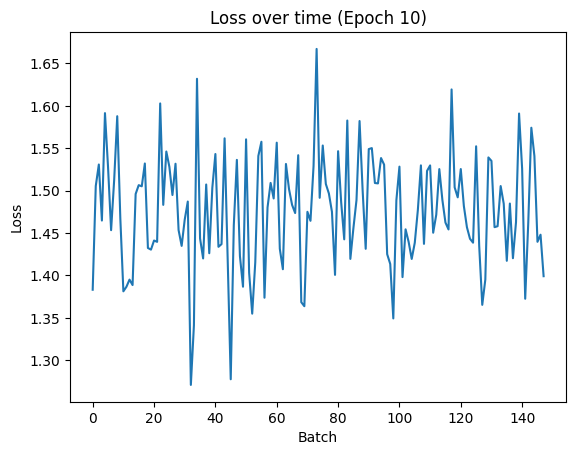

 55%|█████▌    | 11/20 [1:16:41<1:03:02, 420.29s/it]
0it [00:00, ?it/s]
1it [00:02,  2.60s/it]
2it [00:05,  2.59s/it]
3it [00:08,  2.82s/it]
4it [00:11,  2.99s/it]
5it [00:14,  2.85s/it]
6it [00:16,  2.76s/it]
7it [00:19,  2.70s/it]
8it [00:22,  2.84s/it]
9it [00:25,  2.97s/it]
10it [00:28,  2.86s/it]

[Epoch: 12, Batch:    10] loss: 1.498



11it [00:30,  2.78s/it]
12it [00:33,  2.72s/it]
13it [00:36,  2.84s/it]
14it [00:39,  2.94s/it]
15it [00:42,  2.85s/it]
16it [00:44,  2.77s/it]
17it [00:47,  2.71s/it]
18it [00:50,  2.83s/it]
19it [00:53,  2.94s/it]
20it [00:56,  2.82s/it]

[Epoch: 12, Batch:    20] loss: 1.445



21it [00:59,  2.76s/it]
22it [01:01,  2.70s/it]
23it [01:04,  2.81s/it]
24it [01:07,  2.94s/it]
25it [01:10,  2.82s/it]
26it [01:13,  2.82s/it]
27it [01:15,  2.76s/it]
28it [01:19,  2.87s/it]
29it [01:22,  2.95s/it]
30it [01:24,  2.84s/it]

[Epoch: 12, Batch:    30] loss: 1.493



31it [01:27,  2.75s/it]
32it [01:29,  2.71s/it]
33it [01:33,  2.85s/it]
34it [01:36,  2.95s/it]
35it [01:38,  2.84s/it]
36it [01:41,  2.76s/it]
37it [01:43,  2.71s/it]
38it [01:47,  2.84s/it]
39it [01:50,  2.93s/it]
40it [01:52,  2.83s/it]

[Epoch: 12, Batch:    40] loss: 1.445



41it [01:55,  2.75s/it]
42it [01:58,  2.71s/it]
43it [02:01,  2.82s/it]
44it [02:04,  2.93s/it]
45it [02:06,  2.82s/it]
46it [02:09,  2.73s/it]
47it [02:11,  2.68s/it]
48it [02:15,  2.79s/it]
49it [02:18,  2.93s/it]
50it [02:20,  2.82s/it]

[Epoch: 12, Batch:    50] loss: 1.444



51it [02:23,  2.74s/it]
52it [02:25,  2.68s/it]
53it [02:28,  2.78s/it]
54it [02:32,  2.92s/it]
55it [02:34,  2.82s/it]
56it [02:37,  2.76s/it]
57it [02:39,  2.70s/it]
58it [02:43,  2.81s/it]
59it [02:46,  2.95s/it]
60it [02:48,  2.84s/it]

[Epoch: 12, Batch:    60] loss: 1.467



61it [02:51,  2.76s/it]
62it [02:54,  2.70s/it]
63it [02:57,  2.80s/it]
64it [03:00,  2.94s/it]
65it [03:02,  2.83s/it]
66it [03:05,  2.75s/it]
67it [03:08,  2.70s/it]
68it [03:11,  2.78s/it]
69it [03:14,  2.99s/it]
70it [03:18,  3.19s/it]

[Epoch: 12, Batch:    70] loss: 1.464



71it [03:20,  3.07s/it]
72it [03:23,  2.93s/it]
73it [03:27,  3.11s/it]
74it [03:29,  3.01s/it]
75it [03:32,  2.88s/it]
76it [03:34,  2.78s/it]
77it [03:37,  2.72s/it]
78it [03:41,  2.95s/it]
79it [03:43,  2.93s/it]
80it [03:46,  2.82s/it]

[Epoch: 12, Batch:    80] loss: 1.507



81it [03:49,  2.76s/it]
82it [03:51,  2.70s/it]
83it [03:55,  2.93s/it]
84it [03:58,  2.92s/it]
85it [04:00,  2.82s/it]
86it [04:03,  2.75s/it]
87it [04:05,  2.70s/it]
88it [04:09,  2.93s/it]
89it [04:12,  2.91s/it]
90it [04:14,  2.82s/it]

[Epoch: 12, Batch:    90] loss: 1.492



91it [04:17,  2.75s/it]
92it [04:19,  2.70s/it]
93it [04:23,  2.93s/it]
94it [04:26,  2.91s/it]
95it [04:28,  2.81s/it]
96it [04:31,  2.76s/it]
97it [04:34,  2.70s/it]
98it [04:37,  2.92s/it]
99it [04:40,  2.90s/it]
100it [04:42,  2.82s/it]

[Epoch: 12, Batch:   100] loss: 1.485



101it [04:45,  2.75s/it]
102it [04:48,  2.68s/it]
103it [04:51,  2.91s/it]
104it [04:54,  2.89s/it]
105it [04:56,  2.80s/it]
106it [04:59,  2.72s/it]
107it [05:02,  2.68s/it]
108it [05:05,  2.88s/it]
109it [05:08,  2.88s/it]
110it [05:10,  2.79s/it]

[Epoch: 12, Batch:   110] loss: 1.465



111it [05:13,  2.73s/it]
112it [05:16,  2.69s/it]
113it [05:19,  2.90s/it]
114it [05:22,  2.93s/it]
115it [05:25,  2.89s/it]
116it [05:27,  2.80s/it]
117it [05:30,  2.74s/it]
118it [05:33,  2.96s/it]
119it [05:36,  2.94s/it]
120it [05:39,  2.84s/it]

[Epoch: 12, Batch:   120] loss: 1.501



121it [05:41,  2.77s/it]
122it [05:44,  2.73s/it]
123it [05:48,  2.97s/it]
124it [05:50,  2.93s/it]
125it [05:53,  2.82s/it]
126it [05:56,  2.74s/it]
127it [05:58,  2.68s/it]
128it [06:02,  2.91s/it]
129it [06:04,  2.90s/it]
130it [06:07,  2.79s/it]

[Epoch: 12, Batch:   130] loss: 1.463



131it [06:10,  2.73s/it]
132it [06:12,  2.68s/it]
133it [06:16,  2.90s/it]
134it [06:18,  2.89s/it]
135it [06:21,  2.79s/it]
136it [06:24,  2.71s/it]
137it [06:26,  2.67s/it]
138it [06:29,  2.87s/it]
139it [06:32,  2.91s/it]
140it [06:35,  2.81s/it]

[Epoch: 12, Batch:   140] loss: 1.481



141it [06:38,  2.73s/it]
142it [06:40,  2.68s/it]
143it [06:43,  2.89s/it]
144it [06:46,  2.91s/it]
145it [06:49,  2.80s/it]
146it [06:52,  2.73s/it]
147it [06:54,  2.69s/it]
148it [06:56,  2.82s/it]


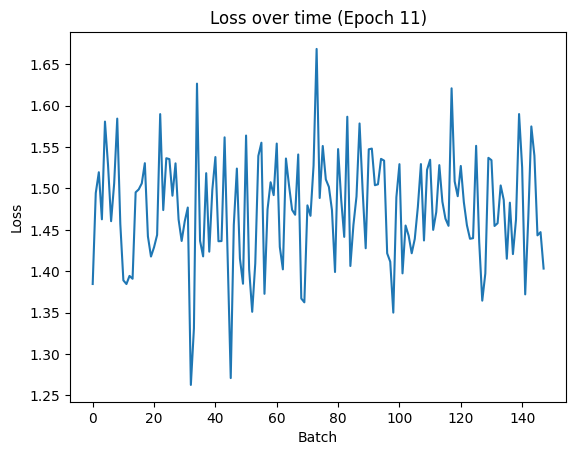

 60%|██████    | 12/20 [1:23:38<55:54, 419.30s/it]  
0it [00:00, ?it/s]
1it [00:03,  3.30s/it]
2it [00:05,  2.87s/it]
3it [00:08,  2.74s/it]
4it [00:11,  2.67s/it]
5it [00:13,  2.76s/it]
6it [00:17,  2.93s/it]
7it [00:19,  2.81s/it]
8it [00:22,  2.74s/it]
9it [00:24,  2.68s/it]
10it [00:27,  2.76s/it]

[Epoch: 13, Batch:    10] loss: 1.497



11it [00:31,  2.91s/it]
12it [00:33,  2.88s/it]
13it [00:36,  2.79s/it]
14it [00:39,  2.73s/it]
15it [00:42,  2.84s/it]
16it [00:45,  2.97s/it]
17it [00:48,  2.87s/it]
18it [00:50,  2.79s/it]
19it [00:53,  2.72s/it]
20it [00:56,  2.86s/it]

[Epoch: 13, Batch:    20] loss: 1.445



21it [00:59,  2.98s/it]
22it [01:02,  2.87s/it]
23it [01:04,  2.78s/it]
24it [01:07,  2.72s/it]
25it [01:10,  2.86s/it]
26it [01:13,  2.98s/it]
27it [01:16,  2.86s/it]
28it [01:19,  2.78s/it]
29it [01:21,  2.73s/it]
30it [01:24,  2.90s/it]

[Epoch: 13, Batch:    30] loss: 1.492



31it [01:28,  3.14s/it]
32it [01:31,  3.15s/it]
33it [01:34,  2.97s/it]
34it [01:36,  2.85s/it]
35it [01:39,  2.78s/it]
36it [01:42,  2.88s/it]
37it [01:45,  2.96s/it]
38it [01:48,  2.85s/it]
39it [01:51,  2.77s/it]
40it [01:53,  2.71s/it]

[Epoch: 13, Batch:    40] loss: 1.444



41it [01:56,  2.85s/it]
42it [01:59,  2.95s/it]
43it [02:02,  2.83s/it]
44it [02:05,  2.75s/it]
45it [02:07,  2.69s/it]
46it [02:10,  2.82s/it]
47it [02:13,  2.93s/it]
48it [02:16,  2.82s/it]
49it [02:19,  2.75s/it]
50it [02:21,  2.71s/it]

[Epoch: 13, Batch:    50] loss: 1.443



51it [02:24,  2.84s/it]
52it [02:28,  2.95s/it]
53it [02:30,  2.83s/it]
54it [02:33,  2.75s/it]
55it [02:35,  2.70s/it]
56it [02:38,  2.85s/it]
57it [02:42,  3.02s/it]
58it [02:44,  2.89s/it]
59it [02:47,  2.81s/it]
60it [02:50,  2.74s/it]

[Epoch: 13, Batch:    60] loss: 1.466



61it [02:53,  2.79s/it]
62it [02:56,  2.96s/it]
63it [02:58,  2.85s/it]
64it [03:01,  2.76s/it]
65it [03:04,  2.71s/it]
66it [03:06,  2.75s/it]
67it [03:10,  2.94s/it]
68it [03:12,  2.83s/it]
69it [03:15,  2.75s/it]
70it [03:18,  2.71s/it]

[Epoch: 13, Batch:    70] loss: 1.463



71it [03:21,  2.77s/it]
72it [03:24,  2.95s/it]
73it [03:26,  2.84s/it]
74it [03:29,  2.76s/it]
75it [03:32,  2.70s/it]
76it [03:34,  2.74s/it]
77it [03:38,  2.97s/it]
78it [03:41,  2.86s/it]
79it [03:43,  2.77s/it]
80it [03:46,  2.73s/it]

[Epoch: 13, Batch:    80] loss: 1.506



81it [03:49,  2.80s/it]
82it [03:52,  2.99s/it]
83it [03:55,  2.88s/it]
84it [03:57,  2.80s/it]
85it [04:00,  2.75s/it]
86it [04:03,  2.82s/it]
87it [04:06,  2.96s/it]
88it [04:09,  2.84s/it]
89it [04:11,  2.77s/it]
90it [04:14,  2.71s/it]

[Epoch: 13, Batch:    90] loss: 1.491



91it [04:17,  2.78s/it]
92it [04:20,  2.95s/it]
93it [04:23,  2.83s/it]
94it [04:25,  2.75s/it]
95it [04:28,  2.69s/it]
96it [04:31,  2.76s/it]
97it [04:34,  2.91s/it]
98it [04:37,  2.80s/it]
99it [04:39,  2.73s/it]
100it [04:42,  2.69s/it]

[Epoch: 13, Batch:   100] loss: 1.484



101it [04:45,  2.87s/it]
102it [04:48,  2.99s/it]
103it [04:51,  2.86s/it]
104it [04:54,  2.77s/it]
105it [04:56,  2.70s/it]
106it [04:59,  2.80s/it]
107it [05:02,  2.93s/it]
108it [05:05,  2.82s/it]
109it [05:08,  2.75s/it]
110it [05:10,  2.70s/it]

[Epoch: 13, Batch:   110] loss: 1.465



111it [05:13,  2.80s/it]
112it [05:16,  2.94s/it]
113it [05:19,  2.83s/it]
114it [05:22,  2.76s/it]
115it [05:24,  2.70s/it]
116it [05:27,  2.81s/it]
117it [05:30,  2.94s/it]
118it [05:33,  2.84s/it]
119it [05:36,  2.76s/it]
120it [05:38,  2.70s/it]

[Epoch: 13, Batch:   120] loss: 1.501



121it [05:41,  2.80s/it]
122it [05:44,  2.94s/it]
123it [05:47,  2.84s/it]
124it [05:50,  2.76s/it]
125it [05:52,  2.71s/it]
126it [05:55,  2.79s/it]
127it [05:59,  2.93s/it]
128it [06:01,  2.82s/it]
129it [06:04,  2.75s/it]
130it [06:06,  2.69s/it]

[Epoch: 13, Batch:   130] loss: 1.463



131it [06:09,  2.79s/it]
132it [06:12,  2.93s/it]
133it [06:15,  2.82s/it]
134it [06:18,  2.74s/it]
135it [06:20,  2.69s/it]
136it [06:23,  2.79s/it]
137it [06:26,  2.95s/it]
138it [06:30,  3.00s/it]
139it [06:33,  3.06s/it]
140it [06:35,  2.91s/it]

[Epoch: 13, Batch:   140] loss: 1.480



141it [06:39,  3.09s/it]
142it [06:42,  3.01s/it]
143it [06:44,  2.89s/it]
144it [06:47,  2.87s/it]
145it [06:50,  2.80s/it]
146it [06:53,  3.02s/it]
147it [06:56,  2.94s/it]
148it [06:58,  2.83s/it]


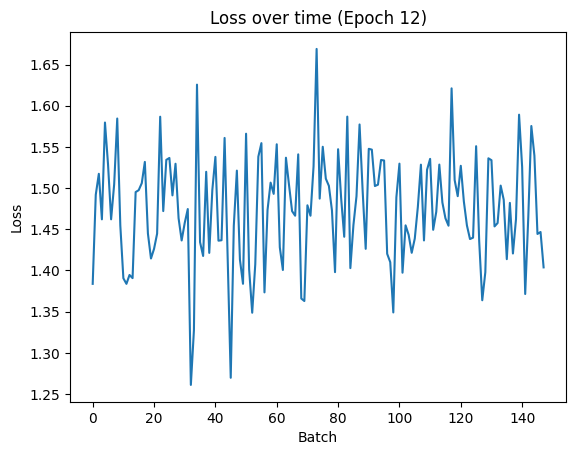

 65%|██████▌   | 13/20 [1:30:36<48:53, 419.05s/it]
0it [00:00, ?it/s]
1it [00:02,  2.59s/it]
2it [00:05,  2.60s/it]
3it [00:08,  2.93s/it]
4it [00:11,  2.92s/it]
5it [00:13,  2.79s/it]
6it [00:16,  2.72s/it]
7it [00:19,  2.67s/it]
8it [00:22,  2.87s/it]
9it [00:25,  2.88s/it]
10it [00:27,  2.78s/it]

[Epoch: 14, Batch:    10] loss: 1.497



11it [00:30,  2.71s/it]
12it [00:33,  2.67s/it]
13it [00:36,  2.86s/it]
14it [00:39,  2.88s/it]
15it [00:41,  2.79s/it]
16it [00:44,  2.73s/it]
17it [00:47,  2.70s/it]
18it [00:50,  2.91s/it]
19it [00:53,  2.92s/it]
20it [00:55,  2.80s/it]

[Epoch: 14, Batch:    20] loss: 1.445



21it [00:58,  2.74s/it]
22it [01:01,  2.69s/it]
23it [01:04,  2.88s/it]
24it [01:07,  2.91s/it]
25it [01:09,  2.81s/it]
26it [01:12,  2.74s/it]
27it [01:15,  2.69s/it]
28it [01:18,  2.91s/it]
29it [01:21,  2.91s/it]
30it [01:24,  2.81s/it]

[Epoch: 14, Batch:    30] loss: 1.492



31it [01:26,  2.74s/it]
32it [01:29,  2.69s/it]
33it [01:32,  2.89s/it]
34it [01:35,  2.90s/it]
35it [01:37,  2.79s/it]
36it [01:40,  2.73s/it]
37it [01:43,  2.68s/it]
38it [01:46,  2.89s/it]
39it [01:49,  2.90s/it]
40it [01:52,  2.82s/it]

[Epoch: 14, Batch:    40] loss: 1.443



41it [01:54,  2.83s/it]
42it [01:57,  2.77s/it]
43it [02:01,  2.99s/it]
44it [02:03,  2.94s/it]
45it [02:06,  2.85s/it]
46it [02:09,  2.78s/it]
47it [02:11,  2.73s/it]
48it [02:15,  2.96s/it]
49it [02:18,  2.92s/it]
50it [02:20,  2.83s/it]

[Epoch: 14, Batch:    50] loss: 1.442



51it [02:23,  2.76s/it]
52it [02:25,  2.72s/it]
53it [02:29,  2.97s/it]
54it [02:32,  2.93s/it]
55it [02:34,  2.82s/it]
56it [02:37,  2.75s/it]
57it [02:40,  2.70s/it]
58it [02:43,  2.94s/it]
59it [02:46,  2.91s/it]
60it [02:48,  2.81s/it]

[Epoch: 14, Batch:    60] loss: 1.466



61it [02:51,  2.77s/it]
62it [02:54,  2.70s/it]
63it [02:57,  2.94s/it]
64it [03:00,  2.93s/it]
65it [03:03,  2.83s/it]
66it [03:05,  2.74s/it]
67it [03:08,  2.69s/it]
68it [03:11,  2.92s/it]
69it [03:14,  2.91s/it]
70it [03:17,  2.81s/it]

[Epoch: 14, Batch:    70] loss: 1.463



71it [03:19,  2.73s/it]
72it [03:22,  2.70s/it]
73it [03:25,  2.91s/it]
74it [03:28,  2.89s/it]
75it [03:31,  2.80s/it]
76it [03:33,  2.74s/it]
77it [03:36,  2.69s/it]
78it [03:39,  2.91s/it]
79it [03:42,  2.91s/it]
80it [03:45,  2.80s/it]

[Epoch: 14, Batch:    80] loss: 1.506



81it [03:47,  2.74s/it]
82it [03:50,  2.71s/it]
83it [03:53,  2.95s/it]
84it [03:56,  2.92s/it]
85it [03:59,  2.92s/it]
86it [04:02,  2.83s/it]
87it [04:04,  2.76s/it]
88it [04:08,  3.00s/it]
89it [04:11,  2.92s/it]
90it [04:13,  2.81s/it]

[Epoch: 14, Batch:    90] loss: 1.491



91it [04:16,  2.76s/it]
92it [04:19,  2.76s/it]
93it [04:22,  3.05s/it]
94it [04:25,  2.97s/it]
95it [04:28,  2.86s/it]
96it [04:30,  2.79s/it]
97it [04:33,  2.77s/it]
98it [04:37,  3.03s/it]
99it [04:39,  2.91s/it]
100it [04:42,  2.82s/it]

[Epoch: 14, Batch:   100] loss: 1.483



101it [04:45,  2.77s/it]
102it [04:48,  3.06s/it]
103it [04:52,  3.30s/it]
104it [04:55,  3.14s/it]
105it [04:58,  2.97s/it]
106it [05:00,  2.85s/it]
107it [05:03,  2.77s/it]
108it [05:06,  3.03s/it]
109it [05:09,  2.94s/it]
110it [05:12,  2.84s/it]

[Epoch: 14, Batch:   110] loss: 1.465



111it [05:14,  2.76s/it]
112it [05:17,  2.74s/it]
113it [05:21,  2.98s/it]
114it [05:23,  2.89s/it]
115it [05:26,  2.80s/it]
116it [05:28,  2.74s/it]
117it [05:31,  2.72s/it]
118it [05:35,  2.98s/it]
119it [05:37,  2.88s/it]
120it [05:40,  2.80s/it]

[Epoch: 14, Batch:   120] loss: 1.500



121it [05:43,  2.75s/it]
122it [05:46,  2.80s/it]
123it [05:49,  3.03s/it]
124it [05:52,  2.90s/it]
125it [05:54,  2.80s/it]
126it [05:57,  2.74s/it]
127it [06:00,  2.77s/it]
128it [06:03,  2.98s/it]
129it [06:06,  2.94s/it]
130it [06:09,  2.84s/it]

[Epoch: 14, Batch:   130] loss: 1.462



131it [06:11,  2.77s/it]
132it [06:14,  2.83s/it]
133it [06:18,  2.98s/it]
134it [06:20,  2.86s/it]
135it [06:23,  2.79s/it]
136it [06:25,  2.74s/it]
137it [06:28,  2.86s/it]
138it [06:32,  3.00s/it]
139it [06:34,  2.87s/it]
140it [06:37,  2.78s/it]

[Epoch: 14, Batch:   140] loss: 1.480



141it [06:40,  2.74s/it]
142it [06:43,  2.85s/it]
143it [06:46,  3.00s/it]
144it [06:49,  2.88s/it]
145it [06:51,  2.82s/it]
146it [06:54,  2.77s/it]
147it [06:57,  2.89s/it]
148it [06:59,  2.84s/it]


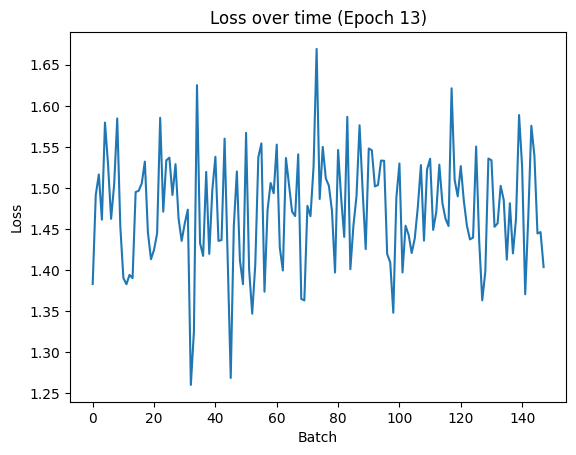

 70%|███████   | 14/20 [1:37:36<41:56, 419.39s/it]
0it [00:00, ?it/s]
1it [00:02,  2.61s/it]
2it [00:05,  2.59s/it]
3it [00:07,  2.59s/it]
4it [00:10,  2.74s/it]
5it [00:14,  2.98s/it]
6it [00:16,  2.85s/it]
7it [00:19,  2.76s/it]
8it [00:21,  2.71s/it]
9it [00:24,  2.79s/it]
10it [00:28,  2.96s/it]

[Epoch: 15, Batch:    10] loss: 1.496



11it [00:30,  2.85s/it]
12it [00:33,  2.77s/it]
13it [00:35,  2.71s/it]
14it [00:38,  2.78s/it]
15it [00:42,  2.94s/it]
16it [00:44,  2.83s/it]
17it [00:47,  2.75s/it]
18it [00:49,  2.69s/it]
19it [00:52,  2.78s/it]
20it [00:56,  2.95s/it]

[Epoch: 15, Batch:    20] loss: 1.444



21it [00:58,  2.84s/it]
22it [01:01,  2.75s/it]
23it [01:03,  2.69s/it]
24it [01:06,  2.75s/it]
25it [01:10,  3.01s/it]
26it [01:12,  2.87s/it]
27it [01:15,  2.77s/it]
28it [01:18,  2.71s/it]
29it [01:20,  2.74s/it]
30it [01:24,  2.95s/it]

[Epoch: 15, Batch:    30] loss: 1.491



31it [01:26,  2.84s/it]
32it [01:29,  2.75s/it]
33it [01:32,  2.69s/it]
34it [01:34,  2.72s/it]
35it [01:38,  2.93s/it]
36it [01:40,  2.81s/it]
37it [01:43,  2.73s/it]
38it [01:45,  2.68s/it]
39it [01:48,  2.72s/it]
40it [01:52,  2.94s/it]

[Epoch: 15, Batch:    40] loss: 1.442



41it [01:54,  2.86s/it]
42it [01:57,  2.76s/it]
43it [01:59,  2.69s/it]
44it [02:02,  2.74s/it]
45it [02:06,  2.94s/it]
46it [02:08,  2.83s/it]
47it [02:11,  2.76s/it]
48it [02:13,  2.70s/it]
49it [02:16,  2.74s/it]
50it [02:20,  2.94s/it]

[Epoch: 15, Batch:    50] loss: 1.442



51it [02:22,  2.84s/it]
52it [02:25,  2.78s/it]
53it [02:27,  2.72s/it]
54it [02:30,  2.75s/it]
55it [02:34,  2.94s/it]
56it [02:36,  2.82s/it]
57it [02:39,  2.74s/it]
58it [02:41,  2.69s/it]
59it [02:44,  2.74s/it]
60it [02:48,  2.93s/it]

[Epoch: 15, Batch:    60] loss: 1.466



61it [02:50,  2.83s/it]
62it [02:53,  2.75s/it]
63it [02:55,  2.70s/it]
64it [02:58,  2.76s/it]
65it [03:02,  2.96s/it]
66it [03:04,  2.84s/it]
67it [03:07,  2.77s/it]
68it [03:09,  2.71s/it]
69it [03:13,  2.87s/it]
70it [03:17,  3.24s/it]

[Epoch: 15, Batch:    70] loss: 1.462



71it [03:20,  3.24s/it]
72it [03:23,  3.06s/it]
73it [03:25,  2.94s/it]
74it [03:28,  2.85s/it]
75it [03:31,  2.98s/it]
76it [03:34,  2.99s/it]
77it [03:37,  2.87s/it]
78it [03:39,  2.79s/it]
79it [03:42,  2.71s/it]
80it [03:45,  2.88s/it]

[Epoch: 15, Batch:    80] loss: 1.505



81it [03:48,  2.93s/it]
82it [03:51,  2.84s/it]
83it [03:53,  2.77s/it]
84it [03:56,  2.72s/it]
85it [03:59,  2.89s/it]
86it [04:02,  2.91s/it]
87it [04:05,  2.81s/it]
88it [04:07,  2.74s/it]
89it [04:10,  2.72s/it]
90it [04:13,  2.91s/it]

[Epoch: 15, Batch:    90] loss: 1.490



91it [04:16,  2.90s/it]
92it [04:19,  2.79s/it]
93it [04:21,  2.73s/it]
94it [04:24,  2.69s/it]
95it [04:27,  2.89s/it]
96it [04:30,  2.91s/it]
97it [04:33,  2.81s/it]
98it [04:35,  2.73s/it]
99it [04:38,  2.67s/it]
100it [04:41,  2.86s/it]

[Epoch: 15, Batch:   100] loss: 1.483



101it [04:44,  2.88s/it]
102it [04:47,  2.80s/it]
103it [04:49,  2.73s/it]
104it [04:52,  2.69s/it]
105it [04:55,  2.89s/it]
106it [04:58,  2.92s/it]
107it [05:01,  2.82s/it]
108it [05:04,  2.75s/it]
109it [05:06,  2.70s/it]
110it [05:09,  2.88s/it]

[Epoch: 15, Batch:   110] loss: 1.464



111it [05:12,  2.91s/it]
112it [05:15,  2.83s/it]
113it [05:18,  2.76s/it]
114it [05:20,  2.79s/it]
115it [05:24,  3.02s/it]
116it [05:27,  2.99s/it]
117it [05:30,  2.88s/it]
118it [05:32,  2.79s/it]
119it [05:35,  2.73s/it]
120it [05:38,  2.94s/it]

[Epoch: 15, Batch:   120] loss: 1.500



121it [05:41,  2.91s/it]
122it [05:44,  2.81s/it]
123it [05:46,  2.73s/it]
124it [05:49,  2.68s/it]
125it [05:52,  2.92s/it]
126it [05:55,  2.92s/it]
127it [05:58,  2.81s/it]
128it [06:00,  2.74s/it]
129it [06:03,  2.69s/it]
130it [06:06,  2.89s/it]

[Epoch: 15, Batch:   130] loss: 1.462



131it [06:09,  2.90s/it]
132it [06:12,  2.80s/it]
133it [06:14,  2.73s/it]
134it [06:17,  2.69s/it]
135it [06:20,  2.87s/it]
136it [06:23,  2.89s/it]
137it [06:26,  2.79s/it]
138it [06:28,  2.73s/it]
139it [06:31,  2.68s/it]
140it [06:34,  2.86s/it]

[Epoch: 15, Batch:   140] loss: 1.479



141it [06:37,  2.88s/it]
142it [06:40,  2.79s/it]
143it [06:42,  2.72s/it]
144it [06:45,  2.67s/it]
145it [06:48,  2.87s/it]
146it [06:51,  2.90s/it]
147it [06:54,  2.80s/it]
148it [06:55,  2.81s/it]


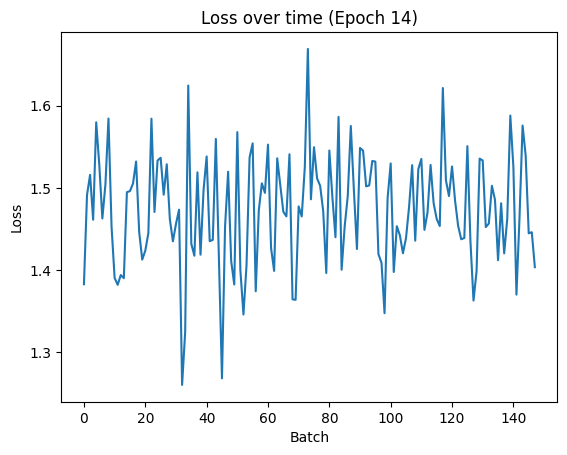

 75%|███████▌  | 15/20 [1:44:32<34:51, 418.35s/it]
0it [00:00, ?it/s]
1it [00:02,  2.62s/it]
2it [00:05,  2.90s/it]
3it [00:08,  3.05s/it]
4it [00:11,  2.87s/it]
5it [00:14,  2.77s/it]
6it [00:16,  2.70s/it]
7it [00:19,  2.83s/it]
8it [00:23,  2.96s/it]
9it [00:25,  2.85s/it]
10it [00:28,  2.76s/it]

[Epoch: 16, Batch:    10] loss: 1.496



11it [00:31,  2.80s/it]
12it [00:34,  2.91s/it]
13it [00:37,  3.00s/it]
14it [00:40,  2.89s/it]
15it [00:42,  2.79s/it]
16it [00:45,  2.72s/it]
17it [00:48,  2.85s/it]
18it [00:51,  2.98s/it]
19it [00:54,  2.85s/it]
20it [00:56,  2.77s/it]

[Epoch: 16, Batch:    20] loss: 1.444



21it [00:59,  2.72s/it]
22it [01:02,  2.86s/it]
23it [01:05,  2.95s/it]
24it [01:08,  2.85s/it]
25it [01:10,  2.78s/it]
26it [01:13,  2.72s/it]
27it [01:16,  2.85s/it]
28it [01:19,  2.95s/it]
29it [01:22,  2.84s/it]
30it [01:25,  2.77s/it]

[Epoch: 16, Batch:    30] loss: 1.491



31it [01:27,  2.73s/it]
32it [01:30,  2.86s/it]
33it [01:34,  3.11s/it]
34it [01:37,  3.16s/it]
35it [01:40,  2.99s/it]
36it [01:43,  2.86s/it]
37it [01:46,  3.01s/it]
38it [01:49,  2.97s/it]
39it [01:51,  2.86s/it]
40it [01:54,  2.79s/it]

[Epoch: 16, Batch:    40] loss: 1.442



41it [01:57,  2.73s/it]
42it [02:00,  2.95s/it]
43it [02:03,  2.94s/it]
44it [02:06,  2.84s/it]
45it [02:08,  2.78s/it]
46it [02:11,  2.73s/it]
47it [02:14,  2.98s/it]
48it [02:17,  2.96s/it]
49it [02:20,  2.86s/it]
50it [02:23,  2.79s/it]

[Epoch: 16, Batch:    50] loss: 1.441



51it [02:25,  2.75s/it]
52it [02:29,  3.00s/it]
53it [02:32,  2.96s/it]
54it [02:35,  2.94s/it]
55it [02:37,  2.86s/it]
56it [02:40,  2.79s/it]
57it [02:43,  3.03s/it]
58it [02:46,  2.93s/it]
59it [02:49,  2.83s/it]
60it [02:51,  2.75s/it]

[Epoch: 16, Batch:    60] loss: 1.465



61it [02:54,  2.73s/it]
62it [02:58,  2.99s/it]
63it [03:00,  2.91s/it]
64it [03:03,  2.81s/it]
65it [03:05,  2.74s/it]
66it [03:08,  2.78s/it]
67it [03:12,  3.02s/it]
68it [03:14,  2.90s/it]
69it [03:17,  2.81s/it]
70it [03:20,  2.74s/it]

[Epoch: 16, Batch:    70] loss: 1.462



71it [03:23,  2.79s/it]
72it [03:26,  2.99s/it]
73it [03:29,  2.87s/it]
74it [03:31,  2.79s/it]
75it [03:34,  2.72s/it]
76it [03:37,  2.78s/it]
77it [03:40,  2.99s/it]
78it [03:43,  2.88s/it]
79it [03:45,  2.79s/it]
80it [03:48,  2.73s/it]

[Epoch: 16, Batch:    80] loss: 1.505



81it [03:51,  2.77s/it]
82it [03:54,  2.97s/it]
83it [03:57,  2.85s/it]
84it [03:59,  2.78s/it]
85it [04:02,  2.72s/it]
86it [04:05,  2.77s/it]
87it [04:08,  2.98s/it]
88it [04:11,  2.85s/it]
89it [04:14,  2.77s/it]
90it [04:16,  2.71s/it]

[Epoch: 16, Batch:    90] loss: 1.490



91it [04:19,  2.76s/it]
92it [04:22,  2.98s/it]
93it [04:25,  2.86s/it]
94it [04:28,  2.78s/it]
95it [04:30,  2.73s/it]
96it [04:33,  2.78s/it]
97it [04:37,  3.02s/it]
98it [04:39,  2.94s/it]
99it [04:42,  2.83s/it]
100it [04:45,  2.75s/it]

[Epoch: 16, Batch:   100] loss: 1.482



101it [04:48,  2.81s/it]
102it [04:51,  2.96s/it]
103it [04:53,  2.84s/it]
104it [04:56,  2.77s/it]
105it [04:59,  2.70s/it]
106it [05:02,  2.80s/it]
107it [05:05,  2.94s/it]
108it [05:07,  2.83s/it]
109it [05:10,  2.77s/it]
110it [05:13,  2.71s/it]

[Epoch: 16, Batch:   110] loss: 1.464



111it [05:16,  2.78s/it]
112it [05:19,  2.92s/it]
113it [05:21,  2.83s/it]
114it [05:24,  2.75s/it]
115it [05:27,  2.69s/it]
116it [05:30,  2.77s/it]
117it [05:33,  2.94s/it]
118it [05:35,  2.83s/it]
119it [05:38,  2.75s/it]
120it [05:41,  2.71s/it]

[Epoch: 16, Batch:   120] loss: 1.500



121it [05:44,  2.80s/it]
122it [05:47,  2.93s/it]
123it [05:49,  2.83s/it]
124it [05:52,  2.75s/it]
125it [05:55,  2.70s/it]
126it [05:58,  2.79s/it]
127it [06:01,  2.94s/it]
128it [06:03,  2.83s/it]
129it [06:06,  2.76s/it]
130it [06:09,  2.70s/it]

[Epoch: 16, Batch:   130] loss: 1.462



131it [06:12,  2.79s/it]
132it [06:15,  2.93s/it]
133it [06:17,  2.83s/it]
134it [06:20,  2.76s/it]
135it [06:23,  2.71s/it]
136it [06:26,  2.80s/it]
137it [06:29,  2.94s/it]
138it [06:32,  2.85s/it]
139it [06:34,  2.77s/it]
140it [06:37,  2.72s/it]

[Epoch: 16, Batch:   140] loss: 1.479



141it [06:40,  2.82s/it]
142it [06:43,  2.96s/it]
143it [06:46,  2.92s/it]
144it [06:49,  2.85s/it]
145it [06:52,  3.08s/it]
146it [06:56,  3.24s/it]
147it [06:59,  3.08s/it]
148it [07:00,  2.84s/it]


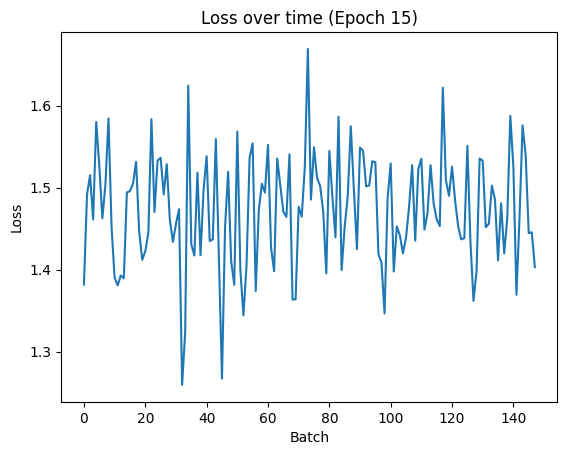

 80%|████████  | 16/20 [1:51:33<27:56, 419.13s/it]
0it [00:00, ?it/s]
1it [00:02,  2.63s/it]
2it [00:05,  2.59s/it]
3it [00:08,  2.93s/it]
4it [00:11,  2.95s/it]
5it [00:14,  2.83s/it]
6it [00:16,  2.75s/it]
7it [00:19,  2.69s/it]
8it [00:22,  2.92s/it]
9it [00:25,  2.92s/it]
10it [00:28,  2.82s/it]

[Epoch: 17, Batch:    10] loss: 1.496



11it [00:30,  2.76s/it]
12it [00:33,  2.71s/it]
13it [00:36,  2.93s/it]
14it [00:39,  2.91s/it]
15it [00:42,  2.82s/it]
16it [00:44,  2.75s/it]
17it [00:47,  2.70s/it]
18it [00:50,  2.91s/it]
19it [00:53,  2.90s/it]
20it [00:56,  2.80s/it]

[Epoch: 17, Batch:    20] loss: 1.443



21it [00:58,  2.73s/it]
22it [01:01,  2.70s/it]
23it [01:04,  2.89s/it]
24it [01:07,  2.89s/it]
25it [01:10,  2.78s/it]
26it [01:12,  2.73s/it]
27it [01:15,  2.68s/it]
28it [01:18,  2.90s/it]
29it [01:21,  2.91s/it]
30it [01:24,  2.83s/it]

[Epoch: 17, Batch:    30] loss: 1.490



31it [01:27,  2.77s/it]
32it [01:29,  2.72s/it]
33it [01:33,  2.95s/it]
34it [01:36,  2.92s/it]
35it [01:38,  2.82s/it]
36it [01:41,  2.75s/it]
37it [01:43,  2.71s/it]
38it [01:47,  2.96s/it]
39it [01:50,  3.02s/it]
40it [01:53,  2.90s/it]

[Epoch: 17, Batch:    40] loss: 1.441



41it [01:55,  2.80s/it]
42it [01:58,  2.73s/it]
43it [02:01,  2.88s/it]
44it [02:04,  2.92s/it]
45it [02:07,  2.82s/it]
46it [02:09,  2.75s/it]
47it [02:12,  2.70s/it]
48it [02:15,  2.87s/it]
49it [02:18,  2.92s/it]
50it [02:21,  2.83s/it]

[Epoch: 17, Batch:    50] loss: 1.441



51it [02:23,  2.76s/it]
52it [02:26,  2.71s/it]
53it [02:29,  2.89s/it]
54it [02:32,  2.93s/it]
55it [02:35,  2.84s/it]
56it [02:37,  2.76s/it]
57it [02:40,  2.71s/it]
58it [02:43,  2.88s/it]
59it [02:46,  2.93s/it]
60it [02:49,  2.84s/it]

[Epoch: 17, Batch:    60] loss: 1.465



61it [02:52,  2.76s/it]
62it [02:54,  2.71s/it]
63it [02:57,  2.88s/it]
64it [03:00,  2.93s/it]
65it [03:03,  2.83s/it]
66it [03:06,  2.75s/it]
67it [03:08,  2.68s/it]
68it [03:11,  2.85s/it]
69it [03:14,  2.90s/it]
70it [03:17,  2.81s/it]

[Epoch: 17, Batch:    70] loss: 1.461



71it [03:20,  2.74s/it]
72it [03:22,  2.69s/it]
73it [03:25,  2.86s/it]
74it [03:28,  2.91s/it]
75it [03:31,  2.83s/it]
76it [03:34,  2.76s/it]
77it [03:36,  2.70s/it]
78it [03:39,  2.87s/it]
79it [03:43,  2.92s/it]
80it [03:45,  2.82s/it]

[Epoch: 17, Batch:    80] loss: 1.505



81it [03:48,  2.76s/it]
82it [03:51,  2.79s/it]
83it [03:54,  2.99s/it]
84it [03:57,  2.97s/it]
85it [04:00,  2.85s/it]
86it [04:02,  2.77s/it]
87it [04:05,  2.72s/it]
88it [04:08,  2.93s/it]
89it [04:11,  2.92s/it]
90it [04:14,  2.82s/it]

[Epoch: 17, Batch:    90] loss: 1.489



91it [04:16,  2.76s/it]
92it [04:19,  2.71s/it]
93it [04:22,  2.92s/it]
94it [04:25,  2.93s/it]
95it [04:28,  2.84s/it]
96it [04:30,  2.78s/it]
97it [04:33,  2.73s/it]
98it [04:37,  2.97s/it]
99it [04:39,  2.93s/it]
100it [04:42,  2.83s/it]

[Epoch: 17, Batch:   100] loss: 1.482



101it [04:45,  2.76s/it]
102it [04:47,  2.71s/it]
103it [04:51,  2.93s/it]
104it [04:54,  2.92s/it]
105it [04:56,  2.82s/it]
106it [04:59,  2.74s/it]
107it [05:01,  2.71s/it]
108it [05:05,  2.93s/it]
109it [05:08,  2.93s/it]
110it [05:10,  2.81s/it]

[Epoch: 17, Batch:   110] loss: 1.464



111it [05:13,  2.74s/it]
112it [05:15,  2.70s/it]
113it [05:19,  2.92s/it]
114it [05:22,  2.90s/it]
115it [05:24,  2.81s/it]
116it [05:27,  2.74s/it]
117it [05:30,  2.70s/it]
118it [05:33,  2.93s/it]
119it [05:36,  2.95s/it]
120it [05:39,  2.83s/it]

[Epoch: 17, Batch:   120] loss: 1.499



121it [05:41,  2.75s/it]
122it [05:44,  2.69s/it]
123it [05:47,  2.88s/it]
124it [05:50,  2.92s/it]
125it [05:53,  2.82s/it]
126it [05:55,  2.82s/it]
127it [05:58,  2.75s/it]
128it [06:01,  2.97s/it]
129it [06:04,  2.94s/it]
130it [06:07,  2.84s/it]

[Epoch: 17, Batch:   130] loss: 1.462



131it [06:09,  2.75s/it]
132it [06:12,  2.70s/it]
133it [06:16,  2.92s/it]
134it [06:18,  2.92s/it]
135it [06:21,  2.82s/it]
136it [06:24,  2.74s/it]
137it [06:26,  2.71s/it]
138it [06:30,  2.95s/it]
139it [06:33,  2.95s/it]
140it [06:35,  2.84s/it]

[Epoch: 17, Batch:   140] loss: 1.479



141it [06:38,  2.77s/it]
142it [06:40,  2.72s/it]
143it [06:44,  3.00s/it]
144it [06:47,  3.01s/it]
145it [06:50,  2.90s/it]
146it [06:52,  2.83s/it]
147it [06:55,  2.78s/it]
148it [06:57,  2.82s/it]


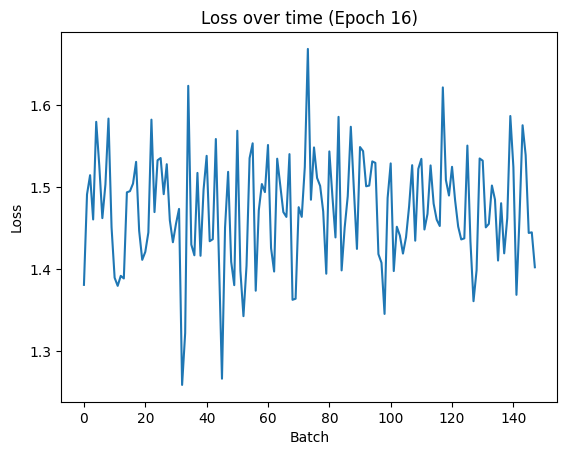

 85%|████████▌ | 17/20 [1:58:32<20:56, 418.88s/it]
0it [00:00, ?it/s]
1it [00:03,  3.22s/it]
2it [00:05,  2.90s/it]
3it [00:08,  2.77s/it]
4it [00:11,  2.72s/it]
5it [00:14,  2.96s/it]
6it [00:17,  2.99s/it]
7it [00:20,  2.87s/it]
8it [00:22,  2.80s/it]
9it [00:25,  2.73s/it]
10it [00:28,  2.93s/it]

[Epoch: 18, Batch:    10] loss: 1.495



11it [00:31,  2.93s/it]
12it [00:34,  2.84s/it]
13it [00:36,  2.77s/it]
14it [00:39,  2.71s/it]
15it [00:43,  2.94s/it]
16it [00:45,  2.94s/it]
17it [00:48,  2.83s/it]
18it [00:51,  2.77s/it]
19it [00:53,  2.73s/it]
20it [00:57,  2.98s/it]

[Epoch: 18, Batch:    20] loss: 1.443



21it [01:00,  2.95s/it]
22it [01:03,  2.92s/it]
23it [01:05,  2.83s/it]
24it [01:08,  2.77s/it]
25it [01:11,  3.01s/it]
26it [01:14,  2.93s/it]
27it [01:17,  2.83s/it]
28it [01:19,  2.77s/it]
29it [01:22,  2.75s/it]
30it [01:26,  3.00s/it]

[Epoch: 18, Batch:    30] loss: 1.490



31it [01:28,  2.92s/it]
32it [01:31,  2.83s/it]
33it [01:34,  2.77s/it]
34it [01:36,  2.76s/it]
35it [01:40,  3.01s/it]
36it [01:43,  2.88s/it]
37it [01:45,  2.80s/it]
38it [01:48,  2.74s/it]
39it [01:51,  2.77s/it]
40it [01:54,  3.01s/it]

[Epoch: 18, Batch:    40] loss: 1.441



41it [01:57,  2.90s/it]
42it [01:59,  2.80s/it]
43it [02:02,  2.74s/it]
44it [02:05,  2.78s/it]
45it [02:08,  2.97s/it]
46it [02:11,  2.84s/it]
47it [02:13,  2.76s/it]
48it [02:16,  2.71s/it]
49it [02:19,  2.77s/it]
50it [02:22,  3.00s/it]

[Epoch: 18, Batch:    50] loss: 1.440



51it [02:25,  2.89s/it]
52it [02:28,  2.81s/it]
53it [02:30,  2.75s/it]
54it [02:33,  2.81s/it]
55it [02:37,  2.99s/it]
56it [02:39,  2.87s/it]
57it [02:42,  2.80s/it]
58it [02:45,  2.75s/it]
59it [02:48,  2.83s/it]
60it [02:51,  2.99s/it]

[Epoch: 18, Batch:    60] loss: 1.465



61it [02:54,  2.88s/it]
62it [02:56,  2.81s/it]
63it [02:59,  2.74s/it]
64it [03:02,  2.82s/it]
65it [03:05,  3.04s/it]
66it [03:08,  2.91s/it]
67it [03:10,  2.81s/it]
68it [03:13,  2.74s/it]
69it [03:16,  2.87s/it]
70it [03:19,  2.96s/it]

[Epoch: 18, Batch:    70] loss: 1.461



71it [03:22,  2.86s/it]
72it [03:25,  2.80s/it]
73it [03:28,  3.04s/it]
74it [03:32,  3.23s/it]
75it [03:35,  3.13s/it]
76it [03:38,  2.98s/it]
77it [03:40,  2.87s/it]
78it [03:43,  2.79s/it]
79it [03:46,  3.03s/it]
80it [03:49,  2.96s/it]

[Epoch: 18, Batch:    80] loss: 1.504



81it [03:52,  2.87s/it]
82it [03:54,  2.79s/it]
83it [03:57,  2.73s/it]
84it [04:01,  2.98s/it]
85it [04:03,  2.93s/it]
86it [04:06,  2.83s/it]
87it [04:09,  2.77s/it]
88it [04:11,  2.72s/it]
89it [04:15,  2.99s/it]
90it [04:17,  2.90s/it]

[Epoch: 18, Batch:    90] loss: 1.489



91it [04:20,  2.81s/it]
92it [04:23,  2.75s/it]
93it [04:25,  2.74s/it]
94it [04:29,  3.02s/it]
95it [04:32,  2.93s/it]
96it [04:34,  2.84s/it]
97it [04:37,  2.77s/it]
98it [04:40,  2.80s/it]
99it [04:43,  3.03s/it]
100it [04:46,  2.89s/it]

[Epoch: 18, Batch:   100] loss: 1.481



101it [04:49,  2.81s/it]
102it [04:51,  2.75s/it]
103it [04:54,  2.80s/it]
104it [04:58,  3.01s/it]
105it [05:00,  2.88s/it]
106it [05:03,  2.80s/it]
107it [05:05,  2.74s/it]
108it [05:08,  2.78s/it]
109it [05:12,  3.06s/it]
110it [05:15,  2.96s/it]

[Epoch: 18, Batch:   110] loss: 1.464



111it [05:17,  2.85s/it]
112it [05:20,  2.77s/it]
113it [05:23,  2.77s/it]
114it [05:26,  3.01s/it]
115it [05:29,  2.89s/it]
116it [05:32,  2.81s/it]
117it [05:34,  2.74s/it]
118it [05:37,  2.78s/it]
119it [05:40,  2.97s/it]
120it [05:43,  2.85s/it]

[Epoch: 18, Batch:   120] loss: 1.499



121it [05:46,  2.77s/it]
122it [05:48,  2.72s/it]
123it [05:51,  2.77s/it]
124it [05:54,  2.97s/it]
125it [05:57,  2.86s/it]
126it [06:00,  2.79s/it]
127it [06:02,  2.77s/it]
128it [06:06,  2.86s/it]
129it [06:09,  3.03s/it]
130it [06:12,  2.92s/it]

[Epoch: 18, Batch:   130] loss: 1.461



131it [06:14,  2.85s/it]
132it [06:17,  2.77s/it]
133it [06:20,  2.85s/it]
134it [06:23,  3.00s/it]
135it [06:26,  2.87s/it]
136it [06:28,  2.81s/it]
137it [06:31,  2.75s/it]
138it [06:34,  2.90s/it]
139it [06:38,  3.00s/it]
140it [06:40,  2.88s/it]

[Epoch: 18, Batch:   140] loss: 1.478



141it [06:43,  2.80s/it]
142it [06:45,  2.74s/it]
143it [06:49,  2.86s/it]
144it [06:52,  2.98s/it]
145it [06:54,  2.87s/it]
146it [06:57,  2.78s/it]
147it [07:00,  2.73s/it]
148it [07:01,  2.85s/it]


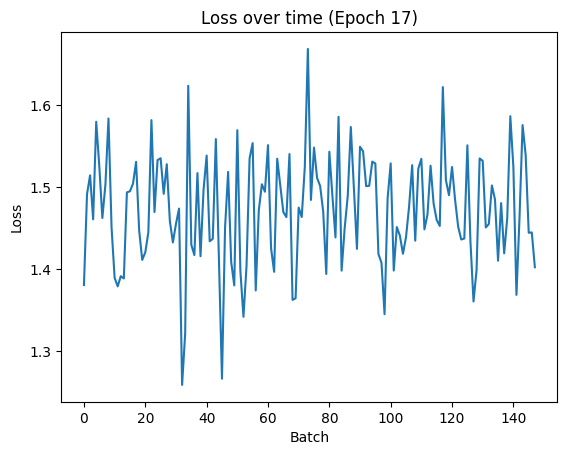

 90%|█████████ | 18/20 [2:05:34<13:59, 419.89s/it]
0it [00:00, ?it/s]
1it [00:03,  3.57s/it]
2it [00:06,  3.01s/it]
3it [00:08,  2.82s/it]
4it [00:11,  2.73s/it]
5it [00:14,  2.89s/it]
6it [00:17,  3.07s/it]
7it [00:20,  2.92s/it]
8it [00:23,  2.83s/it]
9it [00:25,  2.75s/it]
10it [00:28,  2.82s/it]

[Epoch: 19, Batch:    10] loss: 1.495



11it [00:32,  2.98s/it]
12it [00:34,  2.87s/it]
13it [00:37,  2.78s/it]
14it [00:39,  2.71s/it]
15it [00:42,  2.80s/it]
16it [00:46,  2.95s/it]
17it [00:48,  2.85s/it]
18it [00:51,  2.78s/it]
19it [00:53,  2.72s/it]
20it [00:57,  2.82s/it]

[Epoch: 19, Batch:    20] loss: 1.443



21it [01:00,  2.97s/it]
22it [01:02,  2.87s/it]
23it [01:05,  2.79s/it]
24it [01:08,  2.73s/it]
25it [01:11,  2.84s/it]
26it [01:14,  2.98s/it]
27it [01:17,  2.86s/it]
28it [01:19,  2.79s/it]
29it [01:22,  2.73s/it]
30it [01:25,  2.84s/it]

[Epoch: 19, Batch:    30] loss: 1.489



31it [01:28,  2.97s/it]
32it [01:31,  2.86s/it]
33it [01:33,  2.79s/it]
34it [01:36,  2.74s/it]
35it [01:39,  2.86s/it]
36it [01:43,  2.99s/it]
37it [01:45,  2.87s/it]
38it [01:48,  2.78s/it]
39it [01:50,  2.73s/it]
40it [01:53,  2.84s/it]

[Epoch: 19, Batch:    40] loss: 1.441



41it [01:57,  3.13s/it]
42it [02:00,  3.17s/it]
43it [02:03,  3.00s/it]
44it [02:06,  2.89s/it]
45it [02:09,  2.94s/it]
46it [02:12,  3.05s/it]
47it [02:15,  2.91s/it]
48it [02:17,  2.82s/it]
49it [02:20,  2.83s/it]
50it [02:23,  2.94s/it]

[Epoch: 19, Batch:    50] loss: 1.440



51it [02:26,  3.02s/it]
52it [02:29,  2.90s/it]
53it [02:32,  2.82s/it]
54it [02:34,  2.77s/it]
55it [02:38,  2.90s/it]
56it [02:41,  2.96s/it]
57it [02:43,  2.86s/it]
58it [02:46,  2.78s/it]
59it [02:49,  2.73s/it]
60it [02:52,  2.86s/it]

[Epoch: 19, Batch:    60] loss: 1.464



61it [02:55,  2.95s/it]
62it [02:57,  2.83s/it]
63it [03:00,  2.76s/it]
64it [03:03,  2.71s/it]
65it [03:06,  2.84s/it]
66it [03:09,  2.95s/it]
67it [03:12,  2.84s/it]
68it [03:14,  2.76s/it]
69it [03:17,  2.71s/it]
70it [03:20,  2.89s/it]

[Epoch: 19, Batch:    70] loss: 1.461



71it [03:23,  3.00s/it]
72it [03:26,  2.88s/it]
73it [03:28,  2.79s/it]
74it [03:31,  2.74s/it]
75it [03:34,  2.88s/it]
76it [03:37,  2.97s/it]
77it [03:40,  2.86s/it]
78it [03:43,  2.77s/it]
79it [03:45,  2.71s/it]
80it [03:48,  2.84s/it]

[Epoch: 19, Batch:    80] loss: 1.504



81it [03:52,  2.97s/it]
82it [03:54,  2.86s/it]
83it [03:57,  2.76s/it]
84it [03:59,  2.71s/it]
85it [04:02,  2.81s/it]
86it [04:06,  2.94s/it]
87it [04:08,  2.82s/it]
88it [04:11,  2.75s/it]
89it [04:13,  2.69s/it]
90it [04:16,  2.79s/it]

[Epoch: 19, Batch:    90] loss: 1.489



91it [04:20,  2.93s/it]
92it [04:22,  2.83s/it]
93it [04:25,  2.76s/it]
94it [04:28,  2.78s/it]
95it [04:31,  2.91s/it]
96it [04:34,  3.00s/it]
97it [04:37,  2.89s/it]
98it [04:39,  2.80s/it]
99it [04:42,  2.74s/it]
100it [04:45,  2.87s/it]

[Epoch: 19, Batch:   100] loss: 1.481



101it [04:48,  2.98s/it]
102it [04:51,  2.86s/it]
103it [04:53,  2.79s/it]
104it [04:56,  2.73s/it]
105it [04:59,  2.86s/it]
106it [05:03,  2.99s/it]
107it [05:05,  2.88s/it]
108it [05:08,  2.79s/it]
109it [05:10,  2.74s/it]
110it [05:14,  2.87s/it]

[Epoch: 19, Batch:   110] loss: 1.464



111it [05:17,  2.98s/it]
112it [05:19,  2.88s/it]
113it [05:22,  2.80s/it]
114it [05:25,  2.74s/it]
115it [05:28,  2.87s/it]
116it [05:31,  2.98s/it]
117it [05:34,  2.87s/it]
118it [05:36,  2.79s/it]
119it [05:39,  2.73s/it]
120it [05:42,  2.88s/it]

[Epoch: 19, Batch:   120] loss: 1.499



121it [05:45,  2.98s/it]
122it [05:48,  2.86s/it]
123it [05:50,  2.77s/it]
124it [05:53,  2.72s/it]
125it [05:56,  2.86s/it]
126it [05:59,  2.96s/it]
127it [06:02,  2.85s/it]
128it [06:05,  2.78s/it]
129it [06:07,  2.72s/it]
130it [06:10,  2.84s/it]

[Epoch: 19, Batch:   130] loss: 1.461



131it [06:14,  2.95s/it]
132it [06:16,  2.84s/it]
133it [06:19,  2.78s/it]
134it [06:21,  2.73s/it]
135it [06:25,  2.86s/it]
136it [06:28,  2.97s/it]
137it [06:31,  2.93s/it]
138it [06:33,  2.85s/it]
139it [06:36,  2.79s/it]
140it [06:39,  2.93s/it]

[Epoch: 19, Batch:   140] loss: 1.478



141it [06:42,  2.95s/it]
142it [06:45,  2.84s/it]
143it [06:47,  2.76s/it]
144it [06:50,  2.72s/it]
145it [06:53,  2.88s/it]
146it [06:56,  2.92s/it]
147it [06:59,  2.82s/it]
148it [07:00,  2.84s/it]


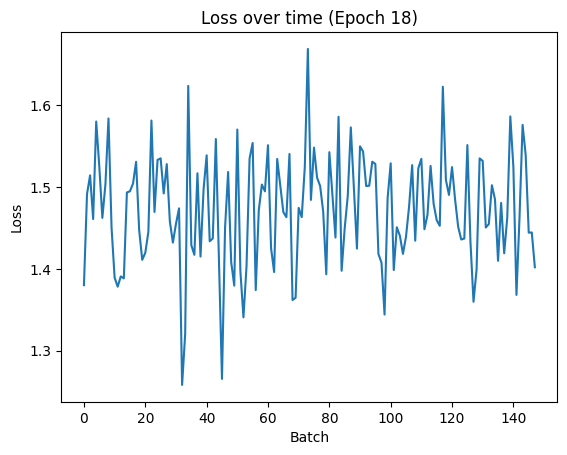

 95%|█████████▌| 19/20 [2:12:35<07:00, 420.29s/it]
0it [00:00, ?it/s]
1it [00:02,  2.61s/it]
2it [00:05,  2.86s/it]
3it [00:08,  3.02s/it]
4it [00:11,  2.84s/it]
5it [00:13,  2.74s/it]
6it [00:16,  2.69s/it]
7it [00:19,  2.79s/it]
8it [00:22,  2.96s/it]
9it [00:25,  2.86s/it]
10it [00:28,  2.78s/it]

[Epoch: 20, Batch:    10] loss: 1.495



11it [00:30,  2.72s/it]
12it [00:33,  2.86s/it]
13it [00:37,  2.98s/it]
14it [00:39,  2.88s/it]
15it [00:42,  2.79s/it]
16it [00:44,  2.73s/it]
17it [00:48,  2.85s/it]
18it [00:51,  2.98s/it]
19it [00:54,  2.88s/it]
20it [00:56,  2.87s/it]

[Epoch: 20, Batch:    20] loss: 1.442



21it [01:00,  3.07s/it]
22it [01:04,  3.22s/it]
23it [01:06,  3.09s/it]
24it [01:09,  2.94s/it]
25it [01:11,  2.83s/it]
26it [01:14,  2.76s/it]
27it [01:18,  3.01s/it]
28it [01:20,  2.95s/it]
29it [01:23,  2.84s/it]
30it [01:26,  2.77s/it]

[Epoch: 20, Batch:    30] loss: 1.489



31it [01:28,  2.72s/it]
32it [01:32,  2.97s/it]
33it [01:35,  3.00s/it]
34it [01:37,  2.88s/it]
35it [01:40,  2.81s/it]
36it [01:43,  2.78s/it]
37it [01:46,  3.02s/it]
38it [01:49,  2.94s/it]
39it [01:52,  2.82s/it]
40it [01:54,  2.76s/it]

[Epoch: 20, Batch:    40] loss: 1.440



41it [01:57,  2.75s/it]
42it [02:01,  3.00s/it]
43it [02:03,  2.89s/it]
44it [02:06,  2.82s/it]
45it [02:09,  2.76s/it]
46it [02:11,  2.80s/it]
47it [02:15,  3.00s/it]
48it [02:17,  2.88s/it]
49it [02:20,  2.80s/it]
50it [02:23,  2.74s/it]

[Epoch: 20, Batch:    50] loss: 1.440



51it [02:26,  2.80s/it]
52it [02:29,  2.98s/it]
53it [02:32,  2.86s/it]
54it [02:34,  2.79s/it]
55it [02:37,  2.75s/it]
56it [02:40,  2.82s/it]
57it [02:43,  2.99s/it]
58it [02:46,  2.86s/it]
59it [02:48,  2.79s/it]
60it [02:51,  2.74s/it]

[Epoch: 20, Batch:    60] loss: 1.464



61it [02:54,  2.83s/it]
62it [02:57,  2.97s/it]
63it [03:00,  2.86s/it]
64it [03:03,  2.78s/it]
65it [03:05,  2.73s/it]
66it [03:08,  2.82s/it]
67it [03:12,  2.95s/it]
68it [03:14,  2.85s/it]
69it [03:17,  2.77s/it]
70it [03:19,  2.72s/it]

[Epoch: 20, Batch:    70] loss: 1.460



71it [03:22,  2.84s/it]
72it [03:26,  2.96s/it]
73it [03:28,  2.86s/it]
74it [03:31,  2.78s/it]
75it [03:34,  2.74s/it]
76it [03:37,  2.96s/it]
77it [03:40,  3.07s/it]
78it [03:43,  2.93s/it]
79it [03:45,  2.82s/it]
80it [03:48,  2.74s/it]

[Epoch: 20, Batch:    80] loss: 1.504



81it [03:51,  2.83s/it]
82it [03:54,  2.98s/it]
83it [03:57,  2.86s/it]
84it [04:00,  2.78s/it]
85it [04:02,  2.73s/it]
86it [04:05,  2.84s/it]
87it [04:09,  2.97s/it]
88it [04:11,  2.86s/it]
89it [04:14,  2.78s/it]
90it [04:16,  2.72s/it]

[Epoch: 20, Batch:    90] loss: 1.489



91it [04:19,  2.84s/it]
92it [04:23,  2.95s/it]
93it [04:25,  2.84s/it]
94it [04:28,  2.77s/it]
95it [04:31,  2.73s/it]
96it [04:34,  2.88s/it]
97it [04:37,  3.00s/it]
98it [04:40,  2.88s/it]
99it [04:42,  2.80s/it]
100it [04:45,  2.73s/it]

[Epoch: 20, Batch:   100] loss: 1.481



101it [04:48,  2.87s/it]
102it [04:51,  2.99s/it]
103it [04:54,  2.88s/it]
104it [04:57,  2.80s/it]
105it [04:59,  2.72s/it]
106it [05:02,  2.83s/it]
107it [05:05,  2.95s/it]
108it [05:08,  2.85s/it]
109it [05:11,  2.77s/it]
110it [05:13,  2.71s/it]

[Epoch: 20, Batch:   110] loss: 1.463



111it [05:16,  2.82s/it]
112it [05:19,  2.96s/it]
113it [05:22,  2.84s/it]
114it [05:25,  2.77s/it]
115it [05:27,  2.72s/it]
116it [05:30,  2.85s/it]
117it [05:34,  2.95s/it]
118it [05:36,  2.86s/it]
119it [05:39,  2.79s/it]
120it [05:42,  2.82s/it]

[Epoch: 20, Batch:   120] loss: 1.498



121it [05:45,  2.94s/it]
122it [05:48,  2.98s/it]
123it [05:51,  2.86s/it]
124it [05:53,  2.79s/it]
125it [05:56,  2.75s/it]
126it [05:59,  2.89s/it]
127it [06:02,  2.94s/it]
128it [06:05,  2.83s/it]
129it [06:07,  2.76s/it]
130it [06:10,  2.72s/it]

[Epoch: 20, Batch:   130] loss: 1.461



131it [06:13,  2.86s/it]
132it [06:16,  2.92s/it]
133it [06:19,  2.83s/it]
134it [06:21,  2.75s/it]
135it [06:24,  2.70s/it]
136it [06:27,  2.85s/it]
137it [06:30,  2.90s/it]
138it [06:33,  2.81s/it]
139it [06:35,  2.75s/it]
140it [06:38,  2.71s/it]

[Epoch: 20, Batch:   140] loss: 1.478



141it [06:41,  2.90s/it]
142it [06:44,  2.94s/it]
143it [06:47,  2.97s/it]
144it [06:51,  3.08s/it]
145it [06:54,  3.00s/it]
146it [06:57,  3.18s/it]
147it [07:00,  3.01s/it]
148it [07:02,  2.85s/it]


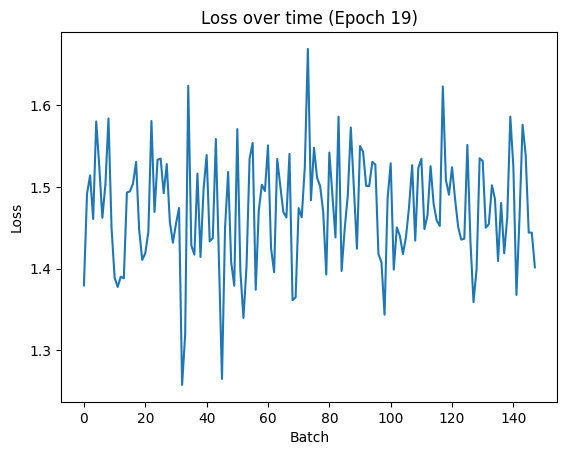

100%|██████████| 20/20 [2:19:37<00:00, 418.89s/it]


In [ ]:
# train the model for multiple epochs
epochs = 20
for epoch in tqdm(range(epochs)):
    train(model, train_loader, optimizer, epoch)
    scheduler.step()

In [ ]:
test(model, device, test_loader)

100%|██████████| 37/37 [00:44<00:00,  1.19s/it]


Test set: Average loss: 0.0459, Accuracy: 436/1181 (37%)



# Third model - CNN with forward forward algorithm (2D convolution layer)

In [ ]:
#Assuming you run the first part of preparation of the data, and you have final_data_cut data_frame
from PIL import Image
import os
from tqdm import tqdm

mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N': 4,'M':4,'R':4, 'Y':4,'W':4,'S':4,'K':4,'B':4,'D':4,'H':4,'V':4,'F':4}

for label in tqdm(final_data_cut.label.unique()):
  # Specify the directory path to save the arrays
  directory_path = '/content/saved_images/'+label
  # Create the directory if it doesn't exist
  os.makedirs(directory_path, exist_ok=True)
  for i,sequence in enumerate(final_data_cut.loc[final_data_cut["label"]==label,'Sequence']):
    seq = np.zeros((30255,5))
    for index,val in enumerate(sequence):
      seq[index,mapping[val]] = 255

    im = Image.fromarray(seq)
    im = im.convert("L")
    txt = "{name}.png"
    im.save(os.path.join(directory_path,txt.format(name=i)))


100%|██████████| 5/5 [02:57<00:00, 35.57s/it]


In [ ]:
import os
from sklearn.model_selection import train_test_split
from shutil import copyfile

# Set the path to your dataset directory
dataset_dir = '/content/saved_images'

# Get a list of all label folders
label_folders = [label for label in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, label))]

# Create lists to store image paths and labels
all_image_paths = []
all_labels = []

# Iterate through label folders
for label in label_folders:
    label_dir = os.path.join(dataset_dir, label)
    image_paths = [os.path.join(label_dir, img) for img in os.listdir(label_dir)]
    all_image_paths.extend(image_paths)
    all_labels.extend([label] * len(image_paths))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_image_paths, all_labels, test_size=0.2, random_state=42)

# Create directories for train and test sets
train_dir = '/content/train'
test_dir = '/content/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy images to train directory
for src_path, label in zip(X_train, y_train):
    dst_path = os.path.join(train_dir, label, os.path.basename(src_path))
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    copyfile(src_path, dst_path)

# Copy images to test directory
for src_path, label in zip(X_test, y_test):
    dst_path = os.path.join(test_dir, label, os.path.basename(src_path))
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    copyfile(src_path, dst_path)


In [ ]:
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda

bs = 32

transforms=torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),
                                           torchvision.transforms.ToTensor(),
                                           Normalize((0.1307,), (0.3081,)),
                                           Lambda(lambda x: torch.flatten(x)),
                                           ])


train_dataset = ImageFolder("/content/train",transform=transforms)
train_loader = DataLoader(train_dataset,batch_size=bs)

test_dataset = ImageFolder("/content/test",transform=transforms)
test_loader = DataLoader(test_dataset,batch_size=bs)


In [ ]:
import shutil

# Specify the path to the folder you want to delete
folder_to_delete = 'saved_images'  # Change this to the actual folder name

# Use shutil.rmtree() to delete the folder and its contents
shutil.rmtree(folder_to_delete)

In [ ]:
import argparse
import torch
import torch.nn as nn
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda
from torch.utils.data import DataLoader
from torch.optim import Adam

threshold = 2
epochs = 20
lr = 0.01
log_interval = 10

def get_y_neg(y):
    y_neg = y.clone()
    for idx, y_samp in enumerate(y):
        allowed_indices = list(range(10))
        allowed_indices.remove(y_samp.item())
        y_neg[idx] = torch.tensor(allowed_indices)[
            torch.randint(len(allowed_indices), size=(1,))
        ].item()
    return y_neg.to(device)

def overlay_y_on_x(x, y):
    x_ = x.clone()
    x_[:] *= 0.0  # Clear existing values
    x_[range(x.shape[0]), y] = x.max()
    return x_

class Net(torch.nn.Module):
    def __init__(self, dims):

        super().__init__()
        self.layers = []
        for d in range(len(dims) - 1):
            self.layers = self.layers + [Layer(dims[d], dims[d + 1]).to(device)]

    def predict(self, x):
        goodness_per_label = []
        for label in range(10):
            h = overlay_y_on_x(x, label)
            goodness = []
            for layer in self.layers:
                h = layer(h)
                goodness = goodness + [h.pow(2).mean(1)]
            goodness_per_label += [sum(goodness).unsqueeze(1)]
        goodness_per_label = torch.cat(goodness_per_label, 1)
        return goodness_per_label.argmax(1)

    def train(self, x_pos, x_neg):
        h_pos, h_neg = x_pos, x_neg
        for i, layer in enumerate(self.layers):
            print("training layer: ", i)
            h_pos, h_neg = layer.train(h_pos, h_neg)


class Layer(nn.Linear):
    def __init__(self, in_features, out_features, bias=True, device=None, dtype=None):
        super().__init__(in_features, out_features, bias, device, dtype)
        self.conv1d = nn.Conv1d(in_features, out_features, kernel_size=3, stride=1, padding=1)
        self.relu = torch.nn.ReLU()
        self.opt = Adam(self.parameters(), lr=lr)
      # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
      # weight_decay=1e-4
        self.threshold = threshold
        self.num_epochs = epochs

    def forward(self, x):
        x_direction = x / (x.norm(2, 1, keepdim=True) + 1e-4)
        x_conv = self.conv1d(x_direction.unsqueeze(2))
        x_conv = x_conv.squeeze(2)
        return self.relu(x_conv)

    def train(self, x_pos, x_neg):
        for i in range(self.num_epochs):
            g_pos = self.forward(x_pos).pow(2).mean(1)
            g_neg = self.forward(x_neg).pow(2).mean(1)
            loss = torch.log(
                1
                + torch.exp(
                    torch.cat([-g_pos + self.threshold, g_neg - self.threshold])
                )
            ).mean()
            self.opt.zero_grad()
            loss.backward()
            self.opt.step()
            if i % log_interval == 0:
                print("Loss: ", loss.item())
        return self.forward(x_pos).detach(), self.forward(x_neg).detach()


In [ ]:
import torch
import torch.backends.mps  # Importing the MPS backend if needed
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define parameters - some parameters are defined in the Net class
use_cuda = torch.cuda.is_available()
use_mps = torch.backends.mps.is_available()
train_size = 50000
test_size = 10000
save_model = False


# Set device
if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# Data preprocessing
transform = Compose(
    [
        ToTensor(),
        Normalize((0.1307,), (0.3081,)),
        Lambda(lambda x: torch.flatten(x)),
    ]
)

# Load data
train_kwargs = {"batch_size": train_size}
test_kwargs = {"batch_size": test_size}

if use_cuda:
    cuda_kwargs = {"num_workers": 1, "pin_memory": True, "shuffle": True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)


# Define the new image size
image_size = (30255, 5)

# Update input size and hidden layer sizes based on new image size
input_size = image_size[0] * image_size[1]
hidden_sizes = [500, 500]  # Adjust as needed

# Instantiate the neural network model
net = Net([151275, 500, 500])

# Training loop
for epoch in tqdm(range(epochs)):
    for batch_idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x_pos = overlay_y_on_x(x, y)
        y_neg = get_y_neg(y)
        # print(x.shape)
        # print(type(x))
        x_neg = overlay_y_on_x(x, y_neg)
        net.train(x_pos, x_neg)

        if batch_idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]".format(
                    epoch,
                    batch_idx * len(x),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                )
            )





  0%|          | 0/20 [00:00<?, ?it/s]
0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269277334213257
Loss:  1.1198723316192627
training layer:  1



1it [00:12, 12.61s/it]

Loss:  1.1268398761749268
Loss:  0.7706390619277954
Train Epoch: 0 [0/4724 (0%)]
training layer:  0
Loss:  1.0939418077468872
Loss:  1.042710304260254
training layer:  1



2it [00:17,  7.89s/it]

Loss:  0.738267183303833
Loss:  0.6986792087554932
training layer:  0
Loss:  0.9619690179824829
Loss:  0.8511840105056763
training layer:  1



3it [00:21,  6.32s/it]

Loss:  0.6662981510162354
Loss:  0.6561893224716187
training layer:  0
Loss:  0.7154030203819275
Loss:  0.5666489601135254
training layer:  1



4it [00:26,  5.58s/it]

Loss:  0.6513681411743164
Loss:  0.6429758071899414
training layer:  0
Loss:  0.4238658547401428
Loss:  0.3057902753353119
training layer:  1



5it [00:30,  5.18s/it]

Loss:  0.6316977739334106
Loss:  0.6231944561004639
training layer:  0
Loss:  0.22194810211658478
Loss:  0.16870459914207458
training layer:  1



6it [00:35,  4.97s/it]

Loss:  0.6284552812576294
Loss:  0.6221698522567749
training layer:  0
Loss:  0.1365942656993866
Loss:  0.11700557917356491
training layer:  1



7it [00:39,  4.80s/it]

Loss:  0.6969134211540222
Loss:  0.6561163067817688
training layer:  0
Loss:  0.10464033484458923
Loss:  0.09637362509965897
training layer:  1



8it [00:44,  4.69s/it]

Loss:  0.548524796962738
Loss:  0.5405430197715759
training layer:  0
Loss:  0.09059078991413116
Loss:  0.08634845912456512
training layer:  1



9it [00:48,  4.65s/it]

Loss:  0.6653106212615967
Loss:  0.6501343846321106
training layer:  0
Loss:  0.08312539011240005
Loss:  0.08059434592723846
training layer:  1



10it [00:53,  4.59s/it]

Loss:  0.7058277130126953
Loss:  0.6940807700157166
training layer:  0
Loss:  0.07857348024845123
Loss:  0.07690843939781189
training layer:  1



11it [00:57,  4.56s/it]

Loss:  0.5116059184074402
Loss:  0.4720839560031891
Train Epoch: 0 [320/4724 (7%)]
training layer:  0
Loss:  0.07552964985370636
Loss:  0.07436671108007431
training layer:  1



12it [01:02,  4.56s/it]

Loss:  0.6443140506744385
Loss:  0.6275784969329834
training layer:  0
Loss:  0.07337555289268494
Loss:  0.07252311706542969
training layer:  1



13it [01:06,  4.53s/it]

Loss:  0.6752669811248779
Loss:  0.662913978099823
training layer:  0
Loss:  0.07178431749343872
Loss:  0.07113650441169739
training layer:  1



14it [01:11,  4.52s/it]

Loss:  0.5957809686660767
Loss:  0.589495062828064
training layer:  0
Loss:  0.07056748867034912
Loss:  0.07006131112575531
training layer:  1



15it [01:15,  4.53s/it]

Loss:  0.5566516518592834
Loss:  0.5475567579269409
training layer:  0
Loss:  0.06961169093847275
Loss:  0.06920835375785828
training layer:  1



16it [01:20,  4.51s/it]

Loss:  0.507513165473938
Loss:  0.49994957447052
training layer:  0
Loss:  0.06884622573852539
Loss:  0.06851845979690552
training layer:  1



17it [01:24,  4.50s/it]

Loss:  0.7121493816375732
Loss:  0.6740511655807495
training layer:  0
Loss:  0.06822164356708527
Loss:  0.06795123219490051
training layer:  1



18it [01:29,  4.50s/it]

Loss:  0.9293019771575928
Loss:  0.7323914766311646
training layer:  0
Loss:  0.06770457327365875
Loss:  0.0674784928560257
training layer:  1



19it [01:33,  4.52s/it]

Loss:  0.6681219339370728
Loss:  0.6615434885025024
training layer:  0
Loss:  0.06727108359336853
Loss:  0.06707978248596191
training layer:  1



20it [01:38,  4.50s/it]

Loss:  0.5873607397079468
Loss:  0.5735609531402588
training layer:  0
Loss:  0.066903255879879
Loss:  0.06673988699913025
training layer:  1



21it [01:42,  4.50s/it]

Loss:  0.644715428352356
Loss:  0.6330677270889282
Train Epoch: 0 [640/4724 (14%)]
training layer:  0
Loss:  0.06658877432346344
Loss:  0.06644776463508606
training layer:  1



22it [01:47,  4.52s/it]

Loss:  0.5862972736358643
Loss:  0.5807082056999207
training layer:  0
Loss:  0.06631666421890259
Loss:  0.0661943107843399
training layer:  1



23it [01:51,  4.51s/it]

Loss:  0.7180722951889038
Loss:  0.701056957244873
training layer:  0
Loss:  0.0660799890756607
Loss:  0.0659729391336441
training layer:  1



24it [01:56,  4.50s/it]

Loss:  0.6482515931129456
Loss:  0.6305140256881714
training layer:  0
Loss:  0.06587253510951996
Loss:  0.06577829271554947
training layer:  1



25it [02:00,  4.53s/it]

Loss:  0.6256821751594543
Loss:  0.6259931325912476
training layer:  0
Loss:  0.06568960845470428
Loss:  0.06560614705085754
training layer:  1



26it [02:05,  4.51s/it]

Loss:  0.6223093271255493
Loss:  0.6187925338745117
training layer:  0
Loss:  0.06552747637033463
Loss:  0.06545309722423553
training layer:  1



27it [02:09,  4.50s/it]

Loss:  0.5790284872055054
Loss:  0.574326753616333
training layer:  0
Loss:  0.06538283824920654
Loss:  0.06531631201505661
training layer:  1



28it [02:14,  4.53s/it]

Loss:  0.531342625617981
Loss:  0.5218825936317444
training layer:  0
Loss:  0.06525333225727081
Loss:  0.0651935264468193
training layer:  1



29it [02:18,  4.52s/it]

Loss:  0.6161507368087769
Loss:  0.5983284711837769
training layer:  0
Loss:  0.2186063975095749
Loss:  0.21731577813625336
training layer:  1



30it [02:23,  4.50s/it]

Loss:  0.41398411989212036
Loss:  0.20684951543807983
training layer:  0
Loss:  1.6217632293701172
Loss:  1.5468260049819946
training layer:  1



31it [02:27,  4.50s/it]

Loss:  1.7132190465927124
Loss:  1.175512433052063
Train Epoch: 0 [960/4724 (20%)]
training layer:  0
Loss:  1.3361642360687256
Loss:  1.2809064388275146
training layer:  1



32it [02:32,  4.52s/it]

Loss:  1.1270411014556885
Loss:  1.1269280910491943
training layer:  0
Loss:  1.213958740234375
Loss:  1.195338249206543
training layer:  1



33it [02:36,  4.51s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.220306158065796
Loss:  1.2021431922912598
training layer:  1



34it [02:41,  4.51s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.2343189716339111
Loss:  1.2079625129699707
training layer:  1



35it [02:45,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1469190120697021
Loss:  1.1431999206542969
training layer:  1



36it [02:50,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.150977373123169
Loss:  1.1486246585845947
training layer:  1



37it [02:54,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



38it [02:59,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1413726806640625
Loss:  1.1408416032791138
training layer:  1



39it [03:03,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1334812641143799
Loss:  1.1331489086151123
training layer:  1



40it [03:08,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1418659687042236
Loss:  1.141053557395935
training layer:  1



41it [03:13,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [1280/4724 (27%)]
training layer:  0
Loss:  1.134816288948059
Loss:  1.1343355178833008
training layer:  1



42it [03:17,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1316194534301758
Loss:  1.1314334869384766
training layer:  1



43it [03:22,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.140008568763733
Loss:  1.1393355131149292
training layer:  1



44it [03:26,  4.51s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1346242427825928
Loss:  1.1341300010681152
training layer:  1



45it [03:31,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1337319612503052
Loss:  1.1333832740783691
training layer:  1



46it [03:35,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1361353397369385
Loss:  1.1356102228164673
training layer:  1



47it [03:40,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1323442459106445
Loss:  1.132035493850708
training layer:  1



48it [03:44,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.133002519607544
Loss:  1.1327030658721924
training layer:  1



49it [03:49,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1324057579040527
Loss:  1.132122278213501
training layer:  1



50it [03:53,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1318557262420654
Loss:  1.1316059827804565
training layer:  1



51it [03:58,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [1600/4724 (34%)]
training layer:  0
Loss:  1.1313722133636475
Loss:  1.1311529874801636
training layer:  1



52it [04:02,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1285357475280762
Loss:  1.128476858139038
training layer:  1



53it [04:07,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1284375190734863
Loss:  1.128405213356018
training layer:  1



54it [04:11,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.129099726676941
Loss:  1.1290491819381714
training layer:  1



55it [04:16,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



56it [04:20,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.128947377204895
Loss:  1.1289193630218506
training layer:  1



57it [04:25,  4.52s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.130817174911499
Loss:  1.1306676864624023
training layer:  1



58it [04:30,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1292959451675415
Loss:  1.129185438156128
training layer:  1



59it [04:34,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1280107498168945
Loss:  1.1279771327972412
training layer:  1



60it [04:39,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1294898986816406
Loss:  1.1294090747833252
training layer:  1



61it [04:43,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [1920/4724 (41%)]
training layer:  0
Loss:  1.1297829151153564
Loss:  1.129645824432373
training layer:  1



62it [04:48,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1286447048187256
Loss:  1.1285645961761475
training layer:  1



63it [04:52,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.128498911857605
Loss:  1.1284396648406982
training layer:  1



64it [04:57,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.12801992893219
Loss:  1.1279841661453247
training layer:  1



65it [05:01,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



66it [05:06,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.127929925918579
Loss:  1.1279163360595703
training layer:  1



67it [05:11,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1282161474227905
Loss:  1.1281780004501343
training layer:  1



68it [05:15,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.127833366394043
Loss:  1.1278042793273926
training layer:  1



69it [05:20,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1280620098114014
Loss:  1.1280255317687988
training layer:  1



70it [05:24,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1274574995040894
Loss:  1.1274421215057373
training layer:  1



71it [05:29,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [2240/4724 (47%)]
training layer:  0
Loss:  1.1274306774139404
Loss:  1.1274206638336182
training layer:  1



72it [05:33,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1281359195709229
Loss:  1.1280992031097412
training layer:  1



73it [05:38,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1278265714645386
Loss:  1.1277897357940674
training layer:  1



74it [05:42,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1281702518463135
Loss:  1.1281135082244873
training layer:  1



75it [05:47,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.127863883972168
Loss:  1.1278159618377686
training layer:  1



76it [05:51,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1272659301757812
Loss:  1.1272536516189575
training layer:  1



77it [05:56,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1275627613067627
Loss:  1.1275444030761719
training layer:  1



78it [06:01,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1273741722106934
Loss:  1.127359390258789
training layer:  1



79it [06:05,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1276252269744873
Loss:  1.1275992393493652
training layer:  1



80it [06:10,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1273128986358643
Loss:  1.1272978782653809
training layer:  1



81it [06:14,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [2560/4724 (54%)]
training layer:  0
Loss:  1.127166509628296
Loss:  1.1271601915359497
training layer:  1



82it [06:19,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.127155065536499
Loss:  1.1271504163742065
training layer:  1



83it [06:23,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1271460056304932
Loss:  1.1271417140960693
training layer:  1



84it [06:28,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1274511814117432
Loss:  1.127434492111206
training layer:  1



85it [06:32,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1270248889923096
Loss:  1.1270219087600708
training layer:  1



86it [06:37,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1272964477539062
Loss:  1.1272871494293213
training layer:  1



87it [06:42,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.127274513244629
Loss:  1.1272609233856201
training layer:  1



88it [06:46,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1273274421691895
Loss:  1.1273094415664673
training layer:  1



89it [06:51,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1274354457855225
Loss:  1.1274054050445557
training layer:  1



90it [06:55,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1272457838058472
Loss:  1.1272258758544922
training layer:  1



91it [07:00,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [2880/4724 (61%)]
training layer:  0
Loss:  1.1270405054092407
Loss:  1.1270358562469482
training layer:  1



92it [07:04,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1272419691085815
Loss:  1.12722909450531
training layer:  1



93it [07:09,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.12711763381958
Loss:  1.1271076202392578
training layer:  1



94it [07:13,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1270564794540405
Loss:  1.1270513534545898
training layer:  1



95it [07:18,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1270469427108765
Loss:  1.1270428895950317
training layer:  1



96it [07:23,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1270761489868164
Loss:  1.1270705461502075
training layer:  1



97it [07:27,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.12706458568573
Loss:  1.1270586252212524
training layer:  1



98it [07:32,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1270840167999268
Loss:  1.127076268196106
training layer:  1



99it [07:36,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1270122528076172
Loss:  1.1270081996917725
training layer:  1



100it [07:41,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1270051002502441
Loss:  1.127002477645874
training layer:  1



101it [07:45,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [3200/4724 (68%)]
training layer:  0
Loss:  1.1270475387573242
Loss:  1.127042293548584
training layer:  1



102it [07:50,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.12699294090271
Loss:  1.1269899606704712
training layer:  1



103it [07:54,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269478797912598
Loss:  1.1269474029541016
training layer:  1



104it [07:59,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269848346710205
Loss:  1.1269835233688354
training layer:  1



105it [08:03,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269638538360596
Loss:  1.1269627809524536
training layer:  1



106it [08:08,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269956827163696
Loss:  1.1269932985305786
training layer:  1



107it [08:13,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269593238830566
Loss:  1.1269581317901611
training layer:  1



108it [08:17,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269571781158447
Loss:  1.1269564628601074
training layer:  1



109it [08:22,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126983404159546
Loss:  1.1269813776016235
training layer:  1



110it [08:26,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126978874206543
Loss:  1.126976490020752
training layer:  1



111it [08:31,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [3520/4724 (74%)]
training layer:  0
Loss:  1.1269739866256714
Loss:  1.12697172164917
training layer:  1



112it [08:35,  4.53s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269590854644775
Loss:  1.126957654953003
training layer:  1



113it [08:40,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269752979278564
Loss:  1.1269729137420654
training layer:  1



114it [08:44,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126944899559021
Loss:  1.1269440650939941
training layer:  1



115it [08:49,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269590854644775
Loss:  1.1269577741622925
training layer:  1



116it [08:54,  4.59s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269562244415283
Loss:  1.1269547939300537
training layer:  1



117it [08:58,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126953363418579
Loss:  1.1269519329071045
training layer:  1



118it [09:03,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269338130950928
Loss:  1.1269335746765137
training layer:  1



119it [09:07,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269387006759644
Loss:  1.1269384622573853
training layer:  1



120it [09:12,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269382238388062
Loss:  1.1269378662109375
training layer:  1



121it [09:16,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269423961639404
Loss:  1.1269419193267822
training layer:  1



122it [09:21,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126936912536621
Loss:  1.126936674118042
training layer:  1



123it [09:26,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269404888153076
Loss:  1.1269400119781494
training layer:  1



124it [09:30,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269357204437256
Loss:  1.1269354820251465
training layer:  1



125it [09:35,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269387006759644
Loss:  1.1269383430480957
training layer:  1



126it [09:39,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269378662109375
Loss:  1.1269373893737793
training layer:  1



127it [09:44,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126945972442627
Loss:  1.126944899559021
training layer:  1



128it [09:48,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269357204437256
Loss:  1.1269352436065674
training layer:  1



129it [09:53,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269371509552002
Loss:  1.126936674118042
training layer:  1



130it [09:57,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269381046295166
Loss:  1.1269373893737793
training layer:  1



131it [10:02,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269350051879883
Loss:  1.12693452835083
training layer:  1



132it [10:06,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126929521560669
Loss:  1.126929521560669
training layer:  1



133it [10:11,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269404888153076
Loss:  1.1269396543502808
training layer:  1



134it [10:16,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269314289093018
Loss:  1.1269311904907227
training layer:  1



135it [10:20,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269298791885376
training layer:  1



136it [10:25,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269307136535645
Loss:  1.126930594444275
training layer:  1



137it [10:29,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269304752349854
Loss:  1.1269303560256958
training layer:  1



138it [10:34,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269309520721436
Loss:  1.1269307136535645
training layer:  1



139it [10:38,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269325017929077
Loss:  1.1269320249557495
training layer:  1



140it [10:43,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269304752349854
training layer:  1



141it [10:47,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 0 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269298791885376
training layer:  1



142it [10:52,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269299983978271
training layer:  1



143it [10:57,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269294023513794
Loss:  1.1269292831420898
training layer:  1



144it [11:01,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



145it [11:06,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269294023513794
Loss:  1.1269292831420898
training layer:  1



146it [11:10,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



147it [11:15,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.126928687095642
Loss:  1.1269285678863525
training layer:  1



148it [11:19,  4.59s/it]
  5%|▌         | 1/20 [11:19<3:35:17, 679.87s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1268932819366455
Loss:  1.126773476600647
training layer:  1



1it [00:04,  4.59s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 1 [0/4724 (0%)]
training layer:  0
Loss:  1.1255704164505005
Loss:  1.1146906614303589
training layer:  1



2it [00:09,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.0273061990737915
Loss:  0.632286548614502
training layer:  1



3it [00:13,  4.54s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.15997713804244995
Loss:  0.07530088722705841
training layer:  1



4it [00:18,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.0672202855348587
Loss:  0.0656992569565773
training layer:  1



5it [00:22,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06521862000226974
Loss:  0.06500403583049774
training layer:  1



6it [00:27,  4.55s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.0648772194981575
Loss:  0.06478496640920639
training layer:  1



7it [00:31,  4.58s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06470925360918045
Loss:  0.06464333832263947
training layer:  1



8it [00:36,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06458432227373123
Loss:  0.06453052163124084
training layer:  1



9it [00:41,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06448154896497726
Loss:  0.06443630158901215
training layer:  1



10it [00:45,  4.58s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06439466029405594
Loss:  0.06435610353946686
training layer:  1



11it [00:50,  4.56s/it]

Loss:  1.1270911693572998
Loss:  1.1270393133163452
Train Epoch: 1 [320/4724 (7%)]
training layer:  0
Loss:  0.06432028859853745
Loss:  0.0642869621515274
training layer:  1



12it [00:54,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06425590813159943
Loss:  0.06422679871320724
training layer:  1



13it [00:59,  4.58s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06419960409402847
Loss:  0.06417406350374222
training layer:  1



14it [01:03,  4.58s/it]

Loss:  1.1406569480895996
Loss:  1.1304807662963867
training layer:  0
Loss:  0.06415002048015594
Loss:  0.06412734091281891
training layer:  1



15it [01:08,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06410597264766693
Loss:  0.06408578902482986
training layer:  1



16it [01:13,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.0640667974948883
Loss:  0.06404858082532883
training layer:  1



17it [01:17,  4.58s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06403137743473053
Loss:  0.06401506066322327
training layer:  1



18it [01:22,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06399951875209808
Loss:  0.0639846995472908
training layer:  1



19it [01:26,  4.56s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06397058814764023
Loss:  0.06395712494850159
training layer:  1



20it [01:31,  4.58s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.0639442652463913
Loss:  0.06393194198608398
training layer:  1



21it [01:35,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
Train Epoch: 1 [640/4724 (14%)]
training layer:  0
Loss:  0.06392018496990204
Loss:  0.0639088898897171
training layer:  1



22it [01:40,  4.57s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06389805674552917
Loss:  0.06388769298791885
training layer:  1



23it [01:45,  4.62s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06387774646282196
Loss:  0.06386815756559372
training layer:  1



24it [01:49,  4.65s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06385892629623413
Loss:  0.0638500526547432
training layer:  1



25it [01:54,  4.62s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06384153664112091
Loss:  0.0638333186507225
training layer:  1



26it [01:59,  4.60s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06382539123296738
Loss:  0.06381770968437195
training layer:  1



27it [02:03,  4.61s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06381035596132278
Loss:  0.06380324065685272
training layer:  1



28it [02:08,  4.59s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.06379632651805878
Loss:  0.06378965824842453
training layer:  1



29it [02:12,  4.59s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  0.13022983074188232
Loss:  0.1302240788936615
training layer:  1



30it [02:17,  4.60s/it]

Loss:  1.1269280910491943
Loss:  1.060149908065796
training layer:  0
Loss:  1.5811210870742798
Loss:  1.4834027290344238
training layer:  1



31it [02:21,  4.58s/it]

Loss:  0.9214209318161011
Loss:  0.6390902996063232
Train Epoch: 1 [960/4724 (20%)]
training layer:  0
Loss:  1.3034873008728027
Loss:  1.0397238731384277
training layer:  1



32it [02:26,  4.57s/it]

Loss:  0.7843892574310303
Loss:  0.7871454358100891
training layer:  0
Loss:  0.6562913656234741
Loss:  0.34343835711479187
training layer:  1



33it [02:31,  4.59s/it]

Loss:  0.48215919733047485
Loss:  0.4719617962837219
training layer:  0
Loss:  0.22616155445575714
Loss:  0.17970600724220276
training layer:  1



34it [02:35,  4.57s/it]

Loss:  0.342406690120697
Loss:  0.28109312057495117
training layer:  0
Loss:  0.13354206085205078
Loss:  0.11947629600763321
training layer:  1



35it [02:40,  4.56s/it]

Loss:  0.22690090537071228
Loss:  0.21046528220176697
training layer:  0
Loss:  0.11061481386423111
Loss:  0.10437960177659988
training layer:  1



36it [02:44,  4.56s/it]

Loss:  0.2046915590763092
Loss:  0.19935932755470276
training layer:  0
Loss:  0.09966150671243668
Loss:  0.09592128545045853
training layer:  1



37it [02:49,  4.58s/it]

Loss:  0.19743132591247559
Loss:  0.19352853298187256
training layer:  0
Loss:  0.09942179918289185
Loss:  0.09595470130443573
training layer:  1



38it [02:53,  4.57s/it]

Loss:  0.2220357209444046
Loss:  0.2168225198984146
training layer:  0
Loss:  0.08244417607784271
Loss:  0.08099372684955597
training layer:  1



39it [02:58,  4.56s/it]

Loss:  0.16100165247917175
Loss:  0.15874046087265015
training layer:  0
Loss:  0.08439004421234131
Loss:  0.08313413709402084
training layer:  1



40it [03:03,  4.58s/it]

Loss:  0.18462306261062622
Loss:  0.1825963258743286
training layer:  0
Loss:  0.06967519223690033
Loss:  0.06912287324666977
training layer:  1



41it [03:07,  4.56s/it]

Loss:  0.0998578667640686
Loss:  0.09586334228515625
Train Epoch: 1 [1280/4724 (27%)]
training layer:  0
Loss:  0.08073987066745758
Loss:  0.08016382157802582
training layer:  1



42it [03:12,  4.56s/it]

Loss:  0.18442434072494507
Loss:  0.18435999751091003
training layer:  0
Loss:  0.0755358636379242
Loss:  0.07497996836900711
training layer:  1



43it [03:16,  4.59s/it]

Loss:  0.1519712507724762
Loss:  0.15074151754379272
training layer:  0
Loss:  0.07449811697006226
Loss:  0.0740615576505661
training layer:  1



44it [03:21,  4.57s/it]

Loss:  0.15077811479568481
Loss:  0.14982819557189941
training layer:  0
Loss:  0.07365858554840088
Loss:  0.0732831358909607
training layer:  1



45it [03:25,  4.56s/it]

Loss:  0.14993178844451904
Loss:  0.14905676245689392
training layer:  0
Loss:  0.06988498568534851
Loss:  0.06965731829404831
training layer:  1



46it [03:30,  4.58s/it]

Loss:  0.11970523744821548
Loss:  0.1186922937631607
training layer:  0
Loss:  0.07536035776138306
Loss:  0.07498455792665482
training layer:  1



47it [03:35,  4.56s/it]

Loss:  0.18022620677947998
Loss:  0.178913414478302
training layer:  0
Loss:  0.07177996635437012
Loss:  0.07147571444511414
training layer:  1



48it [03:39,  4.56s/it]

Loss:  0.14814132452011108
Loss:  0.1472877860069275
training layer:  0
Loss:  0.07624319195747375
Loss:  0.07568395137786865
training layer:  1



49it [03:44,  4.55s/it]

Loss:  0.20425592362880707
Loss:  0.20067891478538513
training layer:  0
Loss:  0.07281322777271271
Loss:  0.07238762080669403
training layer:  1



50it [03:48,  4.57s/it]

Loss:  0.17335215210914612
Loss:  0.17196941375732422
training layer:  0
Loss:  0.07004284858703613
Loss:  0.0698259174823761
training layer:  1



51it [03:53,  4.56s/it]

Loss:  0.14856767654418945
Loss:  0.1472802460193634
Train Epoch: 1 [1600/4724 (34%)]
training layer:  0
Loss:  0.07334765791893005
Loss:  0.07299047708511353
training layer:  1



52it [03:57,  4.56s/it]

Loss:  0.19735324382781982
Loss:  0.19592449069023132
training layer:  0
Loss:  0.07425818592309952
Loss:  0.07370007038116455
training layer:  1



53it [04:02,  4.58s/it]

Loss:  0.21991364657878876
Loss:  0.21527749300003052
training layer:  0
Loss:  0.07022443413734436
Loss:  0.06995107978582382
training layer:  1



54it [04:07,  4.57s/it]

Loss:  0.17253625392913818
Loss:  0.17175093293190002
training layer:  0
Loss:  0.07104505598545074
Loss:  0.070772185921669
training layer:  1



55it [04:11,  4.57s/it]

Loss:  0.1930856555700302
Loss:  0.1920659840106964
training layer:  0
Loss:  0.07530350983142853
Loss:  0.07459253072738647
training layer:  1



56it [04:16,  4.59s/it]

Loss:  0.2822553217411041
Loss:  0.2719930410385132
training layer:  0
Loss:  0.07075806707143784
Loss:  0.07035480439662933
training layer:  1



57it [04:20,  4.57s/it]

Loss:  0.21444077789783478
Loss:  0.2140101045370102
training layer:  0
Loss:  0.07090017199516296
Loss:  0.07055441290140152
training layer:  1



58it [04:25,  4.56s/it]

Loss:  0.23226159811019897
Loss:  0.23075132071971893
training layer:  0
Loss:  0.06946611404418945
Loss:  0.06921693682670593
training layer:  1



59it [04:29,  4.58s/it]

Loss:  0.21458494663238525
Loss:  0.21324479579925537
training layer:  0
Loss:  0.07103029638528824
Loss:  0.07065965235233307
training layer:  1



60it [04:34,  4.56s/it]

Loss:  0.27313748002052307
Loss:  0.2691592574119568
training layer:  0
Loss:  1.2287967205047607
Loss:  1.2163066864013672
training layer:  1



61it [04:39,  4.56s/it]

Loss:  1.1473417282104492
Loss:  1.139153003692627
Train Epoch: 1 [1920/4724 (41%)]
training layer:  0
Loss:  1.3934077024459839
Loss:  1.3319635391235352
training layer:  1



62it [04:43,  4.58s/it]

Loss:  1.2204563617706299
Loss:  1.2051193714141846
training layer:  0
Loss:  1.1986956596374512
Loss:  1.1789076328277588
training layer:  1



63it [04:48,  4.57s/it]

Loss:  1.155631422996521
Loss:  1.1511613130569458
training layer:  0
Loss:  1.167710781097412
Loss:  1.1603813171386719
training layer:  1



64it [04:52,  4.56s/it]

Loss:  1.148390769958496
Loss:  1.1462678909301758
training layer:  0
Loss:  1.2114897966384888
Loss:  1.1921371221542358
training layer:  1



65it [04:57,  4.55s/it]

Loss:  1.1882808208465576
Loss:  1.1804554462432861
training layer:  0
Loss:  1.1348206996917725
Loss:  1.1333433389663696
training layer:  1



66it [05:01,  4.58s/it]

Loss:  1.1309895515441895
Loss:  1.1301342248916626
training layer:  0
Loss:  1.1559276580810547
Loss:  1.1526610851287842
training layer:  1



67it [05:06,  4.56s/it]

Loss:  1.1572080850601196
Loss:  1.1546748876571655
training layer:  0
Loss:  1.1357669830322266
Loss:  1.1347944736480713
training layer:  1



68it [05:10,  4.56s/it]

Loss:  1.13412344455719
Loss:  1.1331331729888916
training layer:  0
Loss:  1.1414841413497925
Loss:  1.1403182744979858
training layer:  1



69it [05:15,  4.59s/it]

Loss:  1.1425915956497192
Loss:  1.1412628889083862
training layer:  0
Loss:  1.1330307722091675
Loss:  1.1325862407684326
training layer:  1



70it [05:20,  4.57s/it]

Loss:  1.1306604146957397
Loss:  1.1299257278442383
training layer:  0
Loss:  1.1376049518585205
Loss:  1.1369273662567139
training layer:  1



71it [05:24,  4.57s/it]

Loss:  1.137728214263916
Loss:  1.1366690397262573
Train Epoch: 1 [2240/4724 (47%)]
training layer:  0
Loss:  1.1315569877624512
Loss:  1.131274938583374
training layer:  1



72it [05:29,  4.59s/it]

Loss:  1.127936840057373
Loss:  1.1272153854370117
training layer:  0
Loss:  1.1372969150543213
Loss:  1.1366560459136963
training layer:  1



73it [05:33,  4.58s/it]

Loss:  1.137005090713501
Loss:  1.1357753276824951
training layer:  0
Loss:  1.13410222530365
Loss:  1.1335642337799072
training layer:  1



74it [05:38,  4.57s/it]

Loss:  1.13120436668396
Loss:  1.1299843788146973
training layer:  0
Loss:  1.1300208568572998
Loss:  1.129859209060669
training layer:  1



75it [05:43,  4.59s/it]

Loss:  1.1230708360671997
Loss:  1.1221765279769897
training layer:  0
Loss:  1.129748821258545
Loss:  1.129654884338379
training layer:  1



76it [05:47,  4.58s/it]

Loss:  1.121140956878662
Loss:  1.1201434135437012
training layer:  0
Loss:  1.1282496452331543
Loss:  1.1282175779342651
training layer:  1



77it [05:52,  4.60s/it]

Loss:  1.1164956092834473
Loss:  1.1153618097305298
training layer:  0
Loss:  1.1269298791885376
Loss:  1.126929759979248
training layer:  1



78it [05:56,  4.62s/it]

Loss:  1.1114916801452637
Loss:  1.1101124286651611
training layer:  0
Loss:  1.1331634521484375
Loss:  1.1329686641693115
training layer:  1



79it [06:01,  4.60s/it]

Loss:  1.1225653886795044
Loss:  1.1209450960159302
training layer:  0
Loss:  1.130347490310669
Loss:  1.1301617622375488
training layer:  1



80it [06:06,  4.58s/it]

Loss:  1.1133617162704468
Loss:  1.111453890800476
training layer:  0
Loss:  1.133094072341919
Loss:  1.1327310800552368
training layer:  1



81it [06:10,  4.57s/it]

Loss:  1.117071270942688
Loss:  1.1146138906478882
Train Epoch: 1 [2560/4724 (54%)]
training layer:  0
Loss:  1.130519151687622
Loss:  1.1302857398986816
training layer:  1



82it [06:15,  4.59s/it]

Loss:  1.1075446605682373
Loss:  1.1050288677215576
training layer:  0
Loss:  1.1300972700119019
Loss:  1.1299326419830322
training layer:  1



83it [06:19,  4.57s/it]

Loss:  1.1027653217315674
Loss:  1.1000770330429077
training layer:  0
Loss:  1.1290701627731323
Loss:  1.128975510597229
training layer:  1



84it [06:24,  4.57s/it]

Loss:  1.0946340560913086
Loss:  1.09165358543396
training layer:  0
Loss:  1.127585530281067
Loss:  1.1275675296783447
training layer:  1



85it [06:28,  4.59s/it]

Loss:  1.0843193531036377
Loss:  1.0809569358825684
training layer:  0
Loss:  1.1300603151321411
Loss:  1.129956603050232
training layer:  1



86it [06:33,  4.57s/it]

Loss:  1.0864582061767578
Loss:  1.0828028917312622
training layer:  0
Loss:  1.1292321681976318
Loss:  1.1291162967681885
training layer:  1



87it [06:38,  4.57s/it]

Loss:  1.0760219097137451
Loss:  1.0718967914581299
training layer:  0
Loss:  1.1290123462677002
Loss:  1.128915786743164
training layer:  1



88it [06:42,  4.58s/it]

Loss:  1.0672283172607422
Loss:  1.0626978874206543
training layer:  0
Loss:  1.128351092338562
Loss:  1.1282930374145508
training layer:  1



89it [06:47,  4.57s/it]

Loss:  1.0562489032745361
Loss:  1.0514042377471924
training layer:  0
Loss:  1.1282439231872559
Loss:  1.128198504447937
training layer:  1



90it [06:51,  4.56s/it]

Loss:  1.0459284782409668
Loss:  1.04071044921875
training layer:  0
Loss:  1.1273374557495117
Loss:  1.1273274421691895
training layer:  1



91it [06:56,  4.59s/it]

Loss:  1.0336650609970093
Loss:  1.0282847881317139
Train Epoch: 1 [2880/4724 (61%)]
training layer:  0
Loss:  1.1288907527923584
Loss:  1.1288301944732666
training layer:  1



92it [07:00,  4.57s/it]

Loss:  1.0299596786499023
Loss:  1.0243396759033203
training layer:  0
Loss:  1.1283798217773438
Loss:  1.128311038017273
training layer:  1



93it [07:05,  4.56s/it]

Loss:  1.014206886291504
Loss:  1.0080657005310059
training layer:  0
Loss:  1.1279184818267822
Loss:  1.1278789043426514
training layer:  1



94it [07:10,  4.56s/it]

Loss:  1.0018815994262695
Loss:  0.9956574440002441
training layer:  0
Loss:  1.1284570693969727
Loss:  1.1283923387527466
training layer:  1



95it [07:14,  4.58s/it]

Loss:  0.9902774095535278
Loss:  0.9836212992668152
training layer:  0
Loss:  1.127762794494629
Loss:  1.1277263164520264
training layer:  1



96it [07:19,  4.57s/it]

Loss:  0.9773249626159668
Loss:  0.9708055853843689
training layer:  0
Loss:  1.1282099485397339
Loss:  1.1281554698944092
training layer:  1



97it [07:23,  4.57s/it]

Loss:  0.966334879398346
Loss:  0.9596191048622131
training layer:  0
Loss:  1.1276280879974365
Loss:  1.1275978088378906
training layer:  1



98it [07:28,  4.59s/it]

Loss:  0.9510979056358337
Loss:  0.9444531202316284
training layer:  0
Loss:  1.1273584365844727
Loss:  1.1273459196090698
training layer:  1



99it [07:32,  4.58s/it]

Loss:  0.9358396530151367
Loss:  0.9291819334030151
training layer:  0
Loss:  1.1279467344284058
Loss:  1.1279106140136719
training layer:  1



100it [07:37,  4.57s/it]

Loss:  0.9299342632293701
Loss:  0.9233512878417969
training layer:  0
Loss:  1.1271154880523682
Loss:  1.127109169960022
training layer:  1



101it [07:42,  4.58s/it]

Loss:  0.9088784456253052
Loss:  0.9023634791374207
Train Epoch: 1 [3200/4724 (68%)]
training layer:  0
Loss:  1.1272830963134766
Loss:  1.1272766590118408
training layer:  1



102it [07:46,  4.57s/it]

Loss:  0.8961350917816162
Loss:  0.8895388245582581
training layer:  0
Loss:  1.1279520988464355
Loss:  1.1279125213623047
training layer:  1



103it [07:51,  4.57s/it]

Loss:  0.8893662691116333
Loss:  0.882646918296814
training layer:  0
Loss:  1.1270833015441895
Loss:  1.1270771026611328
training layer:  1



104it [07:55,  4.59s/it]

Loss:  0.8679484128952026
Loss:  0.8615014553070068
training layer:  0
Loss:  1.1273651123046875
Loss:  1.1273547410964966
training layer:  1



105it [08:00,  4.57s/it]

Loss:  0.8631557822227478
Loss:  0.8570389151573181
training layer:  0
Loss:  1.127204179763794
Loss:  1.1271967887878418
training layer:  1



106it [08:04,  4.57s/it]

Loss:  0.8490735292434692
Loss:  0.8431634902954102
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



107it [08:09,  4.59s/it]

Loss:  0.8357998132705688
Loss:  0.8300879001617432
training layer:  0
Loss:  1.1270568370819092
Loss:  1.1270561218261719
training layer:  1



108it [08:14,  4.58s/it]

Loss:  0.8239251375198364
Loss:  0.8183302879333496
training layer:  0
Loss:  1.1274349689483643
Loss:  1.127422571182251
training layer:  1



109it [08:18,  4.56s/it]

Loss:  0.8082687854766846
Loss:  0.8023865222930908
training layer:  0
Loss:  1.127047061920166
Loss:  1.1270437240600586
training layer:  1



110it [08:23,  4.56s/it]

Loss:  0.8017863035202026
Loss:  0.7964489459991455
training layer:  0
Loss:  1.1276094913482666
Loss:  1.12758469581604
training layer:  1



111it [08:27,  4.57s/it]

Loss:  0.786285936832428
Loss:  0.7804772853851318
Train Epoch: 1 [3520/4724 (74%)]
training layer:  0
Loss:  1.1271345615386963
Loss:  1.1271252632141113
training layer:  1



112it [08:32,  4.56s/it]

Loss:  0.7763874530792236
Loss:  0.7711427211761475
training layer:  0
Loss:  1.1274055242538452
Loss:  1.1273865699768066
training layer:  1



113it [08:36,  4.56s/it]

Loss:  0.7647956609725952
Loss:  0.7594895958900452
training layer:  0
Loss:  1.1271892786026
Loss:  1.127177357673645
training layer:  1



114it [08:41,  4.58s/it]

Loss:  0.7505432963371277
Loss:  0.7454497218132019
training layer:  0
Loss:  1.1272475719451904
Loss:  1.127234697341919
training layer:  1



115it [08:46,  4.56s/it]

Loss:  0.7461360692977905
Loss:  0.7413923740386963
training layer:  0
Loss:  1.1272211074829102
Loss:  1.1272077560424805
training layer:  1



116it [08:50,  4.56s/it]

Loss:  0.7409287691116333
Loss:  0.7366003394126892
training layer:  0
Loss:  1.1271281242370605
Loss:  1.1271198987960815
training layer:  1



117it [08:55,  4.58s/it]

Loss:  0.7308695316314697
Loss:  0.7268826365470886
training layer:  0
Loss:  1.1272356510162354
Loss:  1.1272218227386475
training layer:  1



118it [08:59,  4.56s/it]

Loss:  0.7260279655456543
Loss:  0.7221944332122803
training layer:  0
Loss:  1.1270391941070557
Loss:  1.1270344257354736
training layer:  1



119it [09:04,  4.56s/it]

Loss:  0.7046770453453064
Loss:  0.700885534286499
training layer:  0
Loss:  1.127289056777954
Loss:  1.1272709369659424
training layer:  1



120it [09:08,  4.58s/it]

Loss:  0.7039923071861267
Loss:  0.7001290917396545
training layer:  0
Loss:  1.1271555423736572
Loss:  1.1271398067474365
training layer:  1



121it [09:13,  4.57s/it]

Loss:  0.704098105430603
Loss:  0.7007726430892944
Train Epoch: 1 [3840/4724 (81%)]
training layer:  0
Loss:  1.127047061920166
Loss:  1.1270408630371094
training layer:  1



122it [09:18,  4.56s/it]

Loss:  0.6899486780166626
Loss:  0.6869443655014038
training layer:  0
Loss:  1.1270002126693726
Loss:  1.126997709274292
training layer:  1



123it [09:22,  4.59s/it]

Loss:  0.6997979879379272
Loss:  0.6974359750747681
training layer:  0
Loss:  1.1270296573638916
Loss:  1.1270265579223633
training layer:  1



124it [09:27,  4.58s/it]

Loss:  0.6847068071365356
Loss:  0.6823855042457581
training layer:  0
Loss:  1.1269598007202148
Loss:  1.126958966255188
training layer:  1



125it [09:31,  4.57s/it]

Loss:  0.6839851140975952
Loss:  0.6819190382957458
training layer:  0
Loss:  1.127079725265503
Loss:  1.1270747184753418
training layer:  1



126it [09:36,  4.57s/it]

Loss:  0.6593160629272461
Loss:  0.6568459272384644
training layer:  0
Loss:  1.126983642578125
Loss:  1.126981258392334
training layer:  1



127it [09:41,  4.59s/it]

Loss:  0.6576193571090698
Loss:  0.6553138494491577
training layer:  0
Loss:  1.1269795894622803
Loss:  1.1269781589508057
training layer:  1



128it [09:45,  4.58s/it]

Loss:  0.6798003911972046
Loss:  0.6782921552658081
training layer:  0
Loss:  1.126976728439331
Loss:  1.1269755363464355
training layer:  1



129it [09:50,  4.57s/it]

Loss:  0.670128583908081
Loss:  0.6688111424446106
training layer:  0
Loss:  1.1270437240600586
Loss:  1.1270389556884766
training layer:  1



130it [09:54,  4.59s/it]

Loss:  0.6563901305198669
Loss:  0.6548546552658081
training layer:  0
Loss:  1.126990795135498
Loss:  1.1269876956939697
training layer:  1



131it [09:59,  4.58s/it]

Loss:  0.6369924545288086
Loss:  0.6352477073669434
Train Epoch: 1 [4160/4724 (88%)]
training layer:  0
Loss:  1.1270040273666382
Loss:  1.1270005702972412
training layer:  1



132it [10:03,  4.60s/it]

Loss:  0.6418006420135498
Loss:  0.640225887298584
training layer:  0
Loss:  1.1270313262939453
Loss:  1.1270248889923096
training layer:  1



133it [10:08,  4.61s/it]

Loss:  0.6251552700996399
Loss:  0.6233915090560913
training layer:  0
Loss:  1.1269431114196777
Loss:  1.1269422769546509
training layer:  1



134it [10:13,  4.58s/it]

Loss:  0.6491128206253052
Loss:  0.6480997800827026
training layer:  0
Loss:  1.1269557476043701
Loss:  1.1269550323486328
training layer:  1



135it [10:17,  4.57s/it]

Loss:  0.6640342473983765
Loss:  0.663474977016449
training layer:  0
Loss:  1.1269805431365967
Loss:  1.1269786357879639
training layer:  1



136it [10:22,  4.60s/it]

Loss:  0.6318377256393433
Loss:  0.6309976577758789
training layer:  0
Loss:  1.126988172531128
Loss:  1.126984715461731
training layer:  1



137it [10:26,  4.58s/it]

Loss:  0.6390737295150757
Loss:  0.6382214426994324
training layer:  0
Loss:  1.1269810199737549
Loss:  1.126977562904358
training layer:  1



138it [10:31,  4.57s/it]

Loss:  0.6120097041130066
Loss:  0.6109057664871216
training layer:  0
Loss:  1.1269649267196655
Loss:  1.1269625425338745
training layer:  1



139it [10:35,  4.57s/it]

Loss:  0.6437410116195679
Loss:  0.6431152820587158
training layer:  0
Loss:  1.1269524097442627
Loss:  1.1269512176513672
training layer:  1



140it [10:40,  4.59s/it]

Loss:  0.6684438586235046
Loss:  0.6682409048080444
training layer:  0
Loss:  1.126964807510376
Loss:  1.1269629001617432
training layer:  1



141it [10:45,  4.58s/it]

Loss:  0.6336297988891602
Loss:  0.6332383751869202
Train Epoch: 1 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269605159759521
Loss:  1.1269582509994507
training layer:  1



142it [10:49,  4.57s/it]

Loss:  0.6327674388885498
Loss:  0.6322872638702393
training layer:  0
Loss:  1.126944899559021
Loss:  1.126943826675415
training layer:  1



143it [10:54,  4.59s/it]

Loss:  0.6400220394134521
Loss:  0.6397042274475098
training layer:  0
Loss:  1.1269431114196777
Loss:  1.1269423961639404
training layer:  1



144it [10:58,  4.57s/it]

Loss:  0.6394306421279907
Loss:  0.6391823887825012
training layer:  0
Loss:  1.1269416809082031
Loss:  1.126941204071045
training layer:  1



145it [11:03,  4.57s/it]

Loss:  0.6389524936676025
Loss:  0.638737678527832
training layer:  0
Loss:  1.1269322633743286
Loss:  1.126932144165039
training layer:  1



146it [11:08,  4.59s/it]

Loss:  0.6095788478851318
Loss:  0.609182596206665
training layer:  0
Loss:  1.1269320249557495
Loss:  1.12693190574646
training layer:  1



147it [11:12,  4.58s/it]

Loss:  0.6753810048103333
Loss:  0.6754058599472046
training layer:  0
Loss:  1.1269525289535522
Loss:  1.1269513368606567
training layer:  1



148it [11:17,  4.58s/it]
 10%|█         | 2/20 [22:37<3:23:29, 678.30s/it]

Loss:  0.6200323104858398
Loss:  0.6198370456695557



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269447803497314
Loss:  1.1269433498382568
training layer:  1



1it [00:04,  4.63s/it]

Loss:  1.3889224529266357
Loss:  1.3858518600463867
Train Epoch: 2 [0/4724 (0%)]
training layer:  0
Loss:  1.126941442489624
Loss:  1.126922845840454
training layer:  1



2it [00:09,  4.58s/it]

Loss:  1.3791000843048096
Loss:  1.3714786767959595
training layer:  0
Loss:  1.1265485286712646
Loss:  1.118819236755371
training layer:  1



3it [00:13,  4.57s/it]

Loss:  1.3724358081817627
Loss:  1.3648967742919922
training layer:  0
Loss:  1.009320616722107
Loss:  0.5723199248313904
training layer:  1



4it [00:18,  4.60s/it]

Loss:  1.3657512664794922
Loss:  1.358659029006958
training layer:  0
Loss:  0.1611219346523285
Loss:  0.07949892431497574
training layer:  1



5it [00:22,  4.59s/it]

Loss:  1.3213376998901367
Loss:  1.316056728363037
training layer:  0
Loss:  0.06922411918640137
Loss:  0.06697060912847519
training layer:  1



6it [00:27,  4.57s/it]

Loss:  1.3403929471969604
Loss:  1.3350120782852173
training layer:  0
Loss:  0.06620222330093384
Loss:  0.06583322584629059
training layer:  1



7it [00:32,  4.57s/it]

Loss:  1.3227672576904297
Loss:  1.317848801612854
training layer:  0
Loss:  0.06560473889112473
Loss:  0.06543619930744171
training layer:  1



8it [00:36,  4.60s/it]

Loss:  1.3132045269012451
Loss:  1.3087921142578125
training layer:  0
Loss:  0.06529559195041656
Loss:  0.06517812609672546
training layer:  1



9it [00:41,  4.57s/it]

Loss:  1.3234705924987793
Loss:  1.3188694715499878
training layer:  0
Loss:  0.06507682055234909
Loss:  0.06498479843139648
training layer:  1



10it [00:45,  4.57s/it]

Loss:  1.3022561073303223
Loss:  1.2982375621795654
training layer:  0
Loss:  0.06490109115839005
Loss:  0.06482630223035812
training layer:  1



11it [00:50,  4.59s/it]

Loss:  1.2201082706451416
Loss:  1.2173361778259277
Train Epoch: 2 [320/4724 (7%)]
training layer:  0
Loss:  0.06476004421710968
Loss:  0.06469786912202835
training layer:  1



12it [00:54,  4.58s/it]

Loss:  1.1834816932678223
Loss:  1.1827118396759033
training layer:  0
Loss:  0.06464032828807831
Loss:  0.0645877793431282
training layer:  1



13it [00:59,  4.57s/it]

Loss:  1.1726977825164795
Loss:  1.1722042560577393
training layer:  0
Loss:  0.06454010307788849
Loss:  0.06449533998966217
training layer:  1



14it [01:04,  4.59s/it]

Loss:  1.1407172679901123
Loss:  1.1403722763061523
training layer:  0
Loss:  0.06445141136646271
Loss:  0.06441286206245422
training layer:  1



15it [01:08,  4.58s/it]

Loss:  1.151047945022583
Loss:  1.1503002643585205
training layer:  0
Loss:  0.06438049674034119
Loss:  0.06434653699398041
training layer:  1



16it [01:13,  4.57s/it]

Loss:  1.1536803245544434
Loss:  1.153571367263794
training layer:  0
Loss:  0.06431388854980469
Loss:  0.06428420543670654
training layer:  1



17it [01:17,  4.59s/it]

Loss:  1.1375949382781982
Loss:  1.1375341415405273
training layer:  0
Loss:  0.06425634026527405
Loss:  0.0642300397157669
training layer:  1



18it [01:22,  4.57s/it]

Loss:  1.1638715267181396
Loss:  1.1637523174285889
training layer:  0
Loss:  0.06420492380857468
Loss:  0.06418153643608093
training layer:  1



19it [01:26,  4.56s/it]

Loss:  1.1480090618133545
Loss:  1.147794246673584
training layer:  0
Loss:  0.06416036933660507
Loss:  0.06413934379816055
training layer:  1



20it [01:31,  4.59s/it]

Loss:  1.1321535110473633
Loss:  1.1321396827697754
training layer:  0
Loss:  0.064119353890419
Loss:  0.06410031765699387
training layer:  1



21it [01:36,  4.58s/it]

Loss:  1.1476620435714722
Loss:  1.147620677947998
Train Epoch: 2 [640/4724 (14%)]
training layer:  0
Loss:  0.06408224999904633
Loss:  0.06406508386135101
training layer:  1



22it [01:40,  4.57s/it]

Loss:  1.1599581241607666
Loss:  1.1595017910003662
training layer:  0
Loss:  0.06404870003461838
Loss:  0.06403306126594543
training layer:  1



23it [01:45,  4.56s/it]

Loss:  1.1426935195922852
Loss:  1.1425812244415283
training layer:  0
Loss:  0.06401817500591278
Loss:  0.06400386989116669
training layer:  1



24it [01:49,  4.58s/it]

Loss:  1.1675419807434082
Loss:  1.1673736572265625
training layer:  0
Loss:  0.06399023532867432
Loss:  0.0639771819114685
training layer:  1



25it [01:54,  4.57s/it]

Loss:  1.1520724296569824
Loss:  1.151949167251587
training layer:  0
Loss:  0.06396439671516418
Loss:  0.06395238637924194
training layer:  1



26it [01:58,  4.56s/it]

Loss:  1.196686029434204
Loss:  1.1962192058563232
training layer:  0
Loss:  0.06394081562757492
Loss:  0.06392979621887207
training layer:  1



27it [02:03,  4.57s/it]

Loss:  1.1759686470031738
Loss:  1.1755386590957642
training layer:  0
Loss:  0.0639193207025528
Loss:  0.0639091283082962
training layer:  1



28it [02:08,  4.56s/it]

Loss:  1.1664948463439941
Loss:  1.1661477088928223
training layer:  0
Loss:  0.06389924138784409
Loss:  0.0638897716999054
training layer:  1



29it [02:12,  4.56s/it]

Loss:  1.1840083599090576
Loss:  1.1835827827453613
training layer:  0
Loss:  0.13032031059265137
Loss:  0.12964516878128052
training layer:  1



30it [02:17,  4.58s/it]

Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  0
Loss:  1.8891093730926514
Loss:  1.5876284837722778
training layer:  1



31it [02:21,  4.57s/it]

Loss:  1.2385212182998657
Loss:  1.2376341819763184
Train Epoch: 2 [960/4724 (20%)]
training layer:  0
Loss:  0.6580976247787476
Loss:  0.29657429456710815
training layer:  1



32it [02:26,  4.56s/it]

Loss:  1.2497037649154663
Loss:  1.2476006746292114
training layer:  0
Loss:  0.3460369408130646
Loss:  0.32082921266555786
training layer:  1



33it [02:31,  4.58s/it]

Loss:  1.2541438341140747
Loss:  1.251684546470642
training layer:  0
Loss:  0.36006322503089905
Loss:  0.3058467209339142
training layer:  1



34it [02:35,  4.57s/it]

Loss:  1.2450041770935059
Loss:  1.242712378501892
training layer:  0
Loss:  0.25337493419647217
Loss:  0.2118884027004242
training layer:  1



35it [02:40,  4.56s/it]

Loss:  1.2405188083648682
Loss:  1.238405704498291
training layer:  0
Loss:  0.18133458495140076
Loss:  0.1589556187391281
training layer:  1



36it [02:44,  4.56s/it]

Loss:  1.2363638877868652
Loss:  1.2343883514404297
training layer:  0
Loss:  0.12773001194000244
Loss:  0.11801011860370636
training layer:  1



37it [02:49,  4.58s/it]

Loss:  1.236244797706604
Loss:  1.2342970371246338
training layer:  0
Loss:  0.1435907483100891
Loss:  0.13182060420513153
training layer:  1



38it [02:53,  4.59s/it]

Loss:  1.2214752435684204
Loss:  1.219874620437622
training layer:  0
Loss:  0.07560738921165466
Loss:  0.0738300308585167
training layer:  1



39it [02:58,  4.58s/it]

Loss:  1.2394850254058838
Loss:  1.2375597953796387
training layer:  0
Loss:  0.09214428067207336
Loss:  0.09036243706941605
training layer:  1



40it [03:03,  4.60s/it]

Loss:  1.2253693342208862
Loss:  1.2236326932907104
training layer:  0
Loss:  0.08843281865119934
Loss:  0.08658301085233688
training layer:  1



41it [03:07,  4.58s/it]

Loss:  1.2219953536987305
Loss:  1.2204210758209229
Train Epoch: 2 [1280/4724 (27%)]
training layer:  0
Loss:  0.09580028057098389
Loss:  0.09294545650482178
training layer:  1



42it [03:12,  4.56s/it]

Loss:  1.2125533819198608
Loss:  1.211211919784546
training layer:  0
Loss:  0.08129119873046875
Loss:  0.0798756405711174
training layer:  1



43it [03:16,  4.58s/it]

Loss:  1.216089129447937
Loss:  1.2147305011749268
training layer:  0
Loss:  0.07877342402935028
Loss:  0.07783478498458862
training layer:  1



44it [03:21,  4.57s/it]

Loss:  1.213374137878418
Loss:  1.2120404243469238
training layer:  0
Loss:  0.07368503510951996
Loss:  0.07313430309295654
training layer:  1



45it [03:25,  4.56s/it]

Loss:  1.2136262655258179
Loss:  1.2122902870178223
training layer:  0
Loss:  0.07884335517883301
Loss:  0.07808241248130798
training layer:  1



46it [03:30,  4.58s/it]

Loss:  1.2053673267364502
Loss:  1.2041923999786377
training layer:  0
Loss:  0.07723274827003479
Loss:  0.07640902698040009
training layer:  1



47it [03:35,  4.57s/it]

Loss:  1.2030730247497559
Loss:  1.2019884586334229
training layer:  0
Loss:  0.07564443349838257
Loss:  0.07494349032640457
training layer:  1



48it [03:39,  4.57s/it]

Loss:  1.2009313106536865
Loss:  1.1998980045318604
training layer:  0
Loss:  0.07003216445446014
Loss:  0.06972524523735046
training layer:  1



49it [03:44,  4.59s/it]

Loss:  1.2040270566940308
Loss:  1.2029362916946411
training layer:  0
Loss:  0.07145634293556213
Loss:  0.07115539908409119
training layer:  1



50it [03:48,  4.59s/it]

Loss:  1.1993439197540283
Loss:  1.1983131170272827
training layer:  0
Loss:  0.07270724326372147
Loss:  0.07230481505393982
training layer:  1



51it [03:53,  4.58s/it]

Loss:  1.194887399673462
Loss:  1.1939598321914673
Train Epoch: 2 [1600/4724 (34%)]
training layer:  0
Loss:  0.0685170441865921
Loss:  0.06831416487693787
training layer:  1



52it [03:57,  4.56s/it]

Loss:  1.1977882385253906
Loss:  1.1968252658843994
training layer:  0
Loss:  0.07287865877151489
Loss:  0.07249379903078079
training layer:  1



53it [04:02,  4.58s/it]

Loss:  1.188965916633606
Loss:  1.1881417036056519
training layer:  0
Loss:  0.07202664017677307
Loss:  0.07155947387218475
training layer:  1



54it [04:07,  4.57s/it]

Loss:  1.1873631477355957
Loss:  1.1866087913513184
training layer:  0
Loss:  0.07362925261259079
Loss:  0.07298056036233902
training layer:  1



55it [04:11,  4.56s/it]

Loss:  1.1815054416656494
Loss:  1.1808561086654663
training layer:  0
Loss:  0.06802792102098465
Loss:  0.06780213862657547
training layer:  1



56it [04:16,  4.59s/it]

Loss:  1.188765525817871
Loss:  1.1880202293395996
training layer:  0
Loss:  0.0666632205247879
Loss:  0.06655241549015045
training layer:  1



57it [04:20,  4.57s/it]

Loss:  1.1893285512924194
Loss:  1.1885192394256592
training layer:  0
Loss:  0.06738069653511047
Loss:  0.06726682186126709
training layer:  1



58it [04:25,  4.56s/it]

Loss:  1.1856834888458252
Loss:  1.1849209070205688
training layer:  0
Loss:  0.06715045869350433
Loss:  0.06703642010688782
training layer:  1



59it [04:29,  4.59s/it]

Loss:  1.1841800212860107
Loss:  1.1834548711776733
training layer:  0
Loss:  0.06526009738445282
Loss:  0.065203458070755
training layer:  1



60it [04:34,  4.57s/it]

Loss:  1.1865930557250977
Loss:  1.1858255863189697
training layer:  0
Loss:  1.2581255435943604
Loss:  1.2338018417358398
training layer:  1



61it [04:39,  4.57s/it]

Loss:  0.8909862041473389
Loss:  0.8900004625320435
Train Epoch: 2 [1920/4724 (41%)]
training layer:  0
Loss:  1.4557318687438965
Loss:  1.3277682065963745
training layer:  1



62it [04:43,  4.58s/it]

Loss:  0.8649526238441467
Loss:  0.8596082925796509
training layer:  0
Loss:  1.2086682319641113
Loss:  1.1716740131378174
training layer:  1



63it [04:48,  4.57s/it]

Loss:  0.8475320339202881
Loss:  0.8411858081817627
training layer:  0
Loss:  1.1489105224609375
Loss:  1.1436762809753418
training layer:  1



64it [04:52,  4.55s/it]

Loss:  0.8502559661865234
Loss:  0.844562292098999
training layer:  0
Loss:  1.140899419784546
Loss:  1.1391017436981201
training layer:  1



65it [04:57,  4.55s/it]

Loss:  0.8391005992889404
Loss:  0.8337616920471191
training layer:  0
Loss:  1.1486314535140991
Loss:  1.1458156108856201
training layer:  1



66it [05:01,  4.57s/it]

Loss:  0.8209323883056641
Loss:  0.8154240846633911
training layer:  0
Loss:  1.1376655101776123
Loss:  1.1363074779510498
training layer:  1



67it [05:06,  4.56s/it]

Loss:  0.8152784705162048
Loss:  0.8100352883338928
training layer:  0
Loss:  1.137449026107788
Loss:  1.1364156007766724
training layer:  1



68it [05:10,  4.56s/it]

Loss:  0.802066445350647
Loss:  0.7969349026679993
training layer:  0
Loss:  1.1372005939483643
Loss:  1.1361608505249023
training layer:  1



69it [05:15,  4.58s/it]

Loss:  0.7888354063034058
Loss:  0.783719539642334
training layer:  0
Loss:  1.1338292360305786
Loss:  1.1331801414489746
training layer:  1



70it [05:20,  4.56s/it]

Loss:  0.7818652391433716
Loss:  0.7770121097564697
training layer:  0
Loss:  1.129217267036438
Loss:  1.1290767192840576
training layer:  1



71it [05:24,  4.56s/it]

Loss:  0.7824496626853943
Loss:  0.7782057523727417
Train Epoch: 2 [2240/4724 (47%)]
training layer:  0
Loss:  1.131047010421753
Loss:  1.1308584213256836
training layer:  1



72it [05:29,  4.58s/it]

Loss:  0.767021894454956
Loss:  0.7628519535064697
training layer:  0
Loss:  1.1297178268432617
Loss:  1.1295779943466187
training layer:  1



73it [05:33,  4.57s/it]

Loss:  0.7624732255935669
Loss:  0.7585545778274536
training layer:  0
Loss:  1.128615140914917
Loss:  1.1285521984100342
training layer:  1



74it [05:38,  4.57s/it]

Loss:  0.7586954832077026
Loss:  0.7551394701004028
training layer:  0
Loss:  1.1292885541915894
Loss:  1.1292078495025635
training layer:  1



75it [05:43,  4.59s/it]

Loss:  0.7476013898849487
Loss:  0.7441608905792236
training layer:  0
Loss:  1.1283897161483765
Loss:  1.1283397674560547
training layer:  1



76it [05:47,  4.58s/it]

Loss:  0.7450896501541138
Loss:  0.7419354915618896
training layer:  0
Loss:  1.1296685934066772
Loss:  1.129563808441162
training layer:  1



77it [05:52,  4.56s/it]

Loss:  0.7299371957778931
Loss:  0.7267553806304932
training layer:  0
Loss:  1.1288113594055176
Loss:  1.128726601600647
training layer:  1



78it [05:56,  4.58s/it]

Loss:  0.728280246257782
Loss:  0.7253402471542358
training layer:  0
Loss:  1.1280781030654907
Loss:  1.1280388832092285
training layer:  1



79it [06:01,  4.57s/it]

Loss:  0.7273907661437988
Loss:  0.7248104214668274
training layer:  0
Loss:  1.1290862560272217
Loss:  1.1290069818496704
training layer:  1



80it [06:05,  4.57s/it]

Loss:  0.7122558355331421
Loss:  0.7096463441848755
training layer:  0
Loss:  1.1284165382385254
Loss:  1.128352165222168
training layer:  1



81it [06:10,  4.56s/it]

Loss:  0.712303876876831
Loss:  0.7099242210388184
Train Epoch: 2 [2560/4724 (54%)]
training layer:  0
Loss:  1.1278401613235474
Loss:  1.1278102397918701
training layer:  1



82it [06:15,  4.59s/it]

Loss:  0.7130913734436035
Loss:  0.711053192615509
training layer:  0
Loss:  1.1290725469589233
Loss:  1.1289856433868408
training layer:  1



83it [06:19,  4.57s/it]

Loss:  0.6923004984855652
Loss:  0.6900885105133057
training layer:  0
Loss:  1.1280966997146606
Loss:  1.1280403137207031
training layer:  1



84it [06:24,  4.56s/it]

Loss:  0.6994600296020508
Loss:  0.6975491046905518
training layer:  0
Loss:  1.128706693649292
Loss:  1.1286227703094482
training layer:  1



85it [06:28,  4.58s/it]

Loss:  0.6838001012802124
Loss:  0.6818647384643555
training layer:  0
Loss:  1.1272484064102173
Loss:  1.127236008644104
training layer:  1



86it [06:33,  4.56s/it]

Loss:  0.704651951789856
Loss:  0.7032989263534546
training layer:  0
Loss:  1.1278318166732788
Loss:  1.1278092861175537
training layer:  1



87it [06:37,  4.56s/it]

Loss:  0.6894285678863525
Loss:  0.6881221532821655
training layer:  0
Loss:  1.1289188861846924
Loss:  1.1288131475448608
training layer:  1



88it [06:42,  4.58s/it]

Loss:  0.6607949733734131
Loss:  0.659048318862915
training layer:  0
Loss:  1.1276781558990479
Loss:  1.1276335716247559
training layer:  1



89it [06:46,  4.56s/it]

Loss:  0.684016227722168
Loss:  0.6827435493469238
training layer:  0
Loss:  1.1287267208099365
Loss:  1.1286163330078125
training layer:  1



90it [06:51,  4.56s/it]

Loss:  0.6472574472427368
Loss:  0.6456315517425537
training layer:  0
Loss:  1.1277040243148804
Loss:  1.1276497840881348
training layer:  1



91it [06:56,  4.59s/it]

Loss:  0.6721773147583008
Loss:  0.6710045337677002
Train Epoch: 2 [2880/4724 (61%)]
training layer:  0
Loss:  1.1274397373199463
Loss:  1.127416968345642
training layer:  1



92it [07:00,  4.61s/it]

Loss:  0.677243709564209
Loss:  0.6764321327209473
training layer:  0
Loss:  1.1273982524871826
Loss:  1.1273815631866455
training layer:  1



93it [07:05,  4.59s/it]

Loss:  0.6757031679153442
Loss:  0.6750279068946838
training layer:  0
Loss:  1.1275113821029663
Loss:  1.127488374710083
training layer:  1



94it [07:09,  4.58s/it]

Loss:  0.6668605804443359
Loss:  0.6661707758903503
training layer:  0
Loss:  1.1270620822906494
Loss:  1.1270577907562256
training layer:  1



95it [07:14,  4.59s/it]

Loss:  0.6885176301002502
Loss:  0.6881362199783325
training layer:  0
Loss:  1.1274374723434448
Loss:  1.1274230480194092
training layer:  1



96it [07:19,  4.58s/it]

Loss:  0.6644685864448547
Loss:  0.6639766097068787
training layer:  0
Loss:  1.1276408433914185
Loss:  1.1276025772094727
training layer:  1



97it [07:23,  4.57s/it]

Loss:  0.6476325392723083
Loss:  0.6469162106513977
training layer:  0
Loss:  1.127454400062561
Loss:  1.1274211406707764
training layer:  1



98it [07:28,  4.59s/it]

Loss:  0.6542250514030457
Loss:  0.653603196144104
training layer:  0
Loss:  1.1272988319396973
Loss:  1.1272785663604736
training layer:  1



99it [07:32,  4.57s/it]

Loss:  0.6612381339073181
Loss:  0.6608049869537354
training layer:  0
Loss:  1.1271779537200928
Loss:  1.1271672248840332
training layer:  1



100it [07:37,  4.56s/it]

Loss:  0.6687487363815308
Loss:  0.6684752702713013
training layer:  0
Loss:  1.1271579265594482
Loss:  1.1271495819091797
training layer:  1



101it [07:41,  4.58s/it]

Loss:  0.6682401895523071
Loss:  0.6680276393890381
Train Epoch: 2 [3200/4724 (68%)]
training layer:  0
Loss:  1.1269992589950562
Loss:  1.126997470855713
training layer:  1



102it [07:46,  4.56s/it]

Loss:  0.684862494468689
Loss:  0.6847826242446899
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



103it [07:51,  4.56s/it]

Loss:  0.6933010816574097
Loss:  0.6932806968688965
training layer:  0
Loss:  1.127197504043579
Loss:  1.1271917819976807
training layer:  1



104it [07:55,  4.55s/it]

Loss:  0.6588391065597534
Loss:  0.6587055921554565
training layer:  0
Loss:  1.1270548105239868
Loss:  1.1270503997802734
training layer:  1



105it [08:00,  4.57s/it]

Loss:  0.6758595705032349
Loss:  0.6757631301879883
training layer:  0
Loss:  1.1270469427108765
Loss:  1.1270438432693481
training layer:  1



106it [08:04,  4.56s/it]

Loss:  0.6756891012191772
Loss:  0.6756260395050049
training layer:  0
Loss:  1.127153754234314
Loss:  1.1271458864212036
training layer:  1



107it [08:09,  4.56s/it]

Loss:  0.6579854488372803
Loss:  0.6578512191772461
training layer:  0
Loss:  1.1270321607589722
Loss:  1.127028226852417
training layer:  1



108it [08:13,  4.58s/it]

Loss:  0.675420880317688
Loss:  0.675360918045044
training layer:  0
Loss:  1.1270252466201782
Loss:  1.127022624015808
training layer:  1



109it [08:18,  4.57s/it]

Loss:  0.6753191351890564
Loss:  0.675285279750824
training layer:  0
Loss:  1.1271584033966064
Loss:  1.127148985862732
training layer:  1



110it [08:23,  4.56s/it]

Loss:  0.6483807563781738
Loss:  0.6482405662536621
training layer:  0
Loss:  1.1270115375518799
Loss:  1.1270078420639038
training layer:  1



111it [08:27,  4.58s/it]

Loss:  0.6751517057418823
Loss:  0.6751133799552917
Train Epoch: 2 [3520/4724 (74%)]
training layer:  0
Loss:  1.127120852470398
Loss:  1.1271123886108398
training layer:  1



112it [08:32,  4.57s/it]

Loss:  0.6478389501571655
Loss:  0.6477233171463013
training layer:  0
Loss:  1.1270670890808105
Loss:  1.1270592212677002
training layer:  1



113it [08:36,  4.56s/it]

Loss:  0.6567227840423584
Loss:  0.6566200256347656
training layer:  0
Loss:  1.1271764039993286
Loss:  1.1271581649780273
training layer:  1



114it [08:41,  4.58s/it]

Loss:  0.6196343898773193
Loss:  0.6193060874938965
training layer:  0
Loss:  1.1270064115524292
Loss:  1.1270005702972412
training layer:  1



115it [08:45,  4.56s/it]

Loss:  0.6656053066253662
Loss:  0.665559709072113
training layer:  0
Loss:  1.1270196437835693
Loss:  1.1270151138305664
training layer:  1



116it [08:50,  4.56s/it]

Loss:  0.6561253070831299
Loss:  0.6560900211334229
training layer:  0
Loss:  1.1270105838775635
Loss:  1.12700617313385
training layer:  1



117it [08:55,  4.57s/it]

Loss:  0.6560541391372681
Loss:  0.6560201048851013
training layer:  0
Loss:  1.1269465684890747
Loss:  1.1269458532333374
training layer:  1



118it [08:59,  4.58s/it]

Loss:  0.6844816207885742
Loss:  0.6844871640205383
training layer:  0
Loss:  1.1269629001617432
Loss:  1.1269620656967163
training layer:  1



119it [09:04,  4.57s/it]

Loss:  0.6749800443649292
Loss:  0.6749749183654785
training layer:  0
Loss:  1.1270109415054321
Loss:  1.1270073652267456
training layer:  1



120it [09:08,  4.56s/it]

Loss:  0.6465592980384827
Loss:  0.6465330123901367
training layer:  0
Loss:  1.1269727945327759
Loss:  1.1269702911376953
training layer:  1



121it [09:13,  4.59s/it]

Loss:  0.6654819846153259
Loss:  0.6654736399650574
Train Epoch: 2 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269818544387817
Loss:  1.1269792318344116
training layer:  1



122it [09:17,  4.57s/it]

Loss:  0.6559336185455322
Loss:  0.6559171080589294
training layer:  0
Loss:  1.1269643306732178
Loss:  1.126962661743164
training layer:  1



123it [09:22,  4.57s/it]

Loss:  0.6654613018035889
Loss:  0.6654587984085083
training layer:  0
Loss:  1.126939058303833
Loss:  1.1269387006759644
training layer:  1



124it [09:27,  4.58s/it]

Loss:  0.6846210360527039
Loss:  0.6846070289611816
training layer:  0
Loss:  1.1269800662994385
Loss:  1.1269780397415161
training layer:  1



125it [09:31,  4.57s/it]

Loss:  0.6463541984558105
Loss:  0.6463520526885986
training layer:  0
Loss:  1.1269375085830688
Loss:  1.1269370317459106
training layer:  1



126it [09:36,  4.56s/it]

Loss:  0.6846128702163696
Loss:  0.68462073802948
training layer:  0
Loss:  1.1269892454147339
Loss:  1.126986026763916
training layer:  1



127it [09:40,  4.58s/it]

Loss:  0.627196192741394
Loss:  0.6271375417709351
training layer:  0
Loss:  1.1269432306289673
Loss:  1.1269421577453613
training layer:  1



128it [09:45,  4.56s/it]

Loss:  0.6750773191452026
Loss:  0.6751013398170471
training layer:  0
Loss:  1.1269415616989136
Loss:  1.126941204071045
training layer:  1



129it [09:49,  4.56s/it]

Loss:  0.6750994920730591
Loss:  0.6750885248184204
training layer:  0
Loss:  1.1269723176956177
Loss:  1.126969575881958
training layer:  1



130it [09:54,  4.58s/it]

Loss:  0.6269625425338745
Loss:  0.6268945932388306
training layer:  0
Loss:  1.126938819885254
Loss:  1.1269381046295166
training layer:  1



131it [09:59,  4.57s/it]

Loss:  0.6751413941383362
Loss:  0.6751683354377747
Train Epoch: 2 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269423961639404
Loss:  1.1269419193267822
training layer:  1



132it [10:03,  4.55s/it]

Loss:  0.665460467338562
Loss:  0.6654586791992188
training layer:  0
Loss:  1.1269456148147583
Loss:  1.1269447803497314
training layer:  1



133it [10:08,  4.55s/it]

Loss:  0.6557681560516357
Loss:  0.6557658910751343
training layer:  0
Loss:  1.1269398927688599
Loss:  1.1269391775131226
training layer:  1



134it [10:12,  4.57s/it]

Loss:  0.6654603481292725
Loss:  0.6654614210128784
training layer:  0
Loss:  1.1269316673278809
Loss:  1.1269314289093018
training layer:  1



135it [10:17,  4.56s/it]

Loss:  0.6848713159561157
Loss:  0.6848357319831848
training layer:  0
Loss:  1.1269381046295166
Loss:  1.126937747001648
training layer:  1



136it [10:21,  4.56s/it]

Loss:  0.6654536724090576
Loss:  0.6654525995254517
training layer:  0
Loss:  1.1269373893737793
Loss:  1.126936912536621
training layer:  1



137it [10:26,  4.58s/it]

Loss:  0.6654524803161621
Loss:  0.6654525995254517
training layer:  0
Loss:  1.126936435699463
Loss:  1.1269359588623047
training layer:  1



138it [10:30,  4.57s/it]

Loss:  0.6654525995254517
Loss:  0.6654525995254517
training layer:  0
Loss:  1.1269357204437256
Loss:  1.1269352436065674
training layer:  1



139it [10:35,  4.56s/it]

Loss:  0.6654525995254517
Loss:  0.6654525995254517
training layer:  0
Loss:  1.1269350051879883
Loss:  1.1269346475601196
training layer:  1



140it [10:40,  4.59s/it]

Loss:  0.6654524803161621
Loss:  0.6654524803161621
training layer:  0
Loss:  1.1269363164901733
Loss:  1.1269359588623047
training layer:  1



141it [10:44,  4.57s/it]

Loss:  0.6558195352554321
Loss:  0.6558125019073486
Train Epoch: 2 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269445419311523
Loss:  1.1269428730010986
training layer:  1



142it [10:49,  4.57s/it]

Loss:  0.6075339317321777
Loss:  0.6072417497634888
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



143it [10:53,  4.58s/it]

Loss:  0.6948468089103699
Loss:  0.6949392557144165
training layer:  0
Loss:  1.1269357204437256
Loss:  1.1269352436065674
training layer:  1



144it [10:58,  4.57s/it]

Loss:  0.6361522078514099
Loss:  0.6361714601516724
training layer:  0
Loss:  1.1269313097000122
Loss:  1.1269311904907227
training layer:  1



145it [11:02,  4.56s/it]

Loss:  0.6654986143112183
Loss:  0.6655076742172241
training layer:  0
Loss:  1.1269309520721436
Loss:  1.1269307136535645
training layer:  1



146it [11:07,  4.60s/it]

Loss:  0.6655066013336182
Loss:  0.6655018329620361
training layer:  0
Loss:  1.1269322633743286
Loss:  1.1269320249557495
training layer:  1



147it [11:12,  4.60s/it]

Loss:  0.6459094882011414
Loss:  0.6459022760391235
training layer:  0
Loss:  1.1269303560256958
Loss:  1.1269302368164062
training layer:  1



148it [11:16,  4.57s/it]
 15%|█▌        | 3/20 [33:53<3:11:59, 677.63s/it]

Loss:  0.663547158241272
Loss:  0.6635512709617615



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269298791885376
training layer:  1



1it [00:04,  4.56s/it]

Loss:  0.6655149459838867
Loss:  0.6655099391937256
Train Epoch: 3 [0/4724 (0%)]
training layer:  0
Loss:  1.1269314289093018
Loss:  1.1269311904907227
training layer:  1



2it [00:09,  4.62s/it]

Loss:  0.6360859870910645
Loss:  0.6360566020011902
training layer:  0
Loss:  1.1269299983978271
Loss:  1.126929759979248
training layer:  1



3it [00:13,  4.58s/it]

Loss:  0.6556827425956726
Loss:  0.6556777954101562
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



4it [00:18,  4.57s/it]

Loss:  0.6754473447799683
Loss:  0.6754277944564819
training layer:  0
Loss:  1.126929521560669
Loss:  1.1269294023513794
training layer:  1



5it [00:22,  4.59s/it]

Loss:  0.6556836366653442
Loss:  0.6556879878044128
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



6it [00:27,  4.57s/it]

Loss:  0.6556884050369263
Loss:  0.6556873321533203
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



7it [00:31,  4.56s/it]

Loss:  0.6753664016723633
Loss:  0.6753481030464172
training layer:  0
Loss:  1.1269299983978271
Loss:  1.126929759979248
training layer:  1



8it [00:36,  4.58s/it]

Loss:  0.6164814233779907
Loss:  0.6163949966430664
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269289255142212
training layer:  1



9it [00:41,  4.57s/it]

Loss:  0.6457887887954712
Loss:  0.6457353234291077
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



10it [00:45,  4.56s/it]

Loss:  0.6656464338302612
Loss:  0.665652334690094
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



11it [00:50,  4.56s/it]

Loss:  0.6656364798545837
Loss:  0.6656147241592407
Train Epoch: 3 [320/4724 (7%)]
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



12it [00:54,  4.58s/it]

Loss:  0.665593147277832
Loss:  0.6655733585357666
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



13it [00:59,  4.57s/it]

Loss:  0.6655562520027161
Loss:  0.6655413508415222
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



14it [01:03,  4.57s/it]

Loss:  0.665528416633606
Loss:  0.6655173301696777
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



15it [01:08,  4.59s/it]

Loss:  0.655694842338562
Loss:  0.6556968688964844
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



16it [01:13,  4.57s/it]

Loss:  0.6458835005760193
Loss:  0.6458624005317688
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



17it [01:17,  4.57s/it]

Loss:  0.6556828022003174
Loss:  0.6556789875030518
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269282102584839
training layer:  1



18it [01:22,  4.59s/it]

Loss:  0.6556774973869324
Loss:  0.6556766033172607
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



19it [01:26,  4.57s/it]

Loss:  0.6359030604362488
Loss:  0.6358575820922852
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



20it [01:31,  4.57s/it]

Loss:  0.6357824802398682
Loss:  0.635704755783081
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269280910491943
training layer:  1



21it [01:36,  4.58s/it]

Loss:  0.6456624865531921
Loss:  0.6456444263458252
Train Epoch: 3 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:40,  4.56s/it]

Loss:  0.6456344723701477
Loss:  0.6456277370452881
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.56s/it]

Loss:  0.6759355664253235
Loss:  0.6758863925933838
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:49,  4.58s/it]

Loss:  0.6456562280654907
Loss:  0.6456717252731323
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:54,  4.57s/it]

Loss:  0.6857428550720215
Loss:  0.6856514811515808
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:58,  4.56s/it]

Loss:  0.6457433700561523
Loss:  0.6457724571228027
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:03,  4.56s/it]

Loss:  0.6457651853561401
Loss:  0.6457458734512329
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:08,  4.59s/it]

Loss:  0.6158742904663086
Loss:  0.6156721115112305
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:12,  4.58s/it]

Loss:  0.6456325650215149
Loss:  0.6456115245819092
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



30it [02:17,  4.57s/it]

Loss:  0.7029908895492554
Loss:  0.7029505968093872
training layer:  0
Loss:  1.126927375793457
Loss:  1.1269224882125854
training layer:  1



31it [02:21,  4.59s/it]

Loss:  1.4500175714492798
Loss:  1.4392467737197876
Train Epoch: 3 [960/4724 (20%)]
training layer:  0
Loss:  1.1268551349639893
Loss:  1.125946283340454
training layer:  1



32it [02:26,  4.58s/it]

Loss:  1.422579288482666
Loss:  1.4061241149902344
training layer:  0
Loss:  1.1139956712722778
Loss:  0.9977639317512512
training layer:  1



33it [02:30,  4.57s/it]

Loss:  1.3747506141662598
Loss:  1.362680196762085
training layer:  0
Loss:  0.5724755525588989
Loss:  0.15979574620723724
training layer:  1



34it [02:35,  4.60s/it]

Loss:  1.3296380043029785
Loss:  1.3215000629425049
training layer:  0
Loss:  0.08111556619405746
Loss:  0.07309001684188843
training layer:  1



35it [02:40,  4.58s/it]

Loss:  1.3074400424957275
Loss:  1.3013163805007935
training layer:  0
Loss:  0.07139013707637787
Loss:  0.0704454779624939
training layer:  1



36it [02:44,  4.58s/it]

Loss:  1.2957466840744019
Loss:  1.2905890941619873
training layer:  0
Loss:  0.06688790768384933
Loss:  0.06661410629749298
training layer:  1



37it [02:49,  4.59s/it]

Loss:  1.310209035873413
Loss:  1.3046860694885254
training layer:  0
Loss:  0.06702971458435059
Loss:  0.06683260202407837
training layer:  1



38it [02:53,  4.58s/it]

Loss:  1.2934939861297607
Loss:  1.2885361909866333
training layer:  0
Loss:  0.06553331762552261
Loss:  0.0654212236404419
training layer:  1



39it [02:58,  4.57s/it]

Loss:  1.2947337627410889
Loss:  1.2899601459503174
training layer:  0
Loss:  0.06797859817743301
Loss:  0.06773032248020172
training layer:  1



40it [03:03,  4.59s/it]

Loss:  1.259801983833313
Loss:  1.2563592195510864
training layer:  0
Loss:  0.06693888455629349
Loss:  0.06666627526283264
training layer:  1



41it [03:07,  4.58s/it]

Loss:  1.258150339126587
Loss:  1.2551360130310059
Train Epoch: 3 [1280/4724 (27%)]
training layer:  0
Loss:  0.06459648162126541
Loss:  0.06454283744096756
training layer:  1



42it [03:12,  4.57s/it]

Loss:  1.2754439115524292
Loss:  1.2719107866287231
training layer:  0
Loss:  0.06517137587070465
Loss:  0.06510916352272034
training layer:  1



43it [03:16,  4.57s/it]

Loss:  1.2594846487045288
Loss:  1.256291151046753
training layer:  0
Loss:  0.06671570986509323
Loss:  0.06651821732521057
training layer:  1



44it [03:21,  4.59s/it]

Loss:  1.2322323322296143
Loss:  1.2300132513046265
training layer:  0
Loss:  0.06542691588401794
Loss:  0.06529153883457184
training layer:  1



45it [03:25,  4.57s/it]

Loss:  1.2401585578918457
Loss:  1.2379697561264038
training layer:  0
Loss:  0.06518368422985077
Loss:  0.06508919596672058
training layer:  1



46it [03:30,  4.57s/it]

Loss:  1.2357873916625977
Loss:  1.2336578369140625
training layer:  0
Loss:  0.06461027264595032
Loss:  0.06456132233142853
training layer:  1



47it [03:35,  4.59s/it]

Loss:  1.239070177078247
Loss:  1.2368707656860352
training layer:  0
Loss:  0.06487829238176346
Loss:  0.06481905281543732
training layer:  1



48it [03:39,  4.58s/it]

Loss:  1.2275075912475586
Loss:  1.2255802154541016
training layer:  0
Loss:  0.0642719566822052
Loss:  0.06424158811569214
training layer:  1



49it [03:44,  4.58s/it]

Loss:  1.2341339588165283
Loss:  1.2321162223815918
training layer:  0
Loss:  0.06451761722564697
Loss:  0.06448280811309814
training layer:  1



50it [03:48,  4.61s/it]

Loss:  1.2234395742416382
Loss:  1.2216382026672363
training layer:  0
Loss:  0.06458692997694016
Loss:  0.06453906744718552
training layer:  1



51it [03:53,  4.63s/it]

Loss:  1.2167236804962158
Loss:  1.2151594161987305
Train Epoch: 3 [1600/4724 (34%)]
training layer:  0
Loss:  0.06436389684677124
Loss:  0.0643264502286911
training layer:  1



52it [03:58,  4.61s/it]

Loss:  1.2167630195617676
Loss:  1.2152464389801025
training layer:  0
Loss:  0.06451667845249176
Loss:  0.06446609646081924
training layer:  1



53it [04:02,  4.60s/it]

Loss:  1.2077679634094238
Loss:  1.2064512968063354
training layer:  0
Loss:  0.06421982496976852
Loss:  0.06418726593255997
training layer:  1



54it [04:07,  4.61s/it]

Loss:  1.2110005617141724
Loss:  1.2096666097640991
training layer:  0
Loss:  0.06415945291519165
Loss:  0.06413394212722778
training layer:  1



55it [04:11,  4.59s/it]

Loss:  1.2083362340927124
Loss:  1.2070297002792358
training layer:  0
Loss:  0.06410987675189972
Loss:  0.06408712267875671
training layer:  1



56it [04:16,  4.59s/it]

Loss:  1.205752968788147
Loss:  1.2045079469680786
training layer:  0
Loss:  0.06413424015045166
Loss:  0.06410820037126541
training layer:  1



57it [04:21,  4.60s/it]

Loss:  1.200660228729248
Loss:  1.1995326280593872
training layer:  0
Loss:  0.06389942765235901
Loss:  0.06388655304908752
training layer:  1



58it [04:25,  4.58s/it]

Loss:  1.2061092853546143
Loss:  1.2048900127410889
training layer:  0
Loss:  0.06398873776197433
Loss:  0.06397388130426407
training layer:  1



59it [04:30,  4.58s/it]

Loss:  1.1987061500549316
Loss:  1.1975963115692139
training layer:  0
Loss:  0.06411751359701157
Loss:  0.06408672034740448
training layer:  1



60it [04:34,  4.60s/it]

Loss:  1.1893346309661865
Loss:  1.188450813293457
training layer:  0
Loss:  1.1733767986297607
Loss:  1.1642439365386963
training layer:  1



61it [04:39,  4.58s/it]

Loss:  0.8684564828872681
Loss:  0.8676861524581909
Train Epoch: 3 [1920/4724 (41%)]
training layer:  0
Loss:  1.4817806482315063
Loss:  1.3752532005310059
training layer:  1



62it [04:43,  4.57s/it]

Loss:  0.8347694873809814
Loss:  0.8297678232192993
training layer:  0
Loss:  1.3103435039520264
Loss:  1.22510826587677
training layer:  1



63it [04:48,  4.57s/it]

Loss:  0.8216608762741089
Loss:  0.8158587217330933
training layer:  0
Loss:  1.1697263717651367
Loss:  1.1542092561721802
training layer:  1



64it [04:53,  4.59s/it]

Loss:  0.8127745389938354
Loss:  0.8071539402008057
training layer:  0
Loss:  1.1369638442993164
Loss:  1.1352334022521973
training layer:  1



65it [04:57,  4.58s/it]

Loss:  0.8074808120727539
Loss:  0.8023570775985718
training layer:  0
Loss:  1.149106740951538
Loss:  1.1461775302886963
training layer:  1



66it [05:02,  4.58s/it]

Loss:  0.7850368022918701
Loss:  0.7797020077705383
training layer:  0
Loss:  1.1296287775039673
Loss:  1.1293365955352783
training layer:  1



67it [05:06,  4.60s/it]

Loss:  0.7907758951187134
Loss:  0.7861707210540771
training layer:  0
Loss:  1.136023759841919
Loss:  1.1354334354400635
training layer:  1



68it [05:11,  4.57s/it]

Loss:  0.7714069485664368
Loss:  0.7668395638465881
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



69it [05:16,  4.57s/it]

Loss:  0.7769778966903687
Loss:  0.7730697393417358
training layer:  0
Loss:  1.1360092163085938
Loss:  1.1355504989624023
training layer:  1



70it [05:20,  4.58s/it]

Loss:  0.7501055002212524
Loss:  0.7459211945533752
training layer:  0
Loss:  1.1300857067108154
Loss:  1.1298627853393555
training layer:  1



71it [05:25,  4.57s/it]

Loss:  0.7538583874702454
Loss:  0.7501099109649658
Train Epoch: 3 [2240/4724 (47%)]
training layer:  0
Loss:  1.1297147274017334
Loss:  1.1295959949493408
training layer:  1



72it [05:29,  4.57s/it]

Loss:  0.7465673685073853
Loss:  0.7431704998016357
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



73it [05:34,  4.59s/it]

Loss:  0.7488078474998474
Loss:  0.7459195256233215
training layer:  0
Loss:  1.1281702518463135
Loss:  1.1281572580337524
training layer:  1



74it [05:38,  4.58s/it]

Loss:  0.7385613918304443
Loss:  0.7358434200286865
training layer:  0
Loss:  1.132977843284607
Loss:  1.132693886756897
training layer:  1



75it [05:43,  4.58s/it]

Loss:  0.7138737440109253
Loss:  0.7107760906219482
training layer:  0
Loss:  1.1301333904266357
Loss:  1.129915714263916
training layer:  1



76it [05:48,  4.61s/it]

Loss:  0.7177022099494934
Loss:  0.7149072885513306
training layer:  0
Loss:  1.1306846141815186
Loss:  1.1304636001586914
training layer:  1



77it [05:52,  4.60s/it]

Loss:  0.7070358395576477
Loss:  0.7043904066085815
training layer:  0
Loss:  1.1285852193832397
Loss:  1.128501534461975
training layer:  1



78it [05:57,  4.58s/it]

Loss:  0.7127141952514648
Loss:  0.710518479347229
training layer:  0
Loss:  1.1284412145614624
Loss:  1.1283900737762451
training layer:  1



79it [06:01,  4.57s/it]

Loss:  0.7084847688674927
Loss:  0.7065645456314087
training layer:  0
Loss:  1.1297588348388672
Loss:  1.1296355724334717
training layer:  1



80it [06:06,  4.59s/it]

Loss:  0.6930832862854004
Loss:  0.6910829544067383
training layer:  0
Loss:  1.1301286220550537
Loss:  1.12992525100708
training layer:  1



81it [06:11,  4.57s/it]

Loss:  0.6830776929855347
Loss:  0.6810201406478882
Train Epoch: 3 [2560/4724 (54%)]
training layer:  0
Loss:  1.12860107421875
Loss:  1.1285009384155273
training layer:  1



82it [06:15,  4.57s/it]

Loss:  0.6914582252502441
Loss:  0.6898002624511719
training layer:  0
Loss:  1.1294209957122803
Loss:  1.1292810440063477
training layer:  1



83it [06:20,  4.60s/it]

Loss:  0.6754562854766846
Loss:  0.6737803816795349
training layer:  0
Loss:  1.1300086975097656
Loss:  1.1297675371170044
training layer:  1



84it [06:24,  4.59s/it]

Loss:  0.6589045524597168
Loss:  0.6570214033126831
training layer:  0
Loss:  1.1284067630767822
Loss:  1.1282942295074463
training layer:  1



85it [06:29,  4.58s/it]

Loss:  0.6755914688110352
Loss:  0.6741964817047119
training layer:  0
Loss:  1.1282099485397339
Loss:  1.1281380653381348
training layer:  1



86it [06:34,  4.60s/it]

Loss:  0.6729658842086792
Loss:  0.6718331575393677
training layer:  0
Loss:  1.1280730962753296
Loss:  1.1280126571655273
training layer:  1



87it [06:38,  4.59s/it]

Loss:  0.6707735657691956
Loss:  0.6697767972946167
training layer:  0
Loss:  1.1274420022964478
Loss:  1.1274206638336182
training layer:  1



88it [06:43,  4.58s/it]

Loss:  0.6835362315177917
Loss:  0.6828650236129761
training layer:  0
Loss:  1.1276435852050781
Loss:  1.127619743347168
training layer:  1



89it [06:47,  4.60s/it]

Loss:  0.6747916340827942
Loss:  0.6741712093353271
training layer:  0
Loss:  1.1280384063720703
Loss:  1.1279845237731934
training layer:  1



90it [06:52,  4.59s/it]

Loss:  0.6583136320114136
Loss:  0.657541036605835
training layer:  0
Loss:  1.127922534942627
Loss:  1.1278607845306396
training layer:  1



91it [06:56,  4.57s/it]

Loss:  0.6567498445510864
Loss:  0.655983567237854
Train Epoch: 3 [2880/4724 (61%)]
training layer:  0
Loss:  1.1274521350860596
Loss:  1.1274240016937256
training layer:  1



92it [07:01,  4.58s/it]

Loss:  0.67113196849823
Loss:  0.670647382736206
training layer:  0
Loss:  1.1274023056030273
Loss:  1.1273829936981201
training layer:  1



93it [07:06,  4.59s/it]

Loss:  0.6702386140823364
Loss:  0.6698722839355469
training layer:  0
Loss:  1.1275107860565186
Loss:  1.1274852752685547
training layer:  1



94it [07:10,  4.59s/it]

Loss:  0.6613516807556152
Loss:  0.6609612703323364
training layer:  0
Loss:  1.127458095550537
Loss:  1.1274313926696777
training layer:  1



95it [07:15,  4.58s/it]

Loss:  0.6605745553970337
Loss:  0.6602059602737427
training layer:  0
Loss:  1.1274056434631348
Loss:  1.1273812055587769
training layer:  1



96it [07:19,  4.59s/it]

Loss:  0.6598597168922424
Loss:  0.659536600112915
training layer:  0
Loss:  1.1274652481079102
Loss:  1.1274348497390747
training layer:  1



97it [07:24,  4.58s/it]

Loss:  0.6507053375244141
Loss:  0.6503469944000244
training layer:  0
Loss:  1.1274034976959229
Loss:  1.1273733377456665
training layer:  1



98it [07:28,  4.58s/it]

Loss:  0.6499900817871094
Loss:  0.6496498584747314
training layer:  0
Loss:  1.1270947456359863
Loss:  1.1270866394042969
training layer:  1



99it [07:33,  4.59s/it]

Loss:  0.6756288409233093
Loss:  0.6755303144454956
training layer:  0
Loss:  1.1271576881408691
Loss:  1.1271498203277588
training layer:  1



100it [07:38,  4.58s/it]

Loss:  0.6666268110275269
Loss:  0.6665400266647339
training layer:  0
Loss:  1.1272125244140625
Loss:  1.1272001266479492
training layer:  1



101it [07:42,  4.58s/it]

Loss:  0.6575522422790527
Loss:  0.6574215888977051
Train Epoch: 3 [3200/4724 (68%)]
training layer:  0
Loss:  1.1272512674331665
Loss:  1.1272329092025757
training layer:  1



102it [07:47,  4.61s/it]

Loss:  0.6483101844787598
Loss:  0.6481181383132935
training layer:  0
Loss:  1.1269853115081787
Loss:  1.1269826889038086
training layer:  1



103it [07:52,  4.62s/it]

Loss:  0.6841781139373779
Loss:  0.6841760873794556
training layer:  0
Loss:  1.1272480487823486
Loss:  1.1272337436676025
training layer:  1



104it [07:56,  4.60s/it]

Loss:  0.6386597156524658
Loss:  0.638524055480957
training layer:  0
Loss:  1.127070665359497
Loss:  1.127062201499939
training layer:  1



105it [08:01,  4.59s/it]

Loss:  0.6658328175544739
Loss:  0.6657712459564209
training layer:  0
Loss:  1.127140998840332
Loss:  1.1271295547485352
training layer:  1



106it [08:05,  4.61s/it]

Loss:  0.6472499370574951
Loss:  0.647146463394165
training layer:  0
Loss:  1.1271169185638428
Loss:  1.1271045207977295
training layer:  1



107it [08:10,  4.59s/it]

Loss:  0.6470245122909546
Loss:  0.6469029188156128
training layer:  0
Loss:  1.1270925998687744
Loss:  1.1270813941955566
training layer:  1



108it [08:14,  4.59s/it]

Loss:  0.6467880010604858
Loss:  0.6466814279556274
training layer:  0
Loss:  1.127042293548584
Loss:  1.1270350217819214
training layer:  1



109it [08:19,  4.61s/it]

Loss:  0.6560449600219727
Loss:  0.6559982895851135
training layer:  0
Loss:  1.1270036697387695
Loss:  1.126999855041504
training layer:  1



110it [08:24,  4.60s/it]

Loss:  0.6654784679412842
Loss:  0.6654723286628723
training layer:  0
Loss:  1.1269737482070923
Loss:  1.126971960067749
training layer:  1



111it [08:28,  4.59s/it]

Loss:  0.6750075817108154
Loss:  0.6750078201293945
Train Epoch: 3 [3520/4724 (74%)]
training layer:  0
Loss:  1.1271193027496338
Loss:  1.1271061897277832
training layer:  1



112it [08:33,  4.61s/it]

Loss:  0.6082719564437866
Loss:  0.6080710887908936
training layer:  0
Loss:  1.126963496208191
Loss:  1.1269606351852417
training layer:  1



113it [08:37,  4.59s/it]

Loss:  0.6750847697257996
Loss:  0.6751246452331543
training layer:  0
Loss:  1.1270055770874023
Loss:  1.127001404762268
training layer:  1



114it [08:42,  4.58s/it]

Loss:  0.6461092233657837
Loss:  0.6460940837860107
training layer:  0
Loss:  1.1269418001174927
Loss:  1.126941204071045
training layer:  1



115it [08:47,  4.60s/it]

Loss:  0.6848622560501099
Loss:  0.6848616600036621
training layer:  0
Loss:  1.1269789934158325
Loss:  1.1269772052764893
training layer:  1



116it [08:51,  4.58s/it]

Loss:  0.65577632188797
Loss:  0.6557846069335938
training layer:  0
Loss:  1.1269630193710327
Loss:  1.1269612312316895
training layer:  1



117it [08:56,  4.58s/it]

Loss:  0.6654552817344666
Loss:  0.6654558777809143
training layer:  0
Loss:  1.1269702911376953
Loss:  1.1269681453704834
training layer:  1



118it [09:00,  4.60s/it]

Loss:  0.6557772755622864
Loss:  0.655773401260376
training layer:  0
Loss:  1.1269657611846924
Loss:  1.1269636154174805
training layer:  1



119it [09:05,  4.59s/it]

Loss:  0.6557655930519104
Loss:  0.6557568907737732
training layer:  0
Loss:  1.1269447803497314
Loss:  1.1269439458847046
training layer:  1



120it [09:10,  4.57s/it]

Loss:  0.6751791834831238
Loss:  0.6751772165298462
training layer:  0
Loss:  1.1269433498382568
Loss:  1.1269428730010986
training layer:  1



121it [09:14,  4.57s/it]

Loss:  0.6751607656478882
Loss:  0.6751406192779541
Train Epoch: 3 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269638538360596
Loss:  1.1269620656967163
training layer:  1



122it [09:19,  4.59s/it]

Loss:  0.6461215615272522
Loss:  0.6461181640625
training layer:  0
Loss:  1.1269534826278687
Loss:  1.1269516944885254
training layer:  1



123it [09:23,  4.58s/it]

Loss:  0.6557697057723999
Loss:  0.6557550430297852
training layer:  0
Loss:  1.1269667148590088
Loss:  1.1269636154174805
training layer:  1



124it [09:28,  4.57s/it]

Loss:  0.6265827417373657
Loss:  0.6264669895172119
training layer:  0
Loss:  1.1269326210021973
Loss:  1.1269323825836182
training layer:  1



125it [09:32,  4.59s/it]

Loss:  0.6851024031639099
Loss:  0.6851359009742737
training layer:  0
Loss:  1.1269445419311523
Loss:  1.126943826675415
training layer:  1



126it [09:37,  4.58s/it]

Loss:  0.6557043194770813
Loss:  0.6557114124298096
training layer:  0
Loss:  1.1269428730010986
Loss:  1.1269419193267822
training layer:  1



127it [09:42,  4.58s/it]

Loss:  0.65571129322052
Loss:  0.6557086706161499
training layer:  0
Loss:  1.1269378662109375
Loss:  1.1269371509552002
training layer:  1



128it [09:46,  4.60s/it]

Loss:  0.6654937267303467
Loss:  0.6654941439628601
training layer:  0
Loss:  1.1269396543502808
Loss:  1.126939058303833
training layer:  1



129it [09:51,  4.59s/it]

Loss:  0.6557074785232544
Loss:  0.6557079553604126
training layer:  0
Loss:  1.1269409656524658
Loss:  1.1269400119781494
training layer:  1



130it [09:55,  4.58s/it]

Loss:  0.6459174156188965
Loss:  0.6458973288536072
training layer:  0
Loss:  1.1269367933273315
Loss:  1.1269361972808838
training layer:  1



131it [10:00,  4.60s/it]

Loss:  0.655691385269165
Loss:  0.6556864380836487
Train Epoch: 3 [4160/4724 (88%)]
training layer:  0
Loss:  1.126935601234436
Loss:  1.1269350051879883
training layer:  1



132it [10:05,  4.59s/it]

Loss:  0.6556841135025024
Loss:  0.6556825637817383
training layer:  0
Loss:  1.1269313097000122
Loss:  1.1269311904907227
training layer:  1



133it [10:09,  4.58s/it]

Loss:  0.6753960847854614
Loss:  0.6753782033920288
training layer:  0
Loss:  1.1269354820251465
Loss:  1.1269350051879883
training layer:  1



134it [10:14,  4.58s/it]

Loss:  0.6458673477172852
Loss:  0.6458746194839478
training layer:  0
Loss:  1.126933217048645
Loss:  1.1269328594207764
training layer:  1



135it [10:18,  4.60s/it]

Loss:  0.6556882262229919
Loss:  0.6556844711303711
training layer:  0
Loss:  1.1269335746765137
Loss:  1.1269330978393555
training layer:  1



136it [10:23,  4.58s/it]

Loss:  0.6458298563957214
Loss:  0.6458138823509216
training layer:  0
Loss:  1.1269309520721436
Loss:  1.126930594444275
training layer:  1



137it [10:28,  4.58s/it]

Loss:  0.6655609607696533
Loss:  0.6655652523040771
training layer:  0
Loss:  1.126929759979248
Loss:  1.1269296407699585
training layer:  1



138it [10:32,  4.60s/it]

Loss:  0.675438404083252
Loss:  0.6754003167152405
training layer:  0
Loss:  1.1269316673278809
Loss:  1.1269315481185913
training layer:  1



139it [10:37,  4.59s/it]

Loss:  0.6458576917648315
Loss:  0.6458675265312195
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



140it [10:41,  4.59s/it]

Loss:  0.6753612160682678
Loss:  0.6753567457199097
training layer:  0
Loss:  1.1269309520721436
Loss:  1.1269307136535645
training layer:  1



141it [10:46,  4.60s/it]

Loss:  0.6458818912506104
Loss:  0.6458874940872192
Train Epoch: 3 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269304752349854
Loss:  1.1269303560256958
training layer:  1



142it [10:51,  4.59s/it]

Loss:  0.6458659172058105
Loss:  0.6458370089530945
training layer:  0
Loss:  1.1269313097000122
Loss:  1.1269309520721436
training layer:  1



143it [10:55,  4.58s/it]

Loss:  0.6161961555480957
Loss:  0.6160011887550354
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



144it [11:00,  4.60s/it]

Loss:  0.6856393218040466
Loss:  0.6856892108917236
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



145it [11:04,  4.59s/it]

Loss:  0.6756058931350708
Loss:  0.6755123138427734
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



146it [11:09,  4.59s/it]

Loss:  0.6853107213973999
Loss:  0.6851820945739746
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269289255142212
training layer:  1



147it [11:14,  4.61s/it]

Loss:  0.6557091474533081
Loss:  0.6557228565216064
training layer:  0
Loss:  1.1269291639328003
Loss:  1.1269290447235107
training layer:  1



148it [11:18,  4.59s/it]
 20%|██        | 4/20 [45:12<3:00:48, 678.02s/it]

Loss:  0.6479209065437317
Loss:  0.6479021906852722



0it [00:00, ?it/s]

training layer:  0
Loss:  1.126928448677063
Loss:  1.1269283294677734
training layer:  1



1it [00:04,  4.56s/it]

Loss:  0.675283670425415
Loss:  0.6752851009368896
Train Epoch: 4 [0/4724 (0%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



2it [00:09,  4.58s/it]

Loss:  0.6752550005912781
Loss:  0.6752172708511353
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



3it [00:13,  4.61s/it]

Loss:  0.6751804947853088
Loss:  0.6751476526260376
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



4it [00:18,  4.58s/it]

Loss:  0.6364599466323853
Loss:  0.6364303231239319
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



5it [00:22,  4.58s/it]

Loss:  0.6557474732398987
Loss:  0.6557251811027527
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



6it [00:27,  4.60s/it]

Loss:  0.6459428668022156
Loss:  0.6459085941314697
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



7it [00:32,  4.59s/it]

Loss:  0.6655137538909912
Loss:  0.6655211448669434
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



8it [00:36,  4.61s/it]

Loss:  0.626207709312439
Loss:  0.6261271238327026
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269282102584839
training layer:  1



9it [00:41,  4.63s/it]

Loss:  0.6457672119140625
Loss:  0.6457226276397705
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



10it [00:46,  4.61s/it]

Loss:  0.6856231689453125
Loss:  0.6855746507644653
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



11it [00:50,  4.60s/it]

Loss:  0.6556738018989563
Loss:  0.6556769013404846
Train Epoch: 4 [320/4724 (7%)]
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



12it [00:55,  4.62s/it]

Loss:  0.63593590259552
Loss:  0.6358968019485474
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



13it [00:59,  4.61s/it]

Loss:  0.6755285263061523
Loss:  0.6755386590957642
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



14it [01:04,  4.60s/it]

Loss:  0.655674397945404
Loss:  0.655676543712616
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



15it [01:09,  4.62s/it]

Loss:  0.6655559539794922
Loss:  0.66554856300354
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



16it [01:13,  4.60s/it]

Loss:  0.6064108610153198
Loss:  0.6061975359916687
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



17it [01:18,  4.59s/it]

Loss:  0.6756582856178284
Loss:  0.675744891166687
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



18it [01:22,  4.59s/it]

Loss:  0.6656870245933533
Loss:  0.6656460762023926
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



19it [01:27,  4.60s/it]

Loss:  0.6656131744384766
Loss:  0.6655859351158142
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



20it [01:31,  4.59s/it]

Loss:  0.6853383779525757
Loss:  0.6852191686630249
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



21it [01:36,  4.58s/it]

Loss:  0.6557059288024902
Loss:  0.6557216048240662
Train Epoch: 4 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:41,  4.59s/it]

Loss:  0.6849891543388367
Loss:  0.6849380135536194
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.58s/it]

Loss:  0.6460786461830139
Loss:  0.64609694480896
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:50,  4.58s/it]

Loss:  0.6654611825942993
Loss:  0.6654657125473022
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:54,  4.60s/it]

Loss:  0.6460204124450684
Loss:  0.6459939479827881
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:59,  4.58s/it]

Loss:  0.6361719369888306
Loss:  0.6360572576522827
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:04,  4.58s/it]

Loss:  0.6754257082939148
Loss:  0.6754504442214966
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:08,  4.60s/it]

Loss:  0.655680775642395
Loss:  0.6556851863861084
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:13,  4.59s/it]

Loss:  0.6360046863555908
Loss:  0.6359460949897766
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



30it [02:17,  4.58s/it]

Loss:  0.7223038077354431
Loss:  0.7222606539726257
training layer:  0
Loss:  1.1269277334213257
Loss:  1.126926064491272
training layer:  1



31it [02:22,  4.58s/it]

Loss:  1.4416176080703735
Loss:  1.4301300048828125
Train Epoch: 4 [960/4724 (20%)]
training layer:  0
Loss:  1.1268961429595947
Loss:  1.1264082193374634
training layer:  1



32it [02:27,  4.60s/it]

Loss:  1.4131147861480713
Loss:  1.3965704441070557
training layer:  0
Loss:  1.1185970306396484
Loss:  1.024019479751587
training layer:  1



33it [02:31,  4.59s/it]

Loss:  1.381772518157959
Loss:  1.3687443733215332
training layer:  0
Loss:  0.6169244050979614
Loss:  0.1740046739578247
training layer:  1



34it [02:36,  4.59s/it]

Loss:  1.3572382926940918
Loss:  1.3469923734664917
training layer:  0
Loss:  0.07951189577579498
Loss:  0.06866880506277084
training layer:  1



35it [02:40,  4.60s/it]

Loss:  1.3180198669433594
Loss:  1.3107236623764038
training layer:  0
Loss:  0.06652343273162842
Loss:  0.06583213806152344
training layer:  1



36it [02:45,  4.59s/it]

Loss:  1.310387134552002
Loss:  1.304222583770752
training layer:  0
Loss:  0.06553429365158081
Loss:  0.06534405797719955
training layer:  1



37it [02:49,  4.59s/it]

Loss:  1.2927404642105103
Loss:  1.2876017093658447
training layer:  0
Loss:  0.06520376354455948
Loss:  0.06508860737085342
training layer:  1



38it [02:54,  4.60s/it]

Loss:  1.2828474044799805
Loss:  1.2783995866775513
training layer:  0
Loss:  0.06500480324029922
Loss:  0.06491409987211227
training layer:  1



39it [02:59,  4.58s/it]

Loss:  1.2691361904144287
Loss:  1.2653727531433105
training layer:  0
Loss:  0.06479454040527344
Loss:  0.06472454965114594
training layer:  1



40it [03:03,  4.58s/it]

Loss:  1.2763087749481201
Loss:  1.2724697589874268
training layer:  0
Loss:  0.0646950900554657
Loss:  0.06463494896888733
training layer:  1



41it [03:08,  4.60s/it]

Loss:  1.2549735307693481
Loss:  1.2518188953399658
Train Epoch: 4 [1280/4724 (27%)]
training layer:  0
Loss:  0.06456847488880157
Loss:  0.0645172968506813
training layer:  1



42it [03:12,  4.58s/it]

Loss:  1.2532689571380615
Loss:  1.250387191772461
training layer:  0
Loss:  0.0644780695438385
Loss:  0.06443352997303009
training layer:  1



43it [03:17,  4.58s/it]

Loss:  1.2434444427490234
Loss:  1.2408990859985352
training layer:  0
Loss:  0.06439775973558426
Loss:  0.06435784697532654
training layer:  1



44it [03:22,  4.60s/it]

Loss:  1.2345013618469238
Loss:  1.2323055267333984
training layer:  0
Loss:  0.06431663036346436
Loss:  0.064283087849617
training layer:  1



45it [03:26,  4.59s/it]

Loss:  1.2340483665466309
Loss:  1.2319457530975342
training layer:  0
Loss:  0.06426042318344116
Loss:  0.0642293244600296
training layer:  1



46it [03:31,  4.57s/it]

Loss:  1.2188613414764404
Loss:  1.2171608209609985
training layer:  0
Loss:  0.06419338285923004
Loss:  0.06416810303926468
training layer:  1



47it [03:35,  4.57s/it]

Loss:  1.229766607284546
Loss:  1.2279062271118164
training layer:  0
Loss:  0.06414932012557983
Loss:  0.06412617862224579
training layer:  1



48it [03:40,  4.59s/it]

Loss:  1.212346076965332
Loss:  1.2108290195465088
training layer:  0
Loss:  0.06410326808691025
Loss:  0.06408268213272095
training layer:  1



49it [03:44,  4.58s/it]

Loss:  1.2127301692962646
Loss:  1.211319923400879
training layer:  0
Loss:  0.06406119465827942
Loss:  0.06404320895671844
training layer:  1



50it [03:49,  4.57s/it]

Loss:  1.222707986831665
Loss:  1.221055507659912
training layer:  0
Loss:  0.06402593851089478
Loss:  0.06400954723358154
training layer:  1



51it [03:54,  4.59s/it]

Loss:  1.2193620204925537
Loss:  1.2176892757415771
Train Epoch: 4 [1600/4724 (34%)]
training layer:  0
Loss:  0.06399393081665039
Loss:  0.06397915631532669
training layer:  1



52it [03:58,  4.58s/it]

Loss:  1.216057300567627
Loss:  1.2144708633422852
training layer:  0
Loss:  0.06396429240703583
Loss:  0.06395071744918823
training layer:  1



53it [04:03,  4.57s/it]

Loss:  1.2157971858978271
Loss:  1.214231014251709
training layer:  0
Loss:  0.0639403760433197
Loss:  0.06392812728881836
training layer:  1



54it [04:07,  4.58s/it]

Loss:  1.2043921947479248
Loss:  1.2030894756317139
training layer:  0
Loss:  0.06391541659832001
Loss:  0.06390409171581268
training layer:  1



55it [04:12,  4.57s/it]

Loss:  1.204545021057129
Loss:  1.2033122777938843
training layer:  0
Loss:  0.06389395892620087
Loss:  0.06388350576162338
training layer:  1



56it [04:16,  4.56s/it]

Loss:  1.199508786201477
Loss:  1.1983811855316162
training layer:  0
Loss:  0.06387460231781006
Loss:  0.06386469304561615
training layer:  1



57it [04:21,  4.59s/it]

Loss:  1.1922683715820312
Loss:  1.1913156509399414
training layer:  0
Loss:  0.06385436654090881
Loss:  0.06384541094303131
training layer:  1



58it [04:26,  4.58s/it]

Loss:  1.1952952146530151
Loss:  1.1943234205245972
training layer:  0
Loss:  0.06383681297302246
Loss:  0.06382851302623749
training layer:  1



59it [04:30,  4.58s/it]

Loss:  1.1933495998382568
Loss:  1.1923890113830566
training layer:  0
Loss:  0.0638197511434555
Loss:  0.06381207704544067
training layer:  1



60it [04:35,  4.62s/it]

Loss:  1.198359489440918
Loss:  1.1972935199737549
training layer:  0
Loss:  1.284425139427185
Loss:  1.261264681816101
training layer:  1



61it [04:40,  4.63s/it]

Loss:  0.8726415038108826
Loss:  0.8719398975372314
Train Epoch: 4 [1920/4724 (41%)]
training layer:  0
Loss:  1.2079522609710693
Loss:  1.192969799041748
training layer:  1



62it [04:44,  4.60s/it]

Loss:  0.8489643931388855
Loss:  0.8440815210342407
training layer:  0
Loss:  1.2942216396331787
Loss:  1.254412055015564
training layer:  1



63it [04:49,  4.59s/it]

Loss:  0.8338677883148193
Loss:  0.8282273411750793
training layer:  0
Loss:  1.2710925340652466
Loss:  1.2125403881072998
training layer:  1



64it [04:53,  4.60s/it]

Loss:  0.8173243999481201
Loss:  0.8114646673202515
training layer:  0
Loss:  1.1367733478546143
Loss:  1.13392174243927
training layer:  1



65it [04:58,  4.59s/it]

Loss:  0.8168224692344666
Loss:  0.8115817904472351
training layer:  0
Loss:  1.1388211250305176
Loss:  1.137553095817566
training layer:  1



66it [05:02,  4.58s/it]

Loss:  0.8035913705825806
Loss:  0.7986066937446594
training layer:  0
Loss:  1.1413122415542603
Loss:  1.139782428741455
training layer:  1



67it [05:07,  4.60s/it]

Loss:  0.7905527353286743
Loss:  0.7856400012969971
training layer:  0
Loss:  1.1345267295837402
Loss:  1.1337950229644775
training layer:  1



68it [05:12,  4.59s/it]

Loss:  0.7841613292694092
Loss:  0.779570460319519
training layer:  0
Loss:  1.1364195346832275
Loss:  1.1356379985809326
training layer:  1



69it [05:16,  4.59s/it]

Loss:  0.771584153175354
Loss:  0.7671385407447815
training layer:  0
Loss:  1.1322243213653564
Loss:  1.131824016571045
training layer:  1



70it [05:21,  4.60s/it]

Loss:  0.7665242552757263
Loss:  0.7624175548553467
training layer:  0
Loss:  1.1361064910888672
Loss:  1.1353962421417236
training layer:  1



71it [05:25,  4.58s/it]

Loss:  0.7505854368209839
Loss:  0.7464849948883057
Train Epoch: 4 [2240/4724 (47%)]
training layer:  0
Loss:  1.1288509368896484
Loss:  1.1287239789962769
training layer:  1



72it [05:30,  4.57s/it]

Loss:  0.7548652291297913
Loss:  0.7513422966003418
training layer:  0
Loss:  1.1321067810058594
Loss:  1.1318633556365967
training layer:  1



73it [05:35,  4.57s/it]

Loss:  0.7393527030944824
Loss:  0.7359195947647095
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



74it [05:39,  4.60s/it]

Loss:  0.7461684942245483
Loss:  0.7433026432991028
training layer:  0
Loss:  1.1313389539718628
Loss:  1.1312026977539062
training layer:  1



75it [05:44,  4.58s/it]

Loss:  0.7264348268508911
Loss:  0.7235088348388672
training layer:  0
Loss:  1.1296312808990479
Loss:  1.1294971704483032
training layer:  1



76it [05:48,  4.58s/it]

Loss:  0.7255257368087769
Loss:  0.7228267192840576
training layer:  0
Loss:  1.1342988014221191
Loss:  1.1337668895721436
training layer:  1



77it [05:53,  4.60s/it]

Loss:  0.6997301578521729
Loss:  0.6967059373855591
training layer:  0
Loss:  1.1289845705032349
Loss:  1.1288273334503174
training layer:  1



78it [05:58,  4.58s/it]

Loss:  0.7150216102600098
Loss:  0.7126116752624512
training layer:  0
Loss:  1.1305341720581055
Loss:  1.1303369998931885
training layer:  1



79it [06:02,  4.57s/it]

Loss:  0.6993305683135986
Loss:  0.6970158219337463
training layer:  0
Loss:  1.1309189796447754
Loss:  1.1306302547454834
training layer:  1



80it [06:07,  4.59s/it]

Loss:  0.6889902353286743
Loss:  0.686651885509491
training layer:  0
Loss:  1.1323878765106201
Loss:  1.13185453414917
training layer:  1



81it [06:11,  4.57s/it]

Loss:  0.666488528251648
Loss:  0.6638348698616028
Train Epoch: 4 [2560/4724 (54%)]
training layer:  0
Loss:  1.1280198097229004
Loss:  1.127929449081421
training layer:  1



82it [06:16,  4.56s/it]

Loss:  0.6982841491699219
Loss:  0.6965847015380859
training layer:  0
Loss:  1.1278798580169678
Loss:  1.1278449296951294
training layer:  1



83it [06:20,  4.58s/it]

Loss:  0.6951515674591064
Loss:  0.6938546895980835
training layer:  0
Loss:  1.1295905113220215
Loss:  1.12944757938385
training layer:  1



84it [06:25,  4.57s/it]

Loss:  0.6664184331893921
Loss:  0.6647846698760986
training layer:  0
Loss:  1.12809419631958
Loss:  1.128018856048584
training layer:  1



85it [06:29,  4.56s/it]

Loss:  0.683327317237854
Loss:  0.6820586919784546
training layer:  0
Loss:  1.127618432044983
Loss:  1.1275910139083862
training layer:  1



86it [06:34,  4.59s/it]

Loss:  0.6878691911697388
Loss:  0.6869510412216187
training layer:  0
Loss:  1.1288524866104126
Loss:  1.1287521123886108
training layer:  1



87it [06:39,  4.58s/it]

Loss:  0.6577701568603516
Loss:  0.6565504670143127
training layer:  0
Loss:  1.1283389329910278
Loss:  1.1282353401184082
training layer:  1



88it [06:43,  4.57s/it]

Loss:  0.6625205278396606
Loss:  0.6613763570785522
training layer:  0
Loss:  1.1276572942733765
Loss:  1.1276147365570068
training layer:  1



89it [06:48,  4.56s/it]

Loss:  0.6752102971076965
Loss:  0.6744462251663208
training layer:  0
Loss:  1.127582311630249
Loss:  1.127554178237915
training layer:  1



90it [06:52,  4.59s/it]

Loss:  0.6737836599349976
Loss:  0.673181414604187
training layer:  0
Loss:  1.1279280185699463
Loss:  1.1278761625289917
training layer:  1



91it [06:57,  4.57s/it]

Loss:  0.6571418046951294
Loss:  0.6564253568649292
Train Epoch: 4 [2880/4724 (61%)]
training layer:  0
Loss:  1.1272838115692139
Loss:  1.12726628780365
training layer:  1



92it [07:02,  4.57s/it]

Loss:  0.6793643236160278
Loss:  0.6789509057998657
training layer:  0
Loss:  1.1270912885665894
Loss:  1.1270872354507446
training layer:  1



93it [07:06,  4.59s/it]

Loss:  0.6866339445114136
Loss:  0.6864119172096252
training layer:  0
Loss:  1.1275535821914673
Loss:  1.1275337934494019
training layer:  1



94it [07:11,  4.58s/it]

Loss:  0.661911129951477
Loss:  0.66154944896698
training layer:  0
Loss:  1.127650260925293
Loss:  1.1276092529296875
training layer:  1



95it [07:15,  4.57s/it]

Loss:  0.6529285907745361
Loss:  0.652436375617981
training layer:  0
Loss:  1.1270556449890137
Loss:  1.1270499229431152
training layer:  1



96it [07:20,  4.60s/it]

Loss:  0.6853289604187012
Loss:  0.6851705312728882
training layer:  0
Loss:  1.1276404857635498
Loss:  1.127608299255371
training layer:  1



97it [07:24,  4.58s/it]

Loss:  0.6428864002227783
Loss:  0.6425015926361084
training layer:  0
Loss:  1.1272449493408203
Loss:  1.127225637435913
training layer:  1



98it [07:29,  4.58s/it]

Loss:  0.6676713228225708
Loss:  0.6674323081970215
training layer:  0
Loss:  1.1272112131118774
Loss:  1.1271988153457642
training layer:  1



99it [07:34,  4.59s/it]

Loss:  0.6672499775886536
Loss:  0.6670945882797241
training layer:  0
Loss:  1.127100944519043
Loss:  1.1270946264266968
training layer:  1



100it [07:38,  4.58s/it]

Loss:  0.6756942272186279
Loss:  0.6756153106689453
training layer:  0
Loss:  1.127089500427246
Loss:  1.1270848512649536
training layer:  1



101it [07:43,  4.57s/it]

Loss:  0.6755528450012207
Loss:  0.675498902797699
Train Epoch: 4 [3200/4724 (68%)]
training layer:  0
Loss:  1.1271566152572632
Loss:  1.1271488666534424
training layer:  1



102it [07:47,  4.60s/it]

Loss:  0.6666021347045898
Loss:  0.6665222644805908
training layer:  0
Loss:  1.1269989013671875
Loss:  1.1269967555999756
training layer:  1



103it [07:52,  4.60s/it]

Loss:  0.6842482686042786
Loss:  0.6842328310012817
training layer:  0
Loss:  1.1271299123764038
Loss:  1.127124309539795
training layer:  1



104it [07:57,  4.59s/it]

Loss:  0.6663446426391602
Loss:  0.6662968397140503
training layer:  0
Loss:  1.1272430419921875
Loss:  1.12722647190094
training layer:  1



105it [08:01,  4.57s/it]

Loss:  0.6482648849487305
Loss:  0.6481024622917175
training layer:  0
Loss:  1.1272072792053223
Loss:  1.127187967300415
training layer:  1



106it [08:06,  4.60s/it]

Loss:  0.6479090452194214
Loss:  0.6477154493331909
training layer:  0
Loss:  1.127073049545288
Loss:  1.1270642280578613
training layer:  1



107it [08:10,  4.58s/it]

Loss:  0.6658581495285034
Loss:  0.6657971143722534
training layer:  0
Loss:  1.127014398574829
Loss:  1.1270109415054321
training layer:  1



108it [08:15,  4.58s/it]

Loss:  0.6749824285507202
Loss:  0.674974799156189
training layer:  0
Loss:  1.1270482540130615
Loss:  1.1270437240600586
training layer:  1



109it [08:20,  4.59s/it]

Loss:  0.6657201051712036
Loss:  0.6657037138938904
training layer:  0
Loss:  1.126965045928955
Loss:  1.1269638538360596
training layer:  1



110it [08:24,  4.58s/it]

Loss:  0.6842392086982727
Loss:  0.6842432618141174
training layer:  0
Loss:  1.1271034479141235
Loss:  1.127096176147461
training layer:  1



111it [08:29,  4.58s/it]

Loss:  0.6471211314201355
Loss:  0.647074818611145
Train Epoch: 4 [3520/4724 (74%)]
training layer:  0
Loss:  1.12708580493927
Loss:  1.1270747184753418
training layer:  1



112it [08:33,  4.61s/it]

Loss:  0.6469709873199463
Loss:  0.6468539237976074
training layer:  0
Loss:  1.1270911693572998
Loss:  1.1270780563354492
training layer:  1



113it [08:38,  4.62s/it]

Loss:  0.6373347640037537
Loss:  0.6371679902076721
training layer:  0
Loss:  1.1270194053649902
Loss:  1.1270122528076172
training layer:  1



114it [08:43,  4.60s/it]

Loss:  0.6559891700744629
Loss:  0.6559361815452576
training layer:  0
Loss:  1.1270654201507568
Loss:  1.127054214477539
training layer:  1



115it [08:47,  4.59s/it]

Loss:  0.6272231340408325
Loss:  0.6270624399185181
training layer:  0
Loss:  1.126993179321289
Loss:  1.1269874572753906
training layer:  1



116it [08:52,  4.60s/it]

Loss:  0.6558027267456055
Loss:  0.6557697057723999
training layer:  0
Loss:  1.1269557476043701
Loss:  1.126954197883606
training layer:  1



117it [08:56,  4.58s/it]

Loss:  0.6751708388328552
Loss:  0.6751735806465149
training layer:  0
Loss:  1.1269782781600952
Loss:  1.1269760131835938
training layer:  1



118it [09:01,  4.58s/it]

Loss:  0.6557602882385254
Loss:  0.6557630300521851
training layer:  0
Loss:  1.1269506216049194
Loss:  1.1269495487213135
training layer:  1



119it [09:05,  4.59s/it]

Loss:  0.6751628518104553
Loss:  0.6751595139503479
training layer:  0
Loss:  1.1269487142562866
Loss:  1.1269479990005493
training layer:  1



120it [09:10,  4.59s/it]

Loss:  0.6751437187194824
Loss:  0.6751250624656677
training layer:  0
Loss:  1.1269474029541016
Loss:  1.1269466876983643
training layer:  1



121it [09:15,  4.59s/it]

Loss:  0.6751066446304321
Loss:  0.6750895977020264
Train Epoch: 4 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269371509552002
Loss:  1.126936912536621
training layer:  1



122it [09:19,  4.59s/it]

Loss:  0.6846956014633179
Loss:  0.6846548318862915
training layer:  0
Loss:  1.126936674118042
Loss:  1.1269365549087524
training layer:  1



123it [09:24,  4.60s/it]

Loss:  0.6846069097518921
Loss:  0.6845602989196777
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



124it [09:28,  4.59s/it]

Loss:  0.6940382719039917
Loss:  0.6939588189125061
training layer:  0
Loss:  1.1269774436950684
Loss:  1.1269752979278564
training layer:  1



125it [09:33,  4.58s/it]

Loss:  0.6371497511863708
Loss:  0.63714200258255
training layer:  0
Loss:  1.1269426345825195
Loss:  1.1269415616989136
training layer:  1



126it [09:38,  4.59s/it]

Loss:  0.6749817132949829
Loss:  0.6749939322471619
training layer:  0
Loss:  1.1269409656524658
Loss:  1.1269404888153076
training layer:  1



127it [09:42,  4.58s/it]

Loss:  0.6749950647354126
Loss:  0.6749920845031738
training layer:  0
Loss:  1.1269519329071045
Loss:  1.126950740814209
training layer:  1



128it [09:47,  4.58s/it]

Loss:  0.6559771299362183
Loss:  0.6559699177742004
training layer:  0
Loss:  1.1269334554672241
Loss:  1.1269330978393555
training layer:  1



129it [09:51,  4.60s/it]

Loss:  0.684527575969696
Loss:  0.6845283508300781
training layer:  0
Loss:  1.1269478797912598
Loss:  1.126947045326233
training layer:  1



130it [09:56,  4.59s/it]

Loss:  0.6559694409370422
Loss:  0.6559725999832153
training layer:  0
Loss:  1.126936912536621
Loss:  1.126936435699463
training layer:  1



131it [10:00,  4.58s/it]

Loss:  0.6749980449676514
Loss:  0.6750020384788513
Train Epoch: 4 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269402503967285
Loss:  1.1269395351409912
training layer:  1



132it [10:05,  4.60s/it]

Loss:  0.6654740571975708
Loss:  0.6654744744300842
training layer:  0
Loss:  1.1269316673278809
Loss:  1.1269316673278809
training layer:  1



133it [10:10,  4.58s/it]

Loss:  0.6845288276672363
Loss:  0.6845155954360962
training layer:  0
Loss:  1.1269350051879883
Loss:  1.1269347667694092
training layer:  1



134it [10:14,  4.58s/it]

Loss:  0.6749847531318665
Loss:  0.6749767661094666
training layer:  0
Loss:  1.126937747001648
Loss:  1.1269373893737793
training layer:  1



135it [10:19,  4.57s/it]

Loss:  0.6655001044273376
Loss:  0.6655009984970093
training layer:  0
Loss:  1.1269397735595703
Loss:  1.126939058303833
training layer:  1



136it [10:23,  4.60s/it]

Loss:  0.6560208797454834
Loss:  0.6559969782829285
training layer:  0
Loss:  1.126933217048645
Loss:  1.1269328594207764
training layer:  1



137it [10:28,  4.58s/it]

Loss:  0.6749929785728455
Loss:  0.6749986410140991
training layer:  0
Loss:  1.1269371509552002
Loss:  1.126936674118042
training layer:  1



138it [10:33,  4.58s/it]

Loss:  0.6559551358222961
Loss:  0.6559460163116455
training layer:  0
Loss:  1.1269402503967285
Loss:  1.126939058303833
training layer:  1



139it [10:37,  4.59s/it]

Loss:  0.63683021068573
Loss:  0.6367114782333374
training layer:  0
Loss:  1.1269346475601196
Loss:  1.1269340515136719
training layer:  1



140it [10:42,  4.58s/it]

Loss:  0.6558202505111694
Loss:  0.6557841300964355
training layer:  0
Loss:  1.1269334554672241
Loss:  1.1269330978393555
training layer:  1



141it [10:46,  4.57s/it]

Loss:  0.655764102935791
Loss:  0.6557505130767822
Train Epoch: 4 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269360780715942
Loss:  1.1269352436065674
training layer:  1



142it [10:51,  4.59s/it]

Loss:  0.6265561580657959
Loss:  0.6264218688011169
training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269304752349854
training layer:  1



143it [10:55,  4.58s/it]

Loss:  0.6655138731002808
Loss:  0.6655350923538208
training layer:  0
Loss:  1.1269317865371704
Loss:  1.1269315481185913
training layer:  1



144it [11:00,  4.58s/it]

Loss:  0.6458286046981812
Loss:  0.6458200812339783
training layer:  0
Loss:  1.126931071281433
Loss:  1.126930832862854
training layer:  1



145it [11:05,  4.60s/it]

Loss:  0.6457985639572144
Loss:  0.6457746028900146
training layer:  0
Loss:  1.1269301176071167
Loss:  1.1269298791885376
training layer:  1



146it [11:09,  4.58s/it]

Loss:  0.655673623085022
Loss:  0.6556737422943115
training layer:  0
Loss:  1.1269289255142212
Loss:  1.1269288063049316
training layer:  1



147it [11:14,  4.57s/it]

Loss:  0.6755508184432983
Loss:  0.6755180954933167
training layer:  0
Loss:  1.1269291639328003
Loss:  1.1269291639328003
training layer:  1



148it [11:18,  4.59s/it]
 25%|██▌       | 5/20 [56:31<2:49:34, 678.33s/it]

Loss:  0.6635876893997192
Loss:  0.6635710000991821



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



1it [00:04,  4.64s/it]

Loss:  0.6655306220054626
Loss:  0.6655200719833374
Train Epoch: 5 [0/4724 (0%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



2it [00:09,  4.60s/it]

Loss:  0.685145378112793
Loss:  0.6850661039352417
training layer:  0
Loss:  1.1269291639328003
Loss:  1.1269290447235107
training layer:  1



3it [00:13,  4.59s/it]

Loss:  0.6557306051254272
Loss:  0.6557451486587524
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



4it [00:18,  4.62s/it]

Loss:  0.6654657125473022
Loss:  0.6654661893844604
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



5it [00:23,  4.60s/it]

Loss:  0.684904158115387
Loss:  0.6848530173301697
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



6it [00:27,  4.59s/it]

Loss:  0.6654535531997681
Loss:  0.6654525995254517
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



7it [00:32,  4.60s/it]

Loss:  0.6654525995254517
Loss:  0.6654527187347412
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



8it [00:36,  4.59s/it]

Loss:  0.6654528379440308
Loss:  0.665452778339386
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



9it [00:41,  4.58s/it]

Loss:  0.6750770211219788
Loss:  0.6750694513320923
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



10it [00:45,  4.60s/it]

Loss:  0.6654546856880188
Loss:  0.6654559373855591
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



11it [00:50,  4.58s/it]

Loss:  0.6654561161994934
Loss:  0.6654557585716248
Train Epoch: 5 [320/4724 (7%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



12it [00:55,  4.57s/it]

Loss:  0.6654553413391113
Loss:  0.6654549837112427
training layer:  0
Loss:  1.126928448677063
Loss:  1.1269283294677734
training layer:  1



13it [00:59,  4.59s/it]

Loss:  0.6462522745132446
Loss:  0.6462081074714661
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



14it [01:04,  4.60s/it]

Loss:  0.6654536724090576
Loss:  0.6654564738273621
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



15it [01:08,  4.59s/it]

Loss:  0.6751450300216675
Loss:  0.6751330494880676
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269282102584839
training layer:  1



16it [01:13,  4.62s/it]

Loss:  0.6557968854904175
Loss:  0.6558009386062622
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



17it [01:18,  4.62s/it]

Loss:  0.6751188635826111
Loss:  0.6751174926757812
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



18it [01:22,  4.60s/it]

Loss:  0.6461601257324219
Loss:  0.6461460590362549
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



19it [01:27,  4.59s/it]

Loss:  0.646085262298584
Loss:  0.6460158228874207
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



20it [01:31,  4.61s/it]

Loss:  0.6752486228942871
Loss:  0.6752609610557556
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



21it [01:36,  4.58s/it]

Loss:  0.69473797082901
Loss:  0.6945712566375732
Train Epoch: 5 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:41,  4.58s/it]

Loss:  0.6654524803161621
Loss:  0.6654555797576904
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.60s/it]

Loss:  0.6654576659202576
Loss:  0.6654579639434814
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:50,  4.61s/it]

Loss:  0.6558746099472046
Loss:  0.6558582782745361
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:54,  4.59s/it]

Loss:  0.6846931576728821
Loss:  0.6846820712089539
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:59,  4.58s/it]

Loss:  0.6750388145446777
Loss:  0.6750156879425049
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:04,  4.59s/it]

Loss:  0.6368877291679382
Loss:  0.6368090510368347
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:08,  4.59s/it]

Loss:  0.6462243795394897
Loss:  0.6461014747619629
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:13,  4.58s/it]

Loss:  0.6849294900894165
Loss:  0.6849381327629089
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



30it [02:17,  4.61s/it]

Loss:  0.7215685248374939
Loss:  0.7213934063911438
training layer:  0
Loss:  1.1269266605377197
Loss:  1.1269158124923706
training layer:  1



31it [02:22,  4.59s/it]

Loss:  1.4330530166625977
Loss:  1.4219717979431152
Train Epoch: 5 [960/4724 (20%)]
training layer:  0
Loss:  1.1267144680023193
Loss:  1.1231651306152344
training layer:  1



32it [02:27,  4.59s/it]

Loss:  1.4053938388824463
Loss:  1.389252781867981
training layer:  0
Loss:  1.0701743364334106
Loss:  0.7496294379234314
training layer:  1



33it [02:31,  4.60s/it]

Loss:  1.374814510345459
Loss:  1.3621063232421875
training layer:  0
Loss:  0.2496025264263153
Loss:  0.08918033540248871
training layer:  1



34it [02:36,  4.58s/it]

Loss:  1.350886344909668
Loss:  1.340898036956787
training layer:  0
Loss:  0.07038041204214096
Loss:  0.06709468364715576
training layer:  1



35it [02:40,  4.58s/it]

Loss:  1.3319275379180908
Loss:  1.3238047361373901
training layer:  0
Loss:  0.06611837446689606
Loss:  0.06569937616586685
training layer:  1



36it [02:45,  4.61s/it]

Loss:  1.3163971900939941
Loss:  1.3096001148223877
training layer:  0
Loss:  0.06546071916818619
Loss:  0.0652935728430748
training layer:  1



37it [02:49,  4.59s/it]

Loss:  1.3033298254013062
Loss:  1.297518253326416
training layer:  0
Loss:  0.06516088545322418
Loss:  0.06504860520362854
training layer:  1



38it [02:54,  4.58s/it]

Loss:  1.292109489440918
Loss:  1.2870573997497559
training layer:  0
Loss:  0.0649503767490387
Loss:  0.06486313045024872
training layer:  1



39it [02:59,  4.58s/it]

Loss:  1.2823232412338257
Loss:  1.2778737545013428
training layer:  0
Loss:  0.06478484719991684
Loss:  0.06471409648656845
training layer:  1



40it [03:03,  4.60s/it]

Loss:  1.2736806869506836
Loss:  1.2697198390960693
training layer:  0
Loss:  0.06464982032775879
Loss:  0.064591184258461
training layer:  1



41it [03:08,  4.58s/it]

Loss:  1.2659698724746704
Loss:  1.2624125480651855
Train Epoch: 5 [1280/4724 (27%)]
training layer:  0
Loss:  0.06453754007816315
Loss:  0.0644882321357727
training layer:  1



42it [03:12,  4.58s/it]

Loss:  1.2590315341949463
Loss:  1.255812644958496
training layer:  0
Loss:  0.0644427239894867
Loss:  0.06440066546201706
training layer:  1



43it [03:17,  4.59s/it]

Loss:  1.2527432441711426
Loss:  1.2498116493225098
training layer:  0
Loss:  0.06436169892549515
Loss:  0.06432545930147171
training layer:  1



44it [03:22,  4.59s/it]

Loss:  1.247007966041565
Loss:  1.2443232536315918
training layer:  0
Loss:  0.06429166346788406
Loss:  0.06426012516021729
training layer:  1



45it [03:26,  4.58s/it]

Loss:  1.2417490482330322
Loss:  1.2392780780792236
training layer:  0
Loss:  0.06423060595989227
Loss:  0.06420287489891052
training layer:  1



46it [03:31,  4.60s/it]

Loss:  1.2369036674499512
Loss:  1.2346197366714478
training layer:  0
Loss:  0.06417686492204666
Loss:  0.06415239721536636
training layer:  1



47it [03:35,  4.58s/it]

Loss:  1.2324204444885254
Loss:  1.2303009033203125
training layer:  0
Loss:  0.0641293078660965
Loss:  0.0641075149178505
training layer:  1



48it [03:40,  4.58s/it]

Loss:  1.2282565832138062
Loss:  1.2262828350067139
training layer:  0
Loss:  0.0640869215130806
Loss:  0.06406745314598083
training layer:  1



49it [03:45,  4.60s/it]

Loss:  1.209149718284607
Loss:  1.2076911926269531
training layer:  0
Loss:  0.06404895335435867
Loss:  0.06403149664402008
training layer:  1



50it [03:49,  4.59s/it]

Loss:  1.2063651084899902
Loss:  1.2051059007644653
training layer:  0
Loss:  0.06401491910219193
Loss:  0.06399914622306824
training layer:  1



51it [03:54,  4.58s/it]

Loss:  1.2038897275924683
Loss:  1.2027077674865723
Train Epoch: 5 [1600/4724 (34%)]
training layer:  0
Loss:  0.06398413330316544
Loss:  0.06396982818841934
training layer:  1



52it [03:58,  4.60s/it]

Loss:  1.2015559673309326
Loss:  1.2004324197769165
training layer:  0
Loss:  0.06395610421895981
Loss:  0.06394300609827042
training layer:  1



53it [04:03,  4.61s/it]

Loss:  1.2020171880722046
Loss:  1.2008898258209229
training layer:  0
Loss:  0.0639304667711258
Loss:  0.06391844153404236
training layer:  1



54it [04:07,  4.60s/it]

Loss:  1.2075788974761963
Loss:  1.2063140869140625
training layer:  0
Loss:  0.06390704959630966
Loss:  0.0638960599899292
training layer:  1



55it [04:12,  4.59s/it]

Loss:  1.199992060661316
Loss:  1.1988372802734375
training layer:  0
Loss:  0.06388549506664276
Loss:  0.06387535482645035
training layer:  1



56it [04:17,  4.60s/it]

Loss:  1.197733998298645
Loss:  1.196664810180664
training layer:  0
Loss:  0.06386557221412659
Loss:  0.06385621428489685
training layer:  1



57it [04:21,  4.58s/it]

Loss:  1.195623517036438
Loss:  1.194606900215149
training layer:  0
Loss:  0.06384718418121338
Loss:  0.06383848935365677
training layer:  1



58it [04:26,  4.58s/it]

Loss:  1.1959130764007568
Loss:  1.194894552230835
training layer:  0
Loss:  0.06383027136325836
Loss:  0.06382212042808533
training layer:  1



59it [04:30,  4.59s/it]

Loss:  1.1804943084716797
Loss:  1.1797664165496826
training layer:  0
Loss:  0.06381426751613617
Loss:  0.06380675733089447
training layer:  1



60it [04:35,  4.58s/it]

Loss:  1.1878077983856201
Loss:  1.1870312690734863
training layer:  0
Loss:  1.5092463493347168
Loss:  1.427761197090149
training layer:  1



61it [04:40,  4.58s/it]

Loss:  0.8763963580131531
Loss:  0.875419020652771
Train Epoch: 5 [1920/4724 (41%)]
training layer:  0
Loss:  1.313081979751587
Loss:  1.2464240789413452
training layer:  1



62it [04:44,  4.61s/it]

Loss:  0.8527836799621582
Loss:  0.8476051092147827
training layer:  0
Loss:  1.255791187286377
Loss:  1.2058229446411133
training layer:  1



63it [04:49,  4.59s/it]

Loss:  0.8373165726661682
Loss:  0.8313629627227783
training layer:  0
Loss:  1.1365861892700195
Loss:  1.1340725421905518
training layer:  1



64it [04:53,  4.58s/it]

Loss:  0.8353630304336548
Loss:  0.8298956751823425
training layer:  0
Loss:  1.1331126689910889
Loss:  1.1326193809509277
training layer:  1



65it [04:58,  4.59s/it]

Loss:  0.8246291875839233
Loss:  0.8194955587387085
training layer:  0
Loss:  1.148381233215332
Loss:  1.146270990371704
training layer:  1



66it [05:03,  4.59s/it]

Loss:  0.8059567809104919
Loss:  0.8006713390350342
training layer:  0
Loss:  1.1436892747879028
Loss:  1.1413958072662354
training layer:  1



67it [05:07,  4.58s/it]

Loss:  0.7953922748565674
Loss:  0.7901878356933594
training layer:  0
Loss:  1.1332229375839233
Loss:  1.1326019763946533
training layer:  1



68it [05:12,  4.61s/it]

Loss:  0.791495680809021
Loss:  0.7867625951766968
training layer:  0
Loss:  1.137471079826355
Loss:  1.1366316080093384
training layer:  1



69it [05:16,  4.62s/it]

Loss:  0.7754207253456116
Loss:  0.770737886428833
training layer:  0
Loss:  1.1423556804656982
Loss:  1.1405270099639893
training layer:  1



70it [05:21,  4.60s/it]

Loss:  0.7553476095199585
Loss:  0.7503933906555176
training layer:  0
Loss:  1.1369887590408325
Loss:  1.1356860399246216
training layer:  1



71it [05:26,  4.59s/it]

Loss:  0.7492315173149109
Loss:  0.7445083856582642
Train Epoch: 5 [2240/4724 (47%)]
training layer:  0
Loss:  1.1320817470550537
Loss:  1.131588339805603
training layer:  1



72it [05:30,  4.61s/it]

Loss:  0.7479429244995117
Loss:  0.7437958717346191
training layer:  0
Loss:  1.1301519870758057
Loss:  1.1299481391906738
training layer:  1



73it [05:35,  4.59s/it]

Loss:  0.7440585494041443
Loss:  0.7403982877731323
training layer:  0
Loss:  1.129786729812622
Loss:  1.1296460628509521
training layer:  1



74it [05:39,  4.59s/it]

Loss:  0.7368999719619751
Loss:  0.7335317134857178
training layer:  0
Loss:  1.1295175552368164
Loss:  1.1293981075286865
training layer:  1



75it [05:44,  4.60s/it]

Loss:  0.7302818298339844
Loss:  0.7271455526351929
training layer:  0
Loss:  1.1277141571044922
Loss:  1.1276882886886597
training layer:  1



76it [05:48,  4.59s/it]

Loss:  0.7337448000907898
Loss:  0.7311019897460938
training layer:  0
Loss:  1.1299043893814087
Loss:  1.12980055809021
training layer:  1



77it [05:53,  4.58s/it]

Loss:  0.713618278503418
Loss:  0.7108649015426636
training layer:  0
Loss:  1.1289756298065186
Loss:  1.128875732421875
training layer:  1



78it [05:58,  4.58s/it]

Loss:  0.7133128643035889
Loss:  0.7107695937156677
training layer:  0
Loss:  1.1275482177734375
Loss:  1.1275285482406616
training layer:  1



79it [06:02,  4.59s/it]

Loss:  0.719154953956604
Loss:  0.7171123027801514
training layer:  0
Loss:  1.127516269683838
Loss:  1.1275067329406738
training layer:  1



80it [06:07,  4.58s/it]

Loss:  0.7152276039123535
Loss:  0.71345055103302
training layer:  0
Loss:  1.129778504371643
Loss:  1.1296732425689697
training layer:  1



81it [06:11,  4.57s/it]

Loss:  0.6887071132659912
Loss:  0.6865864992141724
Train Epoch: 5 [2560/4724 (54%)]
training layer:  0
Loss:  1.1305506229400635
Loss:  1.130279302597046
training layer:  1



82it [06:16,  4.59s/it]

Loss:  0.6724861860275269
Loss:  0.6700516939163208
training layer:  0
Loss:  1.1278026103973389
Loss:  1.127746343612671
training layer:  1



83it [06:21,  4.58s/it]

Loss:  0.698494553565979
Loss:  0.6968545913696289
training layer:  0
Loss:  1.1273207664489746
Loss:  1.1273106336593628
training layer:  1



84it [06:25,  4.58s/it]

Loss:  0.7018108367919922
Loss:  0.7006401419639587
training layer:  0
Loss:  1.1288070678710938
Loss:  1.128739595413208
training layer:  1



85it [06:30,  4.60s/it]

Loss:  0.6734614968299866
Loss:  0.6720073223114014
training layer:  0
Loss:  1.1282985210418701
Loss:  1.1282222270965576
training layer:  1



86it [06:34,  4.59s/it]

Loss:  0.6771942377090454
Loss:  0.6758313179016113
training layer:  0
Loss:  1.12784743309021
Loss:  1.1278045177459717
training layer:  1



87it [06:39,  4.58s/it]

Loss:  0.6814479827880859
Loss:  0.6803675889968872
training layer:  0
Loss:  1.1277682781219482
Loss:  1.1277353763580322
training layer:  1



88it [06:44,  4.60s/it]

Loss:  0.6793786287307739
Loss:  0.6784559488296509
training layer:  0
Loss:  1.1282217502593994
Loss:  1.1281592845916748
training layer:  1



89it [06:48,  4.59s/it]

Loss:  0.6631572246551514
Loss:  0.662118136882782
training layer:  0
Loss:  1.1278562545776367
Loss:  1.1278042793273926
training layer:  1



90it [06:53,  4.58s/it]

Loss:  0.6684544682502747
Loss:  0.6675602197647095
training layer:  0
Loss:  1.1275508403778076
Loss:  1.1275222301483154
training layer:  1



91it [06:57,  4.58s/it]

Loss:  0.674286961555481
Loss:  0.673627495765686
Train Epoch: 5 [2880/4724 (61%)]
training layer:  0
Loss:  1.1273081302642822
Loss:  1.1272953748703003
training layer:  1



92it [07:02,  4.60s/it]

Loss:  0.6807270050048828
Loss:  0.6802718639373779
training layer:  0
Loss:  1.127642035484314
Loss:  1.127616047859192
training layer:  1



93it [07:06,  4.58s/it]

Loss:  0.6642453670501709
Loss:  0.6637105941772461
training layer:  0
Loss:  1.1274209022521973
Loss:  1.1273994445800781
training layer:  1



94it [07:11,  4.58s/it]

Loss:  0.6711022853851318
Loss:  0.6706603765487671
training layer:  0
Loss:  1.1276824474334717
Loss:  1.1276459693908691
training layer:  1



95it [07:16,  4.59s/it]

Loss:  0.6541323661804199
Loss:  0.6535950303077698
training layer:  0
Loss:  1.1274693012237549
Loss:  1.127439022064209
training layer:  1



96it [07:20,  4.58s/it]

Loss:  0.6612398624420166
Loss:  0.6607961654663086
training layer:  0
Loss:  1.127049207687378
Loss:  1.1270447969436646
training layer:  1



97it [07:25,  4.57s/it]

Loss:  0.6853868961334229
Loss:  0.6852368116378784
training layer:  0
Loss:  1.1272709369659424
Loss:  1.1272618770599365
training layer:  1



98it [07:29,  4.59s/it]

Loss:  0.6683080792427063
Loss:  0.6681264638900757
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



99it [07:34,  4.57s/it]

Loss:  0.6934095621109009
Loss:  0.6933645009994507
training layer:  0
Loss:  1.1273460388183594
Loss:  1.127336025238037
training layer:  1



100it [07:38,  4.58s/it]

Loss:  0.6591597199440002
Loss:  0.6589944362640381
training layer:  0
Loss:  1.1272213459014893
Loss:  1.127208948135376
training layer:  1



101it [07:43,  4.59s/it]

Loss:  0.6673895120620728
Loss:  0.6672183275222778
Train Epoch: 5 [3200/4724 (68%)]
training layer:  0
Loss:  1.1270179748535156
Loss:  1.1270153522491455
training layer:  1



102it [07:48,  4.58s/it]

Loss:  0.6844814419746399
Loss:  0.6844356060028076
training layer:  0
Loss:  1.1271848678588867
Loss:  1.127178430557251
training layer:  1



103it [07:52,  4.57s/it]

Loss:  0.6668915748596191
Loss:  0.666806697845459
training layer:  0
Loss:  1.1274113655090332
Loss:  1.1273856163024902
training layer:  1



104it [07:57,  4.58s/it]

Loss:  0.6402599215507507
Loss:  0.6399761438369751
training layer:  0
Loss:  1.1272119283676147
Loss:  1.1271934509277344
training layer:  1



105it [08:01,  4.59s/it]

Loss:  0.6574735641479492
Loss:  0.6572823524475098
training layer:  0
Loss:  1.1273658275604248
Loss:  1.1273350715637207
training layer:  1



106it [08:06,  4.58s/it]

Loss:  0.6300743222236633
Loss:  0.6297342777252197
training layer:  0
Loss:  1.1270346641540527
Loss:  1.1270277500152588
training layer:  1



107it [08:11,  4.58s/it]

Loss:  0.675040066242218
Loss:  0.6750072240829468
training layer:  0
Loss:  1.127263069152832
Loss:  1.1272435188293457
training layer:  1



108it [08:15,  4.60s/it]

Loss:  0.6289756298065186
Loss:  0.6287715435028076
training layer:  0
Loss:  1.12709379196167
Loss:  1.1270816326141357
training layer:  1



109it [08:20,  4.58s/it]

Loss:  0.65636146068573
Loss:  0.6562609672546387
training layer:  0
Loss:  1.1270723342895508
Loss:  1.1270641088485718
training layer:  1



110it [08:24,  4.58s/it]

Loss:  0.6561944484710693
Loss:  0.6561422348022461
training layer:  0
Loss:  1.127120852470398
Loss:  1.1271083354949951
training layer:  1



111it [08:29,  4.59s/it]

Loss:  0.6372368335723877
Loss:  0.637110710144043
Train Epoch: 5 [3520/4724 (74%)]
training layer:  0
Loss:  1.1270946264266968
Loss:  1.1270811557769775
training layer:  1



112it [08:33,  4.58s/it]

Loss:  0.6369589567184448
Loss:  0.6368070244789124
training layer:  0
Loss:  1.1269750595092773
Loss:  1.1269721984863281
training layer:  1



113it [08:38,  4.57s/it]

Loss:  0.6750523447990417
Loss:  0.6750712394714355
training layer:  0
Loss:  1.1269915103912354
Loss:  1.1269891262054443
training layer:  1



114it [08:43,  4.60s/it]

Loss:  0.6654530763626099
Loss:  0.6654532551765442
training layer:  0
Loss:  1.126967191696167
Loss:  1.1269657611846924
training layer:  1



115it [08:47,  4.58s/it]

Loss:  0.6750669479370117
Loss:  0.6750622391700745
training layer:  0
Loss:  1.127037525177002
Loss:  1.1270318031311035
training layer:  1



116it [08:52,  4.58s/it]

Loss:  0.6366596221923828
Loss:  0.6366231441497803
training layer:  0
Loss:  1.1269761323928833
Loss:  1.126973032951355
training layer:  1



117it [08:56,  4.59s/it]

Loss:  0.6654525995254517
Loss:  0.6654539704322815
training layer:  0
Loss:  1.1269850730895996
Loss:  1.1269820928573608
training layer:  1



118it [09:01,  4.58s/it]

Loss:  0.6557842493057251
Loss:  0.6557779908180237
training layer:  0
Loss:  1.126979112625122
Loss:  1.1269761323928833
training layer:  1



119it [09:06,  4.58s/it]

Loss:  0.6557692885398865
Loss:  0.6557601690292358
training layer:  0
Loss:  1.1269394159317017
Loss:  1.1269389390945435
training layer:  1



120it [09:10,  4.58s/it]

Loss:  0.6848850250244141
Loss:  0.6848684549331665
training layer:  0
Loss:  1.1269598007202148
Loss:  1.1269588470458984
training layer:  1



121it [09:15,  4.61s/it]

Loss:  0.6654559969902039
Loss:  0.6654539108276367
Train Epoch: 5 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269675493240356
Loss:  1.1269656419754028
training layer:  1



122it [09:19,  4.62s/it]

Loss:  0.6557978391647339
Loss:  0.6557948589324951
training layer:  0
Loss:  1.126936912536621
Loss:  1.1269365549087524
training layer:  1



123it [09:24,  4.60s/it]

Loss:  0.6847918033599854
Loss:  0.6847779750823975
training layer:  0
Loss:  1.126969575881958
Loss:  1.1269676685333252
training layer:  1



124it [09:29,  4.59s/it]

Loss:  0.6461745500564575
Loss:  0.646180272102356
training layer:  0
Loss:  1.1269428730010986
Loss:  1.1269421577453613
training layer:  1



125it [09:33,  4.61s/it]

Loss:  0.6751083135604858
Loss:  0.675115704536438
training layer:  0
Loss:  1.1269550323486328
Loss:  1.1269538402557373
training layer:  1



126it [09:38,  4.59s/it]

Loss:  0.6557998657226562
Loss:  0.6558007001876831
training layer:  0
Loss:  1.1269402503967285
Loss:  1.1269396543502808
training layer:  1



127it [09:42,  4.59s/it]

Loss:  0.6751154661178589
Loss:  0.6751148700714111
training layer:  0
Loss:  1.1269558668136597
Loss:  1.1269543170928955
training layer:  1



128it [09:47,  4.61s/it]

Loss:  0.6461535096168518
Loss:  0.6461441516876221
training layer:  0
Loss:  1.1269476413726807
Loss:  1.1269463300704956
training layer:  1



129it [09:52,  4.59s/it]

Loss:  0.6557791233062744
Loss:  0.6557624340057373
training layer:  0
Loss:  1.1269536018371582
Loss:  1.1269516944885254
training layer:  1



130it [09:56,  4.59s/it]

Loss:  0.6363261342048645
Loss:  0.6362543106079102
training layer:  0
Loss:  1.1269423961639404
Loss:  1.126941204071045
training layer:  1



131it [10:01,  4.61s/it]

Loss:  0.6557108163833618
Loss:  0.6556985974311829
Train Epoch: 5 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269463300704956
Loss:  1.1269447803497314
training layer:  1



132it [10:05,  4.60s/it]

Loss:  0.63605797290802
Loss:  0.6360043883323669
training layer:  0
Loss:  1.1269433498382568
Loss:  1.1269419193267822
training layer:  1



133it [10:10,  4.59s/it]

Loss:  0.635929524898529
Loss:  0.6358527541160583
training layer:  0
Loss:  1.1269383430480957
Loss:  1.1269373893737793
training layer:  1



134it [10:15,  4.61s/it]

Loss:  0.6457276344299316
Loss:  0.6457032561302185
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929759979248
training layer:  1



135it [10:19,  4.59s/it]

Loss:  0.6856630444526672
Loss:  0.6856182813644409
training layer:  0
Loss:  1.126934289932251
Loss:  1.1269340515136719
training layer:  1



136it [10:24,  4.58s/it]

Loss:  0.6556738615036011
Loss:  0.6556739807128906
training layer:  0
Loss:  1.1269336938858032
Loss:  1.1269333362579346
training layer:  1



137it [10:28,  4.59s/it]

Loss:  0.6556745767593384
Loss:  0.6556748151779175
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



138it [10:33,  4.60s/it]

Loss:  0.685370147228241
Loss:  0.6853085160255432
training layer:  0
Loss:  1.1269326210021973
Loss:  1.1269323825836182
training layer:  1



139it [10:38,  4.59s/it]

Loss:  0.6556870937347412
Loss:  0.6556951999664307
training layer:  0
Loss:  1.126932144165039
Loss:  1.12693190574646
training layer:  1



140it [10:42,  4.58s/it]

Loss:  0.65569669008255
Loss:  0.6556954383850098
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269289255142212
training layer:  1



141it [10:47,  4.59s/it]

Loss:  0.6851458549499512
Loss:  0.6851028203964233
Train Epoch: 5 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269313097000122
Loss:  1.1269311904907227
training layer:  1



142it [10:51,  4.58s/it]

Loss:  0.6557176113128662
Loss:  0.6557288765907288
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



143it [10:56,  4.58s/it]

Loss:  0.6849645376205444
Loss:  0.6849281787872314
training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269307136535645
training layer:  1



144it [11:00,  4.60s/it]

Loss:  0.6557629108428955
Loss:  0.6557754874229431
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



145it [11:05,  4.59s/it]

Loss:  0.6945132613182068
Loss:  0.6944525241851807
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929759979248
training layer:  1



146it [11:10,  4.59s/it]

Loss:  0.6654528975486755
Loss:  0.6654556393623352
training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269304752349854
training layer:  1



147it [11:14,  4.60s/it]

Loss:  0.6462873220443726
Loss:  0.6462551951408386
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269301176071167
training layer:  1



148it [11:19,  4.59s/it]
 30%|███       | 6/20 [1:07:50<2:38:21, 678.67s/it]

Loss:  0.6481162309646606
Loss:  0.6480554938316345



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269313097000122
Loss:  1.1269309520721436
training layer:  1



1it [00:04,  4.60s/it]

Loss:  0.6072630882263184
Loss:  0.6068897247314453
Train Epoch: 6 [0/4724 (0%)]
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



2it [00:09,  4.64s/it]

Loss:  0.6754016280174255
Loss:  0.6754823327064514
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



3it [00:13,  4.60s/it]

Loss:  0.6655688881874084
Loss:  0.6655513048171997
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



4it [00:18,  4.59s/it]

Loss:  0.6458268165588379
Loss:  0.6458263397216797
training layer:  0
Loss:  1.1269288063049316
Loss:  1.126928687095642
training layer:  1



5it [00:22,  4.59s/it]

Loss:  0.6556783318519592
Loss:  0.6556763052940369
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



6it [00:27,  4.61s/it]

Loss:  0.6655673980712891
Loss:  0.6655631065368652
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



7it [00:32,  4.60s/it]

Loss:  0.6655514240264893
Loss:  0.665538489818573
training layer:  0
Loss:  1.126928448677063
Loss:  1.1269283294677734
training layer:  1



8it [00:36,  4.59s/it]

Loss:  0.6655263900756836
Loss:  0.665515661239624
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



9it [00:41,  4.60s/it]

Loss:  0.6655063629150391
Loss:  0.6654983162879944
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



10it [00:45,  4.59s/it]

Loss:  0.6654914617538452
Loss:  0.6654855012893677
training layer:  0
Loss:  1.126928448677063
Loss:  1.1269283294677734
training layer:  1



11it [00:50,  4.58s/it]

Loss:  0.6459574699401855
Loss:  0.6459453105926514
Train Epoch: 6 [320/4724 (7%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



12it [00:55,  4.61s/it]

Loss:  0.6654967069625854
Loss:  0.6655030846595764
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



13it [00:59,  4.59s/it]

Loss:  0.6851013898849487
Loss:  0.6850296854972839
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



14it [01:04,  4.58s/it]

Loss:  0.6751935482025146
Loss:  0.6751432418823242
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



15it [01:08,  4.60s/it]

Loss:  0.6847635507583618
Loss:  0.6846925616264343
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



16it [01:13,  4.59s/it]

Loss:  0.6654580235481262
Loss:  0.6654632091522217
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



17it [01:18,  4.58s/it]

Loss:  0.6559099555015564
Loss:  0.6558946967124939
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



18it [01:22,  4.60s/it]

Loss:  0.6462792158126831
Loss:  0.6462070345878601
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



19it [01:27,  4.60s/it]

Loss:  0.6461236476898193
Loss:  0.6460449695587158
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



20it [01:31,  4.59s/it]

Loss:  0.6752259731292725
Loss:  0.6752400398254395
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



21it [01:36,  4.59s/it]

Loss:  0.6557309627532959
Loss:  0.6557362079620361
Train Epoch: 6 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:41,  4.61s/it]

Loss:  0.6752127408981323
Loss:  0.6752025485038757
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.60s/it]

Loss:  0.6751718521118164
Loss:  0.6751378774642944
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:50,  4.62s/it]

Loss:  0.6654530763626099
Loss:  0.6654525995254517
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:55,  4.64s/it]

Loss:  0.6365591883659363
Loss:  0.6364754438400269
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:59,  4.62s/it]

Loss:  0.6654640436172485
Loss:  0.6654752492904663
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:04,  4.61s/it]

Loss:  0.6849848031997681
Loss:  0.6849234700202942
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:08,  4.62s/it]

Loss:  0.6557753086090088
Loss:  0.6557933688163757
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:13,  4.60s/it]

Loss:  0.6171145439147949
Loss:  0.6168317794799805
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



30it [02:17,  4.59s/it]

Loss:  0.6925120949745178
Loss:  0.6925420761108398
training layer:  0
Loss:  1.1269272565841675
Loss:  1.12692129611969
training layer:  1



31it [02:22,  4.58s/it]

Loss:  1.4434860944747925
Loss:  1.4332990646362305
Train Epoch: 6 [960/4724 (20%)]
training layer:  0
Loss:  1.1268272399902344
Loss:  1.1253937482833862
training layer:  1



32it [02:27,  4.60s/it]

Loss:  1.4165409803390503
Loss:  1.3999426364898682
training layer:  0
Loss:  1.1047106981277466
Loss:  0.92384272813797
training layer:  1



33it [02:31,  4.59s/it]

Loss:  1.3850103616714478
Loss:  1.371836543083191
training layer:  0
Loss:  0.43622469902038574
Loss:  0.12278757989406586
training layer:  1



34it [02:36,  4.59s/it]

Loss:  1.3601924180984497
Loss:  1.3498204946517944
training layer:  0
Loss:  0.07505553215742111
Loss:  0.06833743304014206
training layer:  1



35it [02:40,  4.60s/it]

Loss:  1.3405015468597412
Loss:  1.3320612907409668
training layer:  0
Loss:  0.06667608767747879
Loss:  0.0660509541630745
training layer:  1



36it [02:45,  4.59s/it]

Loss:  1.3243626356124878
Loss:  1.317297101020813
training layer:  0
Loss:  0.06573023647069931
Loss:  0.06552156805992126
training layer:  1



37it [02:50,  4.58s/it]

Loss:  1.3107781410217285
Loss:  1.304735541343689
training layer:  0
Loss:  0.06536310911178589
Loss:  0.0652320459485054
training layer:  1



38it [02:54,  4.60s/it]

Loss:  1.2991113662719727
Loss:  1.2938578128814697
training layer:  0
Loss:  0.0651189461350441
Loss:  0.06501924991607666
training layer:  1



39it [02:59,  4.59s/it]

Loss:  1.2889344692230225
Loss:  1.2843067646026611
training layer:  0
Loss:  0.06493028998374939
Loss:  0.06485023349523544
training layer:  1



40it [03:03,  4.58s/it]

Loss:  1.2799458503723145
Loss:  1.2758262157440186
training layer:  0
Loss:  0.06477782875299454
Loss:  0.06471195816993713
training layer:  1



41it [03:08,  4.61s/it]

Loss:  1.271925926208496
Loss:  1.268225908279419
Train Epoch: 6 [1280/4724 (27%)]
training layer:  0
Loss:  0.06465178728103638
Loss:  0.06459666043519974
training layer:  1



42it [03:13,  4.59s/it]

Loss:  1.264709234237671
Loss:  1.2613611221313477
training layer:  0
Loss:  0.06454598903656006
Loss:  0.06449917703866959
training layer:  1



43it [03:17,  4.60s/it]

Loss:  1.2581684589385986
Loss:  1.2551193237304688
training layer:  0
Loss:  0.06445581465959549
Loss:  0.06441565603017807
training layer:  1



44it [03:22,  4.61s/it]

Loss:  1.2522032260894775
Loss:  1.2494107484817505
training layer:  0
Loss:  0.06437823921442032
Loss:  0.06434331089258194
training layer:  1



45it [03:26,  4.60s/it]

Loss:  1.2467334270477295
Loss:  1.2441635131835938
training layer:  0
Loss:  0.0643107071518898
Loss:  0.0642801821231842
training layer:  1



46it [03:31,  4.59s/it]

Loss:  1.2416939735412598
Loss:  1.2393183708190918
training layer:  0
Loss:  0.06425149738788605
Loss:  0.06422459334135056
training layer:  1



47it [03:36,  4.59s/it]

Loss:  1.2370312213897705
Loss:  1.2348270416259766
training layer:  0
Loss:  0.06419917941093445
Loss:  0.06417525559663773
training layer:  1



48it [03:40,  4.59s/it]

Loss:  1.2327009439468384
Loss:  1.2306482791900635
training layer:  0
Loss:  0.06415263563394547
Loss:  0.06413120776414871
training layer:  1



49it [03:45,  4.57s/it]

Loss:  1.2286652326583862
Loss:  1.226747989654541
training layer:  0
Loss:  0.06411097198724747
Loss:  0.06409168243408203
training layer:  1



50it [03:49,  4.57s/it]

Loss:  1.2248930931091309
Loss:  1.2230969667434692
training layer:  0
Loss:  0.06407340615987778
Loss:  0.06405602395534515
training layer:  1



51it [03:54,  4.59s/it]

Loss:  1.2204811573028564
Loss:  1.2185914516448975
Train Epoch: 6 [1600/4724 (34%)]
training layer:  0
Loss:  0.06403947621583939
Loss:  0.0640236958861351
training layer:  1



52it [03:58,  4.58s/it]

Loss:  1.2100943326950073
Loss:  1.2074904441833496
training layer:  0
Loss:  0.0640086904168129
Loss:  0.06399428099393845
training layer:  1



53it [04:03,  4.58s/it]

Loss:  1.2087520360946655
Loss:  1.2068209648132324
training layer:  0
Loss:  0.06398052722215652
Loss:  0.06396742910146713
training layer:  1



54it [04:08,  4.60s/it]

Loss:  1.203150749206543
Loss:  1.2015037536621094
training layer:  0
Loss:  0.06395480781793594
Loss:  0.06394271552562714
training layer:  1



55it [04:12,  4.59s/it]

Loss:  1.2024033069610596
Loss:  1.200993537902832
training layer:  0
Loss:  0.0639311671257019
Loss:  0.0639200285077095
training layer:  1



56it [04:17,  4.58s/it]

Loss:  1.2047548294067383
Loss:  1.2035720348358154
training layer:  0
Loss:  0.0639093667268753
Loss:  0.06389913707971573
training layer:  1



57it [04:22,  4.61s/it]

Loss:  1.1950905323028564
Loss:  1.1940852403640747
training layer:  0
Loss:  0.06388925015926361
Loss:  0.06387971341609955
training layer:  1



58it [04:26,  4.59s/it]

Loss:  1.1907727718353271
Loss:  1.189902901649475
training layer:  0
Loss:  0.06387060135602951
Loss:  0.06386178731918335
training layer:  1



59it [04:31,  4.58s/it]

Loss:  1.1890661716461182
Loss:  1.188251256942749
training layer:  0
Loss:  0.06385327130556107
Loss:  0.06384505331516266
training layer:  1



60it [04:35,  4.61s/it]

Loss:  1.194178819656372
Loss:  1.1932709217071533
training layer:  0
Loss:  1.502608299255371
Loss:  1.4267666339874268
training layer:  1



61it [04:40,  4.59s/it]

Loss:  0.8719496726989746
Loss:  0.8711278438568115
Train Epoch: 6 [1920/4724 (41%)]
training layer:  0
Loss:  1.4417792558670044
Loss:  1.3141746520996094
training layer:  1



62it [04:44,  4.58s/it]

Loss:  0.843872606754303
Loss:  0.838714599609375
training layer:  0
Loss:  1.2078708410263062
Loss:  1.1740844249725342
training layer:  1



63it [04:49,  4.59s/it]

Loss:  0.8354297876358032
Loss:  0.8297436237335205
training layer:  0
Loss:  1.1427812576293945
Loss:  1.1393117904663086
training layer:  1



64it [04:54,  4.61s/it]

Loss:  0.8292075395584106
Loss:  0.8238688707351685
training layer:  0
Loss:  1.1482739448547363
Loss:  1.1454920768737793
training layer:  1



65it [04:58,  4.59s/it]

Loss:  0.8132315874099731
Loss:  0.8079086542129517
training layer:  0
Loss:  1.154989242553711
Loss:  1.150388479232788
training layer:  1



66it [05:03,  4.59s/it]

Loss:  0.7939390540122986
Loss:  0.7883516550064087
training layer:  0
Loss:  1.135176420211792
Loss:  1.1340465545654297
training layer:  1



67it [05:07,  4.60s/it]

Loss:  0.7950730323791504
Loss:  0.7900674939155579
training layer:  0
Loss:  1.1376821994781494
Loss:  1.1367011070251465
training layer:  1



68it [05:12,  4.59s/it]

Loss:  0.7787570953369141
Loss:  0.7738627195358276
training layer:  0
Loss:  1.142818570137024
Loss:  1.1408532857894897
training layer:  1



69it [05:17,  4.58s/it]

Loss:  0.7552070021629333
Loss:  0.749904453754425
training layer:  0
Loss:  1.1335543394088745
Loss:  1.1327579021453857
training layer:  1



70it [05:21,  4.60s/it]

Loss:  0.7591866254806519
Loss:  0.7544820308685303
training layer:  0
Loss:  1.1279852390289307
Loss:  1.1279237270355225
training layer:  1



71it [05:26,  4.59s/it]

Loss:  0.765464186668396
Loss:  0.7617064118385315
Train Epoch: 6 [2240/4724 (47%)]
training layer:  0
Loss:  1.1288588047027588
Loss:  1.1288081407546997
training layer:  1



72it [05:30,  4.59s/it]

Loss:  0.7541530132293701
Loss:  0.7506765127182007
training layer:  0
Loss:  1.1305828094482422
Loss:  1.1304359436035156
training layer:  1



73it [05:35,  4.61s/it]

Loss:  0.738811731338501
Loss:  0.7352548837661743
training layer:  0
Loss:  1.1294255256652832
Loss:  1.1293046474456787
training layer:  1



74it [05:40,  4.60s/it]

Loss:  0.7361646294593811
Loss:  0.7328630685806274
training layer:  0
Loss:  1.1292004585266113
Loss:  1.1291049718856812
training layer:  1



75it [05:44,  4.61s/it]

Loss:  0.7296962738037109
Loss:  0.7266449928283691
training layer:  0
Loss:  1.1283197402954102
Loss:  1.1282709836959839
training layer:  1



76it [05:49,  4.64s/it]

Loss:  0.7285277843475342
Loss:  0.7258239984512329
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



77it [05:54,  4.64s/it]

Loss:  0.7332891821861267
Loss:  0.7310848236083984
training layer:  0
Loss:  1.128838300704956
Loss:  1.1288031339645386
training layer:  1



78it [05:58,  4.61s/it]

Loss:  0.7134463787078857
Loss:  0.7111309766769409
training layer:  0
Loss:  1.129347801208496
Loss:  1.1292458772659302
training layer:  1



79it [06:03,  4.60s/it]

Loss:  0.7034258246421814
Loss:  0.7010265588760376
training layer:  0
Loss:  1.128030776977539
Loss:  1.1279865503311157
training layer:  1



80it [06:07,  4.61s/it]

Loss:  0.7098300457000732
Loss:  0.7078250646591187
training layer:  0
Loss:  1.1305181980133057
Loss:  1.1303277015686035
training layer:  1



81it [06:12,  4.60s/it]

Loss:  0.6771414279937744
Loss:  0.674716591835022
Train Epoch: 6 [2560/4724 (54%)]
training layer:  0
Loss:  1.1287246942520142
Loss:  1.1286028623580933
training layer:  1



82it [06:16,  4.59s/it]

Loss:  0.6901071071624756
Loss:  0.6880598068237305
training layer:  0
Loss:  1.1285089254379272
Loss:  1.1284276247024536
training layer:  1



83it [06:21,  4.61s/it]

Loss:  0.6861895322799683
Loss:  0.6844340562820435
training layer:  0
Loss:  1.1287096738815308
Loss:  1.1286143064498901
training layer:  1



84it [06:26,  4.60s/it]

Loss:  0.6764073967933655
Loss:  0.6746935844421387
training layer:  0
Loss:  1.1278817653656006
Loss:  1.127834677696228
training layer:  1



85it [06:30,  4.60s/it]

Loss:  0.6861337423324585
Loss:  0.684790849685669
training layer:  0
Loss:  1.1277978420257568
Loss:  1.127765417098999
training layer:  1



86it [06:35,  4.61s/it]

Loss:  0.6835747957229614
Loss:  0.6824415922164917
training layer:  0
Loss:  1.1282730102539062
Loss:  1.128212332725525
training layer:  1



87it [06:39,  4.60s/it]

Loss:  0.6675814390182495
Loss:  0.6663401126861572
training layer:  0
Loss:  1.128143310546875
Loss:  1.128074288368225
training layer:  1



88it [06:44,  4.59s/it]

Loss:  0.6650950908660889
Loss:  0.663891077041626
training layer:  0
Loss:  1.1277920007705688
Loss:  1.1277458667755127
training layer:  1



89it [06:49,  4.61s/it]

Loss:  0.6699910163879395
Loss:  0.6690199375152588
training layer:  0
Loss:  1.1275112628936768
Loss:  1.1274863481521606
training layer:  1



90it [06:53,  4.60s/it]

Loss:  0.6755451560020447
Loss:  0.6748227477073669
training layer:  0
Loss:  1.1278235912322998
Loss:  1.1277830600738525
training layer:  1



91it [06:58,  4.59s/it]

Loss:  0.659052848815918
Loss:  0.6582493782043457
Train Epoch: 6 [2880/4724 (61%)]
training layer:  0
Loss:  1.1274137496948242
Loss:  1.1273908615112305
training layer:  1



92it [07:02,  4.59s/it]

Loss:  0.6728589534759521
Loss:  0.672278881072998
training layer:  0
Loss:  1.1273726224899292
Loss:  1.1273565292358398
training layer:  1



93it [07:07,  4.60s/it]

Loss:  0.671776294708252
Loss:  0.6713196635246277
training layer:  0
Loss:  1.1276166439056396
Loss:  1.1275858879089355
training layer:  1



94it [07:12,  4.59s/it]

Loss:  0.6549538373947144
Loss:  0.6543844938278198
training layer:  0
Loss:  1.127301812171936
Loss:  1.1272841691970825
training layer:  1



95it [07:16,  4.59s/it]

Loss:  0.6700081825256348
Loss:  0.6696196794509888
training layer:  0
Loss:  1.1271560192108154
Loss:  1.1271488666534424
training layer:  1



96it [07:21,  4.60s/it]

Loss:  0.6775181889533997
Loss:  0.6772936582565308
training layer:  0
Loss:  1.12725031375885
Loss:  1.1272408962249756
training layer:  1



97it [07:25,  4.59s/it]

Loss:  0.6687856912612915
Loss:  0.6685562133789062
training layer:  0
Loss:  1.127331256866455
Loss:  1.1273152828216553
training layer:  1



98it [07:30,  4.58s/it]

Loss:  0.6599185466766357
Loss:  0.6596322655677795
training layer:  0
Loss:  1.1274831295013428
Loss:  1.12745201587677
training layer:  1



99it [07:35,  4.60s/it]

Loss:  0.6423215866088867
Loss:  0.6418818235397339
training layer:  0
Loss:  1.1270912885665894
Loss:  1.1270830631256104
training layer:  1



100it [07:39,  4.59s/it]

Loss:  0.6759634017944336
Loss:  0.67582106590271
training layer:  0
Loss:  1.127152681350708
Loss:  1.1271452903747559
training layer:  1



101it [07:44,  4.59s/it]

Loss:  0.6670048236846924
Loss:  0.6668901443481445
Train Epoch: 6 [3200/4724 (68%)]
training layer:  0
Loss:  1.1271378993988037
Loss:  1.1271302700042725
training layer:  1



102it [07:48,  4.60s/it]

Loss:  0.6667770743370056
Loss:  0.6666700839996338
training layer:  0
Loss:  1.1270580291748047
Loss:  1.12705397605896
training layer:  1



103it [07:53,  4.59s/it]

Loss:  0.6754292249679565
Loss:  0.6753768920898438
training layer:  0
Loss:  1.1271730661392212
Loss:  1.127164363861084
training layer:  1



104it [07:58,  4.58s/it]

Loss:  0.657517671585083
Loss:  0.6574097871780396
training layer:  0
Loss:  1.1272103786468506
Loss:  1.1271957159042358
training layer:  1



105it [08:02,  4.60s/it]

Loss:  0.6483063697814941
Loss:  0.6481195688247681
training layer:  0
Loss:  1.1272304058074951
Loss:  1.1272106170654297
training layer:  1



106it [08:07,  4.59s/it]

Loss:  0.6388595104217529
Loss:  0.6385994553565979
training layer:  0
Loss:  1.1270593404769897
Loss:  1.127051591873169
training layer:  1



107it [08:11,  4.59s/it]

Loss:  0.6658451557159424
Loss:  0.665778398513794
training layer:  0
Loss:  1.1270461082458496
Loss:  1.1270413398742676
training layer:  1



108it [08:16,  4.59s/it]

Loss:  0.6657385230064392
Loss:  0.665709376335144
training layer:  0
Loss:  1.1271092891693115
Loss:  1.1271005868911743
training layer:  1



109it [08:21,  4.60s/it]

Loss:  0.647132158279419
Loss:  0.6470447778701782
training layer:  0
Loss:  1.1269605159759521
Loss:  1.1269593238830566
training layer:  1



110it [08:25,  4.60s/it]

Loss:  0.6842879056930542
Loss:  0.6843037605285645
training layer:  0
Loss:  1.1271107196807861
Loss:  1.1271029710769653
training layer:  1



111it [08:30,  4.59s/it]

Loss:  0.63753741979599
Loss:  0.6374684572219849
Train Epoch: 6 [3520/4724 (74%)]
training layer:  0
Loss:  1.1270644664764404
Loss:  1.1270551681518555
training layer:  1



112it [08:34,  4.61s/it]

Loss:  0.6467267274856567
Loss:  0.6466165781021118
training layer:  0
Loss:  1.1270229816436768
Loss:  1.1270172595977783
training layer:  1



113it [08:39,  4.60s/it]

Loss:  0.6560067534446716
Loss:  0.655963659286499
training layer:  0
Loss:  1.1270334720611572
Loss:  1.1270272731781006
training layer:  1



114it [08:43,  4.59s/it]

Loss:  0.6463949680328369
Loss:  0.6463369727134705
training layer:  0
Loss:  1.1270208358764648
Loss:  1.1270148754119873
training layer:  1



115it [08:48,  4.61s/it]

Loss:  0.646273672580719
Loss:  0.6462122201919556
training layer:  0
Loss:  1.1270091533660889
Loss:  1.1270036697387695
training layer:  1



116it [08:53,  4.60s/it]

Loss:  0.6461548805236816
Loss:  0.6461021900177002
training layer:  0
Loss:  1.1269705295562744
Loss:  1.1269679069519043
training layer:  1



117it [08:57,  4.59s/it]

Loss:  0.6654607057571411
Loss:  0.6654644012451172
training layer:  0
Loss:  1.1269662380218506
Loss:  1.1269645690917969
training layer:  1



118it [09:02,  4.60s/it]

Loss:  0.6654649972915649
Loss:  0.6654644012451172
training layer:  0
Loss:  1.126997947692871
Loss:  1.1269938945770264
training layer:  1



119it [09:06,  4.60s/it]

Loss:  0.6363216638565063
Loss:  0.6362834572792053
training layer:  0
Loss:  1.126978874206543
Loss:  1.1269750595092773
training layer:  1



120it [09:11,  4.59s/it]

Loss:  0.6459622979164124
Loss:  0.6459180116653442
training layer:  0
Loss:  1.12697172164917
Loss:  1.1269686222076416
training layer:  1



121it [09:16,  4.61s/it]

Loss:  0.6458832025527954
Loss:  0.6458534598350525
Train Epoch: 6 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269582509994507
Loss:  1.1269563436508179
training layer:  1



122it [09:20,  4.62s/it]

Loss:  0.6556819677352905
Loss:  0.6556791067123413
training layer:  0
Loss:  1.1269545555114746
Loss:  1.126953125
training layer:  1



123it [09:25,  4.60s/it]

Loss:  0.6556779742240906
Loss:  0.6556771993637085
training layer:  0
Loss:  1.1269516944885254
Loss:  1.1269502639770508
training layer:  1



124it [09:29,  4.59s/it]

Loss:  0.6556768417358398
Loss:  0.6556764245033264
training layer:  0
Loss:  1.1269385814666748
Loss:  1.1269381046295166
training layer:  1



125it [09:34,  4.61s/it]

Loss:  0.6754489541053772
Loss:  0.6754288077354431
training layer:  0
Loss:  1.12694251537323
Loss:  1.1269419193267822
training layer:  1



126it [09:39,  4.60s/it]

Loss:  0.6655353307723999
Loss:  0.6655211448669434
training layer:  0
Loss:  1.1269547939300537
Loss:  1.126953125
training layer:  1



127it [09:43,  4.62s/it]

Loss:  0.6360535621643066
Loss:  0.6360342502593994
training layer:  0
Loss:  1.1269549131393433
Loss:  1.1269524097442627
training layer:  1



128it [09:48,  4.64s/it]

Loss:  0.6261172890663147
Loss:  0.6259910464286804
training layer:  0
Loss:  1.1269373893737793
Loss:  1.126936674118042
training layer:  1



129it [09:53,  4.62s/it]

Loss:  0.6656159162521362
Loss:  0.6656386256217957
training layer:  0
Loss:  1.1269361972808838
Loss:  1.1269358396530151
training layer:  1



130it [09:57,  4.61s/it]

Loss:  0.6656330823898315
Loss:  0.6656180620193481
training layer:  0
Loss:  1.1269354820251465
Loss:  1.1269350051879883
training layer:  1



131it [10:02,  4.62s/it]

Loss:  0.6656011343002319
Loss:  0.6655846834182739
Train Epoch: 6 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269347667694092
Loss:  1.12693452835083
training layer:  1



132it [10:06,  4.60s/it]

Loss:  0.6655696630477905
Loss:  0.6655560731887817
training layer:  0
Loss:  1.1269382238388062
Loss:  1.1269376277923584
training layer:  1



133it [10:11,  4.59s/it]

Loss:  0.6458157300949097
Loss:  0.6458156108856201
training layer:  0
Loss:  1.1269370317459106
Loss:  1.1269361972808838
training layer:  1



134it [10:16,  4.58s/it]

Loss:  0.6457997560501099
Loss:  0.6457797288894653
training layer:  0
Loss:  1.126931071281433
Loss:  1.1269309520721436
training layer:  1



135it [10:20,  4.61s/it]

Loss:  0.6755018830299377
Loss:  0.6754952669143677
training layer:  0
Loss:  1.126929521560669
Loss:  1.1269294023513794
training layer:  1



136it [10:25,  4.60s/it]

Loss:  0.6853377819061279
Loss:  0.6852344274520874
training layer:  0
Loss:  1.126933217048645
Loss:  1.1269330978393555
training layer:  1



137it [10:29,  4.59s/it]

Loss:  0.6556974649429321
Loss:  0.655707836151123
training layer:  0
Loss:  1.1269327402114868
Loss:  1.1269325017929077
training layer:  1



138it [10:34,  4.60s/it]

Loss:  0.6557090878486633
Loss:  0.6557067632675171
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269346475601196
training layer:  1



139it [10:39,  4.60s/it]

Loss:  0.6263264417648315
Loss:  0.6262249946594238
training layer:  0
Loss:  1.126930594444275
Loss:  1.1269304752349854
training layer:  1



140it [10:43,  4.59s/it]

Loss:  0.6655502319335938
Loss:  0.6655717492103577
training layer:  0
Loss:  1.1269323825836182
Loss:  1.1269320249557495
training layer:  1



141it [10:48,  4.61s/it]

Loss:  0.6358855962753296
Loss:  0.635861873626709
Train Epoch: 6 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269304752349854
Loss:  1.1269302368164062
training layer:  1



142it [10:52,  4.59s/it]

Loss:  0.6556738018989563
Loss:  0.6556750535964966
training layer:  0
Loss:  1.1269301176071167
Loss:  1.1269299983978271
training layer:  1



143it [10:57,  4.59s/it]

Loss:  0.6556755304336548
Loss:  0.6556756496429443
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



144it [11:02,  4.61s/it]

Loss:  0.6855503916740417
Loss:  0.6854718923568726
training layer:  0
Loss:  1.126929759979248
Loss:  1.1269296407699585
training layer:  1



145it [11:06,  4.60s/it]

Loss:  0.6556762456893921
Loss:  0.6556812524795532
training layer:  0
Loss:  1.126929521560669
Loss:  1.126929521560669
training layer:  1



146it [11:11,  4.58s/it]

Loss:  0.6556828618049622
Loss:  0.6556826829910278
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



147it [11:15,  4.60s/it]

Loss:  0.6556819677352905
Loss:  0.6556810140609741
training layer:  0
Loss:  1.1269294023513794
Loss:  1.1269292831420898
training layer:  1



148it [11:20,  4.60s/it]
 35%|███▌      | 7/20 [1:19:11<2:27:10, 679.27s/it]

Loss:  0.6477892994880676
Loss:  0.6477788090705872



0it [00:00, ?it/s]

training layer:  0
Loss:  1.126929521560669
Loss:  1.1269292831420898
training layer:  1



1it [00:04,  4.61s/it]

Loss:  0.6358950138092041
Loss:  0.6358381509780884
Train Epoch: 7 [0/4724 (0%)]
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



2it [00:09,  4.61s/it]

Loss:  0.6556750535964966
Loss:  0.6556777954101562
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



3it [00:13,  4.64s/it]

Loss:  0.645698606967926
Loss:  0.6456921696662903
training layer:  0
Loss:  1.126928687095642
Loss:  1.126928687095642
training layer:  1



4it [00:18,  4.61s/it]

Loss:  0.6456818580627441
Loss:  0.6456711888313293
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269285678863525
training layer:  1



5it [00:23,  4.60s/it]

Loss:  0.6356302499771118
Loss:  0.6355935335159302
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



6it [00:27,  4.62s/it]

Loss:  0.6657992601394653
Loss:  0.6658059358596802
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



7it [00:32,  4.60s/it]

Loss:  0.6355714201927185
Loss:  0.6355729699134827
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



8it [00:36,  4.59s/it]

Loss:  0.6557180285453796
Loss:  0.6557236909866333
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



9it [00:41,  4.61s/it]

Loss:  0.6355330944061279
Loss:  0.6355206966400146
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



10it [00:46,  4.60s/it]

Loss:  0.6354882121086121
Loss:  0.635452151298523
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



11it [00:50,  4.59s/it]

Loss:  0.6456006765365601
Loss:  0.6455984711647034
Train Epoch: 7 [320/4724 (7%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



12it [00:55,  4.61s/it]

Loss:  0.5945583581924438
Loss:  0.5942983627319336
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



13it [00:59,  4.60s/it]

Loss:  0.6559746861457825
Loss:  0.6560409069061279
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



14it [01:04,  4.59s/it]

Loss:  0.6664194464683533
Loss:  0.6663297414779663
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



15it [01:09,  4.59s/it]

Loss:  0.6353015899658203
Loss:  0.6353199481964111
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



16it [01:13,  4.60s/it]

Loss:  0.6456018686294556
Loss:  0.6456027626991272
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



17it [01:18,  4.59s/it]

Loss:  0.6764718890190125
Loss:  0.6763654351234436
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



18it [01:22,  4.58s/it]

Loss:  0.6455990672111511
Loss:  0.6456054449081421
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



19it [01:27,  4.60s/it]

Loss:  0.6659053564071655
Loss:  0.6658724546432495
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



20it [01:31,  4.59s/it]

Loss:  0.6355299949645996
Loss:  0.6355390548706055
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



21it [01:36,  4.59s/it]

Loss:  0.6658419370651245
Loss:  0.6658402681350708
Train Epoch: 7 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:41,  4.61s/it]

Loss:  0.5851309299468994
Loss:  0.5848208665847778
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.59s/it]

Loss:  0.6455976366996765
Loss:  0.6456126570701599
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:50,  4.59s/it]

Loss:  0.6663255095481873
Loss:  0.6662770509719849
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:55,  4.61s/it]

Loss:  0.6661719083786011
Loss:  0.6660605072975159
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:59,  4.60s/it]

Loss:  0.6557804346084595
Loss:  0.6557505130767822
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:04,  4.59s/it]

Loss:  0.6759635806083679
Loss:  0.6758587956428528
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:08,  4.61s/it]

Loss:  0.6256344318389893
Loss:  0.6256481409072876
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:13,  4.60s/it]

Loss:  0.6557023525238037
Loss:  0.65571528673172
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



30it [02:18,  4.61s/it]

Loss:  0.7128960490226746
Loss:  0.7127729058265686
training layer:  0
Loss:  1.1269279718399048
Loss:  1.1269272565841675
training layer:  1



31it [02:22,  4.60s/it]

Loss:  1.4462167024612427
Loss:  1.4349255561828613
Train Epoch: 7 [960/4724 (20%)]
training layer:  0
Loss:  1.126916766166687
Loss:  1.1267714500427246
training layer:  1



32it [02:27,  4.61s/it]

Loss:  1.4179866313934326
Loss:  1.401425838470459
training layer:  0
Loss:  1.1247498989105225
Loss:  1.0984331369400024
training layer:  1



33it [02:31,  4.60s/it]

Loss:  1.3865599632263184
Loss:  1.3734384775161743
training layer:  0
Loss:  0.8960353136062622
Loss:  0.40438106656074524
training layer:  1



34it [02:36,  4.59s/it]

Loss:  1.361826777458191
Loss:  1.351470947265625
training layer:  0
Loss:  0.11753866076469421
Loss:  0.07479851692914963
training layer:  1



35it [02:41,  4.61s/it]

Loss:  1.342155933380127
Loss:  1.3337109088897705
training layer:  0
Loss:  0.06843777000904083
Loss:  0.0667983666062355
training layer:  1



36it [02:45,  4.60s/it]

Loss:  1.3260012865066528
Loss:  1.3189207315444946
training layer:  0
Loss:  0.06616384536027908
Loss:  0.06583109498023987
training layer:  1



37it [02:50,  4.60s/it]

Loss:  1.3123838901519775
Loss:  1.3063212633132935
training layer:  0
Loss:  0.06561160832643509
Loss:  0.06544385850429535
training layer:  1



38it [02:54,  4.62s/it]

Loss:  1.3006757497787476
Loss:  1.2953999042510986
training layer:  0
Loss:  0.06530486047267914
Loss:  0.06518500298261642
training layer:  1



39it [02:59,  4.61s/it]

Loss:  1.2904539108276367
Loss:  1.2858033180236816
training layer:  0
Loss:  0.06507943570613861
Loss:  0.06498537957668304
training layer:  1



40it [03:04,  4.60s/it]

Loss:  1.2814193964004517
Loss:  1.277276873588562
training layer:  0
Loss:  0.06490087509155273
Loss:  0.06482455134391785
training layer:  1



41it [03:08,  4.62s/it]

Loss:  1.2733540534973145
Loss:  1.2696316242218018
Train Epoch: 7 [1280/4724 (27%)]
training layer:  0
Loss:  0.06475523859262466
Loss:  0.06469197571277618
training layer:  1



42it [03:13,  4.61s/it]

Loss:  1.266093134880066
Loss:  1.2627233266830444
training layer:  0
Loss:  0.06463412195444107
Loss:  0.06458089500665665
training layer:  1



43it [03:17,  4.60s/it]

Loss:  1.2595094442367554
Loss:  1.2564396858215332
training layer:  0
Loss:  0.0645318329334259
Loss:  0.06448651105165482
training layer:  1



44it [03:22,  4.62s/it]

Loss:  1.2535032033920288
Loss:  1.2506909370422363
training layer:  0
Loss:  0.06444445252418518
Loss:  0.06440530717372894
training layer:  1



45it [03:27,  4.60s/it]

Loss:  1.2479941844940186
Loss:  1.2454054355621338
training layer:  0
Loss:  0.06436889618635178
Loss:  0.06433486193418503
training layer:  1



46it [03:31,  4.59s/it]

Loss:  1.2429172992706299
Loss:  1.2405238151550293
training layer:  0
Loss:  0.06430302560329437
Loss:  0.0642731562256813
training layer:  1



47it [03:36,  4.59s/it]

Loss:  1.238218903541565
Loss:  1.2359974384307861
training layer:  0
Loss:  0.0642450675368309
Loss:  0.06421864777803421
training layer:  1



48it [03:40,  4.60s/it]

Loss:  1.2338545322418213
Loss:  1.231785535812378
training layer:  0
Loss:  0.0641937106847763
Loss:  0.06417019665241241
training layer:  1



49it [03:45,  4.59s/it]

Loss:  1.2297865152359009
Loss:  1.227853775024414
training layer:  0
Loss:  0.0641479343175888
Loss:  0.06412692368030548
training layer:  1



50it [03:50,  4.59s/it]

Loss:  1.2259833812713623
Loss:  1.2241723537445068
training layer:  0
Loss:  0.06410692632198334
Loss:  0.06408793479204178
training layer:  1



51it [03:54,  4.60s/it]

Loss:  1.2224175930023193
Loss:  1.2207164764404297
Train Epoch: 7 [1600/4724 (34%)]
training layer:  0
Loss:  0.0640699565410614
Loss:  0.06405274569988251
training layer:  1



52it [03:59,  4.59s/it]

Loss:  1.2190661430358887
Loss:  1.2174644470214844
training layer:  0
Loss:  0.06403643637895584
Loss:  0.06402083486318588
training layer:  1



53it [04:03,  4.59s/it]

Loss:  1.2159087657928467
Loss:  1.2143970727920532
training layer:  0
Loss:  0.06400595605373383
Loss:  0.0639917254447937
training layer:  1



54it [04:08,  4.60s/it]

Loss:  1.2129275798797607
Loss:  1.2114981412887573
training layer:  0
Loss:  0.06397809088230133
Loss:  0.06396510452032089
training layer:  1



55it [04:13,  4.59s/it]

Loss:  1.2101072072982788
Loss:  1.2087531089782715
training layer:  0
Loss:  0.06395260244607925
Loss:  0.06394062936306
training layer:  1



56it [04:17,  4.59s/it]

Loss:  1.2074341773986816
Loss:  1.2061489820480347
training layer:  0
Loss:  0.06392914056777954
Loss:  0.06391812115907669
training layer:  1



57it [04:22,  4.60s/it]

Loss:  1.192582130432129
Loss:  1.190811276435852
training layer:  0
Loss:  0.06390752643346786
Loss:  0.06389734148979187
training layer:  1



58it [04:26,  4.58s/it]

Loss:  1.1955862045288086
Loss:  1.19464910030365
training layer:  0
Loss:  0.06388751417398453
Loss:  0.06387804448604584
training layer:  1



59it [04:31,  4.58s/it]

Loss:  1.1960186958312988
Loss:  1.1950539350509644
training layer:  0
Loss:  0.0638689324259758
Loss:  0.06386017799377441
training layer:  1



60it [04:35,  4.58s/it]

Loss:  1.1918562650680542
Loss:  1.190956473350525
training layer:  0
Loss:  1.3902833461761475
Loss:  1.3465898036956787
training layer:  1



61it [04:40,  4.60s/it]

Loss:  0.8743228316307068
Loss:  0.8735309839248657
Train Epoch: 7 [1920/4724 (41%)]
training layer:  0
Loss:  1.2706555128097534
Loss:  1.233022689819336
training layer:  1



62it [04:45,  4.60s/it]

Loss:  0.8509371280670166
Loss:  0.8461812734603882
training layer:  0
Loss:  1.325722098350525
Loss:  1.2560765743255615
training layer:  1



63it [04:49,  4.59s/it]

Loss:  0.8338615894317627
Loss:  0.8282496333122253
training layer:  0
Loss:  1.1865360736846924
Loss:  1.1640573740005493
training layer:  1



64it [04:54,  4.61s/it]

Loss:  0.825101375579834
Loss:  0.8195592164993286
training layer:  0
Loss:  1.1662647724151611
Loss:  1.1561367511749268
training layer:  1



65it [04:58,  4.59s/it]

Loss:  0.8086998462677002
Loss:  0.8031055331230164
training layer:  0
Loss:  1.1530494689941406
Loss:  1.1474957466125488
training layer:  1



66it [05:03,  4.59s/it]

Loss:  0.7946556210517883
Loss:  0.7890342473983765
training layer:  0
Loss:  1.1316701173782349
Loss:  1.1310505867004395
training layer:  1



67it [05:08,  4.60s/it]

Loss:  0.798805296421051
Loss:  0.7939692735671997
training layer:  0
Loss:  1.1326415538787842
Loss:  1.1322842836380005
training layer:  1



68it [05:12,  4.59s/it]

Loss:  0.7861400842666626
Loss:  0.7815872430801392
training layer:  0
Loss:  1.1319565773010254
Loss:  1.131657361984253
training layer:  1



69it [05:17,  4.59s/it]

Loss:  0.7771213054656982
Loss:  0.7727532386779785
training layer:  0
Loss:  1.1343542337417603
Loss:  1.1338293552398682
training layer:  1



70it [05:21,  4.60s/it]

Loss:  0.7612613439559937
Loss:  0.7568367719650269
training layer:  0
Loss:  1.1307300329208374
Loss:  1.1304616928100586
training layer:  1



71it [05:26,  4.60s/it]

Loss:  0.76006019115448
Loss:  0.7560296654701233
Train Epoch: 7 [2240/4724 (47%)]
training layer:  0
Loss:  1.1280382871627808
Loss:  1.1279950141906738
training layer:  1



72it [05:31,  4.59s/it]

Loss:  0.7601655125617981
Loss:  0.756696879863739
training layer:  0
Loss:  1.1300511360168457
Loss:  1.129951000213623
training layer:  1



73it [05:35,  4.61s/it]

Loss:  0.7450370192527771
Loss:  0.7416130304336548
training layer:  0
Loss:  1.1307895183563232
Loss:  1.1305913925170898
training layer:  1



74it [05:40,  4.59s/it]

Loss:  0.7338578701019287
Loss:  0.7304245233535767
training layer:  0
Loss:  1.127791166305542
Loss:  1.1277556419372559
training layer:  1



75it [05:44,  4.59s/it]

Loss:  0.7407659888267517
Loss:  0.7378956079483032
training layer:  0
Loss:  1.1325795650482178
Loss:  1.1322739124298096
training layer:  1



76it [05:49,  4.58s/it]

Loss:  0.7066640853881836
Loss:  0.7033079266548157
training layer:  0
Loss:  1.1290273666381836
Loss:  1.1288782358169556
training layer:  1



77it [05:54,  4.60s/it]

Loss:  0.7196928262710571
Loss:  0.7168399691581726
training layer:  0
Loss:  1.1324713230133057
Loss:  1.1320403814315796
training layer:  1



78it [05:58,  4.59s/it]

Loss:  0.6832053661346436
Loss:  0.6798521280288696
training layer:  0
Loss:  1.1284549236297607
Loss:  1.1283297538757324
training layer:  1



79it [06:03,  4.59s/it]

Loss:  0.7086923122406006
Loss:  0.706167459487915
training layer:  0
Loss:  1.128694772720337
Loss:  1.1286075115203857
training layer:  1



80it [06:07,  4.61s/it]

Loss:  0.6983360052108765
Loss:  0.6961191892623901
training layer:  0
Loss:  1.1285231113433838
Loss:  1.1284428834915161
training layer:  1



81it [06:12,  4.61s/it]

Loss:  0.6939799785614014
Loss:  0.691925585269928
Train Epoch: 7 [2560/4724 (54%)]
training layer:  0
Loss:  1.1283669471740723
Loss:  1.1282951831817627
training layer:  1



82it [06:17,  4.60s/it]

Loss:  0.6899567246437073
Loss:  0.6880723237991333
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



83it [06:21,  4.61s/it]

Loss:  0.7109448909759521
Loss:  0.7097134590148926
training layer:  0
Loss:  1.1284873485565186
Loss:  1.1284422874450684
training layer:  1



84it [06:26,  4.60s/it]

Loss:  0.6769979000091553
Loss:  0.6754696369171143
training layer:  0
Loss:  1.127791404724121
Loss:  1.1277503967285156
training layer:  1



85it [06:30,  4.59s/it]

Loss:  0.6868617534637451
Loss:  0.6855146884918213
training layer:  0
Loss:  1.1279799938201904
Loss:  1.1279346942901611
training layer:  1



86it [06:35,  4.61s/it]

Loss:  0.6775981187820435
Loss:  0.6763228178024292
training layer:  0
Loss:  1.1281275749206543
Loss:  1.1280641555786133
training layer:  1



87it [06:40,  4.60s/it]

Loss:  0.6682313680648804
Loss:  0.6669245362281799
training layer:  0
Loss:  1.1277844905853271
Loss:  1.1277376413345337
training layer:  1



88it [06:44,  4.59s/it]

Loss:  0.6726770997047424
Loss:  0.6715728044509888
training layer:  0
Loss:  1.127312421798706
Loss:  1.1272971630096436
training layer:  1



89it [06:49,  4.60s/it]

Loss:  0.6849555969238281
Loss:  0.6842154264450073
training layer:  0
Loss:  1.128002405166626
Loss:  1.1279534101486206
training layer:  1



90it [06:53,  4.61s/it]

Loss:  0.6541879773139954
Loss:  0.653190016746521
training layer:  0
Loss:  1.1275689601898193
Loss:  1.1275310516357422
training layer:  1



91it [06:58,  4.59s/it]

Loss:  0.6671336889266968
Loss:  0.6663088202476501
Train Epoch: 7 [2880/4724 (61%)]
training layer:  0
Loss:  1.1274995803833008
Loss:  1.1274712085723877
training layer:  1



92it [07:03,  4.59s/it]

Loss:  0.6655739545822144
Loss:  0.6648968458175659
training layer:  0
Loss:  1.1271864175796509
Loss:  1.1271764039993286
training layer:  1



93it [07:07,  4.61s/it]

Loss:  0.6798856258392334
Loss:  0.6794732809066772
training layer:  0
Loss:  1.1270486116409302
Loss:  1.12704598903656
training layer:  1



94it [07:12,  4.60s/it]

Loss:  0.6870557069778442
Loss:  0.6868137717247009
training layer:  0
Loss:  1.127624750137329
Loss:  1.1275982856750488
training layer:  1



95it [07:16,  4.60s/it]

Loss:  0.6465081572532654
Loss:  0.6459577679634094
training layer:  0
Loss:  1.1274528503417969
Loss:  1.1274194717407227
training layer:  1



96it [07:21,  4.62s/it]

Loss:  0.6534425020217896
Loss:  0.6528698801994324
training layer:  0
Loss:  1.1275732517242432
Loss:  1.1275272369384766
training layer:  1



97it [07:26,  4.61s/it]

Loss:  0.6357593536376953
Loss:  0.635067343711853
training layer:  0
Loss:  1.127321720123291
Loss:  1.1272926330566406
training layer:  1



98it [07:30,  4.60s/it]

Loss:  0.6512495875358582
Loss:  0.6507712602615356
training layer:  0
Loss:  1.1270642280578613
Loss:  1.127057671546936
training layer:  1



99it [07:35,  4.61s/it]

Loss:  0.676120400428772
Loss:  0.6759732961654663
training layer:  0
Loss:  1.1270532608032227
Loss:  1.1270498037338257
training layer:  1



100it [07:39,  4.60s/it]

Loss:  0.6758731603622437
Loss:  0.6757926940917969
training layer:  0
Loss:  1.1271653175354004
Loss:  1.1271568536758423
training layer:  1



101it [07:44,  4.59s/it]

Loss:  0.6582680344581604
Loss:  0.6581161022186279
Train Epoch: 7 [3200/4724 (68%)]
training layer:  0
Loss:  1.127146601676941
Loss:  1.1271361112594604
training layer:  1



102it [07:49,  4.61s/it]

Loss:  0.6579416990280151
Loss:  0.6577677726745605
training layer:  0
Loss:  1.1270763874053955
Loss:  1.1270697116851807
training layer:  1



103it [07:53,  4.60s/it]

Loss:  0.6664894223213196
Loss:  0.666387677192688
training layer:  0
Loss:  1.1271543502807617
Loss:  1.1271432638168335
training layer:  1



104it [07:58,  4.60s/it]

Loss:  0.6483937501907349
Loss:  0.6482230424880981
training layer:  0
Loss:  1.1270902156829834
Loss:  1.1270809173583984
training layer:  1



105it [08:02,  4.59s/it]

Loss:  0.6570680141448975
Loss:  0.6569368839263916
training layer:  0
Loss:  1.127072811126709
Loss:  1.1270651817321777
training layer:  1



106it [08:07,  4.61s/it]

Loss:  0.6568260192871094
Loss:  0.6567272543907166
training layer:  0
Loss:  1.1271231174468994
Loss:  1.1271109580993652
training layer:  1



107it [08:12,  4.61s/it]

Loss:  0.6382685303688049
Loss:  0.6380795240402222
training layer:  0
Loss:  1.1269845962524414
Loss:  1.126981496810913
training layer:  1



108it [08:16,  4.60s/it]

Loss:  0.6749621629714966
Loss:  0.6749541759490967
training layer:  0
Loss:  1.12705659866333
Loss:  1.1270506381988525
training layer:  1



109it [08:21,  4.61s/it]

Loss:  0.6469981670379639
Loss:  0.646933913230896
training layer:  0
Loss:  1.1269742250442505
Loss:  1.1269720792770386
training layer:  1



110it [08:25,  4.60s/it]

Loss:  0.6749489307403564
Loss:  0.6749504804611206
training layer:  0
Loss:  1.1270554065704346
Loss:  1.1270489692687988
training layer:  1



111it [08:30,  4.59s/it]

Loss:  0.6373684406280518
Loss:  0.6372854113578796
Train Epoch: 7 [3520/4724 (74%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



112it [08:35,  4.61s/it]

Loss:  0.693878173828125
Loss:  0.6939070224761963
training layer:  0
Loss:  1.1269457340240479
Loss:  1.1269454956054688
training layer:  1



113it [08:39,  4.60s/it]

Loss:  0.6844171285629272
Loss:  0.6843913793563843
training layer:  0
Loss:  1.1270310878753662
Loss:  1.1270267963409424
training layer:  1



114it [08:44,  4.59s/it]

Loss:  0.6372939348220825
Loss:  0.6372545957565308
training layer:  0
Loss:  1.126989483833313
Loss:  1.1269854307174683
training layer:  1



115it [08:48,  4.61s/it]

Loss:  0.6560457944869995
Loss:  0.6559948325157166
training layer:  0
Loss:  1.1269819736480713
Loss:  1.126978874206543
training layer:  1



116it [08:53,  4.60s/it]

Loss:  0.6559590101242065
Loss:  0.6559300422668457
training layer:  0
Loss:  1.1269640922546387
Loss:  1.1269621849060059
training layer:  1



117it [08:58,  4.59s/it]

Loss:  0.6654630899429321
Loss:  0.6654599905014038
training layer:  0
Loss:  1.1269714832305908
Loss:  1.126969337463379
training layer:  1



118it [09:02,  4.60s/it]

Loss:  0.6558816432952881
Loss:  0.6558700203895569
training layer:  0
Loss:  1.1269572973251343
Loss:  1.1269557476043701
training layer:  1



119it [09:07,  4.59s/it]

Loss:  0.665454626083374
Loss:  0.6654536724090576
training layer:  0
Loss:  1.126936912536621
Loss:  1.126936674118042
training layer:  1



120it [09:11,  4.58s/it]

Loss:  0.6846815347671509
Loss:  0.6846631765365601
training layer:  0
Loss:  1.1269614696502686
Loss:  1.126960277557373
training layer:  1



121it [09:16,  4.58s/it]

Loss:  0.6558735370635986
Loss:  0.6558811664581299
Train Epoch: 7 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269587278366089
Loss:  1.1269569396972656
training layer:  1



122it [09:21,  4.60s/it]

Loss:  0.6558705568313599
Loss:  0.655854344367981
training layer:  0
Loss:  1.1269620656967163
Loss:  1.1269599199295044
training layer:  1



123it [09:25,  4.59s/it]

Loss:  0.646221399307251
Loss:  0.6461775302886963
training layer:  0
Loss:  1.1269340515136719
Loss:  1.1269336938858032
training layer:  1



124it [09:30,  4.59s/it]

Loss:  0.6847823858261108
Loss:  0.6847889423370361
training layer:  0
Loss:  1.1269499063491821
Loss:  1.1269490718841553
training layer:  1



125it [09:34,  4.61s/it]

Loss:  0.6558049321174622
Loss:  0.6558128595352173
training layer:  0
Loss:  1.1269478797912598
Loss:  1.1269468069076538
training layer:  1



126it [09:39,  4.60s/it]

Loss:  0.6558061838150024
Loss:  0.6557950973510742
training layer:  0
Loss:  1.1269413232803345
Loss:  1.1269404888153076
training layer:  1



127it [09:44,  4.60s/it]

Loss:  0.6654548645019531
Loss:  0.6654558181762695
training layer:  0
Loss:  1.1269359588623047
Loss:  1.126935601234436
training layer:  1



128it [09:48,  4.61s/it]

Loss:  0.6751353740692139
Loss:  0.6751266717910767
training layer:  0
Loss:  1.126946210861206
Loss:  1.1269453763961792
training layer:  1



129it [09:53,  4.60s/it]

Loss:  0.6461380124092102
Loss:  0.6461313962936401
training layer:  0
Loss:  1.12693452835083
Loss:  1.1269341707229614
training layer:  1



130it [09:57,  4.60s/it]

Loss:  0.6751382350921631
Loss:  0.6751458644866943
training layer:  0
Loss:  1.1269426345825195
Loss:  1.1269418001174927
training layer:  1



131it [10:02,  4.61s/it]

Loss:  0.6460990905761719
Loss:  0.6460912823677063
Train Epoch: 7 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269433498382568
Loss:  1.1269421577453613
training layer:  1



132it [10:07,  4.62s/it]

Loss:  0.6363507509231567
Loss:  0.6362630128860474
training layer:  0
Loss:  1.1269385814666748
Loss:  1.1269376277923584
training layer:  1



133it [10:11,  4.61s/it]

Loss:  0.6459363102912903
Loss:  0.6458868384361267
training layer:  0
Loss:  1.1269298791885376
Loss:  1.126929759979248
training layer:  1



134it [10:16,  4.63s/it]

Loss:  0.6851965188980103
Loss:  0.6851854920387268
training layer:  0
Loss:  1.1269361972808838
Loss:  1.1269357204437256
training layer:  1



135it [10:20,  4.61s/it]

Loss:  0.6458979845046997
Loss:  0.6459141969680786
training layer:  0
Loss:  1.1269323825836182
Loss:  1.1269320249557495
training layer:  1



136it [10:25,  4.60s/it]

Loss:  0.6655014753341675
Loss:  0.665505051612854
training layer:  0
Loss:  1.126934289932251
Loss:  1.1269338130950928
training layer:  1



137it [10:30,  4.59s/it]

Loss:  0.6458950042724609
Loss:  0.6458865404129028
training layer:  0
Loss:  1.1269323825836182
Loss:  1.1269320249557495
training layer:  1



138it [10:34,  4.61s/it]

Loss:  0.6556897163391113
Loss:  0.6556853652000427
training layer:  0
Loss:  1.1269299983978271
Loss:  1.126929759979248
training layer:  1



139it [10:39,  4.60s/it]

Loss:  0.6753829121589661
Loss:  0.6753675937652588
training layer:  0
Loss:  1.1269314289093018
Loss:  1.1269311904907227
training layer:  1



140it [10:43,  4.59s/it]

Loss:  0.6556929349899292
Loss:  0.6556977033615112
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269302368164062
training layer:  1



141it [10:48,  4.62s/it]

Loss:  0.6655038595199585
Loss:  0.6655022501945496
Train Epoch: 7 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269326210021973
Loss:  1.1269322633743286
training layer:  1



142it [10:53,  4.61s/it]

Loss:  0.6263140439987183
Loss:  0.6262439489364624
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



143it [10:57,  4.60s/it]

Loss:  0.6852713227272034
Loss:  0.685297429561615
training layer:  0
Loss:  1.1269304752349854
Loss:  1.1269302368164062
training layer:  1



144it [11:02,  4.61s/it]

Loss:  0.6458429098129272
Loss:  0.6458597183227539
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929521560669
training layer:  1



145it [11:07,  4.60s/it]

Loss:  0.655685544013977
Loss:  0.655682384967804
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269299983978271
training layer:  1



146it [11:11,  4.60s/it]

Loss:  0.6359606981277466
Loss:  0.6359149217605591
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269290447235107
training layer:  1



147it [11:16,  4.62s/it]

Loss:  0.6556737422943115
Loss:  0.6556738018989563
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



148it [11:20,  4.60s/it]
 40%|████      | 8/20 [1:30:32<2:15:57, 679.78s/it]

Loss:  0.6954492330551147
Loss:  0.6953262686729431



0it [00:00, ?it/s]

training layer:  0
Loss:  1.126929521560669
Loss:  1.126929521560669
training layer:  1



1it [00:04,  4.61s/it]

Loss:  0.6261261701583862
Loss:  0.6261669397354126
Train Epoch: 8 [0/4724 (0%)]
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269289255142212
training layer:  1



2it [00:09,  4.62s/it]

Loss:  0.6458005309104919
Loss:  0.6457594037055969
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



3it [00:13,  4.64s/it]

Loss:  0.6656150817871094
Loss:  0.6656204462051392
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



4it [00:18,  4.61s/it]

Loss:  0.675541341304779
Loss:  0.6754893064498901
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



5it [00:23,  4.60s/it]

Loss:  0.6556781530380249
Loss:  0.6556822657585144
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



6it [00:27,  4.62s/it]

Loss:  0.6655329465866089
Loss:  0.665528416633606
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269280910491943
training layer:  1



7it [00:32,  4.60s/it]

Loss:  0.6851834058761597
Loss:  0.6851040124893188
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



8it [00:36,  4.60s/it]

Loss:  0.6557217836380005
Loss:  0.6557356119155884
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



9it [00:41,  4.62s/it]

Loss:  0.6849398612976074
Loss:  0.6849014759063721
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



10it [00:46,  4.61s/it]

Loss:  0.6557744741439819
Loss:  0.6557884812355042
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



11it [00:50,  4.60s/it]

Loss:  0.6170946359634399
Loss:  0.6168635487556458
Train Epoch: 8 [320/4724 (7%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269282102584839
training layer:  1



12it [00:55,  4.62s/it]

Loss:  0.6556994915008545
Loss:  0.6556816101074219
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



13it [00:59,  4.61s/it]

Loss:  0.665556013584137
Loss:  0.6655569076538086
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



14it [01:04,  4.59s/it]

Loss:  0.6655471920967102
Loss:  0.6655349731445312
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



15it [01:09,  4.59s/it]

Loss:  0.6556869745254517
Loss:  0.6556891202926636
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



16it [01:13,  4.58s/it]

Loss:  0.6556882858276367
Loss:  0.655686616897583
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



17it [01:18,  4.57s/it]

Loss:  0.6655284762382507
Loss:  0.6655263304710388
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



18it [01:22,  4.59s/it]

Loss:  0.6950050592422485
Loss:  0.6948535442352295
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



19it [01:27,  4.60s/it]

Loss:  0.6557449102401733
Loss:  0.6557708978652954
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269280910491943
training layer:  1



20it [01:32,  4.59s/it]

Loss:  0.6267122030258179
Loss:  0.6265619993209839
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



21it [01:36,  4.59s/it]

Loss:  0.6557022929191589
Loss:  0.6556851267814636
Train Epoch: 8 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:41,  4.61s/it]

Loss:  0.6754066348075867
Loss:  0.6753906607627869
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.59s/it]

Loss:  0.6949870586395264
Loss:  0.6947894096374512
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:50,  4.59s/it]

Loss:  0.6751554012298584
Loss:  0.6750943064689636
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:55,  4.60s/it]

Loss:  0.6654539108276367
Loss:  0.6654559969902039
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:59,  4.59s/it]

Loss:  0.6750444173812866
Loss:  0.6750376224517822
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:04,  4.58s/it]

Loss:  0.6367678642272949
Loss:  0.6366966962814331
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:08,  4.60s/it]

Loss:  0.6558092832565308
Loss:  0.6557679176330566
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:13,  4.58s/it]

Loss:  0.6460267305374146
Loss:  0.6459745168685913
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



30it [02:17,  4.58s/it]

Loss:  0.7120731472969055
Loss:  0.7120678424835205
training layer:  0
Loss:  1.1269274950027466
Loss:  1.1269232034683228
training layer:  1



31it [02:22,  4.61s/it]

Loss:  1.4388298988342285
Loss:  1.4283905029296875
Train Epoch: 8 [960/4724 (20%)]
training layer:  0
Loss:  1.1268572807312012
Loss:  1.125866413116455
training layer:  1



32it [02:27,  4.59s/it]

Loss:  1.4121543169021606
Loss:  1.39613676071167
training layer:  0
Loss:  1.1114957332611084
Loss:  0.9711336493492126
training layer:  1



33it [02:31,  4.58s/it]

Loss:  1.381698489189148
Loss:  1.368923544883728
training layer:  0
Loss:  0.5152921676635742
Loss:  0.14424043893814087
training layer:  1



34it [02:36,  4.58s/it]

Loss:  1.357600450515747
Loss:  1.3474900722503662
training layer:  0
Loss:  0.07771097123622894
Loss:  0.06891095638275146
training layer:  1



35it [02:40,  4.60s/it]

Loss:  1.3383877277374268
Loss:  1.3301291465759277
training layer:  0
Loss:  0.06689049303531647
Loss:  0.06616847217082977
training layer:  1



36it [02:45,  4.60s/it]

Loss:  1.3225853443145752
Loss:  1.3156533241271973
training layer:  0
Loss:  0.06581264734268188
Loss:  0.06558798998594284
training layer:  1



37it [02:50,  4.59s/it]

Loss:  1.3092504739761353
Loss:  1.3033099174499512
training layer:  0
Loss:  0.06542035192251205
Loss:  0.06528311967849731
training layer:  1



38it [02:54,  4.62s/it]

Loss:  1.2977761030197144
Loss:  1.2926030158996582
training layer:  0
Loss:  0.06516528129577637
Loss:  0.06506173312664032
training layer:  1



39it [02:59,  4.60s/it]

Loss:  1.2877517938613892
Loss:  1.283189296722412
training layer:  0
Loss:  0.06496945768594742
Loss:  0.06488660722970963
training layer:  1



40it [03:03,  4.60s/it]

Loss:  1.278887152671814
Loss:  1.274821162223816
training layer:  0
Loss:  0.06481171399354935
Loss:  0.06474370509386063
training layer:  1



41it [03:08,  4.61s/it]

Loss:  1.2709698677062988
Loss:  1.2673146724700928
Train Epoch: 8 [1280/4724 (27%)]
training layer:  0
Loss:  0.06468163430690765
Loss:  0.06462478637695312
training layer:  1



42it [03:13,  4.60s/it]

Loss:  1.2638392448425293
Loss:  1.2605292797088623
training layer:  0
Loss:  0.06457251310348511
Loss:  0.0645243376493454
training layer:  1



43it [03:17,  4.59s/it]

Loss:  1.2573717832565308
Loss:  1.2543553113937378
training layer:  0
Loss:  0.06447972357273102
Loss:  0.06443838030099869
training layer:  1



44it [03:22,  4.61s/it]

Loss:  1.2514697313308716
Loss:  1.2487056255340576
training layer:  0
Loss:  0.06439995020627975
Loss:  0.06436407566070557
training layer:  1



45it [03:26,  4.60s/it]

Loss:  1.246054768562317
Loss:  1.2435097694396973
training layer:  0
Loss:  0.0643305778503418
Loss:  0.06429921835660934
training layer:  1



46it [03:31,  4.59s/it]

Loss:  1.2410634756088257
Loss:  1.2387099266052246
training layer:  0
Loss:  0.06426982581615448
Loss:  0.0642421543598175
training layer:  1



47it [03:36,  4.61s/it]

Loss:  1.236443281173706
Loss:  1.2342585325241089
training layer:  0
Loss:  0.06421614438295364
Loss:  0.06419162452220917
training layer:  1



48it [03:40,  4.63s/it]

Loss:  1.232150673866272
Loss:  1.2301154136657715
training layer:  0
Loss:  0.06416840851306915
Loss:  0.0641465038061142
training layer:  1



49it [03:45,  4.61s/it]

Loss:  1.2281488180160522
Loss:  1.2262471914291382
training layer:  0
Loss:  0.0641256719827652
Loss:  0.06410597264766693
training layer:  1



50it [03:49,  4.61s/it]

Loss:  1.2244068384170532
Loss:  1.2226247787475586
training layer:  0
Loss:  0.06408727914094925
Loss:  0.0640694797039032
training layer:  1



51it [03:54,  4.62s/it]

Loss:  1.2208980321884155
Loss:  1.2192238569259644
Train Epoch: 8 [1600/4724 (34%)]
training layer:  0
Loss:  0.06405256688594818
Loss:  0.06403643637895584
training layer:  1



52it [03:59,  4.61s/it]

Loss:  1.217599630355835
Loss:  1.2160229682922363
training layer:  0
Loss:  0.06402101367712021
Loss:  0.06400631368160248
training layer:  1



53it [04:03,  4.59s/it]

Loss:  1.214491605758667
Loss:  1.2130036354064941
training layer:  0
Loss:  0.06399226188659668
Loss:  0.06397879868745804
training layer:  1



54it [04:08,  4.61s/it]

Loss:  1.2115567922592163
Loss:  1.2101495265960693
training layer:  0
Loss:  0.06396593898534775
Loss:  0.06395355612039566
training layer:  1



55it [04:12,  4.59s/it]

Loss:  1.20878005027771
Loss:  1.207446813583374
training layer:  0
Loss:  0.06394176185131073
Loss:  0.06393039226531982
training layer:  1



56it [04:17,  4.59s/it]

Loss:  1.2061481475830078
Loss:  1.2048826217651367
training layer:  0
Loss:  0.06391943246126175
Loss:  0.06390894949436188
training layer:  1



57it [04:22,  4.61s/it]

Loss:  1.2036490440368652
Loss:  1.2024459838867188
training layer:  0
Loss:  0.06389889121055603
Loss:  0.06388912349939346
training layer:  1



58it [04:26,  4.60s/it]

Loss:  1.196065902709961
Loss:  1.1947665214538574
training layer:  0
Loss:  0.06387977302074432
Loss:  0.06387078016996384
training layer:  1



59it [04:31,  4.60s/it]

Loss:  1.1900789737701416
Loss:  1.189192533493042
training layer:  0
Loss:  0.06386208534240723
Loss:  0.0638536885380745
training layer:  1



60it [04:36,  4.61s/it]

Loss:  1.1905508041381836
Loss:  1.1896992921829224
training layer:  0
Loss:  1.1706671714782715
Loss:  1.1655547618865967
training layer:  1



61it [04:40,  4.60s/it]

Loss:  0.8815537095069885
Loss:  0.8808034658432007
Train Epoch: 8 [1920/4724 (41%)]
training layer:  0
Loss:  1.6040866374969482
Loss:  1.479534387588501
training layer:  1



62it [04:45,  4.59s/it]

Loss:  0.8476368188858032
Loss:  0.8426079750061035
training layer:  0
Loss:  1.2956146001815796
Loss:  1.2216379642486572
training layer:  1



63it [04:49,  4.59s/it]

Loss:  0.8393232822418213
Loss:  0.8336591720581055
training layer:  0
Loss:  1.1831395626068115
Loss:  1.1639387607574463
training layer:  1



64it [04:54,  4.62s/it]

Loss:  0.8280231952667236
Loss:  0.8224505186080933
training layer:  0
Loss:  1.1403896808624268
Loss:  1.137881875038147
training layer:  1



65it [04:58,  4.60s/it]

Loss:  0.8222804069519043
Loss:  0.8171052932739258
training layer:  0
Loss:  1.1413652896881104
Loss:  1.139833688735962
training layer:  1



66it [05:03,  4.60s/it]

Loss:  0.8092480897903442
Loss:  0.8042148351669312
training layer:  0
Loss:  1.1346378326416016
Loss:  1.1339725255966187
training layer:  1



67it [05:08,  4.61s/it]

Loss:  0.8022551536560059
Loss:  0.7975020408630371
training layer:  0
Loss:  1.1367557048797607
Loss:  1.136033058166504
training layer:  1



68it [05:12,  4.60s/it]

Loss:  0.7896965146064758
Loss:  0.7850556969642639
training layer:  0
Loss:  1.13531494140625
Loss:  1.1346594095230103
training layer:  1



69it [05:17,  4.59s/it]

Loss:  0.7804872393608093
Loss:  0.776012122631073
training layer:  0
Loss:  1.1293106079101562
Loss:  1.12918221950531
training layer:  1



70it [05:22,  4.61s/it]

Loss:  0.7787278294563293
Loss:  0.7747173309326172
training layer:  0
Loss:  1.1356359720230103
Loss:  1.135164499282837
training layer:  1



71it [05:26,  4.60s/it]

Loss:  0.7596949338912964
Loss:  0.7555932402610779
Train Epoch: 8 [2240/4724 (47%)]
training layer:  0
Loss:  1.130737543106079
Loss:  1.1304943561553955
training layer:  1



72it [05:31,  4.60s/it]

Loss:  0.7593357563018799
Loss:  0.7555893659591675
training layer:  0
Loss:  1.1286237239837646
Loss:  1.1285642385482788
training layer:  1



73it [05:35,  4.61s/it]

Loss:  0.7561169862747192
Loss:  0.7527940273284912
training layer:  0
Loss:  1.131712794303894
Loss:  1.1315348148345947
training layer:  1



74it [05:40,  4.60s/it]

Loss:  0.741026759147644
Loss:  0.737702488899231
training layer:  0
Loss:  1.1327641010284424
Loss:  1.1324090957641602
training layer:  1



75it [05:44,  4.59s/it]

Loss:  0.7299313545227051
Loss:  0.7265920639038086
training layer:  0
Loss:  1.1282055377960205
Loss:  1.1281439065933228
training layer:  1



76it [05:49,  4.59s/it]

Loss:  0.7373703122138977
Loss:  0.7345987558364868
training layer:  0
Loss:  1.128109335899353
Loss:  1.1280843019485474
training layer:  1



77it [05:54,  4.61s/it]

Loss:  0.732024073600769
Loss:  0.7295786738395691
training layer:  0
Loss:  1.1337370872497559
Loss:  1.1333861351013184
training layer:  1



78it [05:58,  4.60s/it]

Loss:  0.7019473910331726
Loss:  0.6990336179733276
training layer:  0
Loss:  1.1279172897338867
Loss:  1.127859115600586
training layer:  1



79it [06:03,  4.60s/it]

Loss:  0.7223303914070129
Loss:  0.7200734615325928
training layer:  0
Loss:  1.1278300285339355
Loss:  1.1278108358383179
training layer:  1



80it [06:08,  4.61s/it]

Loss:  0.718053936958313
Loss:  0.716170072555542
training layer:  0
Loss:  1.1295297145843506
Loss:  1.1294546127319336
training layer:  1



81it [06:12,  4.60s/it]

Loss:  0.7031272053718567
Loss:  0.7011781334877014
Train Epoch: 8 [2560/4724 (54%)]
training layer:  0
Loss:  1.1293537616729736
Loss:  1.1292483806610107
training layer:  1



82it [06:17,  4.59s/it]

Loss:  0.6992448568344116
Loss:  0.697372555732727
training layer:  0
Loss:  1.1306231021881104
Loss:  1.130415439605713
training layer:  1



83it [06:21,  4.61s/it]

Loss:  0.6835800409317017
Loss:  0.6815968751907349
training layer:  0
Loss:  1.128230094909668
Loss:  1.1281615495681763
training layer:  1



84it [06:26,  4.60s/it]

Loss:  0.6982036828994751
Loss:  0.6966924667358398
training layer:  0
Loss:  1.1293033361434937
Loss:  1.129201889038086
training layer:  1



85it [06:30,  4.59s/it]

Loss:  0.6825951933860779
Loss:  0.6810994148254395
training layer:  0
Loss:  1.1274675130844116
Loss:  1.1274476051330566
training layer:  1



86it [06:35,  4.61s/it]

Loss:  0.6992743611335754
Loss:  0.6982059478759766
training layer:  0
Loss:  1.128451943397522
Loss:  1.1284093856811523
training layer:  1



87it [06:40,  4.60s/it]

Loss:  0.6838468313217163
Loss:  0.6827772855758667
training layer:  0
Loss:  1.1293072700500488
Loss:  1.129188060760498
training layer:  1



88it [06:44,  4.60s/it]

Loss:  0.6679718494415283
Loss:  0.6667109727859497
training layer:  0
Loss:  1.130323886871338
Loss:  1.130052089691162
training layer:  1



89it [06:49,  4.62s/it]

Loss:  0.6443008184432983
Loss:  0.6426658630371094
training layer:  0
Loss:  1.1283413171768188
Loss:  1.1282281875610352
training layer:  1



90it [06:54,  4.60s/it]

Loss:  0.669976532459259
Loss:  0.6688805818557739
training layer:  0
Loss:  1.1281477212905884
Loss:  1.1280808448791504
training layer:  1



91it [06:58,  4.59s/it]

Loss:  0.6679534316062927
Loss:  0.6671161651611328
Train Epoch: 8 [2880/4724 (61%)]
training layer:  0
Loss:  1.1274744272232056
Loss:  1.1274521350860596
training layer:  1



92it [07:03,  4.59s/it]

Loss:  0.6815140247344971
Loss:  0.6809844374656677
training layer:  0
Loss:  1.128197431564331
Loss:  1.1281437873840332
training layer:  1



93it [07:07,  4.61s/it]

Loss:  0.6573815941810608
Loss:  0.6567059755325317
training layer:  0
Loss:  1.1278468370437622
Loss:  1.1277964115142822
training layer:  1



94it [07:12,  4.59s/it]

Loss:  0.663847804069519
Loss:  0.6632476449012756
training layer:  0
Loss:  1.1277515888214111
Loss:  1.1277101039886475
training layer:  1



95it [07:17,  4.60s/it]

Loss:  0.6627013683319092
Loss:  0.6621952056884766
training layer:  0
Loss:  1.1276710033416748
Loss:  1.127634048461914
training layer:  1



96it [07:21,  4.62s/it]

Loss:  0.6617233157157898
Loss:  0.6612823009490967
training layer:  0
Loss:  1.1274312734603882
Loss:  1.127408742904663
training layer:  1



97it [07:26,  4.61s/it]

Loss:  0.6691258549690247
Loss:  0.6688205003738403
training layer:  0
Loss:  1.127235770225525
Loss:  1.1272255182266235
training layer:  1



98it [07:30,  4.60s/it]

Loss:  0.6769174933433533
Loss:  0.6767397522926331
training layer:  0
Loss:  1.1276510953903198
Loss:  1.1276212930679321
training layer:  1



99it [07:35,  4.62s/it]

Loss:  0.6512506604194641
Loss:  0.6509314775466919
training layer:  0
Loss:  1.1274523735046387
Loss:  1.127423882484436
training layer:  1



100it [07:40,  4.60s/it]

Loss:  0.6591176986694336
Loss:  0.6588319540023804
training layer:  0
Loss:  1.1271631717681885
Loss:  1.1271536350250244
training layer:  1



101it [07:44,  4.59s/it]

Loss:  0.6758990287780762
Loss:  0.6757882833480835
Train Epoch: 8 [3200/4724 (68%)]
training layer:  0
Loss:  1.1272560358047485
Loss:  1.1272454261779785
training layer:  1



102it [07:49,  4.60s/it]

Loss:  0.6669747829437256
Loss:  0.6668660640716553
training layer:  0
Loss:  1.1270301342010498
Loss:  1.1270273923873901
training layer:  1



103it [07:53,  4.60s/it]

Loss:  0.6843533515930176
Loss:  0.6843245029449463
training layer:  0
Loss:  1.127220630645752
Loss:  1.127213478088379
training layer:  1



104it [07:58,  4.60s/it]

Loss:  0.6666268706321716
Loss:  0.6665621399879456
training layer:  0
Loss:  1.1274795532226562
Loss:  1.127450942993164
training layer:  1



105it [08:03,  4.62s/it]

Loss:  0.63981032371521
Loss:  0.639560878276825
training layer:  0
Loss:  1.1271719932556152
Loss:  1.1271576881408691
training layer:  1



106it [08:07,  4.61s/it]

Loss:  0.66621994972229
Loss:  0.6661142110824585
training layer:  0
Loss:  1.127293348312378
Loss:  1.127274513244629
training layer:  1



107it [08:12,  4.60s/it]

Loss:  0.6479088068008423
Loss:  0.6477603912353516
training layer:  0
Loss:  1.1270583868026733
Loss:  1.1270521879196167
training layer:  1



108it [08:16,  4.60s/it]

Loss:  0.6750339269638062
Loss:  0.6750118732452393
training layer:  0
Loss:  1.1272878646850586
Loss:  1.127269983291626
training layer:  1



109it [08:21,  4.62s/it]

Loss:  0.6382328271865845
Loss:  0.6380946636199951
training layer:  0
Loss:  1.1270875930786133
Loss:  1.1270780563354492
training layer:  1



110it [08:26,  4.60s/it]

Loss:  0.66569584608078
Loss:  0.6656503677368164
training layer:  0
Loss:  1.127023458480835
Loss:  1.1270198822021484
training layer:  1



111it [08:30,  4.60s/it]

Loss:  0.6749507188796997
Loss:  0.674949586391449
Train Epoch: 8 [3520/4724 (74%)]
training layer:  0
Loss:  1.1271061897277832
Loss:  1.1270993947982788
training layer:  1



112it [08:35,  4.61s/it]

Loss:  0.6562637090682983
Loss:  0.6562379002571106
training layer:  0
Loss:  1.1271727085113525
Loss:  1.12715744972229
training layer:  1



113it [08:39,  4.60s/it]

Loss:  0.6374431848526001
Loss:  0.6373105049133301
training layer:  0
Loss:  1.1270344257354736
Loss:  1.1270277500152588
training layer:  1



114it [08:44,  4.59s/it]

Loss:  0.6655106544494629
Loss:  0.6654925346374512
training layer:  0
Loss:  1.1270545721054077
Loss:  1.127048373222351
training layer:  1



115it [08:49,  4.61s/it]

Loss:  0.6559840440750122
Loss:  0.6559621691703796
training layer:  0
Loss:  1.1270990371704102
Loss:  1.1270880699157715
training layer:  1



116it [08:53,  4.60s/it]

Loss:  0.6368700861930847
Loss:  0.6367722749710083
training layer:  0
Loss:  1.1270513534545898
Loss:  1.1270421743392944
training layer:  1



117it [08:58,  4.60s/it]

Loss:  0.6462491750717163
Loss:  0.6461749076843262
training layer:  0
Loss:  1.1270339488983154
Loss:  1.1270266771316528
training layer:  1



118it [09:02,  4.61s/it]

Loss:  0.6461151242256165
Loss:  0.6460635662078857
training layer:  0
Loss:  1.1269830465316772
Loss:  1.1269798278808594
training layer:  1



119it [09:07,  4.60s/it]

Loss:  0.6654665470123291
Loss:  0.665471076965332
training layer:  0
Loss:  1.1269938945770264
Loss:  1.126990556716919
training layer:  1



120it [09:12,  4.60s/it]

Loss:  0.6557326316833496
Loss:  0.6557307243347168
training layer:  0
Loss:  1.126957654953003
Loss:  1.1269562244415283
training layer:  1



121it [09:16,  4.60s/it]

Loss:  0.6752240657806396
Loss:  0.6752185821533203
Train Epoch: 8 [3840/4724 (81%)]
training layer:  0
Loss:  1.126955270767212
Loss:  1.1269545555114746
training layer:  1



122it [09:21,  4.61s/it]

Loss:  0.675198495388031
Loss:  0.6751750707626343
training layer:  0
Loss:  1.1270049810409546
Loss:  1.1270010471343994
training layer:  1



123it [09:25,  4.60s/it]

Loss:  0.6363780498504639
Loss:  0.6363601684570312
training layer:  0
Loss:  1.1269842386245728
Loss:  1.126979947090149
training layer:  1



124it [09:30,  4.60s/it]

Loss:  0.6460094451904297
Loss:  0.64596027135849
training layer:  0
Loss:  1.1269664764404297
Loss:  1.1269638538360596
training layer:  1



125it [09:35,  4.62s/it]

Loss:  0.6557064056396484
Loss:  0.6556985378265381
training layer:  0
Loss:  1.126944899559021
Loss:  1.1269440650939941
training layer:  1



126it [09:39,  4.60s/it]

Loss:  0.6753225922584534
Loss:  0.6753137707710266
training layer:  0
Loss:  1.1269664764404297
Loss:  1.1269645690917969
training layer:  1



127it [09:44,  4.59s/it]

Loss:  0.6459143161773682
Loss:  0.6459181308746338
training layer:  0
Loss:  1.1269757747650146
Loss:  1.12697172164917
training layer:  1



128it [09:48,  4.61s/it]

Loss:  0.6262941360473633
Loss:  0.6261831521987915
training layer:  0
Loss:  1.1269450187683105
Loss:  1.126943588256836
training layer:  1



129it [09:53,  4.60s/it]

Loss:  0.6655579805374146
Loss:  0.6655782461166382
training layer:  0
Loss:  1.1269378662109375
Loss:  1.1269373893737793
training layer:  1



130it [09:58,  4.59s/it]

Loss:  0.6754781007766724
Loss:  0.6754451394081116
training layer:  0
Loss:  1.1269371509552002
Loss:  1.1269367933273315
training layer:  1



131it [10:02,  4.60s/it]

Loss:  0.675397515296936
Loss:  0.6753488779067993
Train Epoch: 8 [4160/4724 (88%)]
training layer:  0
Loss:  1.126953363418579
Loss:  1.1269519329071045
training layer:  1



132it [10:07,  4.60s/it]

Loss:  0.6360951662063599
Loss:  0.6360938549041748
training layer:  0
Loss:  1.1269426345825195
Loss:  1.1269415616989136
training layer:  1



133it [10:11,  4.60s/it]

Loss:  0.6556892395019531
Loss:  0.655683159828186
training layer:  0
Loss:  1.1269373893737793
Loss:  1.126936912536621
training layer:  1



134it [10:16,  4.62s/it]

Loss:  0.6655407547950745
Loss:  0.6655399203300476
training layer:  0
Loss:  1.126939296722412
Loss:  1.1269385814666748
training layer:  1



135it [10:21,  4.62s/it]

Loss:  0.6556832194328308
Loss:  0.655684232711792
training layer:  0
Loss:  1.126937985420227
Loss:  1.1269373893737793
training layer:  1



136it [10:25,  4.60s/it]

Loss:  0.6556838750839233
Loss:  0.6556830406188965
training layer:  0
Loss:  1.12693452835083
Loss:  1.1269341707229614
training layer:  1



137it [10:30,  4.60s/it]

Loss:  0.6655365824699402
Loss:  0.6655343174934387
training layer:  0
Loss:  1.1269338130950928
Loss:  1.1269335746765137
training layer:  1



138it [10:35,  4.62s/it]

Loss:  0.6655271053314209
Loss:  0.6655189990997314
training layer:  0
Loss:  1.1269350051879883
Loss:  1.1269346475601196
training layer:  1



139it [10:39,  4.61s/it]

Loss:  0.6556929349899292
Loss:  0.6556944847106934
training layer:  0
Loss:  1.126934289932251
Loss:  1.1269338130950928
training layer:  1



140it [10:44,  4.60s/it]

Loss:  0.6556934118270874
Loss:  0.6556915044784546
training layer:  0
Loss:  1.126932144165039
Loss:  1.12693190574646
training layer:  1



141it [10:48,  4.62s/it]

Loss:  0.6655176877975464
Loss:  0.6655166745185852
Train Epoch: 8 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269328594207764
Loss:  1.1269325017929077
training layer:  1



142it [10:53,  4.61s/it]

Loss:  0.6556929349899292
Loss:  0.6556940078735352
training layer:  0
Loss:  1.1269322633743286
Loss:  1.12693190574646
training layer:  1



143it [10:58,  4.60s/it]

Loss:  0.6556928157806396
Loss:  0.6556909084320068
training layer:  0
Loss:  1.1269316673278809
Loss:  1.1269314289093018
training layer:  1



144it [11:02,  4.62s/it]

Loss:  0.6556887626647949
Loss:  0.6556868553161621
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



145it [11:07,  4.61s/it]

Loss:  0.6852119565010071
Loss:  0.6851634979248047
training layer:  0
Loss:  1.1269323825836182
Loss:  1.126932144165039
training layer:  1



146it [11:11,  4.60s/it]

Loss:  0.6361365914344788
Loss:  0.636150598526001
training layer:  0
Loss:  1.126931071281433
Loss:  1.126930832862854
training layer:  1



147it [11:16,  4.61s/it]

Loss:  0.6458882093429565
Loss:  0.6458449363708496
training layer:  0
Loss:  1.126930594444275
Loss:  1.1269302368164062
training layer:  1



148it [11:21,  4.60s/it]
 45%|████▌     | 9/20 [1:41:53<2:04:42, 680.21s/it]

Loss:  0.647784411907196
Loss:  0.6477622985839844



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



1it [00:04,  4.62s/it]

Loss:  0.6953197717666626
Loss:  0.6952353715896606
Train Epoch: 9 [0/4724 (0%)]
training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269298791885376
training layer:  1



2it [00:09,  4.61s/it]

Loss:  0.6458559036254883
Loss:  0.6458923816680908
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269299983978271
training layer:  1



3it [00:13,  4.63s/it]

Loss:  0.6360656023025513
Loss:  0.6359977722167969
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



4it [00:18,  4.61s/it]

Loss:  0.6952112913131714
Loss:  0.6951801776885986
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



5it [00:23,  4.61s/it]

Loss:  0.6851577162742615
Loss:  0.6850088834762573
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



6it [00:27,  4.62s/it]

Loss:  0.6654627323150635
Loss:  0.6654560565948486
training layer:  0
Loss:  1.1269288063049316
Loss:  1.126928687095642
training layer:  1



7it [00:32,  4.61s/it]

Loss:  0.6654543876647949
Loss:  0.6654537320137024
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



8it [00:36,  4.61s/it]

Loss:  0.6461381912231445
Loss:  0.6461105346679688
training layer:  0
Loss:  1.1269288063049316
Loss:  1.126928687095642
training layer:  1



9it [00:41,  4.61s/it]

Loss:  0.655758261680603
Loss:  0.6557397246360779
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



10it [00:46,  4.61s/it]

Loss:  0.6362356543540955
Loss:  0.636153519153595
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



11it [00:50,  4.60s/it]

Loss:  0.6753393411636353
Loss:  0.675361692905426
Train Epoch: 9 [320/4724 (7%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



12it [00:55,  4.62s/it]

Loss:  0.6655112504959106
Loss:  0.6654986143112183
training layer:  0
Loss:  1.126928687095642
Loss:  1.1269285678863525
training layer:  1



13it [00:59,  4.61s/it]

Loss:  0.6263620853424072
Loss:  0.6262813806533813
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



14it [01:04,  4.60s/it]

Loss:  0.6655426621437073
Loss:  0.6655674576759338
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



15it [01:09,  4.62s/it]

Loss:  0.6754547357559204
Loss:  0.6754121780395508
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



16it [01:13,  4.60s/it]

Loss:  0.6556883454322815
Loss:  0.6556946039199829
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



17it [01:18,  4.60s/it]

Loss:  0.6458818912506104
Loss:  0.645861804485321
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



18it [01:22,  4.59s/it]

Loss:  0.6655352115631104
Loss:  0.6655416488647461
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



19it [01:27,  4.61s/it]

Loss:  0.6852391958236694
Loss:  0.6851483583450317
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



20it [01:32,  4.60s/it]

Loss:  0.6752500534057617
Loss:  0.6751872897148132
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



21it [01:36,  4.60s/it]

Loss:  0.6557708978652954
Loss:  0.6557801961898804
Train Epoch: 9 [640/4724 (14%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269280910491943
training layer:  1



22it [01:41,  4.62s/it]

Loss:  0.6460883021354675
Loss:  0.646043062210083
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.61s/it]

Loss:  0.6557286977767944
Loss:  0.6557130217552185
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:50,  4.60s/it]

Loss:  0.6948661208152771
Loss:  0.69477379322052
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:55,  4.61s/it]

Loss:  0.6751611232757568
Loss:  0.6751012802124023
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:59,  4.60s/it]

Loss:  0.6750673055648804
Loss:  0.6750441193580627
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:04,  4.60s/it]

Loss:  0.6654611825942993
Loss:  0.6654636859893799
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:09,  4.61s/it]

Loss:  0.665463387966156
Loss:  0.6654621362686157
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:13,  4.60s/it]

Loss:  0.6558931469917297
Loss:  0.6558738946914673
training layer:  0
Loss:  1.1269279718399048
Loss:  1.1269279718399048
training layer:  1



30it [02:18,  4.59s/it]

Loss:  0.7021024227142334
Loss:  0.7021080255508423
training layer:  0
Loss:  1.1269259452819824
Loss:  1.12691330909729
training layer:  1



31it [02:22,  4.59s/it]

Loss:  1.4343235492706299
Loss:  1.424508810043335
Train Epoch: 9 [960/4724 (20%)]
training layer:  0
Loss:  1.1267272233963013
Loss:  1.1241321563720703
training layer:  1



32it [02:27,  4.61s/it]

Loss:  1.4085347652435303
Loss:  1.3926711082458496
training layer:  0
Loss:  1.0910248756408691
Loss:  0.8598802089691162
training layer:  1



33it [02:31,  4.60s/it]

Loss:  1.3783537149429321
Loss:  1.3656872510910034
training layer:  0
Loss:  0.3624131381511688
Loss:  0.1096753180027008
training layer:  1



34it [02:36,  4.60s/it]

Loss:  1.3544659614562988
Loss:  1.344451904296875
training layer:  0
Loss:  0.07392273098230362
Loss:  0.06830307841300964
training layer:  1



35it [02:41,  4.63s/it]

Loss:  1.335440754890442
Loss:  1.3272687196731567
training layer:  0
Loss:  0.06678706407546997
Loss:  0.06618115305900574
training layer:  1



36it [02:45,  4.61s/it]

Loss:  1.3198065757751465
Loss:  1.312951922416687
training layer:  0
Loss:  0.06585559248924255
Loss:  0.06563718616962433
training layer:  1



37it [02:50,  4.61s/it]

Loss:  1.3066223859786987
Loss:  1.3007510900497437
training layer:  0
Loss:  0.06546873599290848
Loss:  0.06532855331897736
training layer:  1



38it [02:55,  4.61s/it]

Loss:  1.2952830791473389
Loss:  1.2901724576950073
training layer:  0
Loss:  0.06520745903253555
Loss:  0.0651007667183876
training layer:  1



39it [02:59,  4.61s/it]

Loss:  1.285380482673645
Loss:  1.280874490737915
training layer:  0
Loss:  0.06500564515590668
Loss:  0.06492024660110474
training layer:  1



40it [03:04,  4.60s/it]

Loss:  1.2766262292861938
Loss:  1.2726114988327026
training layer:  0
Loss:  0.06484304368495941
Loss:  0.06477295607328415
training layer:  1



41it [03:08,  4.61s/it]

Loss:  1.268809199333191
Loss:  1.2652009725570679
Train Epoch: 9 [1280/4724 (27%)]
training layer:  0
Loss:  0.06470898538827896
Loss:  0.06465041637420654
training layer:  1



42it [03:13,  4.60s/it]

Loss:  1.261770486831665
Loss:  1.2585035562515259
training layer:  0
Loss:  0.06459660083055496
Loss:  0.06454699486494064
training layer:  1



43it [03:18,  4.60s/it]

Loss:  1.255387306213379
Loss:  1.2524104118347168
training layer:  0
Loss:  0.06450114399194717
Loss:  0.06445860862731934
training layer:  1



44it [03:22,  4.61s/it]

Loss:  1.2495629787445068
Loss:  1.246835470199585
training layer:  0
Loss:  0.06441905349493027
Loss:  0.0643821656703949
training layer:  1



45it [03:27,  4.61s/it]

Loss:  1.2442197799682617
Loss:  1.2417086362838745
training layer:  0
Loss:  0.06434771418571472
Loss:  0.06431552767753601
training layer:  1



46it [03:31,  4.60s/it]

Loss:  1.2392951250076294
Loss:  1.2369730472564697
training layer:  0
Loss:  0.0642852932214737
Loss:  0.06425685435533524
training layer:  1



47it [03:36,  4.60s/it]

Loss:  1.2347369194030762
Loss:  1.2325814962387085
training layer:  0
Loss:  0.06423012912273407
Loss:  0.06420495361089706
training layer:  1



48it [03:41,  4.61s/it]

Loss:  1.2305022478103638
Loss:  1.2284945249557495
training layer:  0
Loss:  0.06418114900588989
Loss:  0.06415858864784241
training layer:  1



49it [03:45,  4.60s/it]

Loss:  1.2265546321868896
Loss:  1.2246787548065186
training layer:  0
Loss:  0.0641372799873352
Loss:  0.06411710381507874
training layer:  1



50it [03:50,  4.60s/it]

Loss:  1.2228635549545288
Loss:  1.2211058139801025
training layer:  0
Loss:  0.06409787386655807
Loss:  0.06407959759235382
training layer:  1



51it [03:54,  4.61s/it]

Loss:  1.2194026708602905
Loss:  1.217751383781433
Train Epoch: 9 [1600/4724 (34%)]
training layer:  0
Loss:  0.06406227499246597
Loss:  0.0640457272529602
training layer:  1



52it [03:59,  4.60s/it]

Loss:  1.2161493301391602
Loss:  1.2145942449569702
training layer:  0
Loss:  0.06402988731861115
Loss:  0.06401482224464417
training layer:  1



53it [04:04,  4.59s/it]

Loss:  1.2130839824676514
Loss:  1.2116163969039917
training layer:  0
Loss:  0.06400041282176971
Loss:  0.06398665904998779
training layer:  1



54it [04:08,  4.61s/it]

Loss:  1.2101895809173584
Loss:  1.2088017463684082
training layer:  0
Loss:  0.06397344172000885
Loss:  0.06396082043647766
training layer:  1



55it [04:13,  4.60s/it]

Loss:  1.1977533102035522
Loss:  1.1963918209075928
training layer:  0
Loss:  0.06394866853952408
Loss:  0.06393706053495407
training layer:  1



56it [04:17,  4.61s/it]

Loss:  1.1981415748596191
Loss:  1.1968995332717896
training layer:  0
Loss:  0.0639258623123169
Loss:  0.06391514837741852
training layer:  1



57it [04:22,  4.63s/it]

Loss:  1.195702075958252
Loss:  1.1946730613708496
training layer:  0
Loss:  0.0639047846198082
Loss:  0.0638948380947113
training layer:  1



58it [04:27,  4.62s/it]

Loss:  1.1868196725845337
Loss:  1.1859861612319946
training layer:  0
Loss:  0.06388524919748306
Loss:  0.06387601792812347
training layer:  1



59it [04:31,  4.62s/it]

Loss:  1.1874656677246094
Loss:  1.186689019203186
training layer:  0
Loss:  0.06386714428663254
Loss:  0.06385856866836548
training layer:  1



60it [04:36,  4.63s/it]

Loss:  1.1881048679351807
Loss:  1.1873080730438232
training layer:  0
Loss:  1.3904573917388916
Loss:  1.3470308780670166
training layer:  1



61it [04:41,  4.63s/it]

Loss:  0.8778034448623657
Loss:  0.8769117593765259
Train Epoch: 9 [1920/4724 (41%)]
training layer:  0
Loss:  1.415207862854004
Loss:  1.320432424545288
training layer:  1



62it [04:45,  4.61s/it]

Loss:  0.8500707149505615
Loss:  0.8449720144271851
training layer:  0
Loss:  1.2154874801635742
Loss:  1.1824054718017578
training layer:  1



63it [04:50,  4.60s/it]

Loss:  0.8417041301727295
Loss:  0.8360908031463623
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



64it [04:54,  4.61s/it]

Loss:  0.8380074501037598
Loss:  0.8328490853309631
training layer:  0
Loss:  1.1557958126068115
Loss:  1.1528524160385132
training layer:  1



65it [04:59,  4.60s/it]

Loss:  0.8198851346969604
Loss:  0.8146673440933228
training layer:  0
Loss:  1.156397819519043
Loss:  1.1513620615005493
training layer:  1



66it [05:04,  4.59s/it]

Loss:  0.8066309094429016
Loss:  0.8013664484024048
training layer:  0
Loss:  1.1521103382110596
Loss:  1.1476538181304932
training layer:  1



67it [05:08,  4.61s/it]

Loss:  0.793152928352356
Loss:  0.7879045009613037
training layer:  0
Loss:  1.1337981224060059
Loss:  1.1329448223114014
training layer:  1



68it [05:13,  4.60s/it]

Loss:  0.7922945022583008
Loss:  0.7875964641571045
training layer:  0
Loss:  1.1324548721313477
Loss:  1.1321029663085938
training layer:  1



69it [05:17,  4.60s/it]

Loss:  0.7830999493598938
Loss:  0.7787429094314575
training layer:  0
Loss:  1.134256362915039
Loss:  1.1338032484054565
training layer:  1



70it [05:22,  4.61s/it]

Loss:  0.7709449529647827
Loss:  0.766688346862793
training layer:  0
Loss:  1.137607455253601
Loss:  1.1366877555847168
training layer:  1



71it [05:27,  4.60s/it]

Loss:  0.7550114393234253
Loss:  0.7506597638130188
Train Epoch: 9 [2240/4724 (47%)]
training layer:  0
Loss:  1.1322013139724731
Loss:  1.1317527294158936
training layer:  1



72it [05:31,  4.59s/it]

Loss:  0.7542382478713989
Loss:  0.7502930164337158
training layer:  0
Loss:  1.1299242973327637
Loss:  1.1297636032104492
training layer:  1



73it [05:36,  4.61s/it]

Loss:  0.750669002532959
Loss:  0.747170627117157
training layer:  0
Loss:  1.1296411752700806
Loss:  1.129535436630249
training layer:  1



74it [05:40,  4.59s/it]

Loss:  0.7438242435455322
Loss:  0.7406002283096313
training layer:  0
Loss:  1.1306939125061035
Loss:  1.1305311918258667
training layer:  1



75it [05:45,  4.59s/it]

Loss:  0.7329583168029785
Loss:  0.72981858253479
training layer:  0
Loss:  1.129212498664856
Loss:  1.129112958908081
training layer:  1



76it [05:50,  4.58s/it]

Loss:  0.7314750552177429
Loss:  0.7286374568939209
training layer:  0
Loss:  1.1279797554016113
Loss:  1.1279503107070923
training layer:  1



77it [05:54,  4.60s/it]

Loss:  0.7308525443077087
Loss:  0.7283926010131836
training layer:  0
Loss:  1.1299312114715576
Loss:  1.1298367977142334
training layer:  1



78it [05:59,  4.59s/it]

Loss:  0.7158552408218384
Loss:  0.7133731842041016
training layer:  0
Loss:  1.1306413412094116
Loss:  1.1304463148117065
training layer:  1



79it [06:03,  4.60s/it]

Loss:  0.7056239247322083
Loss:  0.7031075954437256
training layer:  0
Loss:  1.1285831928253174
Loss:  1.1285029649734497
training layer:  1



80it [06:08,  4.61s/it]

Loss:  0.7116357088088989
Loss:  0.7095306515693665
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



81it [06:13,  4.60s/it]

Loss:  0.7189502716064453
Loss:  0.7173541784286499
Train Epoch: 9 [2560/4724 (54%)]
training layer:  0
Loss:  1.1306146383285522
Loss:  1.130491018295288
training layer:  1



82it [06:17,  4.59s/it]

Loss:  0.6866157054901123
Loss:  0.6846435070037842
training layer:  0
Loss:  1.1282680034637451
Loss:  1.128199577331543
training layer:  1



83it [06:22,  4.60s/it]

Loss:  0.7007143497467041
Loss:  0.6990802884101868
training layer:  0
Loss:  1.1275402307510376
Loss:  1.1275242567062378
training layer:  1



84it [06:26,  4.58s/it]

Loss:  0.7038321495056152
Loss:  0.7025716304779053
training layer:  0
Loss:  1.12868332862854
Loss:  1.1286344528198242
training layer:  1



85it [06:31,  4.59s/it]

Loss:  0.6886254549026489
Loss:  0.6873136758804321
training layer:  0
Loss:  1.129117727279663
Loss:  1.1290154457092285
training layer:  1



86it [06:36,  4.61s/it]

Loss:  0.6794447898864746
Loss:  0.6780617833137512
training layer:  0
Loss:  1.129399061203003
Loss:  1.1292498111724854
training layer:  1



87it [06:40,  4.59s/it]

Loss:  0.669965922832489
Loss:  0.668538510799408
training layer:  0
Loss:  1.1282293796539307
Loss:  1.1281557083129883
training layer:  1



88it [06:45,  4.58s/it]

Loss:  0.6809958815574646
Loss:  0.6799080967903137
training layer:  0
Loss:  1.1280986070632935
Loss:  1.1280485391616821
training layer:  1



89it [06:49,  4.59s/it]

Loss:  0.6789355278015137
Loss:  0.6780366897583008
training layer:  0
Loss:  1.1276443004608154
Loss:  1.1276191473007202
training layer:  1



90it [06:54,  4.61s/it]

Loss:  0.6844480037689209
Loss:  0.683759331703186
training layer:  0
Loss:  1.1279337406158447
Loss:  1.1279003620147705
training layer:  1



91it [06:59,  4.60s/it]

Loss:  0.6757444143295288
Loss:  0.675075113773346
Train Epoch: 9 [2880/4724 (61%)]
training layer:  0
Loss:  1.1275519132614136
Loss:  1.1275309324264526
training layer:  1



92it [07:03,  4.59s/it]

Loss:  0.6819543838500977
Loss:  0.6814261674880981
training layer:  0
Loss:  1.1275134086608887
Loss:  1.1274971961975098
training layer:  1



93it [07:08,  4.61s/it]

Loss:  0.680951714515686
Loss:  0.6805143356323242
training layer:  0
Loss:  1.1283127069473267
Loss:  1.12825345993042
training layer:  1



94it [07:12,  4.60s/it]

Loss:  0.6567745208740234
Loss:  0.6561304330825806
training layer:  0
Loss:  1.1284270286560059
Loss:  1.1283252239227295
training layer:  1



95it [07:17,  4.60s/it]

Loss:  0.6475180983543396
Loss:  0.6467257142066956
training layer:  0
Loss:  1.127790093421936
Loss:  1.127732753753662
training layer:  1



96it [07:21,  4.60s/it]

Loss:  0.6620970964431763
Loss:  0.6615569591522217
training layer:  0
Loss:  1.1278762817382812
Loss:  1.127820372581482
training layer:  1



97it [07:26,  4.60s/it]

Loss:  0.652874767780304
Loss:  0.6523693799972534
training layer:  0
Loss:  1.1274299621582031
Loss:  1.1274032592773438
training layer:  1



98it [07:31,  4.59s/it]

Loss:  0.6685891151428223
Loss:  0.6682937145233154
training layer:  0
Loss:  1.1270794868469238
Loss:  1.127074956893921
training layer:  1



99it [07:35,  4.61s/it]

Loss:  0.684985876083374
Loss:  0.6848874092102051
training layer:  0
Loss:  1.1270720958709717
Loss:  1.1270699501037598
training layer:  1



100it [07:40,  4.60s/it]

Loss:  0.6848179697990417
Loss:  0.6847609281539917
training layer:  0
Loss:  1.1273475885391235
Loss:  1.1273375749588013
training layer:  1



101it [07:44,  4.60s/it]

Loss:  0.667546272277832
Loss:  0.6674240231513977
Train Epoch: 9 [3200/4724 (68%)]
training layer:  0
Loss:  1.1273236274719238
Loss:  1.127308964729309
training layer:  1



102it [07:49,  4.61s/it]

Loss:  0.6672799587249756
Loss:  0.6671358346939087
training layer:  0
Loss:  1.1275382041931152
Loss:  1.1275080442428589
training layer:  1



103it [07:54,  4.60s/it]

Loss:  0.6495461463928223
Loss:  0.6492968797683716
training layer:  0
Loss:  1.1272552013397217
Loss:  1.1272377967834473
training layer:  1



104it [07:58,  4.59s/it]

Loss:  0.6666719913482666
Loss:  0.6665356755256653
training layer:  0
Loss:  1.127421259880066
Loss:  1.1273956298828125
training layer:  1



105it [08:03,  4.60s/it]

Loss:  0.6486167907714844
Loss:  0.6484209299087524
training layer:  0
Loss:  1.1271036863327026
Loss:  1.1270952224731445
training layer:  1



106it [08:08,  4.62s/it]

Loss:  0.6751977205276489
Loss:  0.6751510500907898
training layer:  0
Loss:  1.1270087957382202
Loss:  1.1270067691802979
training layer:  1



107it [08:12,  4.61s/it]

Loss:  0.6841794848442078
Loss:  0.6841778755187988
training layer:  0
Loss:  1.1270054578781128
Loss:  1.1270043849945068
training layer:  1



108it [08:17,  4.60s/it]

Loss:  0.6841772794723511
Loss:  0.684177041053772
training layer:  0
Loss:  1.1272287368774414
Loss:  1.1272196769714355
training layer:  1



109it [08:21,  4.62s/it]

Loss:  0.6569502353668213
Loss:  0.656901478767395
training layer:  0
Loss:  1.1270672082901
Loss:  1.1270616054534912
training layer:  1



110it [08:26,  4.61s/it]

Loss:  0.6750564575195312
Loss:  0.6750364899635315
training layer:  0
Loss:  1.1273157596588135
Loss:  1.1272960901260376
training layer:  1



111it [08:31,  4.61s/it]

Loss:  0.6383915543556213
Loss:  0.6382430791854858
Train Epoch: 9 [3520/4724 (74%)]
training layer:  0
Loss:  1.1271560192108154
Loss:  1.127140760421753
training layer:  1



112it [08:35,  4.61s/it]

Loss:  0.6564990282058716
Loss:  0.6563965082168579
training layer:  0
Loss:  1.127027988433838
Loss:  1.127023458480835
training layer:  1



113it [08:40,  4.60s/it]

Loss:  0.6749523282051086
Loss:  0.6749498844146729
training layer:  0
Loss:  1.127204418182373
Loss:  1.1271898746490479
training layer:  1



114it [08:44,  4.59s/it]

Loss:  0.6375772953033447
Loss:  0.6374776363372803
training layer:  0
Loss:  1.1269686222076416
Loss:  1.1269664764404297
training layer:  1



115it [08:49,  4.61s/it]

Loss:  0.6843641996383667
Loss:  0.6843893527984619
training layer:  0
Loss:  1.127077341079712
Loss:  1.1270718574523926
training layer:  1



116it [08:54,  4.59s/it]

Loss:  0.65610271692276
Loss:  0.6560949683189392
training layer:  0
Loss:  1.1271331310272217
Loss:  1.127119779586792
training layer:  1



117it [08:58,  4.59s/it]

Loss:  0.6371691226959229
Loss:  0.6370528340339661
training layer:  0
Loss:  1.1269869804382324
Loss:  1.126983404159546
training layer:  1



118it [09:03,  4.61s/it]

Loss:  0.6749985218048096
Loss:  0.6750134229660034
training layer:  0
Loss:  1.127060890197754
Loss:  1.127054214477539
training layer:  1



119it [09:07,  4.61s/it]

Loss:  0.6463680267333984
Loss:  0.6463409662246704
training layer:  0
Loss:  1.1269516944885254
Loss:  1.1269505023956299
training layer:  1



120it [09:12,  4.60s/it]

Loss:  0.6846287250518799
Loss:  0.6846386194229126
training layer:  0
Loss:  1.1270157098770142
Loss:  1.1270124912261963
training layer:  1



121it [09:17,  4.60s/it]

Loss:  0.6558829545974731
Loss:  0.6558881402015686
Train Epoch: 9 [3840/4724 (81%)]
training layer:  0
Loss:  1.126988172531128
Loss:  1.1269850730895996
training layer:  1



122it [09:21,  4.61s/it]

Loss:  0.6654576063156128
Loss:  0.6654560565948486
training layer:  0
Loss:  1.1269824504852295
Loss:  1.1269800662994385
training layer:  1



123it [09:26,  4.60s/it]

Loss:  0.6654553413391113
Loss:  0.6654549241065979
training layer:  0
Loss:  1.1269445419311523
Loss:  1.1269440650939941
training layer:  1



124it [09:30,  4.59s/it]

Loss:  0.6846556663513184
Loss:  0.6846362948417664
training layer:  0
Loss:  1.1269593238830566
Loss:  1.1269586086273193
training layer:  1



125it [09:35,  4.60s/it]

Loss:  0.675028920173645
Loss:  0.6750152111053467
training layer:  0
Loss:  1.1269428730010986
Loss:  1.1269426345825195
training layer:  1



126it [09:40,  4.59s/it]

Loss:  0.6845426559448242
Loss:  0.6845146417617798
training layer:  0
Loss:  1.12698495388031
Loss:  1.1269829273223877
training layer:  1



127it [09:44,  4.60s/it]

Loss:  0.6559891700744629
Loss:  0.6559945344924927
training layer:  0
Loss:  1.1269540786743164
Loss:  1.126952886581421
training layer:  1



128it [09:49,  4.61s/it]

Loss:  0.6749889850616455
Loss:  0.6749927401542664
training layer:  0
Loss:  1.1269519329071045
Loss:  1.1269512176513672
training layer:  1



129it [09:53,  4.60s/it]

Loss:  0.6749908924102783
Loss:  0.6749871969223022
training layer:  0
Loss:  1.126961588859558
Loss:  1.126960277557373
training layer:  1



130it [09:58,  4.58s/it]

Loss:  0.6654870510101318
Loss:  0.6654876470565796
training layer:  0
Loss:  1.1269588470458984
Loss:  1.1269574165344238
training layer:  1



131it [10:03,  4.59s/it]

Loss:  0.6654853820800781
Loss:  0.6654822826385498
Train Epoch: 9 [4160/4724 (88%)]
training layer:  0
Loss:  1.126993179321289
Loss:  1.126988410949707
training layer:  1



132it [10:07,  4.58s/it]

Loss:  0.6274261474609375
Loss:  0.6272790431976318
training layer:  0
Loss:  1.126959204673767
Loss:  1.1269564628601074
training layer:  1



133it [10:12,  4.57s/it]

Loss:  0.6558500528335571
Loss:  0.6558048725128174
training layer:  0
Loss:  1.1269477605819702
Loss:  1.1269464492797852
training layer:  1



134it [10:16,  4.59s/it]

Loss:  0.6654551029205322
Loss:  0.6654568910598755
training layer:  0
Loss:  1.1269629001617432
Loss:  1.126960277557373
training layer:  1



135it [10:21,  4.59s/it]

Loss:  0.6363954544067383
Loss:  0.6363403797149658
training layer:  0
Loss:  1.1269378662109375
Loss:  1.1269371509552002
training layer:  1



136it [10:25,  4.59s/it]

Loss:  0.6752183437347412
Loss:  0.6752381324768066
training layer:  0
Loss:  1.1269454956054688
Loss:  1.1269445419311523
training layer:  1



137it [10:30,  4.58s/it]

Loss:  0.6557272672653198
Loss:  0.6557306051254272
training layer:  0
Loss:  1.1269512176513672
Loss:  1.1269493103027344
training layer:  1



138it [10:35,  4.60s/it]

Loss:  0.6362327337265015
Loss:  0.6361725330352783
training layer:  0
Loss:  1.12693452835083
Loss:  1.1269340515136719
training layer:  1



139it [10:39,  4.59s/it]

Loss:  0.675313413143158
Loss:  0.6753319501876831
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



140it [10:44,  4.58s/it]

Loss:  0.6949160099029541
Loss:  0.694778323173523
training layer:  0
Loss:  1.1269445419311523
Loss:  1.126943826675415
training layer:  1



141it [10:48,  4.59s/it]

Loss:  0.6363294124603271
Loss:  0.6363639831542969
Train Epoch: 9 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269347667694092
training layer:  1



142it [10:53,  4.59s/it]

Loss:  0.6654673218727112
Loss:  0.6654741168022156
training layer:  0
Loss:  1.126936435699463
Loss:  1.1269358396530151
training layer:  1



143it [10:58,  4.59s/it]

Loss:  0.6557269096374512
Loss:  0.6557247638702393
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269347667694092
training layer:  1



144it [11:02,  4.60s/it]

Loss:  0.6557199954986572
Loss:  0.6557145118713379
training layer:  0
Loss:  1.1269389390945435
Loss:  1.1269378662109375
training layer:  1



145it [11:07,  4.59s/it]

Loss:  0.6263701915740967
Loss:  0.6262562274932861
training layer:  0
Loss:  1.1269330978393555
Loss:  1.1269326210021973
training layer:  1



146it [11:11,  4.59s/it]

Loss:  0.6556793451309204
Loss:  0.6556745171546936
training layer:  0
Loss:  1.1269330978393555
Loss:  1.1269327402114868
training layer:  1



147it [11:16,  4.61s/it]

Loss:  0.6457583904266357
Loss:  0.6457449197769165
training layer:  0
Loss:  1.1269294023513794
Loss:  1.1269294023513794
training layer:  1



148it [11:21,  4.60s/it]
 50%|█████     | 10/20 [1:53:14<1:53:24, 680.46s/it]

Loss:  0.6795451045036316
Loss:  0.6795207262039185



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269311904907227
Loss:  1.1269309520721436
training layer:  1



1it [00:04,  4.60s/it]

Loss:  0.6556745767593384
Loss:  0.6556772589683533
Train Epoch: 10 [0/4724 (0%)]
training layer:  0
Loss:  1.1269294023513794
Loss:  1.1269292831420898
training layer:  1



2it [00:09,  4.59s/it]

Loss:  0.6754230260848999
Loss:  0.6753935813903809
training layer:  0
Loss:  1.126931071281433
Loss:  1.1269309520721436
training layer:  1



3it [00:13,  4.61s/it]

Loss:  0.645862877368927
Loss:  0.6458722352981567
training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269304752349854
training layer:  1



4it [00:18,  4.59s/it]

Loss:  0.645851731300354
Loss:  0.6458228826522827
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



5it [00:22,  4.59s/it]

Loss:  0.6655594110488892
Loss:  0.6655653715133667
training layer:  0
Loss:  1.1269298791885376
Loss:  1.126929759979248
training layer:  1



6it [00:27,  4.60s/it]

Loss:  0.6457970142364502
Loss:  0.6457942724227905
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269291639328003
training layer:  1



7it [00:32,  4.59s/it]

Loss:  0.6556748151779175
Loss:  0.6556739807128906
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929759979248
training layer:  1



8it [00:36,  4.59s/it]

Loss:  0.6259257197380066
Loss:  0.6258394718170166
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



9it [00:41,  4.61s/it]

Loss:  0.6556820869445801
Loss:  0.6556909084320068
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



10it [00:45,  4.60s/it]

Loss:  0.6757588386535645
Loss:  0.6757084727287292
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



11it [00:50,  4.59s/it]

Loss:  0.655677080154419
Loss:  0.6556742191314697
Train Epoch: 10 [320/4724 (7%)]
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



12it [00:55,  4.60s/it]

Loss:  0.6556737422943115
Loss:  0.655673623085022
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



13it [00:59,  4.59s/it]

Loss:  0.6755284070968628
Loss:  0.675490140914917
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



14it [01:04,  4.59s/it]

Loss:  0.6852962970733643
Loss:  0.6851636171340942
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



15it [01:08,  4.61s/it]

Loss:  0.645946741104126
Loss:  0.6459754705429077
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



16it [01:13,  4.61s/it]

Loss:  0.6654831171035767
Loss:  0.6654877662658691
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



17it [01:18,  4.60s/it]

Loss:  0.6752589344978333
Loss:  0.6752328872680664
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



18it [01:22,  4.59s/it]

Loss:  0.6460123062133789
Loss:  0.6460137963294983
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



19it [01:27,  4.60s/it]

Loss:  0.6362215876579285
Loss:  0.6361146569252014
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



20it [01:31,  4.59s/it]

Loss:  0.645837664604187
Loss:  0.6457854509353638
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



21it [01:36,  4.58s/it]

Loss:  0.655673623085022
Loss:  0.6556739807128906
Train Epoch: 10 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:41,  4.60s/it]

Loss:  0.6855117678642273
Loss:  0.6854217648506165
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:45,  4.58s/it]

Loss:  0.6556811332702637
Loss:  0.6556907892227173
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:50,  4.59s/it]

Loss:  0.6753286123275757
Loss:  0.6753016710281372
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:54,  4.59s/it]

Loss:  0.6654843091964722
Loss:  0.6654740571975708
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:59,  4.58s/it]

Loss:  0.675199568271637
Loss:  0.6751726865768433
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:04,  4.58s/it]

Loss:  0.6557737588882446
Loss:  0.655780553817749
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:08,  4.60s/it]

Loss:  0.6460853815078735
Loss:  0.6460365056991577
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:13,  4.59s/it]

Loss:  0.6752278208732605
Loss:  0.6752393245697021
training layer:  0
Loss:  1.1269279718399048
Loss:  1.1269279718399048
training layer:  1



30it [02:17,  4.58s/it]

Loss:  0.721701979637146
Loss:  0.7215515375137329
training layer:  0
Loss:  1.1269259452819824
Loss:  1.1269123554229736
training layer:  1



31it [02:22,  4.58s/it]

Loss:  1.4348618984222412
Loss:  1.4239695072174072
Train Epoch: 10 [960/4724 (20%)]
training layer:  0
Loss:  1.1267054080963135
Loss:  1.1237075328826904
training layer:  1



32it [02:26,  4.59s/it]

Loss:  1.4076131582260132
Loss:  1.391618251800537
training layer:  0
Loss:  1.0849218368530273
Loss:  0.8301817774772644
training layer:  1



33it [02:31,  4.59s/it]

Loss:  1.3772609233856201
Loss:  1.3645894527435303
training layer:  0
Loss:  0.32728445529937744
Loss:  0.10217465460300446
training layer:  1



34it [02:36,  4.59s/it]

Loss:  1.3533775806427002
Loss:  1.3433794975280762
training layer:  0
Loss:  0.07259811460971832
Loss:  0.06784739345312119
training layer:  1



35it [02:40,  4.61s/it]

Loss:  1.3343870639801025
Loss:  1.326235294342041
training layer:  0
Loss:  0.06653310358524323
Loss:  0.0659981220960617
training layer:  1



36it [02:45,  4.59s/it]

Loss:  1.3187938928604126
Loss:  1.311959981918335
training layer:  0
Loss:  0.06570626050233841
Loss:  0.0655081495642662
training layer:  1



37it [02:49,  4.59s/it]

Loss:  1.3056511878967285
Loss:  1.299800157546997
training layer:  0
Loss:  0.06535402685403824
Loss:  0.06522515416145325
training layer:  1



38it [02:54,  4.60s/it]

Loss:  1.2943518161773682
Loss:  1.2892603874206543
training layer:  0
Loss:  0.0651133581995964
Loss:  0.0650145560503006
training layer:  1



39it [02:59,  4.59s/it]

Loss:  1.284487009048462
Loss:  1.279999017715454
training layer:  0
Loss:  0.06492631137371063
Loss:  0.06484684348106384
training layer:  1



40it [03:03,  4.59s/it]

Loss:  1.2757682800292969
Loss:  1.2717703580856323
training layer:  0
Loss:  0.06477485597133636
Loss:  0.06470940262079239
training layer:  1



41it [03:08,  4.60s/it]

Loss:  1.267984390258789
Loss:  1.2643918991088867
Train Epoch: 10 [1280/4724 (27%)]
training layer:  0
Loss:  0.06464964151382446
Loss:  0.0645948126912117
training layer:  1



42it [03:12,  4.60s/it]

Loss:  1.2609766721725464
Loss:  1.2577242851257324
training layer:  0
Loss:  0.06454437971115112
Loss:  0.06449780613183975
training layer:  1



43it [03:17,  4.60s/it]

Loss:  1.2546223402023315
Loss:  1.2516592741012573
training layer:  0
Loss:  0.06445468217134476
Loss:  0.06441465020179749
training layer:  1



44it [03:22,  4.59s/it]

Loss:  1.248824954032898
Loss:  1.2461103200912476
training layer:  0
Loss:  0.06437740474939346
Loss:  0.06434265524148941
training layer:  1



45it [03:26,  4.61s/it]

Loss:  1.2435072660446167
Loss:  1.2410081624984741
training layer:  0
Loss:  0.06431017071008682
Loss:  0.06427976489067078
training layer:  1



46it [03:31,  4.60s/it]

Loss:  1.238606333732605
Loss:  1.2362957000732422
training layer:  0
Loss:  0.06425119936466217
Loss:  0.06422435492277145
training layer:  1



47it [03:35,  4.59s/it]

Loss:  1.2340705394744873
Loss:  1.2319259643554688
training layer:  0
Loss:  0.0641990602016449
Loss:  0.06417519599199295
training layer:  1



48it [03:40,  4.60s/it]

Loss:  1.2298569679260254
Loss:  1.227859377861023
training layer:  0
Loss:  0.06415263563394547
Loss:  0.06413132697343826
training layer:  1



49it [03:45,  4.59s/it]

Loss:  1.2259292602539062
Loss:  1.2240629196166992
training layer:  0
Loss:  0.06411109119653702
Loss:  0.06409192085266113
training layer:  1



50it [03:49,  4.59s/it]

Loss:  1.2222570180892944
Loss:  1.2205082178115845
training layer:  0
Loss:  0.06407370418310165
Loss:  0.06405632197856903
training layer:  1



51it [03:54,  4.60s/it]

Loss:  1.2156628370285034
Loss:  1.213857889175415
Train Epoch: 10 [1600/4724 (34%)]
training layer:  0
Loss:  0.06403982639312744
Loss:  0.06402411311864853
training layer:  1



52it [03:58,  4.59s/it]

Loss:  1.2156357765197754
Loss:  1.214112401008606
training layer:  0
Loss:  0.06400910764932632
Loss:  0.06399475783109665
training layer:  1



53it [04:03,  4.59s/it]

Loss:  1.2126158475875854
Loss:  1.2111557722091675
training layer:  0
Loss:  0.06398100405931473
Loss:  0.06396790593862534
training layer:  1



54it [04:08,  4.61s/it]

Loss:  1.2057061195373535
Loss:  1.2042427062988281
training layer:  0
Loss:  0.06395534425973892
Loss:  0.06394331157207489
training layer:  1



55it [04:12,  4.59s/it]

Loss:  1.2051331996917725
Loss:  1.203810214996338
training layer:  0
Loss:  0.06393170356750488
Loss:  0.06392062455415726
training layer:  1



56it [04:17,  4.59s/it]

Loss:  1.2009162902832031
Loss:  1.1996424198150635
training layer:  0
Loss:  0.06390996277332306
Loss:  0.06389972567558289
training layer:  1



57it [04:21,  4.60s/it]

Loss:  1.1999661922454834
Loss:  1.1987837553024292
training layer:  0
Loss:  0.06388983875513077
Loss:  0.06388036906719208
training layer:  1



58it [04:26,  4.59s/it]

Loss:  1.1984453201293945
Loss:  1.1972908973693848
training layer:  0
Loss:  0.06387119740247726
Loss:  0.0638623833656311
training layer:  1



59it [04:31,  4.58s/it]

Loss:  1.1905168294906616
Loss:  1.1890710592269897
training layer:  0
Loss:  0.06385386735200882
Loss:  0.06384564191102982
training layer:  1



60it [04:35,  4.58s/it]

Loss:  1.1914782524108887
Loss:  1.190514326095581
training layer:  0
Loss:  1.5025060176849365
Loss:  1.4272830486297607
training layer:  1



61it [04:40,  4.60s/it]

Loss:  0.8785186409950256
Loss:  0.8776563405990601
Train Epoch: 10 [1920/4724 (41%)]
training layer:  0
Loss:  1.3799166679382324
Loss:  1.2849318981170654
training layer:  1



62it [04:44,  4.58s/it]

Loss:  0.85318922996521
Loss:  0.8480604887008667
training layer:  0
Loss:  1.1504342555999756
Loss:  1.143200397491455
training layer:  1



63it [04:49,  4.58s/it]

Loss:  0.8493236303329468
Loss:  0.843917727470398
training layer:  0
Loss:  1.193673849105835
Loss:  1.1787793636322021
training layer:  1



64it [04:53,  4.60s/it]

Loss:  0.8288143873214722
Loss:  0.8231431245803833
training layer:  0
Loss:  1.1420783996582031
Loss:  1.1389811038970947
training layer:  1



65it [04:58,  4.59s/it]

Loss:  0.8252794742584229
Loss:  0.8199738264083862
training layer:  0
Loss:  1.1478362083435059
Loss:  1.145135760307312
training layer:  1



66it [05:03,  4.58s/it]

Loss:  0.8092668652534485
Loss:  0.8040083646774292
training layer:  0
Loss:  1.1426454782485962
Loss:  1.1405866146087646
training layer:  1



67it [05:07,  4.60s/it]

Loss:  0.798790693283081
Loss:  0.7936530113220215
training layer:  0
Loss:  1.138925313949585
Loss:  1.1375786066055298
training layer:  1



68it [05:12,  4.59s/it]

Loss:  0.78861004114151
Loss:  0.783668577671051
training layer:  0
Loss:  1.134085774421692
Loss:  1.1334561109542847
training layer:  1



69it [05:16,  4.58s/it]

Loss:  0.7821580767631531
Loss:  0.7775587439537048
training layer:  0
Loss:  1.1289423704147339
Loss:  1.1288399696350098
training layer:  1



70it [05:21,  4.59s/it]

Loss:  0.780127227306366
Loss:  0.7760481238365173
training layer:  0
Loss:  1.134333610534668
Loss:  1.1339678764343262
training layer:  1



71it [05:26,  4.58s/it]

Loss:  0.761054515838623
Loss:  0.7568918466567993
Train Epoch: 10 [2240/4724 (47%)]
training layer:  0
Loss:  1.1302070617675781
Loss:  1.13001549243927
training layer:  1



72it [05:30,  4.58s/it]

Loss:  0.7605160474777222
Loss:  0.7567134499549866
training layer:  0
Loss:  1.1328245401382446
Loss:  1.1325039863586426
training layer:  1



73it [05:35,  4.57s/it]

Loss:  0.7449196577072144
Loss:  0.7411439418792725
training layer:  0
Loss:  1.1321418285369873
Loss:  1.131790041923523
training layer:  1



74it [05:39,  4.61s/it]

Loss:  0.737413763999939
Loss:  0.733773410320282
training layer:  0
Loss:  1.1325976848602295
Loss:  1.1321887969970703
training layer:  1



75it [05:44,  4.59s/it]

Loss:  0.7257612943649292
Loss:  0.7221935987472534
training layer:  0
Loss:  1.1327598094940186
Loss:  1.1322803497314453
training layer:  1



76it [05:49,  4.59s/it]

Loss:  0.7140183448791504
Loss:  0.7104799747467041
training layer:  0
Loss:  1.131819248199463
Loss:  1.1313986778259277
training layer:  1



77it [05:53,  4.60s/it]

Loss:  0.7070134282112122
Loss:  0.7036480903625488
training layer:  0
Loss:  1.1296567916870117
Loss:  1.1294605731964111
training layer:  1



78it [05:58,  4.59s/it]

Loss:  0.7106131911277771
Loss:  0.7077651023864746
training layer:  0
Loss:  1.130497694015503
Loss:  1.1302626132965088
training layer:  1



79it [06:02,  4.59s/it]

Loss:  0.6944637894630432
Loss:  0.6916372776031494
training layer:  0
Loss:  1.1274430751800537
Loss:  1.1274173259735107
training layer:  1



80it [06:07,  4.61s/it]

Loss:  0.7164784073829651
Loss:  0.7144731283187866
training layer:  0
Loss:  1.1288340091705322
Loss:  1.128771185874939
training layer:  1



81it [06:12,  4.59s/it]

Loss:  0.6955640316009521
Loss:  0.6935533285140991
Train Epoch: 10 [2560/4724 (54%)]
training layer:  0
Loss:  1.129130482673645
Loss:  1.129014253616333
training layer:  1



82it [06:16,  4.59s/it]

Loss:  0.6856391429901123
Loss:  0.6835465431213379
training layer:  0
Loss:  1.1296777725219727
Loss:  1.1294854879379272
training layer:  1



83it [06:21,  4.60s/it]

Loss:  0.669297456741333
Loss:  0.6670329570770264
training layer:  0
Loss:  1.128610372543335
Loss:  1.1284880638122559
training layer:  1



84it [06:25,  4.59s/it]

Loss:  0.677396297454834
Loss:  0.6755001544952393
training layer:  0
Loss:  1.127803921699524
Loss:  1.1277587413787842
training layer:  1



85it [06:30,  4.59s/it]

Loss:  0.6867775917053223
Loss:  0.6853949427604675
training layer:  0
Loss:  1.1282554864883423
Loss:  1.1281934976577759
training layer:  1



86it [06:34,  4.58s/it]

Loss:  0.6707695722579956
Loss:  0.6693707704544067
training layer:  0
Loss:  1.1278855800628662
Loss:  1.1278356313705444
training layer:  1



87it [06:39,  4.56s/it]

Loss:  0.6748504638671875
Loss:  0.6736336946487427
training layer:  0
Loss:  1.1275757551193237
Loss:  1.1275482177734375
training layer:  1



88it [06:43,  4.55s/it]

Loss:  0.6795490384101868
Loss:  0.678601861000061
training layer:  0
Loss:  1.1273260116577148
Loss:  1.1273136138916016
training layer:  1



89it [06:48,  4.55s/it]

Loss:  0.6849402189254761
Loss:  0.684235692024231
training layer:  0
Loss:  1.1280543804168701
Loss:  1.1280059814453125
training layer:  1



90it [06:53,  4.56s/it]

Loss:  0.6542312502861023
Loss:  0.6532344818115234
training layer:  0
Loss:  1.1272659301757812
Loss:  1.127249836921692
training layer:  1



91it [06:57,  4.55s/it]

Loss:  0.6821778416633606
Loss:  0.6815608739852905
Train Epoch: 10 [2880/4724 (61%)]
training layer:  0
Loss:  1.127239465713501
Loss:  1.1272313594818115
training layer:  1



92it [07:02,  4.55s/it]

Loss:  0.6810601949691772
Loss:  0.6806177496910095
training layer:  0
Loss:  1.1275197267532349
Loss:  1.127500057220459
training layer:  1



93it [07:06,  4.56s/it]

Loss:  0.6646870374679565
Loss:  0.6641439199447632
training layer:  0
Loss:  1.1272021532058716
Loss:  1.1271923780441284
training layer:  1



94it [07:11,  4.56s/it]

Loss:  0.6793635487556458
Loss:  0.6789924502372742
training layer:  0
Loss:  1.1273136138916016
Loss:  1.1273019313812256
training layer:  1



95it [07:15,  4.56s/it]

Loss:  0.6706750392913818
Loss:  0.6703214049339294
training layer:  0
Loss:  1.127530574798584
Loss:  1.1275038719177246
training layer:  1



96it [07:20,  4.57s/it]

Loss:  0.6537507176399231
Loss:  0.653255820274353
training layer:  0
Loss:  1.1270370483398438
Loss:  1.127032995223999
training layer:  1



97it [07:25,  4.56s/it]

Loss:  0.6856943964958191
Loss:  0.6855080723762512
training layer:  0
Loss:  1.1275436878204346
Loss:  1.1275196075439453
training layer:  1



98it [07:29,  4.56s/it]

Loss:  0.6437251567840576
Loss:  0.6433069109916687
training layer:  0
Loss:  1.1272062063217163
Loss:  1.1271915435791016
training layer:  1



99it [07:34,  4.57s/it]

Loss:  0.6681336760520935
Loss:  0.6678650379180908
training layer:  0
Loss:  1.1273486614227295
Loss:  1.127328634262085
training layer:  1



100it [07:38,  4.56s/it]

Loss:  0.6505434513092041
Loss:  0.6502271294593811
training layer:  0
Loss:  1.1272306442260742
Loss:  1.1272145509719849
training layer:  1



101it [07:43,  4.56s/it]

Loss:  0.6585583090782166
Loss:  0.65831059217453
Train Epoch: 10 [3200/4724 (68%)]
training layer:  0
Loss:  1.1272001266479492
Loss:  1.1271867752075195
training layer:  1



102it [07:47,  4.57s/it]

Loss:  0.6580946445465088
Loss:  0.6578991413116455
training layer:  0
Loss:  1.1270511150360107
Loss:  1.1270463466644287
training layer:  1



103it [07:52,  4.56s/it]

Loss:  0.6754335165023804
Loss:  0.675369143486023
training layer:  0
Loss:  1.1270428895950317
Loss:  1.127039909362793
training layer:  1



104it [07:56,  4.55s/it]

Loss:  0.6753255128860474
Loss:  0.6752908229827881
training layer:  0
Loss:  1.1272549629211426
Loss:  1.1272404193878174
training layer:  1



105it [08:01,  4.57s/it]

Loss:  0.6394400000572205
Loss:  0.6392427682876587
training layer:  0
Loss:  1.1270256042480469
Loss:  1.1270207166671753
training layer:  1



106it [08:06,  4.56s/it]

Loss:  0.6751389503479004
Loss:  0.6750960350036621
training layer:  0
Loss:  1.1270623207092285
Loss:  1.1270577907562256
training layer:  1



107it [08:10,  4.56s/it]

Loss:  0.6659727096557617
Loss:  0.6659348011016846
training layer:  0
Loss:  1.127053141593933
Loss:  1.1270484924316406
training layer:  1



108it [08:15,  4.57s/it]

Loss:  0.6658952236175537
Loss:  0.6658573150634766
training layer:  0
Loss:  1.1270053386688232
Loss:  1.1270028352737427
training layer:  1



109it [08:19,  4.56s/it]

Loss:  0.6750063896179199
Loss:  0.6749966740608215
training layer:  0
Loss:  1.1270370483398438
Loss:  1.1270335912704468
training layer:  1



110it [08:24,  4.55s/it]

Loss:  0.6657810211181641
Loss:  0.6657611727714539
training layer:  0
Loss:  1.1269959211349487
Loss:  1.1269936561584473
training layer:  1



111it [08:28,  4.56s/it]

Loss:  0.6749758720397949
Loss:  0.6749705076217651
Train Epoch: 10 [3520/4724 (74%)]
training layer:  0
Loss:  1.127023696899414
Loss:  1.1270207166671753
training layer:  1



112it [08:33,  4.55s/it]

Loss:  0.6657084822654724
Loss:  0.6656938791275024
training layer:  0
Loss:  1.1269875764846802
Loss:  1.1269855499267578
training layer:  1



113it [08:37,  4.54s/it]

Loss:  0.674959123134613
Loss:  0.6749565601348877
training layer:  0
Loss:  1.127011775970459
Loss:  1.1270091533660889
training layer:  1



114it [08:42,  4.55s/it]

Loss:  0.6656546592712402
Loss:  0.6656436920166016
training layer:  0
Loss:  1.1270060539245605
Loss:  1.1270031929016113
training layer:  1



115it [08:47,  4.56s/it]

Loss:  0.6656284332275391
Loss:  0.6656127572059631
training layer:  0
Loss:  1.127000093460083
Loss:  1.1269972324371338
training layer:  1



116it [08:51,  4.55s/it]

Loss:  0.6655977964401245
Loss:  0.6655839681625366
training layer:  0
Loss:  1.1269723176956177
Loss:  1.1269707679748535
training layer:  1



117it [08:56,  4.55s/it]

Loss:  0.6749492883682251
Loss:  0.6749499440193176
training layer:  0
Loss:  1.1270315647125244
Loss:  1.1270270347595215
training layer:  1



118it [09:00,  4.56s/it]

Loss:  0.6467892527580261
Loss:  0.6467422246932983
training layer:  0
Loss:  1.126983880996704
Loss:  1.1269807815551758
training layer:  1



119it [09:05,  4.55s/it]

Loss:  0.6655248403549194
Loss:  0.6655086278915405
training layer:  0
Loss:  1.126944899559021
Loss:  1.1269443035125732
training layer:  1



120it [09:09,  4.55s/it]

Loss:  0.6844441294670105
Loss:  0.6844422817230225
training layer:  0
Loss:  1.1270076036453247
Loss:  1.1270045042037964
training layer:  1



121it [09:14,  4.57s/it]

Loss:  0.6465939283370972
Loss:  0.646577775478363
Train Epoch: 10 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269712448120117
Loss:  1.1269688606262207
training layer:  1



122it [09:18,  4.56s/it]

Loss:  0.6654901504516602
Loss:  0.6654801368713379
training layer:  0
Loss:  1.126979947090149
Loss:  1.1269773244857788
training layer:  1



123it [09:23,  4.56s/it]

Loss:  0.6559532284736633
Loss:  0.65593421459198
training layer:  0
Loss:  1.1269629001617432
Loss:  1.1269612312316895
training layer:  1



124it [09:28,  4.57s/it]

Loss:  0.6654643416404724
Loss:  0.6654610633850098
training layer:  0
Loss:  1.1269385814666748
Loss:  1.1269383430480957
training layer:  1



125it [09:32,  4.55s/it]

Loss:  0.684605062007904
Loss:  0.6845912933349609
training layer:  0
Loss:  1.1269580125808716
Loss:  1.1269571781158447
training layer:  1



126it [09:37,  4.56s/it]

Loss:  0.665466845035553
Loss:  0.6654706001281738
training layer:  0
Loss:  1.1269745826721191
Loss:  1.1269721984863281
training layer:  1



127it [09:41,  4.57s/it]

Loss:  0.6464023590087891
Loss:  0.6463652849197388
training layer:  0
Loss:  1.1269445419311523
Loss:  1.126943588256836
training layer:  1



128it [09:46,  4.56s/it]

Loss:  0.6750367283821106
Loss:  0.6750472784042358
training layer:  0
Loss:  1.1269655227661133
Loss:  1.1269636154174805
training layer:  1



129it [09:50,  4.56s/it]

Loss:  0.6462818384170532
Loss:  0.64626145362854
training layer:  0
Loss:  1.1269478797912598
Loss:  1.1269466876983643
training layer:  1



130it [09:55,  4.58s/it]

Loss:  0.6654528379440308
Loss:  0.6654524803161621
training layer:  0
Loss:  1.126963496208191
Loss:  1.1269612312316895
training layer:  1



131it [10:00,  4.56s/it]

Loss:  0.6365194916725159
Loss:  0.6364564299583435
Train Epoch: 10 [4160/4724 (88%)]
training layer:  0
Loss:  1.126953363418579
Loss:  1.1269513368606567
training layer:  1



132it [10:04,  4.56s/it]

Loss:  0.6460531949996948
Loss:  0.6459923386573792
training layer:  0
Loss:  1.1269538402557373
Loss:  1.1269516944885254
training layer:  1



133it [10:09,  4.57s/it]

Loss:  0.6361748576164246
Loss:  0.6360907554626465
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269347667694092
training layer:  1



134it [10:13,  4.56s/it]

Loss:  0.6753697395324707
Loss:  0.6753880977630615
training layer:  0
Loss:  1.1269471645355225
Loss:  1.126945972442627
training layer:  1



135it [10:18,  4.55s/it]

Loss:  0.6360126733779907
Loss:  0.636003851890564
training layer:  0
Loss:  1.1269418001174927
Loss:  1.1269406080245972
training layer:  1



136it [10:22,  4.57s/it]

Loss:  0.6458113193511963
Loss:  0.6457802057266235
training layer:  0
Loss:  1.1269464492797852
Loss:  1.1269445419311523
training layer:  1



137it [10:27,  4.55s/it]

Loss:  0.6160051822662354
Loss:  0.6158403754234314
training layer:  0
Loss:  1.1269335746765137
Loss:  1.126932978630066
training layer:  1



138it [10:31,  4.55s/it]

Loss:  0.6657071113586426
Loss:  0.665743887424469
training layer:  0
Loss:  1.1269296407699585
Loss:  1.126929521560669
training layer:  1



139it [10:36,  4.54s/it]

Loss:  0.6858114004135132
Loss:  0.6856979131698608
training layer:  0
Loss:  1.1269381046295166
Loss:  1.1269375085830688
training layer:  1



140it [10:41,  4.57s/it]

Loss:  0.6258137822151184
Loss:  0.6258407831192017
training layer:  0
Loss:  1.126932978630066
Loss:  1.1269325017929077
training layer:  1



141it [10:45,  4.55s/it]

Loss:  0.6556780338287354
Loss:  0.6556826829910278
Train Epoch: 10 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269311904907227
Loss:  1.1269309520721436
training layer:  1



142it [10:50,  4.55s/it]

Loss:  0.6656872034072876
Loss:  0.6656758189201355
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269289255142212
training layer:  1



143it [10:54,  4.57s/it]

Loss:  0.685605525970459
Loss:  0.6854926347732544
training layer:  0
Loss:  1.1269289255142212
Loss:  1.1269289255142212
training layer:  1



144it [10:59,  4.55s/it]

Loss:  0.6853444576263428
Loss:  0.6851979494094849
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929759979248
training layer:  1



145it [11:03,  4.55s/it]

Loss:  0.67527836561203
Loss:  0.6752190589904785
training layer:  0
Loss:  1.1269304752349854
Loss:  1.1269302368164062
training layer:  1



146it [11:08,  4.56s/it]

Loss:  0.6654636859893799
Loss:  0.6654590368270874
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269299983978271
training layer:  1



147it [11:12,  4.55s/it]

Loss:  0.6654572486877441
Loss:  0.665456235408783
training layer:  0
Loss:  1.126932144165039
Loss:  1.1269317865371704
training layer:  1



148it [11:17,  4.58s/it]
 55%|█████▌    | 11/20 [2:04:31<1:41:55, 679.55s/it]

Loss:  0.6325523257255554
Loss:  0.6324775815010071



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269304752349854
training layer:  1



1it [00:04,  4.58s/it]

Loss:  0.6459786891937256
Loss:  0.645912766456604
Train Epoch: 11 [0/4724 (0%)]
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



2it [00:09,  4.56s/it]

Loss:  0.6655155420303345
Loss:  0.6655241250991821
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



3it [00:13,  4.56s/it]

Loss:  0.6753538846969604
Loss:  0.6753228902816772
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



4it [00:18,  4.58s/it]

Loss:  0.6850662231445312
Loss:  0.6849735975265503
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



5it [00:22,  4.57s/it]

Loss:  0.6654611825942993
Loss:  0.6654557585716248
training layer:  0
Loss:  1.126929521560669
Loss:  1.126929521560669
training layer:  1



6it [00:27,  4.56s/it]

Loss:  0.6461232900619507
Loss:  0.6461026668548584
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



7it [00:31,  4.56s/it]

Loss:  0.6848698854446411
Loss:  0.6848686933517456
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929521560669
training layer:  1



8it [00:36,  4.56s/it]

Loss:  0.626758337020874
Loss:  0.6267135143280029
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



9it [00:41,  4.55s/it]

Loss:  0.665472149848938
Loss:  0.6654865741729736
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



10it [00:45,  4.57s/it]

Loss:  0.6850491762161255
Loss:  0.6849939823150635
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



11it [00:50,  4.55s/it]

Loss:  0.6654641628265381
Loss:  0.6654574871063232
Train Epoch: 11 [320/4724 (7%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



12it [00:54,  4.55s/it]

Loss:  0.6751315593719482
Loss:  0.6751148700714111
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



13it [00:59,  4.54s/it]

Loss:  0.6943752765655518
Loss:  0.694261908531189
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



14it [01:03,  4.54s/it]

Loss:  0.6559157371520996
Loss:  0.6559433341026306
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



15it [01:08,  4.54s/it]

Loss:  0.6559275388717651
Loss:  0.6558985114097595
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



16it [01:12,  4.54s/it]

Loss:  0.6846334934234619
Loss:  0.6846307516098022
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



17it [01:17,  4.57s/it]

Loss:  0.6559013724327087
Loss:  0.6559100151062012
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



18it [01:22,  4.56s/it]

Loss:  0.6654600501060486
Loss:  0.6654572486877441
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



19it [01:26,  4.55s/it]

Loss:  0.6750474572181702
Loss:  0.6750438213348389
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



20it [01:31,  4.56s/it]

Loss:  0.6750330328941345
Loss:  0.6750208735466003
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



21it [01:35,  4.55s/it]

Loss:  0.6654680967330933
Loss:  0.6654701828956604
Train Epoch: 11 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:40,  4.54s/it]

Loss:  0.6845462322235107
Loss:  0.6845258474349976
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:44,  4.56s/it]

Loss:  0.6654860973358154
Loss:  0.6654930114746094
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



24it [01:49,  4.55s/it]

Loss:  0.6180511713027954
Loss:  0.617746114730835
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



25it [01:53,  4.55s/it]

Loss:  0.6654526591300964
Loss:  0.665461540222168
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269280910491943
training layer:  1



26it [01:58,  4.57s/it]

Loss:  0.6362920999526978
Loss:  0.6362097263336182
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:02,  4.55s/it]

Loss:  0.6556968688964844
Loss:  0.6556845903396606
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:07,  4.55s/it]

Loss:  0.66554194688797
Loss:  0.6655412912368774
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:12,  4.56s/it]

Loss:  0.6556837558746338
Loss:  0.6556854248046875
training layer:  0
Loss:  1.1269279718399048
Loss:  1.1269279718399048
training layer:  1



30it [02:16,  4.55s/it]

Loss:  0.7220516204833984
Loss:  0.7219340801239014
training layer:  0
Loss:  1.126924991607666
Loss:  1.126907467842102
training layer:  1



31it [02:21,  4.55s/it]

Loss:  1.438666582107544
Loss:  1.4277065992355347
Train Epoch: 11 [960/4724 (20%)]
training layer:  0
Loss:  1.1266611814498901
Loss:  1.1233830451965332
training layer:  1



32it [02:25,  4.56s/it]

Loss:  1.4113061428070068
Loss:  1.3952476978302002
training layer:  0
Loss:  1.0844793319702148
Loss:  0.8404901623725891
training layer:  1



33it [02:30,  4.56s/it]

Loss:  1.380811095237732
Loss:  1.3680520057678223
training layer:  0
Loss:  0.3465979993343353
Loss:  0.10704872757196426
training layer:  1



34it [02:34,  4.55s/it]

Loss:  1.3567498922348022
Loss:  1.3466616868972778
training layer:  0
Loss:  0.07356502115726471
Loss:  0.06820590794086456
training layer:  1



35it [02:39,  4.56s/it]

Loss:  1.3375811576843262
Loss:  1.3293441534042358
training layer:  0
Loss:  0.06674016267061234
Loss:  0.06614866852760315
training layer:  1



36it [02:43,  4.55s/it]

Loss:  1.321820855140686
Loss:  1.3149086236953735
training layer:  0
Loss:  0.06582847982645035
Loss:  0.06561273336410522
training layer:  1



37it [02:48,  4.54s/it]

Loss:  1.3085248470306396
Loss:  1.3026022911071777
training layer:  0
Loss:  0.06544587761163712
Loss:  0.06530699878931046
training layer:  1



38it [02:53,  4.55s/it]

Loss:  1.2970857620239258
Loss:  1.2919291257858276
training layer:  0
Loss:  0.06518702208995819
Loss:  0.06508128345012665
training layer:  1



39it [02:57,  4.54s/it]

Loss:  1.2870935201644897
Loss:  1.282546043395996
training layer:  0
Loss:  0.06498704105615616
Loss:  0.06490247696638107
training layer:  1



40it [03:02,  4.54s/it]

Loss:  1.2782583236694336
Loss:  1.2742060422897339
training layer:  0
Loss:  0.06482604146003723
Loss:  0.0647566094994545
training layer:  1



41it [03:06,  4.54s/it]

Loss:  1.2703678607940674
Loss:  1.2667253017425537
Train Epoch: 11 [1280/4724 (27%)]
training layer:  0
Loss:  0.06469334661960602
Loss:  0.06463543325662613
training layer:  1



42it [03:11,  4.56s/it]

Loss:  1.2632620334625244
Loss:  1.2599637508392334
training layer:  0
Loss:  0.0645822063088417
Loss:  0.06453313678503036
training layer:  1



43it [03:15,  4.55s/it]

Loss:  1.2568174600601196
Loss:  1.2538118362426758
training layer:  0
Loss:  0.06448781490325928
Loss:  0.06444576382637024
training layer:  1



44it [03:20,  4.55s/it]

Loss:  1.2509366273880005
Loss:  1.2481825351715088
training layer:  0
Loss:  0.06440667808055878
Loss:  0.06437020748853683
training layer:  1



45it [03:24,  4.56s/it]

Loss:  1.2455412149429321
Loss:  1.2430055141448975
training layer:  0
Loss:  0.06433623284101486
Loss:  0.0643043965101242
training layer:  1



46it [03:29,  4.55s/it]

Loss:  1.2405681610107422
Loss:  1.2382231950759888
training layer:  0
Loss:  0.06427452713251114
Loss:  0.06424649804830551
training layer:  1



47it [03:33,  4.55s/it]

Loss:  1.2359650135040283
Loss:  1.233788251876831
training layer:  0
Loss:  0.06422007083892822
Loss:  0.0641951933503151
training layer:  1



48it [03:38,  4.56s/it]

Loss:  1.2316882610321045
Loss:  1.2296606302261353
training layer:  0
Loss:  0.0641716867685318
Loss:  0.06414948403835297
training layer:  1



49it [03:43,  4.55s/it]

Loss:  1.2277013063430786
Loss:  1.225806713104248
training layer:  0
Loss:  0.06412841379642487
Loss:  0.0641084685921669
training layer:  1



50it [03:47,  4.55s/it]

Loss:  1.223973274230957
Loss:  1.2221980094909668
training layer:  0
Loss:  0.06408953666687012
Loss:  0.06407149881124496
training layer:  1



51it [03:52,  4.58s/it]

Loss:  1.2113627195358276
Loss:  1.2094135284423828
Train Epoch: 11 [1600/4724 (34%)]
training layer:  0
Loss:  0.06405435502529144
Loss:  0.06403804570436478
training layer:  1



52it [03:56,  4.56s/it]

Loss:  1.2124741077423096
Loss:  1.2108678817749023
training layer:  0
Loss:  0.06402244418859482
Loss:  0.06400755792856216
training layer:  1



53it [04:01,  4.55s/it]

Loss:  1.208180546760559
Loss:  1.2062939405441284
training layer:  0
Loss:  0.06399338692426682
Loss:  0.06397981196641922
training layer:  1



54it [04:05,  4.56s/it]

Loss:  1.2012282609939575
Loss:  1.199467420578003
training layer:  0
Loss:  0.0639667734503746
Loss:  0.06395433098077774
training layer:  1



55it [04:10,  4.55s/it]

Loss:  1.2039742469787598
Loss:  1.2028182744979858
training layer:  0
Loss:  0.06394235789775848
Loss:  0.06393086910247803
training layer:  1



56it [04:15,  4.55s/it]

Loss:  1.194299340248108
Loss:  1.1927437782287598
training layer:  0
Loss:  0.06391984969377518
Loss:  0.06390924751758575
training layer:  1



57it [04:19,  4.56s/it]

Loss:  1.2019615173339844
Loss:  1.2008728981018066
training layer:  0
Loss:  0.06389907002449036
Loss:  0.06388924270868301
training layer:  1



58it [04:24,  4.55s/it]

Loss:  1.1909680366516113
Loss:  1.1898138523101807
training layer:  0
Loss:  0.0638798326253891
Loss:  0.06387072056531906
training layer:  1



59it [04:28,  4.55s/it]

Loss:  1.2000117301940918
Loss:  1.1989662647247314
training layer:  0
Loss:  0.06386197358369827
Loss:  0.06385350972414017
training layer:  1



60it [04:33,  4.56s/it]

Loss:  1.1958873271942139
Loss:  1.1945923566818237
training layer:  0
Loss:  1.7216367721557617
Loss:  1.5696518421173096
training layer:  1



61it [04:37,  4.55s/it]

Loss:  0.8696524500846863
Loss:  0.8687984943389893
Train Epoch: 11 [1920/4724 (41%)]
training layer:  0
Loss:  1.3811938762664795
Loss:  1.2653305530548096
training layer:  1



62it [04:42,  4.54s/it]

Loss:  0.8459740877151489
Loss:  0.8407349586486816
training layer:  0
Loss:  1.1731653213500977
Loss:  1.1572201251983643
training layer:  1



63it [04:46,  4.54s/it]

Loss:  0.8397505283355713
Loss:  0.8341559171676636
training layer:  0
Loss:  1.1423332691192627
Loss:  1.1398930549621582
training layer:  1



64it [04:51,  4.54s/it]

Loss:  0.8311610817909241
Loss:  0.8258388638496399
training layer:  0
Loss:  1.132697582244873
Loss:  1.1322745084762573
training layer:  1



65it [04:55,  4.53s/it]

Loss:  0.8233212828636169
Loss:  0.8183301687240601
training layer:  0
Loss:  1.1574163436889648
Loss:  1.154155969619751
training layer:  1



66it [05:00,  4.53s/it]

Loss:  0.7991816997528076
Loss:  0.7938162088394165
training layer:  0
Loss:  1.134605050086975
Loss:  1.133692979812622
training layer:  1



67it [05:05,  4.56s/it]

Loss:  0.8005266785621643
Loss:  0.7956527471542358
training layer:  0
Loss:  1.1394250392913818
Loss:  1.1384508609771729
training layer:  1



68it [05:09,  4.54s/it]

Loss:  0.7845592498779297
Loss:  0.7797861695289612
training layer:  0
Loss:  1.1348212957382202
Loss:  1.1342039108276367
training layer:  1



69it [05:14,  4.54s/it]

Loss:  0.7784649133682251
Loss:  0.7739628553390503
training layer:  0
Loss:  1.1359689235687256
Loss:  1.1353306770324707
training layer:  1



70it [05:18,  4.56s/it]

Loss:  0.7660079598426819
Loss:  0.7616279125213623
training layer:  0
Loss:  1.1366536617279053
Loss:  1.1358723640441895
training layer:  1



71it [05:23,  4.55s/it]

Loss:  0.7535455226898193
Loss:  0.7492080926895142
Train Epoch: 11 [2240/4724 (47%)]
training layer:  0
Loss:  1.1318423748016357
Loss:  1.1314964294433594
training layer:  1



72it [05:27,  4.55s/it]

Loss:  0.7529037594795227
Loss:  0.7490195035934448
training layer:  0
Loss:  1.1283650398254395
Loss:  1.1283104419708252
training layer:  1



73it [05:32,  4.56s/it]

Loss:  0.7536672353744507
Loss:  0.7503629922866821
training layer:  0
Loss:  1.1282778978347778
Loss:  1.1282531023025513
training layer:  1



74it [05:36,  4.55s/it]

Loss:  0.7472394704818726
Loss:  0.7442445755004883
training layer:  0
Loss:  1.1360501050949097
Loss:  1.1355698108673096
training layer:  1



75it [05:41,  4.56s/it]

Loss:  0.7140531539916992
Loss:  0.7104545831680298
training layer:  0
Loss:  1.1303187608718872
Loss:  1.1300759315490723
training layer:  1



76it [05:46,  4.57s/it]

Loss:  0.7257578372955322
Loss:  0.7226574420928955
training layer:  0
Loss:  1.1318984031677246
Loss:  1.131619930267334
training layer:  1



77it [05:50,  4.56s/it]

Loss:  0.7098612785339355
Loss:  0.7068545818328857
training layer:  0
Loss:  1.1313257217407227
Loss:  1.1310434341430664
training layer:  1



78it [05:55,  4.56s/it]

Loss:  0.703893780708313
Loss:  0.7010195255279541
training layer:  0
Loss:  1.1284689903259277
Loss:  1.1283948421478271
training layer:  1



79it [05:59,  4.57s/it]

Loss:  0.7143687009811401
Loss:  0.7121167182922363
training layer:  0
Loss:  1.1304731369018555
Loss:  1.130321979522705
training layer:  1



80it [06:04,  4.56s/it]

Loss:  0.6933562755584717
Loss:  0.6910223960876465
training layer:  0
Loss:  1.1301383972167969
Loss:  1.129953145980835
training layer:  1



81it [06:08,  4.55s/it]

Loss:  0.6886824369430542
Loss:  0.6864039897918701
Train Epoch: 11 [2560/4724 (54%)]
training layer:  0
Loss:  1.129776120185852
Loss:  1.1296101808547974
training layer:  1



82it [06:13,  4.57s/it]

Loss:  0.6842087507247925
Loss:  0.6821029782295227
training layer:  0
Loss:  1.129455327987671
Loss:  1.1293110847473145
training layer:  1



83it [06:17,  4.56s/it]

Loss:  0.6800874471664429
Loss:  0.678160548210144
training layer:  0
Loss:  1.1296260356903076
Loss:  1.1294633150100708
training layer:  1



84it [06:22,  4.55s/it]

Loss:  0.6699526309967041
Loss:  0.6680582165718079
training layer:  0
Loss:  1.1273236274719238
Loss:  1.127306580543518
training layer:  1



85it [06:27,  4.56s/it]

Loss:  0.6990556120872498
Loss:  0.6979284286499023
training layer:  0
Loss:  1.12729811668396
Loss:  1.127292513847351
training layer:  1



86it [06:31,  4.55s/it]

Loss:  0.6969918012619019
Loss:  0.6961510181427002
training layer:  0
Loss:  1.1280078887939453
Loss:  1.127985954284668
training layer:  1



87it [06:36,  4.54s/it]

Loss:  0.681615948677063
Loss:  0.6806855201721191
training layer:  0
Loss:  1.1276133060455322
Loss:  1.1275949478149414
training layer:  1



88it [06:40,  4.55s/it]

Loss:  0.6867754459381104
Loss:  0.6859731078147888
training layer:  0
Loss:  1.1288816928863525
Loss:  1.1288032531738281
training layer:  1



89it [06:45,  4.54s/it]

Loss:  0.6565430760383606
Loss:  0.6554269790649414
training layer:  0
Loss:  1.1275181770324707
Loss:  1.1274921894073486
training layer:  1



90it [06:49,  4.55s/it]

Loss:  0.683600127696991
Loss:  0.6828851699829102
training layer:  0
Loss:  1.1280226707458496
Loss:  1.127986192703247
training layer:  1



91it [06:54,  4.55s/it]

Loss:  0.6673155426979065
Loss:  0.6666038632392883
Train Epoch: 11 [2880/4724 (61%)]
training layer:  0
Loss:  1.1271822452545166
Loss:  1.1271748542785645
training layer:  1



92it [06:58,  4.57s/it]

Loss:  0.6887887716293335
Loss:  0.6883784532546997
training layer:  0
Loss:  1.128140926361084
Loss:  1.1281037330627441
training layer:  1



93it [07:03,  4.56s/it]

Loss:  0.6570449471473694
Loss:  0.6564292907714844
training layer:  0
Loss:  1.1276015043258667
Loss:  1.1275732517242432
training layer:  1



94it [07:08,  4.55s/it]

Loss:  0.6715127229690552
Loss:  0.6710255146026611
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



95it [07:12,  4.57s/it]

Loss:  0.6946473121643066
Loss:  0.6944756507873535
training layer:  0
Loss:  1.1273313760757446
Loss:  1.1273267269134521
training layer:  1



96it [07:17,  4.56s/it]

Loss:  0.6781566143035889
Loss:  0.6779568195343018
training layer:  0
Loss:  1.1277109384536743
Loss:  1.1276880502700806
training layer:  1



97it [07:21,  4.55s/it]

Loss:  0.6613847017288208
Loss:  0.6610403656959534
training layer:  0
Loss:  1.1271107196807861
Loss:  1.1271055936813354
training layer:  1



98it [07:26,  4.58s/it]

Loss:  0.6855278015136719
Loss:  0.6853724718093872
training layer:  0
Loss:  1.1283235549926758
Loss:  1.1282620429992676
training layer:  1



99it [07:30,  4.56s/it]

Loss:  0.6266756057739258
Loss:  0.6260977983474731
training layer:  0
Loss:  1.1277023553848267
Loss:  1.1276495456695557
training layer:  1



100it [07:35,  4.56s/it]

Loss:  0.6508445739746094
Loss:  0.650368332862854
training layer:  0
Loss:  1.1274709701538086
Loss:  1.1274428367614746
training layer:  1



101it [07:40,  4.57s/it]

Loss:  0.6586255431175232
Loss:  0.6583572626113892
Train Epoch: 11 [3200/4724 (68%)]
training layer:  0
Loss:  1.1271734237670898
Loss:  1.127164602279663
training layer:  1



102it [07:44,  4.56s/it]

Loss:  0.6756476163864136
Loss:  0.6755593419075012
training layer:  0
Loss:  1.1275036334991455
Loss:  1.1274824142456055
training layer:  1



103it [07:49,  4.55s/it]

Loss:  0.64902263879776
Loss:  0.6488345265388489
training layer:  0
Loss:  1.127350091934204
Loss:  1.12732994556427
training layer:  1



104it [07:53,  4.57s/it]

Loss:  0.6575146317481995
Loss:  0.6573477983474731
training layer:  0
Loss:  1.1273117065429688
Loss:  1.127294659614563
training layer:  1



105it [07:58,  4.56s/it]

Loss:  0.6572036743164062
Loss:  0.6570739150047302
training layer:  0
Loss:  1.127103328704834
Loss:  1.1270971298217773
training layer:  1



106it [08:02,  4.55s/it]

Loss:  0.6751031279563904
Loss:  0.6750755310058594
training layer:  0
Loss:  1.127256989479065
Loss:  1.1272461414337158
training layer:  1



107it [08:07,  4.56s/it]

Loss:  0.656825065612793
Loss:  0.6567606925964355
training layer:  0
Loss:  1.1275386810302734
Loss:  1.1275016069412231
training layer:  1



108it [08:11,  4.55s/it]

Loss:  0.6200029253959656
Loss:  0.6196665167808533
training layer:  0
Loss:  1.12725830078125
Loss:  1.1272344589233398
training layer:  1



109it [08:16,  4.54s/it]

Loss:  0.6470927596092224
Loss:  0.6469075083732605
training layer:  0
Loss:  1.1270430088043213
Loss:  1.1270378828048706
training layer:  1



110it [08:20,  4.56s/it]

Loss:  0.6749507188796997
Loss:  0.6749546527862549
training layer:  0
Loss:  1.1271941661834717
Loss:  1.1271837949752808
training layer:  1



111it [08:25,  4.55s/it]

Loss:  0.6466882228851318
Loss:  0.646644115447998
Train Epoch: 11 [3520/4724 (74%)]
training layer:  0
Loss:  1.127219557762146
Loss:  1.1272023916244507
training layer:  1



112it [08:30,  4.54s/it]

Loss:  0.6371023654937744
Loss:  0.636971116065979
training layer:  0
Loss:  1.1272273063659668
Loss:  1.1272059679031372
training layer:  1



113it [08:34,  4.54s/it]

Loss:  0.6272802352905273
Loss:  0.627073347568512
training layer:  0
Loss:  1.1271846294403076
Loss:  1.1271642446517944
training layer:  1



114it [08:39,  4.54s/it]

Loss:  0.6268576383590698
Loss:  0.6266506910324097
training layer:  0
Loss:  1.1269590854644775
Loss:  1.1269574165344238
training layer:  1



115it [08:43,  4.53s/it]

Loss:  0.6849879026412964
Loss:  0.6850278377532959
training layer:  0
Loss:  1.127013921737671
Loss:  1.1270115375518799
training layer:  1



116it [08:48,  4.54s/it]

Loss:  0.6654775142669678
Loss:  0.6654712557792664
training layer:  0
Loss:  1.1270358562469482
Loss:  1.1270318031311035
training layer:  1



117it [08:52,  4.56s/it]

Loss:  0.6557389497756958
Loss:  0.6557391881942749
training layer:  0
Loss:  1.126952886581421
Loss:  1.126952052116394
training layer:  1



118it [08:57,  4.55s/it]

Loss:  0.6849397420883179
Loss:  0.6849174499511719
training layer:  0
Loss:  1.126975178718567
Loss:  1.1269742250442505
training layer:  1



119it [09:01,  4.55s/it]

Loss:  0.6751604676246643
Loss:  0.6751323938369751
training layer:  0
Loss:  1.1270183324813843
Loss:  1.1270153522491455
training layer:  1



120it [09:06,  4.56s/it]

Loss:  0.6557955145835876
Loss:  0.6558001041412354
training layer:  0
Loss:  1.1269906759262085
Loss:  1.126988172531128
training layer:  1



121it [09:11,  4.55s/it]

Loss:  0.6654536128044128
Loss:  0.6654541492462158
Train Epoch: 11 [3840/4724 (81%)]
training layer:  0
Loss:  1.126985788345337
Loss:  1.126983642578125
training layer:  1



122it [09:15,  4.55s/it]

Loss:  0.6654542684555054
Loss:  0.6654541492462158
training layer:  0
Loss:  1.127052903175354
Loss:  1.1270458698272705
training layer:  1



123it [09:20,  4.57s/it]

Loss:  0.6267979741096497
Loss:  0.6267088651657104
training layer:  0
Loss:  1.1269903182983398
Loss:  1.126986026763916
training layer:  1



124it [09:24,  4.56s/it]

Loss:  0.6557368040084839
Loss:  0.6557167768478394
training layer:  0
Loss:  1.1269418001174927
Loss:  1.126941204071045
training layer:  1



125it [09:29,  4.55s/it]

Loss:  0.6850560307502747
Loss:  0.6850353479385376
training layer:  0
Loss:  1.1270053386688232
Loss:  1.1270021200180054
training layer:  1



126it [09:33,  4.58s/it]

Loss:  0.6362347602844238
Loss:  0.6362395882606506
training layer:  0
Loss:  1.126997470855713
Loss:  1.1269924640655518
training layer:  1



127it [09:38,  4.56s/it]

Loss:  0.6361731886863708
Loss:  0.6360872387886047
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



128it [09:42,  4.55s/it]

Loss:  0.6950547695159912
Loss:  0.6950438022613525
training layer:  0
Loss:  1.1269559860229492
Loss:  1.126955509185791
training layer:  1



129it [09:47,  4.57s/it]

Loss:  0.6654999852180481
Loss:  0.6654837131500244
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



130it [09:52,  4.55s/it]

Loss:  0.6947349905967712
Loss:  0.6946352124214172
training layer:  0
Loss:  1.1269538402557373
Loss:  1.126953363418579
training layer:  1



131it [09:56,  4.55s/it]

Loss:  0.6654558181762695
Loss:  0.6654529571533203
Train Epoch: 11 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269524097442627
Loss:  1.1269514560699463
training layer:  1



132it [10:01,  4.57s/it]

Loss:  0.6654524803161621
Loss:  0.6654525399208069
training layer:  0
Loss:  1.1269581317901611
Loss:  1.126956820487976
training layer:  1



133it [10:05,  4.56s/it]

Loss:  0.6558187007904053
Loss:  0.6558123826980591
training layer:  0
Loss:  1.1269348859786987
Loss:  1.1269346475601196
training layer:  1



134it [10:10,  4.55s/it]

Loss:  0.684758722782135
Loss:  0.684746503829956
training layer:  0
Loss:  1.1269474029541016
Loss:  1.1269466876983643
training layer:  1



135it [10:14,  4.57s/it]

Loss:  0.6654528379440308
Loss:  0.6654539108276367
training layer:  0
Loss:  1.126946210861206
Loss:  1.1269454956054688
training layer:  1



136it [10:19,  4.56s/it]

Loss:  0.6654543876647949
Loss:  0.6654545068740845
training layer:  0
Loss:  1.1269502639770508
Loss:  1.1269491910934448
training layer:  1



137it [10:23,  4.55s/it]

Loss:  0.6558506488800049
Loss:  0.6558412313461304
training layer:  0
Loss:  1.1269431114196777
Loss:  1.1269423961639404
training layer:  1



138it [10:28,  4.54s/it]

Loss:  0.6654525995254517
Loss:  0.6654525995254517
training layer:  0
Loss:  1.1269326210021973
Loss:  1.1269325017929077
training layer:  1



139it [10:33,  4.54s/it]

Loss:  0.6847323775291443
Loss:  0.6847060322761536
training layer:  0
Loss:  1.1269409656524658
Loss:  1.1269406080245972
training layer:  1



140it [10:37,  4.54s/it]

Loss:  0.665454626083374
Loss:  0.6654572486877441
training layer:  0
Loss:  1.1269481182098389
Loss:  1.1269471645355225
training layer:  1



141it [10:42,  4.54s/it]

Loss:  0.64629727602005
Loss:  0.6462640762329102
Train Epoch: 11 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269347667694092
training layer:  1



142it [10:46,  4.56s/it]

Loss:  0.6750780344009399
Loss:  0.6750897169113159
training layer:  0
Loss:  1.1269409656524658
Loss:  1.1269404888153076
training layer:  1



143it [10:51,  4.55s/it]

Loss:  0.65582275390625
Loss:  0.6558220386505127
training layer:  0
Loss:  1.1269309520721436
Loss:  1.1269309520721436
training layer:  1



144it [10:55,  4.55s/it]

Loss:  0.6847379207611084
Loss:  0.6847244501113892
training layer:  0
Loss:  1.126939058303833
Loss:  1.1269385814666748
training layer:  1



145it [11:00,  4.56s/it]

Loss:  0.6558436155319214
Loss:  0.6558537483215332
training layer:  0
Loss:  1.1269381046295166
Loss:  1.1269376277923584
training layer:  1



146it [11:04,  4.56s/it]

Loss:  0.6558426022529602
Loss:  0.655825138092041
training layer:  0
Loss:  1.126936912536621
Loss:  1.126936435699463
training layer:  1



147it [11:09,  4.55s/it]

Loss:  0.6558071374893188
Loss:  0.655790388584137
training layer:  0
Loss:  1.1269375085830688
Loss:  1.1269367933273315
training layer:  1



148it [11:13,  4.55s/it]
 60%|██████    | 12/20 [2:15:45<1:30:22, 677.87s/it]

Loss:  0.648030698299408
Loss:  0.6479944586753845



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269383430480957
Loss:  1.1269373893737793
training layer:  1



1it [00:04,  4.58s/it]

Loss:  0.636276125907898
Loss:  0.6361786127090454
Train Epoch: 12 [0/4724 (0%)]
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269346475601196
training layer:  1



2it [00:09,  4.56s/it]

Loss:  0.6458810567855835
Loss:  0.6458307504653931
training layer:  0
Loss:  1.1269328594207764
Loss:  1.1269325017929077
training layer:  1



3it [00:13,  4.57s/it]

Loss:  0.6556768417358398
Loss:  0.6556747555732727
training layer:  0
Loss:  1.1269311904907227
Loss:  1.1269309520721436
training layer:  1



4it [00:18,  4.56s/it]

Loss:  0.6655800342559814
Loss:  0.6655753254890442
training layer:  0
Loss:  1.12693452835083
Loss:  1.1269340515136719
training layer:  1



5it [00:22,  4.55s/it]

Loss:  0.6260157823562622
Loss:  0.6259617805480957
training layer:  0
Loss:  1.1269296407699585
Loss:  1.126929521560669
training layer:  1



6it [00:27,  4.58s/it]

Loss:  0.6755781769752502
Loss:  0.6756055355072021
training layer:  0
Loss:  1.1269301176071167
Loss:  1.1269299983978271
training layer:  1



7it [00:31,  4.56s/it]

Loss:  0.6656140089035034
Loss:  0.6655861139297485
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



8it [00:36,  4.56s/it]

Loss:  0.6754542589187622
Loss:  0.6754016280174255
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929759979248
training layer:  1



9it [00:41,  4.57s/it]

Loss:  0.6655162572860718
Loss:  0.6655000448226929
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



10it [00:45,  4.56s/it]

Loss:  0.6752737760543823
Loss:  0.6752416491508484
training layer:  0
Loss:  1.1269309520721436
Loss:  1.1269307136535645
training layer:  1



11it [00:50,  4.55s/it]

Loss:  0.6362682580947876
Loss:  0.6362501382827759
Train Epoch: 12 [320/4724 (7%)]
training layer:  0
Loss:  1.1269309520721436
Loss:  1.126930594444275
training layer:  1



12it [00:54,  4.57s/it]

Loss:  0.6263710856437683
Loss:  0.6261755228042603
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



13it [00:59,  4.56s/it]

Loss:  0.6655784845352173
Loss:  0.6656091213226318
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



14it [01:03,  4.55s/it]

Loss:  0.6755362749099731
Loss:  0.6754856109619141
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



15it [01:08,  4.55s/it]

Loss:  0.6655474901199341
Loss:  0.6655247807502747
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269290447235107
training layer:  1



16it [01:12,  4.57s/it]

Loss:  0.6458754539489746
Loss:  0.6458727121353149
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



17it [01:17,  4.57s/it]

Loss:  0.6852067708969116
Loss:  0.6851763725280762
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269289255142212
training layer:  1



18it [01:22,  4.56s/it]

Loss:  0.6459211111068726
Loss:  0.6459435820579529
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



19it [01:26,  4.58s/it]

Loss:  0.6654934883117676
Loss:  0.6654983758926392
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



20it [01:31,  4.57s/it]

Loss:  0.6654955148696899
Loss:  0.6654900312423706
training layer:  0
Loss:  1.126928687095642
Loss:  1.126928687095642
training layer:  1



21it [01:35,  4.56s/it]

Loss:  0.6459439992904663
Loss:  0.645931601524353
Train Epoch: 12 [640/4724 (14%)]
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



22it [01:40,  4.57s/it]

Loss:  0.6360898017883301
Loss:  0.6359946131706238
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



23it [01:44,  4.56s/it]

Loss:  0.6556751728057861
Loss:  0.655673623085022
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:49,  4.55s/it]

Loss:  0.6954180002212524
Loss:  0.695268988609314
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



25it [01:54,  4.56s/it]

Loss:  0.6458678841590881
Loss:  0.6459154486656189
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



26it [01:58,  4.55s/it]

Loss:  0.6556998491287231
Loss:  0.6556932926177979
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



27it [02:03,  4.55s/it]

Loss:  0.6556892395019531
Loss:  0.6556863784790039
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



28it [02:07,  4.56s/it]

Loss:  0.6458377838134766
Loss:  0.6458159685134888
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:12,  4.55s/it]

Loss:  0.6853460073471069
Loss:  0.6853044033050537
training layer:  0
Loss:  1.1269276142120361
Loss:  1.1269276142120361
training layer:  1



30it [02:16,  4.55s/it]

Loss:  0.7318045496940613
Loss:  0.7314584255218506
training layer:  0
Loss:  1.1269190311431885
Loss:  1.1268776655197144
training layer:  1



31it [02:21,  4.57s/it]

Loss:  1.4356286525726318
Loss:  1.4244036674499512
Train Epoch: 12 [960/4724 (20%)]
training layer:  0
Loss:  1.126415491104126
Loss:  1.1215837001800537
training layer:  1



32it [02:25,  4.56s/it]

Loss:  1.408118486404419
Loss:  1.3922529220581055
training layer:  0
Loss:  1.0766874551773071
Loss:  0.8360968232154846
training layer:  1



33it [02:30,  4.55s/it]

Loss:  1.3780056238174438
Loss:  1.3654149770736694
training layer:  0
Loss:  0.3582836091518402
Loss:  0.11209259927272797
training layer:  1



34it [02:35,  4.56s/it]

Loss:  1.3542596101760864
Loss:  1.344299554824829
training layer:  0
Loss:  0.07483161240816116
Loss:  0.06873481720685959
training layer:  1



35it [02:39,  4.56s/it]

Loss:  1.3353321552276611
Loss:  1.327195405960083
training layer:  0
Loss:  0.06706331670284271
Loss:  0.06638848036527634
training layer:  1



36it [02:44,  4.55s/it]

Loss:  1.3197624683380127
Loss:  1.312931776046753
training layer:  0
Loss:  0.06602367758750916
Loss:  0.06577888876199722
training layer:  1



37it [02:48,  4.55s/it]

Loss:  1.3066222667694092
Loss:  1.3007677793502808
training layer:  0
Loss:  0.06559059768915176
Loss:  0.0654347762465477
training layer:  1



38it [02:53,  4.57s/it]

Loss:  1.2953139543533325
Loss:  1.2902153730392456
training layer:  0
Loss:  0.06530088186264038
Loss:  0.06518346071243286
training layer:  1



39it [02:57,  4.56s/it]

Loss:  1.2854336500167847
Loss:  1.280936360359192
training layer:  0
Loss:  0.06507925689220428
Loss:  0.06498609483242035
training layer:  1



40it [03:02,  4.56s/it]

Loss:  1.276695728302002
Loss:  1.272687554359436
training layer:  0
Loss:  0.0649021789431572
Loss:  0.06482627987861633
training layer:  1



41it [03:06,  4.57s/it]

Loss:  1.2688907384872437
Loss:  1.2652872800827026
Train Epoch: 12 [1280/4724 (27%)]
training layer:  0
Loss:  0.06475725769996643
Loss:  0.06469418108463287
training layer:  1



42it [03:11,  4.56s/it]

Loss:  1.261860966682434
Loss:  1.2585976123809814
training layer:  0
Loss:  0.06463643908500671
Loss:  0.06458333879709244
training layer:  1



43it [03:16,  4.56s/it]

Loss:  1.2554844617843628
Loss:  1.2525103092193604
training layer:  0
Loss:  0.06453432887792587
Loss:  0.06448900699615479
training layer:  1



44it [03:20,  4.57s/it]

Loss:  1.2496650218963623
Loss:  1.2469395399093628
training layer:  0
Loss:  0.06444694846868515
Loss:  0.06440780311822891
training layer:  1



45it [03:25,  4.56s/it]

Loss:  1.2443255186080933
Loss:  1.2418158054351807
training layer:  0
Loss:  0.06437133252620697
Loss:  0.06433724611997604
training layer:  1



46it [03:29,  4.56s/it]

Loss:  1.239403247833252
Loss:  1.2370822429656982
training layer:  0
Loss:  0.06430535018444061
Loss:  0.064275361597538
training layer:  1



47it [03:34,  4.57s/it]

Loss:  1.2348469495773315
Loss:  1.2326922416687012
training layer:  0
Loss:  0.06424721330404282
Loss:  0.06422072649002075
training layer:  1



48it [03:38,  4.56s/it]

Loss:  1.2306134700775146
Loss:  1.228606104850769
training layer:  0
Loss:  0.06419572979211807
Loss:  0.06417216360569
training layer:  1



49it [03:43,  4.56s/it]

Loss:  1.2266664505004883
Loss:  1.2247908115386963
training layer:  0
Loss:  0.06414984166622162
Loss:  0.06412865221500397
training layer:  1



50it [03:48,  4.57s/it]

Loss:  1.222975730895996
Loss:  1.2212178707122803
training layer:  0
Loss:  0.06410858780145645
Loss:  0.06408953666687012
training layer:  1



51it [03:52,  4.56s/it]

Loss:  1.2195147275924683
Loss:  1.2178632020950317
Train Epoch: 12 [1600/4724 (34%)]
training layer:  0
Loss:  0.06407143920660019
Loss:  0.06405423581600189
training layer:  1



52it [03:57,  4.56s/it]

Loss:  1.2162610292434692
Loss:  1.2147057056427002
training layer:  0
Loss:  0.06403780728578568
Loss:  0.06402214616537094
training layer:  1



53it [04:01,  4.57s/it]

Loss:  1.2131950855255127
Loss:  1.2117271423339844
training layer:  0
Loss:  0.06400720030069351
Loss:  0.06399285048246384
training layer:  1



54it [04:06,  4.57s/it]

Loss:  1.2102999687194824
Loss:  1.208911657333374
training layer:  0
Loss:  0.06397921591997147
Loss:  0.06396611779928207
training layer:  1



55it [04:10,  4.56s/it]

Loss:  1.2075605392456055
Loss:  1.2062451839447021
training layer:  0
Loss:  0.06395355612039566
Loss:  0.06394152343273163
training layer:  1



56it [04:15,  4.58s/it]

Loss:  1.2049639225006104
Loss:  1.2037153244018555
training layer:  0
Loss:  0.0639299750328064
Loss:  0.06391889601945877
training layer:  1



57it [04:19,  4.56s/it]

Loss:  1.2024983167648315
Loss:  1.2013113498687744
training layer:  0
Loss:  0.06390824168920517
Loss:  0.0638979971408844
training layer:  1



58it [04:24,  4.56s/it]

Loss:  1.2001533508300781
Loss:  1.1990232467651367
training layer:  0
Loss:  0.06388811022043228
Loss:  0.06387858092784882
training layer:  1



59it [04:29,  4.56s/it]

Loss:  1.1945031881332397
Loss:  1.193304181098938
training layer:  0
Loss:  0.06386946886777878
Loss:  0.06386059522628784
training layer:  1



60it [04:33,  4.57s/it]

Loss:  1.1899499893188477
Loss:  1.188869833946228
training layer:  0
Loss:  1.390235424041748
Loss:  1.3467605113983154
training layer:  1



61it [04:38,  4.56s/it]

Loss:  0.8802419900894165
Loss:  0.8794141411781311
Train Epoch: 12 [1920/4724 (41%)]
training layer:  0
Loss:  1.3434722423553467
Loss:  1.2803049087524414
training layer:  1



62it [04:42,  4.56s/it]

Loss:  0.8550537824630737
Loss:  0.8501014709472656
training layer:  0
Loss:  1.3013708591461182
Loss:  1.234592080116272
training layer:  1



63it [04:47,  4.58s/it]

Loss:  0.8400895595550537
Loss:  0.8343311548233032
training layer:  0
Loss:  1.177843451499939
Loss:  1.1603187322616577
training layer:  1



64it [04:51,  4.57s/it]

Loss:  0.8309748768806458
Loss:  0.8253162503242493
training layer:  0
Loss:  1.1515735387802124
Loss:  1.1465561389923096
training layer:  1



65it [04:56,  4.56s/it]

Loss:  0.8197552561759949
Loss:  0.814285159111023
training layer:  0
Loss:  1.1392147541046143
Loss:  1.1376316547393799
training layer:  1



66it [05:01,  4.58s/it]

Loss:  0.81169593334198
Loss:  0.8065293431282043
training layer:  0
Loss:  1.1301310062408447
Loss:  1.1299139261245728
training layer:  1



67it [05:05,  4.57s/it]

Loss:  0.8074171543121338
Loss:  0.8027262687683105
training layer:  0
Loss:  1.1297906637191772
Loss:  1.1297011375427246
training layer:  1



68it [05:10,  4.56s/it]

Loss:  0.7981985807418823
Loss:  0.7937914133071899
training layer:  0
Loss:  1.135019063949585
Loss:  1.1346487998962402
training layer:  1



69it [05:14,  4.56s/it]

Loss:  0.7828670144081116
Loss:  0.7784211039543152
training layer:  0
Loss:  1.1365811824798584
Loss:  1.1358540058135986
training layer:  1



70it [05:19,  4.56s/it]

Loss:  0.7705185413360596
Loss:  0.7660619020462036
training layer:  0
Loss:  1.139210820198059
Loss:  1.1380033493041992
training layer:  1



71it [05:23,  4.55s/it]

Loss:  0.7543041706085205
Loss:  0.7497353553771973
Train Epoch: 12 [2240/4724 (47%)]
training layer:  0
Loss:  1.1318621635437012
Loss:  1.131428837776184
training layer:  1



72it [05:28,  4.57s/it]

Loss:  0.7568483948707581
Loss:  0.7528218626976013
training layer:  0
Loss:  1.1311339139938354
Loss:  1.1308971643447876
training layer:  1



73it [05:32,  4.56s/it]

Loss:  0.7490041255950928
Loss:  0.7453298568725586
training layer:  0
Loss:  1.1294362545013428
Loss:  1.1293272972106934
training layer:  1



74it [05:37,  4.55s/it]

Loss:  0.7460498809814453
Loss:  0.7427434921264648
training layer:  0
Loss:  1.1338658332824707
Loss:  1.1334612369537354
training layer:  1



75it [05:42,  4.56s/it]

Loss:  0.7217193841934204
Loss:  0.7181231379508972
training layer:  0
Loss:  1.127930760383606
Loss:  1.1278746128082275
training layer:  1



76it [05:46,  4.55s/it]

Loss:  0.7378314733505249
Loss:  0.734967827796936
training layer:  0
Loss:  1.1333580017089844
Loss:  1.1330058574676514
training layer:  1



77it [05:51,  4.55s/it]

Loss:  0.7031834125518799
Loss:  0.6999081373214722
training layer:  0
Loss:  1.1277250051498413
Loss:  1.127678394317627
training layer:  1



78it [05:55,  4.56s/it]

Loss:  0.7269401550292969
Loss:  0.7244590520858765
training layer:  0
Loss:  1.131295919418335
Loss:  1.1310930252075195
training layer:  1



79it [06:00,  4.55s/it]

Loss:  0.695931077003479
Loss:  0.6932094097137451
training layer:  0
Loss:  1.1288707256317139
Loss:  1.1287572383880615
training layer:  1



80it [06:04,  4.55s/it]

Loss:  0.7068148851394653
Loss:  0.7044975757598877
training layer:  0
Loss:  1.1310007572174072
Loss:  1.1307523250579834
training layer:  1



81it [06:09,  4.56s/it]

Loss:  0.6797062158584595
Loss:  0.6771351099014282
Train Epoch: 12 [2560/4724 (54%)]
training layer:  0
Loss:  1.1289443969726562
Loss:  1.1288073062896729
training layer:  1



82it [06:13,  4.57s/it]

Loss:  0.6921329498291016
Loss:  0.6900044679641724
training layer:  0
Loss:  1.1273717880249023
Loss:  1.127355694770813
training layer:  1



83it [06:18,  4.56s/it]

Loss:  0.7062833309173584
Loss:  0.7048375606536865
training layer:  0
Loss:  1.1277655363082886
Loss:  1.1277488470077515
training layer:  1



84it [06:23,  4.56s/it]

Loss:  0.69731205701828
Loss:  0.696018397808075
training layer:  0
Loss:  1.1285326480865479
Loss:  1.1284797191619873
training layer:  1



85it [06:27,  4.58s/it]

Loss:  0.6819480657577515
Loss:  0.6805195808410645
training layer:  0
Loss:  1.1287856101989746
Loss:  1.128692388534546
training layer:  1



86it [06:32,  4.56s/it]

Loss:  0.6725040674209595
Loss:  0.6709916591644287
training layer:  0
Loss:  1.1282613277435303
Loss:  1.1281912326812744
training layer:  1



87it [06:36,  4.55s/it]

Loss:  0.6762781143188477
Loss:  0.6749794483184814
training layer:  0
Loss:  1.1272284984588623
Loss:  1.1272186040878296
training layer:  1



88it [06:41,  4.56s/it]

Loss:  0.6946191787719727
Loss:  0.6938204765319824
training layer:  0
Loss:  1.1280676126480103
Loss:  1.1280351877212524
training layer:  1



89it [06:45,  4.55s/it]

Loss:  0.6718577146530151
Loss:  0.6709518432617188
training layer:  0
Loss:  1.1279911994934082
Loss:  1.1279447078704834
training layer:  1



90it [06:50,  4.55s/it]

Loss:  0.6700146198272705
Loss:  0.6691006422042847
training layer:  0
Loss:  1.1283843517303467
Loss:  1.1283047199249268
training layer:  1



91it [06:55,  4.57s/it]

Loss:  0.653418242931366
Loss:  0.6523627042770386
Train Epoch: 12 [2880/4724 (61%)]
training layer:  0
Loss:  1.1282176971435547
Loss:  1.1281323432922363
training layer:  1



92it [06:59,  4.56s/it]

Loss:  0.651295006275177
Loss:  0.6502617597579956
training layer:  0
Loss:  1.1276772022247314
Loss:  1.1276334524154663
training layer:  1



93it [07:04,  4.56s/it]

Loss:  0.664781928062439
Loss:  0.6640782952308655
training layer:  0
Loss:  1.128100872039795
Loss:  1.12803053855896
training layer:  1



94it [07:08,  4.57s/it]

Loss:  0.6397559642791748
Loss:  0.6388866305351257
training layer:  0
Loss:  1.1270743608474731
Loss:  1.1270672082901
training layer:  1



95it [07:13,  4.56s/it]

Loss:  0.6863853335380554
Loss:  0.6861008405685425
training layer:  0
Loss:  1.1278777122497559
Loss:  1.1278365850448608
training layer:  1



96it [07:17,  4.56s/it]

Loss:  0.6368271112442017
Loss:  0.636242687702179
training layer:  0
Loss:  1.1274133920669556
Loss:  1.1273841857910156
training layer:  1



97it [07:22,  4.57s/it]

Loss:  0.6604737043380737
Loss:  0.6600456237792969
training layer:  0
Loss:  1.1275779008865356
Loss:  1.1275417804718018
training layer:  1



98it [07:26,  4.56s/it]

Loss:  0.6428008675575256
Loss:  0.6423225402832031
training layer:  0
Loss:  1.1275032758712769
Loss:  1.127465844154358
training layer:  1



99it [07:31,  4.55s/it]

Loss:  0.6418289542198181
Loss:  0.6413514614105225
training layer:  0
Loss:  1.1273465156555176
Loss:  1.1273202896118164
training layer:  1



100it [07:36,  4.57s/it]

Loss:  0.649613618850708
Loss:  0.6492775082588196
training layer:  0
Loss:  1.1272236108779907
Loss:  1.1272082328796387
training layer:  1



101it [07:40,  4.55s/it]

Loss:  0.6578173637390137
Loss:  0.6576219201087952
Train Epoch: 12 [3200/4724 (68%)]
training layer:  0
Loss:  1.1271281242370605
Loss:  1.127119779586792
training layer:  1



102it [07:45,  4.55s/it]

Loss:  0.6663836240768433
Loss:  0.6662894487380981
training layer:  0
Loss:  1.1270512342453003
Loss:  1.1270475387573242
training layer:  1



103it [07:49,  4.56s/it]

Loss:  0.6752062439918518
Loss:  0.6751746535301208
training layer:  0
Loss:  1.1272190809249878
Loss:  1.1272082328796387
training layer:  1



104it [07:54,  4.57s/it]

Loss:  0.6480558514595032
Loss:  0.647935688495636
training layer:  0
Loss:  1.1270878314971924
Loss:  1.1270804405212402
training layer:  1



105it [07:58,  4.56s/it]

Loss:  0.6659749746322632
Loss:  0.6659101843833923
training layer:  0
Loss:  1.1271235942840576
Loss:  1.1271156072616577
training layer:  1



106it [08:03,  4.55s/it]

Loss:  0.6567044258117676
Loss:  0.6566321849822998
training layer:  0
Loss:  1.1271073818206787
Loss:  1.1270991563796997
training layer:  1



107it [08:08,  4.58s/it]

Loss:  0.656556248664856
Loss:  0.6564828753471375
training layer:  0
Loss:  1.1270912885665894
Loss:  1.127083659172058
training layer:  1



108it [08:12,  4.56s/it]

Loss:  0.6564141511917114
Loss:  0.6563504934310913
training layer:  0
Loss:  1.1270763874053955
Loss:  1.1270694732666016
training layer:  1



109it [08:17,  4.56s/it]

Loss:  0.6562917828559875
Loss:  0.6562377214431763
training layer:  0
Loss:  1.1270627975463867
Loss:  1.1270564794540405
training layer:  1



110it [08:21,  4.56s/it]

Loss:  0.6561881899833679
Loss:  0.6561426520347595
training layer:  0
Loss:  1.1271421909332275
Loss:  1.1271289587020874
training layer:  1



111it [08:26,  4.55s/it]

Loss:  0.6278159618377686
Loss:  0.627638041973114
Train Epoch: 12 [3520/4724 (74%)]
training layer:  0
Loss:  1.1270606517791748
Loss:  1.1270513534545898
training layer:  1



112it [08:30,  4.55s/it]

Loss:  0.6464414596557617
Loss:  0.6463374495506287
training layer:  0
Loss:  1.1269742250442505
Loss:  1.126971960067749
training layer:  1



113it [08:35,  4.58s/it]

Loss:  0.6750521659851074
Loss:  0.6750648021697998
training layer:  0
Loss:  1.1270344257354736
Loss:  1.1270298957824707
training layer:  1



114it [08:39,  4.56s/it]

Loss:  0.6462371945381165
Loss:  0.6462212204933167
training layer:  0
Loss:  1.126985788345337
Loss:  1.1269831657409668
training layer:  1



115it [08:44,  4.56s/it]

Loss:  0.6654525399208069
Loss:  0.6654529571533203
training layer:  0
Loss:  1.1269807815551758
Loss:  1.126978874206543
training layer:  1



116it [08:49,  4.58s/it]

Loss:  0.6654531955718994
Loss:  0.6654532551765442
training layer:  0
Loss:  1.126993179321289
Loss:  1.1269903182983398
training layer:  1



117it [08:53,  4.56s/it]

Loss:  0.655798077583313
Loss:  0.6557934880256653
training layer:  0
Loss:  1.1269428730010986
Loss:  1.1269423961639404
training layer:  1



118it [08:58,  4.56s/it]

Loss:  0.6847950220108032
Loss:  0.6847825050354004
training layer:  0
Loss:  1.1269562244415283
Loss:  1.1269556283950806
training layer:  1



119it [09:02,  4.58s/it]

Loss:  0.6750956773757935
Loss:  0.6750757098197937
training layer:  0
Loss:  1.1270220279693604
Loss:  1.1270173788070679
training layer:  1



120it [09:07,  4.57s/it]

Loss:  0.6270257234573364
Loss:  0.6269631385803223
training layer:  0
Loss:  1.1269516944885254
Loss:  1.1269502639770508
training layer:  1



121it [09:11,  4.56s/it]

Loss:  0.6751195192337036
Loss:  0.6751443147659302
Train Epoch: 12 [3840/4724 (81%)]
training layer:  0
Loss:  1.1269707679748535
Loss:  1.1269690990447998
training layer:  1



122it [09:16,  4.57s/it]

Loss:  0.6557731628417969
Loss:  0.655773401260376
training layer:  0
Loss:  1.1269378662109375
Loss:  1.1269375085830688
training layer:  1



123it [09:21,  4.56s/it]

Loss:  0.6848401427268982
Loss:  0.6848230361938477
training layer:  0
Loss:  1.126974105834961
Loss:  1.1269724369049072
training layer:  1



124it [09:25,  4.55s/it]

Loss:  0.6461343169212341
Loss:  0.646141767501831
training layer:  0
Loss:  1.1269447803497314
Loss:  1.1269440650939941
training layer:  1



125it [09:30,  4.55s/it]

Loss:  0.6751281023025513
Loss:  0.6751346588134766
training layer:  0
Loss:  1.1269434690475464
Loss:  1.1269431114196777
training layer:  1



126it [09:34,  4.57s/it]

Loss:  0.6751239895820618
Loss:  0.6751083135604858
training layer:  0
Loss:  1.12697172164917
Loss:  1.126969575881958
training layer:  1



127it [09:39,  4.56s/it]

Loss:  0.636533796787262
Loss:  0.636505126953125
training layer:  0
Loss:  1.1269474029541016
Loss:  1.126946210861206
training layer:  1



128it [09:43,  4.56s/it]

Loss:  0.6654564142227173
Loss:  0.6654605865478516
training layer:  0
Loss:  1.126962661743164
Loss:  1.1269605159759521
training layer:  1



129it [09:48,  4.57s/it]

Loss:  0.6363387107849121
Loss:  0.6362883448600769
training layer:  0
Loss:  1.126953125
Loss:  1.1269512176513672
training layer:  1



130it [09:52,  4.56s/it]

Loss:  0.6459594368934631
Loss:  0.6459112167358398
training layer:  0
Loss:  1.126936674118042
Loss:  1.1269361972808838
training layer:  1



131it [09:57,  4.56s/it]

Loss:  0.6753302812576294
Loss:  0.6753360629081726
Train Epoch: 12 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269437074661255
Loss:  1.1269431114196777
training layer:  1



132it [10:02,  4.57s/it]

Loss:  0.6556976437568665
Loss:  0.6557015180587769
training layer:  0
Loss:  1.1269457340240479
Loss:  1.1269447803497314
training layer:  1



133it [10:06,  4.56s/it]

Loss:  0.6459026336669922
Loss:  0.645885705947876
training layer:  0
Loss:  1.1269373893737793
Loss:  1.126936912536621
training layer:  1



134it [10:11,  4.55s/it]

Loss:  0.6655186414718628
Loss:  0.6655235886573792
training layer:  0
Loss:  1.1269391775131226
Loss:  1.1269385814666748
training layer:  1



135it [10:15,  4.56s/it]

Loss:  0.6556883454322815
Loss:  0.6556891202926636
training layer:  0
Loss:  1.126935601234436
Loss:  1.1269352436065674
training layer:  1



136it [10:20,  4.56s/it]

Loss:  0.665520429611206
Loss:  0.6655187010765076
training layer:  0
Loss:  1.1269303560256958
Loss:  1.1269302368164062
training layer:  1



137it [10:24,  4.55s/it]

Loss:  0.6851553320884705
Loss:  0.6850916147232056
training layer:  0
Loss:  1.1269431114196777
Loss:  1.1269421577453613
training layer:  1



138it [10:29,  4.57s/it]

Loss:  0.6264421343803406
Loss:  0.6264335513114929
training layer:  0
Loss:  1.1269373893737793
Loss:  1.126936435699463
training layer:  1



139it [10:33,  4.56s/it]

Loss:  0.6458962559700012
Loss:  0.6458438038825989
training layer:  0
Loss:  1.1269389390945435
Loss:  1.1269378662109375
training layer:  1



140it [10:38,  4.55s/it]

Loss:  0.6260684728622437
Loss:  0.6259478330612183
training layer:  0
Loss:  1.126930594444275
Loss:  1.1269304752349854
training layer:  1



141it [10:43,  4.57s/it]

Loss:  0.6755920648574829
Loss:  0.6756218075752258
Train Epoch: 12 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269326210021973
Loss:  1.1269323825836182
training layer:  1



142it [10:47,  4.56s/it]

Loss:  0.6556746959686279
Loss:  0.6556737422943115
training layer:  0
Loss:  1.126932144165039
Loss:  1.12693190574646
training layer:  1



143it [10:52,  4.56s/it]

Loss:  0.655673623085022
Loss:  0.655673623085022
training layer:  0
Loss:  1.1269333362579346
Loss:  1.1269330978393555
training layer:  1



144it [10:56,  4.57s/it]

Loss:  0.6358243227005005
Loss:  0.6357942223548889
training layer:  0
Loss:  1.126931071281433
Loss:  1.126930832862854
training layer:  1



145it [11:01,  4.56s/it]

Loss:  0.6556768417358398
Loss:  0.6556800603866577
training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269304752349854
training layer:  1



146it [11:05,  4.55s/it]

Loss:  0.6556806564331055
Loss:  0.6556804180145264
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



147it [11:10,  4.55s/it]

Loss:  0.685636579990387
Loss:  0.6855487823486328
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



148it [11:14,  4.56s/it]
 65%|██████▌   | 13/20 [2:27:00<1:18:59, 677.00s/it]

Loss:  0.6953091621398926
Loss:  0.6950706839561462



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



1it [00:04,  4.57s/it]

Loss:  0.6752668619155884
Loss:  0.6751941442489624
Train Epoch: 13 [0/4724 (0%)]
training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269299983978271
training layer:  1



2it [00:09,  4.58s/it]

Loss:  0.6557657718658447
Loss:  0.6557748913764954
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929759979248
training layer:  1



3it [00:13,  4.59s/it]

Loss:  0.6557695269584656
Loss:  0.6557597517967224
training layer:  0
Loss:  1.1269296407699585
Loss:  1.126929521560669
training layer:  1



4it [00:18,  4.57s/it]

Loss:  0.6557492017745972
Loss:  0.6557393074035645
training layer:  0
Loss:  1.1269288063049316
Loss:  1.126928687095642
training layer:  1



5it [00:22,  4.56s/it]

Loss:  0.6752147078514099
Loss:  0.6752097606658936
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



6it [00:27,  4.57s/it]

Loss:  0.6557453870773315
Loss:  0.6557503938674927
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



7it [00:31,  4.56s/it]

Loss:  0.6751849055290222
Loss:  0.6751785278320312
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



8it [00:36,  4.57s/it]

Loss:  0.6557628512382507
Loss:  0.6557674407958984
training layer:  0
Loss:  1.1269289255142212
Loss:  1.1269289255142212
training layer:  1



9it [00:41,  4.57s/it]

Loss:  0.6557605266571045
Loss:  0.655750572681427
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



10it [00:45,  4.56s/it]

Loss:  0.6460134983062744
Loss:  0.645976185798645
training layer:  0
Loss:  1.126928687095642
Loss:  1.126928687095642
training layer:  1



11it [00:50,  4.56s/it]

Loss:  0.6557095646858215
Loss:  0.6556993722915649
Train Epoch: 13 [320/4724 (7%)]
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269289255142212
training layer:  1



12it [00:54,  4.57s/it]

Loss:  0.6262480020523071
Loss:  0.626126766204834
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



13it [00:59,  4.56s/it]

Loss:  0.6854060888290405
Loss:  0.6854346990585327
training layer:  0
Loss:  1.126928687095642
Loss:  1.126928687095642
training layer:  1



14it [01:03,  4.56s/it]

Loss:  0.6260339617729187
Loss:  0.6260339617729187
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



15it [01:08,  4.58s/it]

Loss:  0.6755263209342957
Loss:  0.6755532026290894
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



16it [01:13,  4.56s/it]

Loss:  0.6556738615036011
Loss:  0.6556750535964966
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



17it [01:17,  4.56s/it]

Loss:  0.6754559278488159
Loss:  0.6754211187362671
training layer:  0
Loss:  1.126928448677063
Loss:  1.1269283294677734
training layer:  1



18it [01:22,  4.57s/it]

Loss:  0.6360105276107788
Loss:  0.6360090374946594
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



19it [01:26,  4.56s/it]

Loss:  0.6359323859214783
Loss:  0.6358386278152466
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



20it [01:31,  4.55s/it]

Loss:  0.6257840394973755
Loss:  0.6256316304206848
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



21it [01:35,  4.55s/it]

Loss:  0.6557135581970215
Loss:  0.6557308435440063
Train Epoch: 13 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:40,  4.55s/it]

Loss:  0.6759546995162964
Loss:  0.6758782863616943
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



23it [01:44,  4.55s/it]

Loss:  0.6657238006591797
Loss:  0.6656662225723267
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



24it [01:49,  4.55s/it]

Loss:  0.6656263470649719
Loss:  0.6655957698822021
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



25it [01:54,  4.57s/it]

Loss:  0.6754673719406128
Loss:  0.6754056215286255
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:58,  4.56s/it]

Loss:  0.6458685398101807
Loss:  0.6458821296691895
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



27it [02:03,  4.56s/it]

Loss:  0.6458572745323181
Loss:  0.6458221673965454
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



28it [02:07,  4.57s/it]

Loss:  0.6358992457389832
Loss:  0.6358187794685364
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



29it [02:12,  4.56s/it]

Loss:  0.6457035541534424
Loss:  0.6456752419471741
training layer:  0
Loss:  1.1269279718399048
Loss:  1.1269279718399048
training layer:  1



30it [02:16,  4.56s/it]

Loss:  0.7127434611320496
Loss:  0.7126798629760742
training layer:  0
Loss:  1.1269264221191406
Loss:  1.1269185543060303
training layer:  1



31it [02:21,  4.57s/it]

Loss:  1.445519208908081
Loss:  1.4344217777252197
Train Epoch: 13 [960/4724 (20%)]
training layer:  0
Loss:  1.1268234252929688
Loss:  1.1257342100143433
training layer:  1



32it [02:25,  4.56s/it]

Loss:  1.4176292419433594
Loss:  1.4011696577072144
training layer:  0
Loss:  1.11370849609375
Loss:  1.0176115036010742
training layer:  1



33it [02:30,  4.56s/it]

Loss:  1.386375069618225
Loss:  1.373305320739746
training layer:  0
Loss:  0.669221818447113
Loss:  0.22760474681854248
training layer:  1



34it [02:35,  4.57s/it]

Loss:  1.3617324829101562
Loss:  1.3514066934585571
training layer:  0
Loss:  0.09026805311441422
Loss:  0.07151409983634949
training layer:  1



35it [02:39,  4.56s/it]

Loss:  1.3421151638031006
Loss:  1.3336888551712036
training layer:  0
Loss:  0.06783457100391388
Loss:  0.06666892021894455
training layer:  1



36it [02:44,  4.55s/it]

Loss:  1.3259944915771484
Loss:  1.3189265727996826
training layer:  0
Loss:  0.06614582240581512
Loss:  0.06583934277296066
training layer:  1



37it [02:48,  4.57s/it]

Loss:  1.312399983406067
Loss:  1.3063459396362305
training layer:  0
Loss:  0.06562253087759018
Loss:  0.06545104086399078
training layer:  1



38it [02:53,  4.56s/it]

Loss:  1.3007076978683472
Loss:  1.2954380512237549
training layer:  0
Loss:  0.06530717015266418
Loss:  0.06518274545669556
training layer:  1



39it [02:57,  4.56s/it]

Loss:  1.290497064590454
Loss:  1.285851001739502
training layer:  0
Loss:  0.06507331877946854
Loss:  0.06497611105442047
training layer:  1



40it [03:02,  4.57s/it]

Loss:  1.281470775604248
Loss:  1.2773313522338867
training layer:  0
Loss:  0.0648891031742096
Loss:  0.06481064110994339
training layer:  1



41it [03:07,  4.56s/it]

Loss:  1.2734112739562988
Loss:  1.2696912288665771
Train Epoch: 13 [1280/4724 (27%)]
training layer:  0
Loss:  0.0647396594285965
Loss:  0.06467509269714355
training layer:  1



42it [03:11,  4.55s/it]

Loss:  1.263033151626587
Loss:  1.2596502304077148
training layer:  0
Loss:  0.06461616605520248
Loss:  0.0645621046423912
training layer:  1



43it [03:16,  4.58s/it]

Loss:  1.2596505880355835
Loss:  1.25661039352417
training layer:  0
Loss:  0.06451237946748734
Loss:  0.06446652114391327
training layer:  1



44it [03:20,  4.56s/it]

Loss:  1.2467231750488281
Loss:  1.2439473867416382
training layer:  0
Loss:  0.06442410498857498
Loss:  0.06438472121953964
training layer:  1



45it [03:25,  4.56s/it]

Loss:  1.2400076389312744
Loss:  1.2371511459350586
training layer:  0
Loss:  0.06434807181358337
Loss:  0.06431391835212708
training layer:  1



46it [03:29,  4.55s/it]

Loss:  1.2380638122558594
Loss:  1.2356548309326172
training layer:  0
Loss:  0.06428196281194687
Loss:  0.0642520934343338
training layer:  1



47it [03:34,  4.57s/it]

Loss:  1.226665735244751
Loss:  1.2243144512176514
training layer:  0
Loss:  0.06422405689954758
Loss:  0.06419769674539566
training layer:  1



48it [03:38,  4.56s/it]

Loss:  1.2294249534606934
Loss:  1.227320671081543
training layer:  0
Loss:  0.06417287886142731
Loss:  0.06414948403835297
training layer:  1



49it [03:43,  4.56s/it]

Loss:  1.2175745964050293
Loss:  1.215646505355835
training layer:  0
Loss:  0.06412734091281891
Loss:  0.06410644948482513
training layer:  1



50it [03:48,  4.56s/it]

Loss:  1.215800404548645
Loss:  1.214076280593872
training layer:  0
Loss:  0.06408662348985672
Loss:  0.06406787037849426
training layer:  1



51it [03:52,  4.56s/it]

Loss:  1.2180695533752441
Loss:  1.2165582180023193
Train Epoch: 13 [1600/4724 (34%)]
training layer:  0
Loss:  0.06405001133680344
Loss:  0.06403304636478424
training layer:  1



52it [03:57,  4.57s/it]

Loss:  1.2150596380233765
Loss:  1.213592290878296
training layer:  0
Loss:  0.0640169084072113
Loss:  0.06400154531002045
training layer:  1



53it [04:01,  4.58s/it]

Loss:  1.2121617794036865
Loss:  1.210768461227417
training layer:  0
Loss:  0.0639868974685669
Loss:  0.06397290527820587
training layer:  1



54it [04:06,  4.57s/it]

Loss:  1.20941162109375
Loss:  1.2080903053283691
training layer:  0
Loss:  0.0639595091342926
Loss:  0.06394670903682709
training layer:  1



55it [04:10,  4.57s/it]

Loss:  1.204140305519104
Loss:  1.2029433250427246
training layer:  0
Loss:  0.06393443793058395
Loss:  0.0639227107167244
training layer:  1



56it [04:15,  4.58s/it]

Loss:  1.197977066040039
Loss:  1.1965919733047485
training layer:  0
Loss:  0.06391139328479767
Loss:  0.06390061229467392
training layer:  1



57it [04:20,  4.58s/it]

Loss:  1.1996269226074219
Loss:  1.1985809803009033
training layer:  0
Loss:  0.0638902559876442
Loss:  0.06388024985790253
training layer:  1



58it [04:24,  4.57s/it]

Loss:  1.1975442171096802
Loss:  1.1965258121490479
training layer:  0
Loss:  0.06387066096067429
Loss:  0.0638614296913147
training layer:  1



59it [04:29,  4.59s/it]

Loss:  1.200258731842041
Loss:  1.1991852521896362
training layer:  0
Loss:  0.06385249644517899
Loss:  0.0638439804315567
training layer:  1



60it [04:33,  4.57s/it]

Loss:  1.1882672309875488
Loss:  1.1870636940002441
training layer:  0
Loss:  1.7240302562713623
Loss:  1.570319652557373
training layer:  1



61it [04:38,  4.57s/it]

Loss:  0.8638257384300232
Loss:  0.8628578186035156
Train Epoch: 13 [1920/4724 (41%)]
training layer:  0
Loss:  1.280806064605713
Loss:  1.2195132970809937
training layer:  1



62it [04:42,  4.57s/it]

Loss:  0.8441582918167114
Loss:  0.8391439318656921
training layer:  0
Loss:  1.1885098218917847
Loss:  1.1713333129882812
training layer:  1



63it [04:47,  4.56s/it]

Loss:  0.8337493538856506
Loss:  0.8282781839370728
training layer:  0
Loss:  1.1724059581756592
Loss:  1.162688970565796
training layer:  1



64it [04:52,  4.56s/it]

Loss:  0.8202252388000488
Loss:  0.8147357702255249
training layer:  0
Loss:  1.1627278327941895
Loss:  1.1558947563171387
training layer:  1



65it [04:56,  4.57s/it]

Loss:  0.8065156936645508
Loss:  0.8010380268096924
training layer:  0
Loss:  1.1316813230514526
Loss:  1.131125569343567
training layer:  1



66it [05:01,  4.56s/it]

Loss:  0.8074743747711182
Loss:  0.8026477694511414
training layer:  0
Loss:  1.1348083019256592
Loss:  1.1344072818756104
training layer:  1



67it [05:05,  4.56s/it]

Loss:  0.7949035167694092
Loss:  0.7903200387954712
training layer:  0
Loss:  1.1446455717086792
Loss:  1.1431975364685059
training layer:  1



68it [05:10,  4.58s/it]

Loss:  0.7758634686470032
Loss:  0.7710769772529602
training layer:  0
Loss:  1.1444060802459717
Loss:  1.142381191253662
training layer:  1



69it [05:14,  4.57s/it]

Loss:  0.7627826929092407
Loss:  0.7579348683357239
training layer:  0
Loss:  1.1337382793426514
Loss:  1.1331064701080322
training layer:  1



70it [05:19,  4.56s/it]

Loss:  0.7642757892608643
Loss:  0.7600107192993164
training layer:  0
Loss:  1.1326866149902344
Loss:  1.1323556900024414
training layer:  1



71it [05:24,  4.55s/it]

Loss:  0.7559590339660645
Loss:  0.7520540952682495
Train Epoch: 13 [2240/4724 (47%)]
training layer:  0
Loss:  1.1320695877075195
Loss:  1.1318118572235107
training layer:  1



72it [05:28,  4.56s/it]

Loss:  0.7482727766036987
Loss:  0.7446064949035645
training layer:  0
Loss:  1.1331244707107544
Loss:  1.132794737815857
training layer:  1



73it [05:33,  4.56s/it]

Loss:  0.7367589473724365
Loss:  0.7331781387329102
training layer:  0
Loss:  1.131075143814087
Loss:  1.1308584213256836
training layer:  1



74it [05:37,  4.55s/it]

Loss:  0.7341655492782593
Loss:  0.7308989763259888
training layer:  0
Loss:  1.1294270753860474
Loss:  1.129332184791565
training layer:  1



75it [05:42,  4.56s/it]

Loss:  0.732465386390686
Loss:  0.7295942902565002
training layer:  0
Loss:  1.1315852403640747
Loss:  1.1313996315002441
training layer:  1



76it [05:46,  4.55s/it]

Loss:  0.7170947790145874
Loss:  0.7142083644866943
training layer:  0
Loss:  1.1290549039840698
Loss:  1.1289682388305664
training layer:  1



77it [05:51,  4.55s/it]

Loss:  0.7215230464935303
Loss:  0.7190276384353638
training layer:  0
Loss:  1.131868600845337
Loss:  1.131654143333435
training layer:  1



78it [05:55,  4.57s/it]

Loss:  0.7008623480796814
Loss:  0.6982354521751404
training layer:  0
Loss:  1.1331738233566284
Loss:  1.1327399015426636
training layer:  1



79it [06:00,  4.56s/it]

Loss:  0.6846476197242737
Loss:  0.6817845106124878
training layer:  0
Loss:  1.128458023071289
Loss:  1.128369688987732
training layer:  1



80it [06:05,  4.55s/it]

Loss:  0.7074047923088074
Loss:  0.7053630352020264
training layer:  0
Loss:  1.1310983896255493
Loss:  1.130906105041504
training layer:  1



81it [06:09,  4.56s/it]

Loss:  0.6800096035003662
Loss:  0.6778212189674377
Train Epoch: 13 [2560/4724 (54%)]
training layer:  0
Loss:  1.1306679248809814
Loss:  1.1304278373718262
training layer:  1



82it [06:14,  4.55s/it]

Loss:  0.6755905747413635
Loss:  0.6734087467193604
training layer:  0
Loss:  1.129109501838684
Loss:  1.1289868354797363
training layer:  1



83it [06:18,  4.55s/it]

Loss:  0.6839025616645813
Loss:  0.6821682453155518
training layer:  0
Loss:  1.1293790340423584
Loss:  1.1292604207992554
training layer:  1



84it [06:23,  4.57s/it]

Loss:  0.6740905046463013
Loss:  0.6724745035171509
training layer:  0
Loss:  1.1286990642547607
Loss:  1.128615140914917
training layer:  1



85it [06:27,  4.56s/it]

Loss:  0.6775904893875122
Loss:  0.6762203574180603
training layer:  0
Loss:  1.1289453506469727
Loss:  1.1288527250289917
training layer:  1



86it [06:32,  4.56s/it]

Loss:  0.6680864095687866
Loss:  0.6667673587799072
training layer:  0
Loss:  1.1276602745056152
Loss:  1.1276326179504395
training layer:  1



87it [06:36,  4.57s/it]

Loss:  0.6866126656532288
Loss:  0.6857380867004395
training layer:  0
Loss:  1.1282997131347656
Loss:  1.1282577514648438
training layer:  1



88it [06:41,  4.56s/it]

Loss:  0.6705923080444336
Loss:  0.669708251953125
training layer:  0
Loss:  1.128208875656128
Loss:  1.1281590461730957
training layer:  1



89it [06:46,  4.56s/it]

Loss:  0.6688235998153687
Loss:  0.6679707765579224
training layer:  0
Loss:  1.128110408782959
Loss:  1.1280635595321655
training layer:  1



90it [06:50,  4.57s/it]

Loss:  0.6671602725982666
Loss:  0.6663939952850342
training layer:  0
Loss:  1.127200722694397
Loss:  1.1271932125091553
training layer:  1



91it [06:55,  4.56s/it]

Loss:  0.688639223575592
Loss:  0.6882357597351074
Train Epoch: 13 [2880/4724 (61%)]
training layer:  0
Loss:  1.1274495124816895
Loss:  1.127441167831421
training layer:  1



92it [06:59,  4.56s/it]

Loss:  0.6801406741142273
Loss:  0.6797881126403809
training layer:  0
Loss:  1.127683401107788
Loss:  1.1276655197143555
training layer:  1



93it [07:04,  4.55s/it]

Loss:  0.6715679168701172
Loss:  0.6711671352386475
training layer:  0
Loss:  1.1276451349258423
Loss:  1.127624273300171
training layer:  1



94it [07:08,  4.55s/it]

Loss:  0.6707675457000732
Loss:  0.6703851819038391
training layer:  0
Loss:  1.1271532773971558
Loss:  1.1271483898162842
training layer:  1



95it [07:13,  4.55s/it]

Loss:  0.6862320899963379
Loss:  0.6860328912734985
training layer:  0
Loss:  1.127579689025879
Loss:  1.1275668144226074
training layer:  1



96it [07:17,  4.56s/it]

Loss:  0.6694924235343933
Loss:  0.6692413091659546
training layer:  0
Loss:  1.1275498867034912
Loss:  1.1275320053100586
training layer:  1



97it [07:22,  4.58s/it]

Loss:  0.6689727306365967
Loss:  0.668710470199585
training layer:  0
Loss:  1.1279046535491943
Loss:  1.1278674602508545
training layer:  1



98it [07:27,  4.57s/it]

Loss:  0.6516997814178467
Loss:  0.6513197422027588
training layer:  0
Loss:  1.127465844154358
Loss:  1.1274440288543701
training layer:  1



99it [07:31,  4.56s/it]

Loss:  0.6679099798202515
Loss:  0.6676732301712036
training layer:  0
Loss:  1.127260446548462
Loss:  1.1272512674331665
training layer:  1



100it [07:36,  4.57s/it]

Loss:  0.6760798692703247
Loss:  0.6759665012359619
training layer:  0
Loss:  1.1270859241485596
Loss:  1.1270833015441895
training layer:  1



101it [07:40,  4.56s/it]

Loss:  0.6845444440841675
Loss:  0.6845017075538635
Train Epoch: 13 [3200/4724 (68%)]
training layer:  0
Loss:  1.1276944875717163
Loss:  1.1276732683181763
training layer:  1



102it [07:45,  4.56s/it]

Loss:  0.6496149301528931
Loss:  0.6494255065917969
training layer:  0
Loss:  1.127213478088379
Loss:  1.127203345298767
training layer:  1



103it [07:49,  4.57s/it]

Loss:  0.675557553768158
Loss:  0.675472617149353
training layer:  0
Loss:  1.127598524093628
Loss:  1.1275752782821655
training layer:  1



104it [07:54,  4.56s/it]

Loss:  0.6488192677497864
Loss:  0.6486396193504333
training layer:  0
Loss:  1.1272988319396973
Loss:  1.1272838115692139
training layer:  1



105it [07:59,  4.56s/it]

Loss:  0.6663188934326172
Loss:  0.6662173271179199
training layer:  0
Loss:  1.1272714138031006
Loss:  1.127260446548462
training layer:  1



106it [08:03,  4.57s/it]

Loss:  0.6661418676376343
Loss:  0.6660786867141724
training layer:  0
Loss:  1.1276793479919434
Loss:  1.1276435852050781
training layer:  1



107it [08:08,  4.56s/it]

Loss:  0.6297146677970886
Loss:  0.6294498443603516
training layer:  0
Loss:  1.1274070739746094
Loss:  1.1273781061172485
training layer:  1



108it [08:12,  4.56s/it]

Loss:  0.6474621295928955
Loss:  0.647263765335083
training layer:  0
Loss:  1.1273534297943115
Loss:  1.127331018447876
training layer:  1



109it [08:17,  4.57s/it]

Loss:  0.647105872631073
Loss:  0.646969199180603
training layer:  0
Loss:  1.1274627447128296
Loss:  1.1274306774139404
training layer:  1



110it [08:21,  4.56s/it]

Loss:  0.6281117796897888
Loss:  0.6278731822967529
training layer:  0
Loss:  1.1271288394927979
Loss:  1.1271179914474487
training layer:  1



111it [08:26,  4.55s/it]

Loss:  0.6654993295669556
Loss:  0.665480375289917
Train Epoch: 13 [3520/4724 (74%)]
training layer:  0
Loss:  1.1273536682128906
Loss:  1.1273319721221924
training layer:  1



112it [08:30,  4.56s/it]

Loss:  0.6273643374443054
Loss:  0.6272299289703369
training layer:  0
Loss:  1.1271978616714478
Loss:  1.1271812915802002
training layer:  1



113it [08:35,  4.55s/it]

Loss:  0.6462416052818298
Loss:  0.6461570262908936
training layer:  0
Loss:  1.1271193027496338
Loss:  1.1271098852157593
training layer:  1



114it [08:40,  4.55s/it]

Loss:  0.6557761430740356
Loss:  0.6557585000991821
training layer:  0
Loss:  1.1271884441375732
Loss:  1.1271750926971436
training layer:  1



115it [08:44,  4.56s/it]

Loss:  0.6363143920898438
Loss:  0.6362522840499878
training layer:  0
Loss:  1.1269668340682983
Loss:  1.1269652843475342
training layer:  1



116it [08:49,  4.55s/it]

Loss:  0.6850297451019287
Loss:  0.6850428581237793
training layer:  0
Loss:  1.1270371675491333
Loss:  1.1270346641540527
training layer:  1



117it [08:53,  4.55s/it]

Loss:  0.6654782295227051
Loss:  0.665471076965332
training layer:  0
Loss:  1.1269625425338745
Loss:  1.1269618272781372
training layer:  1



118it [08:58,  4.54s/it]

Loss:  0.6849237084388733
Loss:  0.6848815679550171
training layer:  0
Loss:  1.1270941495895386
Loss:  1.1270891427993774
training layer:  1



119it [09:02,  4.54s/it]

Loss:  0.6460924744606018
Loss:  0.6461037397384644
training layer:  0
Loss:  1.1270818710327148
Loss:  1.1270740032196045
training layer:  1



120it [09:07,  4.54s/it]

Loss:  0.6460756063461304
Loss:  0.64603590965271
training layer:  0
Loss:  1.1270108222961426
Loss:  1.1270071268081665
training layer:  1



121it [09:11,  4.56s/it]

Loss:  0.6654711961746216
Loss:  0.6654758453369141
Train Epoch: 13 [3840/4724 (81%)]
training layer:  0
Loss:  1.1271309852600098
Loss:  1.1271193027496338
training layer:  1



122it [09:16,  4.57s/it]

Loss:  0.616722583770752
Loss:  0.6165983080863953
training layer:  0
Loss:  1.126994252204895
Loss:  1.1269900798797607
training layer:  1



123it [09:21,  4.57s/it]

Loss:  0.6655203700065613
Loss:  0.6655427813529968
training layer:  0
Loss:  1.1270465850830078
Loss:  1.1270406246185303
training layer:  1



124it [09:25,  4.56s/it]

Loss:  0.6359491348266602
Loss:  0.6359225511550903
training layer:  0
Loss:  1.1270160675048828
Loss:  1.127010703086853
training layer:  1



125it [09:30,  4.58s/it]

Loss:  0.6457704901695251
Loss:  0.6457455158233643
training layer:  0
Loss:  1.1269903182983398
Loss:  1.1269869804382324
training layer:  1



126it [09:34,  4.58s/it]

Loss:  0.655674397945404
Loss:  0.6556752324104309
training layer:  0
Loss:  1.1269700527191162
Loss:  1.1269683837890625
training layer:  1



127it [09:39,  4.57s/it]

Loss:  0.6656343340873718
Loss:  0.6656264662742615
training layer:  0
Loss:  1.126966953277588
Loss:  1.1269655227661133
training layer:  1



128it [09:43,  4.59s/it]

Loss:  0.6656113862991333
Loss:  0.6655951738357544
training layer:  0
Loss:  1.1269762516021729
Loss:  1.12697434425354
training layer:  1



129it [09:48,  4.57s/it]

Loss:  0.6556742191314697
Loss:  0.6556750535964966
training layer:  0
Loss:  1.1269721984863281
Loss:  1.1269702911376953
training layer:  1



130it [09:53,  4.56s/it]

Loss:  0.6556752920150757
Loss:  0.6556751728057861
training layer:  0
Loss:  1.1269581317901611
Loss:  1.1269569396972656
training layer:  1



131it [09:57,  4.56s/it]

Loss:  0.6655710339546204
Loss:  0.665566086769104
Train Epoch: 13 [4160/4724 (88%)]
training layer:  0
Loss:  1.126965045928955
Loss:  1.126963496208191
training layer:  1



132it [10:02,  4.56s/it]

Loss:  0.6556771993637085
Loss:  0.6556782722473145
training layer:  0
Loss:  1.1269534826278687
Loss:  1.1269524097442627
training layer:  1



133it [10:06,  4.56s/it]

Loss:  0.665550708770752
Loss:  0.6655464768409729
training layer:  0
Loss:  1.126959204673767
Loss:  1.126957893371582
training layer:  1



134it [10:11,  4.58s/it]

Loss:  0.6556816101074219
Loss:  0.6556829214096069
training layer:  0
Loss:  1.1269493103027344
Loss:  1.1269484758377075
training layer:  1



135it [10:15,  4.57s/it]

Loss:  0.6655346155166626
Loss:  0.6655317544937134
training layer:  0
Loss:  1.1269803047180176
Loss:  1.1269770860671997
training layer:  1



136it [10:20,  4.56s/it]

Loss:  0.6163334846496582
Loss:  0.6162282228469849
training layer:  0
Loss:  1.126944899559021
Loss:  1.1269437074661255
training layer:  1



137it [10:25,  4.57s/it]

Loss:  0.6655937433242798
Loss:  0.6656244993209839
training layer:  0
Loss:  1.126952886581421
Loss:  1.1269514560699463
training layer:  1



138it [10:29,  4.56s/it]

Loss:  0.6457267999649048
Loss:  0.6457253694534302
training layer:  0
Loss:  1.1269413232803345
Loss:  1.1269406080245972
training layer:  1



139it [10:34,  4.56s/it]

Loss:  0.665636420249939
Loss:  0.6656356453895569
training layer:  0
Loss:  1.1269440650939941
Loss:  1.1269433498382568
training layer:  1



140it [10:38,  4.57s/it]

Loss:  0.6556743383407593
Loss:  0.6556738615036011
training layer:  0
Loss:  1.126939058303833
Loss:  1.1269384622573853
training layer:  1



141it [10:43,  4.56s/it]

Loss:  0.6656061410903931
Loss:  0.665596604347229
Train Epoch: 13 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269481182098389
Loss:  1.1269469261169434
training layer:  1



142it [10:47,  4.55s/it]

Loss:  0.6358587741851807
Loss:  0.6358457207679749
training layer:  0
Loss:  1.126936912536621
Loss:  1.1269363164901733
training layer:  1



143it [10:52,  4.55s/it]

Loss:  0.665615439414978
Loss:  0.6656261682510376
training layer:  0
Loss:  1.126941204071045
Loss:  1.1269404888153076
training layer:  1



144it [10:56,  4.54s/it]

Loss:  0.6457326412200928
Loss:  0.6457334756851196
training layer:  0
Loss:  1.1269350051879883
Loss:  1.1269346475601196
training layer:  1



145it [11:01,  4.54s/it]

Loss:  0.6656270623207092
Loss:  0.6656264066696167
training layer:  0
Loss:  1.1269426345825195
Loss:  1.1269419193267822
training layer:  1



146it [11:05,  4.54s/it]

Loss:  0.6258607506752014
Loss:  0.6258190870285034
training layer:  0
Loss:  1.1269316673278809
Loss:  1.1269314289093018
training layer:  1



147it [11:10,  4.56s/it]

Loss:  0.6756702661514282
Loss:  0.6756917238235474
training layer:  0
Loss:  1.1269333362579346
Loss:  1.126932978630066
training layer:  1



148it [11:15,  4.56s/it]
 70%|███████   | 14/20 [2:38:15<1:07:38, 676.43s/it]

Loss:  0.6636604070663452
Loss:  0.6636347770690918



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269354820251465
Loss:  1.1269350051879883
training layer:  1



1it [00:04,  4.61s/it]

Loss:  0.6457446813583374
Loss:  0.6457476615905762
Train Epoch: 14 [0/4724 (0%)]
training layer:  0
Loss:  1.1269320249557495
Loss:  1.12693190574646
training layer:  1



2it [00:09,  4.62s/it]

Loss:  0.6656118631362915
Loss:  0.6656118631362915
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269347667694092
training layer:  1



3it [00:13,  4.59s/it]

Loss:  0.6358252763748169
Loss:  0.6358107328414917
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



4it [00:18,  4.57s/it]

Loss:  0.68555748462677
Loss:  0.6855345964431763
training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269299983978271
training layer:  1



5it [00:22,  4.58s/it]

Loss:  0.6754915714263916
Loss:  0.6754045486450195
training layer:  0
Loss:  1.1269326210021973
Loss:  1.1269322633743286
training layer:  1



6it [00:27,  4.57s/it]

Loss:  0.6458699703216553
Loss:  0.6458845138549805
training layer:  0
Loss:  1.1269304752349854
Loss:  1.1269302368164062
training layer:  1



7it [00:32,  4.56s/it]

Loss:  0.6655163168907166
Loss:  0.665520429611206
training layer:  0
Loss:  1.1269338130950928
Loss:  1.1269333362579346
training layer:  1



8it [00:36,  4.58s/it]

Loss:  0.6163903474807739
Loss:  0.6162530779838562
training layer:  0
Loss:  1.1269304752349854
Loss:  1.1269302368164062
training layer:  1



9it [00:41,  4.57s/it]

Loss:  0.655673623085022
Loss:  0.655677318572998
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



10it [00:45,  4.56s/it]

Loss:  0.6756510734558105
Loss:  0.6756155490875244
training layer:  0
Loss:  1.1269294023513794
Loss:  1.1269294023513794
training layer:  1



11it [00:50,  4.58s/it]

Loss:  0.6656065583229065
Loss:  0.6655749082565308
Train Epoch: 14 [320/4724 (7%)]
training layer:  0
Loss:  1.1269289255142212
Loss:  1.1269289255142212
training layer:  1



12it [00:54,  4.56s/it]

Loss:  0.675429105758667
Loss:  0.6753763556480408
training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269298791885376
training layer:  1



13it [00:59,  4.56s/it]

Loss:  0.6458847522735596
Loss:  0.6458960771560669
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269299983978271
training layer:  1



14it [01:03,  4.56s/it]

Loss:  0.6360514163970947
Loss:  0.6359710097312927
training layer:  0
Loss:  1.126929759979248
Loss:  1.1269296407699585
training layer:  1



15it [01:08,  4.56s/it]

Loss:  0.6358736157417297
Loss:  0.6357799172401428
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



16it [01:13,  4.55s/it]

Loss:  0.6856591701507568
Loss:  0.6856417655944824
training layer:  0
Loss:  1.1269289255142212
Loss:  1.1269289255142212
training layer:  1



17it [01:17,  4.57s/it]

Loss:  0.6556738018989563
Loss:  0.6556745171546936
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269291639328003
training layer:  1



18it [01:22,  4.56s/it]

Loss:  0.635893702507019
Loss:  0.6358578205108643
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



19it [01:26,  4.56s/it]

Loss:  0.6656200885772705
Loss:  0.66563481092453
training layer:  0
Loss:  1.1269285678863525
Loss:  1.126928448677063
training layer:  1



20it [01:31,  4.56s/it]

Loss:  0.6656210422515869
Loss:  0.6655991673469543
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



21it [01:35,  4.57s/it]

Loss:  0.6655769944190979
Loss:  0.6655571460723877
Train Epoch: 14 [640/4724 (14%)]
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



22it [01:40,  4.56s/it]

Loss:  0.6655399203300476
Loss:  0.665525496006012
training layer:  0
Loss:  1.126928687095642
Loss:  1.1269285678863525
training layer:  1



23it [01:44,  4.55s/it]

Loss:  0.6458703875541687
Loss:  0.6458656787872314
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



24it [01:49,  4.57s/it]

Loss:  0.6753785610198975
Loss:  0.6753743886947632
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



25it [01:54,  4.56s/it]

Loss:  0.6556936502456665
Loss:  0.6556998491287231
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



26it [01:58,  4.56s/it]

Loss:  0.6851052045822144
Loss:  0.6850454807281494
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



27it [02:03,  4.57s/it]

Loss:  0.6751983761787415
Loss:  0.6751430034637451
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



28it [02:07,  4.56s/it]

Loss:  0.6461498141288757
Loss:  0.6461466550827026
training layer:  0
Loss:  1.1269282102584839
Loss:  1.1269282102584839
training layer:  1



29it [02:12,  4.56s/it]

Loss:  0.6751418709754944
Loss:  0.6751535534858704
training layer:  0
Loss:  1.1269276142120361
Loss:  1.1269274950027466
training layer:  1



30it [02:16,  4.57s/it]

Loss:  0.7118399143218994
Loss:  0.7117773294448853
training layer:  0
Loss:  1.1269139051437378
Loss:  1.1268619298934937
training layer:  1



31it [02:21,  4.56s/it]

Loss:  1.4342502355575562
Loss:  1.423890233039856
Train Epoch: 14 [960/4724 (20%)]
training layer:  0
Loss:  1.1263694763183594
Loss:  1.1220624446868896
training layer:  1



32it [02:26,  4.56s/it]

Loss:  1.407751441001892
Loss:  1.3918516635894775
training layer:  0
Loss:  1.0883666276931763
Loss:  0.9190621376037598
training layer:  1



33it [02:30,  4.58s/it]

Loss:  1.377539873123169
Loss:  1.3648923635482788
training layer:  0
Loss:  0.5130879878997803
Loss:  0.1656702756881714
training layer:  1



34it [02:35,  4.57s/it]

Loss:  1.3536936044692993
Loss:  1.3437025547027588
training layer:  0
Loss:  0.08380810916423798
Loss:  0.07107771188020706
training layer:  1



35it [02:39,  4.56s/it]

Loss:  1.3347138166427612
Loss:  1.3265631198883057
training layer:  0
Loss:  0.06805314123630524
Loss:  0.06696140021085739
training layer:  1



36it [02:44,  4.57s/it]

Loss:  1.319121241569519
Loss:  1.3122856616973877
training layer:  0
Loss:  0.06642237305641174
Loss:  0.0660853460431099
training layer:  1



37it [02:48,  4.56s/it]

Loss:  1.3059743642807007
Loss:  1.300120234489441
training layer:  0
Loss:  0.06583868712186813
Loss:  0.06564116477966309
training layer:  1



38it [02:53,  4.56s/it]

Loss:  1.294668436050415
Loss:  1.2895731925964355
training layer:  0
Loss:  0.06547520309686661
Loss:  0.06533211469650269
training layer:  1



39it [02:58,  4.57s/it]

Loss:  1.2847957611083984
Loss:  1.280303716659546
training layer:  0
Loss:  0.0652068629860878
Loss:  0.06509619206190109
training layer:  1



40it [03:02,  4.56s/it]

Loss:  1.2760686874389648
Loss:  1.2720667123794556
training layer:  0
Loss:  0.06499750167131424
Loss:  0.06490907073020935
training layer:  1



41it [03:07,  4.55s/it]

Loss:  1.268276572227478
Loss:  1.2646799087524414
Train Epoch: 14 [1280/4724 (27%)]
training layer:  0
Loss:  0.06482931226491928
Loss:  0.06475701928138733
training layer:  1



42it [03:11,  4.55s/it]

Loss:  1.2612605094909668
Loss:  1.2580041885375977
training layer:  0
Loss:  0.06469126790761948
Loss:  0.06463120877742767
training layer:  1



43it [03:16,  4.55s/it]

Loss:  1.2548980712890625
Loss:  1.2519309520721436
training layer:  0
Loss:  0.06457614153623581
Loss:  0.06452541053295135
training layer:  1



44it [03:20,  4.55s/it]

Loss:  1.247672438621521
Loss:  1.2449126243591309
training layer:  0
Loss:  0.06447865813970566
Loss:  0.06443534791469574
training layer:  1



45it [03:25,  4.55s/it]

Loss:  1.2328425645828247
Loss:  1.2306697368621826
training layer:  0
Loss:  0.06439519673585892
Loss:  0.06435783207416534
training layer:  1



46it [03:29,  4.57s/it]

Loss:  1.2322051525115967
Loss:  1.2301456928253174
training layer:  0
Loss:  0.06432296335697174
Loss:  0.06429041177034378
training layer:  1



47it [03:34,  4.56s/it]

Loss:  1.228152871131897
Loss:  1.2262401580810547
training layer:  0
Loss:  0.06425994634628296
Loss:  0.06423132121562958
training layer:  1



48it [03:39,  4.56s/it]

Loss:  1.2243890762329102
Loss:  1.222597360610962
training layer:  0
Loss:  0.06420441716909409
Loss:  0.06417912244796753
training layer:  1



49it [03:43,  4.56s/it]

Loss:  1.2148895263671875
Loss:  1.213231086730957
training layer:  0
Loss:  0.06415525823831558
Loss:  0.0641326978802681
training layer:  1



50it [03:48,  4.56s/it]

Loss:  1.211610198020935
Loss:  1.210213541984558
training layer:  0
Loss:  0.0641113892197609
Loss:  0.06409120559692383
training layer:  1



51it [03:52,  4.55s/it]

Loss:  1.2064162492752075
Loss:  1.2049599885940552
Train Epoch: 14 [1600/4724 (34%)]
training layer:  0
Loss:  0.06407209485769272
Loss:  0.06405387818813324
training layer:  1



52it [03:57,  4.56s/it]

Loss:  1.2063055038452148
Loss:  1.2050743103027344
training layer:  0
Loss:  0.06403661519289017
Loss:  0.06402017921209335
training layer:  1



53it [04:01,  4.56s/it]

Loss:  1.2121083736419678
Loss:  1.210742712020874
training layer:  0
Loss:  0.06400452554225922
Loss:  0.06398957967758179
training layer:  1



54it [04:06,  4.56s/it]

Loss:  1.2040414810180664
Loss:  1.2027983665466309
training layer:  0
Loss:  0.06397528946399689
Loss:  0.06396165490150452
training layer:  1



55it [04:11,  4.58s/it]

Loss:  1.1946758031845093
Loss:  1.193397045135498
training layer:  0
Loss:  0.06394866853952408
Loss:  0.06393616646528244
training layer:  1



56it [04:15,  4.57s/it]

Loss:  1.2019500732421875
Loss:  1.200850486755371
training layer:  0
Loss:  0.06392420083284378
Loss:  0.0639127641916275
training layer:  1



57it [04:20,  4.56s/it]

Loss:  1.194878101348877
Loss:  1.1938722133636475
training layer:  0
Loss:  0.06390174478292465
Loss:  0.06389120221138
training layer:  1



58it [04:24,  4.58s/it]

Loss:  1.1929094791412354
Loss:  1.1919748783111572
training layer:  0
Loss:  0.06388108432292938
Loss:  0.06387131661176682
training layer:  1



59it [04:29,  4.57s/it]

Loss:  1.1889264583587646
Loss:  1.1879668235778809
training layer:  0
Loss:  0.0638619065284729
Loss:  0.06385291367769241
training layer:  1



60it [04:33,  4.56s/it]

Loss:  1.1937823295593262
Loss:  1.1928527355194092
training layer:  0
Loss:  1.1707230806350708
Loss:  1.1652657985687256
training layer:  1



61it [04:38,  4.58s/it]

Loss:  0.8794736862182617
Loss:  0.8787454962730408
Train Epoch: 14 [1920/4724 (41%)]
training layer:  0
Loss:  1.3163703680038452
Loss:  1.2869322299957275
training layer:  1



62it [04:43,  4.57s/it]

Loss:  0.8518317937850952
Loss:  0.8469467759132385
training layer:  0
Loss:  1.510303020477295
Loss:  1.3763434886932373
training layer:  1



63it [04:47,  4.56s/it]

Loss:  0.8320866823196411
Loss:  0.8261364698410034
training layer:  0
Loss:  1.1943907737731934
Loss:  1.1674790382385254
training layer:  1



64it [04:52,  4.58s/it]

Loss:  0.8276904821395874
Loss:  0.8220188021659851
training layer:  0
Loss:  1.1560959815979004
Loss:  1.150142788887024
training layer:  1



65it [04:56,  4.57s/it]

Loss:  0.8165132999420166
Loss:  0.8111300468444824
training layer:  0
Loss:  1.1399414539337158
Loss:  1.1384055614471436
training layer:  1



66it [05:01,  4.56s/it]

Loss:  0.8087441921234131
Loss:  0.8036999702453613
training layer:  0
Loss:  1.1373836994171143
Loss:  1.1365950107574463
training layer:  1



67it [05:05,  4.56s/it]

Loss:  0.7987935543060303
Loss:  0.7940047383308411
training layer:  0
Loss:  1.1494476795196533
Loss:  1.1472290754318237
training layer:  1



68it [05:10,  4.57s/it]

Loss:  0.779580295085907
Loss:  0.7746225595474243
training layer:  0
Loss:  1.1518630981445312
Loss:  1.148327112197876
training layer:  1



69it [05:14,  4.56s/it]

Loss:  0.7627910375595093
Loss:  0.7576418519020081
training layer:  0
Loss:  1.1425344944000244
Loss:  1.1404285430908203
training layer:  1



70it [05:19,  4.56s/it]

Loss:  0.756168782711029
Loss:  0.7512897253036499
training layer:  0
Loss:  1.1368447542190552
Loss:  1.1358418464660645
training layer:  1



71it [05:24,  4.58s/it]

Loss:  0.7504136562347412
Loss:  0.745963454246521
Train Epoch: 14 [2240/4724 (47%)]
training layer:  0
Loss:  1.1366872787475586
Loss:  1.1358473300933838
training layer:  1



72it [05:28,  4.57s/it]

Loss:  0.7376172542572021
Loss:  0.7333204746246338
training layer:  0
Loss:  1.131002426147461
Loss:  1.130725383758545
training layer:  1



73it [05:33,  4.56s/it]

Loss:  0.7419207692146301
Loss:  0.738261342048645
training layer:  0
Loss:  1.1377439498901367
Loss:  1.1369352340698242
training layer:  1



74it [05:37,  4.57s/it]

Loss:  0.7079827189445496
Loss:  0.7038189768791199
training layer:  0
Loss:  1.1319382190704346
Loss:  1.1315069198608398
training layer:  1



75it [05:42,  4.56s/it]

Loss:  0.7183152437210083
Loss:  0.7147117257118225
training layer:  0
Loss:  1.1311922073364258
Loss:  1.1309305429458618
training layer:  1



76it [05:46,  4.55s/it]

Loss:  0.7113580703735352
Loss:  0.7081650495529175
training layer:  0
Loss:  1.1284363269805908
Loss:  1.1283714771270752
training layer:  1



77it [05:51,  4.56s/it]

Loss:  0.7204732894897461
Loss:  0.7179520130157471
training layer:  0
Loss:  1.1304304599761963
Loss:  1.1302986145019531
training layer:  1



78it [05:55,  4.55s/it]

Loss:  0.6996740102767944
Loss:  0.697081983089447
training layer:  0
Loss:  1.1301374435424805
Loss:  1.1299737691879272
training layer:  1



79it [06:00,  4.55s/it]

Loss:  0.6944891214370728
Loss:  0.6919634342193604
training layer:  0
Loss:  1.1303937435150146
Loss:  1.1302008628845215
training layer:  1



80it [06:05,  4.56s/it]

Loss:  0.6837990283966064
Loss:  0.6813133955001831
training layer:  0
Loss:  1.1289812326431274
Loss:  1.1288750171661377
training layer:  1



81it [06:09,  4.56s/it]

Loss:  0.6907665729522705
Loss:  0.6887167692184448
Train Epoch: 14 [2560/4724 (54%)]
training layer:  0
Loss:  1.1301850080490112
Loss:  1.1300127506256104
training layer:  1



82it [06:14,  4.56s/it]

Loss:  0.6684073209762573
Loss:  0.6662057042121887
training layer:  0
Loss:  1.1281673908233643
Loss:  1.1281051635742188
training layer:  1



83it [06:18,  4.56s/it]

Loss:  0.6893781423568726
Loss:  0.6877850294113159
training layer:  0
Loss:  1.128818154335022
Loss:  1.1287442445755005
training layer:  1



84it [06:23,  4.55s/it]

Loss:  0.6733123660087585
Loss:  0.6717754602432251
training layer:  0
Loss:  1.1272752285003662
Loss:  1.1272644996643066
training layer:  1



85it [06:27,  4.55s/it]

Loss:  0.6971473693847656
Loss:  0.6961692571640015
training layer:  0
Loss:  1.128580927848816
Loss:  1.1285353899002075
training layer:  1



86it [06:32,  4.56s/it]

Loss:  0.6678215265274048
Loss:  0.666650652885437
training layer:  0
Loss:  1.1275453567504883
Loss:  1.1275248527526855
training layer:  1



87it [06:37,  4.56s/it]

Loss:  0.6865607500076294
Loss:  0.685699462890625
training layer:  0
Loss:  1.127219319343567
Loss:  1.1272144317626953
training layer:  1



88it [06:41,  4.56s/it]

Loss:  0.6921550035476685
Loss:  0.6915685534477234
training layer:  0
Loss:  1.128342628479004
Loss:  1.1283063888549805
training layer:  1



89it [06:46,  4.57s/it]

Loss:  0.6617286205291748
Loss:  0.6608743071556091
training layer:  0
Loss:  1.1282520294189453
Loss:  1.1281934976577759
training layer:  1



90it [06:50,  4.56s/it]

Loss:  0.6599440574645996
Loss:  0.6590226888656616
training layer:  0
Loss:  1.127411127090454
Loss:  1.127394199371338
training layer:  1



91it [06:55,  4.56s/it]

Loss:  0.6810712218284607
Loss:  0.6805429458618164
Train Epoch: 14 [2880/4724 (61%)]
training layer:  0
Loss:  1.127382755279541
Loss:  1.127373218536377
training layer:  1



92it [06:59,  4.56s/it]

Loss:  0.6801109910011292
Loss:  0.6797283887863159
training layer:  0
Loss:  1.1280194520950317
Loss:  1.127986192703247
training layer:  1



93it [07:04,  4.58s/it]

Loss:  0.6557132005691528
Loss:  0.6551395654678345
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



94it [07:09,  4.57s/it]

Loss:  0.6946225166320801
Loss:  0.6944283246994019
training layer:  0
Loss:  1.1277117729187012
Loss:  1.127697229385376
training layer:  1



95it [07:13,  4.57s/it]

Loss:  0.6618441343307495
Loss:  0.6615170240402222
training layer:  0
Loss:  1.12730073928833
Loss:  1.1272904872894287
training layer:  1



96it [07:18,  4.57s/it]

Loss:  0.6775634288787842
Loss:  0.6773248910903931
training layer:  0
Loss:  1.1278140544891357
Loss:  1.1277861595153809
training layer:  1



97it [07:22,  4.57s/it]

Loss:  0.6521899700164795
Loss:  0.6518105268478394
training layer:  0
Loss:  1.1272571086883545
Loss:  1.1272459030151367
training layer:  1



98it [07:27,  4.56s/it]

Loss:  0.6766654849052429
Loss:  0.6764754056930542
training layer:  0
Loss:  1.1272382736206055
Loss:  1.1272317171096802
training layer:  1



99it [07:31,  4.57s/it]

Loss:  0.6763347387313843
Loss:  0.6762167811393738
training layer:  0
Loss:  1.1276721954345703
Loss:  1.1276493072509766
training layer:  1



100it [07:36,  4.57s/it]

Loss:  0.6503484845161438
Loss:  0.6500846743583679
training layer:  0
Loss:  1.1272045373916626
Loss:  1.127195119857788
training layer:  1



101it [07:40,  4.56s/it]

Loss:  0.6758290529251099
Loss:  0.675715446472168
Train Epoch: 14 [3200/4724 (68%)]
training layer:  0
Loss:  1.1277096271514893
Loss:  1.127681016921997
training layer:  1



102it [07:45,  4.57s/it]

Loss:  0.6405884027481079
Loss:  0.6403087377548218
training layer:  0
Loss:  1.1270473003387451
Loss:  1.1270431280136108
training layer:  1



103it [07:50,  4.56s/it]

Loss:  0.6842825412750244
Loss:  0.6842489838600159
training layer:  0
Loss:  1.1276050806045532
Loss:  1.1275830268859863
training layer:  1



104it [07:54,  4.56s/it]

Loss:  0.6396130323410034
Loss:  0.6394194960594177
training layer:  0
Loss:  1.1271357536315918
Loss:  1.1271276473999023
training layer:  1



105it [07:59,  4.57s/it]

Loss:  0.6751794815063477
Loss:  0.6751303672790527
training layer:  0
Loss:  1.1273167133331299
Loss:  1.127305030822754
training layer:  1



106it [08:03,  4.56s/it]

Loss:  0.6569599509239197
Loss:  0.6568819284439087
training layer:  0
Loss:  1.1272916793823242
Loss:  1.1272779703140259
training layer:  1



107it [08:08,  4.56s/it]

Loss:  0.6567890644073486
Loss:  0.656696081161499
training layer:  0
Loss:  1.12734854221344
Loss:  1.1273305416107178
training layer:  1



108it [08:12,  4.57s/it]

Loss:  0.6474125385284424
Loss:  0.647281289100647
training layer:  0
Loss:  1.1270815134048462
Loss:  1.1270759105682373
training layer:  1



109it [08:17,  4.56s/it]

Loss:  0.6749627590179443
Loss:  0.6749557256698608
training layer:  0
Loss:  1.1271440982818604
Loss:  1.127138614654541
training layer:  1



110it [08:22,  4.56s/it]

Loss:  0.6656440496444702
Loss:  0.665631890296936
training layer:  0
Loss:  1.1270644664764404
Loss:  1.1270610094070435
training layer:  1



111it [08:26,  4.57s/it]

Loss:  0.6749500036239624
Loss:  0.6749492883682251
Train Epoch: 14 [3520/4724 (74%)]
training layer:  0
Loss:  1.1273829936981201
Loss:  1.1273643970489502
training layer:  1



112it [08:31,  4.56s/it]

Loss:  0.6282253861427307
Loss:  0.6280844211578369
training layer:  0
Loss:  1.1270453929901123
Loss:  1.127039909362793
training layer:  1



113it [08:35,  4.55s/it]

Loss:  0.6749565005302429
Loss:  0.674966037273407
training layer:  0
Loss:  1.1270908117294312
Loss:  1.1270864009857178
training layer:  1



114it [08:40,  4.55s/it]

Loss:  0.6655048131942749
Loss:  0.6655018329620361
training layer:  0
Loss:  1.1270304918289185
Loss:  1.1270277500152588
training layer:  1



115it [08:44,  4.57s/it]

Loss:  0.6749738454818726
Loss:  0.6749746203422546
training layer:  0
Loss:  1.1270743608474731
Loss:  1.127070665359497
training layer:  1



116it [08:49,  4.56s/it]

Loss:  0.6654984951019287
Loss:  0.6654980182647705
training layer:  0
Loss:  1.127112627029419
Loss:  1.1271061897277832
training layer:  1



117it [08:53,  4.56s/it]

Loss:  0.6560142040252686
Loss:  0.6559950113296509
training layer:  0
Loss:  1.1270136833190918
Loss:  1.1270109415054321
training layer:  1



118it [08:58,  4.58s/it]

Loss:  0.674991250038147
Loss:  0.6749957799911499
training layer:  0
Loss:  1.127251148223877
Loss:  1.127235770225525
training layer:  1



119it [09:03,  4.56s/it]

Loss:  0.617894172668457
Loss:  0.6177391409873962
training layer:  0
Loss:  1.1270711421966553
Loss:  1.1270620822906494
training layer:  1



120it [09:07,  4.57s/it]

Loss:  0.655849039554596
Loss:  0.6558027267456055
training layer:  0
Loss:  1.1270872354507446
Loss:  1.1270794868469238
training layer:  1



121it [09:12,  4.57s/it]

Loss:  0.646105170249939
Loss:  0.6460630893707275
Train Epoch: 14 [3840/4724 (81%)]
training layer:  0
Loss:  1.1270428895950317
Loss:  1.1270372867584229
training layer:  1



122it [09:16,  4.56s/it]

Loss:  0.6557427644729614
Loss:  0.6557300686836243
training layer:  0
Loss:  1.1270586252212524
Loss:  1.1270523071289062
training layer:  1



123it [09:21,  4.56s/it]

Loss:  0.6459667086601257
Loss:  0.6459410190582275
training layer:  0
Loss:  1.1270222663879395
Loss:  1.1270177364349365
training layer:  1



124it [09:25,  4.57s/it]

Loss:  0.655703067779541
Loss:  0.6556965112686157
training layer:  0
Loss:  1.1269922256469727
Loss:  1.1269896030426025
training layer:  1



125it [09:30,  4.57s/it]

Loss:  0.6655112504959106
Loss:  0.6655116081237793
training layer:  0
Loss:  1.1270270347595215
Loss:  1.1270228624343872
training layer:  1



126it [09:35,  4.56s/it]

Loss:  0.6458825469017029
Loss:  0.6458762288093567
training layer:  0
Loss:  1.127000093460083
Loss:  1.1269965171813965
training layer:  1



127it [09:39,  4.58s/it]

Loss:  0.6556879281997681
Loss:  0.6556843519210815
training layer:  0
Loss:  1.1270097494125366
Loss:  1.1270058155059814
training layer:  1



128it [09:44,  4.57s/it]

Loss:  0.6458296775817871
Loss:  0.6458151340484619
training layer:  0
Loss:  1.1269721984863281
Loss:  1.1269700527191162
training layer:  1



129it [09:48,  4.56s/it]

Loss:  0.6655585169792175
Loss:  0.6655625700950623
training layer:  0
Loss:  1.1269819736480713
Loss:  1.1269798278808594
training layer:  1



130it [09:53,  4.57s/it]

Loss:  0.655677318572998
Loss:  0.6556781530380249
training layer:  0
Loss:  1.126952886581421
Loss:  1.1269519329071045
training layer:  1



131it [09:57,  4.57s/it]

Loss:  0.6754255294799805
Loss:  0.6754039525985718
Train Epoch: 14 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



132it [10:02,  4.56s/it]

Loss:  0.6950383186340332
Loss:  0.6948894262313843
training layer:  0
Loss:  1.126950740814209
Loss:  1.1269505023956299
training layer:  1



133it [10:07,  4.55s/it]

Loss:  0.6752169132232666
Loss:  0.6751625537872314
training layer:  0
Loss:  1.1269501447677612
Loss:  1.126949667930603
training layer:  1



134it [10:11,  4.55s/it]

Loss:  0.6751292943954468
Loss:  0.6751049757003784
training layer:  0
Loss:  1.1269701719284058
Loss:  1.1269688606262207
training layer:  1



135it [10:16,  4.55s/it]

Loss:  0.6558198928833008
Loss:  0.6558235883712769
training layer:  0
Loss:  1.1269378662109375
Loss:  1.1269375085830688
training layer:  1



136it [10:20,  4.55s/it]

Loss:  0.6847304105758667
Loss:  0.6847169399261475
training layer:  0
Loss:  1.1269465684890747
Loss:  1.126946210861206
training layer:  1



137it [10:25,  4.57s/it]

Loss:  0.6750617027282715
Loss:  0.6750422716140747
training layer:  0
Loss:  1.1269724369049072
Loss:  1.1269707679748535
training layer:  1



138it [10:29,  4.56s/it]

Loss:  0.6463240385055542
Loss:  0.6463088989257812
training layer:  0
Loss:  1.1269603967666626
Loss:  1.1269587278366089
training layer:  1



139it [10:34,  4.56s/it]

Loss:  0.655852198600769
Loss:  0.6558241844177246
training layer:  0
Loss:  1.1269644498825073
Loss:  1.126962423324585
training layer:  1



140it [10:38,  4.57s/it]

Loss:  0.6461540460586548
Loss:  0.6461052894592285
training layer:  0
Loss:  1.126960277557373
Loss:  1.1269583702087402
training layer:  1



141it [10:43,  4.57s/it]

Loss:  0.646049976348877
Loss:  0.6459968686103821
Train Epoch: 14 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269564628601074
Loss:  1.1269547939300537
training layer:  1



142it [10:48,  4.56s/it]

Loss:  0.6459484100341797
Loss:  0.6459050178527832
training layer:  0
Loss:  1.1269431114196777
Loss:  1.1269421577453613
training layer:  1



143it [10:52,  4.57s/it]

Loss:  0.6655150651931763
Loss:  0.6655222177505493
training layer:  0
Loss:  1.1269416809082031
Loss:  1.126941204071045
training layer:  1



144it [10:57,  4.56s/it]

Loss:  0.6655188202857971
Loss:  0.665512204170227
training layer:  0
Loss:  1.1269406080245972
Loss:  1.1269400119781494
training layer:  1



145it [11:01,  4.56s/it]

Loss:  0.6655051708221436
Loss:  0.6654984354972839
training layer:  0
Loss:  1.1269357204437256
Loss:  1.1269354820251465
training layer:  1



146it [11:06,  4.57s/it]

Loss:  0.6752783060073853
Loss:  0.6752508878707886
training layer:  0
Loss:  1.12694251537323
Loss:  1.1269419193267822
training layer:  1



147it [11:10,  4.56s/it]

Loss:  0.655730128288269
Loss:  0.6557364463806152
training layer:  0
Loss:  1.1269545555114746
Loss:  1.1269526481628418
training layer:  1



148it [11:15,  4.56s/it]
 75%|███████▌  | 15/20 [2:49:31<56:20, 676.15s/it]  

Loss:  0.6167827844619751
Loss:  0.6165913343429565



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269420385360718
Loss:  1.1269407272338867
training layer:  1



1it [00:04,  4.63s/it]

Loss:  0.6458308696746826
Loss:  0.6457664966583252
Train Epoch: 15 [0/4724 (0%)]
training layer:  0
Loss:  1.1269422769546509
Loss:  1.1269410848617554
training layer:  1



2it [00:09,  4.59s/it]

Loss:  0.6357915997505188
Loss:  0.6357295513153076
training layer:  0
Loss:  1.1269340515136719
Loss:  1.1269338130950928
training layer:  1



3it [00:13,  4.59s/it]

Loss:  0.6656959056854248
Loss:  0.6657091379165649
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269348859786987
training layer:  1



4it [00:18,  4.59s/it]

Loss:  0.6556844711303711
Loss:  0.6556811928749084
training layer:  0
Loss:  1.1269328594207764
Loss:  1.1269326210021973
training layer:  1



5it [00:22,  4.58s/it]

Loss:  0.6656638383865356
Loss:  0.6656470894813538
training layer:  0
Loss:  1.1269339323043823
Loss:  1.1269335746765137
training layer:  1



6it [00:27,  4.57s/it]

Loss:  0.6556745767593384
Loss:  0.6556738018989563
training layer:  0
Loss:  1.1269333362579346
Loss:  1.1269330978393555
training layer:  1



7it [00:32,  4.57s/it]

Loss:  0.655673623085022
Loss:  0.655673623085022
training layer:  0
Loss:  1.1269338130950928
Loss:  1.1269335746765137
training layer:  1



8it [00:36,  4.57s/it]

Loss:  0.6457459330558777
Loss:  0.6457376480102539
training layer:  0
Loss:  1.1269341707229614
Loss:  1.1269338130950928
training layer:  1



9it [00:41,  4.56s/it]

Loss:  0.635769248008728
Loss:  0.6357174515724182
training layer:  0
Loss:  1.1269307136535645
Loss:  1.1269304752349854
training layer:  1



10it [00:45,  4.56s/it]

Loss:  0.6657041311264038
Loss:  0.6657166481018066
training layer:  0
Loss:  1.1269334554672241
Loss:  1.1269330978393555
training layer:  1



11it [00:50,  4.57s/it]

Loss:  0.6256559491157532
Loss:  0.6256214380264282
Train Epoch: 15 [320/4724 (7%)]
training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269298791885376
training layer:  1



12it [00:54,  4.56s/it]

Loss:  0.6657737493515015
Loss:  0.6657964587211609
training layer:  0
Loss:  1.1269303560256958
Loss:  1.1269302368164062
training layer:  1



13it [00:59,  4.55s/it]

Loss:  0.6557059288024902
Loss:  0.6556979417800903
training layer:  0
Loss:  1.126929521560669
Loss:  1.126929521560669
training layer:  1



14it [01:03,  4.56s/it]

Loss:  0.6657265424728394
Loss:  0.6657007932662964
training layer:  0
Loss:  1.1269298791885376
Loss:  1.126929759979248
training layer:  1



15it [01:08,  4.56s/it]

Loss:  0.6556801795959473
Loss:  0.6556769609451294
training layer:  0
Loss:  1.1269309520721436
Loss:  1.1269307136535645
training layer:  1



16it [01:13,  4.56s/it]

Loss:  0.6257925033569336
Loss:  0.6257236003875732
training layer:  0
Loss:  1.126929759979248
Loss:  1.126929521560669
training layer:  1



17it [01:17,  4.56s/it]

Loss:  0.645657479763031
Loss:  0.6456352472305298
training layer:  0
Loss:  1.126929521560669
Loss:  1.1269292831420898
training layer:  1



18it [01:22,  4.56s/it]

Loss:  0.6456252336502075
Loss:  0.6456194519996643
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



19it [01:26,  4.56s/it]

Loss:  0.655738890171051
Loss:  0.6557384729385376
training layer:  0
Loss:  1.1269290447235107
Loss:  1.1269290447235107
training layer:  1



20it [01:31,  4.58s/it]

Loss:  0.6456197500228882
Loss:  0.6456210017204285
training layer:  0
Loss:  1.1269288063049316
Loss:  1.1269288063049316
training layer:  1



21it [01:35,  4.57s/it]

Loss:  0.6557326316833496
Loss:  0.6557310819625854
Train Epoch: 15 [640/4724 (14%)]
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



22it [01:40,  4.57s/it]

Loss:  0.6759251356124878
Loss:  0.6758383512496948
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



23it [01:45,  4.58s/it]

Loss:  0.6656999588012695
Loss:  0.6656444072723389
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



24it [01:49,  4.57s/it]

Loss:  0.6656069755554199
Loss:  0.6655787229537964
training layer:  0
Loss:  1.1269285678863525
Loss:  1.1269285678863525
training layer:  1



25it [01:54,  4.56s/it]

Loss:  0.6556771993637085
Loss:  0.6556793451309204
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



26it [01:58,  4.58s/it]

Loss:  0.6754111051559448
Loss:  0.6753792762756348
training layer:  0
Loss:  1.126928448677063
Loss:  1.126928448677063
training layer:  1



27it [02:03,  4.57s/it]

Loss:  0.6556949615478516
Loss:  0.6557023525238037
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269282102584839
training layer:  1



28it [02:07,  4.56s/it]

Loss:  0.6752938032150269
Loss:  0.6752730011940002
training layer:  0
Loss:  1.1269283294677734
Loss:  1.1269283294677734
training layer:  1



29it [02:12,  4.56s/it]

Loss:  0.6557241678237915
Loss:  0.6557319760322571
training layer:  0
Loss:  1.126927375793457
Loss:  1.126927375793457
training layer:  1



30it [02:17,  4.58s/it]

Loss:  0.6827417612075806
Loss:  0.6827298998832703
training layer:  0
Loss:  1.1269102096557617
Loss:  1.1268504858016968
training layer:  1



31it [02:21,  4.56s/it]

Loss:  1.4398524761199951
Loss:  1.4301584959030151
Train Epoch: 15 [960/4724 (20%)]
training layer:  0
Loss:  1.1263115406036377
Loss:  1.1218904256820679
training layer:  1



32it [02:26,  4.56s/it]

Loss:  1.413709044456482
Loss:  1.397327184677124
training layer:  0
Loss:  1.089970588684082
Loss:  0.9429594278335571
training layer:  1



33it [02:30,  4.58s/it]

Loss:  1.382562279701233
Loss:  1.3695262670516968
training layer:  0
Loss:  0.5914782285690308
Loss:  0.21878084540367126
training layer:  1



34it [02:35,  4.58s/it]

Loss:  1.3579998016357422
Loss:  1.3477306365966797
training layer:  0
Loss:  0.09485399723052979
Loss:  0.07375803589820862
training layer:  1



35it [02:39,  4.57s/it]

Loss:  1.3385028839111328
Loss:  1.3301444053649902
training layer:  0
Loss:  0.06907348334789276
Loss:  0.06749725341796875
training layer:  1



36it [02:44,  4.59s/it]

Loss:  1.3225196599960327
Loss:  1.3155217170715332
training layer:  0
Loss:  0.06676390767097473
Loss:  0.06632797420024872
training layer:  1



37it [02:49,  4.57s/it]

Loss:  1.2901511192321777
Loss:  1.2845529317855835
training layer:  0
Loss:  0.06602112948894501
Loss:  0.06578221172094345
training layer:  1



38it [02:53,  4.57s/it]

Loss:  1.2853033542633057
Loss:  1.2803090810775757
training layer:  0
Loss:  0.0655856728553772
Loss:  0.06541892141103745
training layer:  1



39it [02:58,  4.58s/it]

Loss:  1.2675559520721436
Loss:  1.2632145881652832
training layer:  0
Loss:  0.06527486443519592
Loss:  0.06514900922775269
training layer:  1



40it [03:02,  4.57s/it]

Loss:  1.2756296396255493
Loss:  1.271867036819458
training layer:  0
Loss:  0.06503790616989136
Loss:  0.06493914872407913
training layer:  1



41it [03:07,  4.57s/it]

Loss:  1.2727214097976685
Loss:  1.268999457359314
Train Epoch: 15 [1280/4724 (27%)]
training layer:  0
Loss:  0.06485091894865036
Loss:  0.06477146595716476
training layer:  1



42it [03:11,  4.58s/it]

Loss:  1.2572935819625854
Loss:  1.2536247968673706
training layer:  0
Loss:  0.06469970941543579
Loss:  0.0646345391869545
training layer:  1



43it [03:16,  4.57s/it]

Loss:  1.255391001701355
Loss:  1.252351999282837
training layer:  0
Loss:  0.0645751878619194
Loss:  0.06452082842588425
training layer:  1



44it [03:21,  4.57s/it]

Loss:  1.2435929775238037
Loss:  1.2406940460205078
training layer:  0
Loss:  0.06447092443704605
Loss:  0.06442493945360184
training layer:  1



45it [03:25,  4.58s/it]

Loss:  1.2475810050964355
Loss:  1.2450201511383057
training layer:  0
Loss:  0.06438252329826355
Loss:  0.06434319168329239
training layer:  1



46it [03:30,  4.57s/it]

Loss:  1.2388927936553955
Loss:  1.2365453243255615
training layer:  0
Loss:  0.06430666148662567
Loss:  0.0642726793885231
training layer:  1



47it [03:34,  4.57s/it]

Loss:  1.2349956035614014
Loss:  1.232725739479065
training layer:  0
Loss:  0.064240962266922
Loss:  0.06421132385730743
training layer:  1



48it [03:39,  4.59s/it]

Loss:  1.2228631973266602
Loss:  1.2206621170043945
training layer:  0
Loss:  0.06418352574110031
Loss:  0.06415745615959167
training layer:  1



49it [03:44,  4.58s/it]

Loss:  1.2191863059997559
Loss:  1.2169203758239746
training layer:  0
Loss:  0.06413299590349197
Loss:  0.06410989910364151
training layer:  1



50it [03:48,  4.57s/it]

Loss:  1.2228121757507324
Loss:  1.2211194038391113
training layer:  0
Loss:  0.06408817321062088
Loss:  0.06406757235527039
training layer:  1



51it [03:53,  4.56s/it]

Loss:  1.2034828662872314
Loss:  1.201472282409668
Train Epoch: 15 [1600/4724 (34%)]
training layer:  0
Loss:  0.0640481635928154
Loss:  0.0640297681093216
training layer:  1



52it [03:57,  4.56s/it]

Loss:  1.2128703594207764
Loss:  1.211181640625
training layer:  0
Loss:  0.06401226669549942
Loss:  0.06399571150541306
training layer:  1



53it [04:02,  4.55s/it]

Loss:  1.2053611278533936
Loss:  1.204022765159607
training layer:  0
Loss:  0.06397993117570877
Loss:  0.06396492570638657
training layer:  1



54it [04:06,  4.56s/it]

Loss:  1.2028743028640747
Loss:  1.201639175415039
training layer:  0
Loss:  0.06395063549280167
Loss:  0.06393706053495407
training layer:  1



55it [04:11,  4.58s/it]

Loss:  1.200763463973999
Loss:  1.1995697021484375
training layer:  0
Loss:  0.06392402201890945
Loss:  0.06391163170337677
training layer:  1



56it [04:15,  4.58s/it]

Loss:  1.1982653141021729
Loss:  1.1972095966339111
training layer:  0
Loss:  0.06389972567558289
Loss:  0.06388834863901138
training layer:  1



57it [04:20,  4.57s/it]

Loss:  1.1961822509765625
Loss:  1.1951792240142822
training layer:  0
Loss:  0.06387744843959808
Loss:  0.06386702507734299
training layer:  1



58it [04:25,  4.58s/it]

Loss:  1.1967918872833252
Loss:  1.1956928968429565
training layer:  0
Loss:  0.06385701894760132
Loss:  0.06384743005037308
training layer:  1



59it [04:29,  4.57s/it]

Loss:  1.1945863962173462
Loss:  1.1936025619506836
training layer:  0
Loss:  0.06383813917636871
Loss:  0.06382926553487778
training layer:  1



60it [04:34,  4.57s/it]

Loss:  1.1949067115783691
Loss:  1.1939201354980469
training layer:  0
Loss:  1.5054106712341309
Loss:  1.427042007446289
training layer:  1



61it [04:38,  4.59s/it]

Loss:  0.8705573678016663
Loss:  0.8697375059127808
Train Epoch: 15 [1920/4724 (41%)]
training layer:  0
Loss:  1.5120875835418701
Loss:  1.3612347841262817
training layer:  1



62it [04:43,  4.57s/it]

Loss:  0.839983344078064
Loss:  0.8346068859100342
training layer:  0
Loss:  1.148613691329956
Loss:  1.1415261030197144
training layer:  1



63it [04:47,  4.57s/it]

Loss:  0.840752124786377
Loss:  0.8352614641189575
training layer:  0
Loss:  1.163210391998291
Loss:  1.158178687095642
training layer:  1



64it [04:52,  4.58s/it]

Loss:  0.8247723579406738
Loss:  0.8193321824073792
training layer:  0
Loss:  1.1358718872070312
Loss:  1.1349660158157349
training layer:  1



65it [04:57,  4.57s/it]

Loss:  0.8194413185119629
Loss:  0.8143664598464966
training layer:  0
Loss:  1.1645755767822266
Loss:  1.1604993343353271
training layer:  1



66it [05:01,  4.56s/it]

Loss:  0.7977379560470581
Loss:  0.7924438714981079
training layer:  0
Loss:  1.1440870761871338
Loss:  1.141890287399292
training layer:  1



67it [05:06,  4.57s/it]

Loss:  0.7933492064476013
Loss:  0.7883608341217041
training layer:  0
Loss:  1.1359009742736816
Loss:  1.135216474533081
training layer:  1



68it [05:10,  4.56s/it]

Loss:  0.7868355512619019
Loss:  0.782272458076477
training layer:  0
Loss:  1.1347236633300781
Loss:  1.1343179941177368
training layer:  1



69it [05:15,  4.56s/it]

Loss:  0.777861475944519
Loss:  0.7735767960548401
training layer:  0
Loss:  1.1409937143325806
Loss:  1.140099048614502
training layer:  1



70it [05:19,  4.58s/it]

Loss:  0.7620601654052734
Loss:  0.7577394247055054
training layer:  0
Loss:  1.1451690196990967
Loss:  1.1434590816497803
training layer:  1



71it [05:24,  4.57s/it]

Loss:  0.745721697807312
Loss:  0.7412556409835815
Train Epoch: 15 [2240/4724 (47%)]
training layer:  0
Loss:  1.134333610534668
Loss:  1.1337165832519531
training layer:  1



72it [05:29,  4.57s/it]

Loss:  0.7490594983100891
Loss:  0.7451601028442383
training layer:  0
Loss:  1.13966703414917
Loss:  1.1387584209442139
training layer:  1



73it [05:33,  4.57s/it]

Loss:  0.7286344170570374
Loss:  0.7246764302253723
training layer:  0
Loss:  1.1395835876464844
Loss:  1.1384451389312744
training layer:  1



74it [05:38,  4.57s/it]

Loss:  0.7162420749664307
Loss:  0.712234616279602
training layer:  0
Loss:  1.1343932151794434
Loss:  1.1337909698486328
training layer:  1



75it [05:42,  4.56s/it]

Loss:  0.7177240252494812
Loss:  0.714203953742981
training layer:  0
Loss:  1.1307631731033325
Loss:  1.130557894706726
training layer:  1



76it [05:47,  4.55s/it]

Loss:  0.7207329273223877
Loss:  0.7178372740745544
training layer:  0
Loss:  1.1304060220718384
Loss:  1.1302765607833862
training layer:  1



77it [05:51,  4.57s/it]

Loss:  0.7151306867599487
Loss:  0.7125560641288757
training layer:  0
Loss:  1.1290816068649292
Loss:  1.1290175914764404
training layer:  1



78it [05:56,  4.56s/it]

Loss:  0.7154217958450317
Loss:  0.7131944894790649
training layer:  0
Loss:  1.1310025453567505
Loss:  1.1308715343475342
training layer:  1



79it [06:00,  4.56s/it]

Loss:  0.7000564336776733
Loss:  0.6977940797805786
training layer:  0
Loss:  1.131662368774414
Loss:  1.1314440965652466
training layer:  1



80it [06:05,  4.57s/it]

Loss:  0.6898417472839355
Loss:  0.6875346899032593
training layer:  0
Loss:  1.1312165260314941
Loss:  1.1309962272644043
training layer:  1



81it [06:10,  4.56s/it]

Loss:  0.6852777600288391
Loss:  0.6831017732620239
Train Epoch: 15 [2560/4724 (54%)]
training layer:  0
Loss:  1.1277000904083252
Loss:  1.1276735067367554
training layer:  1



82it [06:14,  4.56s/it]

Loss:  0.7055060863494873
Loss:  0.7040430903434753
training layer:  0
Loss:  1.129122257232666
Loss:  1.1290756464004517
training layer:  1



83it [06:19,  4.57s/it]

Loss:  0.6901717782020569
Loss:  0.6887746453285217
training layer:  0
Loss:  1.1304113864898682
Loss:  1.1302838325500488
training layer:  1



84it [06:23,  4.56s/it]

Loss:  0.6744527816772461
Loss:  0.6728740930557251
training layer:  0
Loss:  1.1275694370269775
Loss:  1.1275492906570435
training layer:  1



85it [06:28,  4.56s/it]

Loss:  0.6979254484176636
Loss:  0.6968898177146912
training layer:  0
Loss:  1.1312007904052734
Loss:  1.1310477256774902
training layer:  1



86it [06:33,  4.57s/it]

Loss:  0.6550885438919067
Loss:  0.653607189655304
training layer:  0
Loss:  1.1280399560928345
Loss:  1.1279919147491455
training layer:  1



87it [06:37,  4.57s/it]

Loss:  0.6870115995407104
Loss:  0.6860412955284119
training layer:  0
Loss:  1.1295146942138672
Loss:  1.1294291019439697
training layer:  1



88it [06:42,  4.58s/it]

Loss:  0.6637235879898071
Loss:  0.6626882553100586
training layer:  0
Loss:  1.1307638883590698
Loss:  1.1305525302886963
training layer:  1



89it [06:46,  4.59s/it]

Loss:  0.6396142244338989
Loss:  0.6381969451904297
training layer:  0
Loss:  1.1290442943572998
Loss:  1.128920078277588
training layer:  1



90it [06:51,  4.58s/it]

Loss:  0.6593255400657654
Loss:  0.6582909822463989
training layer:  0
Loss:  1.1288214921951294
Loss:  1.1287345886230469
training layer:  1



91it [06:55,  4.57s/it]

Loss:  0.6573956608772278
Loss:  0.6565802097320557
Train Epoch: 15 [2880/4724 (61%)]
training layer:  0
Loss:  1.1272733211517334
Loss:  1.127263069152832
training layer:  1



92it [07:00,  4.58s/it]

Loss:  0.6873286962509155
Loss:  0.6869957447052002
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



93it [07:05,  4.58s/it]

Loss:  0.6947407126426697
Loss:  0.6945910453796387
training layer:  0
Loss:  1.1285583972930908
Loss:  1.1285275220870972
training layer:  1



94it [07:09,  4.57s/it]

Loss:  0.6541509628295898
Loss:  0.6537426114082336
training layer:  0
Loss:  1.1290892362594604
Loss:  1.1289867162704468
training layer:  1



95it [07:14,  4.58s/it]

Loss:  0.6368753910064697
Loss:  0.6361412405967712
training layer:  0
Loss:  1.1274834871292114
Loss:  1.1274604797363281
training layer:  1



96it [07:18,  4.57s/it]

Loss:  0.6770362854003906
Loss:  0.6767720580101013
training layer:  0
Loss:  1.1287429332733154
Loss:  1.1286743879318237
training layer:  1



97it [07:23,  4.57s/it]

Loss:  0.6343653202056885
Loss:  0.6338611245155334
training layer:  0
Loss:  1.1274011135101318
Loss:  1.1273822784423828
training layer:  1



98it [07:27,  4.57s/it]

Loss:  0.6761420965194702
Loss:  0.6759697198867798
training layer:  0
Loss:  1.1275922060012817
Loss:  1.127576470375061
training layer:  1



99it [07:32,  4.56s/it]

Loss:  0.6671867370605469
Loss:  0.6670570969581604
training layer:  0
Loss:  1.1284034252166748
Loss:  1.1283454895019531
training layer:  1



100it [07:36,  4.56s/it]

Loss:  0.6319476962089539
Loss:  0.6315633058547974
training layer:  0
Loss:  1.1273119449615479
Loss:  1.1272965669631958
training layer:  1



101it [07:41,  4.56s/it]

Loss:  0.6754164099693298
Loss:  0.6753260493278503
Train Epoch: 15 [3200/4724 (68%)]
training layer:  0
Loss:  1.1276463270187378
Loss:  1.127626895904541
training layer:  1



102it [07:46,  4.58s/it]

Loss:  0.6573876142501831
Loss:  0.6572790741920471
training layer:  0
Loss:  1.1274356842041016
Loss:  1.1274205446243286
training layer:  1



103it [07:50,  4.57s/it]

Loss:  0.6661685705184937
Loss:  0.6660957336425781
training layer:  0
Loss:  1.1275668144226074
Loss:  1.1275477409362793
training layer:  1



104it [07:55,  4.57s/it]

Loss:  0.6569661498069763
Loss:  0.6568752527236938
training layer:  0
Loss:  1.1273776292800903
Loss:  1.1273640394210815
training layer:  1



105it [07:59,  4.59s/it]

Loss:  0.6659126281738281
Loss:  0.6658616662025452
training layer:  0
Loss:  1.1279172897338867
Loss:  1.1278772354125977
training layer:  1



106it [08:04,  4.59s/it]

Loss:  0.6290843486785889
Loss:  0.6288586258888245
training layer:  0
Loss:  1.1270564794540405
Loss:  1.127051830291748
training layer:  1



107it [08:09,  4.58s/it]

Loss:  0.6842417120933533
Loss:  0.6842660903930664
training layer:  0
Loss:  1.1274133920669556
Loss:  1.1274023056030273
training layer:  1



108it [08:13,  4.59s/it]

Loss:  0.6563159227371216
Loss:  0.6562944650650024
training layer:  0
Loss:  1.1273877620697021
Loss:  1.1273725032806396
training layer:  1



109it [08:18,  4.58s/it]

Loss:  0.6562516689300537
Loss:  0.6562041640281677
training layer:  0
Loss:  1.1273572444915771
Loss:  1.1273423433303833
training layer:  1



110it [08:22,  4.57s/it]

Loss:  0.6561577320098877
Loss:  0.6561142206192017
training layer:  0
Loss:  1.1278276443481445
Loss:  1.1277801990509033
training layer:  1



111it [08:27,  4.59s/it]

Loss:  0.608854353427887
Loss:  0.608529806137085
Train Epoch: 15 [3520/4724 (74%)]
training layer:  0
Loss:  1.1274569034576416
Loss:  1.1274226903915405
training layer:  1



112it [08:32,  4.59s/it]

Loss:  0.6367629766464233
Loss:  0.6365646123886108
training layer:  0
Loss:  1.1270058155059814
Loss:  1.1270029544830322
training layer:  1



113it [08:36,  4.58s/it]

Loss:  0.6848121881484985
Loss:  0.6848431825637817
training layer:  0
Loss:  1.127074956893921
Loss:  1.1270725727081299
training layer:  1



114it [08:41,  4.59s/it]

Loss:  0.6751334071159363
Loss:  0.6751124262809753
training layer:  0
Loss:  1.1272832155227661
Loss:  1.1272730827331543
training layer:  1



115it [08:45,  4.58s/it]

Loss:  0.6461674571037292
Loss:  0.6461631059646606
training layer:  0
Loss:  1.1269943714141846
Loss:  1.1269925832748413
training layer:  1



116it [08:50,  4.57s/it]

Loss:  0.6847808361053467
Loss:  0.6847822070121765
training layer:  0
Loss:  1.1271183490753174
Loss:  1.1271147727966309
training layer:  1



117it [08:54,  4.58s/it]

Loss:  0.6654526591300964
Loss:  0.6654526591300964
training layer:  0
Loss:  1.1270495653152466
Loss:  1.127046823501587
training layer:  1



118it [08:59,  4.57s/it]

Loss:  0.675079345703125
Loss:  0.675072431564331
training layer:  0
Loss:  1.1271026134490967
Loss:  1.1270986795425415
training layer:  1



119it [09:04,  4.57s/it]

Loss:  0.6654537320137024
Loss:  0.6654545068740845
training layer:  0
Loss:  1.1271497011184692
Loss:  1.1271429061889648
training layer:  1



120it [09:08,  4.58s/it]

Loss:  0.6558541655540466
Loss:  0.6558467149734497
training layer:  0
Loss:  1.1270835399627686
Loss:  1.1270785331726074
training layer:  1



121it [09:13,  4.57s/it]

Loss:  0.6654529571533203
Loss:  0.6654525995254517
Train Epoch: 15 [3840/4724 (81%)]
training layer:  0
Loss:  1.127074122428894
Loss:  1.1270699501037598
training layer:  1



122it [09:17,  4.56s/it]

Loss:  0.6654525995254517
Loss:  0.6654524803161621
training layer:  0
Loss:  1.127065896987915
Loss:  1.1270620822906494
training layer:  1



123it [09:22,  4.57s/it]

Loss:  0.6654525995254517
Loss:  0.6654524803161621
training layer:  0
Loss:  1.1271883249282837
Loss:  1.1271778345108032
training layer:  1



124it [09:26,  4.58s/it]

Loss:  0.6365511417388916
Loss:  0.6364949941635132
training layer:  0
Loss:  1.1269676685333252
Loss:  1.1269662380218506
training layer:  1



125it [09:31,  4.57s/it]

Loss:  0.6848345994949341
Loss:  0.6848541498184204
training layer:  0
Loss:  1.12711501121521
Loss:  1.1271095275878906
training layer:  1



126it [09:35,  4.56s/it]

Loss:  0.6460994482040405
Loss:  0.6461046934127808
training layer:  0
Loss:  1.1271717548370361
Loss:  1.1271586418151855
training layer:  1



127it [09:40,  4.58s/it]

Loss:  0.6266855001449585
Loss:  0.6265447735786438
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



128it [09:45,  4.57s/it]

Loss:  0.694837212562561
Loss:  0.6948648691177368
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



129it [09:49,  4.57s/it]

Loss:  0.694744884967804
Loss:  0.694584846496582
training layer:  0
Loss:  1.1271605491638184
Loss:  1.1271528005599976
training layer:  1



130it [09:54,  4.58s/it]

Loss:  0.6171687841415405
Loss:  0.617152988910675
training layer:  0
Loss:  1.1270596981048584
Loss:  1.127051591873169
training layer:  1



131it [09:58,  4.57s/it]

Loss:  0.6460374593734741
Loss:  0.6459578275680542
Train Epoch: 15 [4160/4724 (88%)]
training layer:  0
Loss:  1.1269981861114502
Loss:  1.1269950866699219
training layer:  1



132it [10:03,  4.57s/it]

Loss:  0.6654974222183228
Loss:  0.6655054092407227
training layer:  0
Loss:  1.1269927024841309
Loss:  1.1269906759262085
training layer:  1



133it [10:08,  4.59s/it]

Loss:  0.6655043363571167
Loss:  0.6655000448226929
training layer:  0
Loss:  1.1270089149475098
Loss:  1.1270060539245605
training layer:  1



134it [10:12,  4.58s/it]

Loss:  0.655704140663147
Loss:  0.6557050943374634
training layer:  0
Loss:  1.1270030736923218
Loss:  1.127000093460083
training layer:  1



135it [10:17,  4.58s/it]

Loss:  0.655703067779541
Loss:  0.6557002067565918
training layer:  0
Loss:  1.126962661743164
Loss:  1.1269614696502686
training layer:  1



136it [10:21,  4.59s/it]

Loss:  0.675311267375946
Loss:  0.6752996444702148
training layer:  0
Loss:  1.1269769668579102
Loss:  1.1269755363464355
training layer:  1



137it [10:26,  4.58s/it]

Loss:  0.6654888391494751
Loss:  0.6654808521270752
training layer:  0
Loss:  1.127004861831665
Loss:  1.1270017623901367
training layer:  1



138it [10:30,  4.57s/it]

Loss:  0.6459738612174988
Loss:  0.6459643840789795
training layer:  0
Loss:  1.1269842386245728
Loss:  1.126981496810913
training layer:  1



139it [10:35,  4.57s/it]

Loss:  0.6557106375694275
Loss:  0.6557024717330933
training layer:  0
Loss:  1.126991868019104
Loss:  1.1269888877868652
training layer:  1



140it [10:40,  4.57s/it]

Loss:  0.6458919048309326
Loss:  0.6458695530891418
training layer:  0
Loss:  1.126962661743164
Loss:  1.1269612312316895
training layer:  1



141it [10:44,  4.57s/it]

Loss:  0.6655285358428955
Loss:  0.6655341386795044
Train Epoch: 15 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269705295562744
Loss:  1.1269688606262207
training layer:  1



142it [10:49,  4.58s/it]

Loss:  0.6556844115257263
Loss:  0.655685305595398
training layer:  0
Loss:  1.126967191696167
Loss:  1.1269655227661133
training layer:  1



143it [10:53,  4.57s/it]

Loss:  0.6556847095489502
Loss:  0.6556835174560547
training layer:  0
Loss:  1.1269817352294922
Loss:  1.126978874206543
training layer:  1



144it [10:58,  4.56s/it]

Loss:  0.6359768509864807
Loss:  0.6359317898750305
training layer:  0
Loss:  1.1269439458847046
Loss:  1.1269432306289673
training layer:  1



145it [11:02,  4.56s/it]

Loss:  0.675489068031311
Loss:  0.6755006909370422
training layer:  0
Loss:  1.1269574165344238
Loss:  1.1269563436508179
training layer:  1



146it [11:07,  4.58s/it]

Loss:  0.6556755900382996
Loss:  0.655677855014801
training layer:  0
Loss:  1.126948356628418
Loss:  1.1269476413726807
training layer:  1



147it [11:12,  4.58s/it]

Loss:  0.6655500531196594
Loss:  0.6655443906784058
training layer:  0
Loss:  1.1269481182098389
Loss:  1.1269474029541016
training layer:  1



148it [11:16,  4.57s/it]
 80%|████████  | 16/20 [3:00:48<45:05, 676.31s/it]

Loss:  0.6635642647743225
Loss:  0.6635577082633972



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269571781158447
Loss:  1.1269557476043701
training layer:  1



1it [00:04,  4.63s/it]

Loss:  0.6458606719970703
Loss:  0.6458542346954346
Train Epoch: 16 [0/4724 (0%)]
training layer:  0
Loss:  1.1269385814666748
Loss:  1.1269381046295166
training layer:  1



2it [00:09,  4.59s/it]

Loss:  0.6753870248794556
Loss:  0.675383448600769
training layer:  0
Loss:  1.126942753791809
Loss:  1.1269421577453613
training layer:  1



3it [00:13,  4.59s/it]

Loss:  0.6655166149139404
Loss:  0.6655029058456421
training layer:  0
Loss:  1.1269371509552002
Loss:  1.126936912536621
training layer:  1



4it [00:18,  4.59s/it]

Loss:  0.6752835512161255
Loss:  0.6752521395683289
training layer:  0
Loss:  1.1269409656524658
Loss:  1.1269406080245972
training layer:  1



5it [00:22,  4.58s/it]

Loss:  0.6654725074768066
Loss:  0.6654660701751709
training layer:  0
Loss:  1.1269402503967285
Loss:  1.1269397735595703
training layer:  1



6it [00:27,  4.58s/it]

Loss:  0.6654629111289978
Loss:  0.6654611229896545
training layer:  0
Loss:  1.126939296722412
Loss:  1.126938819885254
training layer:  1



7it [00:32,  4.60s/it]

Loss:  0.6654596328735352
Loss:  0.6654585599899292
training layer:  0
Loss:  1.1269454956054688
Loss:  1.1269447803497314
training layer:  1



8it [00:36,  4.58s/it]

Loss:  0.6460791826248169
Loss:  0.6460559964179993
training layer:  0
Loss:  1.1269373893737793
Loss:  1.1269370317459106
training layer:  1



9it [00:41,  4.58s/it]

Loss:  0.6654685735702515
Loss:  0.6654742360115051
training layer:  0
Loss:  1.1269395351409912
Loss:  1.1269389390945435
training layer:  1



10it [00:45,  4.59s/it]

Loss:  0.6557279825210571
Loss:  0.6557258367538452
training layer:  0
Loss:  1.1269409656524658
Loss:  1.1269402503967285
training layer:  1



11it [00:50,  4.57s/it]

Loss:  0.6459610462188721
Loss:  0.6459300518035889
Train Epoch: 16 [320/4724 (7%)]
training layer:  0
Loss:  1.1269372701644897
Loss:  1.126936674118042
training layer:  1



12it [00:54,  4.57s/it]

Loss:  0.6556968688964844
Loss:  0.6556892991065979
training layer:  0
Loss:  1.1269301176071167
Loss:  1.1269299983978271
training layer:  1



13it [00:59,  4.59s/it]

Loss:  0.6852082014083862
Loss:  0.6851563453674316
training layer:  0
Loss:  1.1269299983978271
Loss:  1.1269299983978271
training layer:  1



14it [01:04,  4.58s/it]

Loss:  0.6850402355194092
Loss:  0.6849155426025391
training layer:  0
Loss:  1.12693190574646
Loss:  1.1269317865371704
training layer:  1



15it [01:08,  4.57s/it]

Loss:  0.6751282215118408
Loss:  0.675086259841919
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269350051879883
training layer:  1



16it [01:13,  4.59s/it]

Loss:  0.6558483839035034
Loss:  0.6558533906936646
training layer:  0
Loss:  1.126929759979248
Loss:  1.1269296407699585
training layer:  1



17it [01:17,  4.58s/it]

Loss:  0.6846849322319031
Loss:  0.6846713423728943
training layer:  0
Loss:  1.126934289932251
Loss:  1.1269340515136719
training layer:  1



18it [01:22,  4.58s/it]

Loss:  0.6558794975280762
Loss:  0.6558905839920044
training layer:  0
Loss:  1.1269352436065674
Loss:  1.1269347667694092
training layer:  1



19it [01:27,  4.57s/it]

Loss:  0.6462880969047546
Loss:  0.6462202668190002
training layer:  0
Loss:  1.126934289932251
Loss:  1.1269340515136719
training layer:  1



20it [01:31,  4.57s/it]

Loss:  0.6461366415023804
Loss:  0.6460562944412231
training layer:  0
Loss:  1.1269346475601196
Loss:  1.1269341707229614
training layer:  1



21it [01:36,  4.56s/it]

Loss:  0.6362406015396118
Loss:  0.6361148953437805
Train Epoch: 16 [640/4724 (14%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



22it [01:40,  4.56s/it]

Loss:  0.6950816512107849
Loss:  0.6950625777244568
training layer:  0
Loss:  1.1269323825836182
Loss:  1.1269322633743286
training layer:  1



23it [01:45,  4.58s/it]

Loss:  0.6459234356880188
Loss:  0.6459640264511108
training layer:  0
Loss:  1.1269296407699585
Loss:  1.126929521560669
training layer:  1



24it [01:49,  4.57s/it]

Loss:  0.6752586364746094
Loss:  0.6752575635910034
training layer:  0
Loss:  1.126929521560669
Loss:  1.126929521560669
training layer:  1



25it [01:54,  4.57s/it]

Loss:  0.6752233505249023
Loss:  0.6751824617385864
training layer:  0
Loss:  1.1269302368164062
Loss:  1.1269299983978271
training layer:  1



26it [01:59,  4.58s/it]

Loss:  0.6654571890830994
Loss:  0.6654543280601501
training layer:  0
Loss:  1.126928687095642
Loss:  1.126928687095642
training layer:  1



27it [02:03,  4.58s/it]

Loss:  0.6847703456878662
Loss:  0.6847201585769653
training layer:  0
Loss:  1.1269292831420898
Loss:  1.1269292831420898
training layer:  1



28it [02:08,  4.57s/it]

Loss:  0.6750489473342896
Loss:  0.6750224828720093
training layer:  0
Loss:  1.126932144165039
Loss:  1.1269317865371704
training layer:  1



29it [02:12,  4.58s/it]

Loss:  0.6273237466812134
Loss:  0.627185583114624
training layer:  0
Loss:  1.1269214153289795
Loss:  1.1269211769104004
training layer:  1



30it [02:17,  4.57s/it]

Loss:  0.7310792803764343
Loss:  0.7311234474182129
training layer:  0
Loss:  1.1267921924591064
Loss:  1.126414179801941
training layer:  1



31it [02:21,  4.56s/it]

Loss:  1.4341272115707397
Loss:  1.423243522644043
Train Epoch: 16 [960/4724 (20%)]
training layer:  0
Loss:  1.1235767602920532
Loss:  1.1054248809814453
training layer:  1



32it [02:26,  4.58s/it]

Loss:  1.4069969654083252
Loss:  1.3911092281341553
training layer:  0
Loss:  1.0176777839660645
Loss:  0.7690163254737854
training layer:  1



33it [02:31,  4.57s/it]

Loss:  1.3768386840820312
Loss:  1.364235281944275
training layer:  0
Loss:  0.38878002762794495
Loss:  0.14421215653419495
training layer:  1



34it [02:35,  4.57s/it]

Loss:  1.3530769348144531
Loss:  1.3431215286254883
training layer:  0
Loss:  0.08431082963943481
Loss:  0.07234217971563339
training layer:  1



35it [02:40,  4.57s/it]

Loss:  1.3341639041900635
Loss:  1.326040506362915
training layer:  0
Loss:  0.06897250562906265
Loss:  0.06762535870075226
training layer:  1



36it [02:44,  4.57s/it]

Loss:  1.3186230659484863
Loss:  1.3118094205856323
training layer:  0
Loss:  0.06691724807024002
Loss:  0.06646236777305603
training layer:  1



37it [02:49,  4.56s/it]

Loss:  1.3055176734924316
Loss:  1.299681544303894
training layer:  0
Loss:  0.0661296397447586
Loss:  0.06586698442697525
training layer:  1



38it [02:53,  4.58s/it]

Loss:  1.2942461967468262
Loss:  1.28916597366333
training layer:  0
Loss:  0.06565059721469879
Loss:  0.06546784192323685
training layer:  1



39it [02:58,  4.57s/it]

Loss:  1.28440260887146
Loss:  1.279923439025879
training layer:  0
Loss:  0.06531085819005966
Loss:  0.06517449021339417
training layer:  1



40it [03:03,  4.57s/it]

Loss:  1.275700330734253
Loss:  1.2717095613479614
training layer:  0
Loss:  0.06505490094423294
Loss:  0.06494919210672379
training layer:  1



41it [03:07,  4.57s/it]

Loss:  1.2601978778839111
Loss:  1.2567803859710693
Train Epoch: 16 [1280/4724 (27%)]
training layer:  0
Loss:  0.0648551657795906
Loss:  0.06477105617523193
training layer:  1



42it [03:12,  4.57s/it]

Loss:  1.261130690574646
Loss:  1.257954716682434
training layer:  0
Loss:  0.06469536572694778
Loss:  0.06462692469358444
training layer:  1



43it [03:16,  4.57s/it]

Loss:  1.2433288097381592
Loss:  1.2405905723571777
training layer:  0
Loss:  0.0645647794008255
Loss:  0.06450816243886948
training layer:  1



44it [03:21,  4.57s/it]

Loss:  1.2455167770385742
Loss:  1.2430109977722168
training layer:  0
Loss:  0.06445635110139847
Loss:  0.0644088163971901
training layer:  1



45it [03:25,  4.59s/it]

Loss:  1.2225871086120605
Loss:  1.2199780941009521
training layer:  0
Loss:  0.06436502933502197
Loss:  0.06432457268238068
training layer:  1



46it [03:30,  4.58s/it]

Loss:  1.2362771034240723
Loss:  1.2342174053192139
training layer:  0
Loss:  0.06428714096546173
Loss:  0.0642523318529129
training layer:  1



47it [03:35,  4.57s/it]

Loss:  1.2253363132476807
Loss:  1.2234612703323364
training layer:  0
Loss:  0.06422001123428345
Loss:  0.0641898363828659
training layer:  1



48it [03:39,  4.58s/it]

Loss:  1.2282167673110962
Loss:  1.2263379096984863
training layer:  0
Loss:  0.06416168808937073
Loss:  0.06413525342941284
training layer:  1



49it [03:44,  4.57s/it]

Loss:  1.2155780792236328
Loss:  1.213374376296997
training layer:  0
Loss:  0.06411049515008926
Loss:  0.06408721953630447
training layer:  1



50it [03:48,  4.57s/it]

Loss:  1.2123022079467773
Loss:  1.2106995582580566
training layer:  0
Loss:  0.0640653669834137
Loss:  0.06404471397399902
training layer:  1



51it [03:53,  4.59s/it]

Loss:  1.209148645401001
Loss:  1.2078144550323486
Train Epoch: 16 [1600/4724 (34%)]
training layer:  0
Loss:  0.06402524560689926
Loss:  0.06400684267282486
training layer:  1



52it [03:58,  4.59s/it]

Loss:  1.2065205574035645
Loss:  1.2052618265151978
training layer:  0
Loss:  0.06398940086364746
Loss:  0.0639728456735611
training layer:  1



53it [04:02,  4.59s/it]

Loss:  1.2122973203659058
Loss:  1.2109169960021973
training layer:  0
Loss:  0.06395718455314636
Loss:  0.06394229829311371
training layer:  1



54it [04:07,  4.60s/it]

Loss:  1.2041925191879272
Loss:  1.2029383182525635
training layer:  0
Loss:  0.06392812728881836
Loss:  0.06391461193561554
training layer:  1



55it [04:11,  4.59s/it]

Loss:  1.2017416954040527
Loss:  1.2005834579467773
training layer:  0
Loss:  0.06390174478292465
Loss:  0.06388948112726212
training layer:  1



56it [04:16,  4.59s/it]

Loss:  1.1969555616378784
Loss:  1.1959092617034912
training layer:  0
Loss:  0.06387780606746674
Loss:  0.06386660784482956
training layer:  1



57it [04:21,  4.60s/it]

Loss:  1.1949008703231812
Loss:  1.1939200162887573
training layer:  0
Loss:  0.06385588645935059
Loss:  0.06384564191102982
training layer:  1



58it [04:25,  4.60s/it]

Loss:  1.1953204870224
Loss:  1.1943365335464478
training layer:  0
Loss:  0.06383581459522247
Loss:  0.06382640451192856
training layer:  1



59it [04:30,  4.60s/it]

Loss:  1.186338186264038
Loss:  1.1849124431610107
training layer:  0
Loss:  0.0638173520565033
Loss:  0.06380865722894669
training layer:  1



60it [04:34,  4.61s/it]

Loss:  1.1876708269119263
Loss:  1.1866455078125
training layer:  0
Loss:  1.5090928077697754
Loss:  1.4288880825042725
training layer:  1



61it [04:39,  4.62s/it]

Loss:  0.8727273941040039
Loss:  0.8717741966247559
Train Epoch: 16 [1920/4724 (41%)]
training layer:  0
Loss:  1.4515252113342285
Loss:  1.335819959640503
training layer:  1



62it [04:44,  4.61s/it]

Loss:  0.8444197177886963
Loss:  0.8390837907791138
training layer:  0
Loss:  1.280772089958191
Loss:  1.2213358879089355
training layer:  1



63it [04:48,  4.61s/it]

Loss:  0.8308430910110474
Loss:  0.8247510194778442
training layer:  0
Loss:  1.1577166318893433
Loss:  1.1501126289367676
training layer:  1



64it [04:53,  4.61s/it]

Loss:  0.8263222575187683
Loss:  0.8206431865692139
training layer:  0
Loss:  1.1464076042175293
Loss:  1.144116759300232
training layer:  1



65it [04:57,  4.61s/it]

Loss:  0.8151432275772095
Loss:  0.8097708821296692
training layer:  0
Loss:  1.1424543857574463
Loss:  1.1411306858062744
training layer:  1



66it [05:02,  4.61s/it]

Loss:  0.8045099973678589
Loss:  0.7993566393852234
training layer:  0
Loss:  1.1400237083435059
Loss:  1.1390721797943115
training layer:  1



67it [05:07,  4.62s/it]

Loss:  0.7943108677864075
Loss:  0.7893739938735962
training layer:  0
Loss:  1.1306991577148438
Loss:  1.1305170059204102
training layer:  1



68it [05:11,  4.61s/it]

Loss:  0.7911053895950317
Loss:  0.7866500616073608
training layer:  0
Loss:  1.1338868141174316
Loss:  1.1336636543273926
training layer:  1



69it [05:16,  4.61s/it]

Loss:  0.7789084911346436
Loss:  0.7746349573135376
training layer:  0
Loss:  1.1399028301239014
Loss:  1.1392126083374023
training layer:  1



70it [05:21,  4.63s/it]

Loss:  0.7631455659866333
Loss:  0.7587937712669373
training layer:  0
Loss:  1.1297965049743652
Loss:  1.1296594142913818
training layer:  1



71it [05:25,  4.62s/it]

Loss:  0.7660232782363892
Loss:  0.7622166872024536
Train Epoch: 16 [2240/4724 (47%)]
training layer:  0
Loss:  1.1428542137145996
Loss:  1.1419806480407715
training layer:  1



72it [05:30,  4.62s/it]

Loss:  0.7384207844734192
Loss:  0.7342821359634399
training layer:  0
Loss:  1.1292335987091064
Loss:  1.129101037979126
training layer:  1



73it [05:34,  4.62s/it]

Loss:  0.7513041496276855
Loss:  0.7478842735290527
training layer:  0
Loss:  1.1353566646575928
Loss:  1.135035514831543
training layer:  1



74it [05:39,  4.61s/it]

Loss:  0.7314029335975647
Loss:  0.7280046939849854
training layer:  0
Loss:  1.1307780742645264
Loss:  1.1306142807006836
training layer:  1



75it [05:44,  4.61s/it]

Loss:  0.733914852142334
Loss:  0.7309021353721619
training layer:  0
Loss:  1.1340590715408325
Loss:  1.1337753534317017
training layer:  1



76it [05:48,  4.61s/it]

Loss:  0.7183741331100464
Loss:  0.7153823375701904
training layer:  0
Loss:  1.1334480047225952
Loss:  1.1331229209899902
training layer:  1



77it [05:53,  4.61s/it]

Loss:  0.7124319076538086
Loss:  0.7095680236816406
training layer:  0
Loss:  1.1298713684082031
Loss:  1.1297558546066284
training layer:  1



78it [05:57,  4.61s/it]

Loss:  0.7173073291778564
Loss:  0.7149296998977661
training layer:  0
Loss:  1.1337891817092896
Loss:  1.133514404296875
training layer:  1



79it [06:02,  4.61s/it]

Loss:  0.6963797807693481
Loss:  0.6938782930374146
training layer:  0
Loss:  1.1331758499145508
Loss:  1.1328351497650146
training layer:  1



80it [06:07,  4.62s/it]

Loss:  0.6913704872131348
Loss:  0.68892902135849
training layer:  0
Loss:  1.1302778720855713
Loss:  1.1301252841949463
training layer:  1



81it [06:11,  4.61s/it]

Loss:  0.6982947587966919
Loss:  0.6963220834732056
Train Epoch: 16 [2560/4724 (54%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



82it [06:16,  4.61s/it]

Loss:  0.7126715779304504
Loss:  0.7113378643989563
training layer:  0
Loss:  1.1309199333190918
Loss:  1.1308408975601196
training layer:  1



83it [06:20,  4.62s/it]

Loss:  0.6852754950523376
Loss:  0.6837347745895386
training layer:  0
Loss:  1.1297633647918701
Loss:  1.1296660900115967
training layer:  1



84it [06:25,  4.61s/it]

Loss:  0.6885389089584351
Loss:  0.6871047019958496
training layer:  0
Loss:  1.1286951303482056
Loss:  1.128647804260254
training layer:  1



85it [06:30,  4.61s/it]

Loss:  0.6923402547836304
Loss:  0.6911909580230713
training layer:  0
Loss:  1.1311306953430176
Loss:  1.1309919357299805
training layer:  1



86it [06:34,  4.62s/it]

Loss:  0.6698997616767883
Loss:  0.6685606837272644
training layer:  0
Loss:  1.1308155059814453
Loss:  1.13063383102417
training layer:  1



87it [06:39,  4.61s/it]

Loss:  0.6671879291534424
Loss:  0.6658510565757751
training layer:  0
Loss:  1.1297519207000732
Loss:  1.1296288967132568
training layer:  1



88it [06:43,  4.60s/it]

Loss:  0.6716814041137695
Loss:  0.6705918312072754
training layer:  0
Loss:  1.1314669847488403
Loss:  1.1312439441680908
training layer:  1



89it [06:48,  4.61s/it]

Loss:  0.6477449536323547
Loss:  0.6464437246322632
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



90it [06:53,  4.62s/it]

Loss:  0.6974015831947327
Loss:  0.696914553642273
training layer:  0
Loss:  1.1296895742416382
Loss:  1.1296260356903076
training layer:  1



91it [06:57,  4.61s/it]

Loss:  0.6585482358932495
Loss:  0.6578651666641235
Train Epoch: 16 [2880/4724 (61%)]
training layer:  0
Loss:  1.1290068626403809
Loss:  1.1289275884628296
training layer:  1



92it [07:02,  4.61s/it]

Loss:  0.6648390889167786
Loss:  0.6641749143600464
training layer:  0
Loss:  1.127409815788269
Loss:  1.1273977756500244
training layer:  1



93it [07:07,  4.61s/it]

Loss:  0.6872425079345703
Loss:  0.6869352459907532
training layer:  0
Loss:  1.1278538703918457
Loss:  1.127840518951416
training layer:  1



94it [07:11,  4.61s/it]

Loss:  0.6786987781524658
Loss:  0.678433358669281
training layer:  0
Loss:  1.1278254985809326
Loss:  1.127810001373291
training layer:  1



95it [07:16,  4.61s/it]

Loss:  0.6781748533248901
Loss:  0.6779299974441528
training layer:  0
Loss:  1.1290943622589111
Loss:  1.129033088684082
training layer:  1



96it [07:20,  4.62s/it]

Loss:  0.6531370878219604
Loss:  0.6527037620544434
training layer:  0
Loss:  1.1289525032043457
Loss:  1.1288683414459229
training layer:  1



97it [07:25,  4.61s/it]

Loss:  0.6522181034088135
Loss:  0.6517362594604492
training layer:  0
Loss:  1.1276710033416748
Loss:  1.1276469230651855
training layer:  1



98it [07:30,  4.61s/it]

Loss:  0.6766051650047302
Loss:  0.6764117479324341
training layer:  0
Loss:  1.127279281616211
Loss:  1.1272737979888916
training layer:  1



99it [07:34,  4.62s/it]

Loss:  0.6848099231719971
Loss:  0.6847392320632935
training layer:  0
Loss:  1.1282955408096313
Loss:  1.1282680034637451
training layer:  1



100it [07:39,  4.61s/it]

Loss:  0.6589027643203735
Loss:  0.6587285995483398
training layer:  0
Loss:  1.1285537481307983
Loss:  1.1284949779510498
training layer:  1



101it [07:43,  4.61s/it]

Loss:  0.6498381495475769
Loss:  0.6495471596717834
Train Epoch: 16 [3200/4724 (68%)]
training layer:  0
Loss:  1.1287322044372559
Loss:  1.1286503076553345
training layer:  1



102it [07:48,  4.61s/it]

Loss:  0.6404644250869751
Loss:  0.6400919556617737
training layer:  0
Loss:  1.1288387775421143
Loss:  1.1287364959716797
training layer:  1



103it [07:53,  4.62s/it]

Loss:  0.6308103203773499
Loss:  0.6303583383560181
training layer:  0
Loss:  1.1279025077819824
Loss:  1.127855658531189
training layer:  1



104it [07:57,  4.62s/it]

Loss:  0.6570436954498291
Loss:  0.6568679809570312
training layer:  0
Loss:  1.128042459487915
Loss:  1.1279993057250977
training layer:  1



105it [08:02,  4.61s/it]

Loss:  0.6476001739501953
Loss:  0.6474463939666748
training layer:  0
Loss:  1.1273391246795654
Loss:  1.127326250076294
training layer:  1



106it [08:07,  4.62s/it]

Loss:  0.6749807596206665
Loss:  0.6749687194824219
training layer:  0
Loss:  1.1275122165679932
Loss:  1.1274993419647217
training layer:  1



107it [08:11,  4.61s/it]

Loss:  0.6656952500343323
Loss:  0.6656792759895325
training layer:  0
Loss:  1.1272997856140137
Loss:  1.1272919178009033
training layer:  1



108it [08:16,  4.60s/it]

Loss:  0.6749564409255981
Loss:  0.6749541759490967
training layer:  0
Loss:  1.1274635791778564
Loss:  1.1274523735046387
training layer:  1



109it [08:20,  4.62s/it]

Loss:  0.665642499923706
Loss:  0.6656326651573181
training layer:  0
Loss:  1.1270986795425415
Loss:  1.1270956993103027
training layer:  1



110it [08:25,  4.61s/it]

Loss:  0.6842817068099976
Loss:  0.6842843890190125
training layer:  0
Loss:  1.127755880355835
Loss:  1.1277363300323486
training layer:  1



111it [08:30,  4.61s/it]

Loss:  0.6469665169715881
Loss:  0.6469308137893677
Train Epoch: 16 [3520/4724 (74%)]
training layer:  0
Loss:  1.1273956298828125
Loss:  1.127380132675171
training layer:  1



112it [08:34,  4.62s/it]

Loss:  0.6655794978141785
Loss:  0.665556788444519
training layer:  0
Loss:  1.1273671388626099
Loss:  1.1273554563522339
training layer:  1



113it [08:39,  4.61s/it]

Loss:  0.6655431389808655
Loss:  0.6655331254005432
training layer:  0
Loss:  1.1273443698883057
Loss:  1.127333402633667
training layer:  1



114it [08:43,  4.61s/it]

Loss:  0.6655247807502747
Loss:  0.6655175685882568
training layer:  0
Loss:  1.1270596981048584
Loss:  1.1270571947097778
training layer:  1



115it [08:48,  4.60s/it]

Loss:  0.6844192743301392
Loss:  0.6844164133071899
training layer:  0
Loss:  1.1273107528686523
Loss:  1.1273040771484375
training layer:  1



116it [08:53,  4.61s/it]

Loss:  0.6655212640762329
Loss:  0.6655246019363403
training layer:  0
Loss:  1.1271730661392212
Loss:  1.1271677017211914
training layer:  1



117it [08:57,  4.60s/it]

Loss:  0.6749605536460876
Loss:  0.6749612092971802
training layer:  0
Loss:  1.1272807121276855
Loss:  1.1272730827331543
training layer:  1



118it [09:02,  4.60s/it]

Loss:  0.6655207872390747
Loss:  0.665519118309021
training layer:  0
Loss:  1.1270402669906616
Loss:  1.1270381212234497
training layer:  1



119it [09:06,  4.62s/it]

Loss:  0.6844131350517273
Loss:  0.6844091415405273
training layer:  0
Loss:  1.1274714469909668
Loss:  1.1274579763412476
training layer:  1



120it [09:11,  4.61s/it]

Loss:  0.646659255027771
Loss:  0.6466399431228638
training layer:  0
Loss:  1.1270301342010498
Loss:  1.1270272731781006
training layer:  1



121it [09:16,  4.61s/it]

Loss:  0.6844384074211121
Loss:  0.684453010559082
Train Epoch: 16 [3840/4724 (81%)]
training layer:  0
Loss:  1.127220869064331
Loss:  1.1272153854370117
training layer:  1



122it [09:20,  4.63s/it]

Loss:  0.6655023097991943
Loss:  0.6655051708221436
training layer:  0
Loss:  1.1272084712982178
Loss:  1.1272010803222656
training layer:  1



123it [09:25,  4.62s/it]

Loss:  0.665502667427063
Loss:  0.6654983758926392
training layer:  0
Loss:  1.127193808555603
Loss:  1.1271865367889404
training layer:  1



124it [09:30,  4.62s/it]

Loss:  0.6654938459396362
Loss:  0.6654894948005676
training layer:  0
Loss:  1.1270118951797485
Loss:  1.1270102262496948
training layer:  1



125it [09:34,  4.62s/it]

Loss:  0.6844838261604309
Loss:  0.684476375579834
training layer:  0
Loss:  1.1270900964736938
Loss:  1.1270878314971924
training layer:  1



126it [09:39,  4.61s/it]

Loss:  0.6749744415283203
Loss:  0.6749688386917114
training layer:  0
Loss:  1.1270850896835327
Loss:  1.1270822286605835
training layer:  1



127it [09:43,  4.61s/it]

Loss:  0.6749656796455383
Loss:  0.6749634742736816
training layer:  0
Loss:  1.127155065536499
Loss:  1.1271498203277588
training layer:  1



128it [09:48,  4.61s/it]

Loss:  0.6655185222625732
Loss:  0.6655175685882568
training layer:  0
Loss:  1.1272159814834595
Loss:  1.1272069215774536
training layer:  1



129it [09:53,  4.59s/it]

Loss:  0.6560605764389038
Loss:  0.6560348868370056
training layer:  0
Loss:  1.1271297931671143
Loss:  1.1271229982376099
training layer:  1



130it [09:57,  4.59s/it]

Loss:  0.6654902696609497
Loss:  0.6654820442199707
training layer:  0
Loss:  1.1273690462112427
Loss:  1.1273493766784668
training layer:  1



131it [10:02,  4.58s/it]

Loss:  0.6274084448814392
Loss:  0.6272563934326172
Train Epoch: 16 [4160/4724 (88%)]
training layer:  0
Loss:  1.1273244619369507
Loss:  1.1272989511489868
training layer:  1



132it [10:06,  4.57s/it]

Loss:  0.6270139217376709
Loss:  0.6267580986022949
training layer:  0
Loss:  1.1270270347595215
Loss:  1.1270222663879395
training layer:  1



133it [10:11,  4.57s/it]

Loss:  0.67521071434021
Loss:  0.6752500534057617
training layer:  0
Loss:  1.1271564960479736
Loss:  1.1271483898162842
training layer:  1



134it [10:15,  4.56s/it]

Loss:  0.6459591388702393
Loss:  0.6459546089172363
training layer:  0
Loss:  1.127181053161621
Loss:  1.1271681785583496
training layer:  1



135it [10:20,  4.59s/it]

Loss:  0.6361445188522339
Loss:  0.6360698342323303
training layer:  0
Loss:  1.1270036697387695
Loss:  1.1270004510879517
training layer:  1



136it [10:25,  4.58s/it]

Loss:  0.675384521484375
Loss:  0.6754021644592285
training layer:  0
Loss:  1.1270335912704468
Loss:  1.1270307302474976
training layer:  1



137it [10:29,  4.56s/it]

Loss:  0.665528416633606
Loss:  0.6655153036117554
training layer:  0
Loss:  1.1270610094070435
Loss:  1.12705659866333
training layer:  1



138it [10:34,  4.58s/it]

Loss:  0.655695915222168
Loss:  0.6556977033615112
training layer:  0
Loss:  1.1269898414611816
Loss:  1.1269879341125488
training layer:  1



139it [10:38,  4.57s/it]

Loss:  0.67531418800354
Loss:  0.6752994656562805
training layer:  0
Loss:  1.1269865036010742
Loss:  1.1269851922988892
training layer:  1



140it [10:43,  4.57s/it]

Loss:  0.6752657890319824
Loss:  0.6752287149429321
training layer:  0
Loss:  1.1270679235458374
Loss:  1.127063274383545
training layer:  1



141it [10:47,  4.57s/it]

Loss:  0.646014392375946
Loss:  0.6460177898406982
Train Epoch: 16 [4480/4724 (95%)]
training layer:  0
Loss:  1.1269539594650269
Loss:  1.126953125
training layer:  1



142it [10:52,  4.56s/it]

Loss:  0.684961199760437
Loss:  0.6849510669708252
training layer:  0
Loss:  1.1270506381988525
Loss:  1.127047061920166
training layer:  1



143it [10:56,  4.56s/it]

Loss:  0.6460433006286621
Loss:  0.6460558176040649
training layer:  0
Loss:  1.1270418167114258
Loss:  1.1270360946655273
training layer:  1



144it [11:01,  4.57s/it]

Loss:  0.6460230350494385
Loss:  0.6459776759147644
training layer:  0
Loss:  1.127030611038208
Loss:  1.1270252466201782
training layer:  1



145it [11:06,  4.56s/it]

Loss:  0.6459319591522217
Loss:  0.6458896994590759
training layer:  0
Loss:  1.126964807510376
Loss:  1.1269633769989014
training layer:  1



146it [11:10,  4.56s/it]

Loss:  0.6753578782081604
Loss:  0.6753613948822021
training layer:  0
Loss:  1.1269967555999756
Loss:  1.1269944906234741
training layer:  1



147it [11:15,  4.58s/it]

Loss:  0.6556936502456665
Loss:  0.655698299407959
training layer:  0
Loss:  1.126979112625122
Loss:  1.1269770860671997
training layer:  1



148it [11:19,  4.59s/it]
 85%|████████▌ | 17/20 [3:12:07<33:52, 677.37s/it]

Loss:  0.6635422110557556
Loss:  0.6635419130325317



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1270020008087158
Loss:  1.1269986629486084
training layer:  1



1it [00:04,  4.59s/it]

Loss:  0.6459013819694519
Loss:  0.6458897590637207
Train Epoch: 17 [0/4724 (0%)]
training layer:  0
Loss:  1.1269683837890625
Loss:  1.1269664764404297
training layer:  1



2it [00:09,  4.61s/it]

Loss:  0.6655179858207703
Loss:  0.6655236482620239
training layer:  0
Loss:  1.1269774436950684
Loss:  1.1269755363464355
training layer:  1



3it [00:13,  4.59s/it]

Loss:  0.6556888222694397
Loss:  0.6556897163391113
training layer:  0
Loss:  1.1269620656967163
Loss:  1.1269607543945312
training layer:  1



4it [00:18,  4.58s/it]

Loss:  0.6655195951461792
Loss:  0.6655175685882568
training layer:  0
Loss:  1.1269595623016357
Loss:  1.1269584894180298
training layer:  1



5it [00:22,  4.60s/it]

Loss:  0.665510892868042
Loss:  0.6655034422874451
training layer:  0
Loss:  1.126967191696167
Loss:  1.1269657611846924
training layer:  1



6it [00:27,  4.58s/it]

Loss:  0.6557031273841858
Loss:  0.6557045578956604
training layer:  0
Loss:  1.1269550323486328
Loss:  1.1269540786743164
training layer:  1



7it [00:32,  4.57s/it]

Loss:  0.6654974222183228
Loss:  0.6654969453811646
training layer:  0
Loss:  1.126961350440979
Loss:  1.126960039138794
training layer:  1



8it [00:36,  4.56s/it]

Loss:  0.6557062864303589
Loss:  0.6557068228721619
training layer:  0
Loss:  1.1269662380218506
Loss:  1.1269643306732178
training layer:  1



9it [00:41,  4.56s/it]

Loss:  0.6459126472473145
Loss:  0.6458876729011536
training layer:  0
Loss:  1.1269418001174927
Loss:  1.126941204071045
training layer:  1



10it [00:45,  4.56s/it]

Loss:  0.6753571033477783
Loss:  0.6753579378128052
training layer:  0
Loss:  1.1269659996032715
Loss:  1.1269643306732178
training layer:  1



11it [00:50,  4.57s/it]

Loss:  0.6360733509063721
Loss:  0.6360616683959961
Train Epoch: 17 [320/4724 (7%)]
training layer:  0
Loss:  1.1269620656967163
Loss:  1.1269598007202148
training layer:  1



12it [00:54,  4.58s/it]

Loss:  0.6359783411026001
Loss:  0.635879397392273
training layer:  0
Loss:  1.1269477605819702
Loss:  1.1269464492797852
training layer:  1



13it [00:59,  4.58s/it]

Loss:  0.6556742787361145
Loss:  0.6556772589683533
training layer:  0
Loss:  1.1269454956054688
Loss:  1.1269445419311523
training layer:  1



14it [01:04,  4.57s/it]

Loss:  0.655678391456604
Loss:  0.6556782722473145
training layer:  0
Loss:  1.126943826675415
Loss:  1.1269429922103882
training layer:  1



15it [01:08,  4.58s/it]

Loss:  0.6556777954101562
Loss:  0.6556771993637085
training layer:  0
Loss:  1.1269457340240479
Loss:  1.1269447803497314
training layer:  1



16it [01:13,  4.57s/it]

Loss:  0.6457086801528931
Loss:  0.6457033157348633
training layer:  0
Loss:  1.1269311904907227
Loss:  1.126931071281433
training layer:  1



17it [01:17,  4.57s/it]

Loss:  0.6856496930122375
Loss:  0.6855789422988892
training layer:  0
Loss:  1.1269398927688599
Loss:  1.1269395351409912
training layer:  1



18it [01:22,  4.59s/it]

Loss:  0.6556739807128906
Loss:  0.6556779146194458
training layer:  0
Loss:  1.126930832862854
Loss:  1.1269307136535645
training layer:  1



19it [01:26,  4.58s/it]

Loss:  0.6852726936340332
Loss:  0.6851902604103088
training layer:  0
Loss:  1.1269333362579346
Loss:  1.1269330978393555
training layer:  1



20it [01:31,  4.58s/it]

Loss:  0.6752720475196838
Loss:  0.6752041578292847
training layer:  0
Loss:  1.1269404888153076
Loss:  1.1269400119781494
training layer:  1



21it [01:36,  4.58s/it]

Loss:  0.6460654735565186
Loss:  0.6460699439048767
Train Epoch: 17 [640/4724 (14%)]
training layer:  0
Loss:  1.1269347667694092
Loss:  1.12693452835083
training layer:  1



22it [01:40,  4.57s/it]

Loss:  0.6654655933380127
Loss:  0.6654710173606873
training layer:  0
Loss:  1.1269382238388062
Loss:  1.1269376277923584
training layer:  1



23it [01:45,  4.58s/it]

Loss:  0.6459957361221313
Loss:  0.6459723114967346
training layer:  0
Loss:  1.1269334554672241
Loss:  1.1269330978393555
training layer:  1



24it [01:49,  4.58s/it]

Loss:  0.6654907464981079
Loss:  0.6654983758926392
training layer:  0
Loss:  1.1269395351409912
Loss:  1.1269387006759644
training layer:  1



25it [01:54,  4.57s/it]

Loss:  0.6263251304626465
Loss:  0.6262193918228149
training layer:  0
Loss:  1.1269350051879883
Loss:  1.12693452835083
training layer:  1



26it [01:58,  4.56s/it]

Loss:  0.6457855105400085
Loss:  0.6457297801971436
training layer:  0
Loss:  1.1269340515136719
Loss:  1.1269335746765137
training layer:  1



27it [02:03,  4.59s/it]

Loss:  0.645699143409729
Loss:  0.6456786394119263
training layer:  0
Loss:  1.1269301176071167
Loss:  1.1269299983978271
training layer:  1



28it [02:08,  4.58s/it]

Loss:  0.6757466793060303
Loss:  0.6757140159606934
training layer:  0
Loss:  1.1269328594207764
Loss:  1.1269326210021973
training layer:  1



29it [02:12,  4.58s/it]

Loss:  0.6457080841064453
Loss:  0.6457257270812988
training layer:  0
Loss:  1.1269181966781616
Loss:  1.1269179582595825
training layer:  1



30it [02:17,  4.59s/it]

Loss:  0.7125128507614136
Loss:  0.712448239326477
training layer:  0
Loss:  1.1266993284225464
Loss:  1.1261353492736816
training layer:  1



31it [02:21,  4.58s/it]

Loss:  1.4430298805236816
Loss:  1.4317244291305542
Train Epoch: 17 [960/4724 (20%)]
training layer:  0
Loss:  1.1222443580627441
Loss:  1.0999089479446411
training layer:  1



32it [02:26,  4.57s/it]

Loss:  1.4146435260772705
Loss:  1.3979872465133667
training layer:  0
Loss:  1.0040439367294312
Loss:  0.7580100893974304
training layer:  1



33it [02:31,  4.57s/it]

Loss:  1.3830814361572266
Loss:  1.3699597120285034
training layer:  0
Loss:  0.40331974625587463
Loss:  0.1635517179965973
training layer:  1



34it [02:35,  4.56s/it]

Loss:  1.3583738803863525
Loss:  1.3480596542358398
training layer:  0
Loss:  0.09271568059921265
Loss:  0.07622458785772324
training layer:  1



35it [02:40,  4.56s/it]

Loss:  1.3387960195541382
Loss:  1.3304080963134766
training layer:  0
Loss:  0.0712609514594078
Loss:  0.06922304630279541
training layer:  1



36it [02:44,  4.56s/it]

Loss:  1.3227585554122925
Loss:  1.3157395124435425
training layer:  0
Loss:  0.06814597547054291
Loss:  0.06746017932891846
training layer:  1



37it [02:49,  4.58s/it]

Loss:  1.3092644214630127
Loss:  1.3032630681991577
training layer:  0
Loss:  0.06696655601263046
Loss:  0.06658381223678589
training layer:  1



38it [02:53,  4.58s/it]

Loss:  1.297677993774414
Loss:  1.2924613952636719
training layer:  0
Loss:  0.06627374142408371
Loss:  0.06601573526859283
training layer:  1



39it [02:58,  4.57s/it]

Loss:  1.2732517719268799
Loss:  1.2689849138259888
training layer:  0
Loss:  0.0657970979809761
Loss:  0.06560929119586945
training layer:  1



40it [03:03,  4.58s/it]

Loss:  1.2790656089782715
Loss:  1.2751233577728271
training layer:  0
Loss:  0.06544637680053711
Loss:  0.06530366837978363
training layer:  1



41it [03:07,  4.57s/it]

Loss:  1.266965627670288
Loss:  1.2633788585662842
Train Epoch: 17 [1280/4724 (27%)]
training layer:  0
Loss:  0.0651778131723404
Loss:  0.06506600975990295
training layer:  1



42it [03:12,  4.56s/it]

Loss:  1.2513184547424316
Loss:  1.248417615890503
training layer:  0
Loss:  0.06496618688106537
Loss:  0.0648765042424202
training layer:  1



43it [03:16,  4.58s/it]

Loss:  1.2505298852920532
Loss:  1.247619390487671
training layer:  0
Loss:  0.06479554623365402
Loss:  0.06472218036651611
training layer:  1



44it [03:21,  4.57s/it]

Loss:  1.2484419345855713
Loss:  1.2458163499832153
training layer:  0
Loss:  0.06465546786785126
Loss:  0.06459445506334305
training layer:  1



45it [03:25,  4.57s/it]

Loss:  1.2357780933380127
Loss:  1.2335225343704224
training layer:  0
Loss:  0.06453855335712433
Loss:  0.06448715925216675
training layer:  1



46it [03:30,  4.58s/it]

Loss:  1.235013723373413
Loss:  1.2328996658325195
training layer:  0
Loss:  0.06443975120782852
Loss:  0.0643959641456604
training layer:  1



47it [03:35,  4.58s/it]

Loss:  1.2239127159118652
Loss:  1.2220983505249023
training layer:  0
Loss:  0.06435532867908478
Loss:  0.06431760638952255
training layer:  1



48it [03:39,  4.57s/it]

Loss:  1.223724365234375
Loss:  1.2219974994659424
training layer:  0
Loss:  0.06428243964910507
Loss:  0.06424959003925323
training layer:  1



49it [03:44,  4.58s/it]

Loss:  1.2203067541122437
Loss:  1.2186611890792847
training layer:  0
Loss:  0.06421893835067749
Loss:  0.06419019401073456
training layer:  1



50it [03:48,  4.57s/it]

Loss:  1.1984142065048218
Loss:  1.1972854137420654
training layer:  0
Loss:  0.06416323035955429
Loss:  0.06413781642913818
training layer:  1



51it [03:53,  4.57s/it]

Loss:  1.21738600730896
Loss:  1.2159967422485352
Train Epoch: 17 [1600/4724 (34%)]
training layer:  0
Loss:  0.06411394476890564
Loss:  0.06409144401550293
training layer:  1



52it [03:57,  4.58s/it]

Loss:  1.2116014957427979
Loss:  1.2101926803588867
training layer:  0
Loss:  0.0640701949596405
Loss:  0.06405007094144821
training layer:  1



53it [04:02,  4.56s/it]

Loss:  1.2060019969940186
Loss:  1.2047364711761475
training layer:  0
Loss:  0.06403107941150665
Loss:  0.06401298195123672
training layer:  1



54it [04:07,  4.57s/it]

Loss:  1.2035202980041504
Loss:  1.2023403644561768
training layer:  0
Loss:  0.06399589031934738
Loss:  0.0639796331524849
training layer:  1



55it [04:11,  4.58s/it]

Loss:  1.2064955234527588
Loss:  1.2052600383758545
training layer:  0
Loss:  0.06396415084600449
Loss:  0.06394938379526138
training layer:  1



56it [04:16,  4.58s/it]

Loss:  1.201453685760498
Loss:  1.200293779373169
training layer:  0
Loss:  0.06393533200025558
Loss:  0.06392193585634232
training layer:  1



57it [04:20,  4.57s/it]

Loss:  1.1966816186904907
Loss:  1.1956435441970825
training layer:  0
Loss:  0.0639091283082962
Loss:  0.06389692425727844
training layer:  1



58it [04:25,  4.57s/it]

Loss:  1.1970622539520264
Loss:  1.1960407495498657
training layer:  0
Loss:  0.06388524919748306
Loss:  0.06387405097484589
training layer:  1



59it [04:29,  4.56s/it]

Loss:  1.1926820278167725
Loss:  1.1917378902435303
training layer:  0
Loss:  0.06386333703994751
Loss:  0.06385303288698196
training layer:  1



60it [04:34,  4.56s/it]

Loss:  1.1953887939453125
Loss:  1.1944079399108887
training layer:  0
Loss:  1.3913239240646362
Loss:  1.3455675840377808
training layer:  1



61it [04:38,  4.56s/it]

Loss:  0.8716580867767334
Loss:  0.8708828687667847
Train Epoch: 17 [1920/4724 (41%)]
training layer:  0
Loss:  1.6391111612319946
Loss:  1.4639880657196045
training layer:  1



62it [04:43,  4.57s/it]

Loss:  0.836550772190094
Loss:  0.83110511302948
training layer:  0
Loss:  1.1830589771270752
Loss:  1.1643471717834473
training layer:  1



63it [04:48,  4.57s/it]

Loss:  0.8371968269348145
Loss:  0.8315578699111938
training layer:  0
Loss:  1.1417779922485352
Loss:  1.139953374862671
training layer:  1



64it [04:52,  4.56s/it]

Loss:  0.8286849856376648
Loss:  0.8234467506408691
training layer:  0
Loss:  1.138972520828247
Loss:  1.138296127319336
training layer:  1



65it [04:57,  4.58s/it]

Loss:  0.818344235420227
Loss:  0.8133535981178284
training layer:  0
Loss:  1.1810252666473389
Loss:  1.1751121282577515
training layer:  1



66it [05:01,  4.57s/it]

Loss:  0.796687662601471
Loss:  0.7914078831672668
training layer:  0
Loss:  1.159437894821167
Loss:  1.1546043157577515
training layer:  1



67it [05:06,  4.57s/it]

Loss:  0.7892283201217651
Loss:  0.7841167449951172
training layer:  0
Loss:  1.1450061798095703
Loss:  1.1431128978729248
training layer:  1



68it [05:11,  4.58s/it]

Loss:  0.7824576497077942
Loss:  0.7777332067489624
training layer:  0
Loss:  1.1466619968414307
Loss:  1.144993543624878
training layer:  1



69it [05:15,  4.57s/it]

Loss:  0.769648551940918
Loss:  0.7650690674781799
training layer:  0
Loss:  1.1558258533477783
Loss:  1.1527622938156128
training layer:  1



70it [05:20,  4.57s/it]

Loss:  0.7494525909423828
Loss:  0.7446426153182983
training layer:  0
Loss:  1.1431667804718018
Loss:  1.1414527893066406
training layer:  1



71it [05:24,  4.59s/it]

Loss:  0.7476667165756226
Loss:  0.7432405948638916
Train Epoch: 17 [2240/4724 (47%)]
training layer:  0
Loss:  1.1322240829467773
Loss:  1.1318960189819336
training layer:  1



72it [05:29,  4.58s/it]

Loss:  0.7513761520385742
Loss:  0.7477075457572937
training layer:  0
Loss:  1.134075403213501
Loss:  1.1338005065917969
training layer:  1



73it [05:33,  4.57s/it]

Loss:  0.7399429082870483
Loss:  0.7365177273750305
training layer:  0
Loss:  1.1357213258743286
Loss:  1.1353185176849365
training layer:  1



74it [05:38,  4.58s/it]

Loss:  0.7286593914031982
Loss:  0.725287914276123
training layer:  0
Loss:  1.1348992586135864
Loss:  1.1344965696334839
training layer:  1



75it [05:43,  4.57s/it]

Loss:  0.7219899892807007
Loss:  0.7187919020652771
training layer:  0
Loss:  1.1359175443649292
Loss:  1.135436773300171
training layer:  1



76it [05:47,  4.58s/it]

Loss:  0.7107700705528259
Loss:  0.7076456546783447
training layer:  0
Loss:  1.1333503723144531
Loss:  1.1330163478851318
training layer:  1



77it [05:52,  4.59s/it]

Loss:  0.7097368240356445
Loss:  0.7069315910339355
training layer:  0
Loss:  1.131279706954956
Loss:  1.1311044692993164
training layer:  1



78it [05:56,  4.58s/it]

Loss:  0.7096166014671326
Loss:  0.7072097659111023
training layer:  0
Loss:  1.129615068435669
Loss:  1.1295384168624878
training layer:  1



79it [06:01,  4.58s/it]

Loss:  0.7104892730712891
Loss:  0.7084635496139526
training layer:  0
Loss:  1.1282024383544922
Loss:  1.1281802654266357
training layer:  1



80it [06:05,  4.58s/it]

Loss:  0.7123005390167236
Loss:  0.7106255292892456
training layer:  0
Loss:  1.1331080198287964
Loss:  1.1329352855682373
training layer:  1



81it [06:10,  4.57s/it]

Loss:  0.6854180693626404
Loss:  0.6834392547607422
Train Epoch: 17 [2560/4724 (54%)]
training layer:  0
Loss:  1.1315298080444336
Loss:  1.1313316822052002
training layer:  1



82it [06:15,  4.57s/it]

Loss:  0.6875038146972656
Loss:  0.6856437921524048
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



83it [06:19,  4.57s/it]

Loss:  0.7090856432914734
Loss:  0.7079178094863892
training layer:  0
Loss:  1.135108470916748
Loss:  1.1348274946212769
training layer:  1



84it [06:24,  4.56s/it]

Loss:  0.6552185416221619
Loss:  0.6533617973327637
training layer:  0
Loss:  1.1315667629241943
Loss:  1.131298542022705
training layer:  1



85it [06:28,  4.56s/it]

Loss:  0.6712507009506226
Loss:  0.6695888042449951
training layer:  0
Loss:  1.1294196844100952
Loss:  1.129321813583374
training layer:  1



86it [06:33,  4.56s/it]

Loss:  0.6818101406097412
Loss:  0.6806621551513672
training layer:  0
Loss:  1.1307934522628784
Loss:  1.1306579113006592
training layer:  1



87it [06:37,  4.58s/it]

Loss:  0.6655716300010681
Loss:  0.6644013524055481
training layer:  0
Loss:  1.1290756464004517
Loss:  1.1290004253387451
training layer:  1



88it [06:42,  4.57s/it]

Loss:  0.6776551604270935
Loss:  0.6767675280570984
training layer:  0
Loss:  1.1296110153198242
Loss:  1.1295301914215088
training layer:  1



89it [06:47,  4.57s/it]

Loss:  0.6686111688613892
Loss:  0.6677826642990112
training layer:  0
Loss:  1.130704641342163
Loss:  1.130554437637329
training layer:  1



90it [06:51,  4.58s/it]

Loss:  0.6519327163696289
Loss:  0.6509430408477783
training layer:  0
Loss:  1.1292343139648438
Loss:  1.129138708114624
training layer:  1



91it [06:56,  4.58s/it]

Loss:  0.6653235554695129
Loss:  0.6645832657814026
Train Epoch: 17 [2880/4724 (61%)]
training layer:  0
Loss:  1.1285269260406494
Loss:  1.1284784078598022
training layer:  1



92it [07:00,  4.57s/it]

Loss:  0.6717835664749146
Loss:  0.6712863445281982
training layer:  0
Loss:  1.1279343366622925
Loss:  1.1279125213623047
training layer:  1



93it [07:05,  4.59s/it]

Loss:  0.6788274049758911
Loss:  0.6785064935684204
training layer:  0
Loss:  1.128861427307129
Loss:  1.1288163661956787
training layer:  1



94it [07:09,  4.58s/it]

Loss:  0.6620587110519409
Loss:  0.6616602540016174
training layer:  0
Loss:  1.1278449296951294
Loss:  1.1278226375579834
training layer:  1



95it [07:14,  4.58s/it]

Loss:  0.6776430010795593
Loss:  0.6773927211761475
training layer:  0
Loss:  1.1295607089996338
Loss:  1.1294819116592407
training layer:  1



96it [07:19,  4.58s/it]

Loss:  0.6439935564994812
Loss:  0.6435215473175049
training layer:  0
Loss:  1.128968596458435
Loss:  1.1288831233978271
training layer:  1



97it [07:23,  4.57s/it]

Loss:  0.6513956785202026
Loss:  0.6509398221969604
training layer:  0
Loss:  1.1291799545288086
Loss:  1.1290841102600098
training layer:  1



98it [07:28,  4.57s/it]

Loss:  0.6419686079025269
Loss:  0.6414978504180908
training layer:  0
Loss:  1.1279574632644653
Loss:  1.1279199123382568
training layer:  1



99it [07:32,  4.58s/it]

Loss:  0.6671148538589478
Loss:  0.6669201850891113
training layer:  0
Loss:  1.127892017364502
Loss:  1.1278681755065918
training layer:  1



100it [07:37,  4.58s/it]

Loss:  0.6667799949645996
Loss:  0.6666640639305115
training layer:  0
Loss:  1.1272339820861816
Loss:  1.1272287368774414
training layer:  1



101it [07:42,  4.58s/it]

Loss:  0.6842856407165527
Loss:  0.6842646598815918
Train Epoch: 17 [3200/4724 (68%)]
training layer:  0
Loss:  1.1293070316314697
Loss:  1.1292333602905273
training layer:  1



102it [07:46,  4.59s/it]

Loss:  0.6219552755355835
Loss:  0.62163245677948
training layer:  0
Loss:  1.1272016763687134
Loss:  1.1271919012069702
training layer:  1



103it [07:51,  4.58s/it]

Loss:  0.6841906309127808
Loss:  0.6841792464256287
training layer:  0
Loss:  1.1284825801849365
Loss:  1.1284406185150146
training layer:  1



104it [07:55,  4.57s/it]

Loss:  0.638811469078064
Loss:  0.6386591792106628
training layer:  0
Loss:  1.1274125576019287
Loss:  1.1273974180221558
training layer:  1



105it [08:00,  4.58s/it]

Loss:  0.6750304698944092
Loss:  0.6750059127807617
training layer:  0
Loss:  1.1280766725540161
Loss:  1.128045916557312
training layer:  1



106it [08:04,  4.57s/it]

Loss:  0.6473889350891113
Loss:  0.6472994089126587
training layer:  0
Loss:  1.1275757551193237
Loss:  1.1275558471679688
training layer:  1



107it [08:09,  4.57s/it]

Loss:  0.6657023429870605
Loss:  0.6656643152236938
training layer:  0
Loss:  1.1281511783599854
Loss:  1.128110408782959
training layer:  1



108it [08:14,  4.56s/it]

Loss:  0.6377010345458984
Loss:  0.6375699639320374
training layer:  0
Loss:  1.1273057460784912
Loss:  1.1272937059402466
training layer:  1



109it [08:18,  4.57s/it]

Loss:  0.674950361251831
Loss:  0.6749545335769653
training layer:  0
Loss:  1.127464771270752
Loss:  1.1274535655975342
training layer:  1



110it [08:23,  4.57s/it]

Loss:  0.6655330657958984
Loss:  0.6655285358428955
training layer:  0
Loss:  1.1276130676269531
Loss:  1.1275951862335205
training layer:  1



111it [08:27,  4.57s/it]

Loss:  0.6560850143432617
Loss:  0.6560609340667725
Train Epoch: 17 [3520/4724 (74%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



112it [08:32,  4.59s/it]

Loss:  0.6939135789871216
Loss:  0.6939100027084351
training layer:  0
Loss:  1.1270861625671387
Loss:  1.1270852088928223
training layer:  1



113it [08:36,  4.58s/it]

Loss:  0.6844115257263184
Loss:  0.6843832731246948
training layer:  0
Loss:  1.1280204057693481
Loss:  1.127990961074829
training layer:  1



114it [08:41,  4.58s/it]

Loss:  0.6279140114784241
Loss:  0.6278356909751892
training layer:  0
Loss:  1.1279430389404297
Loss:  1.1278905868530273
training layer:  1



115it [08:46,  4.59s/it]

Loss:  0.6276146173477173
Loss:  0.627358078956604
training layer:  0
Loss:  1.127448558807373
Loss:  1.127424955368042
training layer:  1



116it [08:50,  4.58s/it]

Loss:  0.6558683514595032
Loss:  0.6558231115341187
training layer:  0
Loss:  1.1272871494293213
Loss:  1.1272761821746826
training layer:  1



117it [08:55,  4.58s/it]

Loss:  0.6654531955718994
Loss:  0.6654540300369263
training layer:  0
Loss:  1.127380132675171
Loss:  1.1273674964904785
training layer:  1



118it [08:59,  4.58s/it]

Loss:  0.6557867527008057
Loss:  0.6557815074920654
training layer:  0
Loss:  1.1272475719451904
Loss:  1.1272385120391846
training layer:  1



119it [09:04,  4.57s/it]

Loss:  0.6654567122459412
Loss:  0.6654576063156128
training layer:  0
Loss:  1.127734661102295
Loss:  1.127701759338379
training layer:  1



120it [09:08,  4.57s/it]

Loss:  0.6170112490653992
Loss:  0.6168742179870605
training layer:  0
Loss:  1.127202033996582
Loss:  1.1271896362304688
training layer:  1



121it [09:13,  4.59s/it]

Loss:  0.6654863357543945
Loss:  0.6655040979385376
Train Epoch: 17 [3840/4724 (81%)]
training layer:  0
Loss:  1.1270968914031982
Loss:  1.1270928382873535
training layer:  1



122it [09:18,  4.58s/it]

Loss:  0.6753197908401489
Loss:  0.6753028631210327
training layer:  0
Loss:  1.1272515058517456
Loss:  1.1272437572479248
training layer:  1



123it [09:22,  4.58s/it]

Loss:  0.6557081937789917
Loss:  0.6557128429412842
training layer:  0
Loss:  1.1273109912872314
Loss:  1.1272976398468018
training layer:  1



124it [09:27,  4.58s/it]

Loss:  0.6459369659423828
Loss:  0.645918607711792
training layer:  0
Loss:  1.127354383468628
Loss:  1.127335548400879
training layer:  1



125it [09:31,  4.57s/it]

Loss:  0.6360843181610107
Loss:  0.6360188722610474
training layer:  0
Loss:  1.1273162364959717
Loss:  1.1272974014282227
training layer:  1



126it [09:36,  4.57s/it]

Loss:  0.6359429359436035
Loss:  0.635868489742279
training layer:  0
Loss:  1.1270450353622437
Loss:  1.1270408630371094
training layer:  1



127it [09:41,  4.58s/it]

Loss:  0.6755483150482178
Loss:  0.6755602359771729
training layer:  0
Loss:  1.1270381212234497
Loss:  1.1270359754562378
training layer:  1



128it [09:45,  4.58s/it]

Loss:  0.6755194067955017
Loss:  0.6754640340805054
training layer:  0
Loss:  1.1269810199737549
Loss:  1.1269803047180176
training layer:  1



129it [09:50,  4.57s/it]

Loss:  0.6852719783782959
Loss:  0.6851715445518494
training layer:  0
Loss:  1.1271350383758545
Loss:  1.1271309852600098
training layer:  1



130it [09:54,  4.57s/it]

Loss:  0.655706524848938
Loss:  0.6557173728942871
training layer:  0
Loss:  1.1270265579223633
Loss:  1.1270240545272827
training layer:  1



131it [09:59,  4.57s/it]

Loss:  0.6752443909645081
Loss:  0.675232470035553
Train Epoch: 17 [4160/4724 (88%)]
training layer:  0
Loss:  1.12702214717865
Loss:  1.1270203590393066
training layer:  1



132it [10:03,  4.56s/it]

Loss:  0.6752071380615234
Loss:  0.6751793622970581
training layer:  0
Loss:  1.1270639896392822
Loss:  1.127061128616333
training layer:  1



133it [10:08,  4.56s/it]

Loss:  0.6654586791992188
Loss:  0.6654561758041382
training layer:  0
Loss:  1.1270146369934082
Loss:  1.1270127296447754
training layer:  1



134it [10:13,  4.58s/it]

Loss:  0.6751291155815125
Loss:  0.6751170754432678
training layer:  0
Loss:  1.126969575881958
Loss:  1.1269689798355103
training layer:  1



135it [10:17,  4.57s/it]

Loss:  0.684747576713562
Loss:  0.684699535369873
training layer:  0
Loss:  1.1270898580551147
Loss:  1.1270865201950073
training layer:  1



136it [10:22,  4.57s/it]

Loss:  0.6558622121810913
Loss:  0.6558736562728882
training layer:  0
Loss:  1.127158522605896
Loss:  1.127148985862732
training layer:  1



137it [10:26,  4.58s/it]

Loss:  0.6366761326789856
Loss:  0.6365822553634644
training layer:  0
Loss:  1.1271030902862549
Loss:  1.1270943880081177
training layer:  1



138it [10:31,  4.57s/it]

Loss:  0.6461176872253418
Loss:  0.6460428237915039
training layer:  0
Loss:  1.1270866394042969
Loss:  1.1270792484283447
training layer:  1



139it [10:35,  4.57s/it]

Loss:  0.6459848284721375
Loss:  0.6459363698959351
training layer:  0
Loss:  1.1270434856414795
Loss:  1.127038598060608
training layer:  1



140it [10:40,  4.58s/it]

Loss:  0.6556984186172485
Loss:  0.6556911468505859
training layer:  0
Loss:  1.1270077228546143
Loss:  1.1270049810409546
training layer:  1



141it [10:44,  4.57s/it]

Loss:  0.6655217409133911
Loss:  0.6655216217041016
Train Epoch: 17 [4480/4724 (95%)]
training layer:  0
Loss:  1.1270027160644531
Loss:  1.1270005702972412
training layer:  1



142it [10:49,  4.57s/it]

Loss:  0.6655160188674927
Loss:  0.6655088663101196
training layer:  0
Loss:  1.1270219087600708
Loss:  1.127018928527832
training layer:  1



143it [10:54,  4.59s/it]

Loss:  0.6556987762451172
Loss:  0.6557002067565918
training layer:  0
Loss:  1.1269718408584595
Loss:  1.1269705295562744
training layer:  1



144it [10:58,  4.58s/it]

Loss:  0.6753062605857849
Loss:  0.6752917170524597
training layer:  0
Loss:  1.1270318031311035
Loss:  1.127028465270996
training layer:  1



145it [11:03,  4.57s/it]

Loss:  0.6459411382675171
Loss:  0.6459450721740723
training layer:  0
Loss:  1.1270049810409546
Loss:  1.1270017623901367
training layer:  1



146it [11:07,  4.58s/it]

Loss:  0.6557056903839111
Loss:  0.655698299407959
training layer:  0
Loss:  1.1269810199737549
Loss:  1.1269792318344116
training layer:  1



147it [11:12,  4.58s/it]

Loss:  0.6655095815658569
Loss:  0.665509819984436
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



148it [11:17,  4.57s/it]
 90%|█████████ | 18/20 [3:23:25<22:34, 677.29s/it]

Loss:  0.6949299573898315
Loss:  0.6948062777519226



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269763708114624
Loss:  1.126975655555725
training layer:  1



1it [00:04,  4.62s/it]

Loss:  0.6654642820358276
Loss:  0.6654559373855591
Train Epoch: 18 [0/4724 (0%)]
training layer:  0
Loss:  1.1269590854644775
Loss:  1.1269582509994507
training layer:  1



2it [00:09,  4.59s/it]

Loss:  0.6751185059547424
Loss:  0.6751026511192322
training layer:  0
Loss:  1.126957654953003
Loss:  1.1269570589065552
training layer:  1



3it [00:13,  4.58s/it]

Loss:  0.6750837564468384
Loss:  0.6750655770301819
training layer:  0
Loss:  1.1269848346710205
Loss:  1.1269831657409668
training layer:  1



4it [00:18,  4.60s/it]

Loss:  0.655862033367157
Loss:  0.6558631658554077
training layer:  0
Loss:  1.1269545555114746
Loss:  1.1269538402557373
training layer:  1



5it [00:22,  4.59s/it]

Loss:  0.6750609874725342
Loss:  0.6750634908676147
training layer:  0
Loss:  1.1269906759262085
Loss:  1.1269885301589966
training layer:  1



6it [00:27,  4.58s/it]

Loss:  0.6462568044662476
Loss:  0.6462363004684448
training layer:  0
Loss:  1.1269396543502808
Loss:  1.126939296722412
training layer:  1



7it [00:32,  4.58s/it]

Loss:  0.68473219871521
Loss:  0.6847391724586487
training layer:  0
Loss:  1.126939058303833
Loss:  1.126938819885254
training layer:  1



8it [00:36,  4.59s/it]

Loss:  0.6846877336502075
Loss:  0.6846222877502441
training layer:  0
Loss:  1.126960039138794
Loss:  1.1269595623016357
training layer:  1



9it [00:41,  4.59s/it]

Loss:  0.6654666662216187
Loss:  0.6654731035232544
training layer:  0
Loss:  1.1269687414169312
Loss:  1.1269673109054565
training layer:  1



10it [00:45,  4.58s/it]

Loss:  0.6559470295906067
Loss:  0.655928909778595
training layer:  0
Loss:  1.126975178718567
Loss:  1.1269729137420654
training layer:  1



11it [00:50,  4.58s/it]

Loss:  0.6463364362716675
Loss:  0.6462619304656982
Train Epoch: 18 [320/4724 (7%)]
training layer:  0
Loss:  1.1269536018371582
Loss:  1.1269524097442627
training layer:  1



12it [00:54,  4.57s/it]

Loss:  0.6654524803161621
Loss:  0.6654538512229919
training layer:  0
Loss:  1.1269593238830566
Loss:  1.1269581317901611
training layer:  1



13it [00:59,  4.57s/it]

Loss:  0.6557847261428833
Loss:  0.6557762622833252
training layer:  0
Loss:  1.1269712448120117
Loss:  1.1269688606262207
training layer:  1



14it [01:04,  4.57s/it]

Loss:  0.6363731622695923
Loss:  0.6362773180007935
training layer:  0
Loss:  1.1269408464431763
Loss:  1.1269402503967285
training layer:  1



15it [01:08,  4.56s/it]

Loss:  0.6752716302871704
Loss:  0.6752980947494507
training layer:  0
Loss:  1.1269457340240479
Loss:  1.1269452571868896
training layer:  1



16it [01:13,  4.56s/it]

Loss:  0.6654900908470154
Loss:  0.6654809713363647
training layer:  0
Loss:  1.1269335746765137
Loss:  1.1269334554672241
training layer:  1



17it [01:17,  4.57s/it]

Loss:  0.6849735975265503
Loss:  0.6849043369293213
training layer:  0
Loss:  1.1269598007202148
Loss:  1.1269586086273193
training layer:  1



18it [01:22,  4.57s/it]

Loss:  0.636430025100708
Loss:  0.6364303827285767
training layer:  0
Loss:  1.1269617080688477
Loss:  1.1269593238830566
training layer:  1



19it [01:26,  4.57s/it]

Loss:  0.6265937685966492
Loss:  0.6263577938079834
training layer:  0
Loss:  1.1269404888153076
Loss:  1.1269397735595703
training layer:  1



20it [01:31,  4.58s/it]

Loss:  0.6655406951904297
Loss:  0.6655722856521606
training layer:  0
Loss:  1.1269502639770508
Loss:  1.1269490718841553
training layer:  1



21it [01:36,  4.58s/it]

Loss:  0.6358824372291565
Loss:  0.6358503103256226
Train Epoch: 18 [640/4724 (14%)]
training layer:  0
Loss:  1.1269346475601196
Loss:  1.126934289932251
training layer:  1



22it [01:40,  4.58s/it]

Loss:  0.6755744218826294
Loss:  0.6755812764167786
training layer:  0
Loss:  1.1269370317459106
Loss:  1.126936674118042
training layer:  1



23it [01:45,  4.58s/it]

Loss:  0.665594220161438
Loss:  0.6655633449554443
training layer:  0
Loss:  1.1269336938858032
Loss:  1.1269335746765137
training layer:  1



24it [01:49,  4.57s/it]

Loss:  0.6754035949707031
Loss:  0.6753484010696411
training layer:  0
Loss:  1.1269333362579346
Loss:  1.126933217048645
training layer:  1



25it [01:54,  4.57s/it]

Loss:  0.6752868890762329
Loss:  0.6752303838729858
training layer:  0
Loss:  1.1269431114196777
Loss:  1.1269423961639404
training layer:  1



26it [01:59,  4.58s/it]

Loss:  0.6363126039505005
Loss:  0.6362922191619873
training layer:  0
Loss:  1.1269303560256958
Loss:  1.1269302368164062
training layer:  1



27it [02:03,  4.57s/it]

Loss:  0.6850266456604004
Loss:  0.6850403547286987
training layer:  0
Loss:  1.1269322633743286
Loss:  1.126932144165039
training layer:  1



28it [02:08,  4.57s/it]

Loss:  0.675208330154419
Loss:  0.6751545667648315
training layer:  0
Loss:  1.1269359588623047
Loss:  1.1269357204437256
training layer:  1



29it [02:12,  4.57s/it]

Loss:  0.6557924747467041
Loss:  0.6558009386062622
training layer:  0
Loss:  1.1269084215164185
Loss:  1.1269078254699707
training layer:  1



30it [02:17,  4.57s/it]

Loss:  0.7021484971046448
Loss:  0.7021485567092896
training layer:  0
Loss:  1.1264381408691406
Loss:  1.1253886222839355
training layer:  1



31it [02:21,  4.57s/it]

Loss:  1.4357112646102905
Loss:  1.4256198406219482
Train Epoch: 18 [960/4724 (20%)]
training layer:  0
Loss:  1.1188701391220093
Loss:  1.0863860845565796
training layer:  1



32it [02:26,  4.57s/it]

Loss:  1.4093666076660156
Loss:  1.3932900428771973
training layer:  0
Loss:  0.967767059803009
Loss:  0.7028548121452332
training layer:  1



33it [02:31,  4.59s/it]

Loss:  1.37881600856781
Loss:  1.3660331964492798
training layer:  0
Loss:  0.36458444595336914
Loss:  0.15702509880065918
training layer:  1



34it [02:35,  4.58s/it]

Loss:  1.354723572731018
Loss:  1.3446409702301025
training layer:  0
Loss:  0.09443695843219757
Loss:  0.0781787633895874
training layer:  1



35it [02:40,  4.57s/it]

Loss:  1.3355755805969238
Loss:  1.327359914779663
training layer:  0
Loss:  0.07280256599187851
Loss:  0.07045124471187592
training layer:  1



36it [02:44,  4.59s/it]

Loss:  1.3198622465133667
Loss:  1.3129782676696777
training layer:  0
Loss:  0.06915858387947083
Loss:  0.06831872463226318
training layer:  1



37it [02:49,  4.58s/it]

Loss:  1.306624412536621
Loss:  1.3007327318191528
training layer:  0
Loss:  0.0677095279097557
Loss:  0.06723691523075104
training layer:  1



38it [02:53,  4.58s/it]

Loss:  1.2952475547790527
Loss:  1.2901220321655273
training layer:  0
Loss:  0.06685490906238556
Loss:  0.06653790175914764
training layer:  1



39it [02:58,  4.60s/it]

Loss:  1.2853176593780518
Loss:  1.2808008193969727
training layer:  0
Loss:  0.0662701278924942
Loss:  0.06604087352752686
training layer:  1



40it [03:03,  4.59s/it]

Loss:  1.2765434980392456
Loss:  1.272520899772644
training layer:  0
Loss:  0.06584230810403824
Loss:  0.06566888093948364
training layer:  1



41it [03:07,  4.58s/it]

Loss:  1.268711805343628
Loss:  1.2650976181030273
Train Epoch: 18 [1280/4724 (27%)]
training layer:  0
Loss:  0.06551622599363327
Loss:  0.06538080424070358
training layer:  1



42it [03:12,  4.59s/it]

Loss:  1.2616621255874634
Loss:  1.2583906650543213
training layer:  0
Loss:  0.06526008248329163
Loss:  0.06515173614025116
training layer:  1



43it [03:16,  4.58s/it]

Loss:  1.2461276054382324
Loss:  1.2429651021957397
training layer:  0
Loss:  0.06505412608385086
Loss:  0.06496571004390717
training layer:  1



44it [03:21,  4.58s/it]

Loss:  1.2496591806411743
Loss:  1.2470123767852783
training layer:  0
Loss:  0.06488536298274994
Loss:  0.06481201201677322
training layer:  1



45it [03:26,  4.59s/it]

Loss:  1.2226428985595703
Loss:  1.2206144332885742
training layer:  0
Loss:  0.06474477797746658
Loss:  0.06468305736780167
training layer:  1



46it [03:30,  4.58s/it]

Loss:  1.2293950319290161
Loss:  1.227518081665039
training layer:  0
Loss:  0.06462615728378296
Loss:  0.06457364559173584
training layer:  1



47it [03:35,  4.57s/it]

Loss:  1.2223517894744873
Loss:  1.220550298690796
training layer:  0
Loss:  0.06452493369579315
Loss:  0.06447966396808624
training layer:  1



48it [03:39,  4.57s/it]

Loss:  1.2287077903747559
Loss:  1.2268571853637695
training layer:  0
Loss:  0.06443755328655243
Loss:  0.06439828872680664
training layer:  1



49it [03:44,  4.57s/it]

Loss:  1.2218356132507324
Loss:  1.2200961112976074
training layer:  0
Loss:  0.0643615797162056
Loss:  0.0643271878361702
training layer:  1



50it [03:48,  4.57s/it]

Loss:  1.2214741706848145
Loss:  1.2197813987731934
training layer:  0
Loss:  0.06429493427276611
Loss:  0.06426458805799484
training layer:  1



51it [03:53,  4.57s/it]

Loss:  1.2122379541397095
Loss:  1.2107646465301514
Train Epoch: 18 [1600/4724 (34%)]
training layer:  0
Loss:  0.06423608213663101
Loss:  0.06420917809009552
training layer:  1



52it [03:57,  4.57s/it]

Loss:  1.2008771896362305
Loss:  1.1996796131134033
training layer:  0
Loss:  0.06418382376432419
Loss:  0.06415978074073792
training layer:  1



53it [04:02,  4.56s/it]

Loss:  1.2016788721084595
Loss:  1.20003080368042
training layer:  0
Loss:  0.06413710117340088
Loss:  0.06411555409431458
training layer:  1



54it [04:07,  4.57s/it]

Loss:  1.201831340789795
Loss:  1.2007114887237549
training layer:  0
Loss:  0.064095139503479
Loss:  0.06407573074102402
training layer:  1



55it [04:11,  4.59s/it]

Loss:  1.198659896850586
Loss:  1.1975007057189941
training layer:  0
Loss:  0.06405727565288544
Loss:  0.06403970718383789
training layer:  1



56it [04:16,  4.58s/it]

Loss:  1.1854979991912842
Loss:  1.1843277215957642
training layer:  0
Loss:  0.06402292102575302
Loss:  0.06400696188211441
training layer:  1



57it [04:20,  4.58s/it]

Loss:  1.1848444938659668
Loss:  1.1836395263671875
training layer:  0
Loss:  0.0639917254447937
Loss:  0.0639771968126297
training layer:  1



58it [04:25,  4.59s/it]

Loss:  1.176854133605957
Loss:  1.1759718656539917
training layer:  0
Loss:  0.06396326422691345
Loss:  0.06394992023706436
training layer:  1



59it [04:30,  4.58s/it]

Loss:  1.1716666221618652
Loss:  1.17082679271698
training layer:  0
Loss:  0.06393712013959885
Loss:  0.06392490863800049
training layer:  1



60it [04:34,  4.58s/it]

Loss:  1.1797828674316406
Loss:  1.178941011428833
training layer:  0
Loss:  1.1681232452392578
Loss:  1.1630618572235107
training layer:  1



61it [04:39,  4.59s/it]

Loss:  0.874865710735321
Loss:  0.8739033937454224
Train Epoch: 18 [1920/4724 (41%)]
training layer:  0
Loss:  1.407444953918457
Loss:  1.3607850074768066
training layer:  1



62it [04:43,  4.58s/it]

Loss:  0.8440226912498474
Loss:  0.8389672040939331
training layer:  0
Loss:  1.2484495639801025
Loss:  1.223105788230896
training layer:  1



63it [04:48,  4.59s/it]

Loss:  0.835854172706604
Loss:  0.8302919864654541
training layer:  0
Loss:  1.3232660293579102
Loss:  1.2744386196136475
training layer:  1



64it [04:53,  4.60s/it]

Loss:  0.8169192671775818
Loss:  0.8111340403556824
training layer:  0
Loss:  1.1681221723556519
Loss:  1.1582496166229248
training layer:  1



65it [04:57,  4.58s/it]

Loss:  0.8137568831443787
Loss:  0.8084280490875244
training layer:  0
Loss:  1.1400781869888306
Loss:  1.1387221813201904
training layer:  1



66it [05:02,  4.58s/it]

Loss:  0.8062799572944641
Loss:  0.8014136552810669
training layer:  0
Loss:  1.1819223165512085
Loss:  1.1753044128417969
training layer:  1



67it [05:06,  4.58s/it]

Loss:  0.7840338945388794
Loss:  0.7789279818534851
training layer:  0
Loss:  1.175391674041748
Loss:  1.1667447090148926
training layer:  1



68it [05:11,  4.58s/it]

Loss:  0.7704421281814575
Loss:  0.7652491927146912
training layer:  0
Loss:  1.1324082612991333
Loss:  1.131791353225708
training layer:  1



69it [05:15,  4.57s/it]

Loss:  0.7779386043548584
Loss:  0.7736266851425171
training layer:  0
Loss:  1.1361048221588135
Loss:  1.1356971263885498
training layer:  1



70it [05:20,  4.58s/it]

Loss:  0.7658424973487854
Loss:  0.7618569135665894
training layer:  0
Loss:  1.1394944190979004
Loss:  1.1388354301452637
training layer:  1



71it [05:25,  4.57s/it]

Loss:  0.7540216445922852
Loss:  0.7501133680343628
Train Epoch: 18 [2240/4724 (47%)]
training layer:  0
Loss:  1.1306641101837158
Loss:  1.1305015087127686
training layer:  1



72it [05:29,  4.57s/it]

Loss:  0.7545871734619141
Loss:  0.7511430978775024
training layer:  0
Loss:  1.1442923545837402
Loss:  1.143369197845459
training layer:  1



73it [05:34,  4.59s/it]

Loss:  0.7304947972297668
Loss:  0.7268117666244507
training layer:  0
Loss:  1.1390670537948608
Loss:  1.1381464004516602
training layer:  1



74it [05:38,  4.58s/it]

Loss:  0.7276532649993896
Loss:  0.7241623997688293
training layer:  0
Loss:  1.1321492195129395
Loss:  1.1318745613098145
training layer:  1



75it [05:43,  4.57s/it]

Loss:  0.7303411960601807
Loss:  0.7274065017700195
training layer:  0
Loss:  1.1316841840744019
Loss:  1.131527066230774
training layer:  1



76it [05:47,  4.56s/it]

Loss:  0.7246577739715576
Loss:  0.7220416069030762
training layer:  0
Loss:  1.1358433961868286
Loss:  1.1354758739471436
training layer:  1



77it [05:52,  4.56s/it]

Loss:  0.7092166543006897
Loss:  0.7065420746803284
training layer:  0
Loss:  1.141127347946167
Loss:  1.1401461362838745
training layer:  1



78it [05:56,  4.56s/it]

Loss:  0.6878076791763306
Loss:  0.6847984790802002
training layer:  0
Loss:  1.1442530155181885
Loss:  1.142543077468872
training layer:  1



79it [06:01,  4.56s/it]

Loss:  0.6650148630142212
Loss:  0.6615628600120544
training layer:  0
Loss:  1.131103277206421
Loss:  1.130772352218628
training layer:  1



80it [06:06,  4.58s/it]

Loss:  0.6988877654075623
Loss:  0.6966338753700256
training layer:  0
Loss:  1.1330199241638184
Loss:  1.1327390670776367
training layer:  1



81it [06:10,  4.57s/it]

Loss:  0.6826258897781372
Loss:  0.6806015372276306
Train Epoch: 18 [2560/4724 (54%)]
training layer:  0
Loss:  1.1302433013916016
Loss:  1.1301050186157227
training layer:  1



82it [06:15,  4.56s/it]

Loss:  0.6911131739616394
Loss:  0.6894848942756653
training layer:  0
Loss:  1.1299970149993896
Loss:  1.1299018859863281
training layer:  1



83it [06:19,  4.57s/it]

Loss:  0.6879987716674805
Loss:  0.6866087913513184
training layer:  0
Loss:  1.1288516521453857
Loss:  1.128803014755249
training layer:  1



84it [06:24,  4.57s/it]

Loss:  0.6919075846672058
Loss:  0.6907839775085449
training layer:  0
Loss:  1.1287630796432495
Loss:  1.1287267208099365
training layer:  1



85it [06:29,  4.57s/it]

Loss:  0.6897512674331665
Loss:  0.6887854337692261
training layer:  0
Loss:  1.127810001373291
Loss:  1.1277966499328613
training layer:  1



86it [06:33,  4.59s/it]

Loss:  0.6948071122169495
Loss:  0.6940528154373169
training layer:  0
Loss:  1.1320793628692627
Loss:  1.1319280862808228
training layer:  1



87it [06:38,  4.58s/it]

Loss:  0.6580091714859009
Loss:  0.6568444967269897
training layer:  0
Loss:  1.12931227684021
Loss:  1.1292150020599365
training layer:  1



88it [06:42,  4.58s/it]

Loss:  0.6772924661636353
Loss:  0.6763888597488403
training layer:  0
Loss:  1.1291413307189941
Loss:  1.1290771961212158
training layer:  1



89it [06:47,  4.59s/it]

Loss:  0.6756051778793335
Loss:  0.6748913526535034
training layer:  0
Loss:  1.1311075687408447
Loss:  1.1309490203857422
training layer:  1



90it [06:51,  4.58s/it]

Loss:  0.651569128036499
Loss:  0.6506304740905762
training layer:  0
Loss:  1.1282048225402832
Loss:  1.1281580924987793
training layer:  1



91it [06:56,  4.58s/it]

Loss:  0.6805201768875122
Loss:  0.6799967288970947
Train Epoch: 18 [2880/4724 (61%)]
training layer:  0
Loss:  1.1281282901763916
Loss:  1.1281044483184814
training layer:  1



92it [07:01,  4.59s/it]

Loss:  0.6795844435691833
Loss:  0.6792259216308594
training layer:  0
Loss:  1.1292380094528198
Loss:  1.129181146621704
training layer:  1



93it [07:05,  4.58s/it]

Loss:  0.662968635559082
Loss:  0.6625113487243652
training layer:  0
Loss:  1.1280198097229004
Loss:  1.1279911994934082
training layer:  1



94it [07:10,  4.58s/it]

Loss:  0.6782108545303345
Loss:  0.6779133081436157
training layer:  0
Loss:  1.1300528049468994
Loss:  1.1299525499343872
training layer:  1



95it [07:14,  4.58s/it]

Loss:  0.6448880434036255
Loss:  0.6443576812744141
training layer:  0
Loss:  1.1274099349975586
Loss:  1.1273949146270752
training layer:  1



96it [07:19,  4.57s/it]

Loss:  0.68538898229599
Loss:  0.6852137446403503
training layer:  0
Loss:  1.127387285232544
Loss:  1.1273820400238037
training layer:  1



97it [07:23,  4.57s/it]

Loss:  0.6851029396057129
Loss:  0.6850178241729736
training layer:  0
Loss:  1.129176378250122
Loss:  1.1291255950927734
training layer:  1



98it [07:28,  4.57s/it]

Loss:  0.6510177850723267
Loss:  0.6507443189620972
training layer:  0
Loss:  1.1303207874298096
Loss:  1.1301531791687012
training layer:  1



99it [07:33,  4.56s/it]

Loss:  0.6246529817581177
Loss:  0.6240023374557495
training layer:  0
Loss:  1.1284438371658325
Loss:  1.1283671855926514
training layer:  1



100it [07:37,  4.57s/it]

Loss:  0.6582220792770386
Loss:  0.6579199433326721
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



101it [07:42,  4.56s/it]

Loss:  0.693147599697113
Loss:  0.6931508779525757
Train Epoch: 18 [3200/4724 (68%)]
training layer:  0
Loss:  1.1282703876495361
Loss:  1.128248691558838
training layer:  1



102it [07:46,  4.58s/it]

Loss:  0.6575576066970825
Loss:  0.6574834585189819
training layer:  0
Loss:  1.1278918981552124
Loss:  1.1278655529022217
training layer:  1



103it [07:51,  4.58s/it]

Loss:  0.6663127541542053
Loss:  0.666229248046875
training layer:  0
Loss:  1.1281461715698242
Loss:  1.1281118392944336
training layer:  1



104it [07:56,  4.58s/it]

Loss:  0.6571431159973145
Loss:  0.6570372581481934
training layer:  0
Loss:  1.128075122833252
Loss:  1.1280384063720703
training layer:  1



105it [08:00,  4.59s/it]

Loss:  0.6569263339042664
Loss:  0.6568195819854736
training layer:  0
Loss:  1.1271966695785522
Loss:  1.1271905899047852
training layer:  1



106it [08:05,  4.58s/it]

Loss:  0.6841822862625122
Loss:  0.6841872930526733
training layer:  0
Loss:  1.1277050971984863
Loss:  1.1276922225952148
training layer:  1



107it [08:09,  4.58s/it]

Loss:  0.6658333539962769
Loss:  0.6658179759979248
training layer:  0
Loss:  1.1274263858795166
Loss:  1.1274162530899048
training layer:  1



108it [08:14,  4.58s/it]

Loss:  0.674994707107544
Loss:  0.6749871373176575
training layer:  0
Loss:  1.1274075508117676
Loss:  1.1273994445800781
training layer:  1



109it [08:18,  4.58s/it]

Loss:  0.6749823689460754
Loss:  0.6749787330627441
training layer:  0
Loss:  1.128086805343628
Loss:  1.1280558109283447
training layer:  1



110it [08:23,  4.58s/it]

Loss:  0.6472578048706055
Loss:  0.647183895111084
training layer:  0
Loss:  1.1273629665374756
Loss:  1.127350091934204
training layer:  1



111it [08:28,  4.59s/it]

Loss:  0.6749561429023743
Loss:  0.6749515533447266
Train Epoch: 18 [3520/4724 (74%)]
training layer:  0
Loss:  1.1273411512374878
Loss:  1.127333641052246
training layer:  1



112it [08:32,  4.58s/it]

Loss:  0.674950361251831
Loss:  0.6749500036239624
training layer:  0
Loss:  1.1279244422912598
Loss:  1.1278976202011108
training layer:  1



113it [08:37,  4.58s/it]

Loss:  0.6469403505325317
Loss:  0.646885335445404
training layer:  0
Loss:  1.1278623342514038
Loss:  1.127825140953064
training layer:  1



114it [08:41,  4.58s/it]

Loss:  0.6467888951301575
Loss:  0.6466844081878662
training layer:  0
Loss:  1.1277884244918823
Loss:  1.1277527809143066
training layer:  1



115it [08:46,  4.59s/it]

Loss:  0.6465832591056824
Loss:  0.646489143371582
training layer:  0
Loss:  1.1274023056030273
Loss:  1.1273858547210693
training layer:  1



116it [08:51,  4.58s/it]

Loss:  0.6654708385467529
Loss:  0.6654635667800903
training layer:  0
Loss:  1.1272244453430176
Loss:  1.1272177696228027
training layer:  1



117it [08:55,  4.59s/it]

Loss:  0.6750277280807495
Loss:  0.6750277280807495
training layer:  0
Loss:  1.1274962425231934
Loss:  1.1274824142456055
training layer:  1



118it [09:00,  4.58s/it]

Loss:  0.655902624130249
Loss:  0.6558994054794312
training layer:  0
Loss:  1.1277344226837158
Loss:  1.1277025938034058
training layer:  1



119it [09:04,  4.57s/it]

Loss:  0.6367328763008118
Loss:  0.636643648147583
training layer:  0
Loss:  1.1275434494018555
Loss:  1.1275153160095215
training layer:  1



120it [09:09,  4.58s/it]

Loss:  0.6461657285690308
Loss:  0.6460956335067749
training layer:  0
Loss:  1.1271528005599976
Loss:  1.127145528793335
training layer:  1



121it [09:13,  4.57s/it]

Loss:  0.6751739978790283
Loss:  0.6751857399940491
Train Epoch: 18 [3840/4724 (81%)]
training layer:  0
Loss:  1.1274592876434326
Loss:  1.1274436712265015
training layer:  1



122it [09:18,  4.58s/it]

Loss:  0.646041214466095
Loss:  0.6460360288619995
training layer:  0
Loss:  1.1273248195648193
Loss:  1.127310037612915
training layer:  1



123it [09:23,  4.58s/it]

Loss:  0.6557369232177734
Loss:  0.6557263731956482
training layer:  0
Loss:  1.1272964477539062
Loss:  1.1272836923599243
training layer:  1



124it [09:27,  4.60s/it]

Loss:  0.6557192206382751
Loss:  0.6557137966156006
training layer:  0
Loss:  1.1272714138031006
Loss:  1.1272594928741455
training layer:  1



125it [09:32,  4.59s/it]

Loss:  0.6557092070579529
Loss:  0.6557052731513977
training layer:  0
Loss:  1.12716805934906
Loss:  1.1271605491638184
training layer:  1



126it [09:36,  4.58s/it]

Loss:  0.6654980182647705
Loss:  0.6654984354972839
training layer:  0
Loss:  1.1272294521331787
Loss:  1.1272202730178833
training layer:  1



127it [09:41,  4.59s/it]

Loss:  0.6557040214538574
Loss:  0.6557044982910156
training layer:  0
Loss:  1.1269986629486084
Loss:  1.1269969940185547
training layer:  1



128it [09:45,  4.58s/it]

Loss:  0.6850864887237549
Loss:  0.6850504875183105
training layer:  0
Loss:  1.1270639896392822
Loss:  1.1270620822906494
training layer:  1



129it [09:50,  4.57s/it]

Loss:  0.6752234697341919
Loss:  0.6751828193664551
training layer:  0
Loss:  1.127059817314148
Loss:  1.1270575523376465
training layer:  1



130it [09:55,  4.60s/it]

Loss:  0.6751521229743958
Loss:  0.6751269102096558
training layer:  0
Loss:  1.1272459030151367
Loss:  1.1272368431091309
training layer:  1



131it [09:59,  4.59s/it]

Loss:  0.6461485624313354
Loss:  0.6461441516876221
Train Epoch: 18 [4160/4724 (88%)]
training layer:  0
Loss:  1.127105951309204
Loss:  1.1270997524261475
training layer:  1



132it [10:04,  4.58s/it]

Loss:  0.6654554605484009
Loss:  0.6654580235481262
training layer:  0
Loss:  1.1270389556884766
Loss:  1.127036213874817
training layer:  1



133it [10:08,  4.59s/it]

Loss:  0.6751517057418823
Loss:  0.6751418113708496
training layer:  0
Loss:  1.1269810199737549
Loss:  1.1269803047180176
training layer:  1



134it [10:13,  4.59s/it]

Loss:  0.684792160987854
Loss:  0.6847398281097412
training layer:  0
Loss:  1.1271343231201172
Loss:  1.1271299123764038
training layer:  1



135it [10:18,  4.59s/it]

Loss:  0.6558414697647095
Loss:  0.655853807926178
training layer:  0
Loss:  1.1271235942840576
Loss:  1.1271166801452637
training layer:  1



136it [10:22,  4.59s/it]

Loss:  0.6558440923690796
Loss:  0.6558277606964111
training layer:  0
Loss:  1.1269735097885132
Loss:  1.1269723176956177
training layer:  1



137it [10:27,  4.58s/it]

Loss:  0.684736967086792
Loss:  0.6847275495529175
training layer:  0
Loss:  1.1271023750305176
Loss:  1.1270983219146729
training layer:  1



138it [10:31,  4.57s/it]

Loss:  0.6558406949043274
Loss:  0.655850350856781
training layer:  0
Loss:  1.1270103454589844
Loss:  1.127008080482483
training layer:  1



139it [10:36,  4.59s/it]

Loss:  0.6750670671463013
Loss:  0.6750681400299072
training layer:  0
Loss:  1.1270843744277954
Loss:  1.127079963684082
training layer:  1



140it [10:40,  4.58s/it]

Loss:  0.6558498740196228
Loss:  0.6558489203453064
training layer:  0
Loss:  1.1270380020141602
Loss:  1.127034306526184
training layer:  1



141it [10:45,  4.58s/it]

Loss:  0.6654530763626099
Loss:  0.6654525995254517
Train Epoch: 18 [4480/4724 (95%)]
training layer:  0
Loss:  1.1270997524261475
Loss:  1.1270931959152222
training layer:  1



142it [10:50,  4.59s/it]

Loss:  0.6461887359619141
Loss:  0.6461555361747742
training layer:  0
Loss:  1.12708580493927
Loss:  1.1270782947540283
training layer:  1



143it [10:54,  4.58s/it]

Loss:  0.646099328994751
Loss:  0.646040141582489
training layer:  0
Loss:  1.1270424127578735
Loss:  1.1270371675491333
training layer:  1



144it [10:59,  4.58s/it]

Loss:  0.6557291150093079
Loss:  0.65571528673172
training layer:  0
Loss:  1.1270065307617188
Loss:  1.1270036697387695
training layer:  1



145it [11:03,  4.57s/it]

Loss:  0.6654911637306213
Loss:  0.6654928922653198
training layer:  0
Loss:  1.1269768476486206
Loss:  1.1269755363464355
training layer:  1



146it [11:08,  4.57s/it]

Loss:  0.6752711534500122
Loss:  0.67524653673172
training layer:  0
Loss:  1.12697434425354
Loss:  1.1269733905792236
training layer:  1



147it [11:13,  4.57s/it]

Loss:  0.675212025642395
Loss:  0.6751774549484253
training layer:  0
Loss:  1.1269636154174805
Loss:  1.1269629001617432
training layer:  1



148it [11:17,  4.58s/it]
 95%|█████████▌| 19/20 [3:34:42<11:17, 677.38s/it]

Loss:  0.6790212988853455
Loss:  0.6789790391921997



0it [00:00, ?it/s]

training layer:  0
Loss:  1.1269495487213135
Loss:  1.1269491910934448
training layer:  1



1it [00:04,  4.63s/it]

Loss:  0.6847168803215027
Loss:  0.6846534609794617
Train Epoch: 19 [0/4724 (0%)]
training layer:  0
Loss:  1.1269489526748657
Loss:  1.1269487142562866
training layer:  1



2it [00:09,  4.61s/it]

Loss:  0.6845893263816833
Loss:  0.6845307350158691
training layer:  0
Loss:  1.1269892454147339
Loss:  1.126988172531128
training layer:  1



3it [00:13,  4.60s/it]

Loss:  0.6654869318008423
Loss:  0.6654946208000183
training layer:  0
Loss:  1.126966953277588
Loss:  1.1269659996032715
training layer:  1



4it [00:18,  4.60s/it]

Loss:  0.67497718334198
Loss:  0.6749769449234009
training layer:  0
Loss:  1.127002239227295
Loss:  1.126999855041504
training layer:  1



5it [00:22,  4.59s/it]

Loss:  0.6560199856758118
Loss:  0.6560063362121582
training layer:  0
Loss:  1.1269798278808594
Loss:  1.1269779205322266
training layer:  1



6it [00:27,  4.59s/it]

Loss:  0.6654808521270752
Loss:  0.6654729843139648
training layer:  0
Loss:  1.1269922256469727
Loss:  1.1269898414611816
training layer:  1



7it [00:32,  4.60s/it]

Loss:  0.6559288501739502
Loss:  0.6559063196182251
training layer:  0
Loss:  1.126957654953003
Loss:  1.1269567012786865
training layer:  1



8it [00:36,  4.59s/it]

Loss:  0.6750382781028748
Loss:  0.6750441789627075
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



9it [00:41,  4.58s/it]

Loss:  0.6941941976547241
Loss:  0.6941076517105103
training layer:  0
Loss:  1.126955270767212
Loss:  1.1269550323486328
training layer:  1



10it [00:45,  4.59s/it]

Loss:  0.6749847531318665
Loss:  0.6749694347381592
training layer:  0
Loss:  1.1269810199737549
Loss:  1.1269793510437012
training layer:  1



11it [00:50,  4.58s/it]

Loss:  0.6560665369033813
Loss:  0.6560549736022949
Train Epoch: 19 [320/4724 (7%)]
training layer:  0
Loss:  1.126965045928955
Loss:  1.1269636154174805
training layer:  1



12it [00:55,  4.57s/it]

Loss:  0.6654951572418213
Loss:  0.6654840707778931
training layer:  0
Loss:  1.1269736289978027
Loss:  1.126971960067749
training layer:  1



13it [00:59,  4.58s/it]

Loss:  0.6559611558914185
Loss:  0.6559333801269531
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



14it [01:04,  4.58s/it]

Loss:  0.6941503882408142
Loss:  0.6941251754760742
training layer:  0
Loss:  1.1269886493682861
Loss:  1.1269867420196533
training layer:  1



15it [01:08,  4.58s/it]

Loss:  0.6369458436965942
Loss:  0.6369345784187317
training layer:  0
Loss:  1.1269649267196655
Loss:  1.1269629001617432
training layer:  1



16it [01:13,  4.58s/it]

Loss:  0.6558957099914551
Loss:  0.6558411121368408
training layer:  0
Loss:  1.1269611120224
Loss:  1.1269594430923462
training layer:  1



17it [01:17,  4.57s/it]

Loss:  0.6558078527450562
Loss:  0.655784010887146
training layer:  0
Loss:  1.1269505023956299
Loss:  1.1269495487213135
training layer:  1



18it [01:22,  4.57s/it]

Loss:  0.6654584407806396
Loss:  0.6654607653617859
training layer:  0
Loss:  1.1269350051879883
Loss:  1.1269347667694092
training layer:  1



19it [01:27,  4.57s/it]

Loss:  0.6848673820495605
Loss:  0.6848162412643433
training layer:  0
Loss:  1.1269543170928955
Loss:  1.1269536018371582
training layer:  1



20it [01:31,  4.57s/it]

Loss:  0.6558139324188232
Loss:  0.6558302640914917
training layer:  0
Loss:  1.1269524097442627
Loss:  1.1269513368606567
training layer:  1



21it [01:36,  4.57s/it]

Loss:  0.6558195352554321
Loss:  0.6558007001876831
Train Epoch: 19 [640/4724 (14%)]
training layer:  0
Loss:  1.1269723176956177
Loss:  1.1269692182540894
training layer:  1



22it [01:40,  4.57s/it]

Loss:  0.6170856952667236
Loss:  0.6167933344841003
training layer:  0
Loss:  1.1269375085830688
Loss:  1.126936912536621
training layer:  1



23it [01:45,  4.59s/it]

Loss:  0.6753517389297485
Loss:  0.6754254102706909
training layer:  0
Loss:  1.1269490718841553
Loss:  1.1269481182098389
training layer:  1



24it [01:49,  4.58s/it]

Loss:  0.6458228230476379
Loss:  0.6458266973495483
training layer:  0
Loss:  1.1269469261169434
Loss:  1.1269457340240479
training layer:  1



25it [01:54,  4.58s/it]

Loss:  0.6458033323287964
Loss:  0.6457735896110535
training layer:  0
Loss:  1.126944661140442
Loss:  1.126943588256836
training layer:  1



26it [01:59,  4.60s/it]

Loss:  0.6457450985908508
Loss:  0.6457200050354004
training layer:  0
Loss:  1.1269426345825195
Loss:  1.1269416809082031
training layer:  1



27it [02:03,  4.60s/it]

Loss:  0.6456986665725708
Loss:  0.6456807851791382
training layer:  0
Loss:  1.1269330978393555
Loss:  1.1269328594207764
training layer:  1



28it [02:08,  4.59s/it]

Loss:  0.675737738609314
Loss:  0.6757044792175293
training layer:  0
Loss:  1.1269397735595703
Loss:  1.1269391775131226
training layer:  1



29it [02:12,  4.60s/it]

Loss:  0.6457120180130005
Loss:  0.6457298398017883
training layer:  0
Loss:  1.126901388168335
Loss:  1.126900553703308
training layer:  1



30it [02:17,  4.59s/it]

Loss:  0.7224557995796204
Loss:  0.7223267555236816
training layer:  0
Loss:  1.1263530254364014
Loss:  1.1250431537628174
training layer:  1



31it [02:22,  4.58s/it]

Loss:  1.4418784379959106
Loss:  1.4301724433898926
Train Epoch: 19 [960/4724 (20%)]
training layer:  0
Loss:  1.1167181730270386
Loss:  1.0754691362380981
training layer:  1



32it [02:26,  4.58s/it]

Loss:  1.4129945039749146
Loss:  1.3963440656661987
training layer:  0
Loss:  0.9350934028625488
Loss:  0.6526135206222534
training layer:  1



33it [02:31,  4.58s/it]

Loss:  1.3814773559570312
Loss:  1.3684039115905762
training layer:  0
Loss:  0.3305816948413849
Loss:  0.14966629445552826
training layer:  1



34it [02:35,  4.58s/it]

Loss:  1.3568675518035889
Loss:  1.3466014862060547
training layer:  0
Loss:  0.09435123950242996
Loss:  0.07883216440677643
training layer:  1



35it [02:40,  4.59s/it]

Loss:  1.337383508682251
Loss:  1.3290386199951172
training layer:  0
Loss:  0.07335557043552399
Loss:  0.07085558772087097
training layer:  1



36it [02:45,  4.59s/it]

Loss:  1.32142972946167
Loss:  1.3144490718841553
training layer:  0
Loss:  0.06944725662469864
Loss:  0.0685230940580368
training layer:  1



37it [02:49,  4.58s/it]

Loss:  1.3080098628997803
Loss:  1.3020427227020264
training layer:  0
Loss:  0.06785247474908829
Loss:  0.06733445078134537
training layer:  1



38it [02:54,  4.58s/it]

Loss:  1.291806697845459
Loss:  1.2862627506256104
training layer:  0
Loss:  0.06691837310791016
Loss:  0.06657546013593674
training layer:  1



39it [02:58,  4.58s/it]

Loss:  1.27543044090271
Loss:  1.2700834274291992
training layer:  0
Loss:  0.06628773361444473
Loss:  0.06604289263486862
training layer:  1



40it [03:03,  4.58s/it]

Loss:  1.2652535438537598
Loss:  1.2609319686889648
training layer:  0
Loss:  0.06583216041326523
Loss:  0.06564911454916
training layer:  1



41it [03:07,  4.58s/it]

Loss:  1.2528135776519775
Loss:  1.2492311000823975
Train Epoch: 19 [1280/4724 (27%)]
training layer:  0
Loss:  0.06548886001110077
Loss:  0.06534743309020996
training layer:  1



42it [03:12,  4.58s/it]

Loss:  1.2421678304672241
Loss:  1.239194631576538
training layer:  0
Loss:  0.0652218908071518
Loss:  0.06510979682207108
training layer:  1



43it [03:17,  4.57s/it]

Loss:  1.2547396421432495
Loss:  1.2518837451934814
training layer:  0
Loss:  0.065009206533432
Loss:  0.06491852551698685
training layer:  1



44it [03:21,  4.57s/it]

Loss:  1.2450766563415527
Loss:  1.2424427270889282
training layer:  0
Loss:  0.06483632326126099
Loss:  0.06476166099309921
training layer:  1



45it [03:26,  4.58s/it]

Loss:  1.2353239059448242
Loss:  1.2326985597610474
training layer:  0
Loss:  0.06469346582889557
Loss:  0.06463102996349335
training layer:  1



46it [03:30,  4.58s/it]

Loss:  1.2321155071258545
Loss:  1.229964017868042
training layer:  0
Loss:  0.06457370519638062
Loss:  0.06452088803052902
training layer:  1



47it [03:35,  4.58s/it]

Loss:  1.217111349105835
Loss:  1.2154672145843506
training layer:  0
Loss:  0.06447211652994156
Loss:  0.0644269585609436
training layer:  1



48it [03:39,  4.58s/it]

Loss:  1.2273330688476562
Loss:  1.2255549430847168
training layer:  0
Loss:  0.06438501924276352
Loss:  0.06434599310159683
training layer:  1



49it [03:44,  4.58s/it]

Loss:  1.2110645771026611
Loss:  1.2095165252685547
training layer:  0
Loss:  0.06430963426828384
Loss:  0.06427565962076187
training layer:  1



50it [03:49,  4.58s/it]

Loss:  1.2105040550231934
Loss:  1.2089874744415283
training layer:  0
Loss:  0.0642438754439354
Loss:  0.0642140582203865
training layer:  1



51it [03:53,  4.58s/it]

Loss:  1.2048968076705933
Loss:  1.2035744190216064
Train Epoch: 19 [1600/4724 (34%)]
training layer:  0
Loss:  0.06418608874082565
Loss:  0.06415978074073792
training layer:  1



52it [03:58,  4.57s/it]

Loss:  1.2005524635314941
Loss:  1.1993167400360107
training layer:  0
Loss:  0.06413496285676956
Loss:  0.06411156803369522
training layer:  1



53it [04:02,  4.58s/it]

Loss:  1.1707268953323364
Loss:  1.1695348024368286
training layer:  0
Loss:  0.06408949196338654
Loss:  0.06406858563423157
training layer:  1



54it [04:07,  4.59s/it]

Loss:  1.145164966583252
Loss:  1.1439182758331299
training layer:  0
Loss:  0.06404881924390793
Loss:  0.06403006613254547
training layer:  1



55it [04:12,  4.58s/it]

Loss:  1.1607048511505127
Loss:  1.1597623825073242
training layer:  0
Loss:  0.06401220709085464
Loss:  0.06399529427289963
training layer:  1



56it [04:16,  4.59s/it]

Loss:  1.1667101383209229
Loss:  1.1658902168273926
training layer:  0
Loss:  0.06397921591997147
Loss:  0.06396385282278061
training layer:  1



57it [04:21,  4.60s/it]

Loss:  1.1433076858520508
Loss:  1.1428921222686768
training layer:  0
Loss:  0.06394926458597183
Loss:  0.06393533200025558
training layer:  1



58it [04:25,  4.60s/it]

Loss:  1.161496877670288
Loss:  1.1609681844711304
training layer:  0
Loss:  0.06392199546098709
Loss:  0.06390930712223053
training layer:  1



59it [04:30,  4.59s/it]

Loss:  1.1576390266418457
Loss:  1.1571104526519775
training layer:  0
Loss:  0.06389719247817993
Loss:  0.06388548761606216
training layer:  1



60it [04:35,  4.60s/it]

Loss:  1.1446428298950195
Loss:  1.144167184829712
training layer:  0
Loss:  1.2785780429840088
Loss:  1.258479118347168
training layer:  1



61it [04:39,  4.58s/it]

Loss:  0.8548693656921387
Loss:  0.8532394766807556
Train Epoch: 19 [1920/4724 (41%)]
training layer:  0
Loss:  1.5449622869491577
Loss:  1.443694829940796
training layer:  1



62it [04:44,  4.58s/it]

Loss:  0.8179080486297607
Loss:  0.8123983144760132
training layer:  0
Loss:  1.2149481773376465
Loss:  1.1920454502105713
training layer:  1



63it [04:48,  4.58s/it]

Loss:  0.8147435188293457
Loss:  0.8090571165084839
training layer:  0
Loss:  1.2853236198425293
Loss:  1.2474939823150635
training layer:  1



64it [04:53,  4.58s/it]

Loss:  0.7916169762611389
Loss:  0.7856905460357666
training layer:  0
Loss:  1.198899745941162
Loss:  1.1804429292678833
training layer:  1



65it [04:57,  4.57s/it]

Loss:  0.7829452753067017
Loss:  0.7772566080093384
training layer:  0
Loss:  1.1522176265716553
Loss:  1.148282527923584
training layer:  1



66it [05:02,  4.57s/it]

Loss:  0.7785354852676392
Loss:  0.7734654545783997
training layer:  0
Loss:  1.1458964347839355
Loss:  1.1441725492477417
training layer:  1



67it [05:07,  4.58s/it]

Loss:  0.7686176300048828
Loss:  0.7639394402503967
training layer:  0
Loss:  1.1427935361862183
Loss:  1.1416304111480713
training layer:  1



68it [05:11,  4.57s/it]

Loss:  0.7594126462936401
Loss:  0.755030632019043
training layer:  0
Loss:  1.1497516632080078
Loss:  1.1479039192199707
training layer:  1



69it [05:16,  4.57s/it]

Loss:  0.7427241802215576
Loss:  0.738323450088501
training layer:  0
Loss:  1.1383678913116455
Loss:  1.13749098777771
training layer:  1



70it [05:20,  4.59s/it]

Loss:  0.7424923777580261
Loss:  0.7385802268981934
training layer:  0
Loss:  1.1302343606948853
Loss:  1.1300997734069824
training layer:  1



71it [05:25,  4.58s/it]

Loss:  0.7438198328018188
Loss:  0.7405692338943481
Train Epoch: 19 [2240/4724 (47%)]
training layer:  0
Loss:  1.1423883438110352
Loss:  1.1416864395141602
training layer:  1



72it [05:29,  4.58s/it]

Loss:  0.7188094854354858
Loss:  0.715332567691803
training layer:  0
Loss:  1.137958288192749
Loss:  1.1372406482696533
training layer:  1



73it [05:34,  4.59s/it]

Loss:  0.7167286276817322
Loss:  0.7134647369384766
training layer:  0
Loss:  1.12935209274292
Loss:  1.129254698753357
training layer:  1



74it [05:39,  4.58s/it]

Loss:  0.7257122993469238
Loss:  0.7231813669204712
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



75it [05:43,  4.58s/it]

Loss:  0.7261973023414612
Loss:  0.7241657376289368
training layer:  0
Loss:  1.1291661262512207
Loss:  1.129150629043579
training layer:  1



76it [05:48,  4.59s/it]

Loss:  0.7167642116546631
Loss:  0.7148545384407043
training layer:  0
Loss:  1.1357187032699585
Loss:  1.1354643106460571
training layer:  1



77it [05:52,  4.58s/it]

Loss:  0.6959117650985718
Loss:  0.6937400102615356
training layer:  0
Loss:  1.1350895166397095
Loss:  1.1346948146820068
training layer:  1



78it [05:57,  4.58s/it]

Loss:  0.6915479898452759
Loss:  0.6894181966781616
training layer:  0
Loss:  1.132467269897461
Loss:  1.1322250366210938
training layer:  1



79it [06:02,  4.59s/it]

Loss:  0.6934874653816223
Loss:  0.6916844844818115
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



80it [06:06,  4.58s/it]

Loss:  0.7089383006095886
Loss:  0.7077431678771973
training layer:  0
Loss:  1.1351654529571533
Loss:  1.1349478960037231
training layer:  1



81it [06:11,  4.58s/it]

Loss:  0.6743056774139404
Loss:  0.6727653741836548
Train Epoch: 19 [2560/4724 (54%)]
training layer:  0
Loss:  1.1299889087677002
Loss:  1.1298705339431763
training layer:  1



82it [06:15,  4.59s/it]

Loss:  0.691131591796875
Loss:  0.6899195313453674
training layer:  0
Loss:  1.134078860282898
Loss:  1.1338138580322266
training layer:  1



83it [06:20,  4.58s/it]

Loss:  0.6683083772659302
Loss:  0.6669639945030212
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



84it [06:24,  4.57s/it]

Loss:  0.7007679343223572
Loss:  0.7000466585159302
training layer:  0
Loss:  1.1332294940948486
Loss:  1.133072853088379
training layer:  1



85it [06:29,  4.58s/it]

Loss:  0.6635514497756958
Loss:  0.6625585556030273
training layer:  0
Loss:  1.1316392421722412
Loss:  1.1314365863800049
training layer:  1



86it [06:34,  4.58s/it]

Loss:  0.668817937374115
Loss:  0.6678608655929565
training layer:  0
Loss:  1.12800931930542
Loss:  1.1279792785644531
training layer:  1



87it [06:38,  4.58s/it]

Loss:  0.6895474195480347
Loss:  0.6890381574630737
training layer:  0
Loss:  1.12899649143219
Loss:  1.128963589668274
training layer:  1



88it [06:43,  4.58s/it]

Loss:  0.6809715032577515
Loss:  0.6805325746536255
training layer:  0
Loss:  1.1289267539978027
Loss:  1.1288890838623047
training layer:  1



89it [06:47,  4.57s/it]

Loss:  0.680109441280365
Loss:  0.6797105073928833
training layer:  0
Loss:  1.1298136711120605
Loss:  1.1297473907470703
training layer:  1



90it [06:52,  4.58s/it]

Loss:  0.6714431047439575
Loss:  0.6710140705108643
training layer:  0
Loss:  1.1287579536437988
Loss:  1.1287145614624023
training layer:  1



91it [06:56,  4.58s/it]

Loss:  0.6786069869995117
Loss:  0.6782865524291992
Train Epoch: 19 [2880/4724 (61%)]
training layer:  0
Loss:  1.1278029680252075
Loss:  1.1277893781661987
training layer:  1



92it [07:01,  4.59s/it]

Loss:  0.686133623123169
Loss:  0.6859456896781921
training layer:  0
Loss:  1.1311850547790527
Loss:  1.1310772895812988
training layer:  1



93it [07:06,  4.58s/it]

Loss:  0.6529319286346436
Loss:  0.6525202989578247
training layer:  0
Loss:  1.1301193237304688
Loss:  1.1299935579299927
training layer:  1



94it [07:10,  4.58s/it]

Loss:  0.6603631973266602
Loss:  0.6599622964859009
training layer:  0
Loss:  1.129879355430603
Loss:  1.1297721862792969
training layer:  1



95it [07:15,  4.58s/it]

Loss:  0.6596028208732605
Loss:  0.6592743396759033
training layer:  0
Loss:  1.1303561925888062
Loss:  1.1302229166030884
training layer:  1



96it [07:19,  4.58s/it]

Loss:  0.6503912210464478
Loss:  0.6500308513641357
training layer:  0
Loss:  1.1294537782669067
Loss:  1.1293549537658691
training layer:  1



97it [07:24,  4.58s/it]

Loss:  0.6583766341209412
Loss:  0.6581193208694458
training layer:  0
Loss:  1.129267692565918
Loss:  1.1291865110397339
training layer:  1



98it [07:29,  4.59s/it]

Loss:  0.657899022102356
Loss:  0.6577020883560181
training layer:  0
Loss:  1.1296550035476685
Loss:  1.1295536756515503
training layer:  1



99it [07:33,  4.58s/it]

Loss:  0.6486148834228516
Loss:  0.648384153842926
training layer:  0
Loss:  1.128440499305725
Loss:  1.1283888816833496
training layer:  1



100it [07:38,  4.58s/it]

Loss:  0.666171133518219
Loss:  0.6660754680633545
training layer:  0
Loss:  1.1288208961486816
Loss:  1.12876558303833
training layer:  1



101it [07:42,  4.59s/it]

Loss:  0.6569235324859619
Loss:  0.6568260788917542
Train Epoch: 19 [3200/4724 (68%)]
training layer:  0
Loss:  1.1278178691864014
Loss:  1.1277951002120972
training layer:  1



102it [07:47,  4.58s/it]

Loss:  0.675029993057251
Loss:  0.6750116348266602
training layer:  0
Loss:  1.129478096961975
Loss:  1.1293998956680298
training layer:  1



103it [07:51,  4.58s/it]

Loss:  0.6382390260696411
Loss:  0.6380955576896667
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



104it [07:56,  4.58s/it]

Loss:  0.6935052871704102
Loss:  0.6935420036315918
training layer:  0
Loss:  1.127689003944397
Loss:  1.1276813745498657
training layer:  1



105it [08:01,  4.58s/it]

Loss:  0.674959123134613
Loss:  0.6749609112739563
training layer:  0
Loss:  1.1276707649230957
Loss:  1.1276593208312988
training layer:  1



106it [08:05,  4.57s/it]

Loss:  0.6749609112739563
Loss:  0.6749600172042847
training layer:  0
Loss:  1.1287269592285156
Loss:  1.128679871559143
training layer:  1



107it [08:10,  4.58s/it]

Loss:  0.6471033692359924
Loss:  0.6470376253128052
training layer:  0
Loss:  1.1276040077209473
Loss:  1.127584457397461
training layer:  1



108it [08:14,  4.57s/it]

Loss:  0.6749494075775146
Loss:  0.6749486923217773
training layer:  0
Loss:  1.127892255783081
Loss:  1.1278718709945679
training layer:  1



109it [08:19,  4.58s/it]

Loss:  0.6655774116516113
Loss:  0.6655697822570801
training layer:  0
Loss:  1.1278499364852905
Loss:  1.1278278827667236
training layer:  1



110it [08:24,  4.59s/it]

Loss:  0.6655597686767578
Loss:  0.6655492186546326
training layer:  0
Loss:  1.1275134086608887
Loss:  1.127501130104065
training layer:  1



111it [08:28,  4.58s/it]

Loss:  0.6749544143676758
Loss:  0.6749556064605713
Train Epoch: 19 [3520/4724 (74%)]
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



112it [08:33,  4.58s/it]

Loss:  0.6937965154647827
Loss:  0.6937655210494995
training layer:  0
Loss:  1.1274830102920532
Loss:  1.1274785995483398
training layer:  1



113it [08:37,  4.58s/it]

Loss:  0.6749496459960938
Loss:  0.6749488115310669
training layer:  0
Loss:  1.127199649810791
Loss:  1.1271963119506836
training layer:  1



114it [08:42,  4.59s/it]

Loss:  0.6843072772026062
Loss:  0.6842993497848511
training layer:  0
Loss:  1.1277251243591309
Loss:  1.1277127265930176
training layer:  1



115it [08:46,  4.59s/it]

Loss:  0.6656110286712646
Loss:  0.665611982345581
training layer:  0
Loss:  1.1279516220092773
Loss:  1.1279237270355225
training layer:  1



116it [08:51,  4.58s/it]

Loss:  0.6562535762786865
Loss:  0.6562139987945557
training layer:  0
Loss:  1.1271692514419556
Loss:  1.1271638870239258
training layer:  1



117it [08:56,  4.60s/it]

Loss:  0.6843444108963013
Loss:  0.6843544244766235
training layer:  0
Loss:  1.1276259422302246
Loss:  1.1276140213012695
training layer:  1



118it [09:00,  4.59s/it]

Loss:  0.6655569672584534
Loss:  0.6655582189559937
training layer:  0
Loss:  1.1278223991394043
Loss:  1.1277977228164673
training layer:  1



119it [09:05,  4.59s/it]

Loss:  0.6561504006385803
Loss:  0.6561182141304016
training layer:  0
Loss:  1.1277704238891602
Loss:  1.1277427673339844
training layer:  1



120it [09:09,  4.59s/it]

Loss:  0.6560760736465454
Loss:  0.6560336351394653
training layer:  0
Loss:  1.127518653869629
Loss:  1.1275007724761963
training layer:  1



121it [09:14,  4.58s/it]

Loss:  0.6654880046844482
Loss:  0.6654794216156006
Train Epoch: 19 [3840/4724 (81%)]
training layer:  0
Loss:  1.127671241760254
Loss:  1.1276493072509766
training layer:  1



122it [09:19,  4.58s/it]

Loss:  0.6559518575668335
Loss:  0.6559316515922546
training layer:  0
Loss:  1.1274516582489014
Loss:  1.1274360418319702
training layer:  1



123it [09:23,  4.59s/it]

Loss:  0.6654633283615112
Loss:  0.6654597520828247
training layer:  0
Loss:  1.1270928382873535
Loss:  1.1270897388458252
training layer:  1



124it [09:28,  4.58s/it]

Loss:  0.684614896774292
Loss:  0.6845986843109131
training layer:  0
Loss:  1.1275665760040283
Loss:  1.1275537014007568
training layer:  1



125it [09:32,  4.57s/it]

Loss:  0.6559195518493652
Loss:  0.6559267044067383
training layer:  0
Loss:  1.127079963684082
Loss:  1.1270766258239746
training layer:  1



126it [09:37,  4.59s/it]

Loss:  0.6845725774765015
Loss:  0.6845685839653015
training layer:  0
Loss:  1.1270745992660522
Loss:  1.127073049545288
training layer:  1



127it [09:41,  4.58s/it]

Loss:  0.6845356822013855
Loss:  0.6844961643218994
training layer:  0
Loss:  1.1273590326309204
Loss:  1.127351999282837
training layer:  1



128it [09:46,  4.58s/it]

Loss:  0.6654947996139526
Loss:  0.665501058101654
training layer:  0
Loss:  1.127204418182373
Loss:  1.1271984577178955
training layer:  1



129it [09:51,  4.59s/it]

Loss:  0.6749725341796875
Loss:  0.6749727725982666
training layer:  0
Loss:  1.1273260116577148
Loss:  1.1273174285888672
training layer:  1



130it [09:55,  4.58s/it]

Loss:  0.6655019521713257
Loss:  0.6655012965202332
training layer:  0
Loss:  1.1276874542236328
Loss:  1.127659559249878
training layer:  1



131it [10:00,  4.59s/it]

Loss:  0.637066125869751
Loss:  0.6369580030441284
Train Epoch: 19 [4160/4724 (88%)]
training layer:  0
Loss:  1.1272766590118408
Loss:  1.1272625923156738
training layer:  1



132it [10:04,  4.60s/it]

Loss:  0.6654629707336426
Loss:  0.6654557585716248
training layer:  0
Loss:  1.1271440982818604
Loss:  1.1271387338638306
training layer:  1



133it [10:09,  4.59s/it]

Loss:  0.6750601530075073
Loss:  0.6750587224960327
training layer:  0
Loss:  1.1274439096450806
Loss:  1.1274285316467285
training layer:  1



134it [10:14,  4.58s/it]

Loss:  0.646268904209137
Loss:  0.6462503671646118
training layer:  0
Loss:  1.1273127794265747
Loss:  1.1272976398468018
training layer:  1



135it [10:18,  4.58s/it]

Loss:  0.6558219194412231
Loss:  0.6557958126068115
training layer:  0
Loss:  1.127105951309204
Loss:  1.1271008253097534
training layer:  1



136it [10:23,  4.59s/it]

Loss:  0.6751341223716736
Loss:  0.6751366257667542
training layer:  0
Loss:  1.1270124912261963
Loss:  1.1270111799240112
training layer:  1



137it [10:27,  4.58s/it]

Loss:  0.6847876310348511
Loss:  0.6847327947616577
training layer:  0
Loss:  1.1273387670516968
Loss:  1.127328634262085
training layer:  1



138it [10:32,  4.58s/it]

Loss:  0.6462428569793701
Loss:  0.6462513208389282
training layer:  0
Loss:  1.1272361278533936
Loss:  1.1272239685058594
training layer:  1



139it [10:36,  4.59s/it]

Loss:  0.6558258533477783
Loss:  0.6557998657226562
training layer:  0
Loss:  1.127070426940918
Loss:  1.1270661354064941
training layer:  1



140it [10:41,  4.58s/it]

Loss:  0.6751298904418945
Loss:  0.6751322746276855
training layer:  0
Loss:  1.1271979808807373
Loss:  1.1271905899047852
training layer:  1



141it [10:46,  4.58s/it]

Loss:  0.655791163444519
Loss:  0.6557936072349548
Train Epoch: 19 [4480/4724 (95%)]
training layer:  0
Loss:  1.1273717880249023
Loss:  1.1273508071899414
training layer:  1



142it [10:50,  4.61s/it]

Loss:  0.6267709732055664
Loss:  0.6266173124313354
training layer:  0
Loss:  1.127098560333252
Loss:  1.1270902156829834
training layer:  1



143it [10:55,  4.64s/it]

Loss:  0.6654869318008423
Loss:  0.6655064225196838
training layer:  0
Loss:  1.1271886825561523
Loss:  1.12717866897583
training layer:  1



144it [11:00,  4.62s/it]

Loss:  0.6458794474601746
Loss:  0.6458654403686523
training layer:  0
Loss:  1.1270239353179932
Loss:  1.1270204782485962
training layer:  1



145it [11:04,  4.61s/it]

Loss:  0.6753782033920288
Loss:  0.6753761172294617
training layer:  0
Loss:  1.127063274383545
Loss:  1.1270599365234375
training layer:  1



146it [11:09,  4.59s/it]

Loss:  0.6655131578445435
Loss:  0.6654993891716003
training layer:  0
Loss:  1.1270989179611206
Loss:  1.1270933151245117
training layer:  1



147it [11:13,  4.59s/it]

Loss:  0.6557080149650574
Loss:  0.6557098627090454
training layer:  0
Loss:  1.1269280910491943
Loss:  1.1269280910491943
training layer:  1



148it [11:18,  4.58s/it]
100%|██████████| 20/20 [3:46:01<00:00, 678.05s/it]

Loss:  0.6948452591896057
Loss:  0.6947509050369263


In [ ]:
# Evaluation
#net.eval()
#net.train(False)

loss_fn = F.l1_loss

test_loss = 0
correct = 0
with torch.no_grad():
    for x_te, y_te in tqdm(test_loader):
        x_te, y_te = x_te.to(device), y_te.to(device)
        output = net.predict(x_te).type(torch.FloatTensor).to(device)
        test_loss += loss_fn(output, y_te, reduction='sum').item()  # sum up batch loss
        pred = output.argmax(dim=-1, keepdim=True)
        correct += pred.eq(y_te).sum().item()

print(test_loss)
test_loss /= len(test_loader.dataset)
print(
    "Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)".format(
        test_loss, correct, len(test_loader.dataset), 100.0 * correct / len(test_loader.dataset)
    )
)

# Save model
if save_model:
    torch.save(net.state_dict(), "ACA_ff.pt")

100%|██████████| 37/37 [00:23<00:00,  1.60it/s]

2461.0
Test set: Average loss: 2.0838, Accuracy: 223/1181 (18.88%)
